<a href="https://colab.research.google.com/github/zhus-dika/togyz-qumalaq-agent/blob/main/togyzqumalaq_aec_vs_random_policy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!python -m ipykernel install --user --name=venv

#  🐘 AEC environment https://pettingzoo.farama.org/api/aec/#about-aec

### 🐞 Imports

In [1]:
import gymnasium
import os
import numpy as np
from gymnasium.spaces import Discrete, MultiDiscrete
from gymnasium import spaces

from IPython.display import clear_output
import time
from pettingzoo import AECEnv
from pettingzoo.utils import agent_selector, wrappers
import matplotlib.pyplot as plt

NUM_ITERS = 400
PLAYS = {"bastaushy": 0, "qostaushy": 0}

### 🦉 Create environment

In [2]:
def env(render_mode=None):
    """
    The env function often wraps the environment in wrappers by default.
    You can find full documentation for these methods
    elsewhere in the developer documentation.
    """
    internal_render_mode = render_mode if render_mode != "ansi" else "human"
    env = raw_env(render_mode=internal_render_mode)
    # This wrapper is only for environments which print results to the terminal
    if render_mode == "ansi":
        env = wrappers.CaptureStdoutWrapper(env)
    # this wrapper helps error handling for discrete action spaces
    env = wrappers.AssertOutOfBoundsWrapper(env)
    # Provides a wide vareity of helpful user errors
    # Strongly recommended
    env = wrappers.OrderEnforcingWrapper(env)
    return env


class raw_env(AECEnv):
    """
    The metadata holds environment constants. From gymnasium, we inherit the "render_modes",
    metadata which specifies which modes can be put into the render() method.
    At least human mode should be supported.
    The "name" metadata allows the environment to be pretty printed.
    """

    metadata = {
        "render_modes": ["ansi", "human"],
        "name": "togyzqumalaq_v0"
        }

    def __init__(self, render_mode=None):
        """
        The init method takes in environment arguments and
         should define the following attributes:
        - otaular
        - tuzdyq
        - qazandar
        - possible_agents
        - render_mode

        Note: as of v1.18.1, the action_spaces and observation_spaces attributes are deprecated.
        Spaces should be defined in the action_space() and observation_space() methods.
        If these methods are not overridden, spaces will be inferred from self.observation_spaces/action_spaces, raising a warning.

        These attributes should not be changed after initialization.
        """
        self.otaular = []
        self.tuzdyq = []
        self.qazandar = []
        self.direction = []
        self.agents = ["bastaushy", "qostaushy"]
        self.possible_agents = self.agents[:]
        # optional: we can define the observation and action spaces here as attributes to be used in their corresponding methods
        self.action_spaces = {i: spaces.Discrete(9) for i in self.agents}
        self.observation_spaces = {
            i: spaces.Dict(
                {
                    "observation": MultiDiscrete([100] * 18 + [9] * 2 + [82] * 2),
                    "action_mask": Discrete(9),
                }
            )
            for i in self.agents
        }
        self.render_mode = render_mode

    # Observation space should be defined here.
    def action_space(self, agent):
        return self.action_spaces[agent]

    # Action space should be defined here.
    def observation_space(self, agent):
        return self.observation_spaces[agent]

    def render(self):
        """
        Renders the environment. In human mode, it can print to terminal, open
        up a graphical window, or open up some other display that a human can see and understand.
        """
        """Renders the environment."""
        if self.render_mode is None:
            gymnasium.logger.warn(
                "You are calling render method without specifying any render mode."
            )
            return

        if len(self.agents) == 2:
            points_bastaushy_x = np.array([i * 2 for i in range(10)])
            points_bastaushy_y = np.array([i % 5 for i in range(50)])

            x = np.arange(-3, 225, 1)
            y = -1

            text_kwargs = dict(ha='center', va='center', fontsize=12)
            plt.figure(figsize=(17, 6))

            for i in range(9):
                # qostaushy's part
                plt.scatter(np.repeat(points_bastaushy_x + 25 * i, 5)[:self.otaular[17 - i]], points_bastaushy_y[:self.otaular[17 - i]], marker='o')
                # horizontal line
                plt.plot(x, np.repeat(y, len(x)))
                # vertical lines
                plt.plot(np.repeat(25 * i - 2, len(x)), np.arange(-7, 5, 12 / len(x)))
                # bastaushy's part
                plt.scatter(np.repeat(points_bastaushy_x + 25 * i, 5)[:self.otaular[i]], points_bastaushy_y[:self.otaular[i]] - 6, marker='o')

            #last vertical line
            plt.plot(np.repeat(25 * 9 - 2, len(x)), np.arange(-7, 5, 12 / len(x)))

            for i in range(9):
                # bastaushy's qumalaqtar
                plt.text(25 * i + 10, -7, f'{i} ({self.otaular[i]})', **text_kwargs)
                # qostaushy's qumalaqtar
                plt.text(25 * i + 10, 5, f'{17 - i} ({self.otaular[17 - i]})', **text_kwargs)
            # bastaushy qazan's qumalaqtar
            plt.text(230, -4, f'qazan: {self.qazandar[0]}', **text_kwargs)
            # qostaushy qazan's qumalaqtar
            plt.text(230, 2, f'qazan: {self.qazandar[1]}', **text_kwargs);
            # bastaushy tuzdyq's qumalaqtar
            plt.text(230, -6, f'tuzdyq: {self.tuzdyq[0]}', **text_kwargs)
            # qostaushy tuzdyq's qumalaqtar
            plt.text(230, 0, f'tuzdyq: {self.tuzdyq[1]}', **text_kwargs);
            plt.show()
        else:
            if self.render_mode == "human":
                print("Game over")
        time.sleep(2)
        clear_output(True)

    def _legal_moves(self, agent):
        cur_player = self.possible_agents.index(agent)
        opp_player = (cur_player + 1) % 2
        return [item for item in range(9 * cur_player, (cur_player + 1) * 9) if self.tuzdyq[opp_player] != item and self.otaular[item] > 0]

    def observe(self, agent):
        """
        Observe should return the observation of the specified agent. This function
        should return a sane observation (though not necessarily the most up to date possible)
        at any time after reset() is called.
        """
        # observation of one agent is the previous state of the other
        legal_moves = self._legal_moves(agent) if agent == self.agent_selection else []
        action_mask = np.zeros(9, "int8")
        if self.possible_agents.index(agent) == 1:
            legal_moves = [i - 9 for i in legal_moves]
        for i in legal_moves:
            action_mask[i] = 1
        observation = tuple(
            self.otaular + self.tuzdyq + self.qazandar
        )
        return {"observation": observation, "action_mask": action_mask}

    def close(self):
        """
        Close should release any graphical displays, subprocesses, network connections
        or any other environment data which should not be kept around after the
        user is no longer using the environment.
        """
        pass

    def reset(self, seed=None, options=None):
        """
        Reset needs to initialize the following attributes
        - agents
        - rewards
        - _cumulative_rewards
        - terminations
        - truncations
        - infos
        - agent_selection
        And must set up the environment so that render(), step(), and observe()
        can be called without issues.
        Here it sets up the state dictionary which is used by step() and the observations dictionary which is used by step() and observe()
        """
        self.agents = self.possible_agents[:]
        self.rewards = {agent: 0 for agent in self.agents}
        self._cumulative_rewards = {agent: 0 for agent in self.agents}
        self.otaular = [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
        self.direction = [list(range(18)), [9, 10, 11, 12, 13, 14, 15, 16, 17, 0, 1, 2, 3, 4, 5, 6, 7, 8]]
        self.tuzdyq = [-1, -1]
        self.qazandar = [0, 0]
        self.terminations = {agent: False for agent in self.agents}
        self.truncations = {agent: False for agent in self.agents}
        self.infos = {agent: {} for agent in self.agents}
        self.num_moves = 0
        observation = tuple(
            self.otaular + self.tuzdyq + self.qazandar
        )
        self.observations = {agent: observation for agent in self.agents}
        """
        Our agent_selector utility allows easy cyclic stepping through the agents list.
        """
        self._agent_selector = agent_selector(self.agents)
        self.agent_selection = self._agent_selector.next()

    def step(self, action):
        """
        step(action) takes in an action for the current agent (specified by
        agent_selection) and needs to update
        - rewards
        - _cumulative_rewards (accumulating the rewards)
        - terminations
        - truncations
        - infos
        - agent_selection (to the next agent)
        And any internal state used by observe() or render()
        """
        if (
            self.terminations[self.agent_selection]
            or self.truncations[self.agent_selection]
        ):
            # handles stepping an agent which is already dead
            # accepts a None action for the one agent, and moves the agent_selection to
            # the next dead agent,  or if there are no more dead agents, to the next live agent
            self._was_dead_step(action)
            return

        cur_player = self.possible_agents.index(self.agent_selection)
        opp_player = (cur_player + 1) % 2
        self.num_moves += 1
        if self.render_mode == "human":
            print(f'MOVE #{self.num_moves}')
        # The truncations dictionary must be updated for all players.
        self.truncations = {
            agent: self.num_moves >= NUM_ITERS for agent in self.agents
        }
        # distribute qumalaqs
        if cur_player == 1:
            action += 9
        if self.render_mode == "human":
            print(f'{self.agent_selection} made action {action}')
        num_qumalaq = self.otaular[action]
        idx_action = self.direction[cur_player].index(action)
        if self.otaular[action] == 1:
            self.otaular[self.direction[cur_player][idx_action + 1]] += 1
            self.otaular[action] -= 1
        else:
            i = 1
            while self.otaular[action] > 1:
                self.otaular[self.direction[cur_player][(idx_action + i) % 18]] += 1
                self.otaular[action] -= 1
                i += 1
        # check tuzdyq & add rewards to qazandar
        reward = 0
        if self.check_tuzdyq(self.agent_selection, action):
            reward += 3
            if self.render_mode == "human":
                print(f'{self.agent_selection} won tuzdyq {reward}')
        else:

            if num_qumalaq > 1:
                last_otau = self.direction[cur_player][(idx_action + num_qumalaq - 1) % 18]
            else:
                last_otau = self.direction[cur_player][(idx_action + num_qumalaq) % 18]

            if last_otau in range(opp_player * 9, (opp_player + 1) * 9) and self.otaular[last_otau] % 2 == 0:
                reward += self.otaular[last_otau]
                if self.render_mode == "human":
                    print(f'{self.agent_selection} won {reward}')
                self.otaular[last_otau] = 0
            if self.tuzdyq[cur_player] >= 0 and self.otaular[self.tuzdyq[cur_player]] > 0:
                reward += self.otaular[self.tuzdyq[cur_player]]
                if self.render_mode == "human":
                    print(f'{self.agent_selection} won tuzdyq {self.otaular[self.tuzdyq[cur_player]]}')
                self.otaular[self.tuzdyq[cur_player]] = 0
        if self.render_mode == "human":
            print(f'{self.agent_selection} won total {reward}')
        self.qazandar[cur_player] += reward
        self.rewards[self.agent_selection] += reward
        # check if there is a winner
        winner = self.check_for_winner()
        if winner:
            self.terminations = {i: True for i in self.agents}
            if self.render_mode == "human":
                print(f'{self.agent_selection} won the game!!!')
        # selects the next agent.
        self.agent_selection = self._agent_selector.next()
        # Adds .rewards to ._cumulative_rewards
        self._accumulate_rewards()

        if self.render_mode == "human":
            self.render()

    def check_tuzdyq(self, agent, action):
        cur_player = self.possible_agents.index(agent)
        opp_player = (cur_player + 1) % 2
        idx = self.direction[cur_player].index(action)
        num_qumalaq = self.otaular[action]

        if num_qumalaq > 1:
            last_otau = self.direction[cur_player][(idx + num_qumalaq - 1) % 18]
        else:
            last_otau = self.direction[cur_player][(idx + num_qumalaq) % 18]

        if last_otau in range(opp_player * 9, (opp_player + 1) * 9) and self.otaular[last_otau] == 3 and last_otau != 17 - cur_player * 9 and abs(last_otau - self.tuzdyq[opp_player]) != 9:
            self.tuzdyq[cur_player] = last_otau
            self.otaular[last_otau] = 0
            if self.render_mode == "human":
                print(f'{agent} got tuzdyq {last_otau}!')
            return True

        return False

    def check_atsyrau(self, agent):
        cur_player = self.possible_agents.index(agent)
        opp_player = (cur_player + 1) % 2

        for idx, i in enumerate(self.otaular[cur_player * 9: (cur_player + 1) * 9]):
            if i > 0 and idx + cur_player * 9 != self.tuzdyq[opp_player]:
                return False
        if self.render_mode == "human":
            print(f'{agent} reached atsyrau')
        return True

    def check_for_winner(self):
        cur_player = self.possible_agents.index(self.agent_selection)
        opp_player = (cur_player + 1) % 2
        if self.qazandar[cur_player] > 81:
            PLAYS[self.agent_selection] += 1
            return True
        if self.check_atsyrau(self.possible_agents[opp_player]) and self.qazandar[opp_player] <= 81:
            PLAYS[self.agent_selection] += 1
            return True
        return False

### 🦚 Testing environment

In [ ]:
# env = env(render_mode="human")
# env.reset(seed=42)

# for agent in env.agent_iter():
#     observation, reward, termination, truncation, info = env.last()

#     if termination or truncation:
#         action = None
#     else:
#         mask = observation["action_mask"]
#         # this is where you would insert your policy
#         action = env.action_space(agent).sample(mask)

#     env.step(action)
# env.close()

# 🐼 DQN agent to play vs a random policy agent https://pettingzoo.farama.org/tutorials/tianshou/intermediate/

### 🐝 Imports

In [3]:
import os
from typing import Optional, Tuple

from torch.utils.tensorboard import SummaryWriter
from tianshou.utils import TensorboardLogger

import gymnasium
import numpy as np
import torch
from copy import deepcopy
from tianshou.data import Collector, VectorReplayBuffer
from tianshou.env import DummyVectorEnv
from tianshou.env.pettingzoo_env import PettingZooEnv
from tianshou.policy import BasePolicy, DQNPolicy, RainbowPolicy, MultiAgentPolicyManager, RandomPolicy
from tianshou.trainer import OffpolicyTrainer
from tianshou.utils.net.common import Net

### 🐫 Prepare main functions

In [4]:
def _get_agents_dqn(
    agent_learn: Optional[BasePolicy] = None,
    agent_opponent: Optional[BasePolicy] = None,
    optim: Optional[torch.optim.Optimizer] = None,
) -> Tuple[BasePolicy, torch.optim.Optimizer, list]:
    env = _get_env()
    observation_space = (
        env.observation_space["observation"]
        if isinstance(env.observation_space, gymnasium.spaces.Dict)
        else env.observation_space
    )
    if agent_learn is None:
        # model
        net = Net(
            state_shape=observation_space.shape or observation_space.n,
            action_shape=env.action_space.shape or env.action_space.n,
            hidden_sizes=[128, 256, 256, 128],
            #hidden_sizes=[256, 512, 512, 256],
            #hidden_sizes=[1024, 2048, 2048, 1024],
            device="cuda" if torch.cuda.is_available() else "cpu",
        ).to("cuda" if torch.cuda.is_available() else "cpu")

        if optim is None:
            optim = torch.optim.Adam(net.parameters(), lr=1e-4)
        agent_learn = DQNPolicy(
            model=net,
            optim=optim,
            discount_factor=0.9,
            estimation_step=3,
            target_update_freq=320,
            action_space=env.action_space
        ).to("cuda" if torch.cuda.is_available() else "cpu")


    if agent_opponent is None:
        if agent1_path:
            agent_opponent = agent1_learned
        else:
            agent_opponent = RandomPolicy(action_space=env.action_space)

    agents = [agent_opponent, agent_learn]
    #agents = [agent_learn, agent_opponent]
    policy = MultiAgentPolicyManager(policies=agents, env=env)
    return policy, optim, env.agents


def _get_env(render_mode=None):
    """This function is needed to provide callables for DummyVectorEnv."""
    def env(render_mode=None):
        """
        The env function often wraps the environment in wrappers by default.
        You can find full documentation for these methods
        elsewhere in the developer documentation.
        """
        internal_render_mode = render_mode if render_mode != "ansi" else "human"
        env = raw_env(render_mode=internal_render_mode)
        # This wrapper is only for environments which print results to the terminal
        if render_mode == "ansi":
            env = wrappers.CaptureStdoutWrapper(env)
        # this wrapper helps error handling for discrete action spaces
        env = wrappers.AssertOutOfBoundsWrapper(env)
        # Provides a wide vareity of helpful user errors
        # Strongly recommended
        env = wrappers.OrderEnforcingWrapper(env)
        return env
    return PettingZooEnv(env(render_mode=render_mode))

### 🐎 Load trained agents

In [5]:
agent1_path = "models/policy_128x256x256x128_bs64.pth"
agent2_path = "models/policy_256x512x512x256_bs128.pth"
agent3_path = "models/policy_512x1024x1024x512_bs128.pth"
agent4_path = "models/policy_128x256x512x256x128_trained_128x256x256x128.pth"

agents_learned = []
env = _get_env()
net1 = Net(
            state_shape=(22,),
            action_shape=env.action_space.shape or env.action_space.n,
            hidden_sizes=[128, 256, 256, 128],
            device="cuda" if torch.cuda.is_available() else "cpu",
        ).to("cuda" if torch.cuda.is_available() else "cpu")

agent1_learned = DQNPolicy(
            model=net1,
            optim = torch.optim.Adam(net1.parameters(), lr=1e-4),
            discount_factor=0.9,
            estimation_step=3,
            target_update_freq=320,
            action_space=env.action_space
        ).to("cuda" if torch.cuda.is_available() else "cpu")

agent1_learned.load_state_dict(torch.load(agent1_path))
agents_learned.append(agent1_learned)


net2 = Net(
            state_shape=(22,),
            action_shape=env.action_space.shape or env.action_space.n,
            hidden_sizes=[256, 512, 512, 256],
            device="cuda" if torch.cuda.is_available() else "cpu",
        ).to("cuda" if torch.cuda.is_available() else "cpu")

agent2_learned = DQNPolicy(
            model=net2,
            optim = torch.optim.Adam(net1.parameters(), lr=1e-4),
            discount_factor=0.9,
            estimation_step=3,
            target_update_freq=320,
            action_space=env.action_space
        ).to("cuda" if torch.cuda.is_available() else "cpu")
agent2_learned.load_state_dict(torch.load(agent2_path))
agents_learned.append(agent2_learned)


net3 = Net(
            state_shape=(22,),
            action_shape=env.action_space.shape or env.action_space.n,
            hidden_sizes=[512, 1024, 1024, 512],
            device="cuda" if torch.cuda.is_available() else "cpu",
        ).to("cuda" if torch.cuda.is_available() else "cpu")

agent3_learned = DQNPolicy(
            model=net3,
            optim = torch.optim.Adam(net3.parameters(), lr=1e-4),
            discount_factor=0.9,
            estimation_step=3,
            target_update_freq=320,
            action_space=env.action_space
        ).to("cuda" if torch.cuda.is_available() else "cpu")
agent3_learned.load_state_dict(torch.load(agent3_path))
agents_learned.append(agent3_learned)


net4 = Net(
            state_shape=(22,),
            action_shape=env.action_space.shape or env.action_space.n,
            hidden_sizes=[128, 256, 512, 256, 128],
            device="cuda" if torch.cuda.is_available() else "cpu",
        ).to("cuda" if torch.cuda.is_available() else "cpu")

agent4_learned = DQNPolicy(
            model=net4,
            optim = torch.optim.Adam(net3.parameters(), lr=1e-4),
            discount_factor=0.9,
            estimation_step=3,
            target_update_freq=320,
            action_space=env.action_space
        ).to("cuda" if torch.cuda.is_available() else "cpu")

agent4_learned.load_state_dict(torch.load(agent4_path))
agents_learned.append(agent4_learned)

### 🐦 Add logger (to run tensorboard type in terminal  $tensorboard --logdir logs/dqn)

In [24]:
log_path = os.path.join('logs', "dqn")
writer = SummaryWriter(log_path)
logger = TensorboardLogger(writer)

###  🐑 Training code https://tianshou.org/en/stable/01_tutorials/04_tictactoe.html

In [10]:
# Before evaluate this cell run the cell with env
# ======== Step 1: Environment setup =========
train_envs = DummyVectorEnv([_get_env for _ in range(100)])
test_envs = DummyVectorEnv([_get_env for _ in range(100)])

# seed
seed = 11
np.random.seed(seed)
torch.manual_seed(seed)
train_envs.seed(seed)
test_envs.seed(seed)

# ======== Step 2: Agent setup =========
policy, optim, agents = _get_agents_dqn(agent_opponent=agents_learned[1])

# # ======== Step 3: Collector setup =========
train_collector = Collector(
    policy,
    train_envs,
    VectorReplayBuffer(20_000, len(train_envs)),
    exploration_noise=True,
)
test_collector = Collector(policy, test_envs, exploration_noise=True)
# policy.set_eps(1)

# ======== Step 4: Callback functions setup =========
def save_best_fn(policy):
    model_save_path = os.path.join("models", "dqn", "policy.pth")
    os.makedirs(os.path.join("models", "dqn"), exist_ok=True)
    torch.save(policy.policies[agents[1]].state_dict(), model_save_path)

def stop_fn(mean_rewards):
    return mean_rewards >= 21000

def train_fn(epoch, env_step):
    policy.policies[agents[1]].set_eps(0.1)

def test_fn(epoch, env_step):
    policy.policies[agents[1]].set_eps(0.05)

def reward_metric(rews):
    return rews[:, 1]

# ======== Step 5: Run the trainer =========
result = OffpolicyTrainer(
    policy=policy,
    train_collector=train_collector,
    test_collector=test_collector,
    max_epoch=150,
    step_per_epoch=1000,
    step_per_collect=50,
    episode_per_test=10,
    batch_size=256,
    train_fn=train_fn,
    test_fn=test_fn,
    stop_fn=stop_fn,
    #save_best_fn=save_best_fn,
    update_per_step=0.1,
    test_in_train=False,
    reward_metric=reward_metric,
    verbose=True,
    logger=logger
).run()

# return result, policy.policies[agents[1]]
print(f"\n==========Result==========\n{result}")
print("\n(the trained policy can be accessed via policy.policies[agents[1]])")

Epoch #1: 1001it [00:01, 589.44it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 2097.800000 ± 1347.820300, best_reward: 9861.500000 ± 4343.065674 in #0


Epoch #2: 1001it [00:01, 663.36it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 5318.400000 ± 2945.467134, best_reward: 9861.500000 ± 4343.065674 in #0


Epoch #3: 1001it [00:01, 553.04it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 6871.200000 ± 2056.227069, best_reward: 9861.500000 ± 4343.065674 in #0


Epoch #4: 1001it [00:01, 766.53it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 8682.200000 ± 5708.286359, best_reward: 9861.500000 ± 4343.065674 in #0


Epoch #5: 1001it [00:01, 642.65it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 8555.200000 ± 2260.999284, best_reward: 9861.500000 ± 4343.065674 in #0


Epoch #6: 1001it [00:01, 650.78it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 10723.000000 ± 2977.142019, best_reward: 10723.000000 ± 2977.142019 in #6


Epoch #7: 1001it [00:01, 565.71it/s, env_step=7000, gradient_step=700, len=68, n/ep=0, n/st=100, rew=1775.00]                                                                                     


Epoch #7: test_reward: 6037.600000 ± 3431.431398, best_reward: 10723.000000 ± 2977.142019 in #6


Epoch #8: 1001it [00:01, 623.63it/s, env_step=8000, gradient_step=800, len=80, n/ep=1, n/st=100, rew=2518.00]                                                                                     


Epoch #8: test_reward: 7393.400000 ± 2375.054703, best_reward: 10723.000000 ± 2977.142019 in #6


Epoch #9: 1001it [00:02, 383.68it/s, env_step=9000, gradient_step=900, len=90, n/ep=1, n/st=100, rew=2765.00]                                                                                     


Epoch #9: test_reward: 10779.600000 ± 3509.502392, best_reward: 10779.600000 ± 3509.502392 in #9


Epoch #10: 1001it [00:01, 579.32it/s, env_step=10000, gradient_step=1000, len=90, n/ep=0, n/st=100, rew=2765.00]                                                                                  


Epoch #10: test_reward: 13421.000000 ± 3428.786549, best_reward: 13421.000000 ± 3428.786549 in #10


Epoch #11: 1001it [00:01, 587.18it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=3780.00]                                                                                 


Epoch #11: test_reward: 12205.400000 ± 5979.719462, best_reward: 13421.000000 ± 3428.786549 in #10


Epoch #12: 1001it [00:01, 533.12it/s, env_step=12000, gradient_step=1200, len=116, n/ep=0, n/st=100, rew=3617.00]                                                                                 


Epoch #12: test_reward: 11463.600000 ± 4461.561502, best_reward: 13421.000000 ± 3428.786549 in #10


Epoch #13: 1001it [00:02, 427.68it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=4758.00]                                                                                 


Epoch #13: test_reward: 11203.200000 ± 4163.058799, best_reward: 13421.000000 ± 3428.786549 in #10


Epoch #14: 1001it [00:02, 435.05it/s, env_step=14000, gradient_step=1400, len=130, n/ep=0, n/st=100, rew=4758.00]                                                                                 


Epoch #14: test_reward: 10250.200000 ± 3027.343152, best_reward: 13421.000000 ± 3428.786549 in #10


Epoch #15: 1001it [00:01, 594.52it/s, env_step=15000, gradient_step=1500, len=141, n/ep=0, n/st=100, rew=6296.00]                                                                                 


Epoch #15: test_reward: 11093.500000 ± 3868.824143, best_reward: 13421.000000 ± 3428.786549 in #10


Epoch #16: 1001it [00:01, 562.52it/s, env_step=16000, gradient_step=1600, len=154, n/ep=0, n/st=100, rew=5305.00]                                                                                 


Epoch #16: test_reward: 7044.800000 ± 3366.162468, best_reward: 13421.000000 ± 3428.786549 in #10


Epoch #17: 1001it [00:02, 459.43it/s, env_step=17000, gradient_step=1700, len=169, n/ep=0, n/st=100, rew=6461.00]                                                                                 


Epoch #17: test_reward: 12391.600000 ± 3288.409409, best_reward: 13421.000000 ± 3428.786549 in #10


Epoch #18: 1001it [00:02, 493.89it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=7357.00]                                                                                 


Epoch #18: test_reward: 10590.200000 ± 3658.735705, best_reward: 13421.000000 ± 3428.786549 in #10


Epoch #19: 1001it [00:02, 442.00it/s, env_step=19000, gradient_step=1900, len=190, n/ep=2, n/st=100, rew=8469.00]                                                                                 


Epoch #19: test_reward: 10188.000000 ± 2123.302145, best_reward: 13421.000000 ± 3428.786549 in #10


Epoch #20: 1001it [00:01, 573.00it/s, env_step=20000, gradient_step=2000, len=197, n/ep=0, n/st=100, rew=7840.50]                                                                                 


Epoch #20: test_reward: 11272.400000 ± 3005.872892, best_reward: 13421.000000 ± 3428.786549 in #10


Epoch #21: 1001it [00:01, 512.23it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=8332.00]                                                                                 


Epoch #21: test_reward: 10301.200000 ± 2537.792931, best_reward: 13421.000000 ± 3428.786549 in #10


Epoch #22: 1001it [00:02, 463.59it/s, env_step=22000, gradient_step=2200, len=218, n/ep=0, n/st=100, rew=10792.00]                                                                                


Epoch #22: test_reward: 9382.200000 ± 4134.963623, best_reward: 13421.000000 ± 3428.786549 in #10


Epoch #23: 1001it [00:02, 471.92it/s, env_step=23000, gradient_step=2300, len=228, n/ep=0, n/st=100, rew=11571.50]                                                                                


Epoch #23: test_reward: 10822.400000 ± 5712.217069, best_reward: 13421.000000 ± 3428.786549 in #10


Epoch #24: 1001it [00:01, 592.71it/s, env_step=24000, gradient_step=2400, len=240, n/ep=2, n/st=100, rew=12205.50]                                                                                


Epoch #24: test_reward: 16745.400000 ± 5316.471390, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #25: 1001it [00:01, 501.60it/s, env_step=25000, gradient_step=2500, len=68, n/ep=0, n/st=100, rew=2434.00]                                                                                  


Epoch #25: test_reward: 9863.600000 ± 2591.755667, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #26: 1001it [00:02, 420.15it/s, env_step=26000, gradient_step=2600, len=253, n/ep=0, n/st=100, rew=10360.00]                                                                                


Epoch #26: test_reward: 14900.500000 ± 3399.339973, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #27: 1001it [00:01, 519.28it/s, env_step=27000, gradient_step=2700, len=267, n/ep=0, n/st=100, rew=12099.75]                                                                                


Epoch #27: test_reward: 6826.800000 ± 1743.257686, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #28: 1001it [00:01, 514.14it/s, env_step=28000, gradient_step=2800, len=280, n/ep=2, n/st=100, rew=13034.50]                                                                                


Epoch #28: test_reward: 14420.900000 ± 5741.968625, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #29: 1001it [00:02, 420.05it/s, env_step=29000, gradient_step=2900, len=135, n/ep=0, n/st=100, rew=6219.00]                                                                                 


Epoch #29: test_reward: 6704.000000 ± 2339.751611, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #30: 1001it [00:02, 415.85it/s, env_step=30000, gradient_step=3000, len=299, n/ep=0, n/st=100, rew=12759.00]                                                                                


Epoch #30: test_reward: 11965.800000 ± 4163.381361, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #31: 1001it [00:02, 492.86it/s, env_step=31000, gradient_step=3100, len=145, n/ep=0, n/st=100, rew=5030.00]                                                                                 


Epoch #31: test_reward: 9117.200000 ± 2278.505510, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #32: 1001it [00:02, 479.00it/s, env_step=32000, gradient_step=3200, len=320, n/ep=2, n/st=100, rew=14816.25]                                                                                


Epoch #32: test_reward: 7533.100000 ± 2696.711125, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #33: 1001it [00:02, 480.81it/s, env_step=33000, gradient_step=3300, len=329, n/ep=0, n/st=100, rew=15561.50]                                                                                


Epoch #33: test_reward: 11941.400000 ± 5074.441688, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #34: 1001it [00:02, 452.68it/s, env_step=34000, gradient_step=3400, len=339, n/ep=0, n/st=100, rew=13934.50]                                                                                


Epoch #34: test_reward: 14039.300000 ± 4640.984207, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #35: 1001it [00:02, 419.68it/s, env_step=35000, gradient_step=3500, len=137, n/ep=0, n/st=100, rew=6293.00]                                                                                 


Epoch #35: test_reward: 9446.400000 ± 2934.930704, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #36: 1001it [00:02, 450.88it/s, env_step=36000, gradient_step=3600, len=249, n/ep=0, n/st=100, rew=9384.50]                                                                                 


Epoch #36: test_reward: 10507.400000 ± 2444.260878, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #37: 1001it [00:01, 507.15it/s, env_step=37000, gradient_step=3700, len=104, n/ep=0, n/st=100, rew=3756.00]                                                                                 


Epoch #37: test_reward: 12404.000000 ± 3851.823776, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #38: 1001it [00:01, 571.55it/s, env_step=38000, gradient_step=3800, len=187, n/ep=0, n/st=100, rew=8359.00]                                                                                 


Epoch #38: test_reward: 8938.800000 ± 4177.617307, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #39: 1001it [00:01, 513.48it/s, env_step=39000, gradient_step=3900, len=194, n/ep=0, n/st=100, rew=8822.00]                                                                                 


Epoch #39: test_reward: 9065.400000 ± 3521.607139, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #40: 1001it [00:01, 516.15it/s, env_step=40000, gradient_step=4000, len=400, n/ep=2, n/st=100, rew=19027.25]                                                                                


Epoch #40: test_reward: 7071.600000 ± 3839.324295, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #41: 1001it [00:01, 511.35it/s, env_step=41000, gradient_step=4100, len=219, n/ep=0, n/st=100, rew=10347.00]                                                                                


Epoch #41: test_reward: 8248.600000 ± 2965.138520, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #42: 1001it [00:02, 472.19it/s, env_step=42000, gradient_step=4200, len=219, n/ep=0, n/st=100, rew=10347.00]                                                                                


Epoch #42: test_reward: 12346.400000 ± 3253.680353, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #43: 1001it [00:01, 519.16it/s, env_step=43000, gradient_step=4300, len=185, n/ep=1, n/st=100, rew=7136.50]                                                                                 


Epoch #43: test_reward: 11356.900000 ± 4158.769925, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #44: 1001it [00:02, 412.31it/s, env_step=44000, gradient_step=4400, len=185, n/ep=0, n/st=100, rew=7136.50]                                                                                 


Epoch #44: test_reward: 14929.700000 ± 5775.752662, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #45: 1001it [00:02, 449.65it/s, env_step=45000, gradient_step=4500, len=217, n/ep=1, n/st=100, rew=9852.00]                                                                                 


Epoch #45: test_reward: 12150.800000 ± 4728.750803, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #46: 1001it [00:02, 352.68it/s, env_step=46000, gradient_step=4600, len=147, n/ep=1, n/st=100, rew=7655.00]                                                                                 


Epoch #46: test_reward: 14693.400000 ± 4366.976350, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #47: 1001it [00:02, 417.79it/s, env_step=47000, gradient_step=4700, len=137, n/ep=1, n/st=100, rew=6758.50]                                                                                 


Epoch #47: test_reward: 9794.800000 ± 5034.523390, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #48: 1001it [00:02, 445.32it/s, env_step=48000, gradient_step=4800, len=135, n/ep=1, n/st=100, rew=6135.50]                                                                                 


Epoch #48: test_reward: 10686.400000 ± 5009.785129, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #49: 1001it [00:02, 420.36it/s, env_step=49000, gradient_step=4900, len=211, n/ep=0, n/st=100, rew=9902.00]                                                                                 


Epoch #49: test_reward: 11677.500000 ± 2720.854838, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #50: 1001it [00:02, 444.11it/s, env_step=50000, gradient_step=5000, len=237, n/ep=0, n/st=100, rew=10910.00]                                                                                


Epoch #50: test_reward: 12051.400000 ± 3880.339552, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #51: 1001it [00:02, 494.77it/s, env_step=51000, gradient_step=5100, len=265, n/ep=0, n/st=100, rew=14016.00]                                                                                


Epoch #51: test_reward: 10412.600000 ± 3677.070143, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #52: 1001it [00:02, 477.25it/s, env_step=52000, gradient_step=5200, len=400, n/ep=0, n/st=100, rew=19488.00]                                                                                


Epoch #52: test_reward: 15945.300000 ± 5990.846736, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #53: 1001it [00:02, 470.65it/s, env_step=53000, gradient_step=5300, len=281, n/ep=0, n/st=100, rew=13525.50]                                                                                


Epoch #53: test_reward: 12344.800000 ± 3535.409391, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #54: 1001it [00:02, 491.80it/s, env_step=54000, gradient_step=5400, len=343, n/ep=0, n/st=100, rew=18542.00]                                                                                


Epoch #54: test_reward: 15537.400000 ± 4975.753213, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #55: 1001it [00:02, 400.82it/s, env_step=55000, gradient_step=5500, len=186, n/ep=0, n/st=100, rew=9846.50]                                                                                 


Epoch #55: test_reward: 14738.500000 ± 4890.353837, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #56: 1001it [00:02, 375.35it/s, env_step=56000, gradient_step=5600, len=277, n/ep=0, n/st=100, rew=12784.50]                                                                                


Epoch #56: test_reward: 14330.800000 ± 4930.103545, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #57: 1001it [00:02, 484.99it/s, env_step=57000, gradient_step=5700, len=322, n/ep=0, n/st=100, rew=16304.00]                                                                                


Epoch #57: test_reward: 12881.600000 ± 3688.288036, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #58: 1001it [00:02, 400.08it/s, env_step=58000, gradient_step=5800, len=262, n/ep=0, n/st=100, rew=14744.00]                                                                                


Epoch #58: test_reward: 13175.200000 ± 5935.919353, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #59: 1001it [00:02, 431.42it/s, env_step=59000, gradient_step=5900, len=255, n/ep=0, n/st=100, rew=15222.00]                                                                                


Epoch #59: test_reward: 14750.700000 ± 3863.203957, best_reward: 16745.400000 ± 5316.471390 in #24


Epoch #60: 1001it [00:02, 478.26it/s, env_step=60000, gradient_step=6000, len=96, n/ep=1, n/st=100, rew=3345.50]                                                                                  


Epoch #60: test_reward: 19623.300000 ± 4957.901614, best_reward: 19623.300000 ± 4957.901614 in #60


Epoch #61: 1001it [00:01, 507.55it/s, env_step=61000, gradient_step=6100, len=319, n/ep=0, n/st=100, rew=16394.00]                                                                                


Epoch #61: test_reward: 9442.900000 ± 5369.656292, best_reward: 19623.300000 ± 4957.901614 in #60


Epoch #62: 1001it [00:02, 418.28it/s, env_step=62000, gradient_step=6200, len=314, n/ep=0, n/st=100, rew=14372.00]                                                                                


Epoch #62: test_reward: 8075.700000 ± 4516.606471, best_reward: 19623.300000 ± 4957.901614 in #60


Epoch #63: 1001it [00:02, 447.52it/s, env_step=63000, gradient_step=6300, len=309, n/ep=0, n/st=100, rew=13975.50]                                                                                


Epoch #63: test_reward: 14565.900000 ± 5571.961099, best_reward: 19623.300000 ± 4957.901614 in #60


Epoch #64: 1001it [00:02, 498.93it/s, env_step=64000, gradient_step=6400, len=357, n/ep=0, n/st=100, rew=18181.00]                                                                                


Epoch #64: test_reward: 12596.000000 ± 6277.039159, best_reward: 19623.300000 ± 4957.901614 in #60


Epoch #65: 1001it [00:02, 487.96it/s, env_step=65000, gradient_step=6500, len=226, n/ep=2, n/st=100, rew=10999.25]                                                                                


Epoch #65: test_reward: 7868.000000 ± 3554.988608, best_reward: 19623.300000 ± 4957.901614 in #60


Epoch #66: 1001it [00:01, 516.97it/s, env_step=66000, gradient_step=6600, len=261, n/ep=0, n/st=100, rew=9170.50]                                                                                 


Epoch #66: test_reward: 17072.100000 ± 5990.674694, best_reward: 19623.300000 ± 4957.901614 in #60


Epoch #67: 1001it [00:01, 531.86it/s, env_step=67000, gradient_step=6700, len=352, n/ep=1, n/st=100, rew=20961.50]                                                                                


Epoch #67: test_reward: 18926.900000 ± 3734.039862, best_reward: 19623.300000 ± 4957.901614 in #60


Epoch #68: 1001it [00:01, 516.83it/s, env_step=68000, gradient_step=6800, len=179, n/ep=0, n/st=100, rew=7688.00]                                                                                 


Epoch #68: test_reward: 19187.200000 ± 4721.721313, best_reward: 19623.300000 ± 4957.901614 in #60


Epoch #69: 1001it [00:02, 473.49it/s, env_step=69000, gradient_step=6900, len=288, n/ep=0, n/st=100, rew=15947.50]                                                                                


Epoch #69: test_reward: 14244.400000 ± 5213.183791, best_reward: 19623.300000 ± 4957.901614 in #60


Epoch #70: 1001it [00:02, 468.51it/s, env_step=70000, gradient_step=7000, len=398, n/ep=1, n/st=100, rew=21660.50]                                                                                


Epoch #70: test_reward: 20667.800000 ± 2776.324253, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #71: 1001it [00:02, 456.60it/s, env_step=71000, gradient_step=7100, len=202, n/ep=0, n/st=100, rew=8701.50]                                                                                 


Epoch #71: test_reward: 12039.100000 ± 3889.472932, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #72: 1001it [00:01, 543.05it/s, env_step=72000, gradient_step=7200, len=275, n/ep=1, n/st=100, rew=13771.00]                                                                                


Epoch #72: test_reward: 13127.400000 ± 4926.304583, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #73: 1001it [00:02, 424.71it/s, env_step=73000, gradient_step=7300, len=159, n/ep=1, n/st=100, rew=8823.00]                                                                                 


Epoch #73: test_reward: 11788.000000 ± 6016.785703, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #74: 1001it [00:01, 548.36it/s, env_step=74000, gradient_step=7400, len=270, n/ep=1, n/st=100, rew=12827.00]                                                                                


Epoch #74: test_reward: 12131.400000 ± 5940.048959, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #75: 1001it [00:02, 489.78it/s, env_step=75000, gradient_step=7500, len=297, n/ep=1, n/st=100, rew=15931.00]                                                                                


Epoch #75: test_reward: 14851.400000 ± 5514.096992, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #76: 1001it [00:02, 439.20it/s, env_step=76000, gradient_step=7600, len=298, n/ep=0, n/st=100, rew=15814.50]                                                                                


Epoch #76: test_reward: 12277.100000 ± 6040.890935, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #77: 1001it [00:02, 423.61it/s, env_step=77000, gradient_step=7700, len=400, n/ep=0, n/st=100, rew=18010.50]                                                                                


Epoch #77: test_reward: 16660.700000 ± 5917.946165, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #78: 1001it [00:01, 535.95it/s, env_step=78000, gradient_step=7800, len=147, n/ep=0, n/st=100, rew=6119.00]                                                                                 


Epoch #78: test_reward: 16343.400000 ± 5881.655434, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #79: 1001it [00:02, 468.28it/s, env_step=79000, gradient_step=7900, len=124, n/ep=2, n/st=100, rew=5187.50]                                                                                 


Epoch #79: test_reward: 15480.400000 ± 6657.409815, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #80: 1001it [00:02, 460.69it/s, env_step=80000, gradient_step=8000, len=266, n/ep=0, n/st=100, rew=11243.00]                                                                                


Epoch #80: test_reward: 5910.200000 ± 1141.110494, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #81: 1001it [00:02, 417.49it/s, env_step=81000, gradient_step=8100, len=92, n/ep=0, n/st=100, rew=3709.00]                                                                                  


Epoch #81: test_reward: 17201.300000 ± 4890.237459, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #82: 1001it [00:02, 406.71it/s, env_step=82000, gradient_step=8200, len=108, n/ep=1, n/st=100, rew=4667.00]                                                                                 


Epoch #82: test_reward: 12266.600000 ± 5351.292483, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #83: 1001it [00:01, 538.30it/s, env_step=83000, gradient_step=8300, len=334, n/ep=0, n/st=100, rew=18281.00]                                                                                


Epoch #83: test_reward: 17502.300000 ± 4246.725092, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #84: 1001it [00:01, 538.82it/s, env_step=84000, gradient_step=8400, len=368, n/ep=0, n/st=100, rew=20620.50]                                                                                


Epoch #84: test_reward: 12714.700000 ± 4827.954185, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #85: 1001it [00:02, 473.11it/s, env_step=85000, gradient_step=8500, len=258, n/ep=1, n/st=100, rew=13768.50]                                                                                


Epoch #85: test_reward: 11670.300000 ± 4189.776081, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #86: 1001it [00:01, 530.19it/s, env_step=86000, gradient_step=8600, len=143, n/ep=0, n/st=100, rew=6394.00]                                                                                 


Epoch #86: test_reward: 8028.400000 ± 2890.643223, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #87: 1001it [00:01, 515.28it/s, env_step=87000, gradient_step=8700, len=335, n/ep=1, n/st=100, rew=15792.00]                                                                                


Epoch #87: test_reward: 10030.300000 ± 4409.048425, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #88: 1001it [00:02, 428.10it/s, env_step=88000, gradient_step=8800, len=238, n/ep=1, n/st=100, rew=12849.00]                                                                                


Epoch #88: test_reward: 6981.800000 ± 1841.890431, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #89: 1001it [00:02, 436.12it/s, env_step=89000, gradient_step=8900, len=221, n/ep=3, n/st=100, rew=11136.67]                                                                                


Epoch #89: test_reward: 16639.900000 ± 3208.804433, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #90: 1001it [00:02, 434.07it/s, env_step=90000, gradient_step=9000, len=193, n/ep=0, n/st=100, rew=9487.00]                                                                                 


Epoch #90: test_reward: 6941.200000 ± 2319.610519, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #91: 1001it [00:02, 487.84it/s, env_step=91000, gradient_step=9100, len=122, n/ep=0, n/st=100, rew=5139.50]                                                                                 


Epoch #91: test_reward: 11514.700000 ± 4982.092975, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #92: 1001it [00:02, 462.08it/s, env_step=92000, gradient_step=9200, len=98, n/ep=1, n/st=100, rew=4384.00]                                                                                  


Epoch #92: test_reward: 16609.700000 ± 6033.322916, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #93: 1001it [00:02, 433.04it/s, env_step=93000, gradient_step=9300, len=171, n/ep=0, n/st=100, rew=9048.00]                                                                                 


Epoch #93: test_reward: 17615.700000 ± 6670.454243, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #94: 1001it [00:02, 482.09it/s, env_step=94000, gradient_step=9400, len=144, n/ep=1, n/st=100, rew=5746.50]                                                                                 


Epoch #94: test_reward: 7321.200000 ± 2409.667396, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #95: 1001it [00:02, 500.02it/s, env_step=95000, gradient_step=9500, len=280, n/ep=0, n/st=100, rew=15666.00]                                                                                


Epoch #95: test_reward: 14983.000000 ± 7552.879530, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #96: 1001it [00:02, 446.49it/s, env_step=96000, gradient_step=9600, len=243, n/ep=0, n/st=100, rew=13420.75]                                                                                


Epoch #96: test_reward: 11863.800000 ± 3910.904392, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #97: 1001it [00:02, 433.57it/s, env_step=97000, gradient_step=9700, len=249, n/ep=0, n/st=100, rew=10798.00]                                                                                


Epoch #97: test_reward: 6517.000000 ± 5994.872693, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #98: 1001it [00:02, 404.37it/s, env_step=98000, gradient_step=9800, len=123, n/ep=1, n/st=100, rew=4491.00]                                                                                 


Epoch #98: test_reward: 12535.400000 ± 5225.308339, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #99: 1001it [00:02, 438.77it/s, env_step=99000, gradient_step=9900, len=84, n/ep=0, n/st=100, rew=3316.00]                                                                                  


Epoch #99: test_reward: 8733.700000 ± 2268.717437, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #100: 1001it [00:02, 403.31it/s, env_step=100000, gradient_step=10000, len=169, n/ep=0, n/st=100, rew=6224.00]                                                                              


Epoch #100: test_reward: 12134.600000 ± 5645.546904, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #101: 1001it [00:02, 427.15it/s, env_step=101000, gradient_step=10100, len=92, n/ep=0, n/st=100, rew=3902.00]                                                                               


Epoch #101: test_reward: 8913.400000 ± 5197.859102, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #102: 1001it [00:02, 432.53it/s, env_step=102000, gradient_step=10200, len=229, n/ep=0, n/st=100, rew=10935.50]                                                                             


Epoch #102: test_reward: 12831.600000 ± 5820.859081, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #103: 1001it [00:02, 407.73it/s, env_step=103000, gradient_step=10300, len=144, n/ep=2, n/st=100, rew=6245.50]                                                                              


Epoch #103: test_reward: 7946.600000 ± 3220.260989, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #104: 1001it [00:02, 430.04it/s, env_step=104000, gradient_step=10400, len=292, n/ep=0, n/st=100, rew=17058.50]                                                                             


Epoch #104: test_reward: 19310.800000 ± 3544.111872, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #105: 1001it [00:02, 406.60it/s, env_step=105000, gradient_step=10500, len=171, n/ep=0, n/st=100, rew=8469.00]                                                                              


Epoch #105: test_reward: 12493.400000 ± 4451.567099, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #106: 1001it [00:02, 384.96it/s, env_step=106000, gradient_step=10600, len=113, n/ep=1, n/st=100, rew=4887.00]                                                                              


Epoch #106: test_reward: 10355.300000 ± 3848.399461, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #107: 1001it [00:02, 397.68it/s, env_step=107000, gradient_step=10700, len=248, n/ep=2, n/st=100, rew=14529.75]                                                                             


Epoch #107: test_reward: 14635.800000 ± 5840.851561, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #108: 1001it [00:02, 391.00it/s, env_step=108000, gradient_step=10800, len=84, n/ep=1, n/st=100, rew=3387.00]                                                                               


Epoch #108: test_reward: 12115.400000 ± 5247.708208, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #109: 1001it [00:02, 453.53it/s, env_step=109000, gradient_step=10900, len=241, n/ep=0, n/st=100, rew=12789.00]                                                                             


Epoch #109: test_reward: 12680.500000 ± 6318.555883, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #110: 1001it [00:02, 377.13it/s, env_step=110000, gradient_step=11000, len=255, n/ep=2, n/st=100, rew=12371.75]                                                                             


Epoch #110: test_reward: 12707.200000 ± 4068.177794, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #111: 1001it [00:02, 439.54it/s, env_step=111000, gradient_step=11100, len=208, n/ep=1, n/st=100, rew=10023.00]                                                                             


Epoch #111: test_reward: 14705.100000 ± 3803.601516, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #112: 1001it [00:02, 375.05it/s, env_step=112000, gradient_step=11200, len=98, n/ep=1, n/st=100, rew=4682.00]                                                                               


Epoch #112: test_reward: 14253.200000 ± 5438.528124, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #113: 1001it [00:02, 412.99it/s, env_step=113000, gradient_step=11300, len=334, n/ep=1, n/st=100, rew=18216.00]                                                                             


Epoch #113: test_reward: 14763.700000 ± 5475.576902, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #114: 1001it [00:02, 401.18it/s, env_step=114000, gradient_step=11400, len=62, n/ep=0, n/st=100, rew=2538.50]                                                                               


Epoch #114: test_reward: 15024.700000 ± 4957.726032, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #115: 1001it [00:02, 414.30it/s, env_step=115000, gradient_step=11500, len=230, n/ep=0, n/st=100, rew=11527.00]                                                                             


Epoch #115: test_reward: 7427.200000 ± 1117.837627, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #116: 1001it [00:02, 453.91it/s, env_step=116000, gradient_step=11600, len=207, n/ep=1, n/st=100, rew=9637.00]                                                                              


Epoch #116: test_reward: 12973.500000 ± 3380.076131, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #117: 1001it [00:02, 430.84it/s, env_step=117000, gradient_step=11700, len=153, n/ep=0, n/st=100, rew=7100.00]                                                                              


Epoch #117: test_reward: 8992.800000 ± 4474.384892, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #118: 1001it [00:01, 527.63it/s, env_step=118000, gradient_step=11800, len=156, n/ep=0, n/st=100, rew=7447.00]                                                                              


Epoch #118: test_reward: 10477.200000 ± 3907.982825, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #119: 1001it [00:02, 476.42it/s, env_step=119000, gradient_step=11900, len=148, n/ep=2, n/st=100, rew=7129.75]                                                                              


Epoch #119: test_reward: 9053.800000 ± 4066.969456, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #120: 1001it [00:02, 466.28it/s, env_step=120000, gradient_step=12000, len=155, n/ep=0, n/st=100, rew=6706.00]                                                                              


Epoch #120: test_reward: 13624.800000 ± 6185.265941, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #121: 1001it [00:02, 426.62it/s, env_step=121000, gradient_step=12100, len=276, n/ep=0, n/st=100, rew=15269.00]                                                                             


Epoch #121: test_reward: 11484.400000 ± 4972.472226, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #122: 1001it [00:02, 476.26it/s, env_step=122000, gradient_step=12200, len=262, n/ep=0, n/st=100, rew=12069.00]                                                                             


Epoch #122: test_reward: 13258.700000 ± 5007.739950, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #123: 1001it [00:02, 448.70it/s, env_step=123000, gradient_step=12300, len=170, n/ep=0, n/st=100, rew=6357.75]                                                                              


Epoch #123: test_reward: 14762.500000 ± 6238.556007, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #124: 1001it [00:02, 474.17it/s, env_step=124000, gradient_step=12400, len=143, n/ep=1, n/st=100, rew=5656.00]                                                                              


Epoch #124: test_reward: 12595.400000 ± 4610.281731, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #125: 1001it [00:02, 431.75it/s, env_step=125000, gradient_step=12500, len=150, n/ep=1, n/st=100, rew=7441.00]                                                                              


Epoch #125: test_reward: 9210.600000 ± 4779.022080, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #126: 1001it [00:01, 527.13it/s, env_step=126000, gradient_step=12600, len=141, n/ep=1, n/st=100, rew=6028.00]                                                                              


Epoch #126: test_reward: 6739.600000 ± 5000.641463, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #127: 1001it [00:02, 475.42it/s, env_step=127000, gradient_step=12700, len=225, n/ep=1, n/st=100, rew=11947.00]                                                                             


Epoch #127: test_reward: 5753.200000 ± 1711.466552, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #128: 1001it [00:01, 543.15it/s, env_step=128000, gradient_step=12800, len=210, n/ep=3, n/st=100, rew=10069.83]                                                                             


Epoch #128: test_reward: 6120.400000 ± 958.883017, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #129: 1001it [00:02, 475.84it/s, env_step=129000, gradient_step=12900, len=134, n/ep=0, n/st=100, rew=6486.50]                                                                              


Epoch #129: test_reward: 12191.100000 ± 4961.827817, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #130: 1001it [00:02, 488.98it/s, env_step=130000, gradient_step=13000, len=157, n/ep=1, n/st=100, rew=8036.00]                                                                              


Epoch #130: test_reward: 11464.600000 ± 4090.659096, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #131: 1001it [00:01, 562.31it/s, env_step=131000, gradient_step=13100, len=212, n/ep=1, n/st=100, rew=12061.00]                                                                             


Epoch #131: test_reward: 13072.300000 ± 5419.248897, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #132: 1001it [00:01, 516.76it/s, env_step=132000, gradient_step=13200, len=169, n/ep=0, n/st=100, rew=8123.25]                                                                              


Epoch #132: test_reward: 13792.000000 ± 4366.129980, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #133: 1001it [00:02, 367.78it/s, env_step=133000, gradient_step=13300, len=196, n/ep=0, n/st=100, rew=11179.50]                                                                             


Epoch #133: test_reward: 13564.000000 ± 4680.493051, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #134: 1001it [00:02, 490.19it/s, env_step=134000, gradient_step=13400, len=179, n/ep=0, n/st=100, rew=8213.00]                                                                              


Epoch #134: test_reward: 16251.700000 ± 5718.059060, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #135: 1001it [00:02, 483.34it/s, env_step=135000, gradient_step=13500, len=161, n/ep=2, n/st=100, rew=6866.00]                                                                              


Epoch #135: test_reward: 11160.000000 ± 3807.911816, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #136: 1001it [00:02, 464.25it/s, env_step=136000, gradient_step=13600, len=202, n/ep=2, n/st=100, rew=9961.50]                                                                              


Epoch #136: test_reward: 13718.400000 ± 6767.393874, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #137: 1001it [00:01, 520.96it/s, env_step=137000, gradient_step=13700, len=202, n/ep=0, n/st=100, rew=9961.50]                                                                              


Epoch #137: test_reward: 10350.000000 ± 4057.489174, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #138: 1001it [00:02, 447.67it/s, env_step=138000, gradient_step=13800, len=180, n/ep=0, n/st=100, rew=9231.00]                                                                              


Epoch #138: test_reward: 12194.800000 ± 4924.552849, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #139: 1001it [00:02, 477.33it/s, env_step=139000, gradient_step=13900, len=80, n/ep=0, n/st=100, rew=3127.50]                                                                               


Epoch #139: test_reward: 6345.000000 ± 2324.551096, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #140: 1001it [00:01, 535.35it/s, env_step=140000, gradient_step=14000, len=138, n/ep=0, n/st=100, rew=6012.00]                                                                              


Epoch #140: test_reward: 9738.900000 ± 2718.472161, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #141: 1001it [00:01, 516.62it/s, env_step=141000, gradient_step=14100, len=145, n/ep=0, n/st=100, rew=7739.75]                                                                              


Epoch #141: test_reward: 8077.100000 ± 2579.964901, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #142: 1001it [00:02, 472.33it/s, env_step=142000, gradient_step=14200, len=127, n/ep=1, n/st=100, rew=6726.50]                                                                              


Epoch #142: test_reward: 10043.000000 ± 5147.777715, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #143: 1001it [00:02, 499.01it/s, env_step=143000, gradient_step=14300, len=126, n/ep=2, n/st=100, rew=6342.00]                                                                              


Epoch #143: test_reward: 10826.000000 ± 3728.133823, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #144: 1001it [00:01, 510.25it/s, env_step=144000, gradient_step=14400, len=215, n/ep=2, n/st=100, rew=11742.25]                                                                             


Epoch #144: test_reward: 12321.300000 ± 5929.260899, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #145: 1001it [00:02, 457.28it/s, env_step=145000, gradient_step=14500, len=145, n/ep=2, n/st=100, rew=6244.50]                                                                              


Epoch #145: test_reward: 14727.700000 ± 2503.148300, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #146: 1001it [00:01, 513.99it/s, env_step=146000, gradient_step=14600, len=266, n/ep=0, n/st=100, rew=14847.00]                                                                             


Epoch #146: test_reward: 11413.100000 ± 3414.138616, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #147: 1001it [00:02, 472.33it/s, env_step=147000, gradient_step=14700, len=214, n/ep=0, n/st=100, rew=11559.50]                                                                             


Epoch #147: test_reward: 14722.500000 ± 4373.312046, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #148: 1001it [00:02, 478.01it/s, env_step=148000, gradient_step=14800, len=157, n/ep=0, n/st=100, rew=5971.00]                                                                              


Epoch #148: test_reward: 7535.100000 ± 3430.707171, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #149: 1001it [00:02, 387.17it/s, env_step=149000, gradient_step=14900, len=113, n/ep=0, n/st=100, rew=5329.00]                                                                              


Epoch #149: test_reward: 12833.600000 ± 2759.742242, best_reward: 20667.800000 ± 2776.324253 in #70


Epoch #150: 1001it [00:02, 499.53it/s, env_step=150000, gradient_step=15000, len=88, n/ep=1, n/st=100, rew=3831.00]                                                                               


Epoch #150: test_reward: 13270.000000 ± 2173.941674, best_reward: 20667.800000 ± 2776.324253 in #70

==========Result==========
InfoStats(gradient_step=15000, best_reward=20667.8, best_reward_std=2776.3242533969265, train_step=150000, train_episode=657, test_step=358560, test_episode=1510, timing=TimingStats(total_time=530.0276830196381, train_time=321.41389322280884, train_time_collect=53.170809268951416, train_time_update=261.5024907588959, test_time=208.61378979682922, update_speed=466.6879782200883))

(the trained policy can be accessed via policy.policies[agents[1]])


### 🐙 Evaluate best Qostaushy agent with random policy

In [67]:
PLAYS = {"bastaushy": 0, "qostaushy": 0}
# Step 1: Load the PettingZoo environment
env = env()#render_mode="human")

# Step 2: Wrap the environment for Tianshou interfacing
env = PettingZooEnv(env)

# # Step 3: Define policies for each agent
policies = MultiAgentPolicyManager(policies=[RandomPolicy(action_space=env.action_space), agents_learned[3]], env=env)
# # Step 4: Convert the env to vector format
env = DummyVectorEnv([lambda: env])

# # Step 5: Construct the Collector, which interfaces the policies with the vectorised environment
collector = Collector(policies, env)

# # Step 6: Execute the environment with the agents playing for 1 episode, and render a frame every ? seconds
result = collector.collect(n_episode=100, reset_before_collect=True)
print(PLAYS)

{'bastaushy': 85, 'qostaushy': 13}


🐳 Experiments

1.

 net = Net(
            state_shape=observation_space.shape or observation_space.n,
            action_shape=env.action_space.shape or env.action_space.n,
            hidden_sizes=[128, 256, 256, 128],
            device="cuda" if torch.cuda.is_available() else "cpu",
        ).to("cuda" if torch.cuda.is_available() else "cpu")

train_collector.collect(n_step=64 * 100)  # batch size * training_num

res: {'bastaushy': 781, 'qostaushy': 194}

res: {'bastaushy': 790, 'qostaushy': 191}

2.

 net = Net(
            state_shape=observation_space.shape or observation_space.n,
            action_shape=env.action_space.shape or env.action_space.n,
            hidden_sizes=[128, 256, 256, 128],
            device="cuda" if torch.cuda.is_available() else "cpu",
        ).to("cuda" if torch.cuda.is_available() else "cpu")

train_collector.collect(n_step=256 * 100)  # batch size * training_num

res: 6/3

3.

net = Net(
            state_shape=observation_space.shape or observation_space.n,
            action_shape=env.action_space.shape or env.action_space.n,
            hidden_sizes=[128, 256, 256, 128],
            device="cuda" if torch.cuda.is_available() else "cpu",
        ).to("cuda" if torch.cuda.is_available() else "cpu")

train_collector.collect(n_step=128 * 100)  # batch size * training_num     

{'bastaushy': 537, 'qostaushy': 411}

4.

net = Net(
            state_shape=observation_space.shape or observation_space.n,
            action_shape=env.action_space.shape or env.action_space.n,
            hidden_sizes=[256, 512, 512, 256],
            device="cuda" if torch.cuda.is_available() else "cpu",
        ).to("cuda" if torch.cuda.is_available() else "cpu")

train_collector.collect(n_step=128 * 100)  # batch size * training_num   

res: {'bastaushy': 493, 'qostaushy': 483}

res: {'bastaushy': 512, 'qostaushy': 464}

5.

net = Net(
            state_shape=observation_space.shape or observation_space.n,
            action_shape=env.action_space.shape or env.action_space.n,
            hidden_sizes=[512, 1024, 1024, 512],
            device="cuda" if torch.cuda.is_available() else "cpu",
        ).to("cuda" if torch.cuda.is_available() else "cpu")

res: {'bastaushy': 38, 'qostaushy': 59}

res: {'bastaushy': 372, 'qostaushy': 562}

### 🦎 Play with different policies

In [77]:
PLAYS = {"bastaushy": 0, "qostaushy": 0}
# Step 1: Load the PettingZoo environment
env = env()#render_mode="human")

# Step 2: Wrap the environment for Tianshou interfacing
env = PettingZooEnv(env)

# # Step 3: Define policies for each agent
policies = MultiAgentPolicyManager(policies=[agents_learned[0], agents_learned[2]], env=env)
# # Step 4: Convert the env to vector format
env = DummyVectorEnv([lambda: env])

# # Step 5: Construct the Collector, which interfaces the policies with the vectorised environment
collector = Collector(policies, env)

# # Step 6: Execute the environment with the agents playing for 1 episode, and render a frame every 2 seconds
result = collector.collect(n_episode=1, reset_before_collect=True)
print(PLAYS)

{'bastaushy': 0, 'qostaushy': 1}


🐯 Experiment results


*   agent3 vs agent1: 0-0
*   agent1 vs agent3: 0-1
*   agent3 vs agent2: 0-1
*   agent2 vs agent3: 1-0
*   agent2 vs agent1: 0-1
*   agent1 vs agent2: 1-0
*   trained with agent1 vs agent1: 1-0
*   agent1 vs trained with agent1: 0-0
*   trained with agent1 vs agent2: 0-0
*   agent2 vs trained with agent1: 0-0
*   trained with agent1 vs agent3: 1-0
*   agent3 vs trained with agent1: 0-0



# 🦩 PPO policy training

### 🐊 Change files tianshou.utils.net.common & tianshou.policy.modelfree.pgpolicy

In [ ]:
#common.py
from abc import ABC, abstractmethod
from collections.abc import Callable, Sequence
from typing import Any, Generic, TypeAlias, TypeVar, cast, no_type_check

import numpy as np
import torch
from torch import nn

from tianshou.data import to_torch_as
from tianshou.data.batch import Batch
from tianshou.data.types import RecurrentStateBatch

ModuleType = type[nn.Module]
ArgsType = tuple[Any, ...] | dict[Any, Any] | Sequence[tuple[Any, ...]] | Sequence[dict[Any, Any]]
TActionShape: TypeAlias = Sequence[int] | int | np.int64
TLinearLayer: TypeAlias = Callable[[int, int], nn.Module]
T = TypeVar("T")


def miniblock(
    input_size: int,
    output_size: int = 0,
    norm_layer: ModuleType | None = None,
    norm_args: tuple[Any, ...] | dict[Any, Any] | None = None,
    activation: ModuleType | None = None,
    act_args: tuple[Any, ...] | dict[Any, Any] | None = None,
    linear_layer: TLinearLayer = nn.Linear,
) -> list[nn.Module]:
    """Construct a miniblock with given input/output-size, norm layer and activation."""
    layers: list[nn.Module] = [linear_layer(input_size, output_size)]
    if norm_layer is not None:
        if isinstance(norm_args, tuple):
            layers += [norm_layer(output_size, *norm_args)]
        elif isinstance(norm_args, dict):
            layers += [norm_layer(output_size, **norm_args)]
        else:
            layers += [norm_layer(output_size)]
    if activation is not None:
        if isinstance(act_args, tuple):
            layers += [activation(*act_args)]
        elif isinstance(act_args, dict):
            layers += [activation(**act_args)]
        else:
            layers += [activation()]
    return layers


class MLP(nn.Module):
    """Simple MLP backbone.

    Create a MLP of size input_dim * hidden_sizes[0] * hidden_sizes[1] * ...
    * hidden_sizes[-1] * output_dim

    :param input_dim: dimension of the input vector.
    :param output_dim: dimension of the output vector. If set to 0, there
        is no final linear layer.
    :param hidden_sizes: shape of MLP passed in as a list, not including
        input_dim and output_dim.
    :param norm_layer: use which normalization before activation, e.g.,
        ``nn.LayerNorm`` and ``nn.BatchNorm1d``. Default to no normalization.
        You can also pass a list of normalization modules with the same length
        of hidden_sizes, to use different normalization module in different
        layers. Default to no normalization.
    :param activation: which activation to use after each layer, can be both
        the same activation for all layers if passed in nn.Module, or different
        activation for different Modules if passed in a list. Default to
        nn.ReLU.
    :param device: which device to create this model on. Default to None.
    :param linear_layer: use this module as linear layer. Default to nn.Linear.
    :param flatten_input: whether to flatten input data. Default to True.
    """

    def __init__(
        self,
        input_dim: int,
        output_dim: int = 0,
        hidden_sizes: Sequence[int] = (),
        norm_layer: ModuleType | Sequence[ModuleType] | None = None,
        norm_args: ArgsType | None = None,
        activation: ModuleType | Sequence[ModuleType] | None = nn.ReLU,
        act_args: ArgsType | None = None,
        device: str | int | torch.device | None = None,
        linear_layer: TLinearLayer = nn.Linear,
        flatten_input: bool = True,
    ) -> None:
        super().__init__()
        self.device = device
        if norm_layer:
            if isinstance(norm_layer, list):
                assert len(norm_layer) == len(hidden_sizes)
                norm_layer_list = norm_layer
                if isinstance(norm_args, list):
                    assert len(norm_args) == len(hidden_sizes)
                    norm_args_list = norm_args
                else:
                    norm_args_list = [norm_args for _ in range(len(hidden_sizes))]
            else:
                norm_layer_list = [norm_layer for _ in range(len(hidden_sizes))]
                norm_args_list = [norm_args for _ in range(len(hidden_sizes))]
        else:
            norm_layer_list = [None] * len(hidden_sizes)
            norm_args_list = [None] * len(hidden_sizes)
        if activation:
            if isinstance(activation, list):
                assert len(activation) == len(hidden_sizes)
                activation_list = activation
                if isinstance(act_args, list):
                    assert len(act_args) == len(hidden_sizes)
                    act_args_list = act_args
                else:
                    act_args_list = [act_args for _ in range(len(hidden_sizes))]
            else:
                activation_list = [activation for _ in range(len(hidden_sizes))]
                act_args_list = [act_args for _ in range(len(hidden_sizes))]
        else:
            activation_list = [None] * len(hidden_sizes)
            act_args_list = [None] * len(hidden_sizes)
        hidden_sizes = [input_dim, *list(hidden_sizes)]
        model = []
        for in_dim, out_dim, norm, norm_args, activ, act_args in zip(
            hidden_sizes[:-1],
            hidden_sizes[1:],
            norm_layer_list,
            norm_args_list,
            activation_list,
            act_args_list,
            strict=True,
        ):
            model += miniblock(in_dim, out_dim, norm, norm_args, activ, act_args, linear_layer)
        if output_dim > 0:
            model += [linear_layer(hidden_sizes[-1], output_dim)]
        self.output_dim = output_dim or hidden_sizes[-1]
        self.model = nn.Sequential(*model)
        self.flatten_input = flatten_input

    @no_type_check
    def forward(self, obs: np.ndarray | torch.Tensor) -> torch.Tensor:
        obs = torch.as_tensor(obs, device=self.device, dtype=torch.float32)
        if self.flatten_input:
            obs = obs.flatten(1)
        return self.model(obs)


TRecurrentState = TypeVar("TRecurrentState", bound=Any)


class NetBase(nn.Module, Generic[TRecurrentState], ABC):
    """Interface for NNs used in policies."""

    @abstractmethod
    def forward(
        self,
        obs: np.ndarray | torch.Tensor,
        state: TRecurrentState | None = None,
        info: dict[str, Any] | None = None,
    ) -> tuple[torch.Tensor, TRecurrentState | None]:
        pass


class Net(NetBase[Any]):
    """Wrapper of MLP to support more specific DRL usage.

    For advanced usage (how to customize the network), please refer to
    :ref:`build_the_network`.

    :param state_shape: int or a sequence of int of the shape of state.
    :param action_shape: int or a sequence of int of the shape of action.
    :param hidden_sizes: shape of MLP passed in as a list.
    :param norm_layer: use which normalization before activation, e.g.,
        ``nn.LayerNorm`` and ``nn.BatchNorm1d``. Default to no normalization.
        You can also pass a list of normalization modules with the same length
        of hidden_sizes, to use different normalization module in different
        layers. Default to no normalization.
    :param activation: which activation to use after each layer, can be both
        the same activation for all layers if passed in nn.Module, or different
        activation for different Modules if passed in a list. Default to
        nn.ReLU.
    :param device: specify the device when the network actually runs. Default
        to "cpu".
    :param softmax: whether to apply a softmax layer over the last layer's
        output.
    :param concat: whether the input shape is concatenated by state_shape
        and action_shape. If it is True, ``action_shape`` is not the output
        shape, but affects the input shape only.
    :param num_atoms: in order to expand to the net of distributional RL.
        Default to 1 (not use).
    :param dueling_param: whether to use dueling network to calculate Q
        values (for Dueling DQN). If you want to use dueling option, you should
        pass a tuple of two dict (first for Q and second for V) stating
        self-defined arguments as stated in
        class:`~tianshou.utils.net.common.MLP`. Default to None.
    :param linear_layer: use this module constructor, which takes the input
        and output dimension as input, as linear layer. Default to nn.Linear.

    .. seealso::

        Please refer to :class:`~tianshou.utils.net.common.MLP` for more
        detailed explanation on the usage of activation, norm_layer, etc.

        You can also refer to :class:`~tianshou.utils.net.continuous.Actor`,
        :class:`~tianshou.utils.net.continuous.Critic`, etc, to see how it's
        suggested be used.
    """

    def __init__(
        self,
        state_shape: int | Sequence[int],
        action_shape: TActionShape = 0,
        hidden_sizes: Sequence[int] = (),
        norm_layer: ModuleType | Sequence[ModuleType] | None = None,
        norm_args: ArgsType | None = None,
        activation: ModuleType | Sequence[ModuleType] | None = nn.ReLU,
        act_args: ArgsType | None = None,
        device: str | int | torch.device = "cpu",
        softmax: bool = False,
        concat: bool = False,
        num_atoms: int = 1,
        dueling_param: tuple[dict[str, Any], dict[str, Any]] | None = None,
        linear_layer: TLinearLayer = nn.Linear,
    ) -> None:
        super().__init__()
        self.device = device
        self.softmax = softmax
        self.num_atoms = num_atoms
        self.Q: MLP | None = None
        self.V: MLP | None = None

        input_dim = int(np.prod(state_shape))
        action_dim = int(np.prod(action_shape)) * num_atoms
        if concat:
            input_dim += action_dim
        self.use_dueling = dueling_param is not None
        output_dim = action_dim if not self.use_dueling and not concat else 0
        self.model = MLP(
            input_dim,
            output_dim,
            hidden_sizes,
            norm_layer,
            norm_args,
            activation,
            act_args,
            device,
            linear_layer,
        )
        if self.use_dueling:  # dueling DQN
            assert dueling_param is not None
            kwargs_update = {
                "input_dim": self.model.output_dim,
                "device": self.device,
            }
            # Important: don't change the original dict (e.g., don't use .update())
            q_kwargs = {**dueling_param[0], **kwargs_update}
            v_kwargs = {**dueling_param[1], **kwargs_update}

            q_kwargs["output_dim"] = 0 if concat else action_dim
            v_kwargs["output_dim"] = 0 if concat else num_atoms
            self.Q, self.V = MLP(**q_kwargs), MLP(**v_kwargs)
            self.output_dim = self.Q.output_dim
        else:
            self.output_dim = self.model.output_dim

    def forward(
        self,
        obs: np.ndarray | torch.Tensor,
        state: Any = None,
        info: dict[str, Any] | None = None,
    ) -> tuple[torch.Tensor, Any]:
        """Mapping: obs -> flatten (inside MLP)-> logits.

        :param obs:
        :param state: unused and returned as is
        :param info: unused
        """
        if hasattr(obs, "obs"):
            obs = obs.obs
        logits = self.model(obs)
        batch_size = logits.shape[0]
        if self.use_dueling:  # Dueling DQN
            assert self.Q is not None
            assert self.V is not None
            q, v = self.Q(logits), self.V(logits)
            if self.num_atoms > 1:
                q = q.view(batch_size, -1, self.num_atoms)
                v = v.view(batch_size, -1, self.num_atoms)
            logits = q - q.mean(dim=1, keepdim=True) + v
        elif self.num_atoms > 1:
            logits = logits.view(batch_size, -1, self.num_atoms)
        if self.softmax:
            logits = torch.softmax(logits, dim=-1)
        return logits, state


class Recurrent(NetBase[RecurrentStateBatch]):
    """Simple Recurrent network based on LSTM.

    For advanced usage (how to customize the network), please refer to
    :ref:`build_the_network`.
    """

    def __init__(
        self,
        layer_num: int,
        state_shape: int | Sequence[int],
        action_shape: TActionShape,
        device: str | int | torch.device = "cpu",
        hidden_layer_size: int = 128,
    ) -> None:
        super().__init__()
        self.device = device
        self.nn = nn.LSTM(
            input_size=hidden_layer_size,
            hidden_size=hidden_layer_size,
            num_layers=layer_num,
            batch_first=True,
        )
        self.fc1 = nn.Linear(int(np.prod(state_shape)), hidden_layer_size)
        self.fc2 = nn.Linear(hidden_layer_size, int(np.prod(action_shape)))

    def forward(
        self,
        obs: np.ndarray | torch.Tensor,
        state: RecurrentStateBatch | None = None,
        info: dict[str, Any] | None = None,
    ) -> tuple[torch.Tensor, RecurrentStateBatch]:
        """Mapping: obs -> flatten -> logits.

        In the evaluation mode, `obs` should be with shape ``[bsz, dim]``; in the
        training mode, `obs` should be with shape ``[bsz, len, dim]``. See the code
        and comment for more detail.

        :param obs:
        :param state: either None or a dict with keys 'hidden' and 'cell'
        :param info: unused
        :return: predicted action, next state as dict with keys 'hidden' and 'cell'
        """
        # Note: the original type of state is Batch but it might also be a dict
        # If it is a Batch, .issubset(state) will not work. However,
        # issubset(state.keys()) always works
        if state is not None and not {"hidden", "cell"}.issubset(state.keys()):
            raise ValueError(
                f"Expected to find keys 'hidden' and 'cell' but instead found {state.keys()}",
            )

        obs = torch.as_tensor(obs, device=self.device, dtype=torch.float32)
        # obs [bsz, len, dim] (training) or [bsz, dim] (evaluation)
        # In short, the tensor's shape in training phase is longer than which
        # in evaluation phase.
        if len(obs.shape) == 2:
            obs = obs.unsqueeze(-2)
        obs = self.fc1(obs)
        self.nn.flatten_parameters()
        if state is None:
            obs, (hidden, cell) = self.nn(obs)
        else:
            # we store the stack data in [bsz, len, ...] format
            # but pytorch rnn needs [len, bsz, ...]
            obs, (hidden, cell) = self.nn(
                obs,
                (
                    state["hidden"].transpose(0, 1).contiguous(),
                    state["cell"].transpose(0, 1).contiguous(),
                ),
            )
        obs = self.fc2(obs[:, -1])
        # please ensure the first dim is batch size: [bsz, len, ...]
        rnn_state_batch = cast(
            RecurrentStateBatch,
            Batch(
                {
                    "hidden": hidden.transpose(0, 1).detach(),
                    "cell": cell.transpose(0, 1).detach(),
                },
            ),
        )
        return obs, rnn_state_batch


class ActorCritic(nn.Module):
    """An actor-critic network for parsing parameters.

    Using ``actor_critic.parameters()`` instead of set.union or list+list to avoid
    issue #449.

    :param nn.Module actor: the actor network.
    :param nn.Module critic: the critic network.
    """

    def __init__(self, actor: nn.Module, critic: nn.Module) -> None:
        super().__init__()
        self.actor = actor
        self.critic = critic


class DataParallelNet(nn.Module):
    """DataParallel wrapper for training agent with multi-GPU.

    This class does only the conversion of input data type, from numpy array to torch's
    Tensor. If the input is a nested dictionary, the user should create a similar class
    to do the same thing.

    :param nn.Module net: the network to be distributed in different GPUs.
    """

    def __init__(self, net: nn.Module) -> None:
        super().__init__()
        self.net = nn.DataParallel(net)

    def forward(
        self,
        obs: np.ndarray | torch.Tensor,
        *args: Any,
        **kwargs: Any,
    ) -> tuple[Any, Any]:
        if not isinstance(obs, torch.Tensor):
            obs = torch.as_tensor(obs, dtype=torch.float32)
        return self.net(obs=obs.cuda(), *args, **kwargs)  # noqa: B026


class EnsembleLinear(nn.Module):
    """Linear Layer of Ensemble network.

    :param ensemble_size: Number of subnets in the ensemble.
    :param in_feature: dimension of the input vector.
    :param out_feature: dimension of the output vector.
    :param bias: whether to include an additive bias, default to be True.
    """

    def __init__(
        self,
        ensemble_size: int,
        in_feature: int,
        out_feature: int,
        bias: bool = True,
    ) -> None:
        super().__init__()

        # To be consistent with PyTorch default initializer
        k = np.sqrt(1.0 / in_feature)
        weight_data = torch.rand((ensemble_size, in_feature, out_feature)) * 2 * k - k
        self.weight = nn.Parameter(weight_data, requires_grad=True)

        self.bias_weights: nn.Parameter | None = None
        if bias:
            bias_data = torch.rand((ensemble_size, 1, out_feature)) * 2 * k - k
            self.bias_weights = nn.Parameter(bias_data, requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = torch.matmul(x, self.weight)
        if self.bias_weights is not None:
            x = x + self.bias_weights
        return x


# TODO: fix docstring
class BranchingNet(NetBase[Any]):
    """Branching dual Q network.

    Network for the BranchingDQNPolicy, it uses a common network module, a value module
    and action "branches" one for each dimension.It allows for a linear scaling
    of Q-value the output w.r.t. the number of dimensions in the action space.
    For more info please refer to: arXiv:1711.08946.
    :param state_shape: int or a sequence of int of the shape of state.
    :param action_shape: int or a sequence of int of the shape of action.
    :param action_peer_branch: int or a sequence of int of the number of actions in
    each dimension.
    :param common_hidden_sizes: shape of the common MLP network passed in as a list.
    :param value_hidden_sizes: shape of the value MLP network passed in as a list.
    :param action_hidden_sizes: shape of the action MLP network passed in as a list.
    :param norm_layer: use which normalization before activation, e.g.,
    ``nn.LayerNorm`` and ``nn.BatchNorm1d``. Default to no normalization.
    You can also pass a list of normalization modules with the same length
    of hidden_sizes, to use different normalization module in different
    layers. Default to no normalization.
    :param activation: which activation to use after each layer, can be both
    the same activation for all layers if passed in nn.Module, or different
    activation for different Modules if passed in a list. Default to
    nn.ReLU.
    :param device: specify the device when the network actually runs. Default
    to "cpu".
    :param softmax: whether to apply a softmax layer over the last layer's
    output.
    """

    def __init__(
        self,
        state_shape: int | Sequence[int],
        num_branches: int = 0,
        action_per_branch: int = 2,
        common_hidden_sizes: list[int] | None = None,
        value_hidden_sizes: list[int] | None = None,
        action_hidden_sizes: list[int] | None = None,
        norm_layer: ModuleType | None = None,
        norm_args: ArgsType | None = None,
        activation: ModuleType | None = nn.ReLU,
        act_args: ArgsType | None = None,
        device: str | int | torch.device = "cpu",
    ) -> None:
        super().__init__()
        common_hidden_sizes = common_hidden_sizes or []
        value_hidden_sizes = value_hidden_sizes or []
        action_hidden_sizes = action_hidden_sizes or []

        self.device = device
        self.num_branches = num_branches
        self.action_per_branch = action_per_branch
        # common network
        common_input_dim = int(np.prod(state_shape))
        common_output_dim = 0
        self.common = MLP(
            common_input_dim,
            common_output_dim,
            common_hidden_sizes,
            norm_layer,
            norm_args,
            activation,
            act_args,
            device,
        )
        # value network
        value_input_dim = common_hidden_sizes[-1]
        value_output_dim = 1
        self.value = MLP(
            value_input_dim,
            value_output_dim,
            value_hidden_sizes,
            norm_layer,
            norm_args,
            activation,
            act_args,
            device,
        )
        # action branching network
        action_input_dim = common_hidden_sizes[-1]
        action_output_dim = action_per_branch
        self.branches = nn.ModuleList(
            [
                MLP(
                    action_input_dim,
                    action_output_dim,
                    action_hidden_sizes,
                    norm_layer,
                    norm_args,
                    activation,
                    act_args,
                    device,
                )
                for _ in range(self.num_branches)
            ],
        )

    def forward(
        self,
        obs: np.ndarray | torch.Tensor,
        state: Any = None,
        info: dict[str, Any] | None = None,
    ) -> tuple[torch.Tensor, Any]:
        """Mapping: obs -> model -> logits."""
        common_out = self.common(obs)
        value_out = self.value(common_out)
        value_out = torch.unsqueeze(value_out, 1)
        action_out = []
        for b in self.branches:
            action_out.append(b(common_out))
        action_scores = torch.stack(action_out, 1)
        action_scores = action_scores - torch.mean(action_scores, 2, keepdim=True)
        logits = value_out + action_scores
        return logits, state


def get_dict_state_decorator(
    state_shape: dict[str, int | Sequence[int]],
    keys: Sequence[str],
) -> tuple[Callable, int]:
    """A helper function to make Net or equivalent classes (e.g. Actor, Critic) applicable to dict state.

    The first return item, ``decorator_fn``, will alter the implementation of forward
    function of the given class by preprocessing the observation. The preprocessing is
    basically flatten the observation and concatenate them based on the ``keys`` order.
    The batch dimension is preserved if presented. The result observation shape will
    be equal to ``new_state_shape``, the second return item.

    :param state_shape: A dictionary indicating each state's shape
    :param keys: A list of state's keys. The flatten observation will be according to
        this list order.
    :returns: a 2-items tuple ``decorator_fn`` and ``new_state_shape``
    """
    original_shape = state_shape
    flat_state_shapes = []
    for k in keys:
        flat_state_shapes.append(int(np.prod(state_shape[k])))
    new_state_shape = sum(flat_state_shapes)

    def preprocess_obs(obs: Batch | dict | torch.Tensor | np.ndarray) -> torch.Tensor:
        if isinstance(obs, dict) or (isinstance(obs, Batch) and keys[0] in obs):
            if original_shape[keys[0]] == obs[keys[0]].shape:
                # No batch dim
                new_obs = torch.Tensor([obs[k] for k in keys]).flatten()
                # new_obs = torch.Tensor([obs[k] for k in keys]).reshape(1, -1)
            else:
                bsz = obs[keys[0]].shape[0]
                new_obs = torch.cat([torch.Tensor(obs[k].reshape(bsz, -1)) for k in keys], dim=1)
        else:
            new_obs = torch.Tensor(obs)
        return new_obs

    @no_type_check
    def decorator_fn(net_class):
        class new_net_class(net_class):
            def forward(self, obs: np.ndarray | torch.Tensor, *args, **kwargs) -> Any:
                return super().forward(preprocess_obs(obs), *args, **kwargs)

        return new_net_class

    return decorator_fn, new_state_shape


class BaseActor(nn.Module, ABC):
    @abstractmethod
    def get_preprocess_net(self) -> nn.Module:
        pass

    @abstractmethod
    def get_output_dim(self) -> int:
        pass

    @abstractmethod
    def forward(
        self,
        obs: np.ndarray | torch.Tensor,
        state: Any = None,
        info: dict[str, Any] | None = None,
    ) -> tuple[Any, Any]:
        # TODO: ALGO-REFACTORING. Marked to be addressed as part of Algorithm abstraction.
        #  Return type needs to be more specific
        pass


def getattr_with_matching_alt_value(obj: Any, attr_name: str, alt_value: T | None) -> T:
    """Gets the given attribute from the given object or takes the alternative value if it is not present.
    If both are present, they are required to match.

    :param obj: the object from which to obtain the attribute value
    :param attr_name: the attribute name
    :param alt_value: the alternative value for the case where the attribute is not present, which cannot be None
        if the attribute is not present
    :return: the value
    """
    v = getattr(obj, attr_name)
    if v is not None:
        if alt_value is not None and v != alt_value:
            raise ValueError(
                f"Attribute '{attr_name}' of {obj} is defined ({v}) but does not match alt. value ({alt_value})",
            )
        return v
    else:
        if alt_value is None:
            raise ValueError(
                f"Attribute '{attr_name}' of {obj} is not defined and no fallback given",
            )
        return alt_value


def get_output_dim(module: nn.Module, alt_value: int | None) -> int:
    """Retrieves value the `output_dim` attribute of the given module or uses the given alternative value if the attribute is not present.
    If both are present, they must match.

    :param module: the module
    :param alt_value: the alternative value
    :return: the value
    """
    return getattr_with_matching_alt_value(module, "output_dim", alt_value)


In [ ]:
# pgpolicy.py
import warnings
from collections.abc import Callable
from dataclasses import dataclass
from typing import Any, Generic, Literal, TypeVar, cast

import gymnasium as gym
import numpy as np
import torch

from tianshou.data import (
    Batch,
    ReplayBuffer,
    SequenceSummaryStats,
    to_torch,
    to_torch_as,
)
from tianshou.data.batch import BatchProtocol
from tianshou.data.types import (
    BatchWithReturnsProtocol,
    DistBatchProtocol,
    ObsBatchProtocol,
    RolloutBatchProtocol,
)
from tianshou.policy import BasePolicy
from tianshou.policy.base import TLearningRateScheduler, TrainingStats
from tianshou.utils import RunningMeanStd
from tianshou.utils.net.continuous import ActorProb
from tianshou.utils.net.discrete import Actor

# Dimension Naming Convention
# B - Batch Size
# A - Action
# D - Dist input (usually 2, loc and scale)
# H - Dimension of hidden, can be None

TDistFnContinuous = Callable[
    [tuple[torch.Tensor, torch.Tensor]],
    torch.distributions.Distribution,
]
TDistFnDiscrete = Callable[[torch.Tensor], torch.distributions.Categorical]

TDistFnDiscrOrCont = TDistFnContinuous | TDistFnDiscrete


@dataclass(kw_only=True)
class PGTrainingStats(TrainingStats):
    loss: SequenceSummaryStats


TPGTrainingStats = TypeVar("TPGTrainingStats", bound=PGTrainingStats)


class PGPolicy(BasePolicy[TPGTrainingStats], Generic[TPGTrainingStats]):
    """Implementation of REINFORCE algorithm.

    :param actor: the actor network following the rules:
        If `self.action_type == "discrete"`: (`s_B` ->`action_values_BA`).
        If `self.action_type == "continuous"`: (`s_B` -> `dist_input_BD`).
    :param optim: optimizer for actor network.
    :param dist_fn: distribution class for computing the action.
        Maps model_output -> distribution. Typically a Gaussian distribution
        taking `model_output=mean,std` as input for continuous action spaces,
        or a categorical distribution taking `model_output=logits`
        for discrete action spaces. Note that as user, you are responsible
        for ensuring that the distribution is compatible with the action space.
    :param action_space: env's action space.
    :param discount_factor: in [0, 1].
    :param reward_normalization: if True, will normalize the *returns*
        by subtracting the running mean and dividing by the running standard deviation.
        Can be detrimental to performance! See TODO in process_fn.
    :param deterministic_eval: if True, will use deterministic action (the dist's mode)
        instead of stochastic one during evaluation. Does not affect training.
    :param observation_space: Env's observation space.
    :param action_scaling: if True, scale the action from [-1, 1] to the range
        of action_space. Only used if the action_space is continuous.
    :param action_bound_method: method to bound action to range [-1, 1].
        Only used if the action_space is continuous.
    :param lr_scheduler: if not None, will be called in `policy.update()`.

    .. seealso::

        Please refer to :class:`~tianshou.policy.BasePolicy` for more detailed explanation.
    """

    def __init__(
        self,
        *,
        actor: torch.nn.Module | ActorProb | Actor,
        optim: torch.optim.Optimizer,
        dist_fn: TDistFnDiscrOrCont,
        action_space: gym.Space,
        discount_factor: float = 0.99,
        # TODO: rename to return_normalization?
        reward_normalization: bool = False,
        deterministic_eval: bool = False,
        observation_space: gym.Space | None = None,
        # TODO: why change the default from the base?
        action_scaling: bool = True,
        action_bound_method: Literal["clip", "tanh"] | None = "clip",
        lr_scheduler: TLearningRateScheduler | None = None,
    ) -> None:
        super().__init__(
            action_space=action_space,
            observation_space=observation_space,
            action_scaling=action_scaling,
            action_bound_method=action_bound_method,
            lr_scheduler=lr_scheduler,
        )
        if action_scaling and not np.isclose(actor.max_action, 1.0):
            warnings.warn(
                "action_scaling and action_bound_method are only intended"
                "to deal with unbounded model action space, but find actor model"
                f"bound action space with max_action={actor.max_action}."
                "Consider using unbounded=True option of the actor model,"
                "or set action_scaling to False and action_bound_method to None.",
            )
        self.actor = actor
        self.optim = optim
        self.dist_fn = dist_fn
        assert 0.0 <= discount_factor <= 1.0, "discount factor should be in [0, 1]"
        self.gamma = discount_factor
        self.rew_norm = reward_normalization
        self.ret_rms = RunningMeanStd()
        self._eps = 1e-8
        self.deterministic_eval = deterministic_eval

    def process_fn(
        self,
        batch: RolloutBatchProtocol,
        buffer: ReplayBuffer,
        indices: np.ndarray,
    ) -> BatchWithReturnsProtocol:
        r"""Compute the discounted returns (Monte Carlo estimates) for each transition.

        They are added to the batch under the field `returns`.
        Note: this function will modify the input batch!

        .. math::
            G_t = \sum_{i=t}^T \gamma^{i-t}r_i

        where :math:`T` is the terminal time step, :math:`\gamma` is the
        discount factor, :math:`\gamma \in [0, 1]`.

        :param batch: a data batch which contains several episodes of data in
            sequential order. Mind that the end of each finished episode of batch
            should be marked by done flag, unfinished (or collecting) episodes will be
            recognized by buffer.unfinished_index().
        :param buffer: the corresponding replay buffer.
        :param numpy.ndarray indices: tell batch's location in buffer, batch is equal
            to buffer[indices].
        """
        v_s_ = np.full(indices.shape, self.ret_rms.mean)
        # gae_lambda = 1.0 means we use Monte Carlo estimate
        unnormalized_returns, _ = self.compute_episodic_return(
            batch,
            buffer,
            indices,
            v_s_=v_s_,
            gamma=self.gamma,
            gae_lambda=1.0,
        )
        # TODO: overridden in A2C, where mean is not subtracted. Subtracting mean
        #  can be very detrimental! It also has no theoretical grounding.
        #  This should be addressed soon!
        if self.rew_norm:
            batch.returns = (unnormalized_returns - self.ret_rms.mean) / np.sqrt(
                self.ret_rms.var + self._eps,
            )
            self.ret_rms.update(unnormalized_returns)
        else:
            batch.returns = unnormalized_returns
        batch: BatchWithReturnsProtocol
        return batch

    def forward(
        self,
        batch: ObsBatchProtocol,
        state: dict | BatchProtocol | np.ndarray | None = None,
        **kwargs: Any,
    ) -> DistBatchProtocol:
        """Compute action over the given batch data by applying the actor.

        Will sample from the dist_fn, if appropriate.
        Returns a new object representing the processed batch data
        (contrary to other methods that modify the input batch inplace).

        .. seealso::

            Please refer to :meth:`~tianshou.policy.BasePolicy.forward` for
            more detailed explanation.
        """
        # TODO - ALGO: marked for algorithm refactoring
        # print(type(batch))
        # print('batch', batch)
        # print('batch.obs.obs', batch.obs.obs)
        # print('batch.obs.mask', batch.obs.mask)
        obs = batch.obs
        # TODO: this is convoluted! See also other places where this is done.
        obs_next = obs.obs if hasattr(obs, "obs") else obs
        # action_values_BA, hidden_BH = model(obs_next, state=state, info=batch.info)
        action_dist_input_BD, hidden_BH = self.actor(obs_next, state=state, info=batch.info)
        # in the case that self.action_type == "discrete", the dist should always be Categorical, and D=A
        # therefore action_dist_input_BD is equivalent to logits_BA
        # If discrete, dist_fn will typically map loc, scale to a distribution (usually a Gaussian)
        # the action_dist_input_BD in that case is a tuple of loc_B, scale_B and needs to be unpacked

        # print('action_dist_input_BD', action_dist_input_BD)
        # print('to_torch_as(batch.obs.mask, logits)', to_torch_as(obs.mask, action_dist_input_BD))
        if isinstance(action_dist_input_BD, tuple):

            # this is for (mu, sigma) from Normal distribution
            dist = self.dist_fn(*action_dist_input_BD)

        else:  # categorical distribution
        # mask: np.array with shape=(bsz, n_act), dtype=bool, True means available
        # logits: torch.Tensor with shape=(bsz, n_act), dtype=torch.float, range=0~1
            action_dist_input_BD = to_torch_as(batch.obs.mask, action_dist_input_BD)
        dist = self.dist_fn(action_dist_input_BD)
        if self.deterministic_eval and not self.training:
            act_B = dist.mode
        else:
            act_B = dist.sample()
        # act is of dimension BA in continuous case and of dimension B in discrete
        result = Batch(logits=action_dist_input_BD, act=act_B, state=hidden_BH, dist=dist)
        return cast(DistBatchProtocol, result)

    # TODO: why does mypy complain?
    def learn(  # type: ignore
        self,
        batch: BatchWithReturnsProtocol,
        batch_size: int | None,
        repeat: int,
        *args: Any,
        **kwargs: Any,
    ) -> TPGTrainingStats:
        losses = []
        split_batch_size = batch_size or -1
        for _ in range(repeat):
            for minibatch in batch.split(split_batch_size, merge_last=True):
                self.optim.zero_grad()
                result = self(minibatch)
                dist = result.dist
                act = to_torch_as(minibatch.act, result.act)
                ret = to_torch(minibatch.returns, torch.float, result.act.device)
                log_prob = dist.log_prob(act).reshape(len(ret), -1).transpose(0, 1)
                loss = -(log_prob * ret).mean()
                loss.backward()
                self.optim.step()
                losses.append(loss.item())

        loss_summary_stat = SequenceSummaryStats.from_sequence(losses)

        return PGTrainingStats(loss=loss_summary_stat)  # type: ignore[return-value]

### 🦆 Imports

In [49]:
from typing import Optional, Tuple
from tianshou.env.pettingzoo_env import PettingZooEnv
import torch

from tianshou.data import Collector, VectorReplayBuffer
from tianshou.policy import BasePolicy, MultiAgentPolicyManager, RandomPolicy
from tianshou.env import DummyVectorEnv
from tianshou.policy import BasePolicy, PPOPolicy
from tianshou.trainer import OnpolicyTrainer
from tianshou.utils.net.common import ActorCritic, Net
from tianshou.utils.net.discrete import Actor, Critic

device = "cuda" if torch.cuda.is_available() else "cpu"
NUM_ITERS = 400
PLAYS = {"bastaushy": 0, "qostaushy": 0}

### 🐥 Prepare functions

In [218]:
def _get_agents_ppo(
    agent_learn: Optional[BasePolicy] = None,
    agent_opponent: Optional[BasePolicy] = None,
    optim: Optional[torch.optim.Optimizer] = None,
) -> Tuple[BasePolicy, torch.optim.Optimizer, list]:
    env = _get_env()
    observation_space = (
        env.observation_space["observation"]
        if isinstance(env.observation_space, gymnasium.spaces.Dict)
        else env.observation_space
    )
    assert env.observation_space["observation"].shape is not None  # for mypy
    assert isinstance(env.action_space, gymnasium.spaces.Discrete)
    if agent_learn is None:
        # model
        net = Net(state_shape=observation_space.shape, hidden_sizes=[128, 256, 256, 128], device=device).to(device)
        actor = Actor(preprocess_net=net, action_shape=env.action_space.shape, device=device).to(device)
        critic = Critic(preprocess_net=net, device=device).to(device)
        actor_critic = ActorCritic(actor=actor, critic=critic)

        # optimizer of the actor and the critic
        if optim is None:
            optim = torch.optim.Adam(actor_critic.parameters(), lr=0.0003)
        agent_learn: PPOPolicy = PPOPolicy(
            actor=actor,
            critic=critic,
            optim=optim,
            dist_fn=torch.distributions.Categorical,
            action_space=env.action_space,
            deterministic_eval=True,
            action_scaling=False,
        )

    if agent_opponent is None:
        agent_opponent = RandomPolicy(action_space=env.action_space)

    agents = [agent_opponent, agent_learn]
    #agents = [agent_learn, agent_opponent]
    policy = MultiAgentPolicyManager(policies=agents, env=env)
    return policy, optim, env.agents


def _get_env(render_mode=None):
    """This function is needed to provide callables for DummyVectorEnv."""
    def env(render_mode=None):
        """
        The env function often wraps the environment in wrappers by default.
        You can find full documentation for these methods
        elsewhere in the developer documentation.
        """
        internal_render_mode = render_mode if render_mode != "ansi" else "human"
        env = raw_env(render_mode=internal_render_mode)
        # This wrapper is only for environments which print results to the terminal
        if render_mode == "ansi":
            env = wrappers.CaptureStdoutWrapper(env)
        # this wrapper helps error handling for discrete action spaces
        env = wrappers.AssertOutOfBoundsWrapper(env)
        # Provides a wide vareity of helpful user errors
        # Strongly recommended
        env = wrappers.OrderEnforcingWrapper(env)
        return env
    return PettingZooEnv(env(render_mode=render_mode))

### 🐸 Training code

In [68]:
# Before evaluate this cell run the cell with env
# ======== Step 1: Environment setup =========

train_envs = DummyVectorEnv([_get_env for _ in range(100)])
test_envs = DummyVectorEnv([_get_env for _ in range(100)])

# seed
seed = 77
np.random.seed(seed)
torch.manual_seed(seed)
train_envs.seed(seed)
test_envs.seed(seed)

# ======== Step 2: Agent setup =========
policy, optim, agents = _get_agents_ppo()

# ======== Step 3: Collector setup =========
train_collector = Collector(
    policy=policy,
    env=train_envs,
    buffer=VectorReplayBuffer(20_000, len(train_envs)),
)
test_collector = Collector(policy=policy, env=test_envs)

#======== Step 4: Callback functions setup =========

def save_best_fn(policy):
    model_save_path = os.path.join("models", "ppo", "policy_ppo_128x256x256x128.pth")
    os.makedirs(os.path.join("models", "ppo"), exist_ok=True)
    torch.save(policy.policies[agents[1]].state_dict(), model_save_path)

def stop_fn(mean_rewards):
    return mean_rewards >= 22000

def reward_metric(rews):
    return rews[:, 1]

#======== Step 5: Run the trainer =========
result = OnpolicyTrainer(
    policy=policy,
    train_collector=train_collector,
    test_collector=test_collector,
    max_epoch=100,
    step_per_epoch=50000,
    repeat_per_collect=10,
    episode_per_test=10,
    batch_size=256,
    step_per_collect=2000,
    reward_metric=reward_metric,
    stop_fn=stop_fn,
    save_best_fn=save_best_fn
).run()

# return result, policy.policies[agents[1]]
print(f"\n==========Result==========\n{result}")
print("\n(the trained policy can be accessed via policy.policies[agents[1]])")

Epoch #1: 50001it [00:21, 2352.92it/s, env_step=50000, gradient_step=200, len=192, n/ep=14, n/st=2000, rew=10251.79]                            


Epoch #1: test_reward: 5326.200000 ± 4119.836934, best_reward: 5572.000000 ± 3150.819322 in #0


Epoch #2: 50001it [00:23, 2165.75it/s, env_step=100000, gradient_step=400, len=163, n/ep=14, n/st=2000, rew=8485.25]                            


Epoch #2: test_reward: 4131.600000 ± 3282.587004, best_reward: 5572.000000 ± 3150.819322 in #0


Epoch #3: 50001it [00:22, 2220.85it/s, env_step=150000, gradient_step=600, len=144, n/ep=11, n/st=2000, rew=7083.59]                            


Epoch #3: test_reward: 5586.000000 ± 3230.172255, best_reward: 5586.000000 ± 3230.172255 in #3


Epoch #4: 50001it [00:20, 2468.04it/s, env_step=200000, gradient_step=800, len=141, n/ep=11, n/st=2000, rew=7083.77]                            


Epoch #4: test_reward: 4204.000000 ± 2408.019933, best_reward: 5586.000000 ± 3230.172255 in #3


Epoch #5: 50001it [00:19, 2551.85it/s, env_step=250000, gradient_step=1000, len=137, n/ep=14, n/st=2000, rew=6835.57]                           


Epoch #5: test_reward: 5098.800000 ± 4635.544171, best_reward: 5586.000000 ± 3230.172255 in #3


Epoch #6: 50001it [00:19, 2510.60it/s, env_step=300000, gradient_step=1200, len=183, n/ep=16, n/st=2000, rew=9730.31]                           


Epoch #6: test_reward: 4358.200000 ± 3324.836652, best_reward: 5586.000000 ± 3230.172255 in #3


Epoch #7: 50001it [00:20, 2469.95it/s, env_step=350000, gradient_step=1400, len=183, n/ep=10, n/st=2000, rew=9454.10]                           


Epoch #7: test_reward: 5757.000000 ± 3577.310750, best_reward: 5757.000000 ± 3577.310750 in #7


Epoch #8: 50001it [00:20, 2414.89it/s, env_step=400000, gradient_step=1600, len=176, n/ep=13, n/st=2000, rew=8995.08]                           


Epoch #8: test_reward: 6098.200000 ± 4260.609670, best_reward: 6098.200000 ± 4260.609670 in #8


Epoch #9: 50001it [00:17, 2862.55it/s, env_step=450000, gradient_step=1800, len=156, n/ep=14, n/st=2000, rew=7924.71]                           


Epoch #9: test_reward: 4496.200000 ± 3081.464386, best_reward: 6098.200000 ± 4260.609670 in #8


Epoch #10: 50001it [00:19, 2569.37it/s, env_step=500000, gradient_step=2000, len=149, n/ep=11, n/st=2000, rew=7709.68]                          


Epoch #10: test_reward: 6602.500000 ± 4518.199359, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #11: 50001it [00:17, 2783.69it/s, env_step=550000, gradient_step=2200, len=180, n/ep=12, n/st=2000, rew=9105.67]                          


Epoch #11: test_reward: 3592.400000 ± 2351.290675, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #12: 50001it [00:19, 2629.72it/s, env_step=600000, gradient_step=2400, len=186, n/ep=17, n/st=2000, rew=9543.65]                          


Epoch #12: test_reward: 4511.200000 ± 2234.224734, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #13: 50001it [00:18, 2659.34it/s, env_step=650000, gradient_step=2600, len=152, n/ep=10, n/st=2000, rew=7499.35]                          


Epoch #13: test_reward: 2609.200000 ± 887.379152, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #14: 50001it [00:20, 2443.70it/s, env_step=700000, gradient_step=2800, len=171, n/ep=16, n/st=2000, rew=9055.66]                          


Epoch #14: test_reward: 4877.800000 ± 3549.715420, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #15: 50001it [00:19, 2546.54it/s, env_step=750000, gradient_step=3000, len=154, n/ep=17, n/st=2000, rew=7804.38]                          


Epoch #15: test_reward: 3852.800000 ± 2870.296737, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #16: 50001it [00:19, 2629.95it/s, env_step=800000, gradient_step=3200, len=170, n/ep=15, n/st=2000, rew=8896.10]                          


Epoch #16: test_reward: 4611.800000 ± 2678.213352, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #17: 50001it [00:18, 2727.96it/s, env_step=850000, gradient_step=3400, len=139, n/ep=11, n/st=2000, rew=6684.50]                          


Epoch #17: test_reward: 3369.800000 ± 1696.818541, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #18: 50001it [00:19, 2628.89it/s, env_step=900000, gradient_step=3600, len=116, n/ep=6, n/st=2000, rew=5218.00]                           


Epoch #18: test_reward: 4780.800000 ± 2903.210113, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #19: 50001it [00:19, 2602.10it/s, env_step=950000, gradient_step=3800, len=158, n/ep=8, n/st=2000, rew=8117.75]                           


Epoch #19: test_reward: 4059.800000 ± 1350.193897, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #20: 50001it [00:18, 2659.47it/s, env_step=1000000, gradient_step=4000, len=177, n/ep=16, n/st=2000, rew=9345.25]                         


Epoch #20: test_reward: 2745.200000 ± 2169.040931, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #21: 50001it [00:19, 2613.66it/s, env_step=1050000, gradient_step=4200, len=196, n/ep=11, n/st=2000, rew=10159.68]                        


Epoch #21: test_reward: 3393.200000 ± 1798.118839, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #22: 50001it [00:18, 2774.77it/s, env_step=1100000, gradient_step=4400, len=177, n/ep=12, n/st=2000, rew=8973.88]                         


Epoch #22: test_reward: 3774.800000 ± 1912.079747, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #23: 50001it [00:19, 2590.21it/s, env_step=1150000, gradient_step=4600, len=142, n/ep=9, n/st=2000, rew=6789.22]                          


Epoch #23: test_reward: 5076.400000 ± 3637.774023, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #24: 50001it [00:19, 2593.75it/s, env_step=1200000, gradient_step=4800, len=150, n/ep=13, n/st=2000, rew=7813.50]                         


Epoch #24: test_reward: 3706.200000 ± 1130.051486, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #25: 50001it [00:18, 2770.69it/s, env_step=1250000, gradient_step=5000, len=169, n/ep=15, n/st=2000, rew=8860.13]                         


Epoch #25: test_reward: 3112.800000 ± 2793.697936, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #26: 50001it [00:19, 2585.72it/s, env_step=1300000, gradient_step=5200, len=159, n/ep=14, n/st=2000, rew=8011.89]                         


Epoch #26: test_reward: 3768.200000 ± 1888.206228, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #27: 50001it [00:19, 2592.54it/s, env_step=1350000, gradient_step=5400, len=193, n/ep=9, n/st=2000, rew=10182.78]                         


Epoch #27: test_reward: 3174.800000 ± 1242.355247, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #28: 50001it [00:18, 2699.85it/s, env_step=1400000, gradient_step=5600, len=201, n/ep=11, n/st=2000, rew=10718.73]                        


Epoch #28: test_reward: 4321.200000 ± 2832.275156, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #29: 50001it [00:18, 2701.37it/s, env_step=1450000, gradient_step=5800, len=130, n/ep=14, n/st=2000, rew=6549.61]                         


Epoch #29: test_reward: 4474.800000 ± 4186.136854, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #30: 50001it [00:19, 2584.78it/s, env_step=1500000, gradient_step=6000, len=189, n/ep=14, n/st=2000, rew=9697.04]                         


Epoch #30: test_reward: 6022.200000 ± 3815.354605, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #31: 50001it [00:19, 2501.03it/s, env_step=1550000, gradient_step=6200, len=164, n/ep=13, n/st=2000, rew=8628.27]                         


Epoch #31: test_reward: 4164.200000 ± 2425.888448, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #32: 50001it [00:19, 2525.01it/s, env_step=1600000, gradient_step=6400, len=148, n/ep=10, n/st=2000, rew=7309.15]                         


Epoch #32: test_reward: 4856.000000 ± 2788.553890, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #33: 50001it [00:20, 2477.69it/s, env_step=1650000, gradient_step=6600, len=143, n/ep=11, n/st=2000, rew=7114.50]                         


Epoch #33: test_reward: 5252.000000 ± 2685.595800, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #34: 50001it [00:19, 2591.54it/s, env_step=1700000, gradient_step=6800, len=166, n/ep=14, n/st=2000, rew=8756.82]                         


Epoch #34: test_reward: 6460.600000 ± 3876.872662, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #35: 50001it [00:20, 2395.63it/s, env_step=1750000, gradient_step=7000, len=169, n/ep=17, n/st=2000, rew=8533.94]                         


Epoch #35: test_reward: 3292.000000 ± 1212.639105, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #36: 50001it [00:20, 2469.25it/s, env_step=1800000, gradient_step=7200, len=128, n/ep=10, n/st=2000, rew=6587.90]                         


Epoch #36: test_reward: 4945.200000 ± 3049.082249, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #37: 50001it [00:19, 2629.92it/s, env_step=1850000, gradient_step=7400, len=189, n/ep=12, n/st=2000, rew=10433.12]                        


Epoch #37: test_reward: 4568.200000 ± 2871.068435, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #38: 50001it [00:18, 2670.91it/s, env_step=1900000, gradient_step=7600, len=148, n/ep=10, n/st=2000, rew=7115.85]                         


Epoch #38: test_reward: 5214.400000 ± 2458.259677, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #39: 50001it [00:19, 2576.33it/s, env_step=1950000, gradient_step=7800, len=133, n/ep=10, n/st=2000, rew=6608.25]                         


Epoch #39: test_reward: 5086.000000 ± 1937.245674, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #40: 50001it [00:20, 2429.73it/s, env_step=2000000, gradient_step=8000, len=167, n/ep=16, n/st=2000, rew=9151.50]                         


Epoch #40: test_reward: 3670.400000 ± 1516.454760, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #41: 50001it [00:20, 2445.77it/s, env_step=2050000, gradient_step=8200, len=147, n/ep=17, n/st=2000, rew=7385.62]                         


Epoch #41: test_reward: 3598.600000 ± 2151.073230, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #42: 50001it [00:19, 2514.32it/s, env_step=2100000, gradient_step=8400, len=149, n/ep=9, n/st=2000, rew=7409.83]                          


Epoch #42: test_reward: 5013.200000 ± 3670.029667, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #43: 50001it [00:19, 2523.44it/s, env_step=2150000, gradient_step=8600, len=170, n/ep=12, n/st=2000, rew=8701.25]                         


Epoch #43: test_reward: 6328.000000 ± 4468.991743, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #44: 50001it [00:20, 2445.61it/s, env_step=2200000, gradient_step=8800, len=168, n/ep=12, n/st=2000, rew=8545.83]                         


Epoch #44: test_reward: 2319.000000 ± 2618.034263, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #45: 50001it [00:19, 2536.27it/s, env_step=2250000, gradient_step=9000, len=152, n/ep=16, n/st=2000, rew=7485.56]                         


Epoch #45: test_reward: 3732.400000 ± 2543.545211, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #46: 50001it [00:19, 2529.46it/s, env_step=2300000, gradient_step=9200, len=165, n/ep=12, n/st=2000, rew=8536.42]                         


Epoch #46: test_reward: 4376.400000 ± 2614.282586, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #47: 50001it [00:20, 2487.14it/s, env_step=2350000, gradient_step=9400, len=136, n/ep=14, n/st=2000, rew=6549.39]                         


Epoch #47: test_reward: 4850.800000 ± 2671.903322, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #48: 50001it [00:19, 2575.07it/s, env_step=2400000, gradient_step=9600, len=164, n/ep=17, n/st=2000, rew=7907.59]                         


Epoch #48: test_reward: 4584.800000 ± 3036.019657, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #49: 50001it [00:20, 2498.61it/s, env_step=2450000, gradient_step=9800, len=181, n/ep=14, n/st=2000, rew=9660.61]                         


Epoch #49: test_reward: 3338.400000 ± 1821.017035, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #50: 50001it [00:19, 2605.42it/s, env_step=2500000, gradient_step=10000, len=176, n/ep=11, n/st=2000, rew=9237.73]                        


Epoch #50: test_reward: 4193.800000 ± 2672.109347, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #51: 50001it [00:19, 2623.53it/s, env_step=2550000, gradient_step=10200, len=172, n/ep=14, n/st=2000, rew=8769.71]                        


Epoch #51: test_reward: 3710.400000 ± 2025.099859, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #52: 50001it [00:19, 2577.53it/s, env_step=2600000, gradient_step=10400, len=113, n/ep=12, n/st=2000, rew=5238.88]                        


Epoch #52: test_reward: 4558.000000 ± 2206.235527, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #53: 50001it [00:18, 2640.78it/s, env_step=2650000, gradient_step=10600, len=164, n/ep=14, n/st=2000, rew=8170.54]                        


Epoch #53: test_reward: 5211.200000 ± 1880.252792, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #54: 50001it [00:19, 2606.99it/s, env_step=2700000, gradient_step=10800, len=145, n/ep=8, n/st=2000, rew=6741.12]                         


Epoch #54: test_reward: 6237.200000 ± 4673.507479, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #55: 50001it [00:19, 2607.36it/s, env_step=2750000, gradient_step=11000, len=119, n/ep=5, n/st=2000, rew=5784.90]                         


Epoch #55: test_reward: 4586.200000 ± 2905.288757, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #56: 50001it [00:19, 2606.41it/s, env_step=2800000, gradient_step=11200, len=119, n/ep=10, n/st=2000, rew=5592.60]                        


Epoch #56: test_reward: 4481.400000 ± 1730.077004, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #57: 50001it [00:19, 2573.82it/s, env_step=2850000, gradient_step=11400, len=136, n/ep=13, n/st=2000, rew=6498.54]                        


Epoch #57: test_reward: 4687.400000 ± 2457.547729, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #58: 50001it [00:19, 2624.29it/s, env_step=2900000, gradient_step=11600, len=156, n/ep=9, n/st=2000, rew=7989.39]                         


Epoch #58: test_reward: 5284.000000 ± 2993.724904, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #59: 50001it [00:19, 2600.51it/s, env_step=2950000, gradient_step=11800, len=173, n/ep=12, n/st=2000, rew=8961.29]                        


Epoch #59: test_reward: 3549.400000 ± 1934.511422, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #60: 50001it [00:20, 2490.63it/s, env_step=3000000, gradient_step=12000, len=197, n/ep=15, n/st=2000, rew=10256.67]                       


Epoch #60: test_reward: 4800.800000 ± 3278.418546, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #61: 50001it [00:20, 2499.43it/s, env_step=3050000, gradient_step=12200, len=149, n/ep=10, n/st=2000, rew=7564.95]                        


Epoch #61: test_reward: 2620.000000 ± 1782.639167, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #62: 50001it [00:18, 2647.89it/s, env_step=3100000, gradient_step=12400, len=149, n/ep=15, n/st=2000, rew=7022.90]                        


Epoch #62: test_reward: 3423.600000 ± 2365.344592, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #63: 50001it [00:20, 2432.47it/s, env_step=3150000, gradient_step=12600, len=134, n/ep=13, n/st=2000, rew=6096.19]                        


Epoch #63: test_reward: 3952.000000 ± 1916.713646, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #64: 50001it [00:21, 2369.95it/s, env_step=3200000, gradient_step=12800, len=180, n/ep=11, n/st=2000, rew=9633.68]                        


Epoch #64: test_reward: 4388.600000 ± 2970.434318, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #65: 50001it [00:19, 2622.78it/s, env_step=3250000, gradient_step=13000, len=168, n/ep=15, n/st=2000, rew=8386.67]                        


Epoch #65: test_reward: 3751.000000 ± 3131.544316, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #66: 50001it [00:18, 2637.05it/s, env_step=3300000, gradient_step=13200, len=205, n/ep=14, n/st=2000, rew=10296.86]                       


Epoch #66: test_reward: 4132.200000 ± 3106.201726, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #67: 50001it [00:18, 2752.90it/s, env_step=3350000, gradient_step=13400, len=152, n/ep=9, n/st=2000, rew=6819.50]                         


Epoch #67: test_reward: 2992.200000 ± 2025.003002, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #68: 50001it [00:18, 2682.17it/s, env_step=3400000, gradient_step=13600, len=194, n/ep=9, n/st=2000, rew=10431.94]                        


Epoch #68: test_reward: 3881.600000 ± 1640.350889, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #69: 50001it [00:21, 2294.73it/s, env_step=3450000, gradient_step=13800, len=140, n/ep=11, n/st=2000, rew=6674.09]                        


Epoch #69: test_reward: 4849.200000 ± 2715.142457, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #70: 50001it [00:19, 2618.13it/s, env_step=3500000, gradient_step=14000, len=147, n/ep=9, n/st=2000, rew=6839.06]                         


Epoch #70: test_reward: 4185.800000 ± 2298.116176, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #71: 50001it [00:19, 2547.97it/s, env_step=3550000, gradient_step=14200, len=181, n/ep=15, n/st=2000, rew=9245.47]                        


Epoch #71: test_reward: 6512.000000 ± 2964.698703, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #72: 50001it [00:20, 2481.44it/s, env_step=3600000, gradient_step=14400, len=165, n/ep=16, n/st=2000, rew=8092.28]                        


Epoch #72: test_reward: 6213.700000 ± 4076.827395, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #73: 50001it [00:20, 2453.66it/s, env_step=3650000, gradient_step=14600, len=197, n/ep=8, n/st=2000, rew=10967.88]                        


Epoch #73: test_reward: 2853.400000 ± 1787.691931, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #74: 50001it [00:20, 2497.21it/s, env_step=3700000, gradient_step=14800, len=209, n/ep=9, n/st=2000, rew=11509.50]                        


Epoch #74: test_reward: 3363.600000 ± 2897.608780, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #75: 50001it [00:19, 2610.36it/s, env_step=3750000, gradient_step=15000, len=184, n/ep=12, n/st=2000, rew=9276.42]                        


Epoch #75: test_reward: 5571.600000 ± 3707.875597, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #76: 50001it [00:18, 2723.19it/s, env_step=3800000, gradient_step=15200, len=203, n/ep=5, n/st=2000, rew=10413.40]                        


Epoch #76: test_reward: 6105.000000 ± 3292.483834, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #77: 50001it [00:18, 2727.72it/s, env_step=3850000, gradient_step=15400, len=256, n/ep=7, n/st=2000, rew=13936.14]                        


Epoch #77: test_reward: 2995.000000 ± 2505.556745, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #78: 50001it [00:20, 2488.74it/s, env_step=3900000, gradient_step=15600, len=146, n/ep=6, n/st=2000, rew=6939.50]                         


Epoch #78: test_reward: 4142.400000 ± 2155.003814, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #79: 50001it [00:18, 2685.88it/s, env_step=3950000, gradient_step=15800, len=185, n/ep=14, n/st=2000, rew=9614.79]                        


Epoch #79: test_reward: 4051.800000 ± 2459.068189, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #80: 50001it [00:19, 2570.16it/s, env_step=4000000, gradient_step=16000, len=167, n/ep=11, n/st=2000, rew=8395.23]                        


Epoch #80: test_reward: 4231.600000 ± 2481.118425, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #81: 50001it [00:18, 2693.57it/s, env_step=4050000, gradient_step=16200, len=166, n/ep=7, n/st=2000, rew=7624.50]                         


Epoch #81: test_reward: 4549.000000 ± 3190.031881, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #82: 50001it [00:18, 2644.80it/s, env_step=4100000, gradient_step=16400, len=143, n/ep=14, n/st=2000, rew=7207.57]                        


Epoch #82: test_reward: 4128.800000 ± 1927.700848, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #83: 50001it [00:19, 2553.02it/s, env_step=4150000, gradient_step=16600, len=160, n/ep=13, n/st=2000, rew=8088.15]                        


Epoch #83: test_reward: 3168.400000 ± 2436.067454, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #84: 50001it [00:19, 2502.39it/s, env_step=4200000, gradient_step=16800, len=159, n/ep=17, n/st=2000, rew=7796.56]                        


Epoch #84: test_reward: 3946.400000 ± 2144.008358, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #85: 50001it [00:18, 2727.02it/s, env_step=4250000, gradient_step=17000, len=158, n/ep=14, n/st=2000, rew=7641.96]                        


Epoch #85: test_reward: 5063.400000 ± 3161.745474, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #86: 50001it [00:20, 2438.89it/s, env_step=4300000, gradient_step=17200, len=149, n/ep=11, n/st=2000, rew=7373.18]                        


Epoch #86: test_reward: 3849.000000 ± 1854.193140, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #87: 50001it [00:20, 2472.80it/s, env_step=4350000, gradient_step=17400, len=180, n/ep=13, n/st=2000, rew=8866.00]                        


Epoch #87: test_reward: 3398.000000 ± 2384.036409, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #88: 50001it [00:18, 2767.21it/s, env_step=4400000, gradient_step=17600, len=194, n/ep=18, n/st=2000, rew=10353.17]                       


Epoch #88: test_reward: 5092.400000 ± 4270.532782, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #89: 50001it [00:20, 2469.27it/s, env_step=4450000, gradient_step=17800, len=153, n/ep=10, n/st=2000, rew=7301.65]                        


Epoch #89: test_reward: 3865.200000 ± 2250.190783, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #90: 50001it [00:20, 2494.99it/s, env_step=4500000, gradient_step=18000, len=187, n/ep=10, n/st=2000, rew=10085.75]                       


Epoch #90: test_reward: 3568.000000 ± 2623.652873, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #91: 50001it [00:20, 2384.18it/s, env_step=4550000, gradient_step=18200, len=178, n/ep=14, n/st=2000, rew=9025.86]                        


Epoch #91: test_reward: 3832.400000 ± 1409.067436, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #92: 50001it [00:19, 2596.77it/s, env_step=4600000, gradient_step=18400, len=146, n/ep=16, n/st=2000, rew=6939.19]                        


Epoch #92: test_reward: 4641.000000 ± 2008.585821, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #93: 50001it [00:20, 2415.39it/s, env_step=4650000, gradient_step=18600, len=131, n/ep=10, n/st=2000, rew=6322.25]                        


Epoch #93: test_reward: 4366.200000 ± 3091.402588, best_reward: 6602.500000 ± 4518.199359 in #10


Epoch #94:  20%|#4     | 10000/50000 [00:04<00:19, 2047.28it/s, env_step=4660000, gradient_step=18640, len=147, n/ep=13, n/st=2000, rew=7074.42]


KeyboardInterrupt: 

### 🐃 Load ppo agents

In [165]:
agent1_learned_ppo_path = "models/policy_ppo_64x128x128x64.pth"
agent2_learned_ppo_path = "models/policy_ppo_128x256x256x128.pth"
env = _get_env()
net1 = Net(state_shape=(22,), hidden_sizes=[64, 128, 128, 64], device=device).to(device)
actor = Actor(preprocess_net=net1, action_shape=env.action_space.shape, device=device).to(device)
critic = Critic(preprocess_net=net1, device=device).to(device)
actor_critic = ActorCritic(actor=actor, critic=critic)
optim = torch.optim.Adam(actor_critic.parameters(), lr=0.0003)

agent1_learned_ppo = PPOPolicy(
    actor=actor,
    critic=critic,
    optim=optim,
    dist_fn=torch.distributions.Categorical,
    action_space=env.action_space,
    deterministic_eval=True,
    action_scaling=False,
)
agent1_learned_ppo.load_state_dict(torch.load(agent1_learned_ppo_path))
agents_learned.append(agent1_learned_ppo)


net2 = Net(state_shape=(22,), hidden_sizes=[128, 256, 256, 128], device=device).to(device)
actor = Actor(preprocess_net=net2, action_shape=env.action_space.shape, device=device).to(device)
critic = Critic(preprocess_net=net2, device=device).to(device)
actor_critic = ActorCritic(actor=actor, critic=critic)
optim = torch.optim.Adam(actor_critic.parameters(), lr=0.0003)

agent2_learned_ppo = PPOPolicy(
    actor=actor,
    critic=critic,
    optim=optim,
    dist_fn=torch.distributions.Categorical,
    action_space=env.action_space,
    deterministic_eval=True,
    action_scaling=False,
)
agent2_learned_ppo.load_state_dict(torch.load(agent2_learned_ppo_path))
agents_learned.append(agent2_learned_ppo)

### 🐟 Evaluate best Qostaushy agent with different policies

In [59]:
PLAYS = {"bastaushy": 0, "qostaushy": 0}
# Step 1: Load the PettingZoo environment
env = env()#render_mode="human")

# Step 2: Wrap the environment for Tianshou interfacing
env = PettingZooEnv(env)

# # Step 3: Define policies for each agent
policies = MultiAgentPolicyManager(policies=[agents_learned[3], agents_learned[4]], env=env)
# # Step 4: Convert the env to vector format
env = DummyVectorEnv([lambda: env])

# # Step 5: Construct the Collector, which interfaces the policies with the vectorised environment
collector = Collector(policies, env)

# # Step 6: Execute the environment with the agents playing for 1 episode, and render a frame every 2 seconds
result = collector.collect(n_episode=1, reset_before_collect=True)
print(PLAYS)

{'bastaushy': 0, 'qostaushy': 1}


### 𓃰 Play results

- *agent4_learned* vs *agent1_learned_ppo*: {'bastaushy': 1, 'qostaushy': 0}

- *agent1_learned* vs *agent1_learned_ppo*: {'bastaushy': 0, 'qostaushy': 1}

- *agent1_learned_ppo* vs *agent1_learned*: {'bastaushy': 1, 'qostaushy': 0}

- *agent2_learned* vs *agent1_learned_ppo*: {'bastaushy': 0, 'qostaushy': 1}

- *agent1_learned_ppo* vs *agent2_learned*: {'bastaushy': 0, 'qostaushy': 1}

- *agent3_learned* vs *agent1_learned_ppo*: {'bastaushy': 0, 'qostaushy': 0}

- *agent1_learned_ppo* vs *agent3_learned*: {'bastaushy': 1, 'qostaushy': 0}

# 🐎 Self-play training

### 🦘 Imports

In [6]:
import random
import copy

### 🦚 Method train agent

In [7]:
def train_agent_ppo(index, agent_learn=None, agent_opponent=None):
    # Before evaluate this cell run the cell with env
    # ======== Step 1: Environment setup =========
    
    train_envs = DummyVectorEnv([_get_env for _ in range(100)])
    test_envs = DummyVectorEnv([_get_env for _ in range(100)])
    
    # seed
    seed=77
    np.random.seed(seed)
    torch.manual_seed(seed)
    train_envs.seed(seed)
    test_envs.seed(seed)
    
    # ======== Step 2: Agent setup =========
    policy, optim, agents = _get_agents_ppo(agent_learn=agent_learn, agent_opponent=agent_opponent)
    
    # ======== Step 3: Collector setup =========
    train_collector = Collector(
        policy=policy,
        env=train_envs,
        buffer=VectorReplayBuffer(100_000, len(train_envs)),
    )
    test_collector = Collector(policy=policy, env=test_envs)
    
    #======== Step 4: Callback functions setup =========
    
    def save_best_fn(policy):
        model_save_path = os.path.join("models", f'policy_ppo_128x256x256x128_{i}.pth')
        os.makedirs(os.path.join("models"), exist_ok=True)
        torch.save(policy.policies[agents[1]].state_dict(), model_save_path)
    
    def stop_fn(mean_rewards):
        return mean_rewards >= 22000
    
    def reward_metric(rews):
        return rews[:, 1]
    
    #======== Step 5: Run the trainer =========
    result = OnpolicyTrainer(
        policy=policy,
        train_collector=train_collector,
        test_collector=test_collector,
        max_epoch=100,
        step_per_epoch=50000,
        repeat_per_collect=10,
        episode_per_test=10,
        batch_size=256,
        step_per_collect=2000,
        reward_metric=reward_metric,
        stop_fn=stop_fn,
        save_best_fn=save_best_fn
    ).run()
    
    # return result, policy.policies[agents[1]]
    print(f"\n==========Result==========\n{result}")
    print("\n(the trained policy can be accessed via policy.policies[agents[1]])")
    return policy.policies[agents[1]]

In [29]:
def train_agent_dqn(index, agent_learn=None, agent_opponent=None):
    # Before evaluate this cell run the cell with env
    # ======== Step 1: Environment setup =========
    train_envs = DummyVectorEnv([_get_env for _ in range(100)])
    test_envs = DummyVectorEnv([_get_env for _ in range(100)])
    
    # seed
    seed=77
    np.random.seed(seed)
    torch.manual_seed(seed)
    train_envs.seed(seed)
    test_envs.seed(seed)
    
    # ======== Step 2: Agent setup =========
    policy, optim, agents = _get_agents_dqn(agent_learn=agent_learn, agent_opponent=agent_opponent)
    
    # # ======== Step 3: Collector setup =========
    train_collector = Collector(
        policy,
        train_envs,
        VectorReplayBuffer(100_000, len(train_envs)),
        exploration_noise=True,
    )
    test_collector = Collector(policy, test_envs, exploration_noise=True)
    # policy.set_eps(1)
    
    # ======== Step 4: Callback functions setup =========
    def save_best_fn(policy):
        model_save_path = os.path.join("models", f'policy_dqn_128x256x256x128_{i}.pth')
        os.makedirs(os.path.join("models"), exist_ok=True)
        torch.save(policy.policies[agents[1]].state_dict(), model_save_path)
    
    def stop_fn(mean_rewards):
        return mean_rewards >= 22000
    
    def train_fn(epoch, env_step):
        policy.policies[agents[1]].set_eps(0.1)
    
    def test_fn(epoch, env_step):
        policy.policies[agents[1]].set_eps(0.05)
    
    def reward_metric(rews):
        return rews[:, 1]
    
    # ======== Step 5: Run the trainer =========
    result = OffpolicyTrainer(
        policy=policy,
        train_collector=train_collector,
        test_collector=test_collector,
        max_epoch=100,
        step_per_epoch=1000,
        step_per_collect=50,
        episode_per_test=10,
        batch_size=256,
        train_fn=train_fn,
        test_fn=test_fn,
        stop_fn=stop_fn,
        save_best_fn=save_best_fn,
        update_per_step=0.1,
        test_in_train=False,
        reward_metric=reward_metric,
        verbose=True,
        logger=logger
    ).run()
    
    # return result, policy.policies[agents[1]]
    print(f"\n==========Result==========\n{result}")
    print("\n(the trained policy can be accessed via policy.policies[agents[1]])")
    return policy.policies[agents[1]]

### 🐘 Load trained agents

In [27]:
for model in range(1, 42):
    env = _get_env()
    net = Net(
                state_shape=(22,),
                action_shape=env.action_space.shape or env.action_space.n,
                hidden_sizes=[256, 512, 512, 256],
                device="cuda" if torch.cuda.is_available() else "cpu",
            ).to("cuda" if torch.cuda.is_available() else "cpu")
    
    agent_learned = DQNPolicy(
                model=net,
                optim = torch.optim.Adam(net.parameters(), lr=1e-4),
                discount_factor=0.9,
                estimation_step=3,
                target_update_freq=320,
                action_space=env.action_space
            ).to("cuda" if torch.cuda.is_available() else "cpu")
    
    agent_learned.load_state_dict(torch.load(f"models/policy_dqn_256x512x512x256_{model}.pth"))
    agents_learned.append(agent_learned)

### 🐑 Self-play

In [31]:
for i in range(42, 100):
    # random select opponent
    directory = "models"
    
    agent_opponent_random = random.choice(agents_learned)
    idx = agents_learned.index(agent_opponent_random)
    
    print(f"Train with agent_opponent #{idx}")

    # training
    if i == 0:
        agent_learned = copy.deepcopy(agent_opponent_random)
    next_agent_learned = train_agent_dqn(index=i, agent_learn=agent_learned, agent_opponent=agent_opponent_random)
    #add new learned agent
    agents_learned.append(next_agent_learned)
    agent_learned = copy.deepcopy(next_agent_learned)

Train with agent_opponent #29


Epoch #1: 1001it [00:02, 434.69it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 17949.600000 ± 4539.280630, best_reward: 17949.600000 ± 4539.280630 in #1


Epoch #2: 1001it [00:02, 404.78it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 10560.600000 ± 4005.403655, best_reward: 17949.600000 ± 4539.280630 in #1


Epoch #3: 1001it [00:03, 324.83it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 16613.400000 ± 5603.695499, best_reward: 17949.600000 ± 4539.280630 in #1


Epoch #4: 1001it [00:02, 353.49it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 16070.000000 ± 3638.801891, best_reward: 17949.600000 ± 4539.280630 in #1


Epoch #5: 1001it [00:02, 411.55it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 12817.100000 ± 8515.482916, best_reward: 17949.600000 ± 4539.280630 in #1


Epoch #6: 1001it [00:02, 442.18it/s, env_step=6000, gradient_step=600, len=54, n/ep=0, n/st=100, rew=1450.00]                                                                                     


Epoch #6: test_reward: 18442.300000 ± 8147.437144, best_reward: 18442.300000 ± 8147.437144 in #6


Epoch #7: 1001it [00:02, 398.51it/s, env_step=7000, gradient_step=700, len=66, n/ep=0, n/st=100, rew=2665.00]                                                                                     


Epoch #7: test_reward: 10223.500000 ± 9110.876283, best_reward: 18442.300000 ± 8147.437144 in #6


Epoch #8: 1001it [00:02, 379.48it/s, env_step=8000, gradient_step=800, len=78, n/ep=0, n/st=100, rew=2324.00]                                                                                     


Epoch #8: test_reward: 12664.800000 ± 6602.050179, best_reward: 18442.300000 ± 8147.437144 in #6


Epoch #9: 1001it [00:02, 336.26it/s, env_step=9000, gradient_step=900, len=88, n/ep=0, n/st=100, rew=3329.67]                                                                                     


Epoch #9: test_reward: 9153.100000 ± 4540.953698, best_reward: 18442.300000 ± 8147.437144 in #6


Epoch #10: 1001it [00:02, 400.65it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=3793.00]                                                                                 


Epoch #10: test_reward: 8563.800000 ± 8960.387690, best_reward: 18442.300000 ± 8147.437144 in #6


Epoch #11: 1001it [00:02, 409.42it/s, env_step=11000, gradient_step=1100, len=108, n/ep=0, n/st=100, rew=4076.00]                                                                                 


Epoch #11: test_reward: 14215.700000 ± 6765.349718, best_reward: 18442.300000 ± 8147.437144 in #6


Epoch #12: 1001it [00:02, 380.21it/s, env_step=12000, gradient_step=1200, len=108, n/ep=0, n/st=100, rew=4076.00]                                                                                 


Epoch #12: test_reward: 11626.200000 ± 4954.567242, best_reward: 18442.300000 ± 8147.437144 in #6


Epoch #13: 1001it [00:02, 406.10it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=4649.00]                                                                                 


Epoch #13: test_reward: 20793.800000 ± 5568.318791, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #14: 1001it [00:02, 349.22it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=5049.00]                                                                                 


Epoch #14: test_reward: 12213.000000 ± 5866.533985, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #15: 1001it [00:02, 382.10it/s, env_step=15000, gradient_step=1500, len=46, n/ep=1, n/st=100, rew=1609.00]                                                                                  


Epoch #15: test_reward: 10988.200000 ± 6434.738267, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #16: 1001it [00:02, 472.16it/s, env_step=16000, gradient_step=1600, len=158, n/ep=0, n/st=100, rew=6225.00]                                                                                 


Epoch #16: test_reward: 11807.400000 ± 7337.192109, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #17: 1001it [00:01, 500.68it/s, env_step=17000, gradient_step=1700, len=164, n/ep=0, n/st=100, rew=6363.00]                                                                                 


Epoch #17: test_reward: 10459.600000 ± 5289.198866, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #18: 1001it [00:03, 312.53it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=7258.00]                                                                                 


Epoch #18: test_reward: 10240.600000 ± 6801.217012, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #19: 1001it [00:02, 402.09it/s, env_step=19000, gradient_step=1900, len=147, n/ep=2, n/st=100, rew=7072.50]                                                                                 


Epoch #19: test_reward: 10908.000000 ± 3438.033042, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #20: 1001it [00:02, 377.06it/s, env_step=20000, gradient_step=2000, len=128, n/ep=1, n/st=100, rew=5387.00]                                                                                 


Epoch #20: test_reward: 11495.900000 ± 5847.790052, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #21: 1001it [00:02, 433.99it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=10369.00]                                                                                


Epoch #21: test_reward: 15003.500000 ± 8103.494743, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #22: 1001it [00:02, 347.60it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=10164.00]                                                                                


Epoch #22: test_reward: 12603.000000 ± 4005.586724, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #23: 1001it [00:02, 488.38it/s, env_step=23000, gradient_step=2300, len=76, n/ep=1, n/st=100, rew=3095.00]                                                                                  


Epoch #23: test_reward: 12406.600000 ± 2678.475395, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #24: 1001it [00:02, 473.71it/s, env_step=24000, gradient_step=2400, len=207, n/ep=2, n/st=100, rew=9902.50]                                                                                 


Epoch #24: test_reward: 10324.500000 ± 5315.218138, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #25: 1001it [00:02, 378.16it/s, env_step=25000, gradient_step=2500, len=250, n/ep=1, n/st=100, rew=12153.00]                                                                                


Epoch #25: test_reward: 11691.800000 ± 7699.820294, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #26: 1001it [00:02, 410.28it/s, env_step=26000, gradient_step=2600, len=96, n/ep=1, n/st=100, rew=4053.00]                                                                                  


Epoch #26: test_reward: 13915.700000 ± 6857.227983, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #27: 1001it [00:02, 396.01it/s, env_step=27000, gradient_step=2700, len=188, n/ep=0, n/st=100, rew=10441.00]                                                                                


Epoch #27: test_reward: 12498.600000 ± 4689.092859, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #28: 1001it [00:02, 414.04it/s, env_step=28000, gradient_step=2800, len=180, n/ep=2, n/st=100, rew=8763.00]                                                                                 


Epoch #28: test_reward: 11909.300000 ± 4600.140521, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #29: 1001it [00:02, 390.48it/s, env_step=29000, gradient_step=2900, len=150, n/ep=1, n/st=100, rew=6249.00]                                                                                 


Epoch #29: test_reward: 20701.000000 ± 6487.566894, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #30: 1001it [00:02, 368.55it/s, env_step=30000, gradient_step=3000, len=118, n/ep=1, n/st=100, rew=5876.00]                                                                                 


Epoch #30: test_reward: 11908.800000 ± 7453.003432, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #31: 1001it [00:02, 350.32it/s, env_step=31000, gradient_step=3100, len=142, n/ep=2, n/st=100, rew=6795.50]                                                                                 


Epoch #31: test_reward: 8040.400000 ± 1827.458738, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #32: 1001it [00:03, 327.41it/s, env_step=32000, gradient_step=3200, len=272, n/ep=0, n/st=100, rew=15749.50]                                                                                


Epoch #32: test_reward: 10791.900000 ± 4628.959547, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #33: 1001it [00:02, 382.89it/s, env_step=33000, gradient_step=3300, len=239, n/ep=0, n/st=100, rew=13196.00]                                                                                


Epoch #33: test_reward: 11451.200000 ± 7691.851179, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #34: 1001it [00:03, 288.28it/s, env_step=34000, gradient_step=3400, len=173, n/ep=3, n/st=100, rew=8729.33]                                                                                 


Epoch #34: test_reward: 13852.900000 ± 6801.125443, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #35: 1001it [00:02, 395.16it/s, env_step=35000, gradient_step=3500, len=134, n/ep=0, n/st=100, rew=6813.00]                                                                                 


Epoch #35: test_reward: 8600.400000 ± 2400.775508, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #36: 1001it [00:02, 373.39it/s, env_step=36000, gradient_step=3600, len=133, n/ep=0, n/st=100, rew=7693.00]                                                                                 


Epoch #36: test_reward: 13612.200000 ± 5672.500926, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #37: 1001it [00:02, 351.44it/s, env_step=37000, gradient_step=3700, len=121, n/ep=1, n/st=100, rew=7441.50]                                                                                 


Epoch #37: test_reward: 12494.600000 ± 3228.340911, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #38: 1001it [00:03, 298.62it/s, env_step=38000, gradient_step=3800, len=235, n/ep=5, n/st=100, rew=13010.90]                                                                                


Epoch #38: test_reward: 10096.400000 ± 1689.871131, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #39: 1001it [00:02, 353.42it/s, env_step=39000, gradient_step=3900, len=169, n/ep=0, n/st=100, rew=8711.00]                                                                                 


Epoch #39: test_reward: 16359.800000 ± 6619.686923, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #40: 1001it [00:03, 319.91it/s, env_step=40000, gradient_step=4000, len=400, n/ep=2, n/st=100, rew=21635.50]                                                                                


Epoch #40: test_reward: 10377.900000 ± 4088.679553, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #41: 1001it [00:02, 401.89it/s, env_step=41000, gradient_step=4100, len=203, n/ep=1, n/st=100, rew=11626.50]                                                                                


Epoch #41: test_reward: 16163.200000 ± 5071.007174, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #42: 1001it [00:02, 375.91it/s, env_step=42000, gradient_step=4200, len=74, n/ep=0, n/st=100, rew=3773.00]                                                                                  


Epoch #42: test_reward: 7555.400000 ± 4707.516802, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #43: 1001it [00:03, 312.13it/s, env_step=43000, gradient_step=4300, len=99, n/ep=0, n/st=100, rew=4988.67]                                                                                  


Epoch #43: test_reward: 8596.800000 ± 2867.349047, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #44: 1001it [00:03, 325.58it/s, env_step=44000, gradient_step=4400, len=225, n/ep=0, n/st=100, rew=13310.00]                                                                                


Epoch #44: test_reward: 12391.400000 ± 3017.330748, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #45: 1001it [00:03, 333.66it/s, env_step=45000, gradient_step=4500, len=242, n/ep=1, n/st=100, rew=12234.00]                                                                                


Epoch #45: test_reward: 7145.600000 ± 1323.468413, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #46: 1001it [00:02, 339.75it/s, env_step=46000, gradient_step=4600, len=203, n/ep=1, n/st=100, rew=12704.00]                                                                                


Epoch #46: test_reward: 10485.200000 ± 2898.851110, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #47: 1001it [00:03, 263.63it/s, env_step=47000, gradient_step=4700, len=90, n/ep=0, n/st=100, rew=4504.00]                                                                                  


Epoch #47: test_reward: 11653.200000 ± 4302.566880, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #48: 1001it [00:03, 318.42it/s, env_step=48000, gradient_step=4800, len=380, n/ep=1, n/st=100, rew=20309.00]                                                                                


Epoch #48: test_reward: 12005.200000 ± 6225.889508, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #49: 1001it [00:03, 304.36it/s, env_step=49000, gradient_step=4900, len=168, n/ep=0, n/st=100, rew=8848.50]                                                                                 


Epoch #49: test_reward: 8854.000000 ± 3479.911608, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #50: 1001it [00:03, 333.08it/s, env_step=50000, gradient_step=5000, len=123, n/ep=0, n/st=100, rew=6448.00]                                                                                 


Epoch #50: test_reward: 15429.000000 ± 8051.823557, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #51: 1001it [00:03, 303.84it/s, env_step=51000, gradient_step=5100, len=123, n/ep=0, n/st=100, rew=6981.50]                                                                                 


Epoch #51: test_reward: 14913.000000 ± 2525.017109, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #52: 1001it [00:02, 346.13it/s, env_step=52000, gradient_step=5200, len=212, n/ep=1, n/st=100, rew=13221.00]                                                                                


Epoch #52: test_reward: 12588.600000 ± 2643.225915, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #53: 1001it [00:02, 423.13it/s, env_step=53000, gradient_step=5300, len=145, n/ep=0, n/st=100, rew=8520.50]                                                                                 


Epoch #53: test_reward: 11308.400000 ± 3181.060270, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #54: 1001it [00:02, 347.58it/s, env_step=54000, gradient_step=5400, len=134, n/ep=0, n/st=100, rew=7107.00]                                                                                 


Epoch #54: test_reward: 11311.900000 ± 2331.410451, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #55: 1001it [00:03, 332.08it/s, env_step=55000, gradient_step=5500, len=150, n/ep=2, n/st=100, rew=8754.75]                                                                                 


Epoch #55: test_reward: 12320.100000 ± 5136.464318, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #56: 1001it [00:03, 308.68it/s, env_step=56000, gradient_step=5600, len=160, n/ep=0, n/st=100, rew=10112.00]                                                                                


Epoch #56: test_reward: 11284.600000 ± 5852.198360, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #57: 1001it [00:02, 408.70it/s, env_step=57000, gradient_step=5700, len=190, n/ep=1, n/st=100, rew=10960.50]                                                                                


Epoch #57: test_reward: 10370.000000 ± 3166.800783, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #58: 1001it [00:02, 338.85it/s, env_step=58000, gradient_step=5800, len=273, n/ep=1, n/st=100, rew=18591.00]                                                                                


Epoch #58: test_reward: 11049.600000 ± 3773.586708, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #59: 1001it [00:02, 365.12it/s, env_step=59000, gradient_step=5900, len=67, n/ep=0, n/st=100, rew=3501.00]                                                                                  


Epoch #59: test_reward: 9100.600000 ± 2628.663546, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #60: 1001it [00:02, 347.93it/s, env_step=60000, gradient_step=6000, len=196, n/ep=0, n/st=100, rew=11623.25]                                                                                


Epoch #60: test_reward: 11381.600000 ± 1982.543982, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #61: 1001it [00:02, 364.21it/s, env_step=61000, gradient_step=6100, len=118, n/ep=0, n/st=100, rew=7556.00]                                                                                 


Epoch #61: test_reward: 8212.200000 ± 2556.636141, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #62: 1001it [00:02, 404.61it/s, env_step=62000, gradient_step=6200, len=54, n/ep=0, n/st=100, rew=1631.00]                                                                                  


Epoch #62: test_reward: 9460.200000 ± 3616.904251, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #63: 1001it [00:03, 288.03it/s, env_step=63000, gradient_step=6300, len=122, n/ep=0, n/st=100, rew=6299.00]                                                                                 


Epoch #63: test_reward: 10463.200000 ± 2554.831063, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #64: 1001it [00:02, 420.93it/s, env_step=64000, gradient_step=6400, len=141, n/ep=0, n/st=100, rew=8342.00]                                                                                 


Epoch #64: test_reward: 9726.000000 ± 2641.267120, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #65: 1001it [00:02, 420.62it/s, env_step=65000, gradient_step=6500, len=197, n/ep=0, n/st=100, rew=11078.00]                                                                                


Epoch #65: test_reward: 10739.000000 ± 2744.567762, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #66: 1001it [00:02, 377.42it/s, env_step=66000, gradient_step=6600, len=151, n/ep=1, n/st=100, rew=7437.00]                                                                                 


Epoch #66: test_reward: 7066.800000 ± 2067.534416, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #67: 1001it [00:02, 407.16it/s, env_step=67000, gradient_step=6700, len=122, n/ep=0, n/st=100, rew=6280.00]                                                                                 


Epoch #67: test_reward: 9022.600000 ± 2250.302033, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #68: 1001it [00:02, 421.43it/s, env_step=68000, gradient_step=6800, len=116, n/ep=0, n/st=100, rew=5896.00]                                                                                 


Epoch #68: test_reward: 7694.000000 ± 2274.723544, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #69: 1001it [00:02, 383.14it/s, env_step=69000, gradient_step=6900, len=111, n/ep=1, n/st=100, rew=6370.00]                                                                                 


Epoch #69: test_reward: 18761.300000 ± 5536.784700, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #70: 1001it [00:02, 334.71it/s, env_step=70000, gradient_step=7000, len=192, n/ep=0, n/st=100, rew=11553.00]                                                                                


Epoch #70: test_reward: 9768.900000 ± 5407.886583, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #71: 1001it [00:03, 326.40it/s, env_step=71000, gradient_step=7100, len=216, n/ep=1, n/st=100, rew=13923.00]                                                                                


Epoch #71: test_reward: 13173.600000 ± 3560.654412, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #72: 1001it [00:02, 346.98it/s, env_step=72000, gradient_step=7200, len=250, n/ep=0, n/st=100, rew=13384.00]                                                                                


Epoch #72: test_reward: 11273.900000 ± 3376.350943, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #73: 1001it [00:02, 399.33it/s, env_step=73000, gradient_step=7300, len=199, n/ep=1, n/st=100, rew=13345.00]                                                                                


Epoch #73: test_reward: 8754.000000 ± 2158.029472, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #74: 1001it [00:02, 350.85it/s, env_step=74000, gradient_step=7400, len=143, n/ep=0, n/st=100, rew=9019.25]                                                                                 


Epoch #74: test_reward: 11260.100000 ± 3683.690607, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #75: 1001it [00:03, 323.17it/s, env_step=75000, gradient_step=7500, len=148, n/ep=2, n/st=100, rew=8859.00]                                                                                 


Epoch #75: test_reward: 12200.800000 ± 6018.617396, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #76: 1001it [00:03, 315.23it/s, env_step=76000, gradient_step=7600, len=99, n/ep=0, n/st=100, rew=5526.00]                                                                                  


Epoch #76: test_reward: 8760.800000 ± 2234.868265, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #77: 1001it [00:03, 329.03it/s, env_step=77000, gradient_step=7700, len=211, n/ep=0, n/st=100, rew=13737.00]                                                                                


Epoch #77: test_reward: 10837.900000 ± 3928.780280, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #78: 1001it [00:02, 386.03it/s, env_step=78000, gradient_step=7800, len=145, n/ep=3, n/st=100, rew=9034.33]                                                                                 


Epoch #78: test_reward: 14018.700000 ± 2262.493848, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #79: 1001it [00:02, 396.35it/s, env_step=79000, gradient_step=7900, len=83, n/ep=0, n/st=100, rew=4638.00]                                                                                  


Epoch #79: test_reward: 11227.600000 ± 2338.455824, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #80: 1001it [00:02, 419.26it/s, env_step=80000, gradient_step=8000, len=134, n/ep=0, n/st=100, rew=8263.00]                                                                                 


Epoch #80: test_reward: 12230.400000 ± 7318.187087, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #81: 1001it [00:03, 329.35it/s, env_step=81000, gradient_step=8100, len=100, n/ep=0, n/st=100, rew=5155.00]                                                                                 


Epoch #81: test_reward: 12245.800000 ± 3564.258066, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #82: 1001it [00:03, 310.95it/s, env_step=82000, gradient_step=8200, len=134, n/ep=0, n/st=100, rew=7989.00]                                                                                 


Epoch #82: test_reward: 12407.100000 ± 6149.920267, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #83: 1001it [00:02, 392.18it/s, env_step=83000, gradient_step=8300, len=131, n/ep=0, n/st=100, rew=7484.50]                                                                                 


Epoch #83: test_reward: 9985.600000 ± 1030.084482, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #84: 1001it [00:02, 333.75it/s, env_step=84000, gradient_step=8400, len=140, n/ep=0, n/st=100, rew=7861.00]                                                                                 


Epoch #84: test_reward: 10216.400000 ± 6640.476537, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #85: 1001it [00:02, 411.13it/s, env_step=85000, gradient_step=8500, len=135, n/ep=0, n/st=100, rew=8233.00]                                                                                 


Epoch #85: test_reward: 11907.600000 ± 2368.402128, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #86: 1001it [00:02, 353.30it/s, env_step=86000, gradient_step=8600, len=279, n/ep=0, n/st=100, rew=18984.00]                                                                                


Epoch #86: test_reward: 10906.400000 ± 3613.697918, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #87: 1001it [00:02, 387.27it/s, env_step=87000, gradient_step=8700, len=130, n/ep=0, n/st=100, rew=7807.00]                                                                                 


Epoch #87: test_reward: 10198.600000 ± 6580.251776, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #88: 1001it [00:02, 376.04it/s, env_step=88000, gradient_step=8800, len=148, n/ep=1, n/st=100, rew=8989.50]                                                                                 


Epoch #88: test_reward: 9353.700000 ± 2056.721179, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #89: 1001it [00:03, 298.89it/s, env_step=89000, gradient_step=8900, len=164, n/ep=0, n/st=100, rew=10451.50]                                                                                


Epoch #89: test_reward: 9923.600000 ± 2186.070411, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #90: 1001it [00:02, 365.88it/s, env_step=90000, gradient_step=9000, len=263, n/ep=1, n/st=100, rew=17660.00]                                                                                


Epoch #90: test_reward: 9924.600000 ± 4487.023517, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #91: 1001it [00:02, 358.64it/s, env_step=91000, gradient_step=9100, len=144, n/ep=1, n/st=100, rew=7717.50]                                                                                 


Epoch #91: test_reward: 11668.800000 ± 3730.655085, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #92: 1001it [00:02, 375.11it/s, env_step=92000, gradient_step=9200, len=186, n/ep=0, n/st=100, rew=10136.50]                                                                                


Epoch #92: test_reward: 10480.300000 ± 4222.003649, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #93: 1001it [00:02, 382.92it/s, env_step=93000, gradient_step=9300, len=234, n/ep=1, n/st=100, rew=13452.50]                                                                                


Epoch #93: test_reward: 11604.100000 ± 2264.817452, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #94: 1001it [00:02, 394.52it/s, env_step=94000, gradient_step=9400, len=106, n/ep=2, n/st=100, rew=6249.50]                                                                                 


Epoch #94: test_reward: 10180.600000 ± 2506.335181, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #95: 1001it [00:02, 440.13it/s, env_step=95000, gradient_step=9500, len=98, n/ep=0, n/st=100, rew=5370.00]                                                                                  


Epoch #95: test_reward: 9391.600000 ± 4339.467046, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #96: 1001it [00:02, 379.59it/s, env_step=96000, gradient_step=9600, len=168, n/ep=0, n/st=100, rew=9951.00]                                                                                 


Epoch #96: test_reward: 8363.000000 ± 2224.708745, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #97: 1001it [00:03, 331.78it/s, env_step=97000, gradient_step=9700, len=106, n/ep=0, n/st=100, rew=5689.00]                                                                                 


Epoch #97: test_reward: 10836.600000 ± 3203.630790, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #98: 1001it [00:02, 417.80it/s, env_step=98000, gradient_step=9800, len=92, n/ep=0, n/st=100, rew=4917.50]                                                                                  


Epoch #98: test_reward: 13208.000000 ± 4160.419210, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #99: 1001it [00:02, 359.47it/s, env_step=99000, gradient_step=9900, len=138, n/ep=0, n/st=100, rew=8103.50]                                                                                 


Epoch #99: test_reward: 18061.400000 ± 8953.717577, best_reward: 20793.800000 ± 5568.318791 in #13


Epoch #100: 1001it [00:02, 341.98it/s, env_step=100000, gradient_step=10000, len=62, n/ep=1, n/st=100, rew=2974.50]                                                                               


Epoch #100: test_reward: 7746.900000 ± 3178.212090, best_reward: 20793.800000 ± 5568.318791 in #13

==========Result==========
InfoStats(gradient_step=10000, best_reward=20793.8, best_reward_std=5568.318791161297, train_step=100000, train_episode=560, test_step=186424, test_episode=1010, timing=TimingStats(total_time=428.8792037963867, train_time=276.11693120002747, train_time_collect=43.64277172088623, train_time_update=226.80743789672852, test_time=152.76227259635925, update_speed=362.1654042198411))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #17


Epoch #1: 1001it [00:02, 352.46it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 9765.300000 ± 5379.160382, best_reward: 22424.800000 ± 8333.347044 in #0

==========Result==========
InfoStats(gradient_step=100, best_reward=22424.8, best_reward_std=8333.347044255388, train_step=1000, train_episode=0, test_step=5156, test_episode=20, timing=TimingStats(total_time=6.853821516036987, train_time=2.8759450912475586, train_time_collect=0.4486057758331299, train_time_update=2.3506669998168945, test_time=3.9778764247894287, update_speed=347.7117845689499))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #22


Epoch #1: 1001it [00:02, 460.48it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 10286.700000 ± 3682.816994, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #2: 1001it [00:02, 355.80it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 9419.300000 ± 5980.193041, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #3: 1001it [00:02, 408.55it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 10513.600000 ± 3548.634983, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #4: 1001it [00:02, 405.63it/s, env_step=4000, gradient_step=400, len=40, n/ep=1, n/st=100, rew=866.00]                                                                                      


Epoch #4: test_reward: 8932.200000 ± 3492.014026, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #5: 1001it [00:02, 333.75it/s, env_step=5000, gradient_step=500, len=50, n/ep=4, n/st=100, rew=1391.75]                                                                                     


Epoch #5: test_reward: 11246.600000 ± 6333.678239, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #6: 1001it [00:02, 444.07it/s, env_step=6000, gradient_step=600, len=60, n/ep=1, n/st=100, rew=1772.00]                                                                                     


Epoch #6: test_reward: 15084.800000 ± 7397.592403, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #7: 1001it [00:02, 407.02it/s, env_step=7000, gradient_step=700, len=70, n/ep=3, n/st=100, rew=2213.67]                                                                                     


Epoch #7: test_reward: 10506.700000 ± 4861.721013, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #8: 1001it [00:02, 437.83it/s, env_step=8000, gradient_step=800, len=80, n/ep=2, n/st=100, rew=2815.50]                                                                                     


Epoch #8: test_reward: 11506.700000 ± 7927.340336, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #9: 1001it [00:03, 318.94it/s, env_step=9000, gradient_step=900, len=88, n/ep=0, n/st=100, rew=3300.33]                                                                                     


Epoch #9: test_reward: 8950.800000 ± 3662.707545, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #10: 1001it [00:03, 308.90it/s, env_step=10000, gradient_step=1000, len=98, n/ep=0, n/st=100, rew=4260.00]                                                                                  


Epoch #10: test_reward: 10283.200000 ± 3304.928102, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #11: 1001it [00:02, 409.90it/s, env_step=11000, gradient_step=1100, len=108, n/ep=0, n/st=100, rew=4775.00]                                                                                 


Epoch #11: test_reward: 6562.300000 ± 1411.009996, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #12: 1001it [00:02, 468.88it/s, env_step=12000, gradient_step=1200, len=120, n/ep=3, n/st=100, rew=5471.33]                                                                                 


Epoch #12: test_reward: 13812.500000 ± 5184.871054, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #13: 1001it [00:02, 404.86it/s, env_step=13000, gradient_step=1300, len=100, n/ep=2, n/st=100, rew=4145.50]                                                                                 


Epoch #13: test_reward: 15315.300000 ± 7535.109993, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #14: 1001it [00:02, 361.91it/s, env_step=14000, gradient_step=1400, len=140, n/ep=3, n/st=100, rew=6595.00]                                                                                 


Epoch #14: test_reward: 13302.900000 ± 6484.847962, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #15: 1001it [00:02, 357.18it/s, env_step=15000, gradient_step=1500, len=148, n/ep=0, n/st=100, rew=6311.00]                                                                                 


Epoch #15: test_reward: 15664.900000 ± 7220.877681, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #16: 1001it [00:02, 420.84it/s, env_step=16000, gradient_step=1600, len=108, n/ep=0, n/st=100, rew=5023.00]                                                                                 


Epoch #16: test_reward: 16046.700000 ± 5876.811007, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #17: 1001it [00:02, 443.01it/s, env_step=17000, gradient_step=1700, len=105, n/ep=0, n/st=100, rew=4772.50]                                                                                 


Epoch #17: test_reward: 9346.200000 ± 1699.400706, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #18: 1001it [00:02, 459.99it/s, env_step=18000, gradient_step=1800, len=58, n/ep=1, n/st=100, rew=2668.00]                                                                                  


Epoch #18: test_reward: 14692.600000 ± 6247.458046, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #19: 1001it [00:02, 429.91it/s, env_step=19000, gradient_step=1900, len=85, n/ep=2, n/st=100, rew=4298.50]                                                                                  


Epoch #19: test_reward: 9068.500000 ± 4511.529879, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #20: 1001it [00:02, 393.91it/s, env_step=20000, gradient_step=2000, len=159, n/ep=0, n/st=100, rew=7810.50]                                                                                 


Epoch #20: test_reward: 9140.300000 ± 6403.451195, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #21: 1001it [00:02, 406.73it/s, env_step=21000, gradient_step=2100, len=82, n/ep=0, n/st=100, rew=2693.00]                                                                                  


Epoch #21: test_reward: 11477.400000 ± 4928.315010, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #22: 1001it [00:02, 393.89it/s, env_step=22000, gradient_step=2200, len=155, n/ep=0, n/st=100, rew=7666.50]                                                                                 


Epoch #22: test_reward: 7936.700000 ± 5282.846601, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #23: 1001it [00:02, 427.43it/s, env_step=23000, gradient_step=2300, len=168, n/ep=3, n/st=100, rew=8917.83]                                                                                 


Epoch #23: test_reward: 15608.300000 ± 7166.158344, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #24: 1001it [00:02, 474.27it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=14158.50]                                                                                


Epoch #24: test_reward: 14271.900000 ± 6275.455369, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #25: 1001it [00:02, 365.80it/s, env_step=25000, gradient_step=2500, len=249, n/ep=0, n/st=100, rew=13376.00]                                                                                


Epoch #25: test_reward: 16038.000000 ± 7676.096612, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #26: 1001it [00:02, 395.05it/s, env_step=26000, gradient_step=2600, len=119, n/ep=0, n/st=100, rew=6180.00]                                                                                 


Epoch #26: test_reward: 9358.000000 ± 6313.493502, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #27: 1001it [00:02, 439.45it/s, env_step=27000, gradient_step=2700, len=264, n/ep=0, n/st=100, rew=14908.00]                                                                                


Epoch #27: test_reward: 13161.500000 ± 6800.289865, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #28: 1001it [00:02, 408.60it/s, env_step=28000, gradient_step=2800, len=108, n/ep=1, n/st=100, rew=4702.00]                                                                                 


Epoch #28: test_reward: 8010.000000 ± 4370.000366, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #29: 1001it [00:02, 476.03it/s, env_step=29000, gradient_step=2900, len=163, n/ep=0, n/st=100, rew=9472.00]                                                                                 


Epoch #29: test_reward: 15137.600000 ± 5630.364947, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #30: 1001it [00:02, 392.28it/s, env_step=30000, gradient_step=3000, len=176, n/ep=0, n/st=100, rew=10474.00]                                                                                


Epoch #30: test_reward: 8500.300000 ± 3623.909934, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #31: 1001it [00:02, 473.25it/s, env_step=31000, gradient_step=3100, len=132, n/ep=3, n/st=100, rew=6920.33]                                                                                 


Epoch #31: test_reward: 9084.300000 ± 7325.373493, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #32: 1001it [00:02, 404.59it/s, env_step=32000, gradient_step=3200, len=201, n/ep=2, n/st=100, rew=12082.50]                                                                                


Epoch #32: test_reward: 7885.000000 ± 1805.801152, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #33: 1001it [00:02, 413.57it/s, env_step=33000, gradient_step=3300, len=66, n/ep=1, n/st=100, rew=3026.00]                                                                                  


Epoch #33: test_reward: 11512.900000 ± 5310.148481, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #34: 1001it [00:02, 435.14it/s, env_step=34000, gradient_step=3400, len=54, n/ep=1, n/st=100, rew=1718.00]                                                                                  


Epoch #34: test_reward: 12342.700000 ± 5191.551754, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #35: 1001it [00:02, 420.58it/s, env_step=35000, gradient_step=3500, len=162, n/ep=0, n/st=100, rew=7886.00]                                                                                 


Epoch #35: test_reward: 7675.700000 ± 3341.778630, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #36: 1001it [00:02, 393.63it/s, env_step=36000, gradient_step=3600, len=231, n/ep=2, n/st=100, rew=14142.00]                                                                                


Epoch #36: test_reward: 16712.200000 ± 4530.877394, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #37: 1001it [00:02, 471.79it/s, env_step=37000, gradient_step=3700, len=98, n/ep=0, n/st=100, rew=5900.50]                                                                                  


Epoch #37: test_reward: 13186.600000 ± 7017.649951, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #38: 1001it [00:02, 444.37it/s, env_step=38000, gradient_step=3800, len=156, n/ep=0, n/st=100, rew=8432.00]                                                                                 


Epoch #38: test_reward: 11216.400000 ± 5334.106339, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #39: 1001it [00:02, 399.36it/s, env_step=39000, gradient_step=3900, len=266, n/ep=1, n/st=100, rew=16382.00]                                                                                


Epoch #39: test_reward: 10313.000000 ± 4553.553953, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #40: 1001it [00:03, 323.77it/s, env_step=40000, gradient_step=4000, len=400, n/ep=3, n/st=100, rew=23510.67]                                                                                


Epoch #40: test_reward: 14357.700000 ± 4934.030362, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #41: 1001it [00:03, 269.18it/s, env_step=41000, gradient_step=4100, len=170, n/ep=1, n/st=100, rew=9237.00]                                                                                 


Epoch #41: test_reward: 10612.500000 ± 5576.489779, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #42: 1001it [00:02, 358.64it/s, env_step=42000, gradient_step=4200, len=97, n/ep=0, n/st=100, rew=5192.00]                                                                                  


Epoch #42: test_reward: 13300.500000 ± 4574.426221, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #43: 1001it [00:02, 459.26it/s, env_step=43000, gradient_step=4300, len=134, n/ep=0, n/st=100, rew=7894.50]                                                                                 


Epoch #43: test_reward: 7867.100000 ± 2419.516582, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #44: 1001it [00:02, 369.21it/s, env_step=44000, gradient_step=4400, len=132, n/ep=0, n/st=100, rew=6869.50]                                                                                 


Epoch #44: test_reward: 12750.900000 ± 7073.724711, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #45: 1001it [00:02, 441.22it/s, env_step=45000, gradient_step=4500, len=222, n/ep=0, n/st=100, rew=11926.50]                                                                                


Epoch #45: test_reward: 13960.200000 ± 6870.718591, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #46: 1001it [00:02, 376.00it/s, env_step=46000, gradient_step=4600, len=91, n/ep=0, n/st=100, rew=5324.00]                                                                                  


Epoch #46: test_reward: 9779.300000 ± 5705.860953, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #47: 1001it [00:02, 384.29it/s, env_step=47000, gradient_step=4700, len=194, n/ep=1, n/st=100, rew=11890.00]                                                                                


Epoch #47: test_reward: 13845.700000 ± 6023.505757, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #48: 1001it [00:03, 299.98it/s, env_step=48000, gradient_step=4800, len=134, n/ep=2, n/st=100, rew=7515.75]                                                                                 


Epoch #48: test_reward: 7229.400000 ± 3227.148593, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #49: 1001it [00:02, 403.24it/s, env_step=49000, gradient_step=4900, len=106, n/ep=1, n/st=100, rew=5253.00]                                                                                 


Epoch #49: test_reward: 10244.200000 ± 2982.168265, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #50: 1001it [00:02, 348.40it/s, env_step=50000, gradient_step=5000, len=128, n/ep=1, n/st=100, rew=6987.00]                                                                                 


Epoch #50: test_reward: 12343.400000 ± 7604.271000, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #51: 1001it [00:02, 392.92it/s, env_step=51000, gradient_step=5100, len=98, n/ep=0, n/st=100, rew=5185.00]                                                                                  


Epoch #51: test_reward: 11646.800000 ± 7278.802935, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #52: 1001it [00:02, 353.56it/s, env_step=52000, gradient_step=5200, len=217, n/ep=2, n/st=100, rew=13765.25]                                                                                


Epoch #52: test_reward: 12118.700000 ± 7078.586724, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #53: 1001it [00:02, 405.96it/s, env_step=53000, gradient_step=5300, len=194, n/ep=0, n/st=100, rew=12171.00]                                                                                


Epoch #53: test_reward: 12575.800000 ± 5670.736016, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #54: 1001it [00:02, 376.01it/s, env_step=54000, gradient_step=5400, len=194, n/ep=0, n/st=100, rew=12171.00]                                                                                


Epoch #54: test_reward: 13618.400000 ± 4341.087702, best_reward: 16885.400000 ± 5755.261249 in #0


Epoch #55: 1001it [00:02, 392.68it/s, env_step=55000, gradient_step=5500, len=208, n/ep=1, n/st=100, rew=13393.00]                                                                                


Epoch #55: test_reward: 18845.000000 ± 8344.667004, best_reward: 18845.000000 ± 8344.667004 in #55


Epoch #56: 1001it [00:02, 409.36it/s, env_step=56000, gradient_step=5600, len=174, n/ep=1, n/st=100, rew=7254.00]                                                                                 


Epoch #56: test_reward: 12282.100000 ± 4560.743831, best_reward: 18845.000000 ± 8344.667004 in #55


Epoch #57: 1001it [00:02, 359.97it/s, env_step=57000, gradient_step=5700, len=191, n/ep=2, n/st=100, rew=11254.00]                                                                                


Epoch #57: test_reward: 11446.600000 ± 3644.370129, best_reward: 18845.000000 ± 8344.667004 in #55


Epoch #58: 1001it [00:03, 326.19it/s, env_step=58000, gradient_step=5800, len=288, n/ep=2, n/st=100, rew=16873.25]                                                                                


Epoch #58: test_reward: 14673.300000 ± 5648.548841, best_reward: 18845.000000 ± 8344.667004 in #55


Epoch #59: 1001it [00:02, 382.64it/s, env_step=59000, gradient_step=5900, len=107, n/ep=0, n/st=100, rew=5789.00]                                                                                 


Epoch #59: test_reward: 6044.100000 ± 4104.867561, best_reward: 18845.000000 ± 8344.667004 in #55


Epoch #60: 1001it [00:02, 460.37it/s, env_step=60000, gradient_step=6000, len=173, n/ep=0, n/st=100, rew=9211.50]                                                                                 


Epoch #60: test_reward: 9999.000000 ± 4401.020723, best_reward: 18845.000000 ± 8344.667004 in #55


Epoch #61: 1001it [00:02, 382.38it/s, env_step=61000, gradient_step=6100, len=182, n/ep=0, n/st=100, rew=11188.75]                                                                                


Epoch #61: test_reward: 17373.600000 ± 7933.702316, best_reward: 18845.000000 ± 8344.667004 in #55


Epoch #62: 1001it [00:03, 320.59it/s, env_step=62000, gradient_step=6200, len=147, n/ep=0, n/st=100, rew=7425.75]                                                                                 


Epoch #62: test_reward: 9571.500000 ± 4507.366221, best_reward: 18845.000000 ± 8344.667004 in #55


Epoch #63: 1001it [00:02, 353.95it/s, env_step=63000, gradient_step=6300, len=118, n/ep=0, n/st=100, rew=6705.00]                                                                                 


Epoch #63: test_reward: 10317.600000 ± 5788.506046, best_reward: 18845.000000 ± 8344.667004 in #55


Epoch #64: 1001it [00:02, 347.59it/s, env_step=64000, gradient_step=6400, len=241, n/ep=0, n/st=100, rew=12979.00]                                                                                


Epoch #64: test_reward: 9222.700000 ± 5706.063583, best_reward: 18845.000000 ± 8344.667004 in #55


Epoch #65: 1001it [00:02, 410.24it/s, env_step=65000, gradient_step=6500, len=219, n/ep=0, n/st=100, rew=13077.75]                                                                                


Epoch #65: test_reward: 9122.400000 ± 3790.003251, best_reward: 18845.000000 ± 8344.667004 in #55


Epoch #66: 1001it [00:02, 426.79it/s, env_step=66000, gradient_step=6600, len=178, n/ep=1, n/st=100, rew=10928.50]                                                                                


Epoch #66: test_reward: 8274.200000 ± 5038.034097, best_reward: 18845.000000 ± 8344.667004 in #55


Epoch #67: 1001it [00:02, 403.00it/s, env_step=67000, gradient_step=6700, len=225, n/ep=1, n/st=100, rew=13379.00]                                                                                


Epoch #67: test_reward: 10320.700000 ± 2609.119317, best_reward: 18845.000000 ± 8344.667004 in #55


Epoch #68: 1001it [00:02, 337.78it/s, env_step=68000, gradient_step=6800, len=200, n/ep=1, n/st=100, rew=11593.00]                                                                                


Epoch #68: test_reward: 12046.300000 ± 7817.612513, best_reward: 18845.000000 ± 8344.667004 in #55


Epoch #69: 1001it [00:02, 431.72it/s, env_step=69000, gradient_step=6900, len=130, n/ep=1, n/st=100, rew=7579.00]                                                                                 


Epoch #69: test_reward: 12880.200000 ± 8594.146087, best_reward: 18845.000000 ± 8344.667004 in #55


Epoch #70: 1001it [00:02, 411.41it/s, env_step=70000, gradient_step=7000, len=64, n/ep=1, n/st=100, rew=2835.50]                                                                                  


Epoch #70: test_reward: 11912.600000 ± 3978.963991, best_reward: 18845.000000 ± 8344.667004 in #55


Epoch #71: 1001it [00:02, 371.61it/s, env_step=71000, gradient_step=7100, len=126, n/ep=1, n/st=100, rew=7797.50]                                                                                 


Epoch #71: test_reward: 8102.200000 ± 605.561194, best_reward: 18845.000000 ± 8344.667004 in #55


Epoch #72: 1001it [00:02, 349.14it/s, env_step=72000, gradient_step=7200, len=104, n/ep=0, n/st=100, rew=5199.50]                                                                                 


Epoch #72: test_reward: 6854.400000 ± 5488.609281, best_reward: 18845.000000 ± 8344.667004 in #55


Epoch #73: 1001it [00:02, 355.54it/s, env_step=73000, gradient_step=7300, len=164, n/ep=0, n/st=100, rew=9979.00]                                                                                 


Epoch #73: test_reward: 13866.000000 ± 6411.313048, best_reward: 18845.000000 ± 8344.667004 in #55


Epoch #74: 1001it [00:03, 330.13it/s, env_step=74000, gradient_step=7400, len=164, n/ep=0, n/st=100, rew=9542.00]                                                                                 


Epoch #74: test_reward: 6813.200000 ± 3067.718918, best_reward: 18845.000000 ± 8344.667004 in #55


Epoch #75: 1001it [00:03, 321.51it/s, env_step=75000, gradient_step=7500, len=194, n/ep=1, n/st=100, rew=12444.00]                                                                                


Epoch #75: test_reward: 12131.900000 ± 5310.309152, best_reward: 18845.000000 ± 8344.667004 in #55


Epoch #76: 1001it [00:03, 304.88it/s, env_step=76000, gradient_step=7600, len=84, n/ep=1, n/st=100, rew=3406.00]                                                                                  


Epoch #76: test_reward: 7755.800000 ± 2693.178115, best_reward: 18845.000000 ± 8344.667004 in #55


Epoch #77: 1001it [00:02, 376.06it/s, env_step=77000, gradient_step=7700, len=200, n/ep=1, n/st=100, rew=11553.00]                                                                                


Epoch #77: test_reward: 19383.200000 ± 1474.508786, best_reward: 19383.200000 ± 1474.508786 in #77


Epoch #78: 1001it [00:02, 336.56it/s, env_step=78000, gradient_step=7800, len=135, n/ep=0, n/st=100, rew=6589.00]                                                                                 


Epoch #78: test_reward: 7013.400000 ± 4295.120306, best_reward: 19383.200000 ± 1474.508786 in #77


Epoch #79: 1001it [00:03, 320.08it/s, env_step=79000, gradient_step=7900, len=182, n/ep=0, n/st=100, rew=10499.00]                                                                                


Epoch #79: test_reward: 8972.800000 ± 3606.957632, best_reward: 19383.200000 ± 1474.508786 in #77


Epoch #80: 1001it [00:02, 364.79it/s, env_step=80000, gradient_step=8000, len=176, n/ep=1, n/st=100, rew=10639.00]                                                                                


Epoch #80: test_reward: 9785.600000 ± 1636.169563, best_reward: 19383.200000 ± 1474.508786 in #77


Epoch #81: 1001it [00:02, 362.10it/s, env_step=81000, gradient_step=8100, len=183, n/ep=1, n/st=100, rew=11042.50]                                                                                


Epoch #81: test_reward: 6886.000000 ± 3189.881753, best_reward: 19383.200000 ± 1474.508786 in #77


Epoch #82: 1001it [00:02, 351.91it/s, env_step=82000, gradient_step=8200, len=174, n/ep=2, n/st=100, rew=9082.25]                                                                                 


Epoch #82: test_reward: 12714.800000 ± 5663.955116, best_reward: 19383.200000 ± 1474.508786 in #77


Epoch #83: 1001it [00:03, 311.66it/s, env_step=83000, gradient_step=8300, len=169, n/ep=0, n/st=100, rew=10354.33]                                                                                


Epoch #83: test_reward: 10830.700000 ± 7748.408482, best_reward: 19383.200000 ± 1474.508786 in #77


Epoch #84: 1001it [00:03, 305.27it/s, env_step=84000, gradient_step=8400, len=183, n/ep=2, n/st=100, rew=11792.00]                                                                                


Epoch #84: test_reward: 10731.700000 ± 3079.946722, best_reward: 19383.200000 ± 1474.508786 in #77


Epoch #85: 1001it [00:02, 351.67it/s, env_step=85000, gradient_step=8500, len=92, n/ep=0, n/st=100, rew=4446.00]                                                                                  


Epoch #85: test_reward: 11131.600000 ± 3465.239824, best_reward: 19383.200000 ± 1474.508786 in #77


Epoch #86: 1001it [00:02, 340.70it/s, env_step=86000, gradient_step=8600, len=206, n/ep=2, n/st=100, rew=13076.00]                                                                                


Epoch #86: test_reward: 9286.000000 ± 4888.024223, best_reward: 19383.200000 ± 1474.508786 in #77


Epoch #87: 1001it [00:02, 337.91it/s, env_step=87000, gradient_step=8700, len=80, n/ep=0, n/st=100, rew=3427.00]                                                                                  


Epoch #87: test_reward: 9299.800000 ± 3453.572927, best_reward: 19383.200000 ± 1474.508786 in #77


Epoch #88: 1001it [00:03, 308.02it/s, env_step=88000, gradient_step=8800, len=194, n/ep=1, n/st=100, rew=11997.00]                                                                                


Epoch #88: test_reward: 12378.200000 ± 2408.333731, best_reward: 19383.200000 ± 1474.508786 in #77


Epoch #89: 1001it [00:03, 287.74it/s, env_step=89000, gradient_step=8900, len=238, n/ep=1, n/st=100, rew=14345.50]                                                                                


Epoch #89: test_reward: 11005.600000 ± 5682.847723, best_reward: 19383.200000 ± 1474.508786 in #77


Epoch #90: 1001it [00:03, 320.56it/s, env_step=90000, gradient_step=9000, len=138, n/ep=0, n/st=100, rew=6853.00]                                                                                 


Epoch #90: test_reward: 14380.700000 ± 7188.054174, best_reward: 19383.200000 ± 1474.508786 in #77


Epoch #91: 1001it [00:02, 354.83it/s, env_step=91000, gradient_step=9100, len=230, n/ep=1, n/st=100, rew=13845.00]                                                                                


Epoch #91: test_reward: 12869.000000 ± 4222.871630, best_reward: 19383.200000 ± 1474.508786 in #77


Epoch #92: 1001it [00:03, 293.65it/s, env_step=92000, gradient_step=9200, len=156, n/ep=1, n/st=100, rew=9524.00]                                                                                 


Epoch #92: test_reward: 8573.400000 ± 2556.258680, best_reward: 19383.200000 ± 1474.508786 in #77


Epoch #93: 1001it [00:03, 313.19it/s, env_step=93000, gradient_step=9300, len=203, n/ep=1, n/st=100, rew=13096.50]                                                                                


Epoch #93: test_reward: 14344.300000 ± 6590.145098, best_reward: 19383.200000 ± 1474.508786 in #77


Epoch #94: 1001it [00:02, 349.93it/s, env_step=94000, gradient_step=9400, len=190, n/ep=1, n/st=100, rew=11950.00]                                                                                


Epoch #94: test_reward: 13571.700000 ± 7018.472470, best_reward: 19383.200000 ± 1474.508786 in #77


Epoch #95: 1001it [00:02, 349.54it/s, env_step=95000, gradient_step=9500, len=132, n/ep=0, n/st=100, rew=6439.00]                                                                                 


Epoch #95: test_reward: 7668.300000 ± 5170.622207, best_reward: 19383.200000 ± 1474.508786 in #77


Epoch #96: 1001it [00:03, 305.92it/s, env_step=96000, gradient_step=9600, len=128, n/ep=0, n/st=100, rew=6588.50]                                                                                 


Epoch #96: test_reward: 6728.800000 ± 5497.153096, best_reward: 19383.200000 ± 1474.508786 in #77


Epoch #97: 1001it [00:02, 353.09it/s, env_step=97000, gradient_step=9700, len=113, n/ep=1, n/st=100, rew=5657.00]                                                                                 


Epoch #97: test_reward: 10276.000000 ± 3563.009290, best_reward: 19383.200000 ± 1474.508786 in #77


Epoch #98: 1001it [00:03, 324.83it/s, env_step=98000, gradient_step=9800, len=161, n/ep=0, n/st=100, rew=10366.75]                                                                                


Epoch #98: test_reward: 11571.200000 ± 5246.705019, best_reward: 19383.200000 ± 1474.508786 in #77


Epoch #99: 1001it [00:03, 282.21it/s, env_step=99000, gradient_step=9900, len=94, n/ep=0, n/st=100, rew=4547.00]                                                                                  


Epoch #99: test_reward: 8414.300000 ± 3105.388415, best_reward: 19383.200000 ± 1474.508786 in #77


Epoch #100: 1001it [00:03, 269.94it/s, env_step=100000, gradient_step=10000, len=112, n/ep=1, n/st=100, rew=6690.00]                                                                              


Epoch #100: test_reward: 9731.900000 ± 4661.409239, best_reward: 19383.200000 ± 1474.508786 in #77

==========Result==========
InfoStats(gradient_step=10000, best_reward=19383.2, best_reward_std=1474.508786002986, train_step=100000, train_episode=572, test_step=189575, test_episode=1010, timing=TimingStats(total_time=425.5748827457428, train_time=271.9898626804352, train_time_collect=42.01486301422119, train_time_update=224.76497387886047, test_time=153.58502006530762, update_speed=367.66076137731443))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #1


Epoch #1: 1001it [00:02, 366.10it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 10747.300000 ± 5796.528755, best_reward: 10747.300000 ± 5796.528755 in #1


Epoch #2: 1001it [00:02, 460.11it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 10376.800000 ± 4061.896227, best_reward: 10747.300000 ± 5796.528755 in #1


Epoch #3: 1001it [00:02, 363.45it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 9211.200000 ± 6846.912717, best_reward: 10747.300000 ± 5796.528755 in #1


Epoch #4: 1001it [00:03, 333.49it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 10830.300000 ± 5374.509579, best_reward: 10830.300000 ± 5374.509579 in #4


Epoch #5: 1001it [00:02, 368.26it/s, env_step=5000, gradient_step=500, len=46, n/ep=0, n/st=100, rew=1439.00]                                                                                     


Epoch #5: test_reward: 13644.800000 ± 4336.650246, best_reward: 13644.800000 ± 4336.650246 in #5


Epoch #6: 1001it [00:02, 366.79it/s, env_step=6000, gradient_step=600, len=58, n/ep=0, n/st=100, rew=2091.00]                                                                                     


Epoch #6: test_reward: 8197.100000 ± 5794.876089, best_reward: 13644.800000 ± 4336.650246 in #5


Epoch #7: 1001it [00:02, 375.22it/s, env_step=7000, gradient_step=700, len=70, n/ep=1, n/st=100, rew=2999.50]                                                                                     


Epoch #7: test_reward: 7463.200000 ± 3338.362137, best_reward: 13644.800000 ± 4336.650246 in #5


Epoch #8: 1001it [00:02, 369.79it/s, env_step=8000, gradient_step=800, len=70, n/ep=0, n/st=100, rew=2999.50]                                                                                     


Epoch #8: test_reward: 11547.800000 ± 4061.582692, best_reward: 13644.800000 ± 4336.650246 in #5


Epoch #9: 1001it [00:03, 321.86it/s, env_step=9000, gradient_step=900, len=70, n/ep=0, n/st=100, rew=2999.50]                                                                                     


Epoch #9: test_reward: 8739.200000 ± 3552.951472, best_reward: 13644.800000 ± 4336.650246 in #5


Epoch #10: 1001it [00:02, 371.12it/s, env_step=10000, gradient_step=1000, len=99, n/ep=0, n/st=100, rew=4056.50]                                                                                  


Epoch #10: test_reward: 13260.800000 ± 4929.886019, best_reward: 13644.800000 ± 4336.650246 in #5


Epoch #11: 1001it [00:02, 361.30it/s, env_step=11000, gradient_step=1100, len=110, n/ep=2, n/st=100, rew=4273.50]                                                                                 


Epoch #11: test_reward: 16579.200000 ± 5423.498812, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #12: 1001it [00:02, 411.68it/s, env_step=12000, gradient_step=1200, len=119, n/ep=0, n/st=100, rew=5504.00]                                                                                 


Epoch #12: test_reward: 13199.500000 ± 4305.342269, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #13: 1001it [00:02, 393.34it/s, env_step=13000, gradient_step=1300, len=123, n/ep=0, n/st=100, rew=5515.00]                                                                                 


Epoch #13: test_reward: 13779.300000 ± 4998.199817, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #14: 1001it [00:02, 393.45it/s, env_step=14000, gradient_step=1400, len=135, n/ep=0, n/st=100, rew=6050.50]                                                                                 


Epoch #14: test_reward: 13568.000000 ± 5214.883565, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #15: 1001it [00:02, 428.71it/s, env_step=15000, gradient_step=1500, len=150, n/ep=2, n/st=100, rew=6030.50]                                                                                 


Epoch #15: test_reward: 12355.100000 ± 4369.355386, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #16: 1001it [00:02, 377.90it/s, env_step=16000, gradient_step=1600, len=159, n/ep=0, n/st=100, rew=6172.25]                                                                                 


Epoch #16: test_reward: 12421.300000 ± 5397.032852, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #17: 1001it [00:02, 365.28it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=5985.00]                                                                                 


Epoch #17: test_reward: 11379.100000 ± 5483.978819, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #18: 1001it [00:02, 383.76it/s, env_step=18000, gradient_step=1800, len=177, n/ep=0, n/st=100, rew=8199.00]                                                                                 


Epoch #18: test_reward: 9647.300000 ± 5266.780384, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #19: 1001it [00:02, 423.96it/s, env_step=19000, gradient_step=1900, len=183, n/ep=0, n/st=100, rew=10298.00]                                                                                


Epoch #19: test_reward: 9352.300000 ± 5147.872202, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #20: 1001it [00:02, 373.81it/s, env_step=20000, gradient_step=2000, len=198, n/ep=0, n/st=100, rew=11477.00]                                                                                


Epoch #20: test_reward: 9206.400000 ± 4496.526731, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #21: 1001it [00:03, 322.32it/s, env_step=21000, gradient_step=2100, len=207, n/ep=0, n/st=100, rew=11701.00]                                                                                


Epoch #21: test_reward: 8845.500000 ± 3318.298095, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #22: 1001it [00:02, 368.42it/s, env_step=22000, gradient_step=2200, len=219, n/ep=0, n/st=100, rew=10280.00]                                                                                


Epoch #22: test_reward: 9650.200000 ± 5566.492770, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #23: 1001it [00:02, 362.23it/s, env_step=23000, gradient_step=2300, len=230, n/ep=1, n/st=100, rew=11122.00]                                                                                


Epoch #23: test_reward: 11060.000000 ± 2848.632339, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #24: 1001it [00:03, 278.74it/s, env_step=24000, gradient_step=2400, len=121, n/ep=3, n/st=100, rew=6189.83]                                                                                 


Epoch #24: test_reward: 16184.000000 ± 5481.406590, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #25: 1001it [00:03, 326.00it/s, env_step=25000, gradient_step=2500, len=250, n/ep=1, n/st=100, rew=14410.50]                                                                                


Epoch #25: test_reward: 9860.500000 ± 2532.560493, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #26: 1001it [00:02, 349.33it/s, env_step=26000, gradient_step=2600, len=258, n/ep=0, n/st=100, rew=13439.00]                                                                                


Epoch #26: test_reward: 7568.000000 ± 6365.553173, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #27: 1001it [00:02, 449.40it/s, env_step=27000, gradient_step=2700, len=265, n/ep=0, n/st=100, rew=11959.00]                                                                                


Epoch #27: test_reward: 9424.400000 ± 2818.821144, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #28: 1001it [00:02, 439.61it/s, env_step=28000, gradient_step=2800, len=280, n/ep=3, n/st=100, rew=14497.00]                                                                                


Epoch #28: test_reward: 10684.100000 ± 2193.111235, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #29: 1001it [00:02, 423.45it/s, env_step=29000, gradient_step=2900, len=177, n/ep=1, n/st=100, rew=6236.00]                                                                                 


Epoch #29: test_reward: 6095.600000 ± 5325.150049, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #30: 1001it [00:02, 392.68it/s, env_step=30000, gradient_step=3000, len=60, n/ep=1, n/st=100, rew=2139.50]                                                                                  


Epoch #30: test_reward: 7205.800000 ± 2685.487285, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #31: 1001it [00:02, 436.64it/s, env_step=31000, gradient_step=3100, len=309, n/ep=0, n/st=100, rew=15993.50]                                                                                


Epoch #31: test_reward: 7022.600000 ± 2271.875534, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #32: 1001it [00:02, 419.21it/s, env_step=32000, gradient_step=3200, len=320, n/ep=1, n/st=100, rew=17537.00]                                                                                


Epoch #32: test_reward: 7376.600000 ± 3797.501078, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #33: 1001it [00:01, 500.52it/s, env_step=33000, gradient_step=3300, len=99, n/ep=1, n/st=100, rew=4290.00]                                                                                  


Epoch #33: test_reward: 10367.800000 ± 3306.801651, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #34: 1001it [00:02, 420.53it/s, env_step=34000, gradient_step=3400, len=248, n/ep=2, n/st=100, rew=11728.00]                                                                                


Epoch #34: test_reward: 5193.400000 ± 4797.485929, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #35: 1001it [00:02, 466.08it/s, env_step=35000, gradient_step=3500, len=153, n/ep=0, n/st=100, rew=6791.75]                                                                                 


Epoch #35: test_reward: 10263.400000 ± 6181.016683, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #36: 1001it [00:03, 303.25it/s, env_step=36000, gradient_step=3600, len=62, n/ep=0, n/st=100, rew=2559.00]                                                                                  


Epoch #36: test_reward: 7232.200000 ± 4816.313399, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #37: 1001it [00:02, 353.27it/s, env_step=37000, gradient_step=3700, len=260, n/ep=1, n/st=100, rew=13830.00]                                                                                


Epoch #37: test_reward: 9138.400000 ± 4548.817411, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #38: 1001it [00:02, 479.97it/s, env_step=38000, gradient_step=3800, len=94, n/ep=0, n/st=100, rew=4480.00]                                                                                  


Epoch #38: test_reward: 10701.200000 ± 4450.848297, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #39: 1001it [00:02, 397.60it/s, env_step=39000, gradient_step=3900, len=164, n/ep=1, n/st=100, rew=8082.00]                                                                                 


Epoch #39: test_reward: 8497.300000 ± 2340.198968, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #40: 1001it [00:02, 478.72it/s, env_step=40000, gradient_step=4000, len=127, n/ep=2, n/st=100, rew=5312.50]                                                                                 


Epoch #40: test_reward: 8803.800000 ± 7563.068026, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #41: 1001it [00:02, 403.43it/s, env_step=41000, gradient_step=4100, len=170, n/ep=0, n/st=100, rew=8983.00]                                                                                 


Epoch #41: test_reward: 7511.300000 ± 4029.836251, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #42: 1001it [00:03, 312.86it/s, env_step=42000, gradient_step=4200, len=80, n/ep=1, n/st=100, rew=3113.50]                                                                                  


Epoch #42: test_reward: 10967.900000 ± 4062.958219, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #43: 1001it [00:02, 377.06it/s, env_step=43000, gradient_step=4300, len=127, n/ep=2, n/st=100, rew=5799.75]                                                                                 


Epoch #43: test_reward: 9432.100000 ± 3659.143573, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #44: 1001it [00:02, 336.47it/s, env_step=44000, gradient_step=4400, len=184, n/ep=0, n/st=100, rew=9607.00]                                                                                 


Epoch #44: test_reward: 10932.500000 ± 6046.460192, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #45: 1001it [00:02, 345.79it/s, env_step=45000, gradient_step=4500, len=208, n/ep=0, n/st=100, rew=10891.00]                                                                                


Epoch #45: test_reward: 9072.800000 ± 3623.284609, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #46: 1001it [00:02, 365.73it/s, env_step=46000, gradient_step=4600, len=129, n/ep=2, n/st=100, rew=6010.00]                                                                                 


Epoch #46: test_reward: 11313.200000 ± 4543.991831, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #47: 1001it [00:02, 378.38it/s, env_step=47000, gradient_step=4700, len=169, n/ep=1, n/st=100, rew=7739.00]                                                                                 


Epoch #47: test_reward: 10496.200000 ± 2481.774639, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #48: 1001it [00:02, 340.45it/s, env_step=48000, gradient_step=4800, len=167, n/ep=0, n/st=100, rew=8373.50]                                                                                 


Epoch #48: test_reward: 9491.400000 ± 4775.550046, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #49: 1001it [00:02, 345.48it/s, env_step=49000, gradient_step=4900, len=167, n/ep=0, n/st=100, rew=8373.50]                                                                                 


Epoch #49: test_reward: 11919.100000 ± 5762.527422, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #50: 1001it [00:03, 289.33it/s, env_step=50000, gradient_step=5000, len=111, n/ep=2, n/st=100, rew=4667.50]                                                                                 


Epoch #50: test_reward: 8384.300000 ± 2112.734250, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #51: 1001it [00:03, 322.29it/s, env_step=51000, gradient_step=5100, len=400, n/ep=1, n/st=100, rew=22918.00]                                                                                


Epoch #51: test_reward: 9071.600000 ± 5133.930331, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #52: 1001it [00:02, 353.71it/s, env_step=52000, gradient_step=5200, len=225, n/ep=0, n/st=100, rew=9670.50]                                                                                 


Epoch #52: test_reward: 8867.900000 ± 3439.572777, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #53: 1001it [00:02, 440.91it/s, env_step=53000, gradient_step=5300, len=239, n/ep=0, n/st=100, rew=10741.50]                                                                                


Epoch #53: test_reward: 10134.100000 ± 5075.076521, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #54: 1001it [00:02, 419.19it/s, env_step=54000, gradient_step=5400, len=190, n/ep=2, n/st=100, rew=9895.25]                                                                                 


Epoch #54: test_reward: 11279.600000 ± 8301.766031, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #55: 1001it [00:02, 368.82it/s, env_step=55000, gradient_step=5500, len=143, n/ep=0, n/st=100, rew=6390.00]                                                                                 


Epoch #55: test_reward: 15007.500000 ± 5572.619084, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #56: 1001it [00:02, 401.28it/s, env_step=56000, gradient_step=5600, len=161, n/ep=0, n/st=100, rew=7563.00]                                                                                 


Epoch #56: test_reward: 12640.400000 ± 4111.461740, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #57: 1001it [00:02, 411.88it/s, env_step=57000, gradient_step=5700, len=173, n/ep=0, n/st=100, rew=8545.00]                                                                                 


Epoch #57: test_reward: 13919.400000 ± 6584.722807, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #58: 1001it [00:02, 434.70it/s, env_step=58000, gradient_step=5800, len=157, n/ep=0, n/st=100, rew=7577.50]                                                                                 


Epoch #58: test_reward: 12025.000000 ± 3932.895066, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #59: 1001it [00:02, 398.95it/s, env_step=59000, gradient_step=5900, len=126, n/ep=1, n/st=100, rew=5708.00]                                                                                 


Epoch #59: test_reward: 4883.600000 ± 2946.733215, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #60: 1001it [00:02, 480.73it/s, env_step=60000, gradient_step=6000, len=179, n/ep=0, n/st=100, rew=8186.00]                                                                                 


Epoch #60: test_reward: 10637.600000 ± 4320.489491, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #61: 1001it [00:02, 410.45it/s, env_step=61000, gradient_step=6100, len=166, n/ep=1, n/st=100, rew=8652.00]                                                                                 


Epoch #61: test_reward: 13828.800000 ± 7185.863286, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #62: 1001it [00:02, 445.73it/s, env_step=62000, gradient_step=6200, len=251, n/ep=0, n/st=100, rew=9460.00]                                                                                 


Epoch #62: test_reward: 10163.000000 ± 3131.891345, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #63: 1001it [00:02, 439.95it/s, env_step=63000, gradient_step=6300, len=137, n/ep=1, n/st=100, rew=6472.00]                                                                                 


Epoch #63: test_reward: 12772.700000 ± 6153.935327, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #64: 1001it [00:02, 397.31it/s, env_step=64000, gradient_step=6400, len=132, n/ep=0, n/st=100, rew=6268.00]                                                                                 


Epoch #64: test_reward: 10353.000000 ± 4350.030460, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #65: 1001it [00:02, 446.20it/s, env_step=65000, gradient_step=6500, len=213, n/ep=3, n/st=100, rew=10271.17]                                                                                


Epoch #65: test_reward: 7002.000000 ± 2777.439216, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #66: 1001it [00:02, 467.40it/s, env_step=66000, gradient_step=6600, len=168, n/ep=1, n/st=100, rew=8590.00]                                                                                 


Epoch #66: test_reward: 14101.900000 ± 5041.020104, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #67: 1001it [00:02, 376.70it/s, env_step=67000, gradient_step=6700, len=107, n/ep=1, n/st=100, rew=4990.00]                                                                                 


Epoch #67: test_reward: 10308.800000 ± 4853.612259, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #68: 1001it [00:02, 392.66it/s, env_step=68000, gradient_step=6800, len=91, n/ep=2, n/st=100, rew=3617.00]                                                                                  


Epoch #68: test_reward: 7962.100000 ± 2787.869167, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #69: 1001it [00:02, 423.28it/s, env_step=69000, gradient_step=6900, len=173, n/ep=1, n/st=100, rew=8097.50]                                                                                 


Epoch #69: test_reward: 9504.900000 ± 3755.158863, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #70: 1001it [00:02, 406.75it/s, env_step=70000, gradient_step=7000, len=178, n/ep=1, n/st=100, rew=10031.00]                                                                                


Epoch #70: test_reward: 7666.400000 ± 4351.600951, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #71: 1001it [00:02, 443.72it/s, env_step=71000, gradient_step=7100, len=120, n/ep=1, n/st=100, rew=5844.00]                                                                                 


Epoch #71: test_reward: 10397.600000 ± 4390.783784, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #72: 1001it [00:02, 401.44it/s, env_step=72000, gradient_step=7200, len=128, n/ep=1, n/st=100, rew=5624.00]                                                                                 


Epoch #72: test_reward: 7942.000000 ± 2377.303346, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #73: 1001it [00:02, 376.48it/s, env_step=73000, gradient_step=7300, len=150, n/ep=0, n/st=100, rew=7226.25]                                                                                 


Epoch #73: test_reward: 11261.600000 ± 5783.853010, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #74: 1001it [00:02, 395.59it/s, env_step=74000, gradient_step=7400, len=179, n/ep=0, n/st=100, rew=9558.00]                                                                                 


Epoch #74: test_reward: 11452.300000 ± 5408.767735, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #75: 1001it [00:02, 355.82it/s, env_step=75000, gradient_step=7500, len=130, n/ep=0, n/st=100, rew=5439.00]                                                                                 


Epoch #75: test_reward: 9287.900000 ± 5623.482950, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #76: 1001it [00:02, 405.84it/s, env_step=76000, gradient_step=7600, len=256, n/ep=1, n/st=100, rew=13025.00]                                                                                


Epoch #76: test_reward: 9208.300000 ± 4817.835283, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #77: 1001it [00:02, 469.05it/s, env_step=77000, gradient_step=7700, len=230, n/ep=1, n/st=100, rew=11891.50]                                                                                


Epoch #77: test_reward: 9411.600000 ± 4236.122737, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #78: 1001it [00:02, 416.70it/s, env_step=78000, gradient_step=7800, len=158, n/ep=0, n/st=100, rew=8186.00]                                                                                 


Epoch #78: test_reward: 12852.600000 ± 7547.169273, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #79: 1001it [00:03, 320.22it/s, env_step=79000, gradient_step=7900, len=158, n/ep=0, n/st=100, rew=7528.50]                                                                                 


Epoch #79: test_reward: 11559.200000 ± 5112.470730, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #80: 1001it [00:03, 305.10it/s, env_step=80000, gradient_step=8000, len=70, n/ep=0, n/st=100, rew=3089.00]                                                                                  


Epoch #80: test_reward: 12371.100000 ± 3169.113865, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #81: 1001it [00:02, 453.97it/s, env_step=81000, gradient_step=8100, len=150, n/ep=0, n/st=100, rew=7518.00]                                                                                 


Epoch #81: test_reward: 11313.000000 ± 3872.206115, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #82: 1001it [00:02, 370.85it/s, env_step=82000, gradient_step=8200, len=188, n/ep=0, n/st=100, rew=11008.50]                                                                                


Epoch #82: test_reward: 5346.000000 ± 2148.219356, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #83: 1001it [00:02, 339.53it/s, env_step=83000, gradient_step=8300, len=193, n/ep=0, n/st=100, rew=8749.00]                                                                                 


Epoch #83: test_reward: 9731.800000 ± 8491.671470, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #84: 1001it [00:02, 471.57it/s, env_step=84000, gradient_step=8400, len=195, n/ep=0, n/st=100, rew=8911.60]                                                                                 


Epoch #84: test_reward: 11183.600000 ± 4734.736238, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #85: 1001it [00:02, 488.73it/s, env_step=85000, gradient_step=8500, len=154, n/ep=0, n/st=100, rew=7328.33]                                                                                 


Epoch #85: test_reward: 12797.100000 ± 7134.342246, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #86: 1001it [00:02, 415.84it/s, env_step=86000, gradient_step=8600, len=153, n/ep=0, n/st=100, rew=7426.50]                                                                                 


Epoch #86: test_reward: 7628.100000 ± 5342.837962, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #87: 1001it [00:02, 341.36it/s, env_step=87000, gradient_step=8700, len=198, n/ep=1, n/st=100, rew=11361.50]                                                                                


Epoch #87: test_reward: 12026.600000 ± 4416.338760, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #88: 1001it [00:02, 334.16it/s, env_step=88000, gradient_step=8800, len=201, n/ep=1, n/st=100, rew=10040.00]                                                                                


Epoch #88: test_reward: 10116.800000 ± 3388.537024, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #89: 1001it [00:02, 395.93it/s, env_step=89000, gradient_step=8900, len=169, n/ep=0, n/st=100, rew=8070.25]                                                                                 


Epoch #89: test_reward: 11806.400000 ± 3364.742195, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #90: 1001it [00:02, 372.36it/s, env_step=90000, gradient_step=9000, len=202, n/ep=1, n/st=100, rew=11132.00]                                                                                


Epoch #90: test_reward: 9810.700000 ± 2626.576481, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #91: 1001it [00:02, 374.70it/s, env_step=91000, gradient_step=9100, len=153, n/ep=1, n/st=100, rew=7453.00]                                                                                 


Epoch #91: test_reward: 9547.200000 ± 5345.506876, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #92: 1001it [00:02, 447.04it/s, env_step=92000, gradient_step=9200, len=145, n/ep=1, n/st=100, rew=6843.00]                                                                                 


Epoch #92: test_reward: 11285.100000 ± 4063.166609, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #93: 1001it [00:02, 423.16it/s, env_step=93000, gradient_step=9300, len=97, n/ep=0, n/st=100, rew=4323.50]                                                                                  


Epoch #93: test_reward: 9255.700000 ± 4649.522299, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #94: 1001it [00:02, 373.62it/s, env_step=94000, gradient_step=9400, len=122, n/ep=1, n/st=100, rew=5941.00]                                                                                 


Epoch #94: test_reward: 10148.200000 ± 7407.168336, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #95: 1001it [00:02, 340.97it/s, env_step=95000, gradient_step=9500, len=334, n/ep=0, n/st=100, rew=16926.50]                                                                                


Epoch #95: test_reward: 12494.100000 ± 5408.565881, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #96: 1001it [00:02, 357.63it/s, env_step=96000, gradient_step=9600, len=101, n/ep=0, n/st=100, rew=3034.00]                                                                                 


Epoch #96: test_reward: 11975.000000 ± 2915.256695, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #97: 1001it [00:02, 474.27it/s, env_step=97000, gradient_step=9700, len=262, n/ep=1, n/st=100, rew=16195.50]                                                                                


Epoch #97: test_reward: 12163.700000 ± 3622.098371, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #98: 1001it [00:02, 400.15it/s, env_step=98000, gradient_step=9800, len=195, n/ep=0, n/st=100, rew=8560.00]                                                                                 


Epoch #98: test_reward: 14004.700000 ± 6333.260378, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #99: 1001it [00:02, 446.72it/s, env_step=99000, gradient_step=9900, len=158, n/ep=1, n/st=100, rew=8096.00]                                                                                 


Epoch #99: test_reward: 8854.800000 ± 2594.170264, best_reward: 16579.200000 ± 5423.498812 in #11


Epoch #100: 1001it [00:02, 398.79it/s, env_step=100000, gradient_step=10000, len=186, n/ep=1, n/st=100, rew=9676.00]                                                                              


Epoch #100: test_reward: 10352.800000 ± 4377.366327, best_reward: 16579.200000 ± 5423.498812 in #11

==========Result==========
InfoStats(gradient_step=10000, best_reward=16579.2, best_reward_std=5423.498811652862, train_step=100000, train_episode=546, test_step=173485, test_episode=1010, timing=TimingStats(total_time=415.8729751110077, train_time=260.5903322696686, train_time_collect=43.12226414680481, train_time_update=212.02768278121948, test_time=155.2826428413391, update_speed=383.74409030844737))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #4


Epoch #1: 1001it [00:02, 426.17it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 16928.500000 ± 5571.372923, best_reward: 16928.500000 ± 5571.372923 in #1


Epoch #2: 1001it [00:02, 428.60it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 10312.200000 ± 4703.467695, best_reward: 16928.500000 ± 5571.372923 in #1


Epoch #3: 1001it [00:02, 384.28it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 8730.900000 ± 6191.375557, best_reward: 16928.500000 ± 5571.372923 in #1


Epoch #4: 1001it [00:02, 399.95it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 9148.900000 ± 3923.506657, best_reward: 16928.500000 ± 5571.372923 in #1


Epoch #5: 1001it [00:02, 447.15it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 8356.300000 ± 3815.459318, best_reward: 16928.500000 ± 5571.372923 in #1


Epoch #6: 1001it [00:03, 312.76it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 11948.100000 ± 4532.145374, best_reward: 16928.500000 ± 5571.372923 in #1


Epoch #7: 1001it [00:02, 401.45it/s, env_step=7000, gradient_step=700, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #7: test_reward: 12903.600000 ± 5489.936524, best_reward: 16928.500000 ± 5571.372923 in #1


Epoch #8: 1001it [00:03, 316.18it/s, env_step=8000, gradient_step=800, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #8: test_reward: 17930.600000 ± 7098.919597, best_reward: 17930.600000 ± 7098.919597 in #8


Epoch #9: 1001it [00:03, 296.72it/s, env_step=9000, gradient_step=900, len=84, n/ep=0, n/st=100, rew=3408.00]                                                                                     


Epoch #9: test_reward: 11718.000000 ± 5261.408481, best_reward: 17930.600000 ± 7098.919597 in #8


Epoch #10: 1001it [00:02, 352.55it/s, env_step=10000, gradient_step=1000, len=84, n/ep=0, n/st=100, rew=3408.00]                                                                                  


Epoch #10: test_reward: 11347.800000 ± 6681.728366, best_reward: 17930.600000 ± 7098.919597 in #8


Epoch #11: 1001it [00:03, 313.30it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=4977.00]                                                                                 


Epoch #11: test_reward: 10254.000000 ± 3812.525147, best_reward: 17930.600000 ± 7098.919597 in #8


Epoch #12: 1001it [00:03, 276.34it/s, env_step=12000, gradient_step=1200, len=110, n/ep=0, n/st=100, rew=4977.00]                                                                                 


Epoch #12: test_reward: 11576.100000 ± 4429.963170, best_reward: 17930.600000 ± 7098.919597 in #8


Epoch #13: 1001it [00:03, 330.31it/s, env_step=13000, gradient_step=1300, len=126, n/ep=0, n/st=100, rew=5679.00]                                                                                 


Epoch #13: test_reward: 10776.100000 ± 7530.181119, best_reward: 17930.600000 ± 7098.919597 in #8


Epoch #14: 1001it [00:02, 381.28it/s, env_step=14000, gradient_step=1400, len=140, n/ep=2, n/st=100, rew=6897.00]                                                                                 


Epoch #14: test_reward: 7180.200000 ± 5606.521092, best_reward: 17930.600000 ± 7098.919597 in #8


Epoch #15: 1001it [00:02, 415.95it/s, env_step=15000, gradient_step=1500, len=150, n/ep=1, n/st=100, rew=7039.00]                                                                                 


Epoch #15: test_reward: 10347.400000 ± 5872.856753, best_reward: 17930.600000 ± 7098.919597 in #8


Epoch #16: 1001it [00:03, 273.14it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=6949.00]                                                                                 


Epoch #16: test_reward: 7923.200000 ± 6964.746669, best_reward: 17930.600000 ± 7098.919597 in #8


Epoch #17: 1001it [00:02, 415.64it/s, env_step=17000, gradient_step=1700, len=170, n/ep=2, n/st=100, rew=7512.00]                                                                                 


Epoch #17: test_reward: 15315.000000 ± 8609.389630, best_reward: 17930.600000 ± 7098.919597 in #8


Epoch #18: 1001it [00:03, 325.78it/s, env_step=18000, gradient_step=1800, len=180, n/ep=2, n/st=100, rew=8563.25]                                                                                 


Epoch #18: test_reward: 5835.200000 ± 5815.790932, best_reward: 17930.600000 ± 7098.919597 in #8


Epoch #19: 1001it [00:03, 311.80it/s, env_step=19000, gradient_step=1900, len=190, n/ep=2, n/st=100, rew=9519.00]                                                                                 


Epoch #19: test_reward: 5915.800000 ± 4899.097260, best_reward: 17930.600000 ± 7098.919597 in #8


Epoch #20: 1001it [00:03, 306.02it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=10242.00]                                                                                


Epoch #20: test_reward: 12383.400000 ± 3574.868591, best_reward: 17930.600000 ± 7098.919597 in #8


Epoch #21: 1001it [00:03, 309.99it/s, env_step=21000, gradient_step=2100, len=208, n/ep=0, n/st=100, rew=10577.00]                                                                                


Epoch #21: test_reward: 7359.400000 ± 5486.060065, best_reward: 17930.600000 ± 7098.919597 in #8


Epoch #22: 1001it [00:02, 362.24it/s, env_step=22000, gradient_step=2200, len=218, n/ep=0, n/st=100, rew=11346.00]                                                                                


Epoch #22: test_reward: 11201.600000 ± 8517.968528, best_reward: 17930.600000 ± 7098.919597 in #8


Epoch #23: 1001it [00:02, 348.57it/s, env_step=23000, gradient_step=2300, len=151, n/ep=4, n/st=100, rew=7779.25]                                                                                 


Epoch #23: test_reward: 11843.500000 ± 4046.210900, best_reward: 17930.600000 ± 7098.919597 in #8


Epoch #24: 1001it [00:03, 327.88it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=12667.00]                                                                                


Epoch #24: test_reward: 14399.000000 ± 8223.681718, best_reward: 17930.600000 ± 7098.919597 in #8


Epoch #25: 1001it [00:02, 337.88it/s, env_step=25000, gradient_step=2500, len=189, n/ep=3, n/st=100, rew=9668.67]                                                                                 


Epoch #25: test_reward: 17097.000000 ± 9016.747185, best_reward: 17930.600000 ± 7098.919597 in #8


Epoch #26: 1001it [00:02, 383.58it/s, env_step=26000, gradient_step=2600, len=184, n/ep=0, n/st=100, rew=10756.50]                                                                                


Epoch #26: test_reward: 12853.800000 ± 6486.492501, best_reward: 17930.600000 ± 7098.919597 in #8


Epoch #27: 1001it [00:03, 330.47it/s, env_step=27000, gradient_step=2700, len=270, n/ep=1, n/st=100, rew=15699.00]                                                                                


Epoch #27: test_reward: 12174.300000 ± 5483.228247, best_reward: 17930.600000 ± 7098.919597 in #8


Epoch #28: 1001it [00:02, 342.35it/s, env_step=28000, gradient_step=2800, len=278, n/ep=0, n/st=100, rew=13610.00]                                                                                


Epoch #28: test_reward: 15529.600000 ± 7265.315027, best_reward: 17930.600000 ± 7098.919597 in #8


Epoch #29: 1001it [00:02, 404.00it/s, env_step=29000, gradient_step=2900, len=287, n/ep=0, n/st=100, rew=16186.25]                                                                                


Epoch #29: test_reward: 9156.800000 ± 5844.720982, best_reward: 17930.600000 ± 7098.919597 in #8


Epoch #30: 1001it [00:03, 311.59it/s, env_step=30000, gradient_step=3000, len=157, n/ep=0, n/st=100, rew=8155.50]                                                                                 


Epoch #30: test_reward: 22303.400000 ± 6411.048155, best_reward: 22303.400000 ± 6411.048155 in #30

==========Result==========
InfoStats(gradient_step=3000, best_reward=22303.4, best_reward_std=6411.0481545532, train_step=30000, train_episode=120, test_step=62391, test_episode=310, timing=TimingStats(total_time=140.41221809387207, train_time=87.17955732345581, train_time_collect=13.066320657730103, train_time_update=72.47397923469543, test_time=53.23266077041626, update_speed=344.1173701845404))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #3


Epoch #1: 1001it [00:02, 461.88it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 7749.600000 ± 2477.897141, best_reward: 9150.400000 ± 4651.573050 in #0


Epoch #2: 1001it [00:02, 447.72it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 12066.600000 ± 4928.948776, best_reward: 12066.600000 ± 4928.948776 in #2


Epoch #3: 1001it [00:02, 488.72it/s, env_step=3000, gradient_step=300, len=28, n/ep=0, n/st=100, rew=623.00]                                                                                      


Epoch #3: test_reward: 8586.600000 ± 3024.110322, best_reward: 12066.600000 ± 4928.948776 in #2


Epoch #4: 1001it [00:02, 402.66it/s, env_step=4000, gradient_step=400, len=34, n/ep=0, n/st=100, rew=842.00]                                                                                      


Epoch #4: test_reward: 9518.800000 ± 5462.247464, best_reward: 12066.600000 ± 4928.948776 in #2


Epoch #5: 1001it [00:02, 462.87it/s, env_step=5000, gradient_step=500, len=50, n/ep=1, n/st=100, rew=1490.00]                                                                                     


Epoch #5: test_reward: 7990.800000 ± 2412.514738, best_reward: 12066.600000 ± 4928.948776 in #2


Epoch #6: 1001it [00:02, 390.79it/s, env_step=6000, gradient_step=600, len=54, n/ep=0, n/st=100, rew=1680.00]                                                                                     


Epoch #6: test_reward: 11775.800000 ± 4219.808285, best_reward: 12066.600000 ± 4928.948776 in #2


Epoch #7: 1001it [00:02, 499.62it/s, env_step=7000, gradient_step=700, len=54, n/ep=0, n/st=100, rew=1899.00]                                                                                     


Epoch #7: test_reward: 8612.200000 ± 4717.248982, best_reward: 12066.600000 ± 4928.948776 in #2


Epoch #8: 1001it [00:02, 388.29it/s, env_step=8000, gradient_step=800, len=78, n/ep=0, n/st=100, rew=2677.00]                                                                                     


Epoch #8: test_reward: 12477.000000 ± 4872.522653, best_reward: 12477.000000 ± 4872.522653 in #8


Epoch #9: 1001it [00:02, 371.20it/s, env_step=9000, gradient_step=900, len=88, n/ep=0, n/st=100, rew=3016.50]                                                                                     


Epoch #9: test_reward: 7187.200000 ± 4014.140426, best_reward: 12477.000000 ± 4872.522653 in #8


Epoch #10: 1001it [00:02, 385.51it/s, env_step=10000, gradient_step=1000, len=100, n/ep=2, n/st=100, rew=3602.00]                                                                                 


Epoch #10: test_reward: 8734.600000 ± 4832.344114, best_reward: 12477.000000 ± 4872.522653 in #8


Epoch #11: 1001it [00:02, 406.56it/s, env_step=11000, gradient_step=1100, len=110, n/ep=5, n/st=100, rew=3867.20]                                                                                 


Epoch #11: test_reward: 9749.300000 ± 6417.609306, best_reward: 12477.000000 ± 4872.522653 in #8


Epoch #12: 1001it [00:02, 436.39it/s, env_step=12000, gradient_step=1200, len=100, n/ep=0, n/st=100, rew=4140.50]                                                                                 


Epoch #12: test_reward: 8745.600000 ± 5916.674880, best_reward: 12477.000000 ± 4872.522653 in #8


Epoch #13: 1001it [00:02, 479.31it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=4945.00]                                                                                 


Epoch #13: test_reward: 9856.800000 ± 6012.891697, best_reward: 12477.000000 ± 4872.522653 in #8


Epoch #14: 1001it [00:02, 395.15it/s, env_step=14000, gradient_step=1400, len=139, n/ep=0, n/st=100, rew=5594.00]                                                                                 


Epoch #14: test_reward: 12602.000000 ± 4923.995613, best_reward: 12602.000000 ± 4923.995613 in #14


Epoch #15: 1001it [00:02, 395.28it/s, env_step=15000, gradient_step=1500, len=150, n/ep=1, n/st=100, rew=5901.00]                                                                                 


Epoch #15: test_reward: 7530.800000 ± 3461.465031, best_reward: 12602.000000 ± 4923.995613 in #14


Epoch #16: 1001it [00:02, 409.01it/s, env_step=16000, gradient_step=1600, len=117, n/ep=0, n/st=100, rew=5986.00]                                                                                 


Epoch #16: test_reward: 4736.600000 ± 4542.892211, best_reward: 12602.000000 ± 4923.995613 in #14


Epoch #17: 1001it [00:02, 393.20it/s, env_step=17000, gradient_step=1700, len=168, n/ep=0, n/st=100, rew=6696.00]                                                                                 


Epoch #17: test_reward: 9950.000000 ± 4847.685551, best_reward: 12602.000000 ± 4923.995613 in #14


Epoch #18: 1001it [00:02, 433.95it/s, env_step=18000, gradient_step=1800, len=68, n/ep=0, n/st=100, rew=1890.00]                                                                                  


Epoch #18: test_reward: 10317.400000 ± 3660.286661, best_reward: 12602.000000 ± 4923.995613 in #14


Epoch #19: 1001it [00:02, 445.89it/s, env_step=19000, gradient_step=1900, len=186, n/ep=0, n/st=100, rew=8709.00]                                                                                 


Epoch #19: test_reward: 7928.300000 ± 2152.776256, best_reward: 12602.000000 ± 4923.995613 in #14


Epoch #20: 1001it [00:02, 372.14it/s, env_step=20000, gradient_step=2000, len=197, n/ep=0, n/st=100, rew=6343.00]                                                                                 


Epoch #20: test_reward: 11749.600000 ± 7147.045308, best_reward: 12602.000000 ± 4923.995613 in #14


Epoch #21: 1001it [00:02, 388.00it/s, env_step=21000, gradient_step=2100, len=113, n/ep=3, n/st=100, rew=4165.00]                                                                                 


Epoch #21: test_reward: 8735.600000 ± 2758.028687, best_reward: 12602.000000 ± 4923.995613 in #14


Epoch #22: 1001it [00:02, 433.06it/s, env_step=22000, gradient_step=2200, len=182, n/ep=0, n/st=100, rew=7288.33]                                                                                 


Epoch #22: test_reward: 9579.700000 ± 4799.463596, best_reward: 12602.000000 ± 4923.995613 in #14


Epoch #23: 1001it [00:02, 438.02it/s, env_step=23000, gradient_step=2300, len=98, n/ep=1, n/st=100, rew=3243.00]                                                                                  


Epoch #23: test_reward: 9394.200000 ± 4586.284897, best_reward: 12602.000000 ± 4923.995613 in #14


Epoch #24: 1001it [00:03, 303.67it/s, env_step=24000, gradient_step=2400, len=151, n/ep=2, n/st=100, rew=4930.25]                                                                                 


Epoch #24: test_reward: 11639.400000 ± 5738.013196, best_reward: 12602.000000 ± 4923.995613 in #14


Epoch #25: 1001it [00:02, 376.67it/s, env_step=25000, gradient_step=2500, len=249, n/ep=0, n/st=100, rew=12690.00]                                                                                


Epoch #25: test_reward: 10809.200000 ± 6313.230438, best_reward: 12602.000000 ± 4923.995613 in #14


Epoch #26: 1001it [00:02, 360.99it/s, env_step=26000, gradient_step=2600, len=56, n/ep=0, n/st=100, rew=1615.00]                                                                                  


Epoch #26: test_reward: 5451.400000 ± 2037.178254, best_reward: 12602.000000 ± 4923.995613 in #14


Epoch #27: 1001it [00:02, 451.27it/s, env_step=27000, gradient_step=2700, len=96, n/ep=0, n/st=100, rew=3400.00]                                                                                  


Epoch #27: test_reward: 9982.400000 ± 6465.653118, best_reward: 12602.000000 ± 4923.995613 in #14


Epoch #28: 1001it [00:02, 377.70it/s, env_step=28000, gradient_step=2800, len=98, n/ep=0, n/st=100, rew=3574.00]                                                                                  


Epoch #28: test_reward: 11055.900000 ± 3332.239141, best_reward: 12602.000000 ± 4923.995613 in #14


Epoch #29: 1001it [00:02, 433.33it/s, env_step=29000, gradient_step=2900, len=224, n/ep=1, n/st=100, rew=11589.00]                                                                                


Epoch #29: test_reward: 7108.800000 ± 1772.673506, best_reward: 12602.000000 ± 4923.995613 in #14


Epoch #30: 1001it [00:02, 358.12it/s, env_step=30000, gradient_step=3000, len=204, n/ep=2, n/st=100, rew=7267.50]                                                                                 


Epoch #30: test_reward: 14635.600000 ± 4927.663690, best_reward: 14635.600000 ± 4927.663690 in #30


Epoch #31: 1001it [00:02, 352.01it/s, env_step=31000, gradient_step=3100, len=170, n/ep=2, n/st=100, rew=7312.00]                                                                                 


Epoch #31: test_reward: 9094.200000 ± 5241.805067, best_reward: 14635.600000 ± 4927.663690 in #30


Epoch #32: 1001it [00:02, 442.40it/s, env_step=32000, gradient_step=3200, len=96, n/ep=1, n/st=100, rew=3021.00]                                                                                  


Epoch #32: test_reward: 7723.300000 ± 5661.620105, best_reward: 14635.600000 ± 4927.663690 in #30


Epoch #33: 1001it [00:02, 380.49it/s, env_step=33000, gradient_step=3300, len=120, n/ep=1, n/st=100, rew=3949.00]                                                                                 


Epoch #33: test_reward: 13664.300000 ± 6983.792266, best_reward: 14635.600000 ± 4927.663690 in #30


Epoch #34: 1001it [00:02, 367.95it/s, env_step=34000, gradient_step=3400, len=56, n/ep=1, n/st=100, rew=2245.00]                                                                                  


Epoch #34: test_reward: 10964.200000 ± 5575.306804, best_reward: 14635.600000 ± 4927.663690 in #30


Epoch #35: 1001it [00:02, 386.42it/s, env_step=35000, gradient_step=3500, len=100, n/ep=0, n/st=100, rew=3113.00]                                                                                 


Epoch #35: test_reward: 9099.800000 ± 3145.340102, best_reward: 14635.600000 ± 4927.663690 in #30


Epoch #36: 1001it [00:02, 435.54it/s, env_step=36000, gradient_step=3600, len=222, n/ep=2, n/st=100, rew=8746.50]                                                                                 


Epoch #36: test_reward: 6967.200000 ± 1388.236061, best_reward: 14635.600000 ± 4927.663690 in #30


Epoch #37: 1001it [00:02, 464.91it/s, env_step=37000, gradient_step=3700, len=76, n/ep=0, n/st=100, rew=2098.00]                                                                                  


Epoch #37: test_reward: 11905.200000 ± 4104.554465, best_reward: 14635.600000 ± 4927.663690 in #30


Epoch #38: 1001it [00:02, 446.36it/s, env_step=38000, gradient_step=3800, len=139, n/ep=0, n/st=100, rew=5716.50]                                                                                 


Epoch #38: test_reward: 9540.400000 ± 6177.696451, best_reward: 14635.600000 ± 4927.663690 in #30


Epoch #39: 1001it [00:02, 463.98it/s, env_step=39000, gradient_step=3900, len=244, n/ep=1, n/st=100, rew=11178.00]                                                                                


Epoch #39: test_reward: 11603.600000 ± 4784.840461, best_reward: 14635.600000 ± 4927.663690 in #30


Epoch #40: 1001it [00:02, 445.33it/s, env_step=40000, gradient_step=4000, len=400, n/ep=1, n/st=100, rew=17744.00]                                                                                


Epoch #40: test_reward: 9444.900000 ± 3027.127465, best_reward: 14635.600000 ± 4927.663690 in #30


Epoch #41: 1001it [00:02, 404.74it/s, env_step=41000, gradient_step=4100, len=308, n/ep=0, n/st=100, rew=12927.00]                                                                                


Epoch #41: test_reward: 11411.500000 ± 7020.648193, best_reward: 14635.600000 ± 4927.663690 in #30


Epoch #42: 1001it [00:02, 343.63it/s, env_step=42000, gradient_step=4200, len=62, n/ep=1, n/st=100, rew=1662.50]                                                                                  


Epoch #42: test_reward: 7866.600000 ± 4496.367872, best_reward: 14635.600000 ± 4927.663690 in #30


Epoch #43: 1001it [00:02, 342.20it/s, env_step=43000, gradient_step=4300, len=140, n/ep=0, n/st=100, rew=5514.00]                                                                                 


Epoch #43: test_reward: 14465.900000 ± 6345.367924, best_reward: 14635.600000 ± 4927.663690 in #30


Epoch #44: 1001it [00:02, 383.10it/s, env_step=44000, gradient_step=4400, len=172, n/ep=0, n/st=100, rew=6690.00]                                                                                 


Epoch #44: test_reward: 11451.000000 ± 4870.105399, best_reward: 14635.600000 ± 4927.663690 in #30


Epoch #45: 1001it [00:02, 449.43it/s, env_step=45000, gradient_step=4500, len=95, n/ep=0, n/st=100, rew=3372.00]                                                                                  


Epoch #45: test_reward: 12398.000000 ± 4266.122361, best_reward: 14635.600000 ± 4927.663690 in #30


Epoch #46: 1001it [00:02, 365.74it/s, env_step=46000, gradient_step=4600, len=207, n/ep=1, n/st=100, rew=8406.00]                                                                                 


Epoch #46: test_reward: 13712.900000 ± 6820.261233, best_reward: 14635.600000 ± 4927.663690 in #30


Epoch #47: 1001it [00:02, 371.45it/s, env_step=47000, gradient_step=4700, len=202, n/ep=2, n/st=100, rew=8794.50]                                                                                 


Epoch #47: test_reward: 8732.200000 ± 4220.917028, best_reward: 14635.600000 ± 4927.663690 in #30


Epoch #48: 1001it [00:02, 361.40it/s, env_step=48000, gradient_step=4800, len=156, n/ep=0, n/st=100, rew=5712.00]                                                                                 


Epoch #48: test_reward: 13732.300000 ± 7714.986456, best_reward: 14635.600000 ± 4927.663690 in #30


Epoch #49: 1001it [00:01, 510.21it/s, env_step=49000, gradient_step=4900, len=102, n/ep=0, n/st=100, rew=3142.00]                                                                                 


Epoch #49: test_reward: 11272.100000 ± 5300.956526, best_reward: 14635.600000 ± 4927.663690 in #30


Epoch #50: 1001it [00:02, 455.63it/s, env_step=50000, gradient_step=5000, len=151, n/ep=0, n/st=100, rew=6405.50]                                                                                 


Epoch #50: test_reward: 11953.600000 ± 7486.088047, best_reward: 14635.600000 ± 4927.663690 in #30


Epoch #51: 1001it [00:02, 419.74it/s, env_step=51000, gradient_step=5100, len=148, n/ep=0, n/st=100, rew=6154.00]                                                                                 


Epoch #51: test_reward: 10977.100000 ± 6178.465933, best_reward: 14635.600000 ± 4927.663690 in #30


Epoch #52: 1001it [00:01, 508.31it/s, env_step=52000, gradient_step=5200, len=181, n/ep=1, n/st=100, rew=9362.00]                                                                                 


Epoch #52: test_reward: 10913.800000 ± 5018.281176, best_reward: 14635.600000 ± 4927.663690 in #30


Epoch #53: 1001it [00:02, 416.12it/s, env_step=53000, gradient_step=5300, len=110, n/ep=1, n/st=100, rew=4134.00]                                                                                 


Epoch #53: test_reward: 9387.600000 ± 6215.227610, best_reward: 14635.600000 ± 4927.663690 in #30


Epoch #54: 1001it [00:02, 457.38it/s, env_step=54000, gradient_step=5400, len=71, n/ep=2, n/st=100, rew=2134.50]                                                                                  


Epoch #54: test_reward: 8235.200000 ± 5157.163344, best_reward: 14635.600000 ± 4927.663690 in #30


Epoch #55: 1001it [00:02, 467.84it/s, env_step=55000, gradient_step=5500, len=165, n/ep=0, n/st=100, rew=7272.25]                                                                                 


Epoch #55: test_reward: 8711.000000 ± 5012.441980, best_reward: 14635.600000 ± 4927.663690 in #30


Epoch #56: 1001it [00:02, 406.93it/s, env_step=56000, gradient_step=5600, len=186, n/ep=0, n/st=100, rew=7943.00]                                                                                 


Epoch #56: test_reward: 9574.100000 ± 4840.007530, best_reward: 14635.600000 ± 4927.663690 in #30


Epoch #57: 1001it [00:02, 401.45it/s, env_step=57000, gradient_step=5700, len=129, n/ep=1, n/st=100, rew=5338.50]                                                                                 


Epoch #57: test_reward: 14788.800000 ± 5806.080137, best_reward: 14788.800000 ± 5806.080137 in #57


Epoch #58: 1001it [00:01, 508.90it/s, env_step=58000, gradient_step=5800, len=72, n/ep=0, n/st=100, rew=1992.00]                                                                                  


Epoch #58: test_reward: 13950.200000 ± 7465.139112, best_reward: 14788.800000 ± 5806.080137 in #57


Epoch #59: 1001it [00:02, 441.72it/s, env_step=59000, gradient_step=5900, len=92, n/ep=0, n/st=100, rew=3449.00]                                                                                  


Epoch #59: test_reward: 10378.800000 ± 5335.808182, best_reward: 14788.800000 ± 5806.080137 in #57


Epoch #60: 1001it [00:02, 394.45it/s, env_step=60000, gradient_step=6000, len=193, n/ep=3, n/st=100, rew=8802.67]                                                                                 


Epoch #60: test_reward: 12471.600000 ± 3761.927251, best_reward: 14788.800000 ± 5806.080137 in #57


Epoch #61: 1001it [00:02, 420.99it/s, env_step=61000, gradient_step=6100, len=191, n/ep=0, n/st=100, rew=9452.67]                                                                                 


Epoch #61: test_reward: 15050.200000 ± 5445.489763, best_reward: 15050.200000 ± 5445.489763 in #61


Epoch #62: 1001it [00:01, 517.48it/s, env_step=62000, gradient_step=6200, len=171, n/ep=1, n/st=100, rew=7706.00]                                                                                 


Epoch #62: test_reward: 10697.000000 ± 5817.605779, best_reward: 15050.200000 ± 5445.489763 in #61


Epoch #63: 1001it [00:02, 430.84it/s, env_step=63000, gradient_step=6300, len=144, n/ep=1, n/st=100, rew=6544.00]                                                                                 


Epoch #63: test_reward: 6397.600000 ± 2382.917338, best_reward: 15050.200000 ± 5445.489763 in #61


Epoch #64: 1001it [00:02, 410.33it/s, env_step=64000, gradient_step=6400, len=197, n/ep=0, n/st=100, rew=10267.50]                                                                                


Epoch #64: test_reward: 14178.600000 ± 4680.350419, best_reward: 15050.200000 ± 5445.489763 in #61


Epoch #65: 1001it [00:02, 363.23it/s, env_step=65000, gradient_step=6500, len=130, n/ep=1, n/st=100, rew=4913.00]                                                                                 


Epoch #65: test_reward: 10729.000000 ± 3245.275119, best_reward: 15050.200000 ± 5445.489763 in #61


Epoch #66: 1001it [00:02, 374.11it/s, env_step=66000, gradient_step=6600, len=122, n/ep=1, n/st=100, rew=5308.00]                                                                                 


Epoch #66: test_reward: 10074.400000 ± 3460.916965, best_reward: 15050.200000 ± 5445.489763 in #61


Epoch #67: 1001it [00:02, 342.49it/s, env_step=67000, gradient_step=6700, len=146, n/ep=0, n/st=100, rew=5666.00]                                                                                 


Epoch #67: test_reward: 7507.900000 ± 4548.860351, best_reward: 15050.200000 ± 5445.489763 in #61


Epoch #68: 1001it [00:02, 335.68it/s, env_step=68000, gradient_step=6800, len=76, n/ep=1, n/st=100, rew=2633.00]                                                                                  


Epoch #68: test_reward: 7822.000000 ± 4120.376293, best_reward: 15050.200000 ± 5445.489763 in #61


Epoch #69: 1001it [00:02, 345.43it/s, env_step=69000, gradient_step=6900, len=141, n/ep=1, n/st=100, rew=6584.50]                                                                                 


Epoch #69: test_reward: 8668.800000 ± 5363.819699, best_reward: 15050.200000 ± 5445.489763 in #61


Epoch #70: 1001it [00:02, 349.43it/s, env_step=70000, gradient_step=7000, len=232, n/ep=1, n/st=100, rew=11783.00]                                                                                


Epoch #70: test_reward: 9513.600000 ± 4830.759924, best_reward: 15050.200000 ± 5445.489763 in #61


Epoch #71: 1001it [00:02, 376.20it/s, env_step=71000, gradient_step=7100, len=130, n/ep=0, n/st=100, rew=6053.00]                                                                                 


Epoch #71: test_reward: 12745.500000 ± 7129.375081, best_reward: 15050.200000 ± 5445.489763 in #61


Epoch #72: 1001it [00:02, 390.26it/s, env_step=72000, gradient_step=7200, len=292, n/ep=0, n/st=100, rew=12370.00]                                                                                


Epoch #72: test_reward: 11045.200000 ± 3920.006245, best_reward: 15050.200000 ± 5445.489763 in #61


Epoch #73: 1001it [00:02, 417.98it/s, env_step=73000, gradient_step=7300, len=137, n/ep=0, n/st=100, rew=5687.50]                                                                                 


Epoch #73: test_reward: 11204.200000 ± 6034.992590, best_reward: 15050.200000 ± 5445.489763 in #61


Epoch #74: 1001it [00:02, 412.63it/s, env_step=74000, gradient_step=7400, len=90, n/ep=1, n/st=100, rew=3327.00]                                                                                  


Epoch #74: test_reward: 11959.600000 ± 6164.916207, best_reward: 15050.200000 ± 5445.489763 in #61


Epoch #75: 1001it [00:02, 394.23it/s, env_step=75000, gradient_step=7500, len=150, n/ep=1, n/st=100, rew=5049.00]                                                                                 


Epoch #75: test_reward: 9012.700000 ± 4815.172355, best_reward: 15050.200000 ± 5445.489763 in #61


Epoch #76: 1001it [00:02, 389.60it/s, env_step=76000, gradient_step=7600, len=144, n/ep=0, n/st=100, rew=5505.00]                                                                                 


Epoch #76: test_reward: 10750.400000 ± 4706.203124, best_reward: 15050.200000 ± 5445.489763 in #61


Epoch #77: 1001it [00:02, 394.16it/s, env_step=77000, gradient_step=7700, len=140, n/ep=0, n/st=100, rew=5516.00]                                                                                 


Epoch #77: test_reward: 8602.000000 ± 4366.366453, best_reward: 15050.200000 ± 5445.489763 in #61


Epoch #78: 1001it [00:02, 389.70it/s, env_step=78000, gradient_step=7800, len=219, n/ep=0, n/st=100, rew=9397.00]                                                                                 


Epoch #78: test_reward: 10089.600000 ± 5573.296676, best_reward: 15050.200000 ± 5445.489763 in #61


Epoch #79: 1001it [00:02, 453.83it/s, env_step=79000, gradient_step=7900, len=248, n/ep=0, n/st=100, rew=12269.25]                                                                                


Epoch #79: test_reward: 7947.600000 ± 5752.905130, best_reward: 15050.200000 ± 5445.489763 in #61


Epoch #80: 1001it [00:02, 406.09it/s, env_step=80000, gradient_step=8000, len=355, n/ep=0, n/st=100, rew=17403.00]                                                                                


Epoch #80: test_reward: 6394.800000 ± 2422.962022, best_reward: 15050.200000 ± 5445.489763 in #61


Epoch #81: 1001it [00:02, 476.32it/s, env_step=81000, gradient_step=8100, len=90, n/ep=0, n/st=100, rew=3333.00]                                                                                  


Epoch #81: test_reward: 9705.400000 ± 4848.919059, best_reward: 15050.200000 ± 5445.489763 in #61


Epoch #82: 1001it [00:02, 459.87it/s, env_step=82000, gradient_step=8200, len=138, n/ep=1, n/st=100, rew=5801.00]                                                                                 


Epoch #82: test_reward: 6831.800000 ± 3925.683986, best_reward: 15050.200000 ± 5445.489763 in #61


Epoch #83: 1001it [00:01, 523.33it/s, env_step=83000, gradient_step=8300, len=169, n/ep=0, n/st=100, rew=7475.00]                                                                                 


Epoch #83: test_reward: 5873.700000 ± 3344.948432, best_reward: 15050.200000 ± 5445.489763 in #61


Epoch #84: 1001it [00:02, 486.16it/s, env_step=84000, gradient_step=8400, len=246, n/ep=1, n/st=100, rew=12844.00]                                                                                


Epoch #84: test_reward: 8678.400000 ± 2337.822029, best_reward: 15050.200000 ± 5445.489763 in #61


Epoch #85: 1001it [00:02, 463.64it/s, env_step=85000, gradient_step=8500, len=176, n/ep=0, n/st=100, rew=7402.50]                                                                                 


Epoch #85: test_reward: 11269.800000 ± 5992.394877, best_reward: 15050.200000 ± 5445.489763 in #61


Epoch #86: 1001it [00:02, 468.37it/s, env_step=86000, gradient_step=8600, len=252, n/ep=2, n/st=100, rew=11652.00]                                                                                


Epoch #86: test_reward: 9536.200000 ± 2318.567394, best_reward: 15050.200000 ± 5445.489763 in #61


Epoch #87: 1001it [00:02, 392.65it/s, env_step=87000, gradient_step=8700, len=242, n/ep=2, n/st=100, rew=11088.25]                                                                                


Epoch #87: test_reward: 13693.000000 ± 6275.362252, best_reward: 15050.200000 ± 5445.489763 in #61


Epoch #88: 1001it [00:02, 407.93it/s, env_step=88000, gradient_step=8800, len=134, n/ep=0, n/st=100, rew=6173.50]                                                                                 


Epoch #88: test_reward: 15256.400000 ± 4984.582213, best_reward: 15256.400000 ± 4984.582213 in #88


Epoch #89: 1001it [00:01, 509.37it/s, env_step=89000, gradient_step=8900, len=80, n/ep=0, n/st=100, rew=2939.00]                                                                                  


Epoch #89: test_reward: 10227.600000 ± 5587.129338, best_reward: 15256.400000 ± 4984.582213 in #88


Epoch #90: 1001it [00:01, 501.74it/s, env_step=90000, gradient_step=9000, len=132, n/ep=0, n/st=100, rew=5238.00]                                                                                 


Epoch #90: test_reward: 6935.000000 ± 3911.723329, best_reward: 15256.400000 ± 4984.582213 in #88


Epoch #91: 1001it [00:02, 474.68it/s, env_step=91000, gradient_step=9100, len=203, n/ep=1, n/st=100, rew=9972.00]                                                                                 


Epoch #91: test_reward: 8619.000000 ± 4242.558497, best_reward: 15256.400000 ± 4984.582213 in #88


Epoch #92: 1001it [00:02, 403.38it/s, env_step=92000, gradient_step=9200, len=325, n/ep=1, n/st=100, rew=15790.00]                                                                                


Epoch #92: test_reward: 11009.800000 ± 6965.645552, best_reward: 15256.400000 ± 4984.582213 in #88


Epoch #93: 1001it [00:02, 441.97it/s, env_step=93000, gradient_step=9300, len=211, n/ep=0, n/st=100, rew=11989.00]                                                                                


Epoch #93: test_reward: 11597.800000 ± 5638.129083, best_reward: 15256.400000 ± 4984.582213 in #88


Epoch #94: 1001it [00:03, 318.10it/s, env_step=94000, gradient_step=9400, len=108, n/ep=0, n/st=100, rew=3687.50]                                                                                 


Epoch #94: test_reward: 11265.300000 ± 3562.731482, best_reward: 15256.400000 ± 4984.582213 in #88


Epoch #95: 1001it [00:02, 342.41it/s, env_step=95000, gradient_step=9500, len=231, n/ep=0, n/st=100, rew=10572.67]                                                                                


Epoch #95: test_reward: 11726.000000 ± 6303.486781, best_reward: 15256.400000 ± 4984.582213 in #88


Epoch #96: 1001it [00:02, 421.59it/s, env_step=96000, gradient_step=9600, len=163, n/ep=2, n/st=100, rew=7401.75]                                                                                 


Epoch #96: test_reward: 9109.000000 ± 5117.975869, best_reward: 15256.400000 ± 4984.582213 in #88


Epoch #97: 1001it [00:02, 388.49it/s, env_step=97000, gradient_step=9700, len=174, n/ep=2, n/st=100, rew=7200.00]                                                                                 


Epoch #97: test_reward: 7788.400000 ± 3605.704347, best_reward: 15256.400000 ± 4984.582213 in #88


Epoch #98: 1001it [00:02, 430.96it/s, env_step=98000, gradient_step=9800, len=153, n/ep=0, n/st=100, rew=6589.33]                                                                                 


Epoch #98: test_reward: 10688.400000 ± 4328.125303, best_reward: 15256.400000 ± 4984.582213 in #88


Epoch #99: 1001it [00:02, 379.46it/s, env_step=99000, gradient_step=9900, len=76, n/ep=0, n/st=100, rew=2414.50]                                                                                  


Epoch #99: test_reward: 7193.800000 ± 3208.039208, best_reward: 15256.400000 ± 4984.582213 in #88


Epoch #100: 1001it [00:02, 392.25it/s, env_step=100000, gradient_step=10000, len=88, n/ep=0, n/st=100, rew=3303.00]                                                                               


Epoch #100: test_reward: 8773.700000 ± 4018.821769, best_reward: 15256.400000 ± 4984.582213 in #88

==========Result==========
InfoStats(gradient_step=10000, best_reward=15256.4, best_reward_std=4984.582213184972, train_step=100000, train_episode=593, test_step=169341, test_episode=1010, timing=TimingStats(total_time=388.00695753097534, train_time=245.40046381950378, train_time_collect=41.80046081542969, train_time_update=198.33268523216248, test_time=142.60649371147156, update_speed=407.49719231807035))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #13


Epoch #1: 1001it [00:03, 308.84it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 11883.400000 ± 3371.214387, best_reward: 11883.400000 ± 3371.214387 in #1


Epoch #2: 1001it [00:02, 360.72it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 7462.500000 ± 5142.126783, best_reward: 11883.400000 ± 3371.214387 in #1


Epoch #3: 1001it [00:02, 415.68it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 6970.400000 ± 5258.382169, best_reward: 11883.400000 ± 3371.214387 in #1


Epoch #4: 1001it [00:03, 313.49it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 9477.800000 ± 1919.237234, best_reward: 11883.400000 ± 3371.214387 in #1


Epoch #5: 1001it [00:02, 344.52it/s, env_step=5000, gradient_step=500, len=48, n/ep=0, n/st=100, rew=1177.00]                                                                                     


Epoch #5: test_reward: 14622.500000 ± 3950.818175, best_reward: 14622.500000 ± 3950.818175 in #5


Epoch #6: 1001it [00:02, 344.42it/s, env_step=6000, gradient_step=600, len=48, n/ep=0, n/st=100, rew=1177.00]                                                                                     


Epoch #6: test_reward: 11382.700000 ± 2815.629665, best_reward: 14622.500000 ± 3950.818175 in #5


Epoch #7: 1001it [00:02, 339.03it/s, env_step=7000, gradient_step=700, len=48, n/ep=0, n/st=100, rew=1177.00]                                                                                     


Epoch #7: test_reward: 11112.000000 ± 4284.415759, best_reward: 14622.500000 ± 3950.818175 in #5


Epoch #8: 1001it [00:02, 375.88it/s, env_step=8000, gradient_step=800, len=78, n/ep=0, n/st=100, rew=2178.00]                                                                                     


Epoch #8: test_reward: 7488.600000 ± 2362.212319, best_reward: 14622.500000 ± 3950.818175 in #5


Epoch #9: 1001it [00:02, 401.54it/s, env_step=9000, gradient_step=900, len=88, n/ep=0, n/st=100, rew=3079.00]                                                                                     


Epoch #9: test_reward: 11538.900000 ± 2072.001759, best_reward: 14622.500000 ± 3950.818175 in #5


Epoch #10: 1001it [00:02, 374.64it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=4041.00]                                                                                 


Epoch #10: test_reward: 9408.800000 ± 4168.752231, best_reward: 14622.500000 ± 3950.818175 in #5


Epoch #11: 1001it [00:02, 396.49it/s, env_step=11000, gradient_step=1100, len=110, n/ep=2, n/st=100, rew=4349.50]                                                                                 


Epoch #11: test_reward: 8422.200000 ± 3030.992372, best_reward: 14622.500000 ± 3950.818175 in #5


Epoch #12: 1001it [00:02, 357.64it/s, env_step=12000, gradient_step=1200, len=118, n/ep=0, n/st=100, rew=5174.00]                                                                                 


Epoch #12: test_reward: 10389.900000 ± 3872.303667, best_reward: 14622.500000 ± 3950.818175 in #5


Epoch #13: 1001it [00:02, 371.63it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=5468.00]                                                                                 


Epoch #13: test_reward: 7560.600000 ± 2974.806488, best_reward: 14622.500000 ± 3950.818175 in #5


Epoch #14: 1001it [00:02, 393.99it/s, env_step=14000, gradient_step=1400, len=138, n/ep=0, n/st=100, rew=6003.50]                                                                                 


Epoch #14: test_reward: 10066.300000 ± 3156.592056, best_reward: 14622.500000 ± 3950.818175 in #5


Epoch #15: 1001it [00:02, 455.64it/s, env_step=15000, gradient_step=1500, len=150, n/ep=1, n/st=100, rew=6220.00]                                                                                 


Epoch #15: test_reward: 10451.700000 ± 3230.560758, best_reward: 14622.500000 ± 3950.818175 in #5


Epoch #16: 1001it [00:02, 379.58it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=7172.00]                                                                                 


Epoch #16: test_reward: 11361.600000 ± 4698.193444, best_reward: 14622.500000 ± 3950.818175 in #5


Epoch #17: 1001it [00:02, 370.17it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=7464.00]                                                                                 


Epoch #17: test_reward: 10793.100000 ± 5911.839637, best_reward: 14622.500000 ± 3950.818175 in #5


Epoch #18: 1001it [00:03, 319.46it/s, env_step=18000, gradient_step=1800, len=178, n/ep=0, n/st=100, rew=7370.00]                                                                                 


Epoch #18: test_reward: 10193.400000 ± 2809.450060, best_reward: 14622.500000 ± 3950.818175 in #5


Epoch #19: 1001it [00:02, 369.34it/s, env_step=19000, gradient_step=1900, len=190, n/ep=2, n/st=100, rew=8602.75]                                                                                 


Epoch #19: test_reward: 9774.600000 ± 7876.473731, best_reward: 14622.500000 ± 3950.818175 in #5


Epoch #20: 1001it [00:02, 412.36it/s, env_step=20000, gradient_step=2000, len=78, n/ep=1, n/st=100, rew=3308.00]                                                                                  


Epoch #20: test_reward: 13038.400000 ± 5529.885102, best_reward: 14622.500000 ± 3950.818175 in #5


Epoch #21: 1001it [00:02, 448.24it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=9510.00]                                                                                 


Epoch #21: test_reward: 10691.700000 ± 2847.113698, best_reward: 14622.500000 ± 3950.818175 in #5


Epoch #22: 1001it [00:02, 438.06it/s, env_step=22000, gradient_step=2200, len=213, n/ep=0, n/st=100, rew=10688.50]                                                                                


Epoch #22: test_reward: 11029.600000 ± 3689.077044, best_reward: 14622.500000 ± 3950.818175 in #5


Epoch #23: 1001it [00:02, 424.64it/s, env_step=23000, gradient_step=2300, len=175, n/ep=2, n/st=100, rew=7486.00]                                                                                 


Epoch #23: test_reward: 17033.800000 ± 6938.289440, best_reward: 17033.800000 ± 6938.289440 in #23


Epoch #24: 1001it [00:02, 381.72it/s, env_step=24000, gradient_step=2400, len=117, n/ep=0, n/st=100, rew=6231.00]                                                                                 


Epoch #24: test_reward: 13852.600000 ± 4344.622497, best_reward: 17033.800000 ± 6938.289440 in #23


Epoch #25: 1001it [00:02, 402.36it/s, env_step=25000, gradient_step=2500, len=250, n/ep=3, n/st=100, rew=13149.17]                                                                                


Epoch #25: test_reward: 17548.500000 ± 7386.531815, best_reward: 17548.500000 ± 7386.531815 in #25


Epoch #26: 1001it [00:02, 356.26it/s, env_step=26000, gradient_step=2600, len=110, n/ep=1, n/st=100, rew=5304.00]                                                                                 


Epoch #26: test_reward: 13181.000000 ± 4160.056562, best_reward: 17548.500000 ± 7386.531815 in #25


Epoch #27: 1001it [00:02, 343.42it/s, env_step=27000, gradient_step=2700, len=177, n/ep=2, n/st=100, rew=7786.50]                                                                                 


Epoch #27: test_reward: 13329.400000 ± 7220.893189, best_reward: 17548.500000 ± 7386.531815 in #25


Epoch #28: 1001it [00:02, 382.62it/s, env_step=28000, gradient_step=2800, len=234, n/ep=3, n/st=100, rew=11059.00]                                                                                


Epoch #28: test_reward: 13567.400000 ± 5951.196589, best_reward: 17548.500000 ± 7386.531815 in #25


Epoch #29: 1001it [00:02, 436.92it/s, env_step=29000, gradient_step=2900, len=127, n/ep=0, n/st=100, rew=6624.00]                                                                                 


Epoch #29: test_reward: 17442.500000 ± 5833.979178, best_reward: 17548.500000 ± 7386.531815 in #25


Epoch #30: 1001it [00:02, 442.41it/s, env_step=30000, gradient_step=3000, len=45, n/ep=0, n/st=100, rew=1780.00]                                                                                  


Epoch #30: test_reward: 10846.200000 ± 4965.649722, best_reward: 17548.500000 ± 7386.531815 in #25


Epoch #31: 1001it [00:02, 432.32it/s, env_step=31000, gradient_step=3100, len=200, n/ep=1, n/st=100, rew=10437.00]                                                                                


Epoch #31: test_reward: 18180.700000 ± 8304.608408, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #32: 1001it [00:02, 360.59it/s, env_step=32000, gradient_step=3200, len=320, n/ep=1, n/st=100, rew=15890.00]                                                                                


Epoch #32: test_reward: 8759.200000 ± 6842.906412, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #33: 1001it [00:02, 408.76it/s, env_step=33000, gradient_step=3300, len=196, n/ep=2, n/st=100, rew=11723.50]                                                                                


Epoch #33: test_reward: 11217.000000 ± 5150.356648, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #34: 1001it [00:02, 343.31it/s, env_step=34000, gradient_step=3400, len=166, n/ep=1, n/st=100, rew=10239.00]                                                                                


Epoch #34: test_reward: 12390.200000 ± 2327.448852, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #35: 1001it [00:02, 405.63it/s, env_step=35000, gradient_step=3500, len=160, n/ep=1, n/st=100, rew=10122.50]                                                                                


Epoch #35: test_reward: 6122.100000 ± 3928.571457, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #36: 1001it [00:02, 390.76it/s, env_step=36000, gradient_step=3600, len=115, n/ep=0, n/st=100, rew=6722.50]                                                                                 


Epoch #36: test_reward: 12599.500000 ± 4976.012344, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #37: 1001it [00:02, 403.62it/s, env_step=37000, gradient_step=3700, len=56, n/ep=0, n/st=100, rew=2508.00]                                                                                  


Epoch #37: test_reward: 9080.400000 ± 3268.432842, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #38: 1001it [00:03, 324.07it/s, env_step=38000, gradient_step=3800, len=159, n/ep=0, n/st=100, rew=8511.50]                                                                                 


Epoch #38: test_reward: 8082.700000 ± 4049.528764, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #39: 1001it [00:02, 371.93it/s, env_step=39000, gradient_step=3900, len=145, n/ep=0, n/st=100, rew=8236.75]                                                                                 


Epoch #39: test_reward: 13541.600000 ± 5129.719411, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #40: 1001it [00:03, 327.25it/s, env_step=40000, gradient_step=4000, len=253, n/ep=5, n/st=100, rew=13412.70]                                                                                


Epoch #40: test_reward: 10920.400000 ± 4107.491673, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #41: 1001it [00:04, 249.10it/s, env_step=41000, gradient_step=4100, len=123, n/ep=0, n/st=100, rew=7081.50]                                                                                 


Epoch #41: test_reward: 10691.400000 ± 3383.502658, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #42: 1001it [00:03, 287.03it/s, env_step=42000, gradient_step=4200, len=212, n/ep=0, n/st=100, rew=11893.50]                                                                                


Epoch #42: test_reward: 12790.300000 ± 4561.797783, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #43: 1001it [00:02, 345.28it/s, env_step=43000, gradient_step=4300, len=146, n/ep=1, n/st=100, rew=8152.00]                                                                                 


Epoch #43: test_reward: 11359.800000 ± 2800.348150, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #44: 1001it [00:02, 384.93it/s, env_step=44000, gradient_step=4400, len=51, n/ep=0, n/st=100, rew=2444.50]                                                                                  


Epoch #44: test_reward: 12599.800000 ± 2916.672378, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #45: 1001it [00:02, 372.38it/s, env_step=45000, gradient_step=4500, len=224, n/ep=3, n/st=100, rew=12924.33]                                                                                


Epoch #45: test_reward: 14222.300000 ± 5398.858158, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #46: 1001it [00:02, 413.02it/s, env_step=46000, gradient_step=4600, len=196, n/ep=1, n/st=100, rew=12062.00]                                                                                


Epoch #46: test_reward: 10629.000000 ± 3779.114738, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #47: 1001it [00:02, 351.37it/s, env_step=47000, gradient_step=4700, len=150, n/ep=3, n/st=100, rew=8707.67]                                                                                 


Epoch #47: test_reward: 8026.700000 ± 4683.905188, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #48: 1001it [00:02, 360.77it/s, env_step=48000, gradient_step=4800, len=296, n/ep=1, n/st=100, rew=17451.00]                                                                                


Epoch #48: test_reward: 11729.200000 ± 2672.842262, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #49: 1001it [00:02, 355.33it/s, env_step=49000, gradient_step=4900, len=232, n/ep=0, n/st=100, rew=13538.00]                                                                                


Epoch #49: test_reward: 13720.700000 ± 3556.702238, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #50: 1001it [00:02, 345.91it/s, env_step=50000, gradient_step=5000, len=155, n/ep=2, n/st=100, rew=9094.50]                                                                                 


Epoch #50: test_reward: 12319.900000 ± 4834.546689, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #51: 1001it [00:02, 392.64it/s, env_step=51000, gradient_step=5100, len=195, n/ep=1, n/st=100, rew=11893.00]                                                                                


Epoch #51: test_reward: 12199.000000 ± 5420.393067, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #52: 1001it [00:02, 380.79it/s, env_step=52000, gradient_step=5200, len=316, n/ep=2, n/st=100, rew=19056.50]                                                                                


Epoch #52: test_reward: 11327.500000 ± 2998.510772, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #53: 1001it [00:02, 360.70it/s, env_step=53000, gradient_step=5300, len=230, n/ep=2, n/st=100, rew=14033.00]                                                                                


Epoch #53: test_reward: 12654.700000 ± 5373.148724, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #54: 1001it [00:02, 355.24it/s, env_step=54000, gradient_step=5400, len=92, n/ep=0, n/st=100, rew=4936.00]                                                                                  


Epoch #54: test_reward: 10490.400000 ± 2867.382158, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #55: 1001it [00:02, 388.91it/s, env_step=55000, gradient_step=5500, len=136, n/ep=0, n/st=100, rew=7601.50]                                                                                 


Epoch #55: test_reward: 7237.500000 ± 2825.728481, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #56: 1001it [00:02, 398.13it/s, env_step=56000, gradient_step=5600, len=110, n/ep=0, n/st=100, rew=6156.00]                                                                                 


Epoch #56: test_reward: 12171.600000 ± 5297.394363, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #57: 1001it [00:02, 398.98it/s, env_step=57000, gradient_step=5700, len=212, n/ep=1, n/st=100, rew=12700.00]                                                                                


Epoch #57: test_reward: 16189.800000 ± 3830.841417, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #58: 1001it [00:02, 420.86it/s, env_step=58000, gradient_step=5800, len=100, n/ep=0, n/st=100, rew=5515.00]                                                                                 


Epoch #58: test_reward: 17080.800000 ± 7816.137727, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #59: 1001it [00:02, 336.60it/s, env_step=59000, gradient_step=5900, len=168, n/ep=1, n/st=100, rew=9685.00]                                                                                 


Epoch #59: test_reward: 14200.200000 ± 5283.481519, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #60: 1001it [00:02, 360.79it/s, env_step=60000, gradient_step=6000, len=140, n/ep=1, n/st=100, rew=8471.00]                                                                                 


Epoch #60: test_reward: 11464.500000 ± 2392.927005, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #61: 1001it [00:02, 350.35it/s, env_step=61000, gradient_step=6100, len=140, n/ep=1, n/st=100, rew=7784.50]                                                                                 


Epoch #61: test_reward: 9307.000000 ± 6042.181609, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #62: 1001it [00:02, 353.31it/s, env_step=62000, gradient_step=6200, len=139, n/ep=2, n/st=100, rew=8259.25]                                                                                 


Epoch #62: test_reward: 11297.900000 ± 4496.876393, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #63: 1001it [00:02, 403.83it/s, env_step=63000, gradient_step=6300, len=170, n/ep=0, n/st=100, rew=9904.00]                                                                                 


Epoch #63: test_reward: 15377.800000 ± 6355.840366, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #64: 1001it [00:02, 362.84it/s, env_step=64000, gradient_step=6400, len=89, n/ep=1, n/st=100, rew=5081.00]                                                                                  


Epoch #64: test_reward: 9012.100000 ± 5450.329319, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #65: 1001it [00:02, 430.22it/s, env_step=65000, gradient_step=6500, len=193, n/ep=0, n/st=100, rew=12016.25]                                                                                


Epoch #65: test_reward: 10164.200000 ± 5901.498010, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #66: 1001it [00:02, 429.44it/s, env_step=66000, gradient_step=6600, len=235, n/ep=1, n/st=100, rew=15205.50]                                                                                


Epoch #66: test_reward: 10945.200000 ± 6405.623339, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #67: 1001it [00:02, 429.63it/s, env_step=67000, gradient_step=6700, len=211, n/ep=1, n/st=100, rew=12548.50]                                                                                


Epoch #67: test_reward: 7262.800000 ± 2436.848489, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #68: 1001it [00:02, 417.24it/s, env_step=68000, gradient_step=6800, len=198, n/ep=1, n/st=100, rew=12286.50]                                                                                


Epoch #68: test_reward: 10563.400000 ± 2693.786153, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #69: 1001it [00:02, 394.92it/s, env_step=69000, gradient_step=6900, len=187, n/ep=0, n/st=100, rew=11676.75]                                                                                


Epoch #69: test_reward: 8359.000000 ± 1308.853926, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #70: 1001it [00:02, 417.11it/s, env_step=70000, gradient_step=7000, len=235, n/ep=0, n/st=100, rew=14955.00]                                                                                


Epoch #70: test_reward: 12129.000000 ± 2115.712693, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #71: 1001it [00:03, 319.39it/s, env_step=71000, gradient_step=7100, len=146, n/ep=0, n/st=100, rew=8713.50]                                                                                 


Epoch #71: test_reward: 16358.000000 ± 3784.770112, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #72: 1001it [00:02, 344.72it/s, env_step=72000, gradient_step=7200, len=160, n/ep=2, n/st=100, rew=9698.00]                                                                                 


Epoch #72: test_reward: 12103.400000 ± 2719.095408, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #73: 1001it [00:02, 417.54it/s, env_step=73000, gradient_step=7300, len=72, n/ep=0, n/st=100, rew=3637.00]                                                                                  


Epoch #73: test_reward: 9678.900000 ± 2941.950049, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #74: 1001it [00:02, 341.11it/s, env_step=74000, gradient_step=7400, len=194, n/ep=2, n/st=100, rew=11698.75]                                                                                


Epoch #74: test_reward: 12294.900000 ± 3915.315299, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #75: 1001it [00:02, 375.76it/s, env_step=75000, gradient_step=7500, len=197, n/ep=0, n/st=100, rew=12024.00]                                                                                


Epoch #75: test_reward: 12336.400000 ± 2754.025715, best_reward: 18180.700000 ± 8304.608408 in #31


Epoch #76: 1001it [00:02, 342.13it/s, env_step=76000, gradient_step=7600, len=283, n/ep=0, n/st=100, rew=18248.50]                                                                                


Epoch #76: test_reward: 20843.000000 ± 7207.271398, best_reward: 20843.000000 ± 7207.271398 in #76


Epoch #77: 1001it [00:02, 342.19it/s, env_step=77000, gradient_step=7700, len=176, n/ep=0, n/st=100, rew=11305.00]                                                                                


Epoch #77: test_reward: 13022.200000 ± 3134.189107, best_reward: 20843.000000 ± 7207.271398 in #76


Epoch #78: 1001it [00:02, 414.35it/s, env_step=78000, gradient_step=7800, len=143, n/ep=0, n/st=100, rew=8395.25]                                                                                 


Epoch #78: test_reward: 11441.900000 ± 3283.140401, best_reward: 20843.000000 ± 7207.271398 in #76


Epoch #79: 1001it [00:02, 396.61it/s, env_step=79000, gradient_step=7900, len=140, n/ep=0, n/st=100, rew=8389.00]                                                                                 


Epoch #79: test_reward: 14546.200000 ± 5641.617761, best_reward: 20843.000000 ± 7207.271398 in #76


Epoch #80: 1001it [00:03, 305.39it/s, env_step=80000, gradient_step=8000, len=167, n/ep=0, n/st=100, rew=9432.50]                                                                                 


Epoch #80: test_reward: 11376.000000 ± 4268.884983, best_reward: 20843.000000 ± 7207.271398 in #76


Epoch #81: 1001it [00:02, 347.24it/s, env_step=81000, gradient_step=8100, len=104, n/ep=0, n/st=100, rew=5520.00]                                                                                 


Epoch #81: test_reward: 13292.400000 ± 6302.000225, best_reward: 20843.000000 ± 7207.271398 in #76


Epoch #82: 1001it [00:02, 337.33it/s, env_step=82000, gradient_step=8200, len=242, n/ep=0, n/st=100, rew=14882.00]                                                                                


Epoch #82: test_reward: 15196.700000 ± 2880.695508, best_reward: 20843.000000 ± 7207.271398 in #76


Epoch #83: 1001it [00:02, 389.62it/s, env_step=83000, gradient_step=8300, len=246, n/ep=0, n/st=100, rew=14959.00]                                                                                


Epoch #83: test_reward: 13681.200000 ± 1135.020599, best_reward: 20843.000000 ± 7207.271398 in #76


Epoch #84: 1001it [00:02, 389.59it/s, env_step=84000, gradient_step=8400, len=188, n/ep=1, n/st=100, rew=11358.00]                                                                                


Epoch #84: test_reward: 10557.700000 ± 2436.828474, best_reward: 20843.000000 ± 7207.271398 in #76


Epoch #85: 1001it [00:02, 354.33it/s, env_step=85000, gradient_step=8500, len=210, n/ep=0, n/st=100, rew=12740.00]                                                                                


Epoch #85: test_reward: 15203.600000 ± 7897.721902, best_reward: 20843.000000 ± 7207.271398 in #76


Epoch #86: 1001it [00:02, 390.80it/s, env_step=86000, gradient_step=8600, len=183, n/ep=2, n/st=100, rew=11123.50]                                                                                


Epoch #86: test_reward: 11884.200000 ± 3031.389774, best_reward: 20843.000000 ± 7207.271398 in #76


Epoch #87: 1001it [00:02, 413.72it/s, env_step=87000, gradient_step=8700, len=180, n/ep=0, n/st=100, rew=10590.00]                                                                                


Epoch #87: test_reward: 11410.600000 ± 4521.807851, best_reward: 20843.000000 ± 7207.271398 in #76


Epoch #88: 1001it [00:02, 418.25it/s, env_step=88000, gradient_step=8800, len=168, n/ep=0, n/st=100, rew=9674.00]                                                                                 


Epoch #88: test_reward: 10224.000000 ± 2498.159162, best_reward: 20843.000000 ± 7207.271398 in #76


Epoch #89: 1001it [00:02, 380.76it/s, env_step=89000, gradient_step=8900, len=236, n/ep=0, n/st=100, rew=15405.00]                                                                                


Epoch #89: test_reward: 8751.700000 ± 3028.913668, best_reward: 20843.000000 ± 7207.271398 in #76


Epoch #90: 1001it [00:02, 348.26it/s, env_step=90000, gradient_step=9000, len=160, n/ep=1, n/st=100, rew=9552.00]                                                                                 


Epoch #90: test_reward: 8889.400000 ± 3772.385219, best_reward: 20843.000000 ± 7207.271398 in #76


Epoch #91: 1001it [00:02, 335.51it/s, env_step=91000, gradient_step=9100, len=143, n/ep=0, n/st=100, rew=8782.50]                                                                                 


Epoch #91: test_reward: 14052.700000 ± 7144.093729, best_reward: 20843.000000 ± 7207.271398 in #76


Epoch #92: 1001it [00:02, 405.92it/s, env_step=92000, gradient_step=9200, len=181, n/ep=1, n/st=100, rew=11879.00]                                                                                


Epoch #92: test_reward: 8961.000000 ± 5526.120176, best_reward: 20843.000000 ± 7207.271398 in #76


Epoch #93: 1001it [00:02, 408.75it/s, env_step=93000, gradient_step=9300, len=120, n/ep=0, n/st=100, rew=7209.00]                                                                                 


Epoch #93: test_reward: 14909.200000 ± 5991.905887, best_reward: 20843.000000 ± 7207.271398 in #76


Epoch #94: 1001it [00:02, 352.94it/s, env_step=94000, gradient_step=9400, len=116, n/ep=1, n/st=100, rew=6951.00]                                                                                 


Epoch #94: test_reward: 11830.400000 ± 3495.601099, best_reward: 20843.000000 ± 7207.271398 in #76


Epoch #95: 1001it [00:02, 405.92it/s, env_step=95000, gradient_step=9500, len=166, n/ep=0, n/st=100, rew=10131.00]                                                                                


Epoch #95: test_reward: 16395.700000 ± 5988.645140, best_reward: 20843.000000 ± 7207.271398 in #76


Epoch #96: 1001it [00:02, 359.81it/s, env_step=96000, gradient_step=9600, len=46, n/ep=0, n/st=100, rew=1698.00]                                                                                  


Epoch #96: test_reward: 10586.200000 ± 4328.946033, best_reward: 20843.000000 ± 7207.271398 in #76


Epoch #97: 1001it [00:02, 358.66it/s, env_step=97000, gradient_step=9700, len=86, n/ep=0, n/st=100, rew=4404.00]                                                                                  


Epoch #97: test_reward: 11648.100000 ± 3630.371839, best_reward: 20843.000000 ± 7207.271398 in #76


Epoch #98: 1001it [00:03, 309.67it/s, env_step=98000, gradient_step=9800, len=62, n/ep=1, n/st=100, rew=3105.00]                                                                                  


Epoch #98: test_reward: 10316.000000 ± 3720.453413, best_reward: 20843.000000 ± 7207.271398 in #76


Epoch #99: 1001it [00:03, 302.01it/s, env_step=99000, gradient_step=9900, len=156, n/ep=3, n/st=100, rew=9341.00]                                                                                 


Epoch #99: test_reward: 13662.500000 ± 8661.137930, best_reward: 20843.000000 ± 7207.271398 in #76


Epoch #100: 1001it [00:03, 260.32it/s, env_step=100000, gradient_step=10000, len=204, n/ep=2, n/st=100, rew=12576.50]                                                                             


Epoch #100: test_reward: 6434.200000 ± 3280.510869, best_reward: 20843.000000 ± 7207.271398 in #76

==========Result==========
InfoStats(gradient_step=10000, best_reward=20843.0, best_reward_std=7207.27139769275, train_step=100000, train_episode=531, test_step=188845, test_episode=1010, timing=TimingStats(total_time=405.69923853874207, train_time=272.6166090965271, train_time_collect=40.26378154754639, train_time_update=227.38946056365967, test_time=133.08262944221497, update_speed=366.81550816514033))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #0


Epoch #1: 1001it [00:02, 465.45it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 8757.700000 ± 3373.347775, best_reward: 8757.700000 ± 3373.347775 in #1


Epoch #2: 1001it [00:02, 375.91it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 13048.300000 ± 4942.348593, best_reward: 13048.300000 ± 4942.348593 in #2


Epoch #3: 1001it [00:01, 513.35it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 13363.600000 ± 4793.034179, best_reward: 13363.600000 ± 4793.034179 in #3


Epoch #4: 1001it [00:02, 474.77it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 6619.800000 ± 3848.138714, best_reward: 13363.600000 ± 4793.034179 in #3


Epoch #5: 1001it [00:02, 454.66it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 8515.700000 ± 4963.083901, best_reward: 13363.600000 ± 4793.034179 in #3


Epoch #6: 1001it [00:02, 421.27it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 10489.700000 ± 3197.625683, best_reward: 13363.600000 ± 4793.034179 in #3


Epoch #7: 1001it [00:02, 421.11it/s, env_step=7000, gradient_step=700, len=66, n/ep=0, n/st=100, rew=2058.00]                                                                                     


Epoch #7: test_reward: 13858.600000 ± 4394.211993, best_reward: 13858.600000 ± 4394.211993 in #7


Epoch #8: 1001it [00:02, 435.25it/s, env_step=8000, gradient_step=800, len=66, n/ep=0, n/st=100, rew=2058.00]                                                                                     


Epoch #8: test_reward: 14538.600000 ± 4736.253777, best_reward: 14538.600000 ± 4736.253777 in #8


Epoch #9: 1001it [00:02, 433.73it/s, env_step=9000, gradient_step=900, len=85, n/ep=0, n/st=100, rew=4223.00]                                                                                     


Epoch #9: test_reward: 13665.900000 ± 5323.722353, best_reward: 14538.600000 ± 4736.253777 in #8


Epoch #10: 1001it [00:02, 426.47it/s, env_step=10000, gradient_step=1000, len=92, n/ep=0, n/st=100, rew=3654.50]                                                                                  


Epoch #10: test_reward: 7567.500000 ± 4022.578060, best_reward: 14538.600000 ± 4736.253777 in #8


Epoch #11: 1001it [00:02, 417.50it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=5248.00]                                                                                 


Epoch #11: test_reward: 9274.300000 ± 2851.114801, best_reward: 14538.600000 ± 4736.253777 in #8


Epoch #12: 1001it [00:02, 425.79it/s, env_step=12000, gradient_step=1200, len=118, n/ep=0, n/st=100, rew=6384.00]                                                                                 


Epoch #12: test_reward: 10226.700000 ± 3214.905288, best_reward: 14538.600000 ± 4736.253777 in #8


Epoch #13: 1001it [00:02, 353.68it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=6337.00]                                                                                 


Epoch #13: test_reward: 13420.600000 ± 8649.460020, best_reward: 14538.600000 ± 4736.253777 in #8


Epoch #14: 1001it [00:02, 423.34it/s, env_step=14000, gradient_step=1400, len=138, n/ep=0, n/st=100, rew=6560.25]                                                                                 


Epoch #14: test_reward: 17367.700000 ± 9658.088176, best_reward: 17367.700000 ± 9658.088176 in #14


Epoch #15: 1001it [00:02, 425.52it/s, env_step=15000, gradient_step=1500, len=148, n/ep=0, n/st=100, rew=7469.50]                                                                                 


Epoch #15: test_reward: 10898.700000 ± 5870.404144, best_reward: 17367.700000 ± 9658.088176 in #14


Epoch #16: 1001it [00:02, 421.09it/s, env_step=16000, gradient_step=1600, len=158, n/ep=0, n/st=100, rew=7549.50]                                                                                 


Epoch #16: test_reward: 13591.400000 ± 6551.735697, best_reward: 17367.700000 ± 9658.088176 in #14


Epoch #17: 1001it [00:02, 370.08it/s, env_step=17000, gradient_step=1700, len=170, n/ep=2, n/st=100, rew=8683.00]                                                                                 


Epoch #17: test_reward: 12377.200000 ± 5450.217845, best_reward: 17367.700000 ± 9658.088176 in #14


Epoch #18: 1001it [00:02, 474.90it/s, env_step=18000, gradient_step=1800, len=180, n/ep=5, n/st=100, rew=9180.40]                                                                                 


Epoch #18: test_reward: 14074.000000 ± 7837.371039, best_reward: 17367.700000 ± 9658.088176 in #14


Epoch #19: 1001it [00:02, 488.96it/s, env_step=19000, gradient_step=1900, len=190, n/ep=3, n/st=100, rew=10016.00]                                                                                


Epoch #19: test_reward: 12927.300000 ± 7104.907685, best_reward: 17367.700000 ± 9658.088176 in #14


Epoch #20: 1001it [00:02, 434.41it/s, env_step=20000, gradient_step=2000, len=66, n/ep=1, n/st=100, rew=2992.00]                                                                                  


Epoch #20: test_reward: 10331.000000 ± 6849.843808, best_reward: 17367.700000 ± 9658.088176 in #14


Epoch #21: 1001it [00:01, 527.89it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=11803.00]                                                                                


Epoch #21: test_reward: 3660.700000 ± 1128.326907, best_reward: 17367.700000 ± 9658.088176 in #14


Epoch #22: 1001it [00:02, 414.96it/s, env_step=22000, gradient_step=2200, len=217, n/ep=0, n/st=100, rew=13349.50]                                                                                


Epoch #22: test_reward: 10846.600000 ± 2558.592433, best_reward: 17367.700000 ± 9658.088176 in #14


Epoch #23: 1001it [00:02, 398.93it/s, env_step=23000, gradient_step=2300, len=197, n/ep=2, n/st=100, rew=10522.00]                                                                                


Epoch #23: test_reward: 18023.000000 ± 7979.286560, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #24: 1001it [00:02, 397.75it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=14060.00]                                                                                


Epoch #24: test_reward: 6909.600000 ± 2398.733799, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #25: 1001it [00:02, 397.24it/s, env_step=25000, gradient_step=2500, len=250, n/ep=1, n/st=100, rew=15484.00]                                                                                


Epoch #25: test_reward: 14196.400000 ± 7797.608097, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #26: 1001it [00:03, 322.74it/s, env_step=26000, gradient_step=2600, len=202, n/ep=3, n/st=100, rew=11288.50]                                                                                


Epoch #26: test_reward: 7060.200000 ± 3719.481840, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #27: 1001it [00:02, 364.64it/s, env_step=27000, gradient_step=2700, len=156, n/ep=0, n/st=100, rew=9121.00]                                                                                 


Epoch #27: test_reward: 9837.400000 ± 5008.452060, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #28: 1001it [00:02, 385.71it/s, env_step=28000, gradient_step=2800, len=280, n/ep=1, n/st=100, rew=15480.50]                                                                                


Epoch #28: test_reward: 8866.400000 ± 8398.260191, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #29: 1001it [00:02, 407.78it/s, env_step=29000, gradient_step=2900, len=98, n/ep=0, n/st=100, rew=5404.00]                                                                                  


Epoch #29: test_reward: 10697.800000 ± 1716.878901, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #30: 1001it [00:02, 402.80it/s, env_step=30000, gradient_step=3000, len=95, n/ep=2, n/st=100, rew=4501.50]                                                                                  


Epoch #30: test_reward: 12583.400000 ± 8708.116595, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #31: 1001it [00:01, 512.57it/s, env_step=31000, gradient_step=3100, len=109, n/ep=0, n/st=100, rew=5952.33]                                                                                 


Epoch #31: test_reward: 10245.600000 ± 9059.185429, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #32: 1001it [00:02, 447.16it/s, env_step=32000, gradient_step=3200, len=123, n/ep=1, n/st=100, rew=7372.00]                                                                                 


Epoch #32: test_reward: 4940.400000 ± 2010.064835, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #33: 1001it [00:02, 483.92it/s, env_step=33000, gradient_step=3300, len=180, n/ep=0, n/st=100, rew=8766.00]                                                                                 


Epoch #33: test_reward: 8640.000000 ± 5498.663838, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #34: 1001it [00:02, 434.24it/s, env_step=34000, gradient_step=3400, len=126, n/ep=2, n/st=100, rew=5805.00]                                                                                 


Epoch #34: test_reward: 12041.200000 ± 3612.884299, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #35: 1001it [00:01, 533.34it/s, env_step=35000, gradient_step=3500, len=180, n/ep=1, n/st=100, rew=10316.00]                                                                                


Epoch #35: test_reward: 8807.000000 ± 3041.188616, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #36: 1001it [00:02, 439.75it/s, env_step=36000, gradient_step=3600, len=203, n/ep=0, n/st=100, rew=12505.50]                                                                                


Epoch #36: test_reward: 14780.600000 ± 5128.039629, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #37: 1001it [00:02, 357.85it/s, env_step=37000, gradient_step=3700, len=215, n/ep=0, n/st=100, rew=13780.00]                                                                                


Epoch #37: test_reward: 6682.900000 ± 5525.699891, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #38: 1001it [00:02, 431.96it/s, env_step=38000, gradient_step=3800, len=206, n/ep=0, n/st=100, rew=12093.00]                                                                                


Epoch #38: test_reward: 10856.900000 ± 7440.086551, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #39: 1001it [00:02, 434.05it/s, env_step=39000, gradient_step=3900, len=122, n/ep=0, n/st=100, rew=6138.00]                                                                                 


Epoch #39: test_reward: 7854.000000 ± 3558.407059, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #40: 1001it [00:02, 408.67it/s, env_step=40000, gradient_step=4000, len=400, n/ep=1, n/st=100, rew=22863.00]                                                                                


Epoch #40: test_reward: 12541.600000 ± 6731.971824, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #41: 1001it [00:02, 373.64it/s, env_step=41000, gradient_step=4100, len=172, n/ep=0, n/st=100, rew=10655.67]                                                                                


Epoch #41: test_reward: 10432.600000 ± 4578.364953, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #42: 1001it [00:02, 497.56it/s, env_step=42000, gradient_step=4200, len=290, n/ep=1, n/st=100, rew=16464.00]                                                                                


Epoch #42: test_reward: 10013.100000 ± 3387.693211, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #43: 1001it [00:02, 478.12it/s, env_step=43000, gradient_step=4300, len=119, n/ep=1, n/st=100, rew=6465.50]                                                                                 


Epoch #43: test_reward: 11450.700000 ± 6170.864981, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #44: 1001it [00:02, 466.55it/s, env_step=44000, gradient_step=4400, len=245, n/ep=0, n/st=100, rew=13460.50]                                                                                


Epoch #44: test_reward: 11367.500000 ± 7973.066126, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #45: 1001it [00:02, 445.35it/s, env_step=45000, gradient_step=4500, len=224, n/ep=1, n/st=100, rew=14077.50]                                                                                


Epoch #45: test_reward: 14423.000000 ± 5909.652680, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #46: 1001it [00:02, 405.82it/s, env_step=46000, gradient_step=4600, len=98, n/ep=0, n/st=100, rew=4759.25]                                                                                  


Epoch #46: test_reward: 9960.300000 ± 7400.847087, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #47: 1001it [00:02, 408.20it/s, env_step=47000, gradient_step=4700, len=129, n/ep=2, n/st=100, rew=7290.50]                                                                                 


Epoch #47: test_reward: 9593.200000 ± 6081.625848, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #48: 1001it [00:02, 349.19it/s, env_step=48000, gradient_step=4800, len=102, n/ep=2, n/st=100, rew=4630.50]                                                                                 


Epoch #48: test_reward: 10848.600000 ± 4159.229453, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #49: 1001it [00:03, 333.27it/s, env_step=49000, gradient_step=4900, len=134, n/ep=0, n/st=100, rew=6264.00]                                                                                 


Epoch #49: test_reward: 10169.300000 ± 5511.001162, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #50: 1001it [00:02, 335.55it/s, env_step=50000, gradient_step=5000, len=100, n/ep=1, n/st=100, rew=5894.00]                                                                                 


Epoch #50: test_reward: 10924.800000 ± 4526.123856, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #51: 1001it [00:02, 375.99it/s, env_step=51000, gradient_step=5100, len=66, n/ep=1, n/st=100, rew=3296.00]                                                                                  


Epoch #51: test_reward: 7636.600000 ± 6536.119035, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #52: 1001it [00:02, 381.94it/s, env_step=52000, gradient_step=5200, len=152, n/ep=1, n/st=100, rew=8007.00]                                                                                 


Epoch #52: test_reward: 15068.100000 ± 4850.106689, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #53: 1001it [00:03, 304.81it/s, env_step=53000, gradient_step=5300, len=104, n/ep=0, n/st=100, rew=4857.00]                                                                                 


Epoch #53: test_reward: 12008.000000 ± 5996.237537, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #54: 1001it [00:03, 322.69it/s, env_step=54000, gradient_step=5400, len=218, n/ep=0, n/st=100, rew=13351.00]                                                                                


Epoch #54: test_reward: 12011.600000 ± 6428.875161, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #55: 1001it [00:02, 407.44it/s, env_step=55000, gradient_step=5500, len=126, n/ep=0, n/st=100, rew=7231.00]                                                                                 


Epoch #55: test_reward: 15911.400000 ± 4174.189531, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #56: 1001it [00:02, 414.82it/s, env_step=56000, gradient_step=5600, len=109, n/ep=2, n/st=100, rew=5391.00]                                                                                 


Epoch #56: test_reward: 16692.700000 ± 5548.641420, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #57: 1001it [00:02, 368.51it/s, env_step=57000, gradient_step=5700, len=196, n/ep=0, n/st=100, rew=12114.00]                                                                                


Epoch #57: test_reward: 12212.500000 ± 3956.266959, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #58: 1001it [00:03, 300.36it/s, env_step=58000, gradient_step=5800, len=178, n/ep=0, n/st=100, rew=9508.00]                                                                                 


Epoch #58: test_reward: 8909.300000 ± 2962.762159, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #59: 1001it [00:03, 325.98it/s, env_step=59000, gradient_step=5900, len=116, n/ep=2, n/st=100, rew=6475.25]                                                                                 


Epoch #59: test_reward: 16252.500000 ± 9210.099991, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #60: 1001it [00:02, 376.83it/s, env_step=60000, gradient_step=6000, len=127, n/ep=0, n/st=100, rew=6916.50]                                                                                 


Epoch #60: test_reward: 18019.000000 ± 8024.377421, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #61: 1001it [00:02, 365.89it/s, env_step=61000, gradient_step=6100, len=104, n/ep=0, n/st=100, rew=5084.00]                                                                                 


Epoch #61: test_reward: 14599.800000 ± 7147.092987, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #62: 1001it [00:02, 398.83it/s, env_step=62000, gradient_step=6200, len=306, n/ep=1, n/st=100, rew=16080.00]                                                                                


Epoch #62: test_reward: 7194.000000 ± 3878.883344, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #63: 1001it [00:02, 471.15it/s, env_step=63000, gradient_step=6300, len=242, n/ep=0, n/st=100, rew=14619.50]                                                                                


Epoch #63: test_reward: 6587.100000 ± 1701.766403, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #64: 1001it [00:02, 417.34it/s, env_step=64000, gradient_step=6400, len=188, n/ep=1, n/st=100, rew=11390.00]                                                                                


Epoch #64: test_reward: 13597.200000 ± 4614.961426, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #65: 1001it [00:02, 354.63it/s, env_step=65000, gradient_step=6500, len=230, n/ep=1, n/st=100, rew=14602.50]                                                                                


Epoch #65: test_reward: 10956.900000 ± 3611.140802, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #66: 1001it [00:02, 433.02it/s, env_step=66000, gradient_step=6600, len=339, n/ep=0, n/st=100, rew=21468.00]                                                                                


Epoch #66: test_reward: 12689.600000 ± 5958.867463, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #67: 1001it [00:03, 325.06it/s, env_step=67000, gradient_step=6700, len=207, n/ep=2, n/st=100, rew=11811.75]                                                                                


Epoch #67: test_reward: 11557.900000 ± 6127.210564, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #68: 1001it [00:02, 337.81it/s, env_step=68000, gradient_step=6800, len=96, n/ep=1, n/st=100, rew=3557.00]                                                                                  


Epoch #68: test_reward: 9942.700000 ± 3323.601873, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #69: 1001it [00:03, 310.07it/s, env_step=69000, gradient_step=6900, len=238, n/ep=0, n/st=100, rew=13202.00]                                                                                


Epoch #69: test_reward: 12802.400000 ± 6938.913045, best_reward: 18023.000000 ± 7979.286560 in #23


Epoch #70: 1001it [00:02, 351.11it/s, env_step=70000, gradient_step=7000, len=218, n/ep=0, n/st=100, rew=13291.00]                                                                                


Epoch #70: test_reward: 23269.900000 ± 4738.873842, best_reward: 23269.900000 ± 4738.873842 in #70

==========Result==========
InfoStats(gradient_step=7000, best_reward=23269.9, best_reward_std=4738.873841958657, train_step=70000, train_episode=391, test_step=129936, test_episode=710, timing=TimingStats(total_time=275.8075141906738, train_time=175.69953393936157, train_time_collect=29.108336210250854, train_time_update=142.93217849731445, test_time=100.10798025131226, update_speed=398.40743131486505))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #30


Epoch #1: 1001it [00:02, 430.59it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 13494.000000 ± 3792.368257, best_reward: 13494.000000 ± 3792.368257 in #1


Epoch #2: 1001it [00:02, 403.59it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 8983.600000 ± 2855.127885, best_reward: 13494.000000 ± 3792.368257 in #1


Epoch #3: 1001it [00:02, 344.30it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 11314.200000 ± 6053.771548, best_reward: 13494.000000 ± 3792.368257 in #1


Epoch #4: 1001it [00:02, 418.95it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 15539.600000 ± 9217.645027, best_reward: 15539.600000 ± 9217.645027 in #4


Epoch #5: 1001it [00:03, 324.91it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 13729.200000 ± 6682.615563, best_reward: 15539.600000 ± 9217.645027 in #4


Epoch #6: 1001it [00:02, 366.27it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 7894.000000 ± 8205.413823, best_reward: 15539.600000 ± 9217.645027 in #4


Epoch #7: 1001it [00:02, 402.90it/s, env_step=7000, gradient_step=700, len=66, n/ep=0, n/st=100, rew=2159.00]                                                                                     


Epoch #7: test_reward: 15650.300000 ± 5989.046837, best_reward: 15650.300000 ± 5989.046837 in #7


Epoch #8: 1001it [00:02, 340.55it/s, env_step=8000, gradient_step=800, len=80, n/ep=1, n/st=100, rew=2520.00]                                                                                     


Epoch #8: test_reward: 7137.000000 ± 2858.948233, best_reward: 15650.300000 ± 5989.046837 in #7


Epoch #9: 1001it [00:03, 302.20it/s, env_step=9000, gradient_step=900, len=90, n/ep=1, n/st=100, rew=4069.00]                                                                                     


Epoch #9: test_reward: 14697.300000 ± 5502.845774, best_reward: 15650.300000 ± 5989.046837 in #7


Epoch #10: 1001it [00:03, 323.66it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=4738.00]                                                                                 


Epoch #10: test_reward: 17089.200000 ± 7031.842259, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #11: 1001it [00:02, 391.47it/s, env_step=11000, gradient_step=1100, len=108, n/ep=0, n/st=100, rew=4259.00]                                                                                 


Epoch #11: test_reward: 13161.300000 ± 5779.796779, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #12: 1001it [00:03, 332.32it/s, env_step=12000, gradient_step=1200, len=112, n/ep=0, n/st=100, rew=4224.00]                                                                                 


Epoch #12: test_reward: 14891.500000 ± 3625.288271, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #13: 1001it [00:03, 323.95it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=5911.00]                                                                                 


Epoch #13: test_reward: 12204.500000 ± 4819.251420, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #14: 1001it [00:02, 342.02it/s, env_step=14000, gradient_step=1400, len=138, n/ep=0, n/st=100, rew=5981.00]                                                                                 


Epoch #14: test_reward: 7098.500000 ± 3734.191084, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #15: 1001it [00:02, 344.29it/s, env_step=15000, gradient_step=1500, len=150, n/ep=1, n/st=100, rew=6881.00]                                                                                 


Epoch #15: test_reward: 14912.300000 ± 7572.858668, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #16: 1001it [00:02, 389.33it/s, env_step=16000, gradient_step=1600, len=158, n/ep=0, n/st=100, rew=7901.00]                                                                                 


Epoch #16: test_reward: 12378.400000 ± 2610.932523, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #17: 1001it [00:02, 395.68it/s, env_step=17000, gradient_step=1700, len=142, n/ep=0, n/st=100, rew=6296.83]                                                                                 


Epoch #17: test_reward: 15004.200000 ± 8110.521781, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #18: 1001it [00:02, 402.87it/s, env_step=18000, gradient_step=1800, len=125, n/ep=0, n/st=100, rew=5549.00]                                                                                 


Epoch #18: test_reward: 11361.000000 ± 6528.736417, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #19: 1001it [00:02, 333.78it/s, env_step=19000, gradient_step=1900, len=190, n/ep=4, n/st=100, rew=9320.12]                                                                                 


Epoch #19: test_reward: 11081.500000 ± 4389.311273, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #20: 1001it [00:03, 301.51it/s, env_step=20000, gradient_step=2000, len=200, n/ep=2, n/st=100, rew=10206.00]                                                                                


Epoch #20: test_reward: 12791.000000 ± 6156.594887, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #21: 1001it [00:02, 339.28it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=10506.00]                                                                                


Epoch #21: test_reward: 11069.900000 ± 3509.271447, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #22: 1001it [00:03, 331.89it/s, env_step=22000, gradient_step=2200, len=216, n/ep=0, n/st=100, rew=10606.00]                                                                                


Epoch #22: test_reward: 11204.600000 ± 3496.528799, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #23: 1001it [00:03, 312.39it/s, env_step=23000, gradient_step=2300, len=154, n/ep=4, n/st=100, rew=7626.75]                                                                                 


Epoch #23: test_reward: 14109.100000 ± 7712.119170, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #24: 1001it [00:04, 245.68it/s, env_step=24000, gradient_step=2400, len=154, n/ep=1, n/st=100, rew=8031.00]                                                                                 


Epoch #24: test_reward: 13166.600000 ± 4200.844134, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #25: 1001it [00:02, 387.20it/s, env_step=25000, gradient_step=2500, len=250, n/ep=2, n/st=100, rew=12736.50]                                                                                


Epoch #25: test_reward: 13833.700000 ± 3167.819188, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #26: 1001it [00:02, 426.59it/s, env_step=26000, gradient_step=2600, len=258, n/ep=0, n/st=100, rew=12875.75]                                                                                


Epoch #26: test_reward: 10761.200000 ± 2832.129510, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #27: 1001it [00:03, 332.82it/s, env_step=27000, gradient_step=2700, len=268, n/ep=0, n/st=100, rew=15188.00]                                                                                


Epoch #27: test_reward: 14393.000000 ± 6457.510945, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #28: 1001it [00:02, 345.66it/s, env_step=28000, gradient_step=2800, len=278, n/ep=0, n/st=100, rew=14271.00]                                                                                


Epoch #28: test_reward: 12650.200000 ± 5518.162027, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #29: 1001it [00:03, 291.73it/s, env_step=29000, gradient_step=2900, len=290, n/ep=1, n/st=100, rew=15743.00]                                                                                


Epoch #29: test_reward: 10952.900000 ± 5583.502386, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #30: 1001it [00:03, 307.82it/s, env_step=30000, gradient_step=3000, len=299, n/ep=0, n/st=100, rew=17327.00]                                                                                


Epoch #30: test_reward: 11201.600000 ± 5626.683058, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #31: 1001it [00:02, 357.63it/s, env_step=31000, gradient_step=3100, len=246, n/ep=0, n/st=100, rew=12229.00]                                                                                


Epoch #31: test_reward: 10613.100000 ± 3330.538408, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #32: 1001it [00:02, 423.08it/s, env_step=32000, gradient_step=3200, len=128, n/ep=1, n/st=100, rew=6208.00]                                                                                 


Epoch #32: test_reward: 12946.800000 ± 5107.493648, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #33: 1001it [00:03, 309.99it/s, env_step=33000, gradient_step=3300, len=253, n/ep=2, n/st=100, rew=14422.50]                                                                                


Epoch #33: test_reward: 9323.600000 ± 2044.654455, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #34: 1001it [00:03, 299.76it/s, env_step=34000, gradient_step=3400, len=148, n/ep=1, n/st=100, rew=6207.50]                                                                                 


Epoch #34: test_reward: 9361.100000 ± 3500.374621, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #35: 1001it [00:03, 311.31it/s, env_step=35000, gradient_step=3500, len=176, n/ep=1, n/st=100, rew=8495.00]                                                                                 


Epoch #35: test_reward: 9963.900000 ± 4284.376325, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #36: 1001it [00:04, 244.21it/s, env_step=36000, gradient_step=3600, len=216, n/ep=2, n/st=100, rew=10547.50]                                                                                


Epoch #36: test_reward: 10973.000000 ± 4156.361510, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #37: 1001it [00:03, 272.82it/s, env_step=37000, gradient_step=3700, len=42, n/ep=0, n/st=100, rew=1506.00]                                                                                  


Epoch #37: test_reward: 10897.800000 ± 3979.464532, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #38: 1001it [00:02, 388.44it/s, env_step=38000, gradient_step=3800, len=200, n/ep=2, n/st=100, rew=11055.00]                                                                                


Epoch #38: test_reward: 10734.000000 ± 2567.185229, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #39: 1001it [00:04, 235.65it/s, env_step=39000, gradient_step=3900, len=390, n/ep=1, n/st=100, rew=21797.00]                                                                                


Epoch #39: test_reward: 10346.000000 ± 3267.961566, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #40: 1001it [00:03, 331.56it/s, env_step=40000, gradient_step=4000, len=362, n/ep=5, n/st=100, rew=20478.60]                                                                                


Epoch #40: test_reward: 6583.200000 ± 4454.429274, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #41: 1001it [00:03, 296.90it/s, env_step=41000, gradient_step=4100, len=148, n/ep=1, n/st=100, rew=8061.00]                                                                                 


Epoch #41: test_reward: 9354.400000 ± 2423.938910, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #42: 1001it [00:03, 332.27it/s, env_step=42000, gradient_step=4200, len=115, n/ep=0, n/st=100, rew=6563.00]                                                                                 


Epoch #42: test_reward: 9772.000000 ± 6602.430583, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #43: 1001it [00:03, 285.40it/s, env_step=43000, gradient_step=4300, len=230, n/ep=1, n/st=100, rew=14465.00]                                                                                


Epoch #43: test_reward: 10035.600000 ± 3235.218670, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #44: 1001it [00:02, 335.69it/s, env_step=44000, gradient_step=4400, len=92, n/ep=0, n/st=100, rew=5049.00]                                                                                  


Epoch #44: test_reward: 7259.000000 ± 2504.193323, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #45: 1001it [00:02, 368.67it/s, env_step=45000, gradient_step=4500, len=200, n/ep=1, n/st=100, rew=8877.50]                                                                                 


Epoch #45: test_reward: 8723.500000 ± 3583.750249, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #46: 1001it [00:03, 324.45it/s, env_step=46000, gradient_step=4600, len=92, n/ep=2, n/st=100, rew=4619.00]                                                                                  


Epoch #46: test_reward: 13050.900000 ± 5562.105940, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #47: 1001it [00:02, 398.12it/s, env_step=47000, gradient_step=4700, len=84, n/ep=1, n/st=100, rew=4429.00]                                                                                  


Epoch #47: test_reward: 9380.100000 ± 1580.605735, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #48: 1001it [00:03, 330.40it/s, env_step=48000, gradient_step=4800, len=78, n/ep=0, n/st=100, rew=3561.00]                                                                                  


Epoch #48: test_reward: 11202.100000 ± 3087.146075, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #49: 1001it [00:03, 301.57it/s, env_step=49000, gradient_step=4900, len=140, n/ep=2, n/st=100, rew=7506.75]                                                                                 


Epoch #49: test_reward: 6695.200000 ± 2371.813686, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #50: 1001it [00:02, 396.88it/s, env_step=50000, gradient_step=5000, len=242, n/ep=2, n/st=100, rew=13467.25]                                                                                


Epoch #50: test_reward: 12721.400000 ± 6330.829349, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #51: 1001it [00:02, 334.16it/s, env_step=51000, gradient_step=5100, len=95, n/ep=0, n/st=100, rew=4901.50]                                                                                  


Epoch #51: test_reward: 12754.100000 ± 8895.240013, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #52: 1001it [00:02, 380.15it/s, env_step=52000, gradient_step=5200, len=208, n/ep=1, n/st=100, rew=11984.00]                                                                                


Epoch #52: test_reward: 13549.200000 ± 7505.474066, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #53: 1001it [00:02, 403.92it/s, env_step=53000, gradient_step=5300, len=146, n/ep=1, n/st=100, rew=8128.50]                                                                                 


Epoch #53: test_reward: 10048.700000 ± 2549.381849, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #54: 1001it [00:02, 400.64it/s, env_step=54000, gradient_step=5400, len=46, n/ep=0, n/st=100, rew=1850.00]                                                                                  


Epoch #54: test_reward: 12018.400000 ± 4055.337007, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #55: 1001it [00:02, 337.57it/s, env_step=55000, gradient_step=5500, len=202, n/ep=1, n/st=100, rew=11305.00]                                                                                


Epoch #55: test_reward: 11636.000000 ± 2878.275595, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #56: 1001it [00:03, 310.58it/s, env_step=56000, gradient_step=5600, len=138, n/ep=1, n/st=100, rew=7683.00]                                                                                 


Epoch #56: test_reward: 10696.000000 ± 2582.389591, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #57: 1001it [00:03, 272.64it/s, env_step=57000, gradient_step=5700, len=172, n/ep=1, n/st=100, rew=10513.50]                                                                                


Epoch #57: test_reward: 11076.000000 ± 3439.315164, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #58: 1001it [00:02, 382.65it/s, env_step=58000, gradient_step=5800, len=136, n/ep=1, n/st=100, rew=8103.00]                                                                                 


Epoch #58: test_reward: 13193.300000 ± 5253.000363, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #59: 1001it [00:03, 312.76it/s, env_step=59000, gradient_step=5900, len=110, n/ep=2, n/st=100, rew=6286.00]                                                                                 


Epoch #59: test_reward: 12923.600000 ± 3489.399008, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #60: 1001it [00:02, 365.86it/s, env_step=60000, gradient_step=6000, len=190, n/ep=1, n/st=100, rew=11786.00]                                                                                


Epoch #60: test_reward: 9809.300000 ± 3764.833384, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #61: 1001it [00:02, 364.05it/s, env_step=61000, gradient_step=6100, len=121, n/ep=1, n/st=100, rew=6901.00]                                                                                 


Epoch #61: test_reward: 10502.000000 ± 5594.668105, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #62: 1001it [00:03, 327.81it/s, env_step=62000, gradient_step=6200, len=106, n/ep=0, n/st=100, rew=5672.00]                                                                                 


Epoch #62: test_reward: 11664.500000 ± 5013.016622, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #63: 1001it [00:03, 325.08it/s, env_step=63000, gradient_step=6300, len=400, n/ep=1, n/st=100, rew=26305.00]                                                                                


Epoch #63: test_reward: 11360.800000 ± 3096.554240, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #64: 1001it [00:03, 299.84it/s, env_step=64000, gradient_step=6400, len=155, n/ep=0, n/st=100, rew=9513.75]                                                                                 


Epoch #64: test_reward: 11392.500000 ± 5324.390543, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #65: 1001it [00:02, 347.76it/s, env_step=65000, gradient_step=6500, len=140, n/ep=2, n/st=100, rew=7980.50]                                                                                 


Epoch #65: test_reward: 13381.200000 ± 3111.243732, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #66: 1001it [00:02, 339.08it/s, env_step=66000, gradient_step=6600, len=166, n/ep=2, n/st=100, rew=9399.00]                                                                                 


Epoch #66: test_reward: 9832.400000 ± 6640.899626, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #67: 1001it [00:02, 342.25it/s, env_step=67000, gradient_step=6700, len=166, n/ep=0, n/st=100, rew=9510.50]                                                                                 


Epoch #67: test_reward: 15506.400000 ± 8343.668728, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #68: 1001it [00:02, 405.66it/s, env_step=68000, gradient_step=6800, len=286, n/ep=1, n/st=100, rew=16413.00]                                                                                


Epoch #68: test_reward: 9591.200000 ± 4562.920749, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #69: 1001it [00:02, 371.02it/s, env_step=69000, gradient_step=6900, len=181, n/ep=2, n/st=100, rew=11498.25]                                                                                


Epoch #69: test_reward: 12461.000000 ± 5129.419948, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #70: 1001it [00:03, 312.72it/s, env_step=70000, gradient_step=7000, len=143, n/ep=1, n/st=100, rew=8575.50]                                                                                 


Epoch #70: test_reward: 7840.300000 ± 873.750313, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #71: 1001it [00:02, 335.58it/s, env_step=71000, gradient_step=7100, len=148, n/ep=0, n/st=100, rew=7253.00]                                                                                 


Epoch #71: test_reward: 9216.500000 ± 4453.145882, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #72: 1001it [00:03, 329.53it/s, env_step=72000, gradient_step=7200, len=140, n/ep=1, n/st=100, rew=8032.00]                                                                                 


Epoch #72: test_reward: 13497.600000 ± 9015.366240, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #73: 1001it [00:02, 354.31it/s, env_step=73000, gradient_step=7300, len=86, n/ep=0, n/st=100, rew=4963.00]                                                                                  


Epoch #73: test_reward: 13557.500000 ± 5463.354341, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #74: 1001it [00:02, 407.40it/s, env_step=74000, gradient_step=7400, len=132, n/ep=1, n/st=100, rew=7096.00]                                                                                 


Epoch #74: test_reward: 11374.600000 ± 7050.406516, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #75: 1001it [00:02, 399.28it/s, env_step=75000, gradient_step=7500, len=303, n/ep=0, n/st=100, rew=20195.00]                                                                                


Epoch #75: test_reward: 9663.300000 ± 3357.613559, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #76: 1001it [00:03, 309.07it/s, env_step=76000, gradient_step=7600, len=169, n/ep=0, n/st=100, rew=8359.00]                                                                                 


Epoch #76: test_reward: 12045.000000 ± 5433.998178, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #77: 1001it [00:03, 307.75it/s, env_step=77000, gradient_step=7700, len=78, n/ep=0, n/st=100, rew=3540.00]                                                                                  


Epoch #77: test_reward: 14289.600000 ± 6084.200970, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #78: 1001it [00:02, 378.20it/s, env_step=78000, gradient_step=7800, len=185, n/ep=0, n/st=100, rew=10401.00]                                                                                


Epoch #78: test_reward: 6890.600000 ± 3608.805126, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #79: 1001it [00:03, 315.87it/s, env_step=79000, gradient_step=7900, len=157, n/ep=6, n/st=100, rew=8942.58]                                                                                 


Epoch #79: test_reward: 13447.400000 ± 7445.714367, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #80: 1001it [00:03, 307.34it/s, env_step=80000, gradient_step=8000, len=108, n/ep=1, n/st=100, rew=6225.00]                                                                                 


Epoch #80: test_reward: 10962.400000 ± 7998.048402, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #81: 1001it [00:03, 321.96it/s, env_step=81000, gradient_step=8100, len=206, n/ep=0, n/st=100, rew=10754.00]                                                                                


Epoch #81: test_reward: 11835.200000 ± 3555.990349, best_reward: 17089.200000 ± 7031.842259 in #10


Epoch #82: 1001it [00:02, 358.69it/s, env_step=82000, gradient_step=8200, len=96, n/ep=0, n/st=100, rew=5265.50]                                                                                  


Epoch #82: test_reward: 19763.400000 ± 7668.988906, best_reward: 19763.400000 ± 7668.988906 in #82


Epoch #83: 1001it [00:02, 336.71it/s, env_step=83000, gradient_step=8300, len=136, n/ep=0, n/st=100, rew=7523.50]                                                                                 


Epoch #83: test_reward: 8909.400000 ± 4885.691603, best_reward: 19763.400000 ± 7668.988906 in #82


Epoch #84: 1001it [00:02, 366.83it/s, env_step=84000, gradient_step=8400, len=86, n/ep=1, n/st=100, rew=4375.00]                                                                                  


Epoch #84: test_reward: 11028.900000 ± 5439.485223, best_reward: 19763.400000 ± 7668.988906 in #82


Epoch #85: 1001it [00:03, 319.95it/s, env_step=85000, gradient_step=8500, len=109, n/ep=1, n/st=100, rew=5930.00]                                                                                 


Epoch #85: test_reward: 9798.700000 ± 3563.462194, best_reward: 19763.400000 ± 7668.988906 in #82


Epoch #86: 1001it [00:03, 305.62it/s, env_step=86000, gradient_step=8600, len=64, n/ep=0, n/st=100, rew=3335.00]                                                                                  


Epoch #86: test_reward: 13377.400000 ± 6076.778953, best_reward: 19763.400000 ± 7668.988906 in #82


Epoch #87: 1001it [00:02, 367.58it/s, env_step=87000, gradient_step=8700, len=183, n/ep=0, n/st=100, rew=11530.75]                                                                                


Epoch #87: test_reward: 8834.000000 ± 3672.359351, best_reward: 19763.400000 ± 7668.988906 in #82


Epoch #88: 1001it [00:02, 350.90it/s, env_step=88000, gradient_step=8800, len=295, n/ep=0, n/st=100, rew=19614.00]                                                                                


Epoch #88: test_reward: 11845.000000 ± 3483.795201, best_reward: 19763.400000 ± 7668.988906 in #82


Epoch #89: 1001it [00:03, 305.09it/s, env_step=89000, gradient_step=8900, len=239, n/ep=0, n/st=100, rew=15156.75]                                                                                


Epoch #89: test_reward: 15265.200000 ± 3654.589684, best_reward: 19763.400000 ± 7668.988906 in #82


Epoch #90: 1001it [00:02, 374.70it/s, env_step=90000, gradient_step=9000, len=127, n/ep=2, n/st=100, rew=7167.25]                                                                                 


Epoch #90: test_reward: 8674.200000 ± 2959.307378, best_reward: 19763.400000 ± 7668.988906 in #82


Epoch #91: 1001it [00:02, 344.17it/s, env_step=91000, gradient_step=9100, len=355, n/ep=1, n/st=100, rew=24353.00]                                                                                


Epoch #91: test_reward: 7446.200000 ± 3006.840794, best_reward: 19763.400000 ± 7668.988906 in #82


Epoch #92: 1001it [00:03, 326.15it/s, env_step=92000, gradient_step=9200, len=174, n/ep=0, n/st=100, rew=9773.17]                                                                                 


Epoch #92: test_reward: 13223.800000 ± 6531.484024, best_reward: 19763.400000 ± 7668.988906 in #82


Epoch #93: 1001it [00:02, 369.54it/s, env_step=93000, gradient_step=9300, len=148, n/ep=0, n/st=100, rew=8620.50]                                                                                 


Epoch #93: test_reward: 11117.900000 ± 2468.492838, best_reward: 19763.400000 ± 7668.988906 in #82


Epoch #94: 1001it [00:02, 407.02it/s, env_step=94000, gradient_step=9400, len=89, n/ep=1, n/st=100, rew=4401.50]                                                                                  


Epoch #94: test_reward: 14216.800000 ± 7173.951447, best_reward: 19763.400000 ± 7668.988906 in #82


Epoch #95: 1001it [00:03, 303.04it/s, env_step=95000, gradient_step=9500, len=127, n/ep=1, n/st=100, rew=6163.50]                                                                                 


Epoch #95: test_reward: 13978.400000 ± 5810.400386, best_reward: 19763.400000 ± 7668.988906 in #82


Epoch #96: 1001it [00:03, 266.94it/s, env_step=96000, gradient_step=9600, len=88, n/ep=1, n/st=100, rew=4922.00]                                                                                  


Epoch #96: test_reward: 8684.800000 ± 1689.561884, best_reward: 19763.400000 ± 7668.988906 in #82


Epoch #97: 1001it [00:02, 354.54it/s, env_step=97000, gradient_step=9700, len=134, n/ep=0, n/st=100, rew=7807.25]                                                                                 


Epoch #97: test_reward: 9457.800000 ± 1834.167811, best_reward: 19763.400000 ± 7668.988906 in #82


Epoch #98: 1001it [00:02, 339.49it/s, env_step=98000, gradient_step=9800, len=96, n/ep=0, n/st=100, rew=4855.50]                                                                                  


Epoch #98: test_reward: 7565.600000 ± 2528.845080, best_reward: 19763.400000 ± 7668.988906 in #82


Epoch #99: 1001it [00:02, 352.17it/s, env_step=99000, gradient_step=9900, len=94, n/ep=1, n/st=100, rew=5180.00]                                                                                  


Epoch #99: test_reward: 8169.000000 ± 3091.518624, best_reward: 19763.400000 ± 7668.988906 in #82


Epoch #100: 1001it [00:03, 274.48it/s, env_step=100000, gradient_step=10000, len=176, n/ep=0, n/st=100, rew=11156.00]                                                                             


Epoch #100: test_reward: 7617.000000 ± 3378.949334, best_reward: 19763.400000 ± 7668.988906 in #82

==========Result==========
InfoStats(gradient_step=10000, best_reward=19763.4, best_reward_std=7668.988905977111, train_step=100000, train_episode=564, test_step=176663, test_episode=1010, timing=TimingStats(total_time=441.2227392196655, train_time=298.52925157546997, train_time_collect=42.73690748214722, train_time_update=250.54585099220276, test_time=142.69348764419556, update_speed=334.97554920416036))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #30


Epoch #1: 1001it [00:03, 280.12it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 11134.600000 ± 7478.221115, best_reward: 11134.600000 ± 7478.221115 in #1


Epoch #2: 1001it [00:02, 364.22it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 14155.700000 ± 6724.881100, best_reward: 14155.700000 ± 6724.881100 in #2


Epoch #3: 1001it [00:02, 413.66it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 8265.400000 ± 2688.674067, best_reward: 14155.700000 ± 6724.881100 in #2


Epoch #4: 1001it [00:03, 316.98it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 12112.100000 ± 4473.507314, best_reward: 14155.700000 ± 6724.881100 in #2


Epoch #5: 1001it [00:03, 267.97it/s, env_step=5000, gradient_step=500, len=42, n/ep=0, n/st=100, rew=1436.00]                                                                                     


Epoch #5: test_reward: 11977.100000 ± 4392.386287, best_reward: 14155.700000 ± 6724.881100 in #2


Epoch #6: 1001it [00:03, 300.51it/s, env_step=6000, gradient_step=600, len=58, n/ep=0, n/st=100, rew=1803.75]                                                                                     


Epoch #6: test_reward: 14090.500000 ± 5778.358751, best_reward: 14155.700000 ± 6724.881100 in #2


Epoch #7: 1001it [00:02, 361.80it/s, env_step=7000, gradient_step=700, len=70, n/ep=1, n/st=100, rew=2866.00]                                                                                     


Epoch #7: test_reward: 10448.800000 ± 4636.247207, best_reward: 14155.700000 ± 6724.881100 in #2


Epoch #8: 1001it [00:03, 283.60it/s, env_step=8000, gradient_step=800, len=76, n/ep=0, n/st=100, rew=2829.00]                                                                                     


Epoch #8: test_reward: 8827.400000 ± 5240.122369, best_reward: 14155.700000 ± 6724.881100 in #2


Epoch #9: 1001it [00:03, 306.75it/s, env_step=9000, gradient_step=900, len=88, n/ep=0, n/st=100, rew=3618.33]                                                                                     


Epoch #9: test_reward: 10680.000000 ± 4847.511527, best_reward: 14155.700000 ± 6724.881100 in #2


Epoch #10: 1001it [00:03, 288.80it/s, env_step=10000, gradient_step=1000, len=96, n/ep=0, n/st=100, rew=4156.00]                                                                                  


Epoch #10: test_reward: 8504.600000 ± 3894.047462, best_reward: 14155.700000 ± 6724.881100 in #2


Epoch #11: 1001it [00:02, 386.47it/s, env_step=11000, gradient_step=1100, len=108, n/ep=0, n/st=100, rew=4580.25]                                                                                 


Epoch #11: test_reward: 7847.400000 ± 2537.005487, best_reward: 14155.700000 ± 6724.881100 in #2


Epoch #12: 1001it [00:02, 351.38it/s, env_step=12000, gradient_step=1200, len=120, n/ep=1, n/st=100, rew=5535.00]                                                                                 


Epoch #12: test_reward: 10550.000000 ± 2835.646240, best_reward: 14155.700000 ± 6724.881100 in #2


Epoch #13: 1001it [00:03, 295.87it/s, env_step=13000, gradient_step=1300, len=128, n/ep=0, n/st=100, rew=5689.00]                                                                                 


Epoch #13: test_reward: 9749.000000 ± 1637.218189, best_reward: 14155.700000 ± 6724.881100 in #2


Epoch #14: 1001it [00:03, 319.24it/s, env_step=14000, gradient_step=1400, len=119, n/ep=2, n/st=100, rew=5426.00]                                                                                 


Epoch #14: test_reward: 9511.000000 ± 3240.347296, best_reward: 14155.700000 ± 6724.881100 in #2


Epoch #15: 1001it [00:02, 341.09it/s, env_step=15000, gradient_step=1500, len=145, n/ep=0, n/st=100, rew=8376.00]                                                                                 


Epoch #15: test_reward: 9427.000000 ± 3145.860169, best_reward: 14155.700000 ± 6724.881100 in #2


Epoch #16: 1001it [00:02, 356.40it/s, env_step=16000, gradient_step=1600, len=158, n/ep=0, n/st=100, rew=6841.00]                                                                                 


Epoch #16: test_reward: 8909.500000 ± 3077.977753, best_reward: 14155.700000 ± 6724.881100 in #2


Epoch #17: 1001it [00:02, 336.60it/s, env_step=17000, gradient_step=1700, len=118, n/ep=3, n/st=100, rew=5367.00]                                                                                 


Epoch #17: test_reward: 9569.300000 ± 3176.642002, best_reward: 14155.700000 ± 6724.881100 in #2


Epoch #18: 1001it [00:02, 380.86it/s, env_step=18000, gradient_step=1800, len=162, n/ep=3, n/st=100, rew=8571.67]                                                                                 


Epoch #18: test_reward: 9012.400000 ± 2832.148414, best_reward: 14155.700000 ± 6724.881100 in #2


Epoch #19: 1001it [00:03, 311.49it/s, env_step=19000, gradient_step=1900, len=188, n/ep=0, n/st=100, rew=9978.00]                                                                                 


Epoch #19: test_reward: 23420.000000 ± 7546.769110, best_reward: 23420.000000 ± 7546.769110 in #19

==========Result==========
InfoStats(gradient_step=1900, best_reward=23420.0, best_reward_std=7546.769110023176, train_step=19000, train_episode=83, test_step=35477, test_episode=200, timing=TimingStats(total_time=88.52639579772949, train_time=58.80620074272156, train_time_collect=7.996728420257568, train_time_update=49.7771201133728, test_time=29.720195055007935, update_speed=323.0951797604716))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #30


Epoch #1: 1001it [00:02, 353.54it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 10713.000000 ± 2379.537476, best_reward: 12387.200000 ± 6716.588253 in #0


Epoch #2: 1001it [00:02, 338.68it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 16846.000000 ± 6861.812297, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #3: 1001it [00:02, 344.58it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 13461.400000 ± 6434.091827, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #4: 1001it [00:03, 306.57it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 16122.600000 ± 7081.183463, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #5: 1001it [00:02, 353.52it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 6866.600000 ± 1738.860788, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #6: 1001it [00:03, 329.58it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 8751.300000 ± 6299.962858, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #7: 1001it [00:03, 324.20it/s, env_step=7000, gradient_step=700, len=66, n/ep=0, n/st=100, rew=2262.00]                                                                                     


Epoch #7: test_reward: 6652.700000 ± 4931.536111, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #8: 1001it [00:03, 327.78it/s, env_step=8000, gradient_step=800, len=66, n/ep=0, n/st=100, rew=2262.00]                                                                                     


Epoch #8: test_reward: 14226.500000 ± 4191.735613, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #9: 1001it [00:03, 301.99it/s, env_step=9000, gradient_step=900, len=90, n/ep=1, n/st=100, rew=3641.00]                                                                                     


Epoch #9: test_reward: 10601.900000 ± 3056.289661, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #10: 1001it [00:02, 371.69it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=4027.00]                                                                                 


Epoch #10: test_reward: 13593.000000 ± 7319.513112, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #11: 1001it [00:03, 333.46it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=4809.00]                                                                                 


Epoch #11: test_reward: 12393.300000 ± 6663.642638, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #12: 1001it [00:02, 346.28it/s, env_step=12000, gradient_step=1200, len=120, n/ep=1, n/st=100, rew=5504.00]                                                                                 


Epoch #12: test_reward: 11295.800000 ± 2029.172531, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #13: 1001it [00:03, 302.84it/s, env_step=13000, gradient_step=1300, len=128, n/ep=0, n/st=100, rew=5528.50]                                                                                 


Epoch #13: test_reward: 10218.800000 ± 1900.863004, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #14: 1001it [00:02, 372.65it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=6598.00]                                                                                 


Epoch #14: test_reward: 9841.400000 ± 1124.129014, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #15: 1001it [00:02, 341.80it/s, env_step=15000, gradient_step=1500, len=150, n/ep=2, n/st=100, rew=7443.00]                                                                                 


Epoch #15: test_reward: 7516.700000 ± 1587.904156, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #16: 1001it [00:02, 380.14it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=8390.00]                                                                                 


Epoch #16: test_reward: 8182.000000 ± 3627.245539, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #17: 1001it [00:03, 328.95it/s, env_step=17000, gradient_step=1700, len=170, n/ep=2, n/st=100, rew=9081.50]                                                                                 


Epoch #17: test_reward: 8732.800000 ± 1672.513605, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #18: 1001it [00:03, 320.11it/s, env_step=18000, gradient_step=1800, len=180, n/ep=2, n/st=100, rew=10443.00]                                                                                


Epoch #18: test_reward: 11662.200000 ± 5459.063029, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #19: 1001it [00:03, 294.95it/s, env_step=19000, gradient_step=1900, len=189, n/ep=0, n/st=100, rew=10179.50]                                                                                


Epoch #19: test_reward: 8255.100000 ± 1604.415685, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #20: 1001it [00:03, 306.53it/s, env_step=20000, gradient_step=2000, len=158, n/ep=2, n/st=100, rew=8205.25]                                                                                 


Epoch #20: test_reward: 10137.700000 ± 2341.973102, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #21: 1001it [00:03, 311.13it/s, env_step=21000, gradient_step=2100, len=208, n/ep=0, n/st=100, rew=11507.50]                                                                                


Epoch #21: test_reward: 14016.700000 ± 5527.317506, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #22: 1001it [00:02, 384.24it/s, env_step=22000, gradient_step=2200, len=171, n/ep=2, n/st=100, rew=9546.50]                                                                                 


Epoch #22: test_reward: 9244.200000 ± 4211.316322, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #23: 1001it [00:03, 318.59it/s, env_step=23000, gradient_step=2300, len=108, n/ep=1, n/st=100, rew=6197.50]                                                                                 


Epoch #23: test_reward: 7942.800000 ± 1680.507352, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #24: 1001it [00:02, 362.91it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=13545.00]                                                                                


Epoch #24: test_reward: 13300.300000 ± 8354.424146, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #25: 1001it [00:03, 328.59it/s, env_step=25000, gradient_step=2500, len=106, n/ep=1, n/st=100, rew=6265.00]                                                                                 


Epoch #25: test_reward: 15320.800000 ± 7787.429175, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #26: 1001it [00:02, 391.15it/s, env_step=26000, gradient_step=2600, len=91, n/ep=0, n/st=100, rew=3215.00]                                                                                  


Epoch #26: test_reward: 15890.200000 ± 7895.916423, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #27: 1001it [00:02, 376.97it/s, env_step=27000, gradient_step=2700, len=108, n/ep=1, n/st=100, rew=6131.00]                                                                                 


Epoch #27: test_reward: 9122.400000 ± 3138.183143, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #28: 1001it [00:02, 382.31it/s, env_step=28000, gradient_step=2800, len=280, n/ep=1, n/st=100, rew=16655.00]                                                                                


Epoch #28: test_reward: 11254.800000 ± 2454.658787, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #29: 1001it [00:03, 333.19it/s, env_step=29000, gradient_step=2900, len=96, n/ep=1, n/st=100, rew=5592.00]                                                                                  


Epoch #29: test_reward: 13172.500000 ± 8907.240979, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #30: 1001it [00:03, 318.14it/s, env_step=30000, gradient_step=3000, len=97, n/ep=0, n/st=100, rew=6095.00]                                                                                  


Epoch #30: test_reward: 12658.200000 ± 3577.864329, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #31: 1001it [00:03, 291.55it/s, env_step=31000, gradient_step=3100, len=135, n/ep=2, n/st=100, rew=8884.00]                                                                                 


Epoch #31: test_reward: 11895.400000 ± 4498.064811, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #32: 1001it [00:02, 358.11it/s, env_step=32000, gradient_step=3200, len=178, n/ep=2, n/st=100, rew=11686.25]                                                                                


Epoch #32: test_reward: 13263.700000 ± 3662.552882, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #33: 1001it [00:02, 393.72it/s, env_step=33000, gradient_step=3300, len=134, n/ep=0, n/st=100, rew=8541.75]                                                                                 


Epoch #33: test_reward: 16565.400000 ± 7827.661160, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #34: 1001it [00:02, 394.84it/s, env_step=34000, gradient_step=3400, len=134, n/ep=2, n/st=100, rew=7801.25]                                                                                 


Epoch #34: test_reward: 10501.200000 ± 3462.412708, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #35: 1001it [00:02, 353.67it/s, env_step=35000, gradient_step=3500, len=112, n/ep=1, n/st=100, rew=6218.00]                                                                                 


Epoch #35: test_reward: 8666.800000 ± 3344.042847, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #36: 1001it [00:03, 288.43it/s, env_step=36000, gradient_step=3600, len=132, n/ep=0, n/st=100, rew=6856.00]                                                                                 


Epoch #36: test_reward: 11009.200000 ± 5750.373011, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #37: 1001it [00:02, 385.34it/s, env_step=37000, gradient_step=3700, len=140, n/ep=0, n/st=100, rew=8595.00]                                                                                 


Epoch #37: test_reward: 10802.900000 ± 6106.008196, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #38: 1001it [00:02, 390.18it/s, env_step=38000, gradient_step=3800, len=178, n/ep=0, n/st=100, rew=11998.00]                                                                                


Epoch #38: test_reward: 12293.300000 ± 6938.430284, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #39: 1001it [00:02, 396.77it/s, env_step=39000, gradient_step=3900, len=168, n/ep=1, n/st=100, rew=11147.00]                                                                                


Epoch #39: test_reward: 13704.000000 ± 3145.759559, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #40: 1001it [00:02, 344.13it/s, env_step=40000, gradient_step=4000, len=140, n/ep=2, n/st=100, rew=8999.50]                                                                                 


Epoch #40: test_reward: 13703.400000 ± 6013.565867, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #41: 1001it [00:02, 346.87it/s, env_step=41000, gradient_step=4100, len=172, n/ep=0, n/st=100, rew=11032.00]                                                                                


Epoch #41: test_reward: 11369.300000 ± 4153.716313, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #42: 1001it [00:02, 336.71it/s, env_step=42000, gradient_step=4200, len=145, n/ep=0, n/st=100, rew=9355.75]                                                                                 


Epoch #42: test_reward: 8501.500000 ± 4028.942572, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #43: 1001it [00:02, 356.28it/s, env_step=43000, gradient_step=4300, len=113, n/ep=3, n/st=100, rew=6533.00]                                                                                 


Epoch #43: test_reward: 10500.400000 ± 2583.407138, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #44: 1001it [00:03, 328.91it/s, env_step=44000, gradient_step=4400, len=173, n/ep=0, n/st=100, rew=11110.00]                                                                                


Epoch #44: test_reward: 10225.400000 ± 4609.411876, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #45: 1001it [00:02, 375.40it/s, env_step=45000, gradient_step=4500, len=128, n/ep=2, n/st=100, rew=7692.00]                                                                                 


Epoch #45: test_reward: 10377.000000 ± 1455.066528, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #46: 1001it [00:02, 349.59it/s, env_step=46000, gradient_step=4600, len=223, n/ep=1, n/st=100, rew=14390.00]                                                                                


Epoch #46: test_reward: 12372.000000 ± 4494.401740, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #47: 1001it [00:02, 387.36it/s, env_step=47000, gradient_step=4700, len=249, n/ep=1, n/st=100, rew=16113.00]                                                                                


Epoch #47: test_reward: 8874.200000 ± 1699.005227, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #48: 1001it [00:02, 409.48it/s, env_step=48000, gradient_step=4800, len=186, n/ep=0, n/st=100, rew=12300.50]                                                                                


Epoch #48: test_reward: 12232.100000 ± 6551.995184, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #49: 1001it [00:02, 349.56it/s, env_step=49000, gradient_step=4900, len=78, n/ep=1, n/st=100, rew=3922.00]                                                                                  


Epoch #49: test_reward: 11735.700000 ± 4020.031344, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #50: 1001it [00:02, 386.22it/s, env_step=50000, gradient_step=5000, len=220, n/ep=1, n/st=100, rew=14745.00]                                                                                


Epoch #50: test_reward: 11273.300000 ± 2574.575773, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #51: 1001it [00:02, 356.23it/s, env_step=51000, gradient_step=5100, len=115, n/ep=2, n/st=100, rew=7039.00]                                                                                 


Epoch #51: test_reward: 12582.700000 ± 6069.197938, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #52: 1001it [00:03, 311.92it/s, env_step=52000, gradient_step=5200, len=186, n/ep=3, n/st=100, rew=10529.17]                                                                                


Epoch #52: test_reward: 13422.700000 ± 6038.671991, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #53: 1001it [00:03, 305.29it/s, env_step=53000, gradient_step=5300, len=137, n/ep=1, n/st=100, rew=8518.00]                                                                                 


Epoch #53: test_reward: 15154.200000 ± 8300.930042, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #54: 1001it [00:03, 316.78it/s, env_step=54000, gradient_step=5400, len=170, n/ep=0, n/st=100, rew=10318.50]                                                                                


Epoch #54: test_reward: 9730.900000 ± 2800.898872, best_reward: 16846.000000 ± 6861.812297 in #2


Epoch #55: 1001it [00:03, 318.81it/s, env_step=55000, gradient_step=5500, len=174, n/ep=0, n/st=100, rew=11300.00]                                                                                


Epoch #55: test_reward: 17892.300000 ± 9256.384219, best_reward: 17892.300000 ± 9256.384219 in #55


Epoch #56: 1001it [00:02, 357.46it/s, env_step=56000, gradient_step=5600, len=168, n/ep=2, n/st=100, rew=10640.75]                                                                                


Epoch #56: test_reward: 11017.700000 ± 4330.290269, best_reward: 17892.300000 ± 9256.384219 in #55


Epoch #57: 1001it [00:02, 390.14it/s, env_step=57000, gradient_step=5700, len=96, n/ep=0, n/st=100, rew=5699.00]                                                                                  


Epoch #57: test_reward: 8758.300000 ± 2092.106883, best_reward: 17892.300000 ± 9256.384219 in #55


Epoch #58: 1001it [00:02, 397.59it/s, env_step=58000, gradient_step=5800, len=154, n/ep=2, n/st=100, rew=9890.75]                                                                                 


Epoch #58: test_reward: 15530.100000 ± 5665.968645, best_reward: 17892.300000 ± 9256.384219 in #55


Epoch #59: 1001it [00:02, 362.87it/s, env_step=59000, gradient_step=5900, len=160, n/ep=1, n/st=100, rew=10551.50]                                                                                


Epoch #59: test_reward: 11825.400000 ± 4920.485752, best_reward: 17892.300000 ± 9256.384219 in #55


Epoch #60: 1001it [00:02, 437.58it/s, env_step=60000, gradient_step=6000, len=231, n/ep=0, n/st=100, rew=15320.00]                                                                                


Epoch #60: test_reward: 12976.900000 ± 5536.190684, best_reward: 17892.300000 ± 9256.384219 in #55


Epoch #61: 1001it [00:02, 396.04it/s, env_step=61000, gradient_step=6100, len=189, n/ep=2, n/st=100, rew=12648.00]                                                                                


Epoch #61: test_reward: 13027.400000 ± 5555.394211, best_reward: 17892.300000 ± 9256.384219 in #55


Epoch #62: 1001it [00:02, 376.16it/s, env_step=62000, gradient_step=6200, len=110, n/ep=0, n/st=100, rew=6472.00]                                                                                 


Epoch #62: test_reward: 10045.000000 ± 2438.162956, best_reward: 17892.300000 ± 9256.384219 in #55


Epoch #63: 1001it [00:02, 411.34it/s, env_step=63000, gradient_step=6300, len=105, n/ep=0, n/st=100, rew=6142.50]                                                                                 


Epoch #63: test_reward: 8980.000000 ± 2704.060502, best_reward: 17892.300000 ± 9256.384219 in #55


Epoch #64: 1001it [00:02, 441.27it/s, env_step=64000, gradient_step=6400, len=171, n/ep=0, n/st=100, rew=10726.00]                                                                                


Epoch #64: test_reward: 11814.200000 ± 6168.301773, best_reward: 17892.300000 ± 9256.384219 in #55


Epoch #65: 1001it [00:02, 437.08it/s, env_step=65000, gradient_step=6500, len=169, n/ep=1, n/st=100, rew=10975.00]                                                                                


Epoch #65: test_reward: 10620.900000 ± 4571.538700, best_reward: 17892.300000 ± 9256.384219 in #55


Epoch #66: 1001it [00:02, 348.12it/s, env_step=66000, gradient_step=6600, len=385, n/ep=1, n/st=100, rew=25993.00]                                                                                


Epoch #66: test_reward: 9622.500000 ± 2140.207478, best_reward: 17892.300000 ± 9256.384219 in #55


Epoch #67: 1001it [00:02, 381.51it/s, env_step=67000, gradient_step=6700, len=153, n/ep=2, n/st=100, rew=9180.00]                                                                                 


Epoch #67: test_reward: 9066.400000 ± 1824.105216, best_reward: 17892.300000 ± 9256.384219 in #55


Epoch #68: 1001it [00:02, 423.98it/s, env_step=68000, gradient_step=6800, len=156, n/ep=0, n/st=100, rew=9620.25]                                                                                 


Epoch #68: test_reward: 18152.900000 ± 6953.103831, best_reward: 18152.900000 ± 6953.103831 in #68


Epoch #69: 1001it [00:02, 394.69it/s, env_step=69000, gradient_step=6900, len=201, n/ep=0, n/st=100, rew=11638.00]                                                                                


Epoch #69: test_reward: 11099.000000 ± 4659.552210, best_reward: 18152.900000 ± 6953.103831 in #68


Epoch #70: 1001it [00:02, 424.26it/s, env_step=70000, gradient_step=7000, len=139, n/ep=1, n/st=100, rew=9036.50]                                                                                 


Epoch #70: test_reward: 8891.400000 ± 2534.279669, best_reward: 18152.900000 ± 6953.103831 in #68


Epoch #71: 1001it [00:02, 437.56it/s, env_step=71000, gradient_step=7100, len=179, n/ep=0, n/st=100, rew=11940.50]                                                                                


Epoch #71: test_reward: 17824.200000 ± 7097.365903, best_reward: 18152.900000 ± 6953.103831 in #68


Epoch #72: 1001it [00:02, 403.74it/s, env_step=72000, gradient_step=7200, len=163, n/ep=0, n/st=100, rew=10709.50]                                                                                


Epoch #72: test_reward: 12616.000000 ± 3648.481547, best_reward: 18152.900000 ± 6953.103831 in #68


Epoch #73: 1001it [00:02, 403.71it/s, env_step=73000, gradient_step=7300, len=42, n/ep=0, n/st=100, rew=1895.00]                                                                                  


Epoch #73: test_reward: 7463.000000 ± 4228.713965, best_reward: 18152.900000 ± 6953.103831 in #68


Epoch #74: 1001it [00:02, 394.87it/s, env_step=74000, gradient_step=7400, len=160, n/ep=1, n/st=100, rew=10415.00]                                                                                


Epoch #74: test_reward: 10429.600000 ± 3616.679698, best_reward: 18152.900000 ± 6953.103831 in #68


Epoch #75: 1001it [00:02, 380.66it/s, env_step=75000, gradient_step=7500, len=155, n/ep=0, n/st=100, rew=10393.00]                                                                                


Epoch #75: test_reward: 8810.000000 ± 976.519943, best_reward: 18152.900000 ± 6953.103831 in #68


Epoch #76: 1001it [00:02, 419.09it/s, env_step=76000, gradient_step=7600, len=34, n/ep=0, n/st=100, rew=1091.00]                                                                                  


Epoch #76: test_reward: 13682.000000 ± 5743.454640, best_reward: 18152.900000 ± 6953.103831 in #68


Epoch #77: 1001it [00:02, 439.86it/s, env_step=77000, gradient_step=7700, len=182, n/ep=1, n/st=100, rew=11792.00]                                                                                


Epoch #77: test_reward: 12875.500000 ± 3892.224537, best_reward: 18152.900000 ± 6953.103831 in #68


Epoch #78: 1001it [00:02, 417.89it/s, env_step=78000, gradient_step=7800, len=196, n/ep=0, n/st=100, rew=12931.50]                                                                                


Epoch #78: test_reward: 9737.300000 ± 3136.816604, best_reward: 18152.900000 ± 6953.103831 in #68


Epoch #79: 1001it [00:02, 468.79it/s, env_step=79000, gradient_step=7900, len=180, n/ep=1, n/st=100, rew=11366.50]                                                                                


Epoch #79: test_reward: 11155.400000 ± 4256.339183, best_reward: 18152.900000 ± 6953.103831 in #68


Epoch #80: 1001it [00:02, 458.42it/s, env_step=80000, gradient_step=8000, len=278, n/ep=3, n/st=100, rew=19144.67]                                                                                


Epoch #80: test_reward: 10347.700000 ± 3318.895782, best_reward: 18152.900000 ± 6953.103831 in #68


Epoch #81: 1001it [00:02, 390.32it/s, env_step=81000, gradient_step=8100, len=147, n/ep=1, n/st=100, rew=8758.50]                                                                                 


Epoch #81: test_reward: 6480.600000 ± 1719.497147, best_reward: 18152.900000 ± 6953.103831 in #68


Epoch #82: 1001it [00:02, 434.85it/s, env_step=82000, gradient_step=8200, len=230, n/ep=2, n/st=100, rew=15942.00]                                                                                


Epoch #82: test_reward: 12109.500000 ± 6352.234760, best_reward: 18152.900000 ± 6953.103831 in #68


Epoch #83: 1001it [00:02, 487.06it/s, env_step=83000, gradient_step=8300, len=170, n/ep=1, n/st=100, rew=10908.00]                                                                                


Epoch #83: test_reward: 8851.000000 ± 2077.757541, best_reward: 18152.900000 ± 6953.103831 in #68


Epoch #84: 1001it [00:02, 465.27it/s, env_step=84000, gradient_step=8400, len=153, n/ep=0, n/st=100, rew=9701.00]                                                                                 


Epoch #84: test_reward: 11120.800000 ± 2283.924202, best_reward: 18152.900000 ± 6953.103831 in #68


Epoch #85: 1001it [00:02, 491.59it/s, env_step=85000, gradient_step=8500, len=400, n/ep=0, n/st=100, rew=27991.00]                                                                                


Epoch #85: test_reward: 9167.600000 ± 5084.075672, best_reward: 18152.900000 ± 6953.103831 in #68


Epoch #86: 1001it [00:02, 426.13it/s, env_step=86000, gradient_step=8600, len=136, n/ep=0, n/st=100, rew=6333.00]                                                                                 


Epoch #86: test_reward: 10362.300000 ± 3090.557524, best_reward: 18152.900000 ± 6953.103831 in #68


Epoch #87: 1001it [00:02, 393.14it/s, env_step=87000, gradient_step=8700, len=141, n/ep=2, n/st=100, rew=8792.75]                                                                                 


Epoch #87: test_reward: 9843.400000 ± 2605.975295, best_reward: 18152.900000 ± 6953.103831 in #68


Epoch #88: 1001it [00:02, 369.44it/s, env_step=88000, gradient_step=8800, len=155, n/ep=1, n/st=100, rew=8903.00]                                                                                 


Epoch #88: test_reward: 11807.600000 ± 3061.563529, best_reward: 18152.900000 ± 6953.103831 in #68


Epoch #89: 1001it [00:02, 419.15it/s, env_step=89000, gradient_step=8900, len=137, n/ep=0, n/st=100, rew=8837.50]                                                                                 


Epoch #89: test_reward: 10882.600000 ± 4031.298778, best_reward: 18152.900000 ± 6953.103831 in #68


Epoch #90: 1001it [00:02, 408.53it/s, env_step=90000, gradient_step=9000, len=107, n/ep=1, n/st=100, rew=6544.50]                                                                                 


Epoch #90: test_reward: 16283.300000 ± 6293.714993, best_reward: 18152.900000 ± 6953.103831 in #68


Epoch #91: 1001it [00:02, 436.03it/s, env_step=91000, gradient_step=9100, len=140, n/ep=1, n/st=100, rew=8606.50]                                                                                 


Epoch #91: test_reward: 10946.000000 ± 4478.790439, best_reward: 18152.900000 ± 6953.103831 in #68


Epoch #92: 1001it [00:02, 467.04it/s, env_step=92000, gradient_step=9200, len=125, n/ep=0, n/st=100, rew=7358.00]                                                                                 


Epoch #92: test_reward: 10497.100000 ± 2197.257402, best_reward: 18152.900000 ± 6953.103831 in #68


Epoch #93: 1001it [00:02, 471.27it/s, env_step=93000, gradient_step=9300, len=165, n/ep=0, n/st=100, rew=10839.50]                                                                                


Epoch #93: test_reward: 8414.500000 ± 628.824181, best_reward: 18152.900000 ± 6953.103831 in #68


Epoch #94: 1001it [00:02, 468.16it/s, env_step=94000, gradient_step=9400, len=261, n/ep=2, n/st=100, rew=16998.00]                                                                                


Epoch #94: test_reward: 17886.900000 ± 9336.018846, best_reward: 18152.900000 ± 6953.103831 in #68


Epoch #95: 1001it [00:02, 485.11it/s, env_step=95000, gradient_step=9500, len=184, n/ep=0, n/st=100, rew=11747.00]                                                                                


Epoch #95: test_reward: 7789.300000 ± 2149.218930, best_reward: 18152.900000 ± 6953.103831 in #68


Epoch #96: 1001it [00:02, 356.19it/s, env_step=96000, gradient_step=9600, len=185, n/ep=3, n/st=100, rew=11948.00]                                                                                


Epoch #96: test_reward: 12392.300000 ± 5432.810305, best_reward: 18152.900000 ± 6953.103831 in #68


Epoch #97: 1001it [00:02, 382.67it/s, env_step=97000, gradient_step=9700, len=228, n/ep=0, n/st=100, rew=14665.00]                                                                                


Epoch #97: test_reward: 9222.400000 ± 1403.219313, best_reward: 18152.900000 ± 6953.103831 in #68


Epoch #98: 1001it [00:02, 430.15it/s, env_step=98000, gradient_step=9800, len=161, n/ep=1, n/st=100, rew=9236.50]                                                                                 


Epoch #98: test_reward: 9318.300000 ± 2192.091880, best_reward: 18152.900000 ± 6953.103831 in #68


Epoch #99: 1001it [00:02, 465.04it/s, env_step=99000, gradient_step=9900, len=251, n/ep=1, n/st=100, rew=16363.00]                                                                                


Epoch #99: test_reward: 11764.800000 ± 4704.476460, best_reward: 18152.900000 ± 6953.103831 in #68


Epoch #100: 1001it [00:02, 433.48it/s, env_step=100000, gradient_step=10000, len=127, n/ep=0, n/st=100, rew=8117.00]                                                                              


Epoch #100: test_reward: 7722.600000 ± 1594.122216, best_reward: 18152.900000 ± 6953.103831 in #68

==========Result==========
InfoStats(gradient_step=10000, best_reward=18152.9, best_reward_std=6953.103831383507, train_step=100000, train_episode=552, test_step=178972, test_episode=1010, timing=TimingStats(total_time=385.4103000164032, train_time=269.7677855491638, train_time_collect=36.303955078125, train_time_update=229.0451762676239, test_time=115.64251446723938, update_speed=370.68918290755477))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #8


Epoch #1: 1001it [00:01, 513.10it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 12310.300000 ± 5131.264952, best_reward: 12310.300000 ± 5131.264952 in #1


Epoch #2: 1001it [00:02, 430.09it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 11839.700000 ± 5447.733805, best_reward: 12310.300000 ± 5131.264952 in #1


Epoch #3: 1001it [00:01, 542.61it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 11919.200000 ± 6627.517496, best_reward: 12310.300000 ± 5131.264952 in #1


Epoch #4: 1001it [00:02, 445.13it/s, env_step=4000, gradient_step=400, len=34, n/ep=0, n/st=100, rew=1082.00]                                                                                     


Epoch #4: test_reward: 8948.100000 ± 8907.767267, best_reward: 12310.300000 ± 5131.264952 in #1


Epoch #5: 1001it [00:01, 529.10it/s, env_step=5000, gradient_step=500, len=44, n/ep=0, n/st=100, rew=1708.33]                                                                                     


Epoch #5: test_reward: 9942.800000 ± 2785.508672, best_reward: 12310.300000 ± 5131.264952 in #1


Epoch #6: 1001it [00:02, 497.43it/s, env_step=6000, gradient_step=600, len=54, n/ep=0, n/st=100, rew=2014.50]                                                                                     


Epoch #6: test_reward: 7446.600000 ± 2985.105867, best_reward: 12310.300000 ± 5131.264952 in #1


Epoch #7: 1001it [00:02, 471.91it/s, env_step=7000, gradient_step=700, len=68, n/ep=0, n/st=100, rew=2975.00]                                                                                     


Epoch #7: test_reward: 13517.400000 ± 7710.371874, best_reward: 13517.400000 ± 7710.371874 in #7


Epoch #8: 1001it [00:02, 436.51it/s, env_step=8000, gradient_step=800, len=78, n/ep=0, n/st=100, rew=3260.33]                                                                                     


Epoch #8: test_reward: 14273.500000 ± 3517.287854, best_reward: 14273.500000 ± 3517.287854 in #8


Epoch #9: 1001it [00:02, 439.97it/s, env_step=9000, gradient_step=900, len=78, n/ep=0, n/st=100, rew=3260.33]                                                                                     


Epoch #9: test_reward: 13032.000000 ± 3243.524441, best_reward: 14273.500000 ± 3517.287854 in #8


Epoch #10: 1001it [00:02, 461.98it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=3282.00]                                                                                 


Epoch #10: test_reward: 10469.400000 ± 2247.945204, best_reward: 14273.500000 ± 3517.287854 in #8


Epoch #11: 1001it [00:02, 412.92it/s, env_step=11000, gradient_step=1100, len=110, n/ep=2, n/st=100, rew=5142.50]                                                                                 


Epoch #11: test_reward: 11608.200000 ± 4685.131243, best_reward: 14273.500000 ± 3517.287854 in #8


Epoch #12: 1001it [00:01, 512.73it/s, env_step=12000, gradient_step=1200, len=50, n/ep=0, n/st=100, rew=2119.00]                                                                                  


Epoch #12: test_reward: 8484.500000 ± 2407.923556, best_reward: 14273.500000 ± 3517.287854 in #8


Epoch #13: 1001it [00:01, 524.90it/s, env_step=13000, gradient_step=1300, len=128, n/ep=0, n/st=100, rew=4895.00]                                                                                 


Epoch #13: test_reward: 8232.700000 ± 340.351598, best_reward: 14273.500000 ± 3517.287854 in #8


Epoch #14: 1001it [00:02, 470.00it/s, env_step=14000, gradient_step=1400, len=106, n/ep=1, n/st=100, rew=4171.00]                                                                                 


Epoch #14: test_reward: 16108.600000 ± 5013.887438, best_reward: 16108.600000 ± 5013.887438 in #14


Epoch #15: 1001it [00:02, 497.46it/s, env_step=15000, gradient_step=1500, len=149, n/ep=0, n/st=100, rew=6470.00]                                                                                 


Epoch #15: test_reward: 10877.600000 ± 3421.624503, best_reward: 16108.600000 ± 5013.887438 in #14


Epoch #16: 1001it [00:02, 399.65it/s, env_step=16000, gradient_step=1600, len=158, n/ep=0, n/st=100, rew=7138.00]                                                                                 


Epoch #16: test_reward: 11341.200000 ± 3823.197217, best_reward: 16108.600000 ± 5013.887438 in #14


Epoch #17: 1001it [00:02, 405.92it/s, env_step=17000, gradient_step=1700, len=70, n/ep=1, n/st=100, rew=2320.00]                                                                                  


Epoch #17: test_reward: 7075.100000 ± 2456.967255, best_reward: 16108.600000 ± 5013.887438 in #14


Epoch #18: 1001it [00:02, 406.89it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=9688.00]                                                                                 


Epoch #18: test_reward: 11218.500000 ± 3742.955390, best_reward: 16108.600000 ± 5013.887438 in #14


Epoch #19: 1001it [00:02, 408.95it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=9965.00]                                                                                 


Epoch #19: test_reward: 11756.700000 ± 4248.140065, best_reward: 16108.600000 ± 5013.887438 in #14


Epoch #20: 1001it [00:01, 523.81it/s, env_step=20000, gradient_step=2000, len=190, n/ep=0, n/st=100, rew=9965.00]                                                                                 


Epoch #20: test_reward: 14864.800000 ± 5810.310573, best_reward: 16108.600000 ± 5013.887438 in #14


Epoch #21: 1001it [00:01, 532.42it/s, env_step=21000, gradient_step=2100, len=141, n/ep=2, n/st=100, rew=4916.50]                                                                                 


Epoch #21: test_reward: 8858.400000 ± 2696.418632, best_reward: 16108.600000 ± 5013.887438 in #14


Epoch #22: 1001it [00:02, 444.76it/s, env_step=22000, gradient_step=2200, len=218, n/ep=0, n/st=100, rew=11216.50]                                                                                


Epoch #22: test_reward: 14597.400000 ± 5435.579899, best_reward: 16108.600000 ± 5013.887438 in #14


Epoch #23: 1001it [00:02, 440.29it/s, env_step=23000, gradient_step=2300, len=230, n/ep=1, n/st=100, rew=9577.00]                                                                                 


Epoch #23: test_reward: 6012.200000 ± 2809.158230, best_reward: 16108.600000 ± 5013.887438 in #14


Epoch #24: 1001it [00:01, 536.39it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=10878.00]                                                                                


Epoch #24: test_reward: 9685.700000 ± 5566.138537, best_reward: 16108.600000 ± 5013.887438 in #14


Epoch #25: 1001it [00:01, 536.46it/s, env_step=25000, gradient_step=2500, len=110, n/ep=1, n/st=100, rew=5528.00]                                                                                 


Epoch #25: test_reward: 11485.000000 ± 4897.302053, best_reward: 16108.600000 ± 5013.887438 in #14


Epoch #26: 1001it [00:02, 418.75it/s, env_step=26000, gradient_step=2600, len=208, n/ep=0, n/st=100, rew=8145.50]                                                                                 


Epoch #26: test_reward: 13225.800000 ± 5466.244960, best_reward: 16108.600000 ± 5013.887438 in #14


Epoch #27: 1001it [00:02, 440.35it/s, env_step=27000, gradient_step=2700, len=132, n/ep=0, n/st=100, rew=5827.50]                                                                                 


Epoch #27: test_reward: 14547.400000 ± 5126.672297, best_reward: 16108.600000 ± 5013.887438 in #14


Epoch #28: 1001it [00:02, 491.10it/s, env_step=28000, gradient_step=2800, len=138, n/ep=2, n/st=100, rew=5344.00]                                                                                 


Epoch #28: test_reward: 14956.400000 ± 6520.822144, best_reward: 16108.600000 ± 5013.887438 in #14


Epoch #29: 1001it [00:02, 370.96it/s, env_step=29000, gradient_step=2900, len=126, n/ep=0, n/st=100, rew=5689.50]                                                                                 


Epoch #29: test_reward: 10166.000000 ± 1867.656285, best_reward: 16108.600000 ± 5013.887438 in #14


Epoch #30: 1001it [00:01, 506.86it/s, env_step=30000, gradient_step=3000, len=114, n/ep=0, n/st=100, rew=5028.00]                                                                                 


Epoch #30: test_reward: 12158.800000 ± 5150.058520, best_reward: 16108.600000 ± 5013.887438 in #14


Epoch #31: 1001it [00:02, 467.69it/s, env_step=31000, gradient_step=3100, len=242, n/ep=2, n/st=100, rew=10672.00]                                                                                


Epoch #31: test_reward: 13647.500000 ± 6081.443402, best_reward: 16108.600000 ± 5013.887438 in #14


Epoch #32: 1001it [00:01, 518.60it/s, env_step=32000, gradient_step=3200, len=164, n/ep=0, n/st=100, rew=7439.50]                                                                                 


Epoch #32: test_reward: 10196.000000 ± 6244.540079, best_reward: 16108.600000 ± 5013.887438 in #14


Epoch #33: 1001it [00:01, 522.20it/s, env_step=33000, gradient_step=3300, len=68, n/ep=1, n/st=100, rew=3182.00]                                                                                  


Epoch #33: test_reward: 7158.700000 ± 2370.568246, best_reward: 16108.600000 ± 5013.887438 in #14


Epoch #34: 1001it [00:02, 410.41it/s, env_step=34000, gradient_step=3400, len=206, n/ep=0, n/st=100, rew=11041.00]                                                                                


Epoch #34: test_reward: 13567.700000 ± 5110.946567, best_reward: 16108.600000 ± 5013.887438 in #14


Epoch #35: 1001it [00:02, 475.33it/s, env_step=35000, gradient_step=3500, len=118, n/ep=0, n/st=100, rew=5488.00]                                                                                 


Epoch #35: test_reward: 10092.400000 ± 5154.174914, best_reward: 16108.600000 ± 5013.887438 in #14


Epoch #36: 1001it [00:02, 415.44it/s, env_step=36000, gradient_step=3600, len=194, n/ep=0, n/st=100, rew=8177.00]                                                                                 


Epoch #36: test_reward: 7512.400000 ± 6131.219572, best_reward: 16108.600000 ± 5013.887438 in #14


Epoch #37: 1001it [00:02, 376.41it/s, env_step=37000, gradient_step=3700, len=125, n/ep=0, n/st=100, rew=6625.00]                                                                                 


Epoch #37: test_reward: 11050.000000 ± 5557.324608, best_reward: 16108.600000 ± 5013.887438 in #14


Epoch #38: 1001it [00:02, 467.61it/s, env_step=38000, gradient_step=3800, len=192, n/ep=0, n/st=100, rew=7975.00]                                                                                 


Epoch #38: test_reward: 13042.800000 ± 5236.867915, best_reward: 16108.600000 ± 5013.887438 in #14


Epoch #39: 1001it [00:02, 415.17it/s, env_step=39000, gradient_step=3900, len=121, n/ep=1, n/st=100, rew=6431.00]                                                                                 


Epoch #39: test_reward: 10884.000000 ± 3941.925519, best_reward: 16108.600000 ± 5013.887438 in #14


Epoch #40: 1001it [00:02, 426.67it/s, env_step=40000, gradient_step=4000, len=400, n/ep=1, n/st=100, rew=20127.00]                                                                                


Epoch #40: test_reward: 8309.500000 ± 3178.882233, best_reward: 16108.600000 ± 5013.887438 in #14


Epoch #41: 1001it [00:02, 486.10it/s, env_step=41000, gradient_step=4100, len=177, n/ep=0, n/st=100, rew=8187.00]                                                                                 


Epoch #41: test_reward: 8821.000000 ± 4223.805796, best_reward: 16108.600000 ± 5013.887438 in #14


Epoch #42: 1001it [00:02, 454.85it/s, env_step=42000, gradient_step=4200, len=314, n/ep=1, n/st=100, rew=18031.00]                                                                                


Epoch #42: test_reward: 7196.900000 ± 6381.273704, best_reward: 16108.600000 ± 5013.887438 in #14


Epoch #43: 1001it [00:02, 495.45it/s, env_step=43000, gradient_step=4300, len=155, n/ep=0, n/st=100, rew=8861.25]                                                                                 


Epoch #43: test_reward: 10729.100000 ± 4846.872774, best_reward: 16108.600000 ± 5013.887438 in #14


Epoch #44: 1001it [00:01, 501.52it/s, env_step=44000, gradient_step=4400, len=127, n/ep=1, n/st=100, rew=6120.00]                                                                                 


Epoch #44: test_reward: 9859.000000 ± 3898.031426, best_reward: 16108.600000 ± 5013.887438 in #14


Epoch #45: 1001it [00:02, 470.58it/s, env_step=45000, gradient_step=4500, len=208, n/ep=3, n/st=100, rew=11533.00]                                                                                


Epoch #45: test_reward: 10982.500000 ± 3894.219594, best_reward: 16108.600000 ± 5013.887438 in #14


Epoch #46: 1001it [00:02, 434.61it/s, env_step=46000, gradient_step=4600, len=194, n/ep=2, n/st=100, rew=10879.00]                                                                                


Epoch #46: test_reward: 10444.100000 ± 3323.816134, best_reward: 16108.600000 ± 5013.887438 in #14


Epoch #47: 1001it [00:02, 468.25it/s, env_step=47000, gradient_step=4700, len=162, n/ep=1, n/st=100, rew=9941.00]                                                                                 


Epoch #47: test_reward: 6415.400000 ± 1416.296028, best_reward: 16108.600000 ± 5013.887438 in #14


Epoch #48: 1001it [00:02, 447.14it/s, env_step=48000, gradient_step=4800, len=322, n/ep=1, n/st=100, rew=16702.00]                                                                                


Epoch #48: test_reward: 20510.400000 ± 4851.449994, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #49: 1001it [00:02, 492.62it/s, env_step=49000, gradient_step=4900, len=306, n/ep=1, n/st=100, rew=14867.00]                                                                                


Epoch #49: test_reward: 10415.200000 ± 6863.159809, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #50: 1001it [00:02, 482.45it/s, env_step=50000, gradient_step=5000, len=205, n/ep=2, n/st=100, rew=12384.50]                                                                                


Epoch #50: test_reward: 11949.000000 ± 5460.283747, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #51: 1001it [00:02, 431.48it/s, env_step=51000, gradient_step=5100, len=116, n/ep=1, n/st=100, rew=6198.00]                                                                                 


Epoch #51: test_reward: 7620.800000 ± 2002.543622, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #52: 1001it [00:02, 437.28it/s, env_step=52000, gradient_step=5200, len=118, n/ep=0, n/st=100, rew=6391.00]                                                                                 


Epoch #52: test_reward: 11961.100000 ± 4079.557830, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #53: 1001it [00:01, 511.94it/s, env_step=53000, gradient_step=5300, len=219, n/ep=0, n/st=100, rew=11554.25]                                                                                


Epoch #53: test_reward: 14151.900000 ± 6310.731724, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #54: 1001it [00:02, 390.76it/s, env_step=54000, gradient_step=5400, len=167, n/ep=0, n/st=100, rew=9122.25]                                                                                 


Epoch #54: test_reward: 8976.200000 ± 2558.282932, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #55: 1001it [00:02, 495.42it/s, env_step=55000, gradient_step=5500, len=102, n/ep=1, n/st=100, rew=4907.00]                                                                                 


Epoch #55: test_reward: 10260.500000 ± 3019.812950, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #56: 1001it [00:02, 403.73it/s, env_step=56000, gradient_step=5600, len=102, n/ep=2, n/st=100, rew=5341.50]                                                                                 


Epoch #56: test_reward: 7741.100000 ± 2428.080989, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #57: 1001it [00:02, 472.81it/s, env_step=57000, gradient_step=5700, len=118, n/ep=0, n/st=100, rew=5796.50]                                                                                 


Epoch #57: test_reward: 7771.400000 ± 992.569615, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #58: 1001it [00:02, 453.49it/s, env_step=58000, gradient_step=5800, len=120, n/ep=0, n/st=100, rew=5561.00]                                                                                 


Epoch #58: test_reward: 12009.800000 ± 4481.796019, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #59: 1001it [00:02, 468.08it/s, env_step=59000, gradient_step=5900, len=125, n/ep=0, n/st=100, rew=6374.00]                                                                                 


Epoch #59: test_reward: 10345.800000 ± 1414.489434, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #60: 1001it [00:02, 442.54it/s, env_step=60000, gradient_step=6000, len=90, n/ep=1, n/st=100, rew=4534.00]                                                                                  


Epoch #60: test_reward: 9582.400000 ± 5406.544686, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #61: 1001it [00:02, 429.25it/s, env_step=61000, gradient_step=6100, len=202, n/ep=0, n/st=100, rew=11721.25]                                                                                


Epoch #61: test_reward: 7570.500000 ± 3143.700916, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #62: 1001it [00:02, 473.59it/s, env_step=62000, gradient_step=6200, len=136, n/ep=3, n/st=100, rew=6575.33]                                                                                 


Epoch #62: test_reward: 12496.400000 ± 4982.495022, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #63: 1001it [00:02, 463.61it/s, env_step=63000, gradient_step=6300, len=108, n/ep=0, n/st=100, rew=6307.00]                                                                                 


Epoch #63: test_reward: 11867.600000 ± 3538.683801, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #64: 1001it [00:02, 455.67it/s, env_step=64000, gradient_step=6400, len=121, n/ep=1, n/st=100, rew=6481.50]                                                                                 


Epoch #64: test_reward: 7483.400000 ± 2413.302144, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #65: 1001it [00:01, 505.35it/s, env_step=65000, gradient_step=6500, len=190, n/ep=1, n/st=100, rew=11337.00]                                                                                


Epoch #65: test_reward: 8366.600000 ± 1135.714066, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #66: 1001it [00:02, 465.12it/s, env_step=66000, gradient_step=6600, len=118, n/ep=1, n/st=100, rew=6695.00]                                                                                 


Epoch #66: test_reward: 9584.400000 ± 4200.104075, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #67: 1001it [00:02, 493.34it/s, env_step=67000, gradient_step=6700, len=157, n/ep=0, n/st=100, rew=8240.00]                                                                                 


Epoch #67: test_reward: 10709.200000 ± 5964.175346, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #68: 1001it [00:02, 470.43it/s, env_step=68000, gradient_step=6800, len=171, n/ep=2, n/st=100, rew=9627.00]                                                                                 


Epoch #68: test_reward: 8846.200000 ± 2207.178371, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #69: 1001it [00:01, 504.32it/s, env_step=69000, gradient_step=6900, len=54, n/ep=0, n/st=100, rew=1884.00]                                                                                  


Epoch #69: test_reward: 7169.000000 ± 3252.744103, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #70: 1001it [00:02, 424.12it/s, env_step=70000, gradient_step=7000, len=165, n/ep=0, n/st=100, rew=9576.00]                                                                                 


Epoch #70: test_reward: 12111.300000 ± 3382.080131, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #71: 1001it [00:02, 455.00it/s, env_step=71000, gradient_step=7100, len=116, n/ep=0, n/st=100, rew=6056.62]                                                                                 


Epoch #71: test_reward: 15708.800000 ± 5194.674750, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #72: 1001it [00:02, 483.52it/s, env_step=72000, gradient_step=7200, len=111, n/ep=0, n/st=100, rew=6187.00]                                                                                 


Epoch #72: test_reward: 10000.800000 ± 2925.385028, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #73: 1001it [00:02, 462.94it/s, env_step=73000, gradient_step=7300, len=110, n/ep=1, n/st=100, rew=5900.00]                                                                                 


Epoch #73: test_reward: 4935.600000 ± 3537.092569, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #74: 1001it [00:01, 501.36it/s, env_step=74000, gradient_step=7400, len=131, n/ep=1, n/st=100, rew=7503.00]                                                                                 


Epoch #74: test_reward: 8579.800000 ± 2153.162223, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #75: 1001it [00:02, 385.94it/s, env_step=75000, gradient_step=7500, len=128, n/ep=0, n/st=100, rew=7095.00]                                                                                 


Epoch #75: test_reward: 6776.000000 ± 2025.145723, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #76: 1001it [00:02, 440.47it/s, env_step=76000, gradient_step=7600, len=105, n/ep=2, n/st=100, rew=5648.00]                                                                                 


Epoch #76: test_reward: 8336.200000 ± 4252.827337, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #77: 1001it [00:02, 500.07it/s, env_step=77000, gradient_step=7700, len=118, n/ep=1, n/st=100, rew=6312.00]                                                                                 


Epoch #77: test_reward: 10143.800000 ± 5209.955581, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #78: 1001it [00:02, 376.63it/s, env_step=78000, gradient_step=7800, len=161, n/ep=0, n/st=100, rew=9461.50]                                                                                 


Epoch #78: test_reward: 10410.000000 ± 2466.034550, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #79: 1001it [00:02, 429.97it/s, env_step=79000, gradient_step=7900, len=108, n/ep=1, n/st=100, rew=5326.00]                                                                                 


Epoch #79: test_reward: 10782.300000 ± 3344.820475, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #80: 1001it [00:02, 406.05it/s, env_step=80000, gradient_step=8000, len=149, n/ep=1, n/st=100, rew=6735.00]                                                                                 


Epoch #80: test_reward: 9609.000000 ± 2674.377124, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #81: 1001it [00:02, 376.72it/s, env_step=81000, gradient_step=8100, len=156, n/ep=1, n/st=100, rew=8459.50]                                                                                 


Epoch #81: test_reward: 11504.500000 ± 6312.409481, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #82: 1001it [00:02, 441.70it/s, env_step=82000, gradient_step=8200, len=123, n/ep=0, n/st=100, rew=7278.00]                                                                                 


Epoch #82: test_reward: 7815.600000 ± 3244.233999, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #83: 1001it [00:02, 458.67it/s, env_step=83000, gradient_step=8300, len=80, n/ep=0, n/st=100, rew=4440.00]                                                                                  


Epoch #83: test_reward: 9243.800000 ± 3331.442264, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #84: 1001it [00:02, 354.89it/s, env_step=84000, gradient_step=8400, len=234, n/ep=1, n/st=100, rew=14255.00]                                                                                


Epoch #84: test_reward: 8634.600000 ± 4121.143535, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #85: 1001it [00:02, 368.22it/s, env_step=85000, gradient_step=8500, len=129, n/ep=1, n/st=100, rew=7345.00]                                                                                 


Epoch #85: test_reward: 11280.400000 ± 4640.125671, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #86: 1001it [00:02, 375.92it/s, env_step=86000, gradient_step=8600, len=153, n/ep=1, n/st=100, rew=9427.50]                                                                                 


Epoch #86: test_reward: 6824.000000 ± 2233.322368, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #87: 1001it [00:02, 380.16it/s, env_step=87000, gradient_step=8700, len=156, n/ep=1, n/st=100, rew=9913.00]                                                                                 


Epoch #87: test_reward: 11890.500000 ± 5417.694256, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #88: 1001it [00:02, 447.70it/s, env_step=88000, gradient_step=8800, len=77, n/ep=1, n/st=100, rew=3390.00]                                                                                  


Epoch #88: test_reward: 8344.300000 ± 4414.885594, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #89: 1001it [00:02, 404.34it/s, env_step=89000, gradient_step=8900, len=157, n/ep=0, n/st=100, rew=9185.00]                                                                                 


Epoch #89: test_reward: 10130.100000 ± 3610.452117, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #90: 1001it [00:02, 466.36it/s, env_step=90000, gradient_step=9000, len=145, n/ep=3, n/st=100, rew=8730.33]                                                                                 


Epoch #90: test_reward: 14609.200000 ± 6946.307462, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #91: 1001it [00:02, 417.06it/s, env_step=91000, gradient_step=9100, len=203, n/ep=2, n/st=100, rew=12572.75]                                                                                


Epoch #91: test_reward: 9174.800000 ± 2758.064278, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #92: 1001it [00:02, 408.43it/s, env_step=92000, gradient_step=9200, len=117, n/ep=2, n/st=100, rew=6652.00]                                                                                 


Epoch #92: test_reward: 10221.400000 ± 2275.709481, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #93: 1001it [00:02, 455.37it/s, env_step=93000, gradient_step=9300, len=176, n/ep=0, n/st=100, rew=10754.00]                                                                                


Epoch #93: test_reward: 9850.200000 ± 2467.477003, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #94: 1001it [00:02, 446.03it/s, env_step=94000, gradient_step=9400, len=138, n/ep=0, n/st=100, rew=8424.00]                                                                                 


Epoch #94: test_reward: 14307.800000 ± 7882.838801, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #95: 1001it [00:01, 505.99it/s, env_step=95000, gradient_step=9500, len=155, n/ep=1, n/st=100, rew=9200.00]                                                                                 


Epoch #95: test_reward: 10640.100000 ± 2596.649936, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #96: 1001it [00:02, 481.96it/s, env_step=96000, gradient_step=9600, len=179, n/ep=1, n/st=100, rew=10879.00]                                                                                


Epoch #96: test_reward: 11219.600000 ± 5071.706521, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #97: 1001it [00:02, 471.42it/s, env_step=97000, gradient_step=9700, len=211, n/ep=0, n/st=100, rew=12934.00]                                                                                


Epoch #97: test_reward: 8821.400000 ± 2986.879716, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #98: 1001it [00:02, 477.75it/s, env_step=98000, gradient_step=9800, len=165, n/ep=2, n/st=100, rew=9838.00]                                                                                 


Epoch #98: test_reward: 14388.000000 ± 5761.194807, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #99: 1001it [00:02, 439.73it/s, env_step=99000, gradient_step=9900, len=93, n/ep=0, n/st=100, rew=5288.00]                                                                                  


Epoch #99: test_reward: 9603.000000 ± 3062.671024, best_reward: 20510.400000 ± 4851.449994 in #48


Epoch #100: 1001it [00:02, 476.93it/s, env_step=100000, gradient_step=10000, len=191, n/ep=2, n/st=100, rew=11279.00]                                                                             


Epoch #100: test_reward: 9048.200000 ± 2840.003303, best_reward: 20510.400000 ± 4851.449994 in #48

==========Result==========
InfoStats(gradient_step=10000, best_reward=20510.4, best_reward_std=4851.449993558626, train_step=100000, train_episode=618, test_step=171385, test_episode=1010, timing=TimingStats(total_time=313.31295132637024, train_time=222.73232793807983, train_time_collect=32.43256139755249, train_time_update=186.3820731639862, test_time=90.5806233882904, update_speed=448.9694016389047))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #54


Epoch #1: 1001it [00:02, 493.93it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 16893.100000 ± 5113.391682, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #2: 1001it [00:02, 397.90it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 13892.800000 ± 4943.572914, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #3: 1001it [00:02, 339.02it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 15962.600000 ± 6932.292380, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #4: 1001it [00:02, 378.29it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 14646.300000 ± 7318.933448, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #5: 1001it [00:02, 429.95it/s, env_step=5000, gradient_step=500, len=44, n/ep=0, n/st=100, rew=1379.00]                                                                                     


Epoch #5: test_reward: 10765.100000 ± 8026.288588, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #6: 1001it [00:02, 417.04it/s, env_step=6000, gradient_step=600, len=44, n/ep=0, n/st=100, rew=1379.00]                                                                                     


Epoch #6: test_reward: 12372.800000 ± 4229.106780, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #7: 1001it [00:02, 391.11it/s, env_step=7000, gradient_step=700, len=44, n/ep=0, n/st=100, rew=1379.00]                                                                                     


Epoch #7: test_reward: 11130.900000 ± 5255.510602, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #8: 1001it [00:02, 371.55it/s, env_step=8000, gradient_step=800, len=76, n/ep=0, n/st=100, rew=2052.00]                                                                                     


Epoch #8: test_reward: 13429.900000 ± 2012.065826, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #9: 1001it [00:02, 375.45it/s, env_step=9000, gradient_step=900, len=90, n/ep=1, n/st=100, rew=3641.00]                                                                                     


Epoch #9: test_reward: 10763.400000 ± 3362.886980, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #10: 1001it [00:02, 406.83it/s, env_step=10000, gradient_step=1000, len=98, n/ep=0, n/st=100, rew=2714.00]                                                                                  


Epoch #10: test_reward: 12787.200000 ± 4016.592456, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #11: 1001it [00:02, 390.33it/s, env_step=11000, gradient_step=1100, len=108, n/ep=0, n/st=100, rew=4597.00]                                                                                 


Epoch #11: test_reward: 11997.000000 ± 4272.651191, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #12: 1001it [00:02, 434.87it/s, env_step=12000, gradient_step=1200, len=118, n/ep=0, n/st=100, rew=4855.50]                                                                                 


Epoch #12: test_reward: 13806.300000 ± 4741.482512, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #13: 1001it [00:02, 423.80it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=4516.00]                                                                                 


Epoch #13: test_reward: 11571.500000 ± 6373.667316, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #14: 1001it [00:02, 369.76it/s, env_step=14000, gradient_step=1400, len=136, n/ep=0, n/st=100, rew=4625.00]                                                                                 


Epoch #14: test_reward: 12999.600000 ± 7275.232329, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #15: 1001it [00:02, 407.75it/s, env_step=15000, gradient_step=1500, len=150, n/ep=2, n/st=100, rew=5941.00]                                                                                 


Epoch #15: test_reward: 11337.000000 ± 3073.808094, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #16: 1001it [00:02, 411.56it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=6333.00]                                                                                 


Epoch #16: test_reward: 16278.200000 ± 7318.738878, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #17: 1001it [00:02, 389.98it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=6873.00]                                                                                 


Epoch #17: test_reward: 9045.100000 ± 2251.141153, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #18: 1001it [00:02, 354.90it/s, env_step=18000, gradient_step=1800, len=180, n/ep=1, n/st=100, rew=8396.00]                                                                                 


Epoch #18: test_reward: 8590.300000 ± 3272.948794, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #19: 1001it [00:02, 369.34it/s, env_step=19000, gradient_step=1900, len=189, n/ep=0, n/st=100, rew=8729.00]                                                                                 


Epoch #19: test_reward: 13371.400000 ± 7862.283449, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #20: 1001it [00:02, 397.11it/s, env_step=20000, gradient_step=2000, len=200, n/ep=2, n/st=100, rew=8827.75]                                                                                 


Epoch #20: test_reward: 9473.000000 ± 2030.221712, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #21: 1001it [00:02, 441.59it/s, env_step=21000, gradient_step=2100, len=209, n/ep=0, n/st=100, rew=11437.50]                                                                                


Epoch #21: test_reward: 13653.900000 ± 7098.078817, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #22: 1001it [00:02, 391.04it/s, env_step=22000, gradient_step=2200, len=114, n/ep=1, n/st=100, rew=5461.00]                                                                                 


Epoch #22: test_reward: 11373.100000 ± 5788.939652, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #23: 1001it [00:02, 424.37it/s, env_step=23000, gradient_step=2300, len=230, n/ep=1, n/st=100, rew=13124.00]                                                                                


Epoch #23: test_reward: 10551.200000 ± 4394.109439, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #24: 1001it [00:02, 387.88it/s, env_step=24000, gradient_step=2400, len=236, n/ep=0, n/st=100, rew=12819.00]                                                                                


Epoch #24: test_reward: 12092.200000 ± 4506.362209, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #25: 1001it [00:02, 457.78it/s, env_step=25000, gradient_step=2500, len=138, n/ep=2, n/st=100, rew=5833.50]                                                                                 


Epoch #25: test_reward: 11882.200000 ± 4466.806058, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #26: 1001it [00:02, 403.69it/s, env_step=26000, gradient_step=2600, len=114, n/ep=0, n/st=100, rew=6256.00]                                                                                 


Epoch #26: test_reward: 11552.500000 ± 2669.491384, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #27: 1001it [00:02, 440.52it/s, env_step=27000, gradient_step=2700, len=114, n/ep=0, n/st=100, rew=6468.00]                                                                                 


Epoch #27: test_reward: 11381.300000 ± 2792.057129, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #28: 1001it [00:02, 442.54it/s, env_step=28000, gradient_step=2800, len=280, n/ep=1, n/st=100, rew=14335.50]                                                                                


Epoch #28: test_reward: 11180.200000 ± 5258.828516, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #29: 1001it [00:02, 398.91it/s, env_step=29000, gradient_step=2900, len=122, n/ep=0, n/st=100, rew=6889.00]                                                                                 


Epoch #29: test_reward: 10368.900000 ± 4410.719589, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #30: 1001it [00:02, 415.02it/s, env_step=30000, gradient_step=3000, len=300, n/ep=1, n/st=100, rew=16548.00]                                                                                


Epoch #30: test_reward: 9014.800000 ± 2178.502825, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #31: 1001it [00:02, 384.73it/s, env_step=31000, gradient_step=3100, len=112, n/ep=1, n/st=100, rew=6348.50]                                                                                 


Epoch #31: test_reward: 8496.300000 ± 2656.094729, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #32: 1001it [00:02, 425.31it/s, env_step=32000, gradient_step=3200, len=100, n/ep=0, n/st=100, rew=5782.00]                                                                                 


Epoch #32: test_reward: 9939.300000 ± 3111.984256, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #33: 1001it [00:02, 350.77it/s, env_step=33000, gradient_step=3300, len=207, n/ep=3, n/st=100, rew=11775.50]                                                                                


Epoch #33: test_reward: 11090.600000 ± 4978.077545, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #34: 1001it [00:02, 429.30it/s, env_step=34000, gradient_step=3400, len=96, n/ep=0, n/st=100, rew=5665.00]                                                                                  


Epoch #34: test_reward: 12279.500000 ± 6443.288140, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #35: 1001it [00:02, 346.91it/s, env_step=35000, gradient_step=3500, len=194, n/ep=1, n/st=100, rew=11566.00]                                                                                


Epoch #35: test_reward: 10866.900000 ± 6935.923449, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #36: 1001it [00:02, 412.24it/s, env_step=36000, gradient_step=3600, len=164, n/ep=1, n/st=100, rew=9919.00]                                                                                 


Epoch #36: test_reward: 12077.400000 ± 4116.610261, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #37: 1001it [00:03, 332.42it/s, env_step=37000, gradient_step=3700, len=140, n/ep=0, n/st=100, rew=9003.00]                                                                                 


Epoch #37: test_reward: 8136.200000 ± 2806.248343, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #38: 1001it [00:02, 386.23it/s, env_step=38000, gradient_step=3800, len=174, n/ep=1, n/st=100, rew=10832.00]                                                                                


Epoch #38: test_reward: 12224.400000 ± 3638.681525, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #39: 1001it [00:02, 421.25it/s, env_step=39000, gradient_step=3900, len=219, n/ep=0, n/st=100, rew=11004.75]                                                                                


Epoch #39: test_reward: 11095.000000 ± 3158.791826, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #40: 1001it [00:02, 468.76it/s, env_step=40000, gradient_step=4000, len=249, n/ep=2, n/st=100, rew=11118.50]                                                                                


Epoch #40: test_reward: 12602.000000 ± 2065.597299, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #41: 1001it [00:02, 452.47it/s, env_step=41000, gradient_step=4100, len=168, n/ep=1, n/st=100, rew=11247.50]                                                                                


Epoch #41: test_reward: 11451.800000 ± 3800.246592, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #42: 1001it [00:02, 456.69it/s, env_step=42000, gradient_step=4200, len=122, n/ep=2, n/st=100, rew=6031.50]                                                                                 


Epoch #42: test_reward: 10945.500000 ± 3494.573143, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #43: 1001it [00:02, 425.82it/s, env_step=43000, gradient_step=4300, len=140, n/ep=2, n/st=100, rew=8614.50]                                                                                 


Epoch #43: test_reward: 11879.000000 ± 3890.916833, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #44: 1001it [00:02, 413.96it/s, env_step=44000, gradient_step=4400, len=147, n/ep=0, n/st=100, rew=9191.50]                                                                                 


Epoch #44: test_reward: 16551.200000 ± 8605.486910, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #45: 1001it [00:02, 387.15it/s, env_step=45000, gradient_step=4500, len=188, n/ep=1, n/st=100, rew=11379.50]                                                                                


Epoch #45: test_reward: 11173.400000 ± 3554.586114, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #46: 1001it [00:02, 420.26it/s, env_step=46000, gradient_step=4600, len=127, n/ep=0, n/st=100, rew=7147.38]                                                                                 


Epoch #46: test_reward: 8643.900000 ± 3748.777573, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #47: 1001it [00:02, 390.36it/s, env_step=47000, gradient_step=4700, len=175, n/ep=0, n/st=100, rew=11126.00]                                                                                


Epoch #47: test_reward: 10502.000000 ± 3920.666168, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #48: 1001it [00:02, 359.80it/s, env_step=48000, gradient_step=4800, len=183, n/ep=0, n/st=100, rew=10311.75]                                                                                


Epoch #48: test_reward: 7117.800000 ± 3116.374361, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #49: 1001it [00:02, 387.36it/s, env_step=49000, gradient_step=4900, len=54, n/ep=0, n/st=100, rew=2005.00]                                                                                  


Epoch #49: test_reward: 9619.600000 ± 2508.946201, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #50: 1001it [00:02, 383.89it/s, env_step=50000, gradient_step=5000, len=167, n/ep=0, n/st=100, rew=10025.00]                                                                                


Epoch #50: test_reward: 11701.700000 ± 4171.584305, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #51: 1001it [00:02, 396.64it/s, env_step=51000, gradient_step=5100, len=108, n/ep=0, n/st=100, rew=5960.00]                                                                                 


Epoch #51: test_reward: 13080.700000 ± 6364.439238, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #52: 1001it [00:02, 430.85it/s, env_step=52000, gradient_step=5200, len=173, n/ep=2, n/st=100, rew=10371.00]                                                                                


Epoch #52: test_reward: 11615.900000 ± 4156.307603, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #53: 1001it [00:02, 456.48it/s, env_step=53000, gradient_step=5300, len=189, n/ep=0, n/st=100, rew=10360.00]                                                                                


Epoch #53: test_reward: 10219.400000 ± 6082.126917, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #54: 1001it [00:02, 407.49it/s, env_step=54000, gradient_step=5400, len=153, n/ep=1, n/st=100, rew=8630.00]                                                                                 


Epoch #54: test_reward: 12050.800000 ± 6157.406561, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #55: 1001it [00:02, 411.75it/s, env_step=55000, gradient_step=5500, len=212, n/ep=1, n/st=100, rew=9282.00]                                                                                 


Epoch #55: test_reward: 13016.700000 ± 5444.095298, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #56: 1001it [00:02, 423.45it/s, env_step=56000, gradient_step=5600, len=90, n/ep=0, n/st=100, rew=4025.00]                                                                                  


Epoch #56: test_reward: 13949.700000 ± 6807.219903, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #57: 1001it [00:02, 432.40it/s, env_step=57000, gradient_step=5700, len=109, n/ep=0, n/st=100, rew=5137.00]                                                                                 


Epoch #57: test_reward: 16765.900000 ± 8166.294955, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #58: 1001it [00:02, 397.73it/s, env_step=58000, gradient_step=5800, len=128, n/ep=0, n/st=100, rew=7286.00]                                                                                 


Epoch #58: test_reward: 10649.300000 ± 3932.287224, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #59: 1001it [00:02, 359.75it/s, env_step=59000, gradient_step=5900, len=72, n/ep=0, n/st=100, rew=3752.00]                                                                                  


Epoch #59: test_reward: 11088.300000 ± 5383.784042, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #60: 1001it [00:02, 431.89it/s, env_step=60000, gradient_step=6000, len=134, n/ep=1, n/st=100, rew=7482.00]                                                                                 


Epoch #60: test_reward: 13633.400000 ± 6586.626833, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #61: 1001it [00:02, 415.78it/s, env_step=61000, gradient_step=6100, len=212, n/ep=1, n/st=100, rew=14357.00]                                                                                


Epoch #61: test_reward: 12087.100000 ± 7249.659667, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #62: 1001it [00:02, 434.18it/s, env_step=62000, gradient_step=6200, len=219, n/ep=0, n/st=100, rew=13395.00]                                                                                


Epoch #62: test_reward: 16752.200000 ± 9575.153908, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #63: 1001it [00:02, 414.89it/s, env_step=63000, gradient_step=6300, len=162, n/ep=0, n/st=100, rew=8926.00]                                                                                 


Epoch #63: test_reward: 10885.100000 ± 2362.781812, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #64: 1001it [00:02, 374.27it/s, env_step=64000, gradient_step=6400, len=120, n/ep=1, n/st=100, rew=6744.00]                                                                                 


Epoch #64: test_reward: 13903.900000 ± 8142.827475, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #65: 1001it [00:02, 399.01it/s, env_step=65000, gradient_step=6500, len=122, n/ep=1, n/st=100, rew=7650.00]                                                                                 


Epoch #65: test_reward: 13679.800000 ± 2820.270547, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #66: 1001it [00:02, 378.39it/s, env_step=66000, gradient_step=6600, len=198, n/ep=1, n/st=100, rew=12397.00]                                                                                


Epoch #66: test_reward: 8913.000000 ± 6827.019262, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #67: 1001it [00:02, 350.68it/s, env_step=67000, gradient_step=6700, len=116, n/ep=0, n/st=100, rew=5835.00]                                                                                 


Epoch #67: test_reward: 8881.300000 ± 3568.685053, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #68: 1001it [00:02, 410.83it/s, env_step=68000, gradient_step=6800, len=134, n/ep=1, n/st=100, rew=6912.00]                                                                                 


Epoch #68: test_reward: 12670.100000 ± 4845.900854, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #69: 1001it [00:02, 340.65it/s, env_step=69000, gradient_step=6900, len=262, n/ep=2, n/st=100, rew=17180.50]                                                                                


Epoch #69: test_reward: 10134.000000 ± 4341.586715, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #70: 1001it [00:02, 361.74it/s, env_step=70000, gradient_step=7000, len=302, n/ep=0, n/st=100, rew=20166.25]                                                                                


Epoch #70: test_reward: 8628.100000 ± 4662.354522, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #71: 1001it [00:02, 357.65it/s, env_step=71000, gradient_step=7100, len=172, n/ep=2, n/st=100, rew=10532.50]                                                                                


Epoch #71: test_reward: 9471.900000 ± 4063.182065, best_reward: 16893.100000 ± 5113.391682 in #1


Epoch #72: 1001it [00:02, 337.96it/s, env_step=72000, gradient_step=7200, len=154, n/ep=1, n/st=100, rew=9832.00]                                                                                 


Epoch #72: test_reward: 17372.500000 ± 8478.238464, best_reward: 17372.500000 ± 8478.238464 in #72


Epoch #73: 1001it [00:02, 420.33it/s, env_step=73000, gradient_step=7300, len=80, n/ep=0, n/st=100, rew=3411.00]                                                                                  


Epoch #73: test_reward: 9882.600000 ± 4244.926317, best_reward: 17372.500000 ± 8478.238464 in #72


Epoch #74: 1001it [00:02, 454.68it/s, env_step=74000, gradient_step=7400, len=200, n/ep=1, n/st=100, rew=13082.50]                                                                                


Epoch #74: test_reward: 10525.700000 ± 4262.223810, best_reward: 17372.500000 ± 8478.238464 in #72


Epoch #75: 1001it [00:02, 404.29it/s, env_step=75000, gradient_step=7500, len=129, n/ep=0, n/st=100, rew=8264.50]                                                                                 


Epoch #75: test_reward: 9961.700000 ± 7406.359781, best_reward: 17372.500000 ± 8478.238464 in #72


Epoch #76: 1001it [00:02, 448.96it/s, env_step=76000, gradient_step=7600, len=150, n/ep=0, n/st=100, rew=9671.50]                                                                                 


Epoch #76: test_reward: 15394.600000 ± 7313.662451, best_reward: 17372.500000 ± 8478.238464 in #72


Epoch #77: 1001it [00:02, 357.76it/s, env_step=77000, gradient_step=7700, len=118, n/ep=0, n/st=100, rew=6293.50]                                                                                 


Epoch #77: test_reward: 15421.400000 ± 8371.247460, best_reward: 17372.500000 ± 8478.238464 in #72


Epoch #78: 1001it [00:02, 363.98it/s, env_step=78000, gradient_step=7800, len=136, n/ep=0, n/st=100, rew=7762.00]                                                                                 


Epoch #78: test_reward: 6388.600000 ± 3524.149775, best_reward: 17372.500000 ± 8478.238464 in #72


Epoch #79: 1001it [00:02, 439.58it/s, env_step=79000, gradient_step=7900, len=148, n/ep=1, n/st=100, rew=9178.00]                                                                                 


Epoch #79: test_reward: 12349.000000 ± 4841.446333, best_reward: 17372.500000 ± 8478.238464 in #72


Epoch #80: 1001it [00:02, 385.23it/s, env_step=80000, gradient_step=8000, len=170, n/ep=0, n/st=100, rew=9529.00]                                                                                 


Epoch #80: test_reward: 14112.700000 ± 7608.100263, best_reward: 17372.500000 ± 8478.238464 in #72


Epoch #81: 1001it [00:02, 424.16it/s, env_step=81000, gradient_step=8100, len=94, n/ep=0, n/st=100, rew=4629.00]                                                                                  


Epoch #81: test_reward: 10661.100000 ± 3383.782690, best_reward: 17372.500000 ± 8478.238464 in #72


Epoch #82: 1001it [00:02, 418.20it/s, env_step=82000, gradient_step=8200, len=103, n/ep=2, n/st=100, rew=4915.50]                                                                                 


Epoch #82: test_reward: 9814.000000 ± 4677.660697, best_reward: 17372.500000 ± 8478.238464 in #72


Epoch #83: 1001it [00:02, 465.77it/s, env_step=83000, gradient_step=8300, len=138, n/ep=0, n/st=100, rew=6589.00]                                                                                 


Epoch #83: test_reward: 16727.700000 ± 6432.819289, best_reward: 17372.500000 ± 8478.238464 in #72


Epoch #84: 1001it [00:02, 465.57it/s, env_step=84000, gradient_step=8400, len=179, n/ep=0, n/st=100, rew=11891.50]                                                                                


Epoch #84: test_reward: 10743.900000 ± 4365.939428, best_reward: 17372.500000 ± 8478.238464 in #72


Epoch #85: 1001it [00:02, 445.40it/s, env_step=85000, gradient_step=8500, len=114, n/ep=2, n/st=100, rew=6905.75]                                                                                 


Epoch #85: test_reward: 11623.400000 ± 3742.805851, best_reward: 17372.500000 ± 8478.238464 in #72


Epoch #86: 1001it [00:02, 374.99it/s, env_step=86000, gradient_step=8600, len=102, n/ep=1, n/st=100, rew=5271.00]                                                                                 


Epoch #86: test_reward: 14186.700000 ± 8547.388467, best_reward: 17372.500000 ± 8478.238464 in #72


Epoch #87: 1001it [00:02, 376.54it/s, env_step=87000, gradient_step=8700, len=302, n/ep=0, n/st=100, rew=18935.00]                                                                                


Epoch #87: test_reward: 14694.900000 ± 6093.490403, best_reward: 17372.500000 ± 8478.238464 in #72


Epoch #88: 1001it [00:02, 417.06it/s, env_step=88000, gradient_step=8800, len=90, n/ep=0, n/st=100, rew=5089.00]                                                                                  


Epoch #88: test_reward: 8432.100000 ± 2437.035266, best_reward: 17372.500000 ± 8478.238464 in #72


Epoch #89: 1001it [00:02, 389.02it/s, env_step=89000, gradient_step=8900, len=315, n/ep=0, n/st=100, rew=21482.00]                                                                                


Epoch #89: test_reward: 11699.400000 ± 4374.192684, best_reward: 17372.500000 ± 8478.238464 in #72


Epoch #90: 1001it [00:02, 427.29it/s, env_step=90000, gradient_step=9000, len=148, n/ep=1, n/st=100, rew=8894.50]                                                                                 


Epoch #90: test_reward: 10622.800000 ± 5855.813945, best_reward: 17372.500000 ± 8478.238464 in #72


Epoch #91: 1001it [00:02, 432.06it/s, env_step=91000, gradient_step=9100, len=220, n/ep=0, n/st=100, rew=12724.00]                                                                                


Epoch #91: test_reward: 13872.500000 ± 5242.200936, best_reward: 17372.500000 ± 8478.238464 in #72


Epoch #92: 1001it [00:02, 403.65it/s, env_step=92000, gradient_step=9200, len=165, n/ep=0, n/st=100, rew=10085.00]                                                                                


Epoch #92: test_reward: 9319.000000 ± 2990.789762, best_reward: 17372.500000 ± 8478.238464 in #72


Epoch #93: 1001it [00:02, 362.86it/s, env_step=93000, gradient_step=9300, len=130, n/ep=0, n/st=100, rew=6667.50]                                                                                 


Epoch #93: test_reward: 13892.700000 ± 8229.706265, best_reward: 17372.500000 ± 8478.238464 in #72


Epoch #94: 1001it [00:02, 422.33it/s, env_step=94000, gradient_step=9400, len=274, n/ep=0, n/st=100, rew=18075.50]                                                                                


Epoch #94: test_reward: 12542.300000 ± 4253.108511, best_reward: 17372.500000 ± 8478.238464 in #72


Epoch #95: 1001it [00:02, 391.43it/s, env_step=95000, gradient_step=9500, len=283, n/ep=1, n/st=100, rew=19418.00]                                                                                


Epoch #95: test_reward: 11978.200000 ± 6293.440312, best_reward: 17372.500000 ± 8478.238464 in #72


Epoch #96: 1001it [00:02, 418.27it/s, env_step=96000, gradient_step=9600, len=127, n/ep=0, n/st=100, rew=8024.50]                                                                                 


Epoch #96: test_reward: 13111.000000 ± 4001.162081, best_reward: 17372.500000 ± 8478.238464 in #72


Epoch #97: 1001it [00:02, 448.23it/s, env_step=97000, gradient_step=9700, len=340, n/ep=0, n/st=100, rew=21987.00]                                                                                


Epoch #97: test_reward: 13079.800000 ± 3684.832094, best_reward: 17372.500000 ± 8478.238464 in #72


Epoch #98: 1001it [00:02, 396.49it/s, env_step=98000, gradient_step=9800, len=159, n/ep=0, n/st=100, rew=10011.50]                                                                                


Epoch #98: test_reward: 9406.600000 ± 3107.542830, best_reward: 17372.500000 ± 8478.238464 in #72


Epoch #99: 1001it [00:02, 345.25it/s, env_step=99000, gradient_step=9900, len=124, n/ep=1, n/st=100, rew=7542.00]                                                                                 


Epoch #99: test_reward: 16592.600000 ± 7803.336263, best_reward: 17372.500000 ± 8478.238464 in #72


Epoch #100: 1001it [00:02, 359.32it/s, env_step=100000, gradient_step=10000, len=134, n/ep=0, n/st=100, rew=8217.00]                                                                              


Epoch #100: test_reward: 21382.000000 ± 8841.889255, best_reward: 21382.000000 ± 8841.889255 in #100

==========Result==========
InfoStats(gradient_step=10000, best_reward=21382.0, best_reward_std=8841.889255130942, train_step=100000, train_episode=548, test_step=181738, test_episode=1010, timing=TimingStats(total_time=355.609014749527, train_time=250.7304277420044, train_time_collect=33.985031604766846, train_time_update=212.70588326454163, test_time=104.87858700752258, update_speed=398.8347202234968))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #13


Epoch #1: 1001it [00:02, 457.12it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 14636.000000 ± 5257.252743, best_reward: 14636.000000 ± 5257.252743 in #1


Epoch #2: 1001it [00:02, 488.79it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 8243.200000 ± 3493.936599, best_reward: 14636.000000 ± 5257.252743 in #1


Epoch #3: 1001it [00:01, 512.36it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 17347.500000 ± 6953.617839, best_reward: 17347.500000 ± 6953.617839 in #3


Epoch #4: 1001it [00:02, 389.72it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 8524.200000 ± 6465.155308, best_reward: 17347.500000 ± 6953.617839 in #3


Epoch #5: 1001it [00:02, 379.88it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 10710.000000 ± 4561.695124, best_reward: 17347.500000 ± 6953.617839 in #3


Epoch #6: 1001it [00:02, 391.51it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 14115.100000 ± 7628.208944, best_reward: 17347.500000 ± 6953.617839 in #3


Epoch #7: 1001it [00:02, 463.12it/s, env_step=7000, gradient_step=700, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #7: test_reward: 11896.100000 ± 4004.530296, best_reward: 17347.500000 ± 6953.617839 in #3


Epoch #8: 1001it [00:02, 358.34it/s, env_step=8000, gradient_step=800, len=78, n/ep=0, n/st=100, rew=3496.00]                                                                                     


Epoch #8: test_reward: 8877.500000 ± 3615.141194, best_reward: 17347.500000 ± 6953.617839 in #3


Epoch #9: 1001it [00:02, 393.58it/s, env_step=9000, gradient_step=900, len=88, n/ep=0, n/st=100, rew=3537.00]                                                                                     


Epoch #9: test_reward: 8354.500000 ± 2802.940037, best_reward: 17347.500000 ± 6953.617839 in #3


Epoch #10: 1001it [00:02, 447.92it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=5400.50]                                                                                 


Epoch #10: test_reward: 7082.400000 ± 3651.819223, best_reward: 17347.500000 ± 6953.617839 in #3


Epoch #11: 1001it [00:02, 409.05it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=3679.00]                                                                                 


Epoch #11: test_reward: 6645.800000 ± 4478.300521, best_reward: 17347.500000 ± 6953.617839 in #3


Epoch #12: 1001it [00:02, 404.62it/s, env_step=12000, gradient_step=1200, len=118, n/ep=0, n/st=100, rew=6862.00]                                                                                 


Epoch #12: test_reward: 9172.100000 ± 1332.171269, best_reward: 17347.500000 ± 6953.617839 in #3


Epoch #13: 1001it [00:02, 452.73it/s, env_step=13000, gradient_step=1300, len=130, n/ep=5, n/st=100, rew=7451.20]                                                                                 


Epoch #13: test_reward: 13095.600000 ± 4660.755544, best_reward: 17347.500000 ± 6953.617839 in #3


Epoch #14: 1001it [00:02, 402.37it/s, env_step=14000, gradient_step=1400, len=140, n/ep=2, n/st=100, rew=8341.25]                                                                                 


Epoch #14: test_reward: 12335.200000 ± 4236.461963, best_reward: 17347.500000 ± 6953.617839 in #3


Epoch #15: 1001it [00:02, 354.86it/s, env_step=15000, gradient_step=1500, len=124, n/ep=3, n/st=100, rew=6594.00]                                                                                 


Epoch #15: test_reward: 12013.000000 ± 2896.024620, best_reward: 17347.500000 ± 6953.617839 in #3


Epoch #16: 1001it [00:02, 414.45it/s, env_step=16000, gradient_step=1600, len=160, n/ep=2, n/st=100, rew=9585.75]                                                                                 


Epoch #16: test_reward: 7711.600000 ± 4663.221016, best_reward: 17347.500000 ± 6953.617839 in #3


Epoch #17: 1001it [00:02, 416.00it/s, env_step=17000, gradient_step=1700, len=170, n/ep=2, n/st=100, rew=10543.50]                                                                                


Epoch #17: test_reward: 7105.600000 ± 2036.080657, best_reward: 17347.500000 ± 6953.617839 in #3


Epoch #18: 1001it [00:02, 422.62it/s, env_step=18000, gradient_step=1800, len=176, n/ep=0, n/st=100, rew=10805.00]                                                                                


Epoch #18: test_reward: 9250.400000 ± 2168.456373, best_reward: 17347.500000 ± 6953.617839 in #3


Epoch #19: 1001it [00:02, 463.43it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=12074.00]                                                                                


Epoch #19: test_reward: 12131.800000 ± 3154.813015, best_reward: 17347.500000 ± 6953.617839 in #3


Epoch #20: 1001it [00:02, 440.28it/s, env_step=20000, gradient_step=2000, len=143, n/ep=0, n/st=100, rew=7752.50]                                                                                 


Epoch #20: test_reward: 8274.200000 ± 2417.093039, best_reward: 17347.500000 ± 6953.617839 in #3


Epoch #21: 1001it [00:02, 388.41it/s, env_step=21000, gradient_step=2100, len=98, n/ep=0, n/st=100, rew=4868.00]                                                                                  


Epoch #21: test_reward: 9814.900000 ± 3497.883602, best_reward: 17347.500000 ± 6953.617839 in #3


Epoch #22: 1001it [00:02, 464.35it/s, env_step=22000, gradient_step=2200, len=216, n/ep=0, n/st=100, rew=13646.00]                                                                                


Epoch #22: test_reward: 11932.000000 ± 3384.324128, best_reward: 17347.500000 ± 6953.617839 in #3


Epoch #23: 1001it [00:02, 369.53it/s, env_step=23000, gradient_step=2300, len=216, n/ep=0, n/st=100, rew=13646.00]                                                                                


Epoch #23: test_reward: 14637.700000 ± 3250.992711, best_reward: 17347.500000 ± 6953.617839 in #3


Epoch #24: 1001it [00:02, 426.27it/s, env_step=24000, gradient_step=2400, len=168, n/ep=1, n/st=100, rew=9307.00]                                                                                 


Epoch #24: test_reward: 10343.000000 ± 4241.332173, best_reward: 17347.500000 ± 6953.617839 in #3


Epoch #25: 1001it [00:02, 456.47it/s, env_step=25000, gradient_step=2500, len=114, n/ep=0, n/st=100, rew=5473.00]                                                                                 


Epoch #25: test_reward: 16266.900000 ± 3919.293570, best_reward: 17347.500000 ± 6953.617839 in #3


Epoch #26: 1001it [00:02, 408.38it/s, env_step=26000, gradient_step=2600, len=116, n/ep=1, n/st=100, rew=6969.00]                                                                                 


Epoch #26: test_reward: 12986.800000 ± 6335.047400, best_reward: 17347.500000 ± 6953.617839 in #3


Epoch #27: 1001it [00:02, 365.71it/s, env_step=27000, gradient_step=2700, len=170, n/ep=1, n/st=100, rew=9887.00]                                                                                 


Epoch #27: test_reward: 13094.800000 ± 8296.604291, best_reward: 17347.500000 ± 6953.617839 in #3


Epoch #28: 1001it [00:02, 344.07it/s, env_step=28000, gradient_step=2800, len=280, n/ep=1, n/st=100, rew=18601.50]                                                                                


Epoch #28: test_reward: 13394.900000 ± 8084.820127, best_reward: 17347.500000 ± 6953.617839 in #3


Epoch #29: 1001it [00:02, 463.94it/s, env_step=29000, gradient_step=2900, len=154, n/ep=0, n/st=100, rew=9757.00]                                                                                 


Epoch #29: test_reward: 20642.400000 ± 3638.697767, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #30: 1001it [00:02, 448.22it/s, env_step=30000, gradient_step=3000, len=182, n/ep=1, n/st=100, rew=10810.00]                                                                                


Epoch #30: test_reward: 8932.600000 ± 5462.981021, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #31: 1001it [00:02, 391.81it/s, env_step=31000, gradient_step=3100, len=160, n/ep=1, n/st=100, rew=9315.00]                                                                                 


Epoch #31: test_reward: 14316.300000 ± 5570.499763, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #32: 1001it [00:02, 445.35it/s, env_step=32000, gradient_step=3200, len=138, n/ep=1, n/st=100, rew=8337.00]                                                                                 


Epoch #32: test_reward: 6553.800000 ± 3169.418679, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #33: 1001it [00:02, 389.62it/s, env_step=33000, gradient_step=3300, len=164, n/ep=1, n/st=100, rew=10254.00]                                                                                


Epoch #33: test_reward: 11105.800000 ± 9699.128392, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #34: 1001it [00:02, 389.22it/s, env_step=34000, gradient_step=3400, len=180, n/ep=1, n/st=100, rew=10895.00]                                                                                


Epoch #34: test_reward: 5307.400000 ± 5140.114555, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #35: 1001it [00:02, 396.33it/s, env_step=35000, gradient_step=3500, len=176, n/ep=1, n/st=100, rew=9783.00]                                                                                 


Epoch #35: test_reward: 5940.300000 ± 7872.221339, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #36: 1001it [00:02, 405.66it/s, env_step=36000, gradient_step=3600, len=177, n/ep=2, n/st=100, rew=10394.75]                                                                                


Epoch #36: test_reward: 10787.800000 ± 5511.468821, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #37: 1001it [00:02, 448.98it/s, env_step=37000, gradient_step=3700, len=196, n/ep=1, n/st=100, rew=11279.50]                                                                                


Epoch #37: test_reward: 12714.400000 ± 7603.631293, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #38: 1001it [00:02, 478.22it/s, env_step=38000, gradient_step=3800, len=176, n/ep=1, n/st=100, rew=11325.00]                                                                                


Epoch #38: test_reward: 15262.400000 ± 7077.097190, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #39: 1001it [00:02, 459.78it/s, env_step=39000, gradient_step=3900, len=150, n/ep=1, n/st=100, rew=8664.00]                                                                                 


Epoch #39: test_reward: 13009.100000 ± 5465.079477, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #40: 1001it [00:02, 367.51it/s, env_step=40000, gradient_step=4000, len=272, n/ep=3, n/st=100, rew=18271.67]                                                                                


Epoch #40: test_reward: 14613.900000 ± 8114.752349, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #41: 1001it [00:02, 468.16it/s, env_step=41000, gradient_step=4100, len=252, n/ep=1, n/st=100, rew=14829.00]                                                                                


Epoch #41: test_reward: 9997.400000 ± 6240.662917, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #42: 1001it [00:02, 354.05it/s, env_step=42000, gradient_step=4200, len=124, n/ep=1, n/st=100, rew=6508.00]                                                                                 


Epoch #42: test_reward: 8771.100000 ± 5536.929699, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #43: 1001it [00:02, 453.32it/s, env_step=43000, gradient_step=4300, len=104, n/ep=1, n/st=100, rew=4943.00]                                                                                 


Epoch #43: test_reward: 8022.000000 ± 4212.161630, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #44: 1001it [00:02, 355.34it/s, env_step=44000, gradient_step=4400, len=244, n/ep=0, n/st=100, rew=15502.00]                                                                                


Epoch #44: test_reward: 16388.200000 ± 5453.204595, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #45: 1001it [00:02, 464.59it/s, env_step=45000, gradient_step=4500, len=185, n/ep=2, n/st=100, rew=11685.00]                                                                                


Epoch #45: test_reward: 13347.700000 ± 3054.330174, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #46: 1001it [00:02, 446.45it/s, env_step=46000, gradient_step=4600, len=132, n/ep=1, n/st=100, rew=6761.00]                                                                                 


Epoch #46: test_reward: 11968.400000 ± 3877.933140, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #47: 1001it [00:02, 383.26it/s, env_step=47000, gradient_step=4700, len=125, n/ep=0, n/st=100, rew=6649.50]                                                                                 


Epoch #47: test_reward: 6271.600000 ± 3283.985481, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #48: 1001it [00:02, 443.11it/s, env_step=48000, gradient_step=4800, len=111, n/ep=2, n/st=100, rew=6164.00]                                                                                 


Epoch #48: test_reward: 14322.200000 ± 6221.853901, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #49: 1001it [00:02, 401.54it/s, env_step=49000, gradient_step=4900, len=122, n/ep=0, n/st=100, rew=7093.00]                                                                                 


Epoch #49: test_reward: 13415.200000 ± 4768.611387, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #50: 1001it [00:02, 385.16it/s, env_step=50000, gradient_step=5000, len=174, n/ep=0, n/st=100, rew=9447.00]                                                                                 


Epoch #50: test_reward: 12048.000000 ± 3450.348504, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #51: 1001it [00:02, 419.56it/s, env_step=51000, gradient_step=5100, len=278, n/ep=1, n/st=100, rew=15367.00]                                                                                


Epoch #51: test_reward: 16953.200000 ± 7403.371851, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #52: 1001it [00:02, 373.26it/s, env_step=52000, gradient_step=5200, len=90, n/ep=0, n/st=100, rew=4562.00]                                                                                  


Epoch #52: test_reward: 4198.800000 ± 4318.572375, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #53: 1001it [00:02, 400.00it/s, env_step=53000, gradient_step=5300, len=137, n/ep=0, n/st=100, rew=8250.50]                                                                                 


Epoch #53: test_reward: 9130.600000 ± 2492.833576, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #54: 1001it [00:02, 347.47it/s, env_step=54000, gradient_step=5400, len=187, n/ep=0, n/st=100, rew=10543.25]                                                                                


Epoch #54: test_reward: 10954.600000 ± 5927.317710, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #55: 1001it [00:02, 466.74it/s, env_step=55000, gradient_step=5500, len=284, n/ep=0, n/st=100, rew=18650.00]                                                                                


Epoch #55: test_reward: 9771.200000 ± 9410.494512, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #56: 1001it [00:02, 476.67it/s, env_step=56000, gradient_step=5600, len=161, n/ep=0, n/st=100, rew=9625.00]                                                                                 


Epoch #56: test_reward: 10960.200000 ± 6393.725515, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #57: 1001it [00:02, 435.15it/s, env_step=57000, gradient_step=5700, len=180, n/ep=1, n/st=100, rew=11401.50]                                                                                


Epoch #57: test_reward: 13160.800000 ± 10026.875134, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #58: 1001it [00:02, 359.08it/s, env_step=58000, gradient_step=5800, len=182, n/ep=0, n/st=100, rew=10610.50]                                                                                


Epoch #58: test_reward: 8268.100000 ± 1711.004643, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #59: 1001it [00:02, 383.69it/s, env_step=59000, gradient_step=5900, len=194, n/ep=1, n/st=100, rew=12225.00]                                                                                


Epoch #59: test_reward: 11202.600000 ± 6846.902909, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #60: 1001it [00:02, 383.42it/s, env_step=60000, gradient_step=6000, len=255, n/ep=2, n/st=100, rew=16198.50]                                                                                


Epoch #60: test_reward: 12517.600000 ± 4864.029918, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #61: 1001it [00:02, 376.35it/s, env_step=61000, gradient_step=6100, len=183, n/ep=0, n/st=100, rew=11648.75]                                                                                


Epoch #61: test_reward: 9548.800000 ± 3130.033763, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #62: 1001it [00:02, 361.39it/s, env_step=62000, gradient_step=6200, len=142, n/ep=0, n/st=100, rew=7431.00]                                                                                 


Epoch #62: test_reward: 11869.900000 ± 4029.748837, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #63: 1001it [00:02, 415.58it/s, env_step=63000, gradient_step=6300, len=172, n/ep=0, n/st=100, rew=9866.33]                                                                                 


Epoch #63: test_reward: 11242.200000 ± 3798.864088, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #64: 1001it [00:02, 425.55it/s, env_step=64000, gradient_step=6400, len=237, n/ep=2, n/st=100, rew=15410.00]                                                                                


Epoch #64: test_reward: 8693.500000 ± 3671.979854, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #65: 1001it [00:02, 479.39it/s, env_step=65000, gradient_step=6500, len=164, n/ep=1, n/st=100, rew=10433.00]                                                                                


Epoch #65: test_reward: 20514.300000 ± 4395.302994, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #66: 1001it [00:02, 420.44it/s, env_step=66000, gradient_step=6600, len=93, n/ep=0, n/st=100, rew=5219.50]                                                                                  


Epoch #66: test_reward: 14574.400000 ± 6434.309072, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #67: 1001it [00:02, 409.60it/s, env_step=67000, gradient_step=6700, len=140, n/ep=0, n/st=100, rew=8484.50]                                                                                 


Epoch #67: test_reward: 15885.400000 ± 6525.428970, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #68: 1001it [00:02, 366.41it/s, env_step=68000, gradient_step=6800, len=93, n/ep=0, n/st=100, rew=4704.00]                                                                                  


Epoch #68: test_reward: 11938.000000 ± 4061.168206, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #69: 1001it [00:02, 397.36it/s, env_step=69000, gradient_step=6900, len=212, n/ep=1, n/st=100, rew=12331.00]                                                                                


Epoch #69: test_reward: 11482.200000 ± 6934.150702, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #70: 1001it [00:02, 450.21it/s, env_step=70000, gradient_step=7000, len=187, n/ep=2, n/st=100, rew=12083.50]                                                                                


Epoch #70: test_reward: 12146.800000 ± 4436.007525, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #71: 1001it [00:02, 375.49it/s, env_step=71000, gradient_step=7100, len=240, n/ep=0, n/st=100, rew=15893.00]                                                                                


Epoch #71: test_reward: 13376.800000 ± 3722.082960, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #72: 1001it [00:02, 464.78it/s, env_step=72000, gradient_step=7200, len=252, n/ep=0, n/st=100, rew=16863.75]                                                                                


Epoch #72: test_reward: 8429.000000 ± 2879.773498, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #73: 1001it [00:02, 462.54it/s, env_step=73000, gradient_step=7300, len=163, n/ep=0, n/st=100, rew=9566.00]                                                                                 


Epoch #73: test_reward: 10335.200000 ± 5136.095575, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #74: 1001it [00:02, 370.50it/s, env_step=74000, gradient_step=7400, len=30, n/ep=0, n/st=100, rew=937.00]                                                                                   


Epoch #74: test_reward: 16367.300000 ± 5053.122283, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #75: 1001it [00:02, 418.24it/s, env_step=75000, gradient_step=7500, len=400, n/ep=0, n/st=100, rew=26100.00]                                                                                


Epoch #75: test_reward: 6523.600000 ± 1868.197591, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #76: 1001it [00:02, 360.95it/s, env_step=76000, gradient_step=7600, len=202, n/ep=0, n/st=100, rew=13005.00]                                                                                


Epoch #76: test_reward: 16027.300000 ± 6894.794588, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #77: 1001it [00:02, 347.47it/s, env_step=77000, gradient_step=7700, len=136, n/ep=0, n/st=100, rew=8177.00]                                                                                 


Epoch #77: test_reward: 13021.000000 ± 4323.815190, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #78: 1001it [00:02, 434.45it/s, env_step=78000, gradient_step=7800, len=202, n/ep=0, n/st=100, rew=12273.33]                                                                                


Epoch #78: test_reward: 10734.000000 ± 3806.578937, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #79: 1001it [00:02, 358.62it/s, env_step=79000, gradient_step=7900, len=292, n/ep=2, n/st=100, rew=18984.00]                                                                                


Epoch #79: test_reward: 8605.200000 ± 4733.868836, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #80: 1001it [00:02, 382.15it/s, env_step=80000, gradient_step=8000, len=104, n/ep=1, n/st=100, rew=6320.00]                                                                                 


Epoch #80: test_reward: 13269.200000 ± 5937.648892, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #81: 1001it [00:02, 441.09it/s, env_step=81000, gradient_step=8100, len=140, n/ep=0, n/st=100, rew=8636.00]                                                                                 


Epoch #81: test_reward: 17579.200000 ± 8925.336697, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #82: 1001it [00:02, 470.43it/s, env_step=82000, gradient_step=8200, len=191, n/ep=0, n/st=100, rew=12459.67]                                                                                


Epoch #82: test_reward: 12778.900000 ± 4889.189758, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #83: 1001it [00:02, 397.14it/s, env_step=83000, gradient_step=8300, len=168, n/ep=1, n/st=100, rew=10897.00]                                                                                


Epoch #83: test_reward: 13499.400000 ± 7400.203716, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #84: 1001it [00:02, 452.97it/s, env_step=84000, gradient_step=8400, len=267, n/ep=0, n/st=100, rew=18154.25]                                                                                


Epoch #84: test_reward: 13356.100000 ± 6785.321517, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #85: 1001it [00:02, 404.74it/s, env_step=85000, gradient_step=8500, len=140, n/ep=0, n/st=100, rew=8735.50]                                                                                 


Epoch #85: test_reward: 9977.400000 ± 2839.481826, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #86: 1001it [00:02, 467.98it/s, env_step=86000, gradient_step=8600, len=108, n/ep=1, n/st=100, rew=6923.00]                                                                                 


Epoch #86: test_reward: 4619.800000 ± 7068.320901, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #87: 1001it [00:02, 454.65it/s, env_step=87000, gradient_step=8700, len=155, n/ep=0, n/st=100, rew=10131.75]                                                                                


Epoch #87: test_reward: 6270.600000 ± 998.942261, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #88: 1001it [00:02, 456.89it/s, env_step=88000, gradient_step=8800, len=134, n/ep=0, n/st=100, rew=7510.00]                                                                                 


Epoch #88: test_reward: 11315.600000 ± 2460.104356, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #89: 1001it [00:02, 470.79it/s, env_step=89000, gradient_step=8900, len=215, n/ep=2, n/st=100, rew=13446.00]                                                                                


Epoch #89: test_reward: 10333.400000 ± 3250.615456, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #90: 1001it [00:02, 464.06it/s, env_step=90000, gradient_step=9000, len=177, n/ep=1, n/st=100, rew=11125.00]                                                                                


Epoch #90: test_reward: 11927.100000 ± 4822.145320, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #91: 1001it [00:02, 447.97it/s, env_step=91000, gradient_step=9100, len=224, n/ep=0, n/st=100, rew=13583.25]                                                                                


Epoch #91: test_reward: 15055.000000 ± 3880.326404, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #92: 1001it [00:02, 398.30it/s, env_step=92000, gradient_step=9200, len=212, n/ep=1, n/st=100, rew=11283.00]                                                                                


Epoch #92: test_reward: 7802.400000 ± 2997.714703, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #93: 1001it [00:02, 439.29it/s, env_step=93000, gradient_step=9300, len=72, n/ep=1, n/st=100, rew=3732.00]                                                                                  


Epoch #93: test_reward: 13521.800000 ± 2959.967257, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #94: 1001it [00:02, 456.56it/s, env_step=94000, gradient_step=9400, len=342, n/ep=1, n/st=100, rew=22638.00]                                                                                


Epoch #94: test_reward: 9946.500000 ± 1330.781669, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #95: 1001it [00:02, 411.25it/s, env_step=95000, gradient_step=9500, len=213, n/ep=0, n/st=100, rew=14118.00]                                                                                


Epoch #95: test_reward: 13364.400000 ± 2739.322223, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #96: 1001it [00:02, 448.78it/s, env_step=96000, gradient_step=9600, len=320, n/ep=1, n/st=100, rew=20211.00]                                                                                


Epoch #96: test_reward: 11280.800000 ± 4694.713555, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #97: 1001it [00:02, 406.29it/s, env_step=97000, gradient_step=9700, len=134, n/ep=1, n/st=100, rew=8164.00]                                                                                 


Epoch #97: test_reward: 12751.600000 ± 7355.509421, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #98: 1001it [00:02, 366.01it/s, env_step=98000, gradient_step=9800, len=189, n/ep=1, n/st=100, rew=12532.00]                                                                                


Epoch #98: test_reward: 10422.400000 ± 2149.046635, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #99: 1001it [00:02, 364.91it/s, env_step=99000, gradient_step=9900, len=156, n/ep=0, n/st=100, rew=9872.00]                                                                                 


Epoch #99: test_reward: 12521.800000 ± 7351.273710, best_reward: 20642.400000 ± 3638.697767 in #29


Epoch #100: 1001it [00:02, 400.60it/s, env_step=100000, gradient_step=10000, len=70, n/ep=1, n/st=100, rew=3372.00]                                                                               


Epoch #100: test_reward: 15724.100000 ± 2710.069647, best_reward: 20642.400000 ± 3638.697767 in #29

==========Result==========
InfoStats(gradient_step=10000, best_reward=20642.4, best_reward_std=3638.697767058979, train_step=100000, train_episode=536, test_step=181357, test_episode=1010, timing=TimingStats(total_time=339.9632155895233, train_time=243.47656774520874, train_time_collect=33.25957751274109, train_time_update=206.22249293327332, test_time=96.48664784431458, update_speed=410.71714180169954))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #10


Epoch #1: 1001it [00:02, 480.18it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 7084.900000 ± 2868.770135, best_reward: 13349.700000 ± 3829.260974 in #0


Epoch #2: 1001it [00:02, 424.00it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 15438.700000 ± 4303.695692, best_reward: 15438.700000 ± 4303.695692 in #2


Epoch #3: 1001it [00:02, 404.79it/s, env_step=3000, gradient_step=300, len=30, n/ep=1, n/st=100, rew=669.00]                                                                                      


Epoch #3: test_reward: 11792.700000 ± 4691.649562, best_reward: 15438.700000 ± 4303.695692 in #2


Epoch #4: 1001it [00:02, 469.35it/s, env_step=4000, gradient_step=400, len=30, n/ep=0, n/st=100, rew=669.00]                                                                                      


Epoch #4: test_reward: 7523.100000 ± 4408.403440, best_reward: 15438.700000 ± 4303.695692 in #2


Epoch #5: 1001it [00:02, 483.97it/s, env_step=5000, gradient_step=500, len=30, n/ep=0, n/st=100, rew=669.00]                                                                                      


Epoch #5: test_reward: 12669.200000 ± 4318.187208, best_reward: 15438.700000 ± 4303.695692 in #2


Epoch #6: 1001it [00:02, 437.23it/s, env_step=6000, gradient_step=600, len=58, n/ep=0, n/st=100, rew=1924.00]                                                                                     


Epoch #6: test_reward: 13231.100000 ± 3733.651790, best_reward: 15438.700000 ± 4303.695692 in #2


Epoch #7: 1001it [00:02, 450.94it/s, env_step=7000, gradient_step=700, len=68, n/ep=0, n/st=100, rew=2486.00]                                                                                     


Epoch #7: test_reward: 8448.100000 ± 4039.668116, best_reward: 15438.700000 ± 4303.695692 in #2


Epoch #8: 1001it [00:02, 378.15it/s, env_step=8000, gradient_step=800, len=80, n/ep=2, n/st=100, rew=2933.00]                                                                                     


Epoch #8: test_reward: 5498.600000 ± 3375.579008, best_reward: 15438.700000 ± 4303.695692 in #2


Epoch #9: 1001it [00:02, 449.41it/s, env_step=9000, gradient_step=900, len=80, n/ep=0, n/st=100, rew=2933.00]                                                                                     


Epoch #9: test_reward: 11869.800000 ± 5569.074426, best_reward: 15438.700000 ± 4303.695692 in #2


Epoch #10: 1001it [00:02, 473.54it/s, env_step=10000, gradient_step=1000, len=100, n/ep=2, n/st=100, rew=3541.75]                                                                                 


Epoch #10: test_reward: 8060.600000 ± 5354.728400, best_reward: 15438.700000 ± 4303.695692 in #2


Epoch #11: 1001it [00:02, 409.84it/s, env_step=11000, gradient_step=1100, len=110, n/ep=4, n/st=100, rew=4327.62]                                                                                 


Epoch #11: test_reward: 12251.400000 ± 5257.461597, best_reward: 15438.700000 ± 4303.695692 in #2


Epoch #12: 1001it [00:02, 476.61it/s, env_step=12000, gradient_step=1200, len=120, n/ep=3, n/st=100, rew=4488.83]                                                                                 


Epoch #12: test_reward: 13771.200000 ± 6023.814038, best_reward: 15438.700000 ± 4303.695692 in #2


Epoch #13: 1001it [00:01, 513.49it/s, env_step=13000, gradient_step=1300, len=130, n/ep=5, n/st=100, rew=4966.90]                                                                                 


Epoch #13: test_reward: 11669.000000 ± 5212.871781, best_reward: 15438.700000 ± 4303.695692 in #2


Epoch #14: 1001it [00:02, 480.25it/s, env_step=14000, gradient_step=1400, len=140, n/ep=2, n/st=100, rew=5278.00]                                                                                 


Epoch #14: test_reward: 7188.700000 ± 2841.105068, best_reward: 15438.700000 ± 4303.695692 in #2


Epoch #15: 1001it [00:02, 443.65it/s, env_step=15000, gradient_step=1500, len=92, n/ep=1, n/st=100, rew=3005.00]                                                                                  


Epoch #15: test_reward: 17335.800000 ± 4137.180049, best_reward: 17335.800000 ± 4137.180049 in #15


Epoch #16: 1001it [00:01, 510.43it/s, env_step=16000, gradient_step=1600, len=160, n/ep=6, n/st=100, rew=6330.25]                                                                                 


Epoch #16: test_reward: 14380.000000 ± 3808.771219, best_reward: 17335.800000 ± 4137.180049 in #15


Epoch #17: 1001it [00:02, 425.53it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=7638.00]                                                                                 


Epoch #17: test_reward: 11586.000000 ± 7406.023332, best_reward: 17335.800000 ± 4137.180049 in #15


Epoch #18: 1001it [00:02, 480.70it/s, env_step=18000, gradient_step=1800, len=176, n/ep=0, n/st=100, rew=6597.00]                                                                                 


Epoch #18: test_reward: 8740.000000 ± 1625.718057, best_reward: 17335.800000 ± 4137.180049 in #15


Epoch #19: 1001it [00:02, 378.35it/s, env_step=19000, gradient_step=1900, len=88, n/ep=0, n/st=100, rew=3097.75]                                                                                  


Epoch #19: test_reward: 20383.200000 ± 6655.974231, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #20: 1001it [00:02, 413.73it/s, env_step=20000, gradient_step=2000, len=196, n/ep=0, n/st=100, rew=8737.00]                                                                                 


Epoch #20: test_reward: 13379.400000 ± 5255.837596, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #21: 1001it [00:02, 465.66it/s, env_step=21000, gradient_step=2100, len=98, n/ep=0, n/st=100, rew=3702.00]                                                                                  


Epoch #21: test_reward: 6198.800000 ± 3965.597277, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #22: 1001it [00:02, 494.70it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=9252.00]                                                                                 


Epoch #22: test_reward: 9484.700000 ± 3705.475949, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #23: 1001it [00:02, 473.26it/s, env_step=23000, gradient_step=2300, len=116, n/ep=0, n/st=100, rew=4417.00]                                                                                 


Epoch #23: test_reward: 8548.000000 ± 5021.409981, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #24: 1001it [00:02, 445.55it/s, env_step=24000, gradient_step=2400, len=117, n/ep=0, n/st=100, rew=4841.50]                                                                                 


Epoch #24: test_reward: 11968.000000 ± 4154.548832, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #25: 1001it [00:02, 439.86it/s, env_step=25000, gradient_step=2500, len=150, n/ep=1, n/st=100, rew=7511.00]                                                                                 


Epoch #25: test_reward: 12879.900000 ± 4942.584839, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #26: 1001it [00:02, 451.01it/s, env_step=26000, gradient_step=2600, len=234, n/ep=2, n/st=100, rew=10853.50]                                                                                


Epoch #26: test_reward: 6819.000000 ± 6280.501349, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #27: 1001it [00:02, 443.22it/s, env_step=27000, gradient_step=2700, len=206, n/ep=1, n/st=100, rew=9063.00]                                                                                 


Epoch #27: test_reward: 11099.000000 ± 3439.777929, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #28: 1001it [00:02, 357.48it/s, env_step=28000, gradient_step=2800, len=200, n/ep=2, n/st=100, rew=10244.75]                                                                                


Epoch #28: test_reward: 15124.000000 ± 5350.260984, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #29: 1001it [00:02, 411.69it/s, env_step=29000, gradient_step=2900, len=260, n/ep=1, n/st=100, rew=12787.50]                                                                                


Epoch #29: test_reward: 9984.800000 ± 1878.360125, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #30: 1001it [00:02, 431.21it/s, env_step=30000, gradient_step=3000, len=174, n/ep=0, n/st=100, rew=7793.00]                                                                                 


Epoch #30: test_reward: 14920.500000 ± 5640.953434, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #31: 1001it [00:02, 435.41it/s, env_step=31000, gradient_step=3100, len=188, n/ep=0, n/st=100, rew=7278.00]                                                                                 


Epoch #31: test_reward: 13681.100000 ± 5910.493845, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #32: 1001it [00:02, 370.61it/s, env_step=32000, gradient_step=3200, len=225, n/ep=2, n/st=100, rew=9005.75]                                                                                 


Epoch #32: test_reward: 9021.400000 ± 3665.508429, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #33: 1001it [00:02, 417.24it/s, env_step=33000, gradient_step=3300, len=247, n/ep=2, n/st=100, rew=11460.50]                                                                                


Epoch #33: test_reward: 13363.400000 ± 4351.883367, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #34: 1001it [00:02, 424.03it/s, env_step=34000, gradient_step=3400, len=337, n/ep=0, n/st=100, rew=15337.00]                                                                                


Epoch #34: test_reward: 11132.800000 ± 6564.908968, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #35: 1001it [00:02, 416.85it/s, env_step=35000, gradient_step=3500, len=59, n/ep=0, n/st=100, rew=2389.00]                                                                                  


Epoch #35: test_reward: 10613.700000 ± 4240.253107, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #36: 1001it [00:02, 391.32it/s, env_step=36000, gradient_step=3600, len=204, n/ep=0, n/st=100, rew=9996.00]                                                                                 


Epoch #36: test_reward: 13014.800000 ± 2783.252083, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #37: 1001it [00:02, 413.08it/s, env_step=37000, gradient_step=3700, len=136, n/ep=2, n/st=100, rew=6539.50]                                                                                 


Epoch #37: test_reward: 9236.800000 ± 4125.466393, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #38: 1001it [00:02, 392.47it/s, env_step=38000, gradient_step=3800, len=136, n/ep=0, n/st=100, rew=6539.50]                                                                                 


Epoch #38: test_reward: 6916.500000 ± 3514.187509, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #39: 1001it [00:02, 441.51it/s, env_step=39000, gradient_step=3900, len=143, n/ep=2, n/st=100, rew=7151.00]                                                                                 


Epoch #39: test_reward: 14880.600000 ± 7845.026809, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #40: 1001it [00:02, 467.06it/s, env_step=40000, gradient_step=4000, len=400, n/ep=3, n/st=100, rew=21549.17]                                                                                


Epoch #40: test_reward: 8006.800000 ± 6197.078228, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #41: 1001it [00:02, 488.64it/s, env_step=41000, gradient_step=4100, len=128, n/ep=1, n/st=100, rew=4834.00]                                                                                 


Epoch #41: test_reward: 13175.600000 ± 8928.214818, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #42: 1001it [00:01, 509.41it/s, env_step=42000, gradient_step=4200, len=104, n/ep=0, n/st=100, rew=4728.00]                                                                                 


Epoch #42: test_reward: 7448.900000 ± 3372.684463, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #43: 1001it [00:02, 471.95it/s, env_step=43000, gradient_step=4300, len=275, n/ep=0, n/st=100, rew=13108.25]                                                                                


Epoch #43: test_reward: 10238.800000 ± 6239.563010, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #44: 1001it [00:02, 363.48it/s, env_step=44000, gradient_step=4400, len=170, n/ep=2, n/st=100, rew=9395.00]                                                                                 


Epoch #44: test_reward: 15194.200000 ± 8583.644002, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #45: 1001it [00:02, 450.64it/s, env_step=45000, gradient_step=4500, len=96, n/ep=5, n/st=100, rew=4698.50]                                                                                  


Epoch #45: test_reward: 13475.800000 ± 6240.164642, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #46: 1001it [00:02, 418.21it/s, env_step=46000, gradient_step=4600, len=341, n/ep=0, n/st=100, rew=21215.50]                                                                                


Epoch #46: test_reward: 9776.400000 ± 6640.510691, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #47: 1001it [00:02, 481.46it/s, env_step=47000, gradient_step=4700, len=48, n/ep=0, n/st=100, rew=1845.00]                                                                                  


Epoch #47: test_reward: 6628.600000 ± 2341.885061, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #48: 1001it [00:02, 436.13it/s, env_step=48000, gradient_step=4800, len=178, n/ep=2, n/st=100, rew=9659.50]                                                                                 


Epoch #48: test_reward: 14393.700000 ± 5200.811591, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #49: 1001it [00:02, 405.26it/s, env_step=49000, gradient_step=4900, len=194, n/ep=0, n/st=100, rew=9520.00]                                                                                 


Epoch #49: test_reward: 8585.200000 ± 4753.203400, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #50: 1001it [00:02, 373.07it/s, env_step=50000, gradient_step=5000, len=161, n/ep=0, n/st=100, rew=9374.25]                                                                                 


Epoch #50: test_reward: 13565.300000 ± 9432.899979, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #51: 1001it [00:02, 482.84it/s, env_step=51000, gradient_step=5100, len=152, n/ep=3, n/st=100, rew=8296.67]                                                                                 


Epoch #51: test_reward: 12338.900000 ± 5780.561088, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #52: 1001it [00:02, 423.43it/s, env_step=52000, gradient_step=5200, len=306, n/ep=1, n/st=100, rew=18436.00]                                                                                


Epoch #52: test_reward: 11359.200000 ± 4288.102816, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #53: 1001it [00:02, 493.99it/s, env_step=53000, gradient_step=5300, len=120, n/ep=1, n/st=100, rew=6282.00]                                                                                 


Epoch #53: test_reward: 15548.400000 ± 7893.088067, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #54: 1001it [00:02, 470.32it/s, env_step=54000, gradient_step=5400, len=74, n/ep=1, n/st=100, rew=3491.00]                                                                                  


Epoch #54: test_reward: 9991.900000 ± 3036.015891, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #55: 1001it [00:02, 435.91it/s, env_step=55000, gradient_step=5500, len=190, n/ep=0, n/st=100, rew=10521.50]                                                                                


Epoch #55: test_reward: 14987.500000 ± 7510.177991, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #56: 1001it [00:02, 497.93it/s, env_step=56000, gradient_step=5600, len=131, n/ep=3, n/st=100, rew=7557.67]                                                                                 


Epoch #56: test_reward: 11491.700000 ± 7479.477389, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #57: 1001it [00:02, 382.21it/s, env_step=57000, gradient_step=5700, len=174, n/ep=1, n/st=100, rew=10072.00]                                                                                


Epoch #57: test_reward: 7647.900000 ± 6610.993397, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #58: 1001it [00:02, 344.57it/s, env_step=58000, gradient_step=5800, len=157, n/ep=1, n/st=100, rew=8738.50]                                                                                 


Epoch #58: test_reward: 7001.200000 ± 2831.765273, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #59: 1001it [00:02, 349.79it/s, env_step=59000, gradient_step=5900, len=262, n/ep=1, n/st=100, rew=14449.00]                                                                                


Epoch #59: test_reward: 11612.000000 ± 6431.807646, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #60: 1001it [00:02, 351.06it/s, env_step=60000, gradient_step=6000, len=128, n/ep=0, n/st=100, rew=7728.50]                                                                                 


Epoch #60: test_reward: 7786.500000 ± 2814.891303, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #61: 1001it [00:02, 376.57it/s, env_step=61000, gradient_step=6100, len=160, n/ep=1, n/st=100, rew=9009.00]                                                                                 


Epoch #61: test_reward: 11579.000000 ± 7310.341798, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #62: 1001it [00:02, 374.45it/s, env_step=62000, gradient_step=6200, len=266, n/ep=1, n/st=100, rew=16953.00]                                                                                


Epoch #62: test_reward: 9079.400000 ± 4980.373082, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #63: 1001it [00:02, 430.38it/s, env_step=63000, gradient_step=6300, len=125, n/ep=1, n/st=100, rew=7423.00]                                                                                 


Epoch #63: test_reward: 15671.800000 ± 5888.313422, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #64: 1001it [00:02, 396.32it/s, env_step=64000, gradient_step=6400, len=92, n/ep=0, n/st=100, rew=3080.00]                                                                                  


Epoch #64: test_reward: 4060.800000 ± 3168.112018, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #65: 1001it [00:02, 371.80it/s, env_step=65000, gradient_step=6500, len=134, n/ep=0, n/st=100, rew=8763.00]                                                                                 


Epoch #65: test_reward: 5944.200000 ± 4455.974367, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #66: 1001it [00:02, 435.22it/s, env_step=66000, gradient_step=6600, len=212, n/ep=1, n/st=100, rew=12432.50]                                                                                


Epoch #66: test_reward: 8926.200000 ± 8100.062047, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #67: 1001it [00:02, 395.54it/s, env_step=67000, gradient_step=6700, len=100, n/ep=0, n/st=100, rew=4339.00]                                                                                 


Epoch #67: test_reward: 9051.200000 ± 4668.580894, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #68: 1001it [00:02, 416.26it/s, env_step=68000, gradient_step=6800, len=150, n/ep=0, n/st=100, rew=9325.50]                                                                                 


Epoch #68: test_reward: 5957.600000 ± 2385.425044, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #69: 1001it [00:02, 462.57it/s, env_step=69000, gradient_step=6900, len=175, n/ep=1, n/st=100, rew=8408.00]                                                                                 


Epoch #69: test_reward: 16598.200000 ± 7087.742572, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #70: 1001it [00:02, 392.18it/s, env_step=70000, gradient_step=7000, len=112, n/ep=0, n/st=100, rew=6058.00]                                                                                 


Epoch #70: test_reward: 15827.200000 ± 5170.186144, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #71: 1001it [00:02, 385.59it/s, env_step=71000, gradient_step=7100, len=170, n/ep=1, n/st=100, rew=9417.00]                                                                                 


Epoch #71: test_reward: 13070.600000 ± 7048.056927, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #72: 1001it [00:02, 364.77it/s, env_step=72000, gradient_step=7200, len=248, n/ep=1, n/st=100, rew=16953.00]                                                                                


Epoch #72: test_reward: 12659.600000 ± 6776.731472, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #73: 1001it [00:02, 370.42it/s, env_step=73000, gradient_step=7300, len=160, n/ep=0, n/st=100, rew=8644.50]                                                                                 


Epoch #73: test_reward: 5226.800000 ± 2910.285787, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #74: 1001it [00:02, 388.25it/s, env_step=74000, gradient_step=7400, len=83, n/ep=1, n/st=100, rew=3912.00]                                                                                  


Epoch #74: test_reward: 8730.000000 ± 6379.616995, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #75: 1001it [00:02, 408.47it/s, env_step=75000, gradient_step=7500, len=268, n/ep=1, n/st=100, rew=14651.00]                                                                                


Epoch #75: test_reward: 7098.400000 ± 5425.772188, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #76: 1001it [00:02, 447.90it/s, env_step=76000, gradient_step=7600, len=187, n/ep=1, n/st=100, rew=11805.00]                                                                                


Epoch #76: test_reward: 11028.400000 ± 5056.721531, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #77: 1001it [00:02, 445.55it/s, env_step=77000, gradient_step=7700, len=254, n/ep=0, n/st=100, rew=15772.00]                                                                                


Epoch #77: test_reward: 4932.800000 ± 2071.414242, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #78: 1001it [00:02, 404.25it/s, env_step=78000, gradient_step=7800, len=128, n/ep=0, n/st=100, rew=6856.00]                                                                                 


Epoch #78: test_reward: 10643.500000 ± 4958.607330, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #79: 1001it [00:02, 380.44it/s, env_step=79000, gradient_step=7900, len=105, n/ep=0, n/st=100, rew=6289.50]                                                                                 


Epoch #79: test_reward: 11981.600000 ± 5184.075216, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #80: 1001it [00:02, 490.04it/s, env_step=80000, gradient_step=8000, len=239, n/ep=0, n/st=100, rew=14902.00]                                                                                


Epoch #80: test_reward: 14186.100000 ± 6169.162576, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #81: 1001it [00:02, 450.30it/s, env_step=81000, gradient_step=8100, len=288, n/ep=0, n/st=100, rew=18944.50]                                                                                


Epoch #81: test_reward: 8982.300000 ± 4008.675668, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #82: 1001it [00:02, 360.48it/s, env_step=82000, gradient_step=8200, len=120, n/ep=0, n/st=100, rew=6061.00]                                                                                 


Epoch #82: test_reward: 14111.400000 ± 6179.932009, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #83: 1001it [00:02, 467.58it/s, env_step=83000, gradient_step=8300, len=121, n/ep=0, n/st=100, rew=6810.00]                                                                                 


Epoch #83: test_reward: 14051.000000 ± 6390.178777, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #84: 1001it [00:02, 456.93it/s, env_step=84000, gradient_step=8400, len=199, n/ep=1, n/st=100, rew=11211.00]                                                                                


Epoch #84: test_reward: 8059.300000 ± 3959.789087, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #85: 1001it [00:02, 420.79it/s, env_step=85000, gradient_step=8500, len=173, n/ep=4, n/st=100, rew=10264.25]                                                                                


Epoch #85: test_reward: 14830.800000 ± 5653.366233, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #86: 1001it [00:02, 456.26it/s, env_step=86000, gradient_step=8600, len=143, n/ep=3, n/st=100, rew=8503.00]                                                                                 


Epoch #86: test_reward: 9096.900000 ± 3609.426948, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #87: 1001it [00:02, 383.13it/s, env_step=87000, gradient_step=8700, len=240, n/ep=1, n/st=100, rew=14059.00]                                                                                


Epoch #87: test_reward: 9178.900000 ± 4126.107377, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #88: 1001it [00:02, 385.87it/s, env_step=88000, gradient_step=8800, len=225, n/ep=0, n/st=100, rew=14780.50]                                                                                


Epoch #88: test_reward: 12993.400000 ± 4912.345086, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #89: 1001it [00:02, 350.40it/s, env_step=89000, gradient_step=8900, len=128, n/ep=0, n/st=100, rew=6904.50]                                                                                 


Epoch #89: test_reward: 8435.700000 ± 3294.294979, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #90: 1001it [00:02, 400.04it/s, env_step=90000, gradient_step=9000, len=388, n/ep=1, n/st=100, rew=26189.00]                                                                                


Epoch #90: test_reward: 8213.800000 ± 3284.376282, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #91: 1001it [00:02, 425.58it/s, env_step=91000, gradient_step=9100, len=142, n/ep=0, n/st=100, rew=8338.50]                                                                                 


Epoch #91: test_reward: 9930.700000 ± 7000.711850, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #92: 1001it [00:02, 448.87it/s, env_step=92000, gradient_step=9200, len=202, n/ep=0, n/st=100, rew=12141.50]                                                                                


Epoch #92: test_reward: 7418.000000 ± 4360.173850, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #93: 1001it [00:02, 419.85it/s, env_step=93000, gradient_step=9300, len=276, n/ep=1, n/st=100, rew=18663.00]                                                                                


Epoch #93: test_reward: 10185.000000 ± 4392.349371, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #94: 1001it [00:02, 376.27it/s, env_step=94000, gradient_step=9400, len=156, n/ep=0, n/st=100, rew=8822.00]                                                                                 


Epoch #94: test_reward: 10305.200000 ± 6590.231268, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #95: 1001it [00:02, 350.91it/s, env_step=95000, gradient_step=9500, len=212, n/ep=0, n/st=100, rew=12370.00]                                                                                


Epoch #95: test_reward: 9923.300000 ± 4805.598403, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #96: 1001it [00:02, 447.61it/s, env_step=96000, gradient_step=9600, len=146, n/ep=2, n/st=100, rew=8326.00]                                                                                 


Epoch #96: test_reward: 12372.400000 ± 5267.231136, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #97: 1001it [00:02, 380.50it/s, env_step=97000, gradient_step=9700, len=180, n/ep=3, n/st=100, rew=10869.50]                                                                                


Epoch #97: test_reward: 10104.600000 ± 4382.920332, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #98: 1001it [00:02, 471.69it/s, env_step=98000, gradient_step=9800, len=165, n/ep=0, n/st=100, rew=9993.83]                                                                                 


Epoch #98: test_reward: 15101.400000 ± 8713.254044, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #99: 1001it [00:02, 441.77it/s, env_step=99000, gradient_step=9900, len=238, n/ep=0, n/st=100, rew=14829.50]                                                                                


Epoch #99: test_reward: 10885.800000 ± 4932.137910, best_reward: 20383.200000 ± 6655.974231 in #19


Epoch #100: 1001it [00:02, 450.54it/s, env_step=100000, gradient_step=10000, len=126, n/ep=0, n/st=100, rew=6676.00]                                                                              


Epoch #100: test_reward: 10504.600000 ± 6026.500679, best_reward: 20383.200000 ± 6655.974231 in #19

==========Result==========
InfoStats(gradient_step=10000, best_reward=20383.2, best_reward_std=6655.974230719346, train_step=100000, train_episode=584, test_step=177032, test_episode=1010, timing=TimingStats(total_time=338.85630798339844, train_time=237.941663980484, train_time_collect=33.68899750709534, train_time_update=200.2392282485962, test_time=100.91464400291443, update_speed=420.2710795878187))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #24


Epoch #1: 1001it [00:02, 444.29it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 8678.700000 ± 3069.370980, best_reward: 12259.000000 ± 4391.880235 in #0


Epoch #2: 1001it [00:02, 480.57it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 12856.600000 ± 5784.181121, best_reward: 12856.600000 ± 5784.181121 in #2


Epoch #3: 1001it [00:02, 441.51it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 12915.600000 ± 4614.060320, best_reward: 12915.600000 ± 4614.060320 in #3


Epoch #4: 1001it [00:01, 516.78it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 9670.100000 ± 2730.191292, best_reward: 12915.600000 ± 4614.060320 in #3


Epoch #5: 1001it [00:02, 438.45it/s, env_step=5000, gradient_step=500, len=48, n/ep=0, n/st=100, rew=1846.00]                                                                                     


Epoch #5: test_reward: 13683.900000 ± 4906.451273, best_reward: 13683.900000 ± 4906.451273 in #5


Epoch #6: 1001it [00:02, 476.30it/s, env_step=6000, gradient_step=600, len=48, n/ep=0, n/st=100, rew=1846.00]                                                                                     


Epoch #6: test_reward: 11899.500000 ± 3679.773994, best_reward: 13683.900000 ± 4906.451273 in #5


Epoch #7: 1001it [00:02, 380.49it/s, env_step=7000, gradient_step=700, len=66, n/ep=0, n/st=100, rew=2685.00]                                                                                     


Epoch #7: test_reward: 13381.500000 ± 5214.005356, best_reward: 13683.900000 ± 4906.451273 in #5


Epoch #8: 1001it [00:02, 464.30it/s, env_step=8000, gradient_step=800, len=80, n/ep=1, n/st=100, rew=3179.00]                                                                                     


Epoch #8: test_reward: 9271.600000 ± 6156.803297, best_reward: 13683.900000 ± 4906.451273 in #5


Epoch #9: 1001it [00:02, 400.17it/s, env_step=9000, gradient_step=900, len=86, n/ep=0, n/st=100, rew=3852.00]                                                                                     


Epoch #9: test_reward: 12263.800000 ± 4526.399138, best_reward: 13683.900000 ± 4906.451273 in #5


Epoch #10: 1001it [00:02, 422.50it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=3335.00]                                                                                 


Epoch #10: test_reward: 15839.200000 ± 4299.629026, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #11: 1001it [00:02, 467.00it/s, env_step=11000, gradient_step=1100, len=108, n/ep=0, n/st=100, rew=4691.00]                                                                                 


Epoch #11: test_reward: 15382.300000 ± 6523.685738, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #12: 1001it [00:02, 389.42it/s, env_step=12000, gradient_step=1200, len=118, n/ep=0, n/st=100, rew=5342.00]                                                                                 


Epoch #12: test_reward: 9074.200000 ± 2177.781293, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #13: 1001it [00:02, 490.18it/s, env_step=13000, gradient_step=1300, len=128, n/ep=0, n/st=100, rew=6085.00]                                                                                 


Epoch #13: test_reward: 8369.400000 ± 1825.363756, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #14: 1001it [00:02, 408.38it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=6346.00]                                                                                 


Epoch #14: test_reward: 9120.200000 ± 4228.197791, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #15: 1001it [00:02, 430.71it/s, env_step=15000, gradient_step=1500, len=148, n/ep=0, n/st=100, rew=6450.00]                                                                                 


Epoch #15: test_reward: 9606.800000 ± 4567.506821, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #16: 1001it [00:02, 397.12it/s, env_step=16000, gradient_step=1600, len=157, n/ep=0, n/st=100, rew=6642.50]                                                                                 


Epoch #16: test_reward: 7667.600000 ± 1311.256436, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #17: 1001it [00:02, 414.57it/s, env_step=17000, gradient_step=1700, len=170, n/ep=2, n/st=100, rew=7722.00]                                                                                 


Epoch #17: test_reward: 14846.500000 ± 7019.006643, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #18: 1001it [00:02, 423.93it/s, env_step=18000, gradient_step=1800, len=180, n/ep=2, n/st=100, rew=8389.50]                                                                                 


Epoch #18: test_reward: 10588.200000 ± 3291.470152, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #19: 1001it [00:02, 492.48it/s, env_step=19000, gradient_step=1900, len=124, n/ep=1, n/st=100, rew=4993.00]                                                                                 


Epoch #19: test_reward: 9298.500000 ± 4487.827141, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #20: 1001it [00:02, 439.43it/s, env_step=20000, gradient_step=2000, len=100, n/ep=1, n/st=100, rew=4029.00]                                                                                 


Epoch #20: test_reward: 6380.800000 ± 7944.867888, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #21: 1001it [00:02, 395.44it/s, env_step=21000, gradient_step=2100, len=167, n/ep=2, n/st=100, rew=7690.75]                                                                                 


Epoch #21: test_reward: 7672.900000 ± 6062.470461, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #22: 1001it [00:02, 426.16it/s, env_step=22000, gradient_step=2200, len=176, n/ep=0, n/st=100, rew=7827.50]                                                                                 


Epoch #22: test_reward: 10516.400000 ± 7394.298387, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #23: 1001it [00:02, 367.50it/s, env_step=23000, gradient_step=2300, len=230, n/ep=1, n/st=100, rew=10808.00]                                                                                


Epoch #23: test_reward: 9112.300000 ± 3507.915736, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #24: 1001it [00:02, 362.45it/s, env_step=24000, gradient_step=2400, len=106, n/ep=1, n/st=100, rew=3932.00]                                                                                 


Epoch #24: test_reward: 8833.000000 ± 2475.634424, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #25: 1001it [00:02, 354.68it/s, env_step=25000, gradient_step=2500, len=145, n/ep=0, n/st=100, rew=6398.75]                                                                                 


Epoch #25: test_reward: 12699.200000 ± 7496.916977, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #26: 1001it [00:02, 364.24it/s, env_step=26000, gradient_step=2600, len=149, n/ep=2, n/st=100, rew=7713.50]                                                                                 


Epoch #26: test_reward: 11291.300000 ± 5590.687758, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #27: 1001it [00:02, 405.47it/s, env_step=27000, gradient_step=2700, len=86, n/ep=0, n/st=100, rew=3654.00]                                                                                  


Epoch #27: test_reward: 5439.600000 ± 2709.036257, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #28: 1001it [00:02, 408.60it/s, env_step=28000, gradient_step=2800, len=84, n/ep=1, n/st=100, rew=3549.00]                                                                                  


Epoch #28: test_reward: 9476.900000 ± 5174.528277, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #29: 1001it [00:02, 361.99it/s, env_step=29000, gradient_step=2900, len=290, n/ep=1, n/st=100, rew=10329.00]                                                                                


Epoch #29: test_reward: 5528.200000 ± 3292.144887, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #30: 1001it [00:02, 459.40it/s, env_step=30000, gradient_step=3000, len=83, n/ep=2, n/st=100, rew=3437.00]                                                                                  


Epoch #30: test_reward: 11267.500000 ± 5879.349985, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #31: 1001it [00:02, 396.06it/s, env_step=31000, gradient_step=3100, len=149, n/ep=0, n/st=100, rew=6904.75]                                                                                 


Epoch #31: test_reward: 9657.200000 ± 5236.987222, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #32: 1001it [00:02, 392.98it/s, env_step=32000, gradient_step=3200, len=134, n/ep=0, n/st=100, rew=6207.00]                                                                                 


Epoch #32: test_reward: 9378.100000 ± 2991.534671, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #33: 1001it [00:02, 483.61it/s, env_step=33000, gradient_step=3300, len=129, n/ep=0, n/st=100, rew=5044.75]                                                                                 


Epoch #33: test_reward: 4648.300000 ± 4564.031552, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #34: 1001it [00:02, 422.64it/s, env_step=34000, gradient_step=3400, len=158, n/ep=1, n/st=100, rew=7834.00]                                                                                 


Epoch #34: test_reward: 13076.200000 ± 4348.959480, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #35: 1001it [00:02, 410.75it/s, env_step=35000, gradient_step=3500, len=136, n/ep=2, n/st=100, rew=6028.50]                                                                                 


Epoch #35: test_reward: 11933.400000 ± 4877.378644, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #36: 1001it [00:02, 362.80it/s, env_step=36000, gradient_step=3600, len=58, n/ep=0, n/st=100, rew=1740.00]                                                                                  


Epoch #36: test_reward: 12651.600000 ± 8294.393940, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #37: 1001it [00:02, 422.19it/s, env_step=37000, gradient_step=3700, len=72, n/ep=1, n/st=100, rew=2221.00]                                                                                  


Epoch #37: test_reward: 7004.300000 ± 3796.012119, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #38: 1001it [00:02, 447.61it/s, env_step=38000, gradient_step=3800, len=246, n/ep=1, n/st=100, rew=12279.00]                                                                                


Epoch #38: test_reward: 8171.700000 ± 2485.400734, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #39: 1001it [00:02, 474.68it/s, env_step=39000, gradient_step=3900, len=86, n/ep=0, n/st=100, rew=3785.00]                                                                                  


Epoch #39: test_reward: 11059.100000 ± 3962.858525, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #40: 1001it [00:02, 412.34it/s, env_step=40000, gradient_step=4000, len=400, n/ep=3, n/st=100, rew=19570.33]                                                                                


Epoch #40: test_reward: 13373.200000 ± 4874.409847, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #41: 1001it [00:02, 396.53it/s, env_step=41000, gradient_step=4100, len=114, n/ep=1, n/st=100, rew=4513.00]                                                                                 


Epoch #41: test_reward: 10229.800000 ± 5563.289131, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #42: 1001it [00:02, 370.95it/s, env_step=42000, gradient_step=4200, len=156, n/ep=1, n/st=100, rew=7071.00]                                                                                 


Epoch #42: test_reward: 8369.300000 ± 4761.915624, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #43: 1001it [00:02, 439.16it/s, env_step=43000, gradient_step=4300, len=175, n/ep=0, n/st=100, rew=8722.50]                                                                                 


Epoch #43: test_reward: 11341.000000 ± 3883.303594, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #44: 1001it [00:02, 360.90it/s, env_step=44000, gradient_step=4400, len=107, n/ep=0, n/st=100, rew=4330.00]                                                                                 


Epoch #44: test_reward: 10231.400000 ± 3754.309289, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #45: 1001it [00:02, 421.93it/s, env_step=45000, gradient_step=4500, len=148, n/ep=1, n/st=100, rew=5299.00]                                                                                 


Epoch #45: test_reward: 9557.900000 ± 3209.663018, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #46: 1001it [00:02, 431.46it/s, env_step=46000, gradient_step=4600, len=146, n/ep=0, n/st=100, rew=5851.00]                                                                                 


Epoch #46: test_reward: 8510.800000 ± 4484.004478, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #47: 1001it [00:02, 404.29it/s, env_step=47000, gradient_step=4700, len=126, n/ep=3, n/st=100, rew=5898.83]                                                                                 


Epoch #47: test_reward: 7835.900000 ± 4549.227373, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #48: 1001it [00:02, 471.80it/s, env_step=48000, gradient_step=4800, len=187, n/ep=2, n/st=100, rew=9483.75]                                                                                 


Epoch #48: test_reward: 9982.400000 ± 2353.343630, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #49: 1001it [00:02, 412.27it/s, env_step=49000, gradient_step=4900, len=72, n/ep=0, n/st=100, rew=2285.00]                                                                                  


Epoch #49: test_reward: 8707.800000 ± 2947.239040, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #50: 1001it [00:02, 379.30it/s, env_step=50000, gradient_step=5000, len=89, n/ep=0, n/st=100, rew=3814.00]                                                                                  


Epoch #50: test_reward: 9057.400000 ± 3098.114498, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #51: 1001it [00:02, 367.51it/s, env_step=51000, gradient_step=5100, len=135, n/ep=3, n/st=100, rew=6690.00]                                                                                 


Epoch #51: test_reward: 11446.000000 ± 4698.700161, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #52: 1001it [00:02, 463.10it/s, env_step=52000, gradient_step=5200, len=170, n/ep=0, n/st=100, rew=9328.00]                                                                                 


Epoch #52: test_reward: 11306.900000 ± 2272.952461, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #53: 1001it [00:02, 346.58it/s, env_step=53000, gradient_step=5300, len=128, n/ep=0, n/st=100, rew=5441.00]                                                                                 


Epoch #53: test_reward: 9634.900000 ± 2991.692111, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #54: 1001it [00:02, 438.13it/s, env_step=54000, gradient_step=5400, len=32, n/ep=1, n/st=100, rew=815.00]                                                                                   


Epoch #54: test_reward: 10737.400000 ± 2808.415361, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #55: 1001it [00:02, 452.74it/s, env_step=55000, gradient_step=5500, len=155, n/ep=2, n/st=100, rew=7117.25]                                                                                 


Epoch #55: test_reward: 15386.400000 ± 8612.477822, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #56: 1001it [00:02, 410.39it/s, env_step=56000, gradient_step=5600, len=181, n/ep=2, n/st=100, rew=10321.50]                                                                                


Epoch #56: test_reward: 13024.400000 ± 5602.571110, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #57: 1001it [00:02, 368.57it/s, env_step=57000, gradient_step=5700, len=152, n/ep=1, n/st=100, rew=8959.50]                                                                                 


Epoch #57: test_reward: 10208.700000 ± 3877.027265, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #58: 1001it [00:02, 432.03it/s, env_step=58000, gradient_step=5800, len=93, n/ep=0, n/st=100, rew=4428.50]                                                                                  


Epoch #58: test_reward: 11698.400000 ± 6930.774317, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #59: 1001it [00:02, 411.07it/s, env_step=59000, gradient_step=5900, len=213, n/ep=0, n/st=100, rew=11151.50]                                                                                


Epoch #59: test_reward: 8182.400000 ± 1623.672085, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #60: 1001it [00:02, 412.80it/s, env_step=60000, gradient_step=6000, len=76, n/ep=1, n/st=100, rew=2264.00]                                                                                  


Epoch #60: test_reward: 10105.000000 ± 5369.387693, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #61: 1001it [00:02, 444.33it/s, env_step=61000, gradient_step=6100, len=92, n/ep=1, n/st=100, rew=5162.00]                                                                                  


Epoch #61: test_reward: 11151.400000 ± 1910.310509, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #62: 1001it [00:02, 486.27it/s, env_step=62000, gradient_step=6200, len=50, n/ep=0, n/st=100, rew=1588.00]                                                                                  


Epoch #62: test_reward: 8552.700000 ± 3464.711476, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #63: 1001it [00:02, 421.75it/s, env_step=63000, gradient_step=6300, len=144, n/ep=0, n/st=100, rew=8057.00]                                                                                 


Epoch #63: test_reward: 10567.800000 ± 3825.143992, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #64: 1001it [00:02, 409.61it/s, env_step=64000, gradient_step=6400, len=112, n/ep=0, n/st=100, rew=5190.00]                                                                                 


Epoch #64: test_reward: 11746.800000 ± 2094.299157, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #65: 1001it [00:02, 466.80it/s, env_step=65000, gradient_step=6500, len=231, n/ep=1, n/st=100, rew=12004.00]                                                                                


Epoch #65: test_reward: 15001.800000 ± 8892.501760, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #66: 1001it [00:02, 406.11it/s, env_step=66000, gradient_step=6600, len=124, n/ep=2, n/st=100, rew=5571.50]                                                                                 


Epoch #66: test_reward: 8674.600000 ± 2859.211682, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #67: 1001it [00:02, 447.49it/s, env_step=67000, gradient_step=6700, len=164, n/ep=2, n/st=100, rew=9254.75]                                                                                 


Epoch #67: test_reward: 5947.200000 ± 2827.573546, best_reward: 15839.200000 ± 4299.629026 in #10


Epoch #68: 1001it [00:02, 434.91it/s, env_step=68000, gradient_step=6800, len=113, n/ep=0, n/st=100, rew=4804.12]                                                                                 


Epoch #68: test_reward: 16453.200000 ± 7196.269878, best_reward: 16453.200000 ± 7196.269878 in #68


Epoch #69: 1001it [00:02, 480.51it/s, env_step=69000, gradient_step=6900, len=108, n/ep=1, n/st=100, rew=6143.00]                                                                                 


Epoch #69: test_reward: 6054.100000 ± 1162.520060, best_reward: 16453.200000 ± 7196.269878 in #68


Epoch #70: 1001it [00:02, 468.52it/s, env_step=70000, gradient_step=7000, len=148, n/ep=0, n/st=100, rew=7079.00]                                                                                 


Epoch #70: test_reward: 14468.000000 ± 6753.861651, best_reward: 16453.200000 ± 7196.269878 in #68


Epoch #71: 1001it [00:02, 384.23it/s, env_step=71000, gradient_step=7100, len=190, n/ep=2, n/st=100, rew=10310.25]                                                                                


Epoch #71: test_reward: 11960.000000 ± 4865.752871, best_reward: 16453.200000 ± 7196.269878 in #68


Epoch #72: 1001it [00:02, 436.28it/s, env_step=72000, gradient_step=7200, len=123, n/ep=2, n/st=100, rew=6396.00]                                                                                 


Epoch #72: test_reward: 10418.500000 ± 4544.371975, best_reward: 16453.200000 ± 7196.269878 in #68


Epoch #73: 1001it [00:02, 389.54it/s, env_step=73000, gradient_step=7300, len=174, n/ep=0, n/st=100, rew=9757.00]                                                                                 


Epoch #73: test_reward: 11603.200000 ± 3476.775771, best_reward: 16453.200000 ± 7196.269878 in #68


Epoch #74: 1001it [00:02, 438.48it/s, env_step=74000, gradient_step=7400, len=126, n/ep=0, n/st=100, rew=6538.00]                                                                                 


Epoch #74: test_reward: 13610.700000 ± 4030.668159, best_reward: 16453.200000 ± 7196.269878 in #68


Epoch #75: 1001it [00:02, 398.59it/s, env_step=75000, gradient_step=7500, len=248, n/ep=0, n/st=100, rew=15235.00]                                                                                


Epoch #75: test_reward: 8941.100000 ± 3812.771340, best_reward: 16453.200000 ± 7196.269878 in #68


Epoch #76: 1001it [00:02, 364.29it/s, env_step=76000, gradient_step=7600, len=226, n/ep=1, n/st=100, rew=13129.00]                                                                                


Epoch #76: test_reward: 8372.900000 ± 3960.863705, best_reward: 16453.200000 ± 7196.269878 in #68


Epoch #77: 1001it [00:02, 463.21it/s, env_step=77000, gradient_step=7700, len=94, n/ep=0, n/st=100, rew=5105.00]                                                                                  


Epoch #77: test_reward: 14052.400000 ± 3935.962759, best_reward: 16453.200000 ± 7196.269878 in #68


Epoch #78: 1001it [00:02, 463.98it/s, env_step=78000, gradient_step=7800, len=230, n/ep=0, n/st=100, rew=14321.50]                                                                                


Epoch #78: test_reward: 19249.400000 ± 5759.993667, best_reward: 19249.400000 ± 5759.993667 in #78


Epoch #79: 1001it [00:02, 374.16it/s, env_step=79000, gradient_step=7900, len=253, n/ep=2, n/st=100, rew=14141.50]                                                                                


Epoch #79: test_reward: 10462.200000 ± 5817.229887, best_reward: 19249.400000 ± 5759.993667 in #78


Epoch #80: 1001it [00:02, 411.71it/s, env_step=80000, gradient_step=8000, len=148, n/ep=0, n/st=100, rew=8871.00]                                                                                 


Epoch #80: test_reward: 12276.700000 ± 4079.640966, best_reward: 19249.400000 ± 5759.993667 in #78


Epoch #81: 1001it [00:02, 427.34it/s, env_step=81000, gradient_step=8100, len=94, n/ep=1, n/st=100, rew=5482.00]                                                                                  


Epoch #81: test_reward: 10486.800000 ± 3514.240311, best_reward: 19249.400000 ± 5759.993667 in #78


Epoch #82: 1001it [00:02, 392.11it/s, env_step=82000, gradient_step=8200, len=219, n/ep=1, n/st=100, rew=11793.00]                                                                                


Epoch #82: test_reward: 12254.200000 ± 3992.126671, best_reward: 19249.400000 ± 5759.993667 in #78


Epoch #83: 1001it [00:02, 439.86it/s, env_step=83000, gradient_step=8300, len=216, n/ep=0, n/st=100, rew=11329.00]                                                                                


Epoch #83: test_reward: 9715.000000 ± 4275.321134, best_reward: 19249.400000 ± 5759.993667 in #78


Epoch #84: 1001it [00:02, 394.00it/s, env_step=84000, gradient_step=8400, len=166, n/ep=1, n/st=100, rew=10041.00]                                                                                


Epoch #84: test_reward: 15355.400000 ± 6225.433514, best_reward: 19249.400000 ± 5759.993667 in #78


Epoch #85: 1001it [00:02, 442.30it/s, env_step=85000, gradient_step=8500, len=172, n/ep=0, n/st=100, rew=9827.00]                                                                                 


Epoch #85: test_reward: 8484.200000 ± 3588.892024, best_reward: 19249.400000 ± 5759.993667 in #78


Epoch #86: 1001it [00:02, 453.94it/s, env_step=86000, gradient_step=8600, len=137, n/ep=3, n/st=100, rew=6995.33]                                                                                 


Epoch #86: test_reward: 17465.500000 ± 6838.544074, best_reward: 19249.400000 ± 5759.993667 in #78


Epoch #87: 1001it [00:02, 460.85it/s, env_step=87000, gradient_step=8700, len=138, n/ep=0, n/st=100, rew=7522.25]                                                                                 


Epoch #87: test_reward: 13930.200000 ± 5750.911959, best_reward: 19249.400000 ± 5759.993667 in #78


Epoch #88: 1001it [00:02, 406.64it/s, env_step=88000, gradient_step=8800, len=114, n/ep=0, n/st=100, rew=5374.50]                                                                                 


Epoch #88: test_reward: 13770.800000 ± 5092.988451, best_reward: 19249.400000 ± 5759.993667 in #78


Epoch #89: 1001it [00:02, 462.47it/s, env_step=89000, gradient_step=8900, len=215, n/ep=0, n/st=100, rew=13273.00]                                                                                


Epoch #89: test_reward: 8107.800000 ± 3797.016350, best_reward: 19249.400000 ± 5759.993667 in #78


Epoch #90: 1001it [00:02, 472.80it/s, env_step=90000, gradient_step=9000, len=139, n/ep=0, n/st=100, rew=8173.00]                                                                                 


Epoch #90: test_reward: 11120.800000 ± 4078.413706, best_reward: 19249.400000 ± 5759.993667 in #78


Epoch #91: 1001it [00:02, 449.11it/s, env_step=91000, gradient_step=9100, len=169, n/ep=0, n/st=100, rew=9319.00]                                                                                 


Epoch #91: test_reward: 11322.100000 ± 2339.452690, best_reward: 19249.400000 ± 5759.993667 in #78


Epoch #92: 1001it [00:02, 413.37it/s, env_step=92000, gradient_step=9200, len=177, n/ep=0, n/st=100, rew=10306.00]                                                                                


Epoch #92: test_reward: 8041.000000 ± 2196.369049, best_reward: 19249.400000 ± 5759.993667 in #78


Epoch #93: 1001it [00:02, 454.00it/s, env_step=93000, gradient_step=9300, len=211, n/ep=0, n/st=100, rew=13243.00]                                                                                


Epoch #93: test_reward: 11680.800000 ± 4441.746792, best_reward: 19249.400000 ± 5759.993667 in #78


Epoch #94: 1001it [00:02, 397.72it/s, env_step=94000, gradient_step=9400, len=164, n/ep=0, n/st=100, rew=9962.00]                                                                                 


Epoch #94: test_reward: 16001.200000 ± 4465.543568, best_reward: 19249.400000 ± 5759.993667 in #78


Epoch #95: 1001it [00:02, 455.13it/s, env_step=95000, gradient_step=9500, len=166, n/ep=0, n/st=100, rew=10016.00]                                                                                


Epoch #95: test_reward: 12285.500000 ± 3715.081675, best_reward: 19249.400000 ± 5759.993667 in #78


Epoch #96: 1001it [00:02, 382.22it/s, env_step=96000, gradient_step=9600, len=136, n/ep=0, n/st=100, rew=7134.00]                                                                                 


Epoch #96: test_reward: 8006.400000 ± 3576.009597, best_reward: 19249.400000 ± 5759.993667 in #78


Epoch #97: 1001it [00:02, 401.55it/s, env_step=97000, gradient_step=9700, len=160, n/ep=0, n/st=100, rew=9167.25]                                                                                 


Epoch #97: test_reward: 13004.900000 ± 3173.560853, best_reward: 19249.400000 ± 5759.993667 in #78


Epoch #98: 1001it [00:02, 384.83it/s, env_step=98000, gradient_step=9800, len=352, n/ep=1, n/st=100, rew=22664.00]                                                                                


Epoch #98: test_reward: 10060.200000 ± 7077.930175, best_reward: 19249.400000 ± 5759.993667 in #78


Epoch #99: 1001it [00:02, 396.44it/s, env_step=99000, gradient_step=9900, len=108, n/ep=0, n/st=100, rew=5382.00]                                                                                 


Epoch #99: test_reward: 7650.300000 ± 2072.145316, best_reward: 19249.400000 ± 5759.993667 in #78


Epoch #100: 1001it [00:02, 391.69it/s, env_step=100000, gradient_step=10000, len=193, n/ep=1, n/st=100, rew=12017.50]                                                                             


Epoch #100: test_reward: 7501.500000 ± 3416.089585, best_reward: 19249.400000 ± 5759.993667 in #78

==========Result==========
InfoStats(gradient_step=10000, best_reward=19249.4, best_reward_std=5759.993666663185, train_step=100000, train_episode=570, test_step=178220, test_episode=1010, timing=TimingStats(total_time=339.06416940689087, train_time=239.95985460281372, train_time_collect=33.636802673339844, train_time_update=202.3019642829895, test_time=99.10431480407715, update_speed=416.7363751971011))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #29


Epoch #1: 1001it [00:02, 393.69it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 10488.100000 ± 3598.046371, best_reward: 10488.100000 ± 3598.046371 in #1


Epoch #2: 1001it [00:02, 458.84it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 12315.900000 ± 3646.989949, best_reward: 12315.900000 ± 3646.989949 in #2


Epoch #3: 1001it [00:01, 516.83it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 10311.200000 ± 3553.951288, best_reward: 12315.900000 ± 3646.989949 in #2


Epoch #4: 1001it [00:02, 372.78it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 10373.000000 ± 3972.380269, best_reward: 12315.900000 ± 3646.989949 in #2


Epoch #5: 1001it [00:02, 412.96it/s, env_step=5000, gradient_step=500, len=46, n/ep=0, n/st=100, rew=1210.00]                                                                                     


Epoch #5: test_reward: 8193.400000 ± 4322.928179, best_reward: 12315.900000 ± 3646.989949 in #2


Epoch #6: 1001it [00:02, 460.22it/s, env_step=6000, gradient_step=600, len=60, n/ep=1, n/st=100, rew=1867.00]                                                                                     


Epoch #6: test_reward: 10554.200000 ± 5866.921677, best_reward: 12315.900000 ± 3646.989949 in #2


Epoch #7: 1001it [00:02, 387.00it/s, env_step=7000, gradient_step=700, len=70, n/ep=1, n/st=100, rew=2631.00]                                                                                     


Epoch #7: test_reward: 13792.400000 ± 3281.303497, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #8: 1001it [00:02, 365.40it/s, env_step=8000, gradient_step=800, len=78, n/ep=0, n/st=100, rew=3255.00]                                                                                     


Epoch #8: test_reward: 8649.600000 ± 2872.758368, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #9: 1001it [00:02, 343.64it/s, env_step=9000, gradient_step=900, len=90, n/ep=2, n/st=100, rew=3547.50]                                                                                     


Epoch #9: test_reward: 5399.000000 ± 3107.809421, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #10: 1001it [00:02, 378.45it/s, env_step=10000, gradient_step=1000, len=94, n/ep=0, n/st=100, rew=4151.00]                                                                                  


Epoch #10: test_reward: 11932.800000 ± 3913.853569, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #11: 1001it [00:02, 419.14it/s, env_step=11000, gradient_step=1100, len=106, n/ep=0, n/st=100, rew=5151.00]                                                                                 


Epoch #11: test_reward: 11289.900000 ± 3810.282127, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #12: 1001it [00:02, 394.29it/s, env_step=12000, gradient_step=1200, len=118, n/ep=0, n/st=100, rew=5233.62]                                                                                 


Epoch #12: test_reward: 10301.400000 ± 2609.244956, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #13: 1001it [00:02, 335.25it/s, env_step=13000, gradient_step=1300, len=128, n/ep=0, n/st=100, rew=6515.00]                                                                                 


Epoch #13: test_reward: 10656.700000 ± 2947.849048, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #14: 1001it [00:02, 336.10it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=6553.00]                                                                                 


Epoch #14: test_reward: 10033.500000 ± 2733.744401, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #15: 1001it [00:02, 385.87it/s, env_step=15000, gradient_step=1500, len=150, n/ep=1, n/st=100, rew=6767.00]                                                                                 


Epoch #15: test_reward: 9110.200000 ± 2627.792907, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #16: 1001it [00:02, 414.67it/s, env_step=16000, gradient_step=1600, len=160, n/ep=2, n/st=100, rew=8222.00]                                                                                 


Epoch #16: test_reward: 7505.200000 ± 2957.107296, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #17: 1001it [00:02, 336.45it/s, env_step=17000, gradient_step=1700, len=135, n/ep=2, n/st=100, rew=6944.00]                                                                                 


Epoch #17: test_reward: 9308.100000 ± 2098.263875, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #18: 1001it [00:02, 370.27it/s, env_step=18000, gradient_step=1800, len=180, n/ep=1, n/st=100, rew=8844.00]                                                                                 


Epoch #18: test_reward: 8238.600000 ± 1520.560962, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #19: 1001it [00:02, 473.26it/s, env_step=19000, gradient_step=1900, len=188, n/ep=0, n/st=100, rew=9703.17]                                                                                 


Epoch #19: test_reward: 6858.800000 ± 2947.974111, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #20: 1001it [00:02, 388.46it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=9893.50]                                                                                 


Epoch #20: test_reward: 9259.600000 ± 2815.588471, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #21: 1001it [00:02, 380.46it/s, env_step=21000, gradient_step=2100, len=210, n/ep=2, n/st=100, rew=11102.50]                                                                                


Epoch #21: test_reward: 8680.700000 ± 1050.794085, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #22: 1001it [00:02, 369.23it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=12114.50]                                                                                


Epoch #22: test_reward: 8320.000000 ± 1431.375283, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #23: 1001it [00:02, 471.83it/s, env_step=23000, gradient_step=2300, len=230, n/ep=1, n/st=100, rew=12021.00]                                                                                


Epoch #23: test_reward: 7324.400000 ± 2017.606860, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #24: 1001it [00:02, 374.64it/s, env_step=24000, gradient_step=2400, len=137, n/ep=0, n/st=100, rew=7704.00]                                                                                 


Epoch #24: test_reward: 9061.900000 ± 1598.751041, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #25: 1001it [00:02, 404.81it/s, env_step=25000, gradient_step=2500, len=250, n/ep=1, n/st=100, rew=13377.00]                                                                                


Epoch #25: test_reward: 7171.800000 ± 1979.585704, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #26: 1001it [00:02, 451.98it/s, env_step=26000, gradient_step=2600, len=138, n/ep=0, n/st=100, rew=8060.50]                                                                                 


Epoch #26: test_reward: 10312.200000 ± 2617.544567, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #27: 1001it [00:02, 371.49it/s, env_step=27000, gradient_step=2700, len=270, n/ep=1, n/st=100, rew=12459.00]                                                                                


Epoch #27: test_reward: 9221.400000 ± 1131.346826, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #28: 1001it [00:02, 349.52it/s, env_step=28000, gradient_step=2800, len=162, n/ep=0, n/st=100, rew=8856.00]                                                                                 


Epoch #28: test_reward: 7152.400000 ± 2245.270906, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #29: 1001it [00:02, 369.80it/s, env_step=29000, gradient_step=2900, len=91, n/ep=1, n/st=100, rew=3515.00]                                                                                  


Epoch #29: test_reward: 9568.400000 ± 3823.090247, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #30: 1001it [00:02, 423.55it/s, env_step=30000, gradient_step=3000, len=66, n/ep=0, n/st=100, rew=2894.50]                                                                                  


Epoch #30: test_reward: 8172.900000 ± 2648.527155, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #31: 1001it [00:02, 379.77it/s, env_step=31000, gradient_step=3100, len=173, n/ep=0, n/st=100, rew=10211.00]                                                                                


Epoch #31: test_reward: 8430.800000 ± 2404.205183, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #32: 1001it [00:03, 333.49it/s, env_step=32000, gradient_step=3200, len=161, n/ep=1, n/st=100, rew=9647.00]                                                                                 


Epoch #32: test_reward: 11064.400000 ± 4021.716330, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #33: 1001it [00:02, 378.82it/s, env_step=33000, gradient_step=3300, len=123, n/ep=0, n/st=100, rew=7060.88]                                                                                 


Epoch #33: test_reward: 8521.700000 ± 3170.134825, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #34: 1001it [00:02, 436.35it/s, env_step=34000, gradient_step=3400, len=167, n/ep=0, n/st=100, rew=9571.50]                                                                                 


Epoch #34: test_reward: 4139.200000 ± 4148.532579, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #35: 1001it [00:02, 372.12it/s, env_step=35000, gradient_step=3500, len=128, n/ep=1, n/st=100, rew=6637.00]                                                                                 


Epoch #35: test_reward: 10730.200000 ± 2633.139943, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #36: 1001it [00:02, 373.59it/s, env_step=36000, gradient_step=3600, len=114, n/ep=2, n/st=100, rew=6462.50]                                                                                 


Epoch #36: test_reward: 7717.000000 ± 1758.149766, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #37: 1001it [00:02, 386.05it/s, env_step=37000, gradient_step=3700, len=367, n/ep=0, n/st=100, rew=21818.00]                                                                                


Epoch #37: test_reward: 11579.800000 ± 5761.637437, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #38: 1001it [00:02, 440.54it/s, env_step=38000, gradient_step=3800, len=157, n/ep=0, n/st=100, rew=9913.50]                                                                                 


Epoch #38: test_reward: 10217.400000 ± 5010.351529, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #39: 1001it [00:02, 364.05it/s, env_step=39000, gradient_step=3900, len=106, n/ep=1, n/st=100, rew=5623.00]                                                                                 


Epoch #39: test_reward: 10089.800000 ± 3105.131939, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #40: 1001it [00:02, 420.06it/s, env_step=40000, gradient_step=4000, len=400, n/ep=1, n/st=100, rew=24474.00]                                                                                


Epoch #40: test_reward: 10468.600000 ± 3141.885937, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #41: 1001it [00:02, 402.67it/s, env_step=41000, gradient_step=4100, len=186, n/ep=1, n/st=100, rew=11854.00]                                                                                


Epoch #41: test_reward: 11515.700000 ± 2616.577155, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #42: 1001it [00:02, 384.76it/s, env_step=42000, gradient_step=4200, len=152, n/ep=1, n/st=100, rew=7870.50]                                                                                 


Epoch #42: test_reward: 10000.500000 ± 1790.590810, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #43: 1001it [00:02, 398.70it/s, env_step=43000, gradient_step=4300, len=145, n/ep=0, n/st=100, rew=8999.12]                                                                                 


Epoch #43: test_reward: 10744.400000 ± 6144.826103, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #44: 1001it [00:02, 383.82it/s, env_step=44000, gradient_step=4400, len=171, n/ep=0, n/st=100, rew=10434.50]                                                                                


Epoch #44: test_reward: 8474.800000 ± 1226.277685, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #45: 1001it [00:02, 394.63it/s, env_step=45000, gradient_step=4500, len=179, n/ep=1, n/st=100, rew=11681.00]                                                                                


Epoch #45: test_reward: 13773.700000 ± 5979.722469, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #46: 1001it [00:03, 329.36it/s, env_step=46000, gradient_step=4600, len=104, n/ep=1, n/st=100, rew=5438.00]                                                                                 


Epoch #46: test_reward: 13614.800000 ± 6495.502210, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #47: 1001it [00:03, 325.08it/s, env_step=47000, gradient_step=4700, len=173, n/ep=0, n/st=100, rew=10944.50]                                                                                


Epoch #47: test_reward: 10831.000000 ± 3487.302138, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #48: 1001it [00:03, 331.75it/s, env_step=48000, gradient_step=4800, len=161, n/ep=0, n/st=100, rew=9344.25]                                                                                 


Epoch #48: test_reward: 10719.100000 ± 3024.646804, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #49: 1001it [00:02, 406.84it/s, env_step=49000, gradient_step=4900, len=400, n/ep=1, n/st=100, rew=26343.00]                                                                                


Epoch #49: test_reward: 7765.600000 ± 3433.047020, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #50: 1001it [00:02, 414.68it/s, env_step=50000, gradient_step=5000, len=173, n/ep=1, n/st=100, rew=9921.50]                                                                                 


Epoch #50: test_reward: 9456.000000 ± 4969.190860, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #51: 1001it [00:02, 381.49it/s, env_step=51000, gradient_step=5100, len=155, n/ep=0, n/st=100, rew=9209.50]                                                                                 


Epoch #51: test_reward: 7622.800000 ± 4426.925430, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #52: 1001it [00:03, 317.46it/s, env_step=52000, gradient_step=5200, len=129, n/ep=0, n/st=100, rew=7573.50]                                                                                 


Epoch #52: test_reward: 8496.000000 ± 1685.950414, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #53: 1001it [00:02, 438.25it/s, env_step=53000, gradient_step=5300, len=174, n/ep=0, n/st=100, rew=9322.50]                                                                                 


Epoch #53: test_reward: 11076.200000 ± 2921.519666, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #54: 1001it [00:03, 331.50it/s, env_step=54000, gradient_step=5400, len=117, n/ep=0, n/st=100, rew=7041.00]                                                                                 


Epoch #54: test_reward: 8149.400000 ± 1714.324835, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #55: 1001it [00:02, 360.88it/s, env_step=55000, gradient_step=5500, len=189, n/ep=0, n/st=100, rew=11759.50]                                                                                


Epoch #55: test_reward: 9274.700000 ± 2244.930469, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #56: 1001it [00:03, 331.63it/s, env_step=56000, gradient_step=5600, len=200, n/ep=1, n/st=100, rew=12889.50]                                                                                


Epoch #56: test_reward: 11224.400000 ± 2549.000557, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #57: 1001it [00:02, 423.15it/s, env_step=57000, gradient_step=5700, len=86, n/ep=0, n/st=100, rew=3422.00]                                                                                  


Epoch #57: test_reward: 8978.200000 ± 1755.173769, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #58: 1001it [00:02, 373.79it/s, env_step=58000, gradient_step=5800, len=247, n/ep=2, n/st=100, rew=15873.50]                                                                                


Epoch #58: test_reward: 11348.300000 ± 3143.543957, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #59: 1001it [00:02, 380.84it/s, env_step=59000, gradient_step=5900, len=147, n/ep=0, n/st=100, rew=8687.25]                                                                                 


Epoch #59: test_reward: 8532.000000 ± 1952.869222, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #60: 1001it [00:02, 420.09it/s, env_step=60000, gradient_step=6000, len=112, n/ep=0, n/st=100, rew=6535.25]                                                                                 


Epoch #60: test_reward: 10981.400000 ± 2920.874705, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #61: 1001it [00:02, 357.63it/s, env_step=61000, gradient_step=6100, len=170, n/ep=0, n/st=100, rew=10358.00]                                                                                


Epoch #61: test_reward: 8437.000000 ± 1399.938356, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #62: 1001it [00:02, 395.05it/s, env_step=62000, gradient_step=6200, len=145, n/ep=2, n/st=100, rew=8918.25]                                                                                 


Epoch #62: test_reward: 8658.100000 ± 3505.318886, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #63: 1001it [00:02, 442.71it/s, env_step=63000, gradient_step=6300, len=159, n/ep=1, n/st=100, rew=9351.00]                                                                                 


Epoch #63: test_reward: 10644.200000 ± 2861.438268, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #64: 1001it [00:02, 390.67it/s, env_step=64000, gradient_step=6400, len=92, n/ep=1, n/st=100, rew=5096.00]                                                                                  


Epoch #64: test_reward: 8708.900000 ± 3165.293650, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #65: 1001it [00:02, 386.87it/s, env_step=65000, gradient_step=6500, len=187, n/ep=2, n/st=100, rew=11548.00]                                                                                


Epoch #65: test_reward: 9670.600000 ± 3305.051443, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #66: 1001it [00:02, 355.19it/s, env_step=66000, gradient_step=6600, len=247, n/ep=0, n/st=100, rew=16235.50]                                                                                


Epoch #66: test_reward: 9027.400000 ± 2925.767325, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #67: 1001it [00:02, 421.97it/s, env_step=67000, gradient_step=6700, len=89, n/ep=0, n/st=100, rew=3946.00]                                                                                  


Epoch #67: test_reward: 11011.600000 ± 3275.219296, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #68: 1001it [00:02, 402.67it/s, env_step=68000, gradient_step=6800, len=136, n/ep=1, n/st=100, rew=7018.00]                                                                                 


Epoch #68: test_reward: 9530.200000 ± 3355.519924, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #69: 1001it [00:02, 375.92it/s, env_step=69000, gradient_step=6900, len=162, n/ep=0, n/st=100, rew=10774.00]                                                                                


Epoch #69: test_reward: 9928.600000 ± 2976.045235, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #70: 1001it [00:02, 388.43it/s, env_step=70000, gradient_step=7000, len=120, n/ep=0, n/st=100, rew=5993.00]                                                                                 


Epoch #70: test_reward: 11028.200000 ± 1467.763591, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #71: 1001it [00:02, 425.54it/s, env_step=71000, gradient_step=7100, len=156, n/ep=1, n/st=100, rew=9764.00]                                                                                 


Epoch #71: test_reward: 12366.600000 ± 5346.753972, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #72: 1001it [00:02, 359.51it/s, env_step=72000, gradient_step=7200, len=171, n/ep=0, n/st=100, rew=10498.00]                                                                                


Epoch #72: test_reward: 8561.600000 ± 1582.312182, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #73: 1001it [00:02, 383.32it/s, env_step=73000, gradient_step=7300, len=156, n/ep=1, n/st=100, rew=10001.00]                                                                                


Epoch #73: test_reward: 9910.000000 ± 3686.895496, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #74: 1001it [00:02, 354.70it/s, env_step=74000, gradient_step=7400, len=152, n/ep=0, n/st=100, rew=8699.00]                                                                                 


Epoch #74: test_reward: 7706.800000 ± 1672.331116, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #75: 1001it [00:02, 452.99it/s, env_step=75000, gradient_step=7500, len=140, n/ep=0, n/st=100, rew=8290.00]                                                                                 


Epoch #75: test_reward: 8381.600000 ± 3190.738698, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #76: 1001it [00:02, 453.44it/s, env_step=76000, gradient_step=7600, len=120, n/ep=0, n/st=100, rew=7252.00]                                                                                 


Epoch #76: test_reward: 10042.800000 ± 2332.308247, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #77: 1001it [00:02, 407.61it/s, env_step=77000, gradient_step=7700, len=120, n/ep=1, n/st=100, rew=6490.00]                                                                                 


Epoch #77: test_reward: 12206.600000 ± 3942.250327, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #78: 1001it [00:02, 362.63it/s, env_step=78000, gradient_step=7800, len=391, n/ep=1, n/st=100, rew=24938.00]                                                                                


Epoch #78: test_reward: 9319.800000 ± 4397.266828, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #79: 1001it [00:02, 375.61it/s, env_step=79000, gradient_step=7900, len=150, n/ep=2, n/st=100, rew=9115.25]                                                                                 


Epoch #79: test_reward: 7303.400000 ± 1964.535579, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #80: 1001it [00:02, 349.13it/s, env_step=80000, gradient_step=8000, len=90, n/ep=0, n/st=100, rew=5220.50]                                                                                  


Epoch #80: test_reward: 9683.100000 ± 2554.087487, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #81: 1001it [00:02, 353.62it/s, env_step=81000, gradient_step=8100, len=190, n/ep=1, n/st=100, rew=12406.50]                                                                                


Epoch #81: test_reward: 8934.000000 ± 2700.103554, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #82: 1001it [00:02, 395.09it/s, env_step=82000, gradient_step=8200, len=145, n/ep=0, n/st=100, rew=7657.00]                                                                                 


Epoch #82: test_reward: 9325.400000 ± 2395.413960, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #83: 1001it [00:02, 443.75it/s, env_step=83000, gradient_step=8300, len=98, n/ep=2, n/st=100, rew=5096.50]                                                                                  


Epoch #83: test_reward: 11791.000000 ± 4186.602752, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #84: 1001it [00:02, 457.38it/s, env_step=84000, gradient_step=8400, len=141, n/ep=1, n/st=100, rew=8633.00]                                                                                 


Epoch #84: test_reward: 12745.300000 ± 4668.585097, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #85: 1001it [00:02, 443.93it/s, env_step=85000, gradient_step=8500, len=135, n/ep=0, n/st=100, rew=8287.50]                                                                                 


Epoch #85: test_reward: 7110.800000 ± 2165.002947, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #86: 1001it [00:02, 385.64it/s, env_step=86000, gradient_step=8600, len=97, n/ep=0, n/st=100, rew=5444.50]                                                                                  


Epoch #86: test_reward: 8693.600000 ± 3770.318374, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #87: 1001it [00:02, 388.97it/s, env_step=87000, gradient_step=8700, len=86, n/ep=1, n/st=100, rew=3976.00]                                                                                  


Epoch #87: test_reward: 9146.600000 ± 3577.409348, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #88: 1001it [00:02, 411.65it/s, env_step=88000, gradient_step=8800, len=141, n/ep=0, n/st=100, rew=8621.67]                                                                                 


Epoch #88: test_reward: 9479.200000 ± 2265.138089, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #89: 1001it [00:02, 396.21it/s, env_step=89000, gradient_step=8900, len=92, n/ep=0, n/st=100, rew=4440.00]                                                                                  


Epoch #89: test_reward: 10392.700000 ± 4373.106769, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #90: 1001it [00:02, 435.03it/s, env_step=90000, gradient_step=9000, len=188, n/ep=1, n/st=100, rew=12034.00]                                                                                


Epoch #90: test_reward: 10297.800000 ± 2064.220618, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #91: 1001it [00:02, 392.49it/s, env_step=91000, gradient_step=9100, len=92, n/ep=1, n/st=100, rew=4157.00]                                                                                  


Epoch #91: test_reward: 11761.800000 ± 4956.942481, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #92: 1001it [00:02, 443.22it/s, env_step=92000, gradient_step=9200, len=122, n/ep=2, n/st=100, rew=6897.00]                                                                                 


Epoch #92: test_reward: 7659.400000 ± 2570.531782, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #93: 1001it [00:02, 414.09it/s, env_step=93000, gradient_step=9300, len=94, n/ep=1, n/st=100, rew=5151.00]                                                                                  


Epoch #93: test_reward: 8767.600000 ± 2690.415849, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #94: 1001it [00:02, 431.39it/s, env_step=94000, gradient_step=9400, len=141, n/ep=0, n/st=100, rew=8447.00]                                                                                 


Epoch #94: test_reward: 10484.000000 ± 3280.026341, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #95: 1001it [00:02, 376.98it/s, env_step=95000, gradient_step=9500, len=39, n/ep=1, n/st=100, rew=1286.00]                                                                                  


Epoch #95: test_reward: 10724.400000 ± 1613.942453, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #96: 1001it [00:02, 434.43it/s, env_step=96000, gradient_step=9600, len=66, n/ep=1, n/st=100, rew=3059.00]                                                                                  


Epoch #96: test_reward: 6521.400000 ± 2288.367986, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #97: 1001it [00:02, 367.70it/s, env_step=97000, gradient_step=9700, len=123, n/ep=1, n/st=100, rew=7038.00]                                                                                 


Epoch #97: test_reward: 10607.000000 ± 1606.431885, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #98: 1001it [00:02, 430.45it/s, env_step=98000, gradient_step=9800, len=210, n/ep=1, n/st=100, rew=11066.00]                                                                                


Epoch #98: test_reward: 5334.500000 ± 5620.663222, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #99: 1001it [00:02, 416.69it/s, env_step=99000, gradient_step=9900, len=89, n/ep=0, n/st=100, rew=5151.00]                                                                                  


Epoch #99: test_reward: 7659.800000 ± 2702.847158, best_reward: 13792.400000 ± 3281.303497 in #7


Epoch #100: 1001it [00:02, 407.22it/s, env_step=100000, gradient_step=10000, len=94, n/ep=2, n/st=100, rew=5134.00]                                                                               


Epoch #100: test_reward: 7614.800000 ± 2530.262943, best_reward: 13792.400000 ± 3281.303497 in #7

==========Result==========
InfoStats(gradient_step=10000, best_reward=13792.4, best_reward_std=3281.3034970877047, train_step=100000, train_episode=634, test_step=159513, test_episode=1010, timing=TimingStats(total_time=347.8128385543823, train_time=257.4559223651886, train_time_collect=34.252137184143066, train_time_update=219.017719745636, test_time=90.35691618919373, update_speed=388.4160017812871))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #12


Epoch #1: 1001it [00:02, 472.52it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 7231.900000 ± 6001.348856, best_reward: 14256.800000 ± 6519.209903 in #0


Epoch #2: 1001it [00:02, 406.38it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 8512.200000 ± 4804.276403, best_reward: 14256.800000 ± 6519.209903 in #0


Epoch #3: 1001it [00:02, 449.22it/s, env_step=3000, gradient_step=300, len=30, n/ep=1, n/st=100, rew=773.00]                                                                                      


Epoch #3: test_reward: 11466.500000 ± 2718.965805, best_reward: 14256.800000 ± 6519.209903 in #0


Epoch #4: 1001it [00:02, 454.32it/s, env_step=4000, gradient_step=400, len=40, n/ep=1, n/st=100, rew=1096.00]                                                                                     


Epoch #4: test_reward: 9853.000000 ± 3875.364680, best_reward: 14256.800000 ± 6519.209903 in #0


Epoch #5: 1001it [00:02, 370.46it/s, env_step=5000, gradient_step=500, len=50, n/ep=2, n/st=100, rew=1629.25]                                                                                     


Epoch #5: test_reward: 14177.200000 ± 5627.935124, best_reward: 14256.800000 ± 6519.209903 in #0


Epoch #6: 1001it [00:02, 425.08it/s, env_step=6000, gradient_step=600, len=58, n/ep=0, n/st=100, rew=2011.00]                                                                                     


Epoch #6: test_reward: 12886.300000 ± 4663.272243, best_reward: 14256.800000 ± 6519.209903 in #0


Epoch #7: 1001it [00:02, 426.27it/s, env_step=7000, gradient_step=700, len=70, n/ep=1, n/st=100, rew=2434.00]                                                                                     


Epoch #7: test_reward: 16325.600000 ± 6382.218975, best_reward: 16325.600000 ± 6382.218975 in #7


Epoch #8: 1001it [00:02, 384.52it/s, env_step=8000, gradient_step=800, len=74, n/ep=0, n/st=100, rew=2630.00]                                                                                     


Epoch #8: test_reward: 11384.800000 ± 6094.339091, best_reward: 16325.600000 ± 6382.218975 in #7


Epoch #9: 1001it [00:02, 379.38it/s, env_step=9000, gradient_step=900, len=88, n/ep=0, n/st=100, rew=3725.50]                                                                                     


Epoch #9: test_reward: 13544.600000 ± 5069.031233, best_reward: 16325.600000 ± 6382.218975 in #7


Epoch #10: 1001it [00:02, 370.28it/s, env_step=10000, gradient_step=1000, len=99, n/ep=0, n/st=100, rew=4091.00]                                                                                  


Epoch #10: test_reward: 9627.800000 ± 3129.290073, best_reward: 16325.600000 ± 6382.218975 in #7


Epoch #11: 1001it [00:02, 422.04it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=3271.00]                                                                                 


Epoch #11: test_reward: 8712.800000 ± 4081.224052, best_reward: 16325.600000 ± 6382.218975 in #7


Epoch #12: 1001it [00:02, 390.41it/s, env_step=12000, gradient_step=1200, len=120, n/ep=2, n/st=100, rew=5063.00]                                                                                 


Epoch #12: test_reward: 12642.300000 ± 6294.548023, best_reward: 16325.600000 ± 6382.218975 in #7


Epoch #13: 1001it [00:02, 393.00it/s, env_step=13000, gradient_step=1300, len=130, n/ep=5, n/st=100, rew=5407.60]                                                                                 


Epoch #13: test_reward: 8354.400000 ± 5380.380027, best_reward: 16325.600000 ± 6382.218975 in #7


Epoch #14: 1001it [00:02, 368.97it/s, env_step=14000, gradient_step=1400, len=86, n/ep=0, n/st=100, rew=3229.00]                                                                                  


Epoch #14: test_reward: 4863.000000 ± 7060.113158, best_reward: 16325.600000 ± 6382.218975 in #7


Epoch #15: 1001it [00:02, 367.34it/s, env_step=15000, gradient_step=1500, len=148, n/ep=0, n/st=100, rew=5979.00]                                                                                 


Epoch #15: test_reward: 8712.800000 ± 3771.078806, best_reward: 16325.600000 ± 6382.218975 in #7


Epoch #16: 1001it [00:02, 406.94it/s, env_step=16000, gradient_step=1600, len=107, n/ep=0, n/st=100, rew=4348.50]                                                                                 


Epoch #16: test_reward: 13581.800000 ± 2601.841263, best_reward: 16325.600000 ± 6382.218975 in #7


Epoch #17: 1001it [00:02, 394.50it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=6841.00]                                                                                 


Epoch #17: test_reward: 12912.400000 ± 4889.508916, best_reward: 16325.600000 ± 6382.218975 in #7


Epoch #18: 1001it [00:02, 387.55it/s, env_step=18000, gradient_step=1800, len=135, n/ep=2, n/st=100, rew=6619.50]                                                                                 


Epoch #18: test_reward: 9883.200000 ± 4000.442296, best_reward: 16325.600000 ± 6382.218975 in #7


Epoch #19: 1001it [00:02, 442.42it/s, env_step=19000, gradient_step=1900, len=190, n/ep=2, n/st=100, rew=7298.75]                                                                                 


Epoch #19: test_reward: 12254.800000 ± 7178.843985, best_reward: 16325.600000 ± 6382.218975 in #7


Epoch #20: 1001it [00:02, 447.56it/s, env_step=20000, gradient_step=2000, len=125, n/ep=0, n/st=100, rew=5996.00]                                                                                 


Epoch #20: test_reward: 14474.400000 ± 6284.910886, best_reward: 16325.600000 ± 6382.218975 in #7


Epoch #21: 1001it [00:02, 417.65it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=8532.00]                                                                                 


Epoch #21: test_reward: 16548.500000 ± 6224.254739, best_reward: 16548.500000 ± 6224.254739 in #21


Epoch #22: 1001it [00:02, 405.31it/s, env_step=22000, gradient_step=2200, len=119, n/ep=0, n/st=100, rew=6125.00]                                                                                 


Epoch #22: test_reward: 10385.300000 ± 3951.449254, best_reward: 16548.500000 ± 6224.254739 in #21


Epoch #23: 1001it [00:02, 437.20it/s, env_step=23000, gradient_step=2300, len=161, n/ep=3, n/st=100, rew=7269.33]                                                                                 


Epoch #23: test_reward: 16495.200000 ± 7228.002667, best_reward: 16548.500000 ± 6224.254739 in #21


Epoch #24: 1001it [00:02, 391.40it/s, env_step=24000, gradient_step=2400, len=239, n/ep=0, n/st=100, rew=10317.00]                                                                                


Epoch #24: test_reward: 14075.000000 ± 6889.616477, best_reward: 16548.500000 ± 6224.254739 in #21


Epoch #25: 1001it [00:02, 408.91it/s, env_step=25000, gradient_step=2500, len=182, n/ep=2, n/st=100, rew=8241.25]                                                                                 


Epoch #25: test_reward: 6893.900000 ± 2635.809418, best_reward: 16548.500000 ± 6224.254739 in #21


Epoch #26: 1001it [00:02, 385.41it/s, env_step=26000, gradient_step=2600, len=212, n/ep=2, n/st=100, rew=10457.00]                                                                                


Epoch #26: test_reward: 9280.000000 ± 5667.489127, best_reward: 16548.500000 ± 6224.254739 in #21


Epoch #27: 1001it [00:02, 422.02it/s, env_step=27000, gradient_step=2700, len=270, n/ep=1, n/st=100, rew=12106.00]                                                                                


Epoch #27: test_reward: 9903.900000 ± 6149.265134, best_reward: 16548.500000 ± 6224.254739 in #21


Epoch #28: 1001it [00:02, 413.85it/s, env_step=28000, gradient_step=2800, len=50, n/ep=1, n/st=100, rew=1844.00]                                                                                  


Epoch #28: test_reward: 7510.400000 ± 3972.187085, best_reward: 16548.500000 ± 6224.254739 in #21


Epoch #29: 1001it [00:02, 410.51it/s, env_step=29000, gradient_step=2900, len=166, n/ep=1, n/st=100, rew=6353.50]                                                                                 


Epoch #29: test_reward: 14439.800000 ± 7423.509545, best_reward: 16548.500000 ± 6224.254739 in #21


Epoch #30: 1001it [00:02, 395.39it/s, env_step=30000, gradient_step=3000, len=300, n/ep=1, n/st=100, rew=14598.00]                                                                                


Epoch #30: test_reward: 12538.800000 ± 8123.127683, best_reward: 16548.500000 ± 6224.254739 in #21


Epoch #31: 1001it [00:02, 430.65it/s, env_step=31000, gradient_step=3100, len=222, n/ep=2, n/st=100, rew=10058.25]                                                                                


Epoch #31: test_reward: 14223.000000 ± 6272.467345, best_reward: 16548.500000 ± 6224.254739 in #21


Epoch #32: 1001it [00:02, 392.16it/s, env_step=32000, gradient_step=3200, len=229, n/ep=3, n/st=100, rew=11755.67]                                                                                


Epoch #32: test_reward: 8228.400000 ± 3227.554839, best_reward: 16548.500000 ± 6224.254739 in #21


Epoch #33: 1001it [00:03, 312.45it/s, env_step=33000, gradient_step=3300, len=138, n/ep=1, n/st=100, rew=6692.00]                                                                                 


Epoch #33: test_reward: 12354.800000 ± 6335.242597, best_reward: 16548.500000 ± 6224.254739 in #21


Epoch #34: 1001it [00:02, 348.69it/s, env_step=34000, gradient_step=3400, len=58, n/ep=1, n/st=100, rew=2667.50]                                                                                  


Epoch #34: test_reward: 9770.400000 ± 3371.796649, best_reward: 16548.500000 ± 6224.254739 in #21


Epoch #35: 1001it [00:02, 354.08it/s, env_step=35000, gradient_step=3500, len=237, n/ep=0, n/st=100, rew=12052.50]                                                                                


Epoch #35: test_reward: 14072.600000 ± 6734.149392, best_reward: 16548.500000 ± 6224.254739 in #21


Epoch #36: 1001it [00:02, 416.51it/s, env_step=36000, gradient_step=3600, len=292, n/ep=0, n/st=100, rew=16149.00]                                                                                


Epoch #36: test_reward: 7473.900000 ± 3298.094736, best_reward: 16548.500000 ± 6224.254739 in #21


Epoch #37: 1001it [00:02, 453.93it/s, env_step=37000, gradient_step=3700, len=130, n/ep=2, n/st=100, rew=5634.25]                                                                                 


Epoch #37: test_reward: 10673.400000 ± 4969.301766, best_reward: 16548.500000 ± 6224.254739 in #21


Epoch #38: 1001it [00:02, 422.43it/s, env_step=38000, gradient_step=3800, len=176, n/ep=0, n/st=100, rew=9081.00]                                                                                 


Epoch #38: test_reward: 12301.600000 ± 6565.562203, best_reward: 16548.500000 ± 6224.254739 in #21


Epoch #39: 1001it [00:02, 402.69it/s, env_step=39000, gradient_step=3900, len=268, n/ep=3, n/st=100, rew=13326.50]                                                                                


Epoch #39: test_reward: 12221.500000 ± 2745.226011, best_reward: 16548.500000 ± 6224.254739 in #21


Epoch #40: 1001it [00:02, 388.93it/s, env_step=40000, gradient_step=4000, len=400, n/ep=1, n/st=100, rew=17289.00]                                                                                


Epoch #40: test_reward: 12059.900000 ± 6931.440723, best_reward: 16548.500000 ± 6224.254739 in #21


Epoch #41: 1001it [00:02, 385.75it/s, env_step=41000, gradient_step=4100, len=171, n/ep=2, n/st=100, rew=8777.00]                                                                                 


Epoch #41: test_reward: 15005.800000 ± 4824.913384, best_reward: 16548.500000 ± 6224.254739 in #21


Epoch #42: 1001it [00:03, 312.93it/s, env_step=42000, gradient_step=4200, len=142, n/ep=1, n/st=100, rew=7565.00]                                                                                 


Epoch #42: test_reward: 16061.100000 ± 6769.593613, best_reward: 16548.500000 ± 6224.254739 in #21


Epoch #43: 1001it [00:02, 367.14it/s, env_step=43000, gradient_step=4300, len=205, n/ep=2, n/st=100, rew=12001.50]                                                                                


Epoch #43: test_reward: 11846.700000 ± 2889.727601, best_reward: 16548.500000 ± 6224.254739 in #21


Epoch #44: 1001it [00:02, 410.71it/s, env_step=44000, gradient_step=4400, len=282, n/ep=2, n/st=100, rew=14256.00]                                                                                


Epoch #44: test_reward: 6982.800000 ± 4298.002624, best_reward: 16548.500000 ± 6224.254739 in #21


Epoch #45: 1001it [00:03, 297.46it/s, env_step=45000, gradient_step=4500, len=167, n/ep=0, n/st=100, rew=9325.00]                                                                                 


Epoch #45: test_reward: 17035.400000 ± 7362.260742, best_reward: 17035.400000 ± 7362.260742 in #45


Epoch #46: 1001it [00:02, 336.63it/s, env_step=46000, gradient_step=4600, len=274, n/ep=1, n/st=100, rew=14163.50]                                                                                


Epoch #46: test_reward: 5285.000000 ± 2305.198343, best_reward: 17035.400000 ± 7362.260742 in #45


Epoch #47: 1001it [00:02, 337.11it/s, env_step=47000, gradient_step=4700, len=139, n/ep=0, n/st=100, rew=6948.00]                                                                                 


Epoch #47: test_reward: 9245.000000 ± 4855.985358, best_reward: 17035.400000 ± 7362.260742 in #45


Epoch #48: 1001it [00:02, 370.87it/s, env_step=48000, gradient_step=4800, len=222, n/ep=0, n/st=100, rew=10616.00]                                                                                


Epoch #48: test_reward: 11171.000000 ± 6598.180673, best_reward: 17035.400000 ± 7362.260742 in #45


Epoch #49: 1001it [00:02, 367.61it/s, env_step=49000, gradient_step=4900, len=99, n/ep=0, n/st=100, rew=4729.00]                                                                                  


Epoch #49: test_reward: 14082.400000 ± 5953.475677, best_reward: 17035.400000 ± 7362.260742 in #45


Epoch #50: 1001it [00:02, 370.18it/s, env_step=50000, gradient_step=5000, len=104, n/ep=1, n/st=100, rew=5054.00]                                                                                 


Epoch #50: test_reward: 15112.400000 ± 8094.517542, best_reward: 17035.400000 ± 7362.260742 in #45


Epoch #51: 1001it [00:02, 378.06it/s, env_step=51000, gradient_step=5100, len=211, n/ep=0, n/st=100, rew=10745.67]                                                                                


Epoch #51: test_reward: 7854.500000 ± 4162.832335, best_reward: 17035.400000 ± 7362.260742 in #45


Epoch #52: 1001it [00:02, 388.28it/s, env_step=52000, gradient_step=5200, len=76, n/ep=1, n/st=100, rew=3560.00]                                                                                  


Epoch #52: test_reward: 10795.300000 ± 5959.891711, best_reward: 17035.400000 ± 7362.260742 in #45


Epoch #53: 1001it [00:02, 380.61it/s, env_step=53000, gradient_step=5300, len=140, n/ep=1, n/st=100, rew=7824.00]                                                                                 


Epoch #53: test_reward: 12218.500000 ± 3096.989288, best_reward: 17035.400000 ± 7362.260742 in #45


Epoch #54: 1001it [00:02, 394.16it/s, env_step=54000, gradient_step=5400, len=230, n/ep=1, n/st=100, rew=13554.00]                                                                                


Epoch #54: test_reward: 7967.600000 ± 3361.156920, best_reward: 17035.400000 ± 7362.260742 in #45


Epoch #55: 1001it [00:02, 393.47it/s, env_step=55000, gradient_step=5500, len=255, n/ep=0, n/st=100, rew=15925.00]                                                                                


Epoch #55: test_reward: 9838.000000 ± 3401.479796, best_reward: 17035.400000 ± 7362.260742 in #45


Epoch #56: 1001it [00:02, 360.20it/s, env_step=56000, gradient_step=5600, len=218, n/ep=1, n/st=100, rew=11659.00]                                                                                


Epoch #56: test_reward: 10445.600000 ± 3670.437227, best_reward: 17035.400000 ± 7362.260742 in #45


Epoch #57: 1001it [00:02, 352.50it/s, env_step=57000, gradient_step=5700, len=134, n/ep=1, n/st=100, rew=7455.00]                                                                                 


Epoch #57: test_reward: 12194.600000 ± 4116.868426, best_reward: 17035.400000 ± 7362.260742 in #45


Epoch #58: 1001it [00:02, 370.59it/s, env_step=58000, gradient_step=5800, len=330, n/ep=1, n/st=100, rew=20477.00]                                                                                


Epoch #58: test_reward: 8317.000000 ± 4120.983499, best_reward: 17035.400000 ± 7362.260742 in #45


Epoch #59: 1001it [00:02, 351.65it/s, env_step=59000, gradient_step=5900, len=400, n/ep=1, n/st=100, rew=18878.00]                                                                                


Epoch #59: test_reward: 8920.400000 ± 4472.479921, best_reward: 17035.400000 ± 7362.260742 in #45


Epoch #60: 1001it [00:02, 387.50it/s, env_step=60000, gradient_step=6000, len=140, n/ep=0, n/st=100, rew=7427.00]                                                                                 


Epoch #60: test_reward: 9357.600000 ± 3303.320971, best_reward: 17035.400000 ± 7362.260742 in #45


Epoch #61: 1001it [00:02, 404.29it/s, env_step=61000, gradient_step=6100, len=131, n/ep=0, n/st=100, rew=6761.50]                                                                                 


Epoch #61: test_reward: 11839.800000 ± 2946.525099, best_reward: 17035.400000 ± 7362.260742 in #45


Epoch #62: 1001it [00:02, 392.81it/s, env_step=62000, gradient_step=6200, len=157, n/ep=2, n/st=100, rew=8763.00]                                                                                 


Epoch #62: test_reward: 7764.000000 ± 1907.553197, best_reward: 17035.400000 ± 7362.260742 in #45


Epoch #63: 1001it [00:02, 377.69it/s, env_step=63000, gradient_step=6300, len=116, n/ep=2, n/st=100, rew=6032.00]                                                                                 


Epoch #63: test_reward: 9681.100000 ± 3521.693441, best_reward: 17035.400000 ± 7362.260742 in #45


Epoch #64: 1001it [00:02, 401.95it/s, env_step=64000, gradient_step=6400, len=133, n/ep=0, n/st=100, rew=7600.00]                                                                                 


Epoch #64: test_reward: 7158.100000 ± 4043.544842, best_reward: 17035.400000 ± 7362.260742 in #45


Epoch #65: 1001it [00:02, 376.89it/s, env_step=65000, gradient_step=6500, len=184, n/ep=2, n/st=100, rew=11289.00]                                                                                


Epoch #65: test_reward: 12451.500000 ± 3459.921943, best_reward: 17035.400000 ± 7362.260742 in #45


Epoch #66: 1001it [00:02, 378.40it/s, env_step=66000, gradient_step=6600, len=189, n/ep=2, n/st=100, rew=11347.50]                                                                                


Epoch #66: test_reward: 11776.000000 ± 5415.805905, best_reward: 17035.400000 ± 7362.260742 in #45


Epoch #67: 1001it [00:02, 366.39it/s, env_step=67000, gradient_step=6700, len=247, n/ep=2, n/st=100, rew=15237.50]                                                                                


Epoch #67: test_reward: 12171.900000 ± 4452.030086, best_reward: 17035.400000 ± 7362.260742 in #45


Epoch #68: 1001it [00:02, 401.91it/s, env_step=68000, gradient_step=6800, len=124, n/ep=1, n/st=100, rew=6495.00]                                                                                 


Epoch #68: test_reward: 17249.900000 ± 9612.821401, best_reward: 17249.900000 ± 9612.821401 in #68


Epoch #69: 1001it [00:02, 349.45it/s, env_step=69000, gradient_step=6900, len=138, n/ep=0, n/st=100, rew=6891.50]                                                                                 


Epoch #69: test_reward: 11486.200000 ± 4424.935995, best_reward: 17249.900000 ± 9612.821401 in #68


Epoch #70: 1001it [00:02, 391.58it/s, env_step=70000, gradient_step=7000, len=158, n/ep=0, n/st=100, rew=8944.00]                                                                                 


Epoch #70: test_reward: 11368.400000 ± 4705.886934, best_reward: 17249.900000 ± 9612.821401 in #68


Epoch #71: 1001it [00:02, 395.04it/s, env_step=71000, gradient_step=7100, len=200, n/ep=0, n/st=100, rew=13163.00]                                                                                


Epoch #71: test_reward: 8162.600000 ± 1148.493988, best_reward: 17249.900000 ± 9612.821401 in #68


Epoch #72: 1001it [00:02, 395.41it/s, env_step=72000, gradient_step=7200, len=98, n/ep=1, n/st=100, rew=5458.00]                                                                                  


Epoch #72: test_reward: 8375.700000 ± 3897.295730, best_reward: 17249.900000 ± 9612.821401 in #68


Epoch #73: 1001it [00:02, 385.54it/s, env_step=73000, gradient_step=7300, len=174, n/ep=1, n/st=100, rew=10933.00]                                                                                


Epoch #73: test_reward: 9834.000000 ± 3990.744893, best_reward: 17249.900000 ± 9612.821401 in #68


Epoch #74: 1001it [00:02, 385.91it/s, env_step=74000, gradient_step=7400, len=212, n/ep=0, n/st=100, rew=12229.00]                                                                                


Epoch #74: test_reward: 16138.700000 ± 4465.898724, best_reward: 17249.900000 ± 9612.821401 in #68


Epoch #75: 1001it [00:02, 365.30it/s, env_step=75000, gradient_step=7500, len=242, n/ep=0, n/st=100, rew=14485.00]                                                                                


Epoch #75: test_reward: 8322.700000 ± 4181.437410, best_reward: 17249.900000 ± 9612.821401 in #68


Epoch #76: 1001it [00:02, 388.22it/s, env_step=76000, gradient_step=7600, len=178, n/ep=0, n/st=100, rew=11016.00]                                                                                


Epoch #76: test_reward: 11212.800000 ± 4420.597625, best_reward: 17249.900000 ± 9612.821401 in #68


Epoch #77: 1001it [00:02, 385.37it/s, env_step=77000, gradient_step=7700, len=138, n/ep=3, n/st=100, rew=7873.17]                                                                                 


Epoch #77: test_reward: 12423.500000 ± 3126.482408, best_reward: 17249.900000 ± 9612.821401 in #68


Epoch #78: 1001it [00:02, 402.25it/s, env_step=78000, gradient_step=7800, len=159, n/ep=0, n/st=100, rew=9490.00]                                                                                 


Epoch #78: test_reward: 9848.600000 ± 4375.002267, best_reward: 17249.900000 ± 9612.821401 in #68


Epoch #79: 1001it [00:02, 371.84it/s, env_step=79000, gradient_step=7900, len=181, n/ep=2, n/st=100, rew=10277.25]                                                                                


Epoch #79: test_reward: 12987.600000 ± 5609.235299, best_reward: 17249.900000 ± 9612.821401 in #68


Epoch #80: 1001it [00:02, 393.56it/s, env_step=80000, gradient_step=8000, len=196, n/ep=0, n/st=100, rew=12119.00]                                                                                


Epoch #80: test_reward: 9848.800000 ± 4777.368832, best_reward: 17249.900000 ± 9612.821401 in #68


Epoch #81: 1001it [00:02, 428.65it/s, env_step=81000, gradient_step=8100, len=162, n/ep=3, n/st=100, rew=9628.50]                                                                                 


Epoch #81: test_reward: 12081.900000 ± 6492.704559, best_reward: 17249.900000 ± 9612.821401 in #68


Epoch #82: 1001it [00:02, 356.86it/s, env_step=82000, gradient_step=8200, len=169, n/ep=1, n/st=100, rew=9494.50]                                                                                 


Epoch #82: test_reward: 14525.100000 ± 3587.373090, best_reward: 17249.900000 ± 9612.821401 in #68


Epoch #83: 1001it [00:02, 401.68it/s, env_step=83000, gradient_step=8300, len=288, n/ep=0, n/st=100, rew=18325.00]                                                                                


Epoch #83: test_reward: 13031.800000 ± 6258.790391, best_reward: 17249.900000 ± 9612.821401 in #68


Epoch #84: 1001it [00:02, 335.12it/s, env_step=84000, gradient_step=8400, len=192, n/ep=1, n/st=100, rew=11110.00]                                                                                


Epoch #84: test_reward: 19067.400000 ± 6638.479588, best_reward: 19067.400000 ± 6638.479588 in #84


Epoch #85: 1001it [00:03, 326.90it/s, env_step=85000, gradient_step=8500, len=176, n/ep=1, n/st=100, rew=11246.50]                                                                                


Epoch #85: test_reward: 15180.400000 ± 3968.073543, best_reward: 19067.400000 ± 6638.479588 in #84


Epoch #86: 1001it [00:02, 396.26it/s, env_step=86000, gradient_step=8600, len=224, n/ep=0, n/st=100, rew=14150.00]                                                                                


Epoch #86: test_reward: 10259.000000 ± 2150.762655, best_reward: 19067.400000 ± 6638.479588 in #84


Epoch #87: 1001it [00:02, 366.71it/s, env_step=87000, gradient_step=8700, len=168, n/ep=0, n/st=100, rew=10467.50]                                                                                


Epoch #87: test_reward: 7676.600000 ± 2625.304104, best_reward: 19067.400000 ± 6638.479588 in #84


Epoch #88: 1001it [00:02, 360.00it/s, env_step=88000, gradient_step=8800, len=186, n/ep=1, n/st=100, rew=9491.00]                                                                                 


Epoch #88: test_reward: 13218.700000 ± 5850.147589, best_reward: 19067.400000 ± 6638.479588 in #84


Epoch #89: 1001it [00:02, 440.13it/s, env_step=89000, gradient_step=8900, len=117, n/ep=0, n/st=100, rew=5935.00]                                                                                 


Epoch #89: test_reward: 8948.000000 ± 3480.144710, best_reward: 19067.400000 ± 6638.479588 in #84


Epoch #90: 1001it [00:02, 370.79it/s, env_step=90000, gradient_step=9000, len=62, n/ep=1, n/st=100, rew=2923.00]                                                                                  


Epoch #90: test_reward: 9947.800000 ± 3065.860069, best_reward: 19067.400000 ± 6638.479588 in #84


Epoch #91: 1001it [00:02, 363.21it/s, env_step=91000, gradient_step=9100, len=137, n/ep=4, n/st=100, rew=6975.25]                                                                                 


Epoch #91: test_reward: 10030.400000 ± 2492.276999, best_reward: 19067.400000 ± 6638.479588 in #84


Epoch #92: 1001it [00:03, 320.93it/s, env_step=92000, gradient_step=9200, len=233, n/ep=1, n/st=100, rew=12680.00]                                                                                


Epoch #92: test_reward: 11064.400000 ± 3198.981438, best_reward: 19067.400000 ± 6638.479588 in #84


Epoch #93: 1001it [00:02, 419.10it/s, env_step=93000, gradient_step=9300, len=202, n/ep=0, n/st=100, rew=12778.00]                                                                                


Epoch #93: test_reward: 12023.000000 ± 8200.227229, best_reward: 19067.400000 ± 6638.479588 in #84


Epoch #94: 1001it [00:02, 361.84it/s, env_step=94000, gradient_step=9400, len=272, n/ep=1, n/st=100, rew=15599.00]                                                                                


Epoch #94: test_reward: 10295.400000 ± 2612.479290, best_reward: 19067.400000 ± 6638.479588 in #84


Epoch #95: 1001it [00:03, 330.10it/s, env_step=95000, gradient_step=9500, len=83, n/ep=1, n/st=100, rew=4387.50]                                                                                  


Epoch #95: test_reward: 12478.200000 ± 5676.673706, best_reward: 19067.400000 ± 6638.479588 in #84


Epoch #96: 1001it [00:02, 371.07it/s, env_step=96000, gradient_step=9600, len=170, n/ep=1, n/st=100, rew=9833.00]                                                                                 


Epoch #96: test_reward: 12338.300000 ± 4647.505956, best_reward: 19067.400000 ± 6638.479588 in #84


Epoch #97: 1001it [00:02, 396.04it/s, env_step=97000, gradient_step=9700, len=50, n/ep=0, n/st=100, rew=1799.00]                                                                                  


Epoch #97: test_reward: 11216.400000 ± 5198.152426, best_reward: 19067.400000 ± 6638.479588 in #84


Epoch #98: 1001it [00:02, 378.17it/s, env_step=98000, gradient_step=9800, len=66, n/ep=1, n/st=100, rew=3222.00]                                                                                  


Epoch #98: test_reward: 9446.700000 ± 2710.554263, best_reward: 19067.400000 ± 6638.479588 in #84


Epoch #99: 1001it [00:02, 432.69it/s, env_step=99000, gradient_step=9900, len=123, n/ep=2, n/st=100, rew=7022.50]                                                                                 


Epoch #99: test_reward: 9246.400000 ± 2599.010704, best_reward: 19067.400000 ± 6638.479588 in #84


Epoch #100: 1001it [00:02, 452.45it/s, env_step=100000, gradient_step=10000, len=230, n/ep=0, n/st=100, rew=15222.00]                                                                             


Epoch #100: test_reward: 10226.900000 ± 5227.027921, best_reward: 19067.400000 ± 6638.479588 in #84

==========Result==========
InfoStats(gradient_step=10000, best_reward=19067.4, best_reward_std=6638.4795879779585, train_step=100000, train_episode=531, test_step=181997, test_episode=1010, timing=TimingStats(total_time=368.1658663749695, train_time=260.9862790107727, train_time_collect=35.832154512405396, train_time_update=220.74300074577332, test_time=107.17958736419678, update_speed=383.1619055953218))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #0


Epoch #1: 1001it [00:02, 497.63it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 9655.800000 ± 9004.152929, best_reward: 10677.800000 ± 6827.243467 in #0


Epoch #2: 1001it [00:02, 466.34it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 12093.400000 ± 5121.774462, best_reward: 12093.400000 ± 5121.774462 in #2


Epoch #3: 1001it [00:02, 458.69it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 13102.100000 ± 2989.939713, best_reward: 13102.100000 ± 2989.939713 in #3


Epoch #4: 1001it [00:02, 493.58it/s, env_step=4000, gradient_step=400, len=40, n/ep=2, n/st=100, rew=1259.25]                                                                                     


Epoch #4: test_reward: 10656.400000 ± 3358.471295, best_reward: 13102.100000 ± 2989.939713 in #3


Epoch #5: 1001it [00:02, 421.75it/s, env_step=5000, gradient_step=500, len=50, n/ep=1, n/st=100, rew=1863.00]                                                                                     


Epoch #5: test_reward: 9589.700000 ± 2125.749094, best_reward: 13102.100000 ± 2989.939713 in #3


Epoch #6: 1001it [00:02, 428.82it/s, env_step=6000, gradient_step=600, len=60, n/ep=1, n/st=100, rew=2510.00]                                                                                     


Epoch #6: test_reward: 8295.600000 ± 3334.983274, best_reward: 13102.100000 ± 2989.939713 in #3


Epoch #7: 1001it [00:02, 452.44it/s, env_step=7000, gradient_step=700, len=70, n/ep=3, n/st=100, rew=2716.33]                                                                                     


Epoch #7: test_reward: 11949.300000 ± 8057.886944, best_reward: 13102.100000 ± 2989.939713 in #3


Epoch #8: 1001it [00:02, 445.70it/s, env_step=8000, gradient_step=800, len=80, n/ep=1, n/st=100, rew=3110.50]                                                                                     


Epoch #8: test_reward: 10078.800000 ± 6166.726681, best_reward: 13102.100000 ± 2989.939713 in #3


Epoch #9: 1001it [00:02, 398.54it/s, env_step=9000, gradient_step=900, len=86, n/ep=0, n/st=100, rew=3669.83]                                                                                     


Epoch #9: test_reward: 11349.700000 ± 4654.021574, best_reward: 13102.100000 ± 2989.939713 in #3


Epoch #10: 1001it [00:02, 461.22it/s, env_step=10000, gradient_step=1000, len=100, n/ep=3, n/st=100, rew=4259.00]                                                                                 


Epoch #10: test_reward: 14570.500000 ± 7212.041310, best_reward: 14570.500000 ± 7212.041310 in #10


Epoch #11: 1001it [00:02, 474.63it/s, env_step=11000, gradient_step=1100, len=108, n/ep=0, n/st=100, rew=4837.00]                                                                                 


Epoch #11: test_reward: 8062.400000 ± 1603.010118, best_reward: 14570.500000 ± 7212.041310 in #10


Epoch #12: 1001it [00:02, 426.39it/s, env_step=12000, gradient_step=1200, len=116, n/ep=0, n/st=100, rew=5288.50]                                                                                 


Epoch #12: test_reward: 11728.800000 ± 5937.069998, best_reward: 14570.500000 ± 7212.041310 in #10


Epoch #13: 1001it [00:02, 389.13it/s, env_step=13000, gradient_step=1300, len=130, n/ep=2, n/st=100, rew=6231.00]                                                                                 


Epoch #13: test_reward: 14324.300000 ± 5974.329453, best_reward: 14570.500000 ± 7212.041310 in #10


Epoch #14: 1001it [00:01, 516.75it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=6106.00]                                                                                 


Epoch #14: test_reward: 13943.400000 ± 7806.412649, best_reward: 14570.500000 ± 7212.041310 in #10


Epoch #15: 1001it [00:02, 423.63it/s, env_step=15000, gradient_step=1500, len=115, n/ep=2, n/st=100, rew=5863.50]                                                                                 


Epoch #15: test_reward: 18344.900000 ± 6075.099332, best_reward: 18344.900000 ± 6075.099332 in #15


Epoch #16: 1001it [00:02, 464.47it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=7754.00]                                                                                 


Epoch #16: test_reward: 13407.900000 ± 7580.809039, best_reward: 18344.900000 ± 6075.099332 in #15


Epoch #17: 1001it [00:02, 403.48it/s, env_step=17000, gradient_step=1700, len=168, n/ep=0, n/st=100, rew=8630.50]                                                                                 


Epoch #17: test_reward: 6330.600000 ± 1430.958015, best_reward: 18344.900000 ± 6075.099332 in #15


Epoch #18: 1001it [00:02, 455.19it/s, env_step=18000, gradient_step=1800, len=114, n/ep=2, n/st=100, rew=5529.00]                                                                                 


Epoch #18: test_reward: 4803.000000 ± 3250.824542, best_reward: 18344.900000 ± 6075.099332 in #15


Epoch #19: 1001it [00:01, 537.96it/s, env_step=19000, gradient_step=1900, len=144, n/ep=2, n/st=100, rew=7242.75]                                                                                 


Epoch #19: test_reward: 18948.200000 ± 7357.592131, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #20: 1001it [00:01, 530.96it/s, env_step=20000, gradient_step=2000, len=142, n/ep=2, n/st=100, rew=6931.00]                                                                                 


Epoch #20: test_reward: 3508.200000 ± 2931.002757, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #21: 1001it [00:02, 473.08it/s, env_step=21000, gradient_step=2100, len=167, n/ep=4, n/st=100, rew=9323.12]                                                                                 


Epoch #21: test_reward: 12572.600000 ± 4944.522954, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #22: 1001it [00:02, 452.04it/s, env_step=22000, gradient_step=2200, len=180, n/ep=0, n/st=100, rew=10208.00]                                                                                


Epoch #22: test_reward: 10482.600000 ± 5788.855987, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #23: 1001it [00:02, 423.36it/s, env_step=23000, gradient_step=2300, len=224, n/ep=0, n/st=100, rew=12184.00]                                                                                


Epoch #23: test_reward: 7175.000000 ± 4165.667990, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #24: 1001it [00:02, 412.82it/s, env_step=24000, gradient_step=2400, len=95, n/ep=4, n/st=100, rew=5111.75]                                                                                  


Epoch #24: test_reward: 9298.900000 ± 3382.356233, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #25: 1001it [00:02, 431.93it/s, env_step=25000, gradient_step=2500, len=154, n/ep=1, n/st=100, rew=7399.00]                                                                                 


Epoch #25: test_reward: 13117.400000 ± 5109.092565, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #26: 1001it [00:02, 424.41it/s, env_step=26000, gradient_step=2600, len=128, n/ep=0, n/st=100, rew=6195.00]                                                                                 


Epoch #26: test_reward: 10836.200000 ± 3675.586315, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #27: 1001it [00:02, 347.49it/s, env_step=27000, gradient_step=2700, len=134, n/ep=1, n/st=100, rew=5507.00]                                                                                 


Epoch #27: test_reward: 10531.300000 ± 4611.347613, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #28: 1001it [00:02, 405.99it/s, env_step=28000, gradient_step=2800, len=134, n/ep=1, n/st=100, rew=6336.00]                                                                                 


Epoch #28: test_reward: 13170.100000 ± 4056.491007, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #29: 1001it [00:02, 442.38it/s, env_step=29000, gradient_step=2900, len=286, n/ep=0, n/st=100, rew=15762.00]                                                                                


Epoch #29: test_reward: 14862.200000 ± 7729.819775, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #30: 1001it [00:02, 469.37it/s, env_step=30000, gradient_step=3000, len=184, n/ep=2, n/st=100, rew=10957.75]                                                                                


Epoch #30: test_reward: 17944.700000 ± 7053.630853, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #31: 1001it [00:02, 431.26it/s, env_step=31000, gradient_step=3100, len=231, n/ep=2, n/st=100, rew=11376.00]                                                                                


Epoch #31: test_reward: 14601.900000 ± 10123.209752, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #32: 1001it [00:02, 425.86it/s, env_step=32000, gradient_step=3200, len=107, n/ep=2, n/st=100, rew=6103.75]                                                                                 


Epoch #32: test_reward: 12974.500000 ± 6072.946884, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #33: 1001it [00:02, 397.45it/s, env_step=33000, gradient_step=3300, len=88, n/ep=1, n/st=100, rew=3974.00]                                                                                  


Epoch #33: test_reward: 11218.000000 ± 7059.587693, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #34: 1001it [00:02, 476.45it/s, env_step=34000, gradient_step=3400, len=142, n/ep=2, n/st=100, rew=7850.00]                                                                                 


Epoch #34: test_reward: 9536.200000 ± 4171.104741, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #35: 1001it [00:01, 513.88it/s, env_step=35000, gradient_step=3500, len=130, n/ep=0, n/st=100, rew=8349.00]                                                                                 


Epoch #35: test_reward: 13077.600000 ± 5377.110213, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #36: 1001it [00:01, 527.64it/s, env_step=36000, gradient_step=3600, len=47, n/ep=0, n/st=100, rew=2102.00]                                                                                  


Epoch #36: test_reward: 17250.200000 ± 7212.848838, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #37: 1001it [00:02, 435.03it/s, env_step=37000, gradient_step=3700, len=201, n/ep=2, n/st=100, rew=12737.50]                                                                                


Epoch #37: test_reward: 12046.400000 ± 4627.877833, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #38: 1001it [00:02, 499.49it/s, env_step=38000, gradient_step=3800, len=124, n/ep=0, n/st=100, rew=7074.00]                                                                                 


Epoch #38: test_reward: 8345.800000 ± 4146.263807, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #39: 1001it [00:02, 386.38it/s, env_step=39000, gradient_step=3900, len=170, n/ep=0, n/st=100, rew=11496.00]                                                                                


Epoch #39: test_reward: 12902.200000 ± 5022.892808, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #40: 1001it [00:02, 471.58it/s, env_step=40000, gradient_step=4000, len=180, n/ep=0, n/st=100, rew=11454.00]                                                                                


Epoch #40: test_reward: 14921.600000 ± 3458.967540, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #41: 1001it [00:02, 497.05it/s, env_step=41000, gradient_step=4100, len=160, n/ep=1, n/st=100, rew=8213.00]                                                                                 


Epoch #41: test_reward: 12133.000000 ± 4559.348594, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #42: 1001it [00:02, 487.69it/s, env_step=42000, gradient_step=4200, len=342, n/ep=1, n/st=100, rew=20795.00]                                                                                


Epoch #42: test_reward: 8469.600000 ± 5075.548349, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #43: 1001it [00:02, 458.57it/s, env_step=43000, gradient_step=4300, len=128, n/ep=0, n/st=100, rew=6843.00]                                                                                 


Epoch #43: test_reward: 11146.700000 ± 1650.405287, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #44: 1001it [00:01, 512.01it/s, env_step=44000, gradient_step=4400, len=176, n/ep=0, n/st=100, rew=11013.00]                                                                                


Epoch #44: test_reward: 9216.700000 ± 2340.672555, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #45: 1001it [00:02, 470.97it/s, env_step=45000, gradient_step=4500, len=114, n/ep=3, n/st=100, rew=6987.00]                                                                                 


Epoch #45: test_reward: 13322.300000 ± 6097.832435, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #46: 1001it [00:02, 431.43it/s, env_step=46000, gradient_step=4600, len=240, n/ep=0, n/st=100, rew=13739.17]                                                                                


Epoch #46: test_reward: 7029.200000 ± 2280.276860, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #47: 1001it [00:01, 508.46it/s, env_step=47000, gradient_step=4700, len=200, n/ep=0, n/st=100, rew=12303.00]                                                                                


Epoch #47: test_reward: 11576.600000 ± 3327.850934, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #48: 1001it [00:01, 528.84it/s, env_step=48000, gradient_step=4800, len=165, n/ep=0, n/st=100, rew=10463.00]                                                                                


Epoch #48: test_reward: 6953.600000 ± 3692.094993, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #49: 1001it [00:02, 372.18it/s, env_step=49000, gradient_step=4900, len=190, n/ep=1, n/st=100, rew=11281.00]                                                                                


Epoch #49: test_reward: 15133.900000 ± 8675.677800, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #50: 1001it [00:02, 478.01it/s, env_step=50000, gradient_step=5000, len=79, n/ep=2, n/st=100, rew=4719.50]                                                                                  


Epoch #50: test_reward: 8177.100000 ± 3882.084400, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #51: 1001it [00:02, 400.23it/s, env_step=51000, gradient_step=5100, len=190, n/ep=0, n/st=100, rew=11703.00]                                                                                


Epoch #51: test_reward: 12591.500000 ± 4637.977000, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #52: 1001it [00:02, 485.50it/s, env_step=52000, gradient_step=5200, len=68, n/ep=0, n/st=100, rew=2978.00]                                                                                  


Epoch #52: test_reward: 9579.900000 ± 5763.762633, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #53: 1001it [00:02, 427.04it/s, env_step=53000, gradient_step=5300, len=217, n/ep=0, n/st=100, rew=13233.50]                                                                                


Epoch #53: test_reward: 12957.700000 ± 6671.082522, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #54: 1001it [00:01, 543.34it/s, env_step=54000, gradient_step=5400, len=206, n/ep=1, n/st=100, rew=13197.00]                                                                                


Epoch #54: test_reward: 12678.000000 ± 3541.237185, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #55: 1001it [00:02, 413.14it/s, env_step=55000, gradient_step=5500, len=138, n/ep=1, n/st=100, rew=7644.00]                                                                                 


Epoch #55: test_reward: 17926.200000 ± 6252.676592, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #56: 1001it [00:01, 500.65it/s, env_step=56000, gradient_step=5600, len=49, n/ep=0, n/st=100, rew=2308.00]                                                                                  


Epoch #56: test_reward: 15068.700000 ± 7809.185336, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #57: 1001it [00:02, 493.24it/s, env_step=57000, gradient_step=5700, len=158, n/ep=1, n/st=100, rew=8585.00]                                                                                 


Epoch #57: test_reward: 10026.800000 ± 3819.075694, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #58: 1001it [00:02, 470.50it/s, env_step=58000, gradient_step=5800, len=111, n/ep=0, n/st=100, rew=6264.00]                                                                                 


Epoch #58: test_reward: 8331.700000 ± 2298.208174, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #59: 1001it [00:01, 514.78it/s, env_step=59000, gradient_step=5900, len=85, n/ep=0, n/st=100, rew=4264.00]                                                                                  


Epoch #59: test_reward: 9646.500000 ± 3025.930212, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #60: 1001it [00:02, 412.60it/s, env_step=60000, gradient_step=6000, len=151, n/ep=1, n/st=100, rew=8861.00]                                                                                 


Epoch #60: test_reward: 9059.300000 ± 5613.623822, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #61: 1001it [00:02, 402.51it/s, env_step=61000, gradient_step=6100, len=134, n/ep=1, n/st=100, rew=6437.00]                                                                                 


Epoch #61: test_reward: 13274.400000 ± 7125.383235, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #62: 1001it [00:02, 356.86it/s, env_step=62000, gradient_step=6200, len=199, n/ep=0, n/st=100, rew=12629.00]                                                                                


Epoch #62: test_reward: 11716.400000 ± 5011.668628, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #63: 1001it [00:02, 435.48it/s, env_step=63000, gradient_step=6300, len=122, n/ep=1, n/st=100, rew=7249.00]                                                                                 


Epoch #63: test_reward: 14693.000000 ± 3460.209907, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #64: 1001it [00:02, 363.69it/s, env_step=64000, gradient_step=6400, len=188, n/ep=2, n/st=100, rew=11341.75]                                                                                


Epoch #64: test_reward: 12177.000000 ± 4513.846697, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #65: 1001it [00:02, 419.34it/s, env_step=65000, gradient_step=6500, len=102, n/ep=1, n/st=100, rew=4428.00]                                                                                 


Epoch #65: test_reward: 14572.200000 ± 5124.785065, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #66: 1001it [00:02, 403.01it/s, env_step=66000, gradient_step=6600, len=138, n/ep=2, n/st=100, rew=8021.50]                                                                                 


Epoch #66: test_reward: 9036.300000 ± 2649.084259, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #67: 1001it [00:02, 477.78it/s, env_step=67000, gradient_step=6700, len=204, n/ep=1, n/st=100, rew=11329.00]                                                                                


Epoch #67: test_reward: 9050.200000 ± 5600.799546, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #68: 1001it [00:02, 390.36it/s, env_step=68000, gradient_step=6800, len=134, n/ep=0, n/st=100, rew=8175.75]                                                                                 


Epoch #68: test_reward: 11092.600000 ± 4495.678463, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #69: 1001it [00:02, 424.46it/s, env_step=69000, gradient_step=6900, len=208, n/ep=1, n/st=100, rew=11843.00]                                                                                


Epoch #69: test_reward: 11233.100000 ± 2385.515477, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #70: 1001it [00:02, 456.66it/s, env_step=70000, gradient_step=7000, len=90, n/ep=0, n/st=100, rew=4958.50]                                                                                  


Epoch #70: test_reward: 6763.100000 ± 3650.614152, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #71: 1001it [00:01, 524.55it/s, env_step=71000, gradient_step=7100, len=122, n/ep=0, n/st=100, rew=7186.00]                                                                                 


Epoch #71: test_reward: 17214.200000 ± 2992.333832, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #72: 1001it [00:02, 452.89it/s, env_step=72000, gradient_step=7200, len=145, n/ep=0, n/st=100, rew=8246.50]                                                                                 


Epoch #72: test_reward: 10804.600000 ± 5494.225918, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #73: 1001it [00:02, 459.79it/s, env_step=73000, gradient_step=7300, len=167, n/ep=0, n/st=100, rew=10368.00]                                                                                


Epoch #73: test_reward: 15139.600000 ± 4723.390333, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #74: 1001it [00:01, 546.77it/s, env_step=74000, gradient_step=7400, len=128, n/ep=0, n/st=100, rew=7129.00]                                                                                 


Epoch #74: test_reward: 9342.200000 ± 3398.174857, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #75: 1001it [00:01, 507.72it/s, env_step=75000, gradient_step=7500, len=164, n/ep=1, n/st=100, rew=10246.50]                                                                                


Epoch #75: test_reward: 14475.100000 ± 6765.685796, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #76: 1001it [00:02, 389.65it/s, env_step=76000, gradient_step=7600, len=154, n/ep=1, n/st=100, rew=7887.00]                                                                                 


Epoch #76: test_reward: 5757.600000 ± 2804.212802, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #77: 1001it [00:02, 445.27it/s, env_step=77000, gradient_step=7700, len=110, n/ep=1, n/st=100, rew=5792.00]                                                                                 


Epoch #77: test_reward: 9836.200000 ± 4115.597595, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #78: 1001it [00:02, 454.19it/s, env_step=78000, gradient_step=7800, len=198, n/ep=1, n/st=100, rew=12619.00]                                                                                


Epoch #78: test_reward: 8881.700000 ± 2255.814800, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #79: 1001it [00:02, 386.92it/s, env_step=79000, gradient_step=7900, len=222, n/ep=1, n/st=100, rew=14554.00]                                                                                


Epoch #79: test_reward: 15305.400000 ± 6512.639084, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #80: 1001it [00:02, 412.21it/s, env_step=80000, gradient_step=8000, len=82, n/ep=1, n/st=100, rew=3630.00]                                                                                  


Epoch #80: test_reward: 12179.300000 ± 5687.336302, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #81: 1001it [00:01, 531.24it/s, env_step=81000, gradient_step=8100, len=210, n/ep=1, n/st=100, rew=10749.00]                                                                                


Epoch #81: test_reward: 18334.300000 ± 6604.957260, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #82: 1001it [00:02, 447.74it/s, env_step=82000, gradient_step=8200, len=219, n/ep=0, n/st=100, rew=13627.25]                                                                                


Epoch #82: test_reward: 13218.000000 ± 4740.780252, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #83: 1001it [00:02, 405.29it/s, env_step=83000, gradient_step=8300, len=282, n/ep=1, n/st=100, rew=16969.00]                                                                                


Epoch #83: test_reward: 14731.800000 ± 2664.279482, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #84: 1001it [00:02, 441.86it/s, env_step=84000, gradient_step=8400, len=60, n/ep=0, n/st=100, rew=2940.00]                                                                                  


Epoch #84: test_reward: 11707.000000 ± 4674.014056, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #85: 1001it [00:01, 504.52it/s, env_step=85000, gradient_step=8500, len=210, n/ep=1, n/st=100, rew=13126.00]                                                                                


Epoch #85: test_reward: 9291.600000 ± 5205.799366, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #86: 1001it [00:02, 479.01it/s, env_step=86000, gradient_step=8600, len=260, n/ep=0, n/st=100, rew=15652.50]                                                                                


Epoch #86: test_reward: 10672.800000 ± 6191.311926, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #87: 1001it [00:02, 464.39it/s, env_step=87000, gradient_step=8700, len=171, n/ep=1, n/st=100, rew=10718.00]                                                                                


Epoch #87: test_reward: 6906.800000 ± 1042.654382, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #88: 1001it [00:02, 403.04it/s, env_step=88000, gradient_step=8800, len=151, n/ep=0, n/st=100, rew=9325.50]                                                                                 


Epoch #88: test_reward: 8177.400000 ± 4541.446206, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #89: 1001it [00:02, 472.47it/s, env_step=89000, gradient_step=8900, len=98, n/ep=1, n/st=100, rew=5464.00]                                                                                  


Epoch #89: test_reward: 15288.000000 ± 4908.740286, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #90: 1001it [00:02, 463.52it/s, env_step=90000, gradient_step=9000, len=126, n/ep=1, n/st=100, rew=7205.00]                                                                                 


Epoch #90: test_reward: 12075.200000 ± 2403.804851, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #91: 1001it [00:02, 485.38it/s, env_step=91000, gradient_step=9100, len=152, n/ep=0, n/st=100, rew=8494.00]                                                                                 


Epoch #91: test_reward: 9854.500000 ± 2351.232241, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #92: 1001it [00:02, 442.15it/s, env_step=92000, gradient_step=9200, len=106, n/ep=1, n/st=100, rew=5687.00]                                                                                 


Epoch #92: test_reward: 13410.900000 ± 2112.163178, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #93: 1001it [00:02, 470.61it/s, env_step=93000, gradient_step=9300, len=54, n/ep=1, n/st=100, rew=2089.00]                                                                                  


Epoch #93: test_reward: 6857.500000 ± 3105.294358, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #94: 1001it [00:01, 509.83it/s, env_step=94000, gradient_step=9400, len=198, n/ep=1, n/st=100, rew=12319.00]                                                                                


Epoch #94: test_reward: 11526.100000 ± 3178.506550, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #95: 1001it [00:01, 518.63it/s, env_step=95000, gradient_step=9500, len=128, n/ep=2, n/st=100, rew=7623.25]                                                                                 


Epoch #95: test_reward: 9232.600000 ± 3224.709637, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #96: 1001it [00:02, 466.89it/s, env_step=96000, gradient_step=9600, len=82, n/ep=1, n/st=100, rew=3996.00]                                                                                  


Epoch #96: test_reward: 14489.000000 ± 4719.443717, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #97: 1001it [00:02, 463.40it/s, env_step=97000, gradient_step=9700, len=156, n/ep=0, n/st=100, rew=8433.00]                                                                                 


Epoch #97: test_reward: 10496.500000 ± 2595.097811, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #98: 1001it [00:02, 393.38it/s, env_step=98000, gradient_step=9800, len=204, n/ep=0, n/st=100, rew=11321.00]                                                                                


Epoch #98: test_reward: 7485.000000 ± 1493.036972, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #99: 1001it [00:02, 436.52it/s, env_step=99000, gradient_step=9900, len=140, n/ep=0, n/st=100, rew=7495.00]                                                                                 


Epoch #99: test_reward: 10271.600000 ± 2061.469534, best_reward: 18948.200000 ± 7357.592131 in #19


Epoch #100: 1001it [00:02, 443.01it/s, env_step=100000, gradient_step=10000, len=174, n/ep=0, n/st=100, rew=10049.33]                                                                             


Epoch #100: test_reward: 7682.600000 ± 1139.299451, best_reward: 18948.200000 ± 7357.592131 in #19

==========Result==========
InfoStats(gradient_step=10000, best_reward=18948.2, best_reward_std=7357.592130581852, train_step=100000, train_episode=609, test_step=184851, test_episode=1010, timing=TimingStats(total_time=336.8246235847473, train_time=223.9959831237793, train_time_collect=34.50796675682068, train_time_update=185.27076601982117, test_time=112.82864046096802, update_speed=446.43657714495885))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #62


Epoch #1: 1001it [00:02, 401.62it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 11710.100000 ± 6071.027598, best_reward: 11710.100000 ± 6071.027598 in #1


Epoch #2: 1001it [00:02, 382.66it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 14778.700000 ± 5530.513359, best_reward: 14778.700000 ± 5530.513359 in #2


Epoch #3: 1001it [00:02, 357.10it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 14795.600000 ± 5105.966690, best_reward: 14795.600000 ± 5105.966690 in #3


Epoch #4: 1001it [00:02, 337.91it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 14730.200000 ± 6143.528397, best_reward: 14795.600000 ± 5105.966690 in #3


Epoch #5: 1001it [00:03, 326.70it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 9259.000000 ± 2491.320333, best_reward: 14795.600000 ± 5105.966690 in #3


Epoch #6: 1001it [00:02, 378.21it/s, env_step=6000, gradient_step=600, len=56, n/ep=0, n/st=100, rew=2351.00]                                                                                     


Epoch #6: test_reward: 9452.600000 ± 3855.646566, best_reward: 14795.600000 ± 5105.966690 in #3


Epoch #7: 1001it [00:02, 348.03it/s, env_step=7000, gradient_step=700, len=63, n/ep=0, n/st=100, rew=2302.00]                                                                                     


Epoch #7: test_reward: 10992.800000 ± 4048.286867, best_reward: 14795.600000 ± 5105.966690 in #3


Epoch #8: 1001it [00:03, 324.21it/s, env_step=8000, gradient_step=800, len=74, n/ep=0, n/st=100, rew=2961.00]                                                                                     


Epoch #8: test_reward: 13867.200000 ± 5705.077332, best_reward: 14795.600000 ± 5105.966690 in #3


Epoch #9: 1001it [00:03, 330.72it/s, env_step=9000, gradient_step=900, len=82, n/ep=0, n/st=100, rew=3561.00]                                                                                     


Epoch #9: test_reward: 12070.900000 ± 5675.880451, best_reward: 14795.600000 ± 5105.966690 in #3


Epoch #10: 1001it [00:03, 320.14it/s, env_step=10000, gradient_step=1000, len=98, n/ep=0, n/st=100, rew=4527.00]                                                                                  


Epoch #10: test_reward: 13268.800000 ± 5064.964932, best_reward: 14795.600000 ± 5105.966690 in #3


Epoch #11: 1001it [00:03, 331.24it/s, env_step=11000, gradient_step=1100, len=108, n/ep=0, n/st=100, rew=5028.00]                                                                                 


Epoch #11: test_reward: 11644.600000 ± 5415.195143, best_reward: 14795.600000 ± 5105.966690 in #3


Epoch #12: 1001it [00:03, 282.76it/s, env_step=12000, gradient_step=1200, len=120, n/ep=1, n/st=100, rew=7043.00]                                                                                 


Epoch #12: test_reward: 11091.900000 ± 4806.374651, best_reward: 14795.600000 ± 5105.966690 in #3


Epoch #13: 1001it [00:03, 326.09it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=6163.00]                                                                                 


Epoch #13: test_reward: 10589.300000 ± 4348.295299, best_reward: 14795.600000 ± 5105.966690 in #3


Epoch #14: 1001it [00:03, 290.60it/s, env_step=14000, gradient_step=1400, len=138, n/ep=0, n/st=100, rew=7145.00]                                                                                 


Epoch #14: test_reward: 7726.600000 ± 3445.547655, best_reward: 14795.600000 ± 5105.966690 in #3


Epoch #15: 1001it [00:03, 263.43it/s, env_step=15000, gradient_step=1500, len=150, n/ep=1, n/st=100, rew=5551.50]                                                                                 


Epoch #15: test_reward: 9377.200000 ± 3334.925001, best_reward: 14795.600000 ± 5105.966690 in #3


Epoch #16: 1001it [00:03, 275.02it/s, env_step=16000, gradient_step=1600, len=159, n/ep=0, n/st=100, rew=8837.00]                                                                                 


Epoch #16: test_reward: 9212.400000 ± 4261.935129, best_reward: 14795.600000 ± 5105.966690 in #3


Epoch #17: 1001it [00:03, 317.58it/s, env_step=17000, gradient_step=1700, len=170, n/ep=2, n/st=100, rew=9411.00]                                                                                 


Epoch #17: test_reward: 7171.700000 ± 2834.246604, best_reward: 14795.600000 ± 5105.966690 in #3


Epoch #18: 1001it [00:02, 341.07it/s, env_step=18000, gradient_step=1800, len=177, n/ep=0, n/st=100, rew=10555.50]                                                                                


Epoch #18: test_reward: 10644.600000 ± 3335.125761, best_reward: 14795.600000 ± 5105.966690 in #3


Epoch #19: 1001it [00:02, 348.13it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=10519.00]                                                                                


Epoch #19: test_reward: 12639.800000 ± 6044.203931, best_reward: 14795.600000 ± 5105.966690 in #3


Epoch #20: 1001it [00:03, 304.43it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=10840.50]                                                                                


Epoch #20: test_reward: 10839.400000 ± 6637.225252, best_reward: 14795.600000 ± 5105.966690 in #3


Epoch #21: 1001it [00:03, 298.34it/s, env_step=21000, gradient_step=2100, len=177, n/ep=5, n/st=100, rew=9625.50]                                                                                 


Epoch #21: test_reward: 10040.100000 ± 4859.409603, best_reward: 14795.600000 ± 5105.966690 in #3


Epoch #22: 1001it [00:02, 357.36it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=11903.50]                                                                                


Epoch #22: test_reward: 15467.300000 ± 7308.587251, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #23: 1001it [00:02, 368.02it/s, env_step=23000, gradient_step=2300, len=154, n/ep=0, n/st=100, rew=7658.75]                                                                                 


Epoch #23: test_reward: 11218.500000 ± 6116.075723, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #24: 1001it [00:03, 330.62it/s, env_step=24000, gradient_step=2400, len=68, n/ep=1, n/st=100, rew=2613.50]                                                                                  


Epoch #24: test_reward: 15060.800000 ± 7151.080601, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #25: 1001it [00:03, 307.00it/s, env_step=25000, gradient_step=2500, len=250, n/ep=1, n/st=100, rew=11163.00]                                                                                


Epoch #25: test_reward: 10972.600000 ± 2952.521810, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #26: 1001it [00:03, 320.22it/s, env_step=26000, gradient_step=2600, len=126, n/ep=0, n/st=100, rew=7339.00]                                                                                 


Epoch #26: test_reward: 10149.400000 ± 3842.433089, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #27: 1001it [00:02, 355.50it/s, env_step=27000, gradient_step=2700, len=112, n/ep=1, n/st=100, rew=5801.00]                                                                                 


Epoch #27: test_reward: 10320.200000 ± 5092.669591, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #28: 1001it [00:03, 331.95it/s, env_step=28000, gradient_step=2800, len=162, n/ep=0, n/st=100, rew=9372.50]                                                                                 


Epoch #28: test_reward: 11564.800000 ± 6564.868815, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #29: 1001it [00:02, 361.41it/s, env_step=29000, gradient_step=2900, len=290, n/ep=1, n/st=100, rew=15610.50]                                                                                


Epoch #29: test_reward: 9322.600000 ± 2065.881710, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #30: 1001it [00:03, 305.41it/s, env_step=30000, gradient_step=3000, len=118, n/ep=0, n/st=100, rew=6150.50]                                                                                 


Epoch #30: test_reward: 13195.200000 ± 6190.277163, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #31: 1001it [00:03, 276.26it/s, env_step=31000, gradient_step=3100, len=164, n/ep=1, n/st=100, rew=8360.00]                                                                                 


Epoch #31: test_reward: 10920.500000 ± 5321.473616, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #32: 1001it [00:03, 333.27it/s, env_step=32000, gradient_step=3200, len=124, n/ep=0, n/st=100, rew=6512.00]                                                                                 


Epoch #32: test_reward: 10016.100000 ± 4590.847339, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #33: 1001it [00:02, 350.10it/s, env_step=33000, gradient_step=3300, len=93, n/ep=0, n/st=100, rew=5350.00]                                                                                  


Epoch #33: test_reward: 11251.600000 ± 3416.296012, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #34: 1001it [00:02, 366.76it/s, env_step=34000, gradient_step=3400, len=134, n/ep=0, n/st=100, rew=7342.00]                                                                                 


Epoch #34: test_reward: 9373.800000 ± 3480.383134, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #35: 1001it [00:02, 347.57it/s, env_step=35000, gradient_step=3500, len=197, n/ep=0, n/st=100, rew=11821.50]                                                                                


Epoch #35: test_reward: 8795.000000 ± 3151.914878, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #36: 1001it [00:02, 337.83it/s, env_step=36000, gradient_step=3600, len=166, n/ep=2, n/st=100, rew=9407.50]                                                                                 


Epoch #36: test_reward: 11286.000000 ± 5115.123850, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #37: 1001it [00:03, 333.33it/s, env_step=37000, gradient_step=3700, len=182, n/ep=0, n/st=100, rew=10944.67]                                                                                


Epoch #37: test_reward: 9028.900000 ± 4341.864449, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #38: 1001it [00:03, 313.35it/s, env_step=38000, gradient_step=3800, len=174, n/ep=0, n/st=100, rew=8965.50]                                                                                 


Epoch #38: test_reward: 8653.400000 ± 4607.168158, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #39: 1001it [00:03, 291.15it/s, env_step=39000, gradient_step=3900, len=90, n/ep=2, n/st=100, rew=5081.75]                                                                                  


Epoch #39: test_reward: 8383.200000 ± 2490.613250, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #40: 1001it [00:02, 340.59it/s, env_step=40000, gradient_step=4000, len=196, n/ep=3, n/st=100, rew=10999.17]                                                                                


Epoch #40: test_reward: 12461.100000 ± 3242.464755, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #41: 1001it [00:03, 296.72it/s, env_step=41000, gradient_step=4100, len=212, n/ep=0, n/st=100, rew=10946.00]                                                                                


Epoch #41: test_reward: 9267.200000 ± 1965.564184, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #42: 1001it [00:02, 379.37it/s, env_step=42000, gradient_step=4200, len=250, n/ep=0, n/st=100, rew=13935.00]                                                                                


Epoch #42: test_reward: 10643.300000 ± 3115.697291, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #43: 1001it [00:02, 346.38it/s, env_step=43000, gradient_step=4300, len=159, n/ep=0, n/st=100, rew=10512.00]                                                                                


Epoch #43: test_reward: 6931.400000 ± 3055.954718, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #44: 1001it [00:02, 342.55it/s, env_step=44000, gradient_step=4400, len=167, n/ep=3, n/st=100, rew=9515.00]                                                                                 


Epoch #44: test_reward: 7978.400000 ± 2873.295084, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #45: 1001it [00:02, 343.80it/s, env_step=45000, gradient_step=4500, len=136, n/ep=0, n/st=100, rew=7755.00]                                                                                 


Epoch #45: test_reward: 10039.700000 ± 1419.971764, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #46: 1001it [00:02, 355.92it/s, env_step=46000, gradient_step=4600, len=134, n/ep=0, n/st=100, rew=7734.00]                                                                                 


Epoch #46: test_reward: 8509.700000 ± 3280.011099, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #47: 1001it [00:03, 317.22it/s, env_step=47000, gradient_step=4700, len=134, n/ep=0, n/st=100, rew=7734.00]                                                                                 


Epoch #47: test_reward: 8977.400000 ± 2819.494288, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #48: 1001it [00:03, 313.44it/s, env_step=48000, gradient_step=4800, len=184, n/ep=1, n/st=100, rew=11225.00]                                                                                


Epoch #48: test_reward: 13602.100000 ± 7153.156149, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #49: 1001it [00:03, 293.61it/s, env_step=49000, gradient_step=4900, len=168, n/ep=1, n/st=100, rew=9413.00]                                                                                 


Epoch #49: test_reward: 6506.800000 ± 2673.903394, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #50: 1001it [00:03, 303.48it/s, env_step=50000, gradient_step=5000, len=128, n/ep=0, n/st=100, rew=6485.50]                                                                                 


Epoch #50: test_reward: 9732.300000 ± 3662.031186, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #51: 1001it [00:03, 296.02it/s, env_step=51000, gradient_step=5100, len=108, n/ep=1, n/st=100, rew=6222.00]                                                                                 


Epoch #51: test_reward: 8413.800000 ± 2486.489807, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #52: 1001it [00:03, 268.03it/s, env_step=52000, gradient_step=5200, len=236, n/ep=1, n/st=100, rew=15735.00]                                                                                


Epoch #52: test_reward: 9586.700000 ± 2201.854811, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #53: 1001it [00:02, 368.90it/s, env_step=53000, gradient_step=5300, len=116, n/ep=3, n/st=100, rew=6822.17]                                                                                 


Epoch #53: test_reward: 10352.500000 ± 4115.304248, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #54: 1001it [00:02, 375.74it/s, env_step=54000, gradient_step=5400, len=182, n/ep=1, n/st=100, rew=11432.00]                                                                                


Epoch #54: test_reward: 8252.600000 ± 2913.999732, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #55: 1001it [00:02, 372.02it/s, env_step=55000, gradient_step=5500, len=326, n/ep=0, n/st=100, rew=20477.00]                                                                                


Epoch #55: test_reward: 9884.100000 ± 4149.031223, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #56: 1001it [00:02, 357.13it/s, env_step=56000, gradient_step=5600, len=165, n/ep=1, n/st=100, rew=9045.00]                                                                                 


Epoch #56: test_reward: 7198.600000 ± 2536.994135, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #57: 1001it [00:03, 276.59it/s, env_step=57000, gradient_step=5700, len=219, n/ep=1, n/st=100, rew=12530.50]                                                                                


Epoch #57: test_reward: 12584.800000 ± 6218.764858, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #58: 1001it [00:03, 304.06it/s, env_step=58000, gradient_step=5800, len=117, n/ep=3, n/st=100, rew=6778.17]                                                                                 


Epoch #58: test_reward: 8157.100000 ± 3249.398204, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #59: 1001it [00:03, 311.86it/s, env_step=59000, gradient_step=5900, len=229, n/ep=0, n/st=100, rew=13579.00]                                                                                


Epoch #59: test_reward: 6600.400000 ± 2082.757365, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #60: 1001it [00:03, 295.99it/s, env_step=60000, gradient_step=6000, len=218, n/ep=0, n/st=100, rew=11053.00]                                                                                


Epoch #60: test_reward: 10509.800000 ± 4179.893056, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #61: 1001it [00:03, 322.33it/s, env_step=61000, gradient_step=6100, len=183, n/ep=0, n/st=100, rew=10351.50]                                                                                


Epoch #61: test_reward: 10819.800000 ± 3045.227276, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #62: 1001it [00:03, 283.47it/s, env_step=62000, gradient_step=6200, len=118, n/ep=0, n/st=100, rew=6644.00]                                                                                 


Epoch #62: test_reward: 10281.800000 ± 2454.141227, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #63: 1001it [00:02, 369.53it/s, env_step=63000, gradient_step=6300, len=253, n/ep=0, n/st=100, rew=16717.00]                                                                                


Epoch #63: test_reward: 10036.600000 ± 3462.474930, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #64: 1001it [00:02, 342.39it/s, env_step=64000, gradient_step=6400, len=96, n/ep=1, n/st=100, rew=5132.00]                                                                                  


Epoch #64: test_reward: 9575.700000 ± 3461.890814, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #65: 1001it [00:02, 336.39it/s, env_step=65000, gradient_step=6500, len=166, n/ep=1, n/st=100, rew=10676.50]                                                                                


Epoch #65: test_reward: 8931.700000 ± 3916.798081, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #66: 1001it [00:03, 328.01it/s, env_step=66000, gradient_step=6600, len=94, n/ep=0, n/st=100, rew=5030.00]                                                                                  


Epoch #66: test_reward: 8444.500000 ± 944.005429, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #67: 1001it [00:02, 360.02it/s, env_step=67000, gradient_step=6700, len=151, n/ep=2, n/st=100, rew=8607.00]                                                                                 


Epoch #67: test_reward: 9107.900000 ± 2520.107714, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #68: 1001it [00:03, 325.56it/s, env_step=68000, gradient_step=6800, len=148, n/ep=0, n/st=100, rew=8447.00]                                                                                 


Epoch #68: test_reward: 9209.200000 ± 1243.699385, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #69: 1001it [00:03, 324.43it/s, env_step=69000, gradient_step=6900, len=112, n/ep=0, n/st=100, rew=5079.00]                                                                                 


Epoch #69: test_reward: 11272.300000 ± 2894.926426, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #70: 1001it [00:02, 342.37it/s, env_step=70000, gradient_step=7000, len=104, n/ep=0, n/st=100, rew=6099.50]                                                                                 


Epoch #70: test_reward: 8330.100000 ± 3367.859274, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #71: 1001it [00:03, 303.95it/s, env_step=71000, gradient_step=7100, len=142, n/ep=0, n/st=100, rew=8314.75]                                                                                 


Epoch #71: test_reward: 12130.200000 ± 2782.944009, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #72: 1001it [00:03, 287.40it/s, env_step=72000, gradient_step=7200, len=132, n/ep=0, n/st=100, rew=7731.25]                                                                                 


Epoch #72: test_reward: 8937.400000 ± 2313.674835, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #73: 1001it [00:03, 292.12it/s, env_step=73000, gradient_step=7300, len=83, n/ep=0, n/st=100, rew=4523.00]                                                                                  


Epoch #73: test_reward: 9845.200000 ± 4095.880023, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #74: 1001it [00:03, 285.25it/s, env_step=74000, gradient_step=7400, len=301, n/ep=1, n/st=100, rew=20119.00]                                                                                


Epoch #74: test_reward: 9911.200000 ± 3356.230171, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #75: 1001it [00:03, 316.44it/s, env_step=75000, gradient_step=7500, len=129, n/ep=0, n/st=100, rew=7699.25]                                                                                 


Epoch #75: test_reward: 11243.700000 ± 4360.238435, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #76: 1001it [00:03, 291.25it/s, env_step=76000, gradient_step=7600, len=114, n/ep=1, n/st=100, rew=6971.00]                                                                                 


Epoch #76: test_reward: 9288.600000 ± 5501.530245, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #77: 1001it [00:03, 323.52it/s, env_step=77000, gradient_step=7700, len=58, n/ep=0, n/st=100, rew=3032.00]                                                                                  


Epoch #77: test_reward: 5952.000000 ± 2037.235578, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #78: 1001it [00:03, 302.92it/s, env_step=78000, gradient_step=7800, len=128, n/ep=0, n/st=100, rew=7426.50]                                                                                 


Epoch #78: test_reward: 10889.600000 ± 4064.067032, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #79: 1001it [00:02, 344.08it/s, env_step=79000, gradient_step=7900, len=143, n/ep=1, n/st=100, rew=9016.50]                                                                                 


Epoch #79: test_reward: 9363.900000 ± 2807.911268, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #80: 1001it [00:02, 374.10it/s, env_step=80000, gradient_step=8000, len=92, n/ep=1, n/st=100, rew=4418.00]                                                                                  


Epoch #80: test_reward: 10062.000000 ± 2264.864852, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #81: 1001it [00:03, 293.60it/s, env_step=81000, gradient_step=8100, len=138, n/ep=0, n/st=100, rew=8034.50]                                                                                 


Epoch #81: test_reward: 7697.400000 ± 1623.161126, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #82: 1001it [00:03, 329.79it/s, env_step=82000, gradient_step=8200, len=68, n/ep=1, n/st=100, rew=3696.00]                                                                                  


Epoch #82: test_reward: 11033.500000 ± 5733.895173, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #83: 1001it [00:02, 370.73it/s, env_step=83000, gradient_step=8300, len=121, n/ep=0, n/st=100, rew=7685.25]                                                                                 


Epoch #83: test_reward: 12871.300000 ± 5725.663316, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #84: 1001it [00:03, 305.20it/s, env_step=84000, gradient_step=8400, len=80, n/ep=0, n/st=100, rew=4047.50]                                                                                  


Epoch #84: test_reward: 8717.800000 ± 2562.121067, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #85: 1001it [00:03, 330.53it/s, env_step=85000, gradient_step=8500, len=166, n/ep=1, n/st=100, rew=10438.50]                                                                                


Epoch #85: test_reward: 9563.400000 ± 2099.541293, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #86: 1001it [00:03, 302.99it/s, env_step=86000, gradient_step=8600, len=149, n/ep=1, n/st=100, rew=9509.50]                                                                                 


Epoch #86: test_reward: 9062.600000 ± 1501.513117, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #87: 1001it [00:03, 273.07it/s, env_step=87000, gradient_step=8700, len=82, n/ep=0, n/st=100, rew=4708.00]                                                                                  


Epoch #87: test_reward: 7766.200000 ± 2431.004476, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #88: 1001it [00:03, 314.67it/s, env_step=88000, gradient_step=8800, len=151, n/ep=1, n/st=100, rew=9281.50]                                                                                 


Epoch #88: test_reward: 11114.500000 ± 3016.675761, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #89: 1001it [00:03, 329.24it/s, env_step=89000, gradient_step=8900, len=168, n/ep=3, n/st=100, rew=10008.00]                                                                                


Epoch #89: test_reward: 9699.100000 ± 2342.767016, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #90: 1001it [00:02, 338.11it/s, env_step=90000, gradient_step=9000, len=197, n/ep=1, n/st=100, rew=13027.00]                                                                                


Epoch #90: test_reward: 9362.100000 ± 3368.311935, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #91: 1001it [00:02, 348.60it/s, env_step=91000, gradient_step=9100, len=104, n/ep=1, n/st=100, rew=6295.00]                                                                                 


Epoch #91: test_reward: 11365.500000 ± 3571.393545, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #92: 1001it [00:03, 319.94it/s, env_step=92000, gradient_step=9200, len=270, n/ep=0, n/st=100, rew=17339.00]                                                                                


Epoch #92: test_reward: 10403.000000 ± 3310.489178, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #93: 1001it [00:02, 381.16it/s, env_step=93000, gradient_step=9300, len=131, n/ep=1, n/st=100, rew=8095.50]                                                                                 


Epoch #93: test_reward: 8837.300000 ± 2455.356758, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #94: 1001it [00:02, 370.48it/s, env_step=94000, gradient_step=9400, len=93, n/ep=1, n/st=100, rew=5310.00]                                                                                  


Epoch #94: test_reward: 7744.500000 ± 2511.767635, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #95: 1001it [00:02, 368.93it/s, env_step=95000, gradient_step=9500, len=127, n/ep=0, n/st=100, rew=8142.00]                                                                                 


Epoch #95: test_reward: 10806.800000 ± 6821.813554, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #96: 1001it [00:02, 353.85it/s, env_step=96000, gradient_step=9600, len=146, n/ep=0, n/st=100, rew=8932.50]                                                                                 


Epoch #96: test_reward: 10449.000000 ± 3287.210520, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #97: 1001it [00:03, 326.30it/s, env_step=97000, gradient_step=9700, len=88, n/ep=0, n/st=100, rew=4542.00]                                                                                  


Epoch #97: test_reward: 9765.200000 ± 1986.843366, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #98: 1001it [00:03, 303.94it/s, env_step=98000, gradient_step=9800, len=128, n/ep=0, n/st=100, rew=7898.00]                                                                                 


Epoch #98: test_reward: 9193.300000 ± 2825.243071, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #99: 1001it [00:02, 353.14it/s, env_step=99000, gradient_step=9900, len=151, n/ep=0, n/st=100, rew=10136.00]                                                                                


Epoch #99: test_reward: 9292.400000 ± 3209.810686, best_reward: 15467.300000 ± 7308.587251 in #22


Epoch #100: 1001it [00:02, 365.46it/s, env_step=100000, gradient_step=10000, len=86, n/ep=0, n/st=100, rew=4769.00]                                                                               


Epoch #100: test_reward: 7432.500000 ± 1992.241514, best_reward: 15467.300000 ± 7308.587251 in #22

==========Result==========
InfoStats(gradient_step=10000, best_reward=15467.3, best_reward_std=7308.587251309244, train_step=100000, train_episode=617, test_step=161862, test_episode=1010, timing=TimingStats(total_time=401.2419710159302, train_time=308.23101830482483, train_time_collect=34.50722670555115, train_time_update=269.3377435207367, test_time=93.01095271110535, update_speed=324.43198140787075))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #43


Epoch #1: 1001it [00:02, 461.41it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 9591.500000 ± 5789.476578, best_reward: 9591.500000 ± 5789.476578 in #1


Epoch #2: 1001it [00:02, 454.41it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 13666.200000 ± 4662.870292, best_reward: 13666.200000 ± 4662.870292 in #2


Epoch #3: 1001it [00:02, 429.16it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 13704.200000 ± 3756.170678, best_reward: 13704.200000 ± 3756.170678 in #3


Epoch #4: 1001it [00:02, 344.45it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 12032.900000 ± 4569.390232, best_reward: 13704.200000 ± 3756.170678 in #3


Epoch #5: 1001it [00:02, 417.47it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 17091.100000 ± 4060.448607, best_reward: 17091.100000 ± 4060.448607 in #5


Epoch #6: 1001it [00:02, 394.33it/s, env_step=6000, gradient_step=600, len=60, n/ep=1, n/st=100, rew=1836.00]                                                                                     


Epoch #6: test_reward: 11692.000000 ± 4391.316135, best_reward: 17091.100000 ± 4060.448607 in #5


Epoch #7: 1001it [00:02, 437.99it/s, env_step=7000, gradient_step=700, len=68, n/ep=0, n/st=100, rew=2024.00]                                                                                     


Epoch #7: test_reward: 13681.400000 ± 4969.473437, best_reward: 17091.100000 ± 4060.448607 in #5


Epoch #8: 1001it [00:02, 407.31it/s, env_step=8000, gradient_step=800, len=68, n/ep=0, n/st=100, rew=2024.00]                                                                                     


Epoch #8: test_reward: 15205.600000 ± 4575.783675, best_reward: 17091.100000 ± 4060.448607 in #5


Epoch #9: 1001it [00:02, 364.19it/s, env_step=9000, gradient_step=900, len=68, n/ep=0, n/st=100, rew=2024.00]                                                                                     


Epoch #9: test_reward: 10152.500000 ± 7090.293326, best_reward: 17091.100000 ± 4060.448607 in #5


Epoch #10: 1001it [00:02, 416.34it/s, env_step=10000, gradient_step=1000, len=92, n/ep=0, n/st=100, rew=3005.00]                                                                                  


Epoch #10: test_reward: 12387.500000 ± 4429.802371, best_reward: 17091.100000 ± 4060.448607 in #5


Epoch #11: 1001it [00:02, 420.20it/s, env_step=11000, gradient_step=1100, len=104, n/ep=0, n/st=100, rew=4117.00]                                                                                 


Epoch #11: test_reward: 10196.800000 ± 2793.839430, best_reward: 17091.100000 ± 4060.448607 in #5


Epoch #12: 1001it [00:02, 409.66it/s, env_step=12000, gradient_step=1200, len=120, n/ep=1, n/st=100, rew=4664.00]                                                                                 


Epoch #12: test_reward: 15326.700000 ± 5538.867322, best_reward: 17091.100000 ± 4060.448607 in #5


Epoch #13: 1001it [00:02, 377.23it/s, env_step=13000, gradient_step=1300, len=124, n/ep=0, n/st=100, rew=5043.00]                                                                                 


Epoch #13: test_reward: 11865.800000 ± 6961.716754, best_reward: 17091.100000 ± 4060.448607 in #5


Epoch #14: 1001it [00:02, 399.44it/s, env_step=14000, gradient_step=1400, len=140, n/ep=2, n/st=100, rew=5141.00]                                                                                 


Epoch #14: test_reward: 17928.200000 ± 7999.942622, best_reward: 17928.200000 ± 7999.942622 in #14


Epoch #15: 1001it [00:02, 390.48it/s, env_step=15000, gradient_step=1500, len=148, n/ep=0, n/st=100, rew=6763.00]                                                                                 


Epoch #15: test_reward: 12222.800000 ± 6621.621883, best_reward: 17928.200000 ± 7999.942622 in #14


Epoch #16: 1001it [00:02, 403.83it/s, env_step=16000, gradient_step=1600, len=156, n/ep=0, n/st=100, rew=5890.00]                                                                                 


Epoch #16: test_reward: 15316.500000 ± 5950.256923, best_reward: 17928.200000 ± 7999.942622 in #14


Epoch #17: 1001it [00:02, 434.06it/s, env_step=17000, gradient_step=1700, len=170, n/ep=2, n/st=100, rew=6977.50]                                                                                 


Epoch #17: test_reward: 15626.000000 ± 5276.306663, best_reward: 17928.200000 ± 7999.942622 in #14


Epoch #18: 1001it [00:02, 405.23it/s, env_step=18000, gradient_step=1800, len=180, n/ep=1, n/st=100, rew=7829.00]                                                                                 


Epoch #18: test_reward: 8165.700000 ± 4457.734807, best_reward: 17928.200000 ± 7999.942622 in #14


Epoch #19: 1001it [00:02, 407.04it/s, env_step=19000, gradient_step=1900, len=190, n/ep=2, n/st=100, rew=7315.25]                                                                                 


Epoch #19: test_reward: 7766.800000 ± 4570.188372, best_reward: 17928.200000 ± 7999.942622 in #14


Epoch #20: 1001it [00:02, 481.20it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=6875.50]                                                                                 


Epoch #20: test_reward: 16064.400000 ± 7225.142036, best_reward: 17928.200000 ± 7999.942622 in #14


Epoch #21: 1001it [00:02, 422.07it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=8773.50]                                                                                 


Epoch #21: test_reward: 15469.200000 ± 7882.366914, best_reward: 17928.200000 ± 7999.942622 in #14


Epoch #22: 1001it [00:02, 345.86it/s, env_step=22000, gradient_step=2200, len=218, n/ep=0, n/st=100, rew=9495.50]                                                                                 


Epoch #22: test_reward: 15558.100000 ± 8269.365374, best_reward: 17928.200000 ± 7999.942622 in #14


Epoch #23: 1001it [00:02, 382.49it/s, env_step=23000, gradient_step=2300, len=230, n/ep=2, n/st=100, rew=8942.00]                                                                                 


Epoch #23: test_reward: 16570.800000 ± 6151.325854, best_reward: 17928.200000 ± 7999.942622 in #14


Epoch #24: 1001it [00:02, 432.61it/s, env_step=24000, gradient_step=2400, len=238, n/ep=0, n/st=100, rew=8387.00]                                                                                 


Epoch #24: test_reward: 18406.700000 ± 8009.175763, best_reward: 18406.700000 ± 8009.175763 in #24


Epoch #25: 1001it [00:02, 435.79it/s, env_step=25000, gradient_step=2500, len=250, n/ep=2, n/st=100, rew=10901.50]                                                                                


Epoch #25: test_reward: 9853.000000 ± 9375.886827, best_reward: 18406.700000 ± 8009.175763 in #24


Epoch #26: 1001it [00:02, 462.03it/s, env_step=26000, gradient_step=2600, len=260, n/ep=1, n/st=100, rew=11394.00]                                                                                


Epoch #26: test_reward: 12393.800000 ± 3025.477080, best_reward: 18406.700000 ± 8009.175763 in #24


Epoch #27: 1001it [00:02, 425.02it/s, env_step=27000, gradient_step=2700, len=270, n/ep=1, n/st=100, rew=10102.00]                                                                                


Epoch #27: test_reward: 10505.400000 ± 7089.907760, best_reward: 18406.700000 ± 8009.175763 in #24


Epoch #28: 1001it [00:02, 392.59it/s, env_step=28000, gradient_step=2800, len=278, n/ep=0, n/st=100, rew=15161.00]                                                                                


Epoch #28: test_reward: 13239.700000 ± 8004.520199, best_reward: 18406.700000 ± 8009.175763 in #24


Epoch #29: 1001it [00:02, 384.14it/s, env_step=29000, gradient_step=2900, len=290, n/ep=1, n/st=100, rew=12510.00]                                                                                


Epoch #29: test_reward: 15979.500000 ± 6701.459158, best_reward: 18406.700000 ± 8009.175763 in #24


Epoch #30: 1001it [00:02, 445.34it/s, env_step=30000, gradient_step=3000, len=300, n/ep=1, n/st=100, rew=11314.00]                                                                                


Epoch #30: test_reward: 18789.800000 ± 6859.250423, best_reward: 18789.800000 ± 6859.250423 in #30


Epoch #31: 1001it [00:02, 432.55it/s, env_step=31000, gradient_step=3100, len=310, n/ep=2, n/st=100, rew=16542.75]                                                                                


Epoch #31: test_reward: 13036.400000 ± 4953.627846, best_reward: 18789.800000 ± 6859.250423 in #30


Epoch #32: 1001it [00:02, 390.50it/s, env_step=32000, gradient_step=3200, len=149, n/ep=2, n/st=100, rew=7867.00]                                                                                 


Epoch #32: test_reward: 15979.700000 ± 6003.911176, best_reward: 18789.800000 ± 6859.250423 in #30


Epoch #33: 1001it [00:02, 398.76it/s, env_step=33000, gradient_step=3300, len=330, n/ep=1, n/st=100, rew=14932.00]                                                                                


Epoch #33: test_reward: 19517.400000 ± 4133.052920, best_reward: 19517.400000 ± 4133.052920 in #33


Epoch #34: 1001it [00:02, 388.54it/s, env_step=34000, gradient_step=3400, len=192, n/ep=1, n/st=100, rew=9837.00]                                                                                 


Epoch #34: test_reward: 12636.900000 ± 5706.581647, best_reward: 19517.400000 ± 4133.052920 in #33


Epoch #35: 1001it [00:02, 402.53it/s, env_step=35000, gradient_step=3500, len=157, n/ep=0, n/st=100, rew=8702.00]                                                                                 


Epoch #35: test_reward: 10471.700000 ± 3548.008372, best_reward: 19517.400000 ± 4133.052920 in #33


Epoch #36: 1001it [00:02, 388.13it/s, env_step=36000, gradient_step=3600, len=358, n/ep=0, n/st=100, rew=16800.00]                                                                                


Epoch #36: test_reward: 17400.600000 ± 6890.205094, best_reward: 19517.400000 ± 4133.052920 in #33


Epoch #37: 1001it [00:02, 402.80it/s, env_step=37000, gradient_step=3700, len=146, n/ep=0, n/st=100, rew=7525.00]                                                                                 


Epoch #37: test_reward: 11327.200000 ± 4043.695013, best_reward: 19517.400000 ± 4133.052920 in #33


Epoch #38: 1001it [00:02, 350.45it/s, env_step=38000, gradient_step=3800, len=164, n/ep=1, n/st=100, rew=8685.00]                                                                                 


Epoch #38: test_reward: 21373.000000 ± 8642.258976, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #39: 1001it [00:02, 415.61it/s, env_step=39000, gradient_step=3900, len=115, n/ep=0, n/st=100, rew=6488.50]                                                                                 


Epoch #39: test_reward: 12511.900000 ± 5972.783211, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #40: 1001it [00:02, 420.98it/s, env_step=40000, gradient_step=4000, len=400, n/ep=4, n/st=100, rew=21661.50]                                                                                


Epoch #40: test_reward: 9829.100000 ± 3483.562615, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #41: 1001it [00:02, 383.13it/s, env_step=41000, gradient_step=4100, len=184, n/ep=1, n/st=100, rew=9452.00]                                                                                 


Epoch #41: test_reward: 10594.400000 ± 6072.937596, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #42: 1001it [00:02, 414.57it/s, env_step=42000, gradient_step=4200, len=194, n/ep=0, n/st=100, rew=12373.50]                                                                                


Epoch #42: test_reward: 16097.600000 ± 8240.904310, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #43: 1001it [00:02, 428.91it/s, env_step=43000, gradient_step=4300, len=214, n/ep=2, n/st=100, rew=13388.25]                                                                                


Epoch #43: test_reward: 13980.100000 ± 6977.974842, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #44: 1001it [00:02, 403.69it/s, env_step=44000, gradient_step=4400, len=78, n/ep=1, n/st=100, rew=3351.00]                                                                                  


Epoch #44: test_reward: 11171.600000 ± 6280.240683, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #45: 1001it [00:02, 399.59it/s, env_step=45000, gradient_step=4500, len=122, n/ep=1, n/st=100, rew=7424.50]                                                                                 


Epoch #45: test_reward: 5332.200000 ± 2687.042009, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #46: 1001it [00:02, 405.71it/s, env_step=46000, gradient_step=4600, len=133, n/ep=0, n/st=100, rew=6484.00]                                                                                 


Epoch #46: test_reward: 20775.500000 ± 6819.792537, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #47: 1001it [00:02, 367.64it/s, env_step=47000, gradient_step=4700, len=180, n/ep=1, n/st=100, rew=10838.00]                                                                                


Epoch #47: test_reward: 16871.600000 ± 7308.142585, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #48: 1001it [00:02, 408.77it/s, env_step=48000, gradient_step=4800, len=205, n/ep=2, n/st=100, rew=12689.00]                                                                                


Epoch #48: test_reward: 10270.300000 ± 4373.060737, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #49: 1001it [00:02, 389.20it/s, env_step=49000, gradient_step=4900, len=212, n/ep=2, n/st=100, rew=13440.50]                                                                                


Epoch #49: test_reward: 12885.000000 ± 5504.629052, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #50: 1001it [00:02, 360.34it/s, env_step=50000, gradient_step=5000, len=174, n/ep=1, n/st=100, rew=11145.00]                                                                                


Epoch #50: test_reward: 9235.700000 ± 4567.877495, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #51: 1001it [00:02, 413.30it/s, env_step=51000, gradient_step=5100, len=110, n/ep=1, n/st=100, rew=6990.00]                                                                                 


Epoch #51: test_reward: 11171.500000 ± 1808.831626, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #52: 1001it [00:02, 361.90it/s, env_step=52000, gradient_step=5200, len=86, n/ep=1, n/st=100, rew=4950.00]                                                                                  


Epoch #52: test_reward: 10110.900000 ± 3704.670848, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #53: 1001it [00:02, 426.15it/s, env_step=53000, gradient_step=5300, len=166, n/ep=1, n/st=100, rew=10984.00]                                                                                


Epoch #53: test_reward: 14391.600000 ± 7978.184846, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #54: 1001it [00:02, 343.35it/s, env_step=54000, gradient_step=5400, len=214, n/ep=1, n/st=100, rew=14304.50]                                                                                


Epoch #54: test_reward: 12499.600000 ± 2165.813113, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #55: 1001it [00:02, 393.24it/s, env_step=55000, gradient_step=5500, len=394, n/ep=1, n/st=100, rew=25396.00]                                                                                


Epoch #55: test_reward: 12825.500000 ± 4957.847018, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #56: 1001it [00:02, 408.26it/s, env_step=56000, gradient_step=5600, len=125, n/ep=2, n/st=100, rew=7732.50]                                                                                 


Epoch #56: test_reward: 14825.200000 ± 2839.734875, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #57: 1001it [00:03, 333.05it/s, env_step=57000, gradient_step=5700, len=97, n/ep=0, n/st=100, rew=6047.00]                                                                                  


Epoch #57: test_reward: 9355.900000 ± 4428.208361, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #58: 1001it [00:02, 378.75it/s, env_step=58000, gradient_step=5800, len=139, n/ep=0, n/st=100, rew=8863.00]                                                                                 


Epoch #58: test_reward: 14171.600000 ± 5337.314965, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #59: 1001it [00:02, 382.83it/s, env_step=59000, gradient_step=5900, len=112, n/ep=0, n/st=100, rew=6726.00]                                                                                 


Epoch #59: test_reward: 9678.100000 ± 2992.377398, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #60: 1001it [00:02, 379.91it/s, env_step=60000, gradient_step=6000, len=156, n/ep=1, n/st=100, rew=10088.00]                                                                                


Epoch #60: test_reward: 13745.900000 ± 4240.226726, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #61: 1001it [00:03, 317.06it/s, env_step=61000, gradient_step=6100, len=164, n/ep=1, n/st=100, rew=10924.00]                                                                                


Epoch #61: test_reward: 8291.600000 ± 2071.539099, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #62: 1001it [00:03, 317.90it/s, env_step=62000, gradient_step=6200, len=91, n/ep=0, n/st=100, rew=5405.50]                                                                                  


Epoch #62: test_reward: 10573.600000 ± 2942.258867, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #63: 1001it [00:02, 342.59it/s, env_step=63000, gradient_step=6300, len=114, n/ep=0, n/st=100, rew=6903.00]                                                                                 


Epoch #63: test_reward: 10399.000000 ± 5292.244609, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #64: 1001it [00:02, 340.81it/s, env_step=64000, gradient_step=6400, len=164, n/ep=0, n/st=100, rew=11039.00]                                                                                


Epoch #64: test_reward: 8590.000000 ± 1517.392698, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #65: 1001it [00:02, 439.65it/s, env_step=65000, gradient_step=6500, len=86, n/ep=1, n/st=100, rew=5142.00]                                                                                  


Epoch #65: test_reward: 10164.500000 ± 2390.230501, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #66: 1001it [00:02, 409.57it/s, env_step=66000, gradient_step=6600, len=201, n/ep=3, n/st=100, rew=12509.33]                                                                                


Epoch #66: test_reward: 9543.600000 ± 2451.591614, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #67: 1001it [00:02, 375.73it/s, env_step=67000, gradient_step=6700, len=173, n/ep=0, n/st=100, rew=10760.00]                                                                                


Epoch #67: test_reward: 9688.800000 ± 2890.031135, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #68: 1001it [00:02, 420.12it/s, env_step=68000, gradient_step=6800, len=119, n/ep=1, n/st=100, rew=7366.00]                                                                                 


Epoch #68: test_reward: 10500.500000 ± 3829.007580, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #69: 1001it [00:02, 346.65it/s, env_step=69000, gradient_step=6900, len=204, n/ep=1, n/st=100, rew=14010.00]                                                                                


Epoch #69: test_reward: 9014.000000 ± 768.968660, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #70: 1001it [00:02, 362.43it/s, env_step=70000, gradient_step=7000, len=190, n/ep=1, n/st=100, rew=12535.00]                                                                                


Epoch #70: test_reward: 10920.800000 ± 2860.257814, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #71: 1001it [00:02, 407.30it/s, env_step=71000, gradient_step=7100, len=123, n/ep=2, n/st=100, rew=7685.00]                                                                                 


Epoch #71: test_reward: 16132.600000 ± 6030.852381, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #72: 1001it [00:02, 399.63it/s, env_step=72000, gradient_step=7200, len=193, n/ep=0, n/st=100, rew=13117.25]                                                                                


Epoch #72: test_reward: 11222.200000 ± 1923.781890, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #73: 1001it [00:02, 355.07it/s, env_step=73000, gradient_step=7300, len=184, n/ep=1, n/st=100, rew=10267.00]                                                                                


Epoch #73: test_reward: 11586.800000 ± 4185.606594, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #74: 1001it [00:02, 343.28it/s, env_step=74000, gradient_step=7400, len=194, n/ep=0, n/st=100, rew=12854.00]                                                                                


Epoch #74: test_reward: 11319.800000 ± 3680.604211, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #75: 1001it [00:02, 363.87it/s, env_step=75000, gradient_step=7500, len=256, n/ep=0, n/st=100, rew=17490.00]                                                                                


Epoch #75: test_reward: 8862.100000 ± 2205.072672, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #76: 1001it [00:02, 358.55it/s, env_step=76000, gradient_step=7600, len=150, n/ep=0, n/st=100, rew=9815.00]                                                                                 


Epoch #76: test_reward: 11274.500000 ± 2846.858523, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #77: 1001it [00:02, 376.40it/s, env_step=77000, gradient_step=7700, len=103, n/ep=1, n/st=100, rew=6661.00]                                                                                 


Epoch #77: test_reward: 12433.600000 ± 3406.782271, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #78: 1001it [00:02, 388.87it/s, env_step=78000, gradient_step=7800, len=184, n/ep=0, n/st=100, rew=12517.00]                                                                                


Epoch #78: test_reward: 13133.700000 ± 5324.228584, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #79: 1001it [00:02, 402.71it/s, env_step=79000, gradient_step=7900, len=186, n/ep=0, n/st=100, rew=12288.00]                                                                                


Epoch #79: test_reward: 9212.800000 ± 2484.304321, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #80: 1001it [00:02, 335.45it/s, env_step=80000, gradient_step=8000, len=98, n/ep=0, n/st=100, rew=5531.00]                                                                                  


Epoch #80: test_reward: 9292.100000 ± 3258.951502, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #81: 1001it [00:02, 336.76it/s, env_step=81000, gradient_step=8100, len=93, n/ep=1, n/st=100, rew=5807.00]                                                                                  


Epoch #81: test_reward: 7282.400000 ± 1849.277005, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #82: 1001it [00:02, 337.27it/s, env_step=82000, gradient_step=8200, len=104, n/ep=0, n/st=100, rew=6104.00]                                                                                 


Epoch #82: test_reward: 10218.200000 ± 2048.677808, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #83: 1001it [00:02, 357.58it/s, env_step=83000, gradient_step=8300, len=140, n/ep=1, n/st=100, rew=9065.00]                                                                                 


Epoch #83: test_reward: 11068.300000 ± 1461.775910, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #84: 1001it [00:02, 415.00it/s, env_step=84000, gradient_step=8400, len=262, n/ep=1, n/st=100, rew=15387.50]                                                                                


Epoch #84: test_reward: 11344.100000 ± 6188.785979, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #85: 1001it [00:03, 311.91it/s, env_step=85000, gradient_step=8500, len=152, n/ep=0, n/st=100, rew=10123.00]                                                                                


Epoch #85: test_reward: 16520.400000 ± 7121.028664, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #86: 1001it [00:02, 348.61it/s, env_step=86000, gradient_step=8600, len=96, n/ep=1, n/st=100, rew=5052.00]                                                                                  


Epoch #86: test_reward: 10987.400000 ± 4502.351435, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #87: 1001it [00:02, 353.83it/s, env_step=87000, gradient_step=8700, len=141, n/ep=0, n/st=100, rew=7857.50]                                                                                 


Epoch #87: test_reward: 8373.500000 ± 2085.194056, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #88: 1001it [00:02, 422.75it/s, env_step=88000, gradient_step=8800, len=129, n/ep=0, n/st=100, rew=7128.00]                                                                                 


Epoch #88: test_reward: 14965.500000 ± 8830.444193, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #89: 1001it [00:02, 389.78it/s, env_step=89000, gradient_step=8900, len=164, n/ep=1, n/st=100, rew=10943.50]                                                                                


Epoch #89: test_reward: 11407.900000 ± 3462.575759, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #90: 1001it [00:03, 329.95it/s, env_step=90000, gradient_step=9000, len=126, n/ep=0, n/st=100, rew=7822.83]                                                                                 


Epoch #90: test_reward: 11064.700000 ± 6599.379002, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #91: 1001it [00:02, 351.84it/s, env_step=91000, gradient_step=9100, len=165, n/ep=0, n/st=100, rew=9274.00]                                                                                 


Epoch #91: test_reward: 12664.800000 ± 4497.870358, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #92: 1001it [00:02, 404.80it/s, env_step=92000, gradient_step=9200, len=216, n/ep=3, n/st=100, rew=14746.50]                                                                                


Epoch #92: test_reward: 9472.200000 ± 1288.774441, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #93: 1001it [00:02, 337.77it/s, env_step=93000, gradient_step=9300, len=130, n/ep=0, n/st=100, rew=8476.00]                                                                                 


Epoch #93: test_reward: 17603.900000 ± 4446.626642, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #94: 1001it [00:02, 417.95it/s, env_step=94000, gradient_step=9400, len=177, n/ep=1, n/st=100, rew=11228.00]                                                                                


Epoch #94: test_reward: 10482.100000 ± 7561.156769, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #95: 1001it [00:02, 416.81it/s, env_step=95000, gradient_step=9500, len=184, n/ep=1, n/st=100, rew=11307.00]                                                                                


Epoch #95: test_reward: 14204.300000 ± 3024.586089, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #96: 1001it [00:02, 404.93it/s, env_step=96000, gradient_step=9600, len=113, n/ep=0, n/st=100, rew=6845.00]                                                                                 


Epoch #96: test_reward: 15163.900000 ± 8341.852462, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #97: 1001it [00:02, 334.64it/s, env_step=97000, gradient_step=9700, len=92, n/ep=1, n/st=100, rew=5866.00]                                                                                  


Epoch #97: test_reward: 14394.200000 ± 4420.052687, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #98: 1001it [00:02, 336.32it/s, env_step=98000, gradient_step=9800, len=96, n/ep=1, n/st=100, rew=6164.50]                                                                                  


Epoch #98: test_reward: 12494.900000 ± 4354.636826, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #99: 1001it [00:02, 349.01it/s, env_step=99000, gradient_step=9900, len=168, n/ep=1, n/st=100, rew=10725.00]                                                                                


Epoch #99: test_reward: 12742.200000 ± 5232.982454, best_reward: 21373.000000 ± 8642.258976 in #38


Epoch #100: 1001it [00:02, 349.71it/s, env_step=100000, gradient_step=10000, len=190, n/ep=0, n/st=100, rew=12709.67]                                                                             


Epoch #100: test_reward: 11355.300000 ± 4798.454148, best_reward: 21373.000000 ± 8642.258976 in #38

==========Result==========
InfoStats(gradient_step=10000, best_reward=21373.0, best_reward_std=8642.258975522545, train_step=100000, train_episode=551, test_step=193228, test_episode=1010, timing=TimingStats(total_time=376.48471307754517, train_time=260.9467113018036, train_time_collect=34.35819673538208, train_time_update=222.12136268615723, test_time=115.53800177574158, update_speed=383.2200049624033))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #54


Epoch #1: 1001it [00:03, 303.64it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 13693.800000 ± 6484.606585, best_reward: 13693.800000 ± 6484.606585 in #1


Epoch #2: 1001it [00:03, 330.56it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 18446.800000 ± 5685.102740, best_reward: 18446.800000 ± 5685.102740 in #2


Epoch #3: 1001it [00:03, 314.35it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 11458.200000 ± 4978.792018, best_reward: 18446.800000 ± 5685.102740 in #2


Epoch #4: 1001it [00:03, 304.36it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 12009.900000 ± 5706.812113, best_reward: 18446.800000 ± 5685.102740 in #2


Epoch #5: 1001it [00:02, 342.22it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 12446.500000 ± 5199.936427, best_reward: 18446.800000 ± 5685.102740 in #2


Epoch #6: 1001it [00:02, 351.16it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 12129.900000 ± 3138.459063, best_reward: 18446.800000 ± 5685.102740 in #2


Epoch #7: 1001it [00:03, 300.35it/s, env_step=7000, gradient_step=700, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #7: test_reward: 6153.800000 ± 2411.073197, best_reward: 18446.800000 ± 5685.102740 in #2


Epoch #8: 1001it [00:03, 293.26it/s, env_step=8000, gradient_step=800, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #8: test_reward: 7516.200000 ± 3403.548672, best_reward: 18446.800000 ± 5685.102740 in #2


Epoch #9: 1001it [00:03, 284.03it/s, env_step=9000, gradient_step=900, len=82, n/ep=0, n/st=100, rew=2582.50]                                                                                     


Epoch #9: test_reward: 10020.000000 ± 5623.329761, best_reward: 18446.800000 ± 5685.102740 in #2


Epoch #10: 1001it [00:03, 306.99it/s, env_step=10000, gradient_step=1000, len=93, n/ep=0, n/st=100, rew=3789.00]                                                                                  


Epoch #10: test_reward: 12848.200000 ± 4091.353536, best_reward: 18446.800000 ± 5685.102740 in #2


Epoch #11: 1001it [00:03, 316.13it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=5622.00]                                                                                 


Epoch #11: test_reward: 11131.500000 ± 7769.929617, best_reward: 18446.800000 ± 5685.102740 in #2


Epoch #12: 1001it [00:02, 344.90it/s, env_step=12000, gradient_step=1200, len=119, n/ep=0, n/st=100, rew=5697.00]                                                                                 


Epoch #12: test_reward: 8849.200000 ± 1588.286926, best_reward: 18446.800000 ± 5685.102740 in #2


Epoch #13: 1001it [00:03, 302.37it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=6118.00]                                                                                 


Epoch #13: test_reward: 11860.500000 ± 7179.953499, best_reward: 18446.800000 ± 5685.102740 in #2


Epoch #14: 1001it [00:03, 332.68it/s, env_step=14000, gradient_step=1400, len=139, n/ep=0, n/st=100, rew=7348.00]                                                                                 


Epoch #14: test_reward: 12955.700000 ± 5257.075937, best_reward: 18446.800000 ± 5685.102740 in #2


Epoch #15: 1001it [00:02, 339.78it/s, env_step=15000, gradient_step=1500, len=150, n/ep=3, n/st=100, rew=8186.17]                                                                                 


Epoch #15: test_reward: 9270.900000 ± 3303.292825, best_reward: 18446.800000 ± 5685.102740 in #2


Epoch #16: 1001it [00:03, 331.03it/s, env_step=16000, gradient_step=1600, len=160, n/ep=2, n/st=100, rew=8386.75]                                                                                 


Epoch #16: test_reward: 13624.200000 ± 5763.635603, best_reward: 18446.800000 ± 5685.102740 in #2


Epoch #17: 1001it [00:02, 348.17it/s, env_step=17000, gradient_step=1700, len=170, n/ep=2, n/st=100, rew=9548.00]                                                                                 


Epoch #17: test_reward: 11806.800000 ± 3546.821614, best_reward: 18446.800000 ± 5685.102740 in #2


Epoch #18: 1001it [00:03, 316.55it/s, env_step=18000, gradient_step=1800, len=180, n/ep=3, n/st=100, rew=10714.50]                                                                                


Epoch #18: test_reward: 9381.600000 ± 3518.681321, best_reward: 18446.800000 ± 5685.102740 in #2


Epoch #19: 1001it [00:03, 282.60it/s, env_step=19000, gradient_step=1900, len=190, n/ep=2, n/st=100, rew=11341.75]                                                                                


Epoch #19: test_reward: 9433.500000 ± 1605.509405, best_reward: 18446.800000 ± 5685.102740 in #2


Epoch #20: 1001it [00:03, 271.69it/s, env_step=20000, gradient_step=2000, len=200, n/ep=2, n/st=100, rew=11928.25]                                                                                


Epoch #20: test_reward: 10597.200000 ± 3165.578045, best_reward: 18446.800000 ± 5685.102740 in #2


Epoch #21: 1001it [00:03, 306.37it/s, env_step=21000, gradient_step=2100, len=210, n/ep=3, n/st=100, rew=12455.67]                                                                                


Epoch #21: test_reward: 13293.900000 ± 5382.336155, best_reward: 18446.800000 ± 5685.102740 in #2


Epoch #22: 1001it [00:03, 295.94it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=13142.00]                                                                                


Epoch #22: test_reward: 14783.900000 ± 7250.430587, best_reward: 18446.800000 ± 5685.102740 in #2


Epoch #23: 1001it [00:02, 358.03it/s, env_step=23000, gradient_step=2300, len=85, n/ep=1, n/st=100, rew=4427.00]                                                                                  


Epoch #23: test_reward: 10791.200000 ± 5826.554759, best_reward: 18446.800000 ± 5685.102740 in #2


Epoch #24: 1001it [00:03, 312.17it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=13520.00]                                                                                


Epoch #24: test_reward: 9466.000000 ± 7292.457967, best_reward: 18446.800000 ± 5685.102740 in #2


Epoch #25: 1001it [00:02, 337.51it/s, env_step=25000, gradient_step=2500, len=250, n/ep=1, n/st=100, rew=15377.00]                                                                                


Epoch #25: test_reward: 10625.200000 ± 4207.964301, best_reward: 18446.800000 ± 5685.102740 in #2


Epoch #26: 1001it [00:03, 305.53it/s, env_step=26000, gradient_step=2600, len=259, n/ep=0, n/st=100, rew=14688.00]                                                                                


Epoch #26: test_reward: 11228.500000 ± 3226.856094, best_reward: 18446.800000 ± 5685.102740 in #2


Epoch #27: 1001it [00:03, 331.74it/s, env_step=27000, gradient_step=2700, len=115, n/ep=1, n/st=100, rew=6695.50]                                                                                 


Epoch #27: test_reward: 16416.100000 ± 7748.792815, best_reward: 18446.800000 ± 5685.102740 in #2


Epoch #28: 1001it [00:03, 330.27it/s, env_step=28000, gradient_step=2800, len=276, n/ep=0, n/st=100, rew=18093.00]                                                                                


Epoch #28: test_reward: 9694.000000 ± 7067.717878, best_reward: 18446.800000 ± 5685.102740 in #2


Epoch #29: 1001it [00:03, 294.12it/s, env_step=29000, gradient_step=2900, len=143, n/ep=1, n/st=100, rew=9056.50]                                                                                 


Epoch #29: test_reward: 13468.600000 ± 7308.891232, best_reward: 18446.800000 ± 5685.102740 in #2


Epoch #30: 1001it [00:03, 331.82it/s, env_step=30000, gradient_step=3000, len=144, n/ep=1, n/st=100, rew=9713.50]                                                                                 


Epoch #30: test_reward: 13711.200000 ± 6816.729491, best_reward: 18446.800000 ± 5685.102740 in #2


Epoch #31: 1001it [00:03, 302.38it/s, env_step=31000, gradient_step=3100, len=126, n/ep=1, n/st=100, rew=8303.50]                                                                                 


Epoch #31: test_reward: 10491.500000 ± 3263.911066, best_reward: 18446.800000 ± 5685.102740 in #2


Epoch #32: 1001it [00:03, 324.02it/s, env_step=32000, gradient_step=3200, len=150, n/ep=2, n/st=100, rew=9612.00]                                                                                 


Epoch #32: test_reward: 13183.600000 ± 6497.923333, best_reward: 18446.800000 ± 5685.102740 in #2


Epoch #33: 1001it [00:03, 284.96it/s, env_step=33000, gradient_step=3300, len=138, n/ep=1, n/st=100, rew=8869.00]                                                                                 


Epoch #33: test_reward: 11201.100000 ± 6457.487010, best_reward: 18446.800000 ± 5685.102740 in #2


Epoch #34: 1001it [00:03, 309.79it/s, env_step=34000, gradient_step=3400, len=131, n/ep=2, n/st=100, rew=8022.00]                                                                                 


Epoch #34: test_reward: 12256.300000 ± 5598.660055, best_reward: 18446.800000 ± 5685.102740 in #2


Epoch #35: 1001it [00:02, 369.34it/s, env_step=35000, gradient_step=3500, len=187, n/ep=1, n/st=100, rew=11533.00]                                                                                


Epoch #35: test_reward: 10733.400000 ± 3829.897132, best_reward: 18446.800000 ± 5685.102740 in #2


Epoch #36: 1001it [00:03, 296.15it/s, env_step=36000, gradient_step=3600, len=158, n/ep=2, n/st=100, rew=10455.00]                                                                                


Epoch #36: test_reward: 14800.300000 ± 4766.802871, best_reward: 18446.800000 ± 5685.102740 in #2


Epoch #37: 1001it [00:03, 299.10it/s, env_step=37000, gradient_step=3700, len=157, n/ep=1, n/st=100, rew=9982.00]                                                                                 


Epoch #37: test_reward: 14516.600000 ± 7804.974878, best_reward: 18446.800000 ± 5685.102740 in #2


Epoch #38: 1001it [00:03, 298.16it/s, env_step=38000, gradient_step=3800, len=199, n/ep=1, n/st=100, rew=12836.00]                                                                                


Epoch #38: test_reward: 16146.800000 ± 9446.036839, best_reward: 18446.800000 ± 5685.102740 in #2


Epoch #39: 1001it [00:03, 303.30it/s, env_step=39000, gradient_step=3900, len=149, n/ep=0, n/st=100, rew=9843.00]                                                                                 


Epoch #39: test_reward: 16407.500000 ± 6600.692952, best_reward: 18446.800000 ± 5685.102740 in #2


Epoch #40: 1001it [00:03, 301.97it/s, env_step=40000, gradient_step=4000, len=264, n/ep=1, n/st=100, rew=17900.00]                                                                                


Epoch #40: test_reward: 19069.700000 ± 6076.091409, best_reward: 19069.700000 ± 6076.091409 in #40


Epoch #41: 1001it [00:03, 300.53it/s, env_step=41000, gradient_step=4100, len=141, n/ep=1, n/st=100, rew=8586.50]                                                                                 


Epoch #41: test_reward: 13977.300000 ± 7099.312784, best_reward: 19069.700000 ± 6076.091409 in #40


Epoch #42: 1001it [00:03, 310.99it/s, env_step=42000, gradient_step=4200, len=255, n/ep=1, n/st=100, rew=16852.00]                                                                                


Epoch #42: test_reward: 19780.000000 ± 8401.582041, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #43: 1001it [00:03, 318.13it/s, env_step=43000, gradient_step=4300, len=206, n/ep=0, n/st=100, rew=14252.00]                                                                                


Epoch #43: test_reward: 10927.500000 ± 4659.743861, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #44: 1001it [00:03, 331.38it/s, env_step=44000, gradient_step=4400, len=58, n/ep=1, n/st=100, rew=2388.00]                                                                                  


Epoch #44: test_reward: 9952.000000 ± 4244.935524, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #45: 1001it [00:03, 316.79it/s, env_step=45000, gradient_step=4500, len=133, n/ep=0, n/st=100, rew=8442.00]                                                                                 


Epoch #45: test_reward: 12709.300000 ± 2465.228673, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #46: 1001it [00:03, 332.79it/s, env_step=46000, gradient_step=4600, len=150, n/ep=0, n/st=100, rew=9736.50]                                                                                 


Epoch #46: test_reward: 11375.600000 ± 5808.371823, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #47: 1001it [00:02, 369.92it/s, env_step=47000, gradient_step=4700, len=130, n/ep=2, n/st=100, rew=8339.00]                                                                                 


Epoch #47: test_reward: 13473.500000 ± 6460.828248, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #48: 1001it [00:02, 339.48it/s, env_step=48000, gradient_step=4800, len=291, n/ep=0, n/st=100, rew=19193.00]                                                                                


Epoch #48: test_reward: 12461.900000 ± 8042.895927, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #49: 1001it [00:02, 393.11it/s, env_step=49000, gradient_step=4900, len=146, n/ep=1, n/st=100, rew=8901.00]                                                                                 


Epoch #49: test_reward: 11774.800000 ± 5870.735164, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #50: 1001it [00:02, 351.20it/s, env_step=50000, gradient_step=5000, len=389, n/ep=0, n/st=100, rew=25663.00]                                                                                


Epoch #50: test_reward: 12141.300000 ± 6758.686471, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #51: 1001it [00:03, 319.15it/s, env_step=51000, gradient_step=5100, len=214, n/ep=0, n/st=100, rew=14408.00]                                                                                


Epoch #51: test_reward: 11646.800000 ± 6015.769274, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #52: 1001it [00:03, 319.30it/s, env_step=52000, gradient_step=5200, len=161, n/ep=1, n/st=100, rew=10513.00]                                                                                


Epoch #52: test_reward: 13530.000000 ± 4931.485375, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #53: 1001it [00:03, 302.09it/s, env_step=53000, gradient_step=5300, len=138, n/ep=0, n/st=100, rew=8811.00]                                                                                 


Epoch #53: test_reward: 9819.600000 ± 3868.118256, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #54: 1001it [00:03, 311.75it/s, env_step=54000, gradient_step=5400, len=214, n/ep=0, n/st=100, rew=14999.00]                                                                                


Epoch #54: test_reward: 8824.500000 ± 1161.748273, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #55: 1001it [00:03, 320.63it/s, env_step=55000, gradient_step=5500, len=135, n/ep=1, n/st=100, rew=7680.50]                                                                                 


Epoch #55: test_reward: 9219.400000 ± 1495.240195, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #56: 1001it [00:03, 307.88it/s, env_step=56000, gradient_step=5600, len=400, n/ep=0, n/st=100, rew=27632.00]                                                                                


Epoch #56: test_reward: 12612.300000 ± 3452.949118, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #57: 1001it [00:03, 274.94it/s, env_step=57000, gradient_step=5700, len=236, n/ep=0, n/st=100, rew=15796.00]                                                                                


Epoch #57: test_reward: 13363.100000 ± 4598.340363, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #58: 1001it [00:03, 327.19it/s, env_step=58000, gradient_step=5800, len=105, n/ep=0, n/st=100, rew=6796.00]                                                                                 


Epoch #58: test_reward: 14841.800000 ± 5606.161981, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #59: 1001it [00:03, 305.39it/s, env_step=59000, gradient_step=5900, len=400, n/ep=1, n/st=100, rew=28288.00]                                                                                


Epoch #59: test_reward: 13694.800000 ± 5367.399665, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #60: 1001it [00:03, 298.54it/s, env_step=60000, gradient_step=6000, len=122, n/ep=0, n/st=100, rew=7423.00]                                                                                 


Epoch #60: test_reward: 15297.000000 ± 5221.870412, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #61: 1001it [00:03, 295.87it/s, env_step=61000, gradient_step=6100, len=400, n/ep=2, n/st=100, rew=28714.00]                                                                                


Epoch #61: test_reward: 9346.100000 ± 2855.133638, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #62: 1001it [00:03, 306.28it/s, env_step=62000, gradient_step=6200, len=110, n/ep=0, n/st=100, rew=6925.00]                                                                                 


Epoch #62: test_reward: 9460.900000 ± 2722.139873, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #63: 1001it [00:02, 355.14it/s, env_step=63000, gradient_step=6300, len=151, n/ep=0, n/st=100, rew=8756.25]                                                                                 


Epoch #63: test_reward: 9734.200000 ± 5502.903775, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #64: 1001it [00:02, 345.00it/s, env_step=64000, gradient_step=6400, len=142, n/ep=0, n/st=100, rew=8816.75]                                                                                 


Epoch #64: test_reward: 9024.100000 ± 2632.359643, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #65: 1001it [00:03, 285.47it/s, env_step=65000, gradient_step=6500, len=220, n/ep=0, n/st=100, rew=14302.00]                                                                                


Epoch #65: test_reward: 14223.800000 ± 5660.540695, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #66: 1001it [00:03, 303.53it/s, env_step=66000, gradient_step=6600, len=138, n/ep=0, n/st=100, rew=7180.00]                                                                                 


Epoch #66: test_reward: 13708.600000 ± 4292.025238, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #67: 1001it [00:03, 299.53it/s, env_step=67000, gradient_step=6700, len=180, n/ep=0, n/st=100, rew=10011.00]                                                                                


Epoch #67: test_reward: 15108.600000 ± 3638.032633, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #68: 1001it [00:03, 308.71it/s, env_step=68000, gradient_step=6800, len=155, n/ep=1, n/st=100, rew=10262.00]                                                                                


Epoch #68: test_reward: 12421.900000 ± 6437.349679, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #69: 1001it [00:02, 364.44it/s, env_step=69000, gradient_step=6900, len=221, n/ep=0, n/st=100, rew=12935.50]                                                                                


Epoch #69: test_reward: 15077.300000 ± 6404.622394, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #70: 1001it [00:03, 312.72it/s, env_step=70000, gradient_step=7000, len=263, n/ep=2, n/st=100, rew=18044.00]                                                                                


Epoch #70: test_reward: 14312.100000 ± 6256.822428, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #71: 1001it [00:02, 354.44it/s, env_step=71000, gradient_step=7100, len=160, n/ep=0, n/st=100, rew=10008.00]                                                                                


Epoch #71: test_reward: 13193.000000 ± 3912.297126, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #72: 1001it [00:02, 368.90it/s, env_step=72000, gradient_step=7200, len=211, n/ep=3, n/st=100, rew=13479.00]                                                                                


Epoch #72: test_reward: 9775.500000 ± 1531.624709, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #73: 1001it [00:02, 348.36it/s, env_step=73000, gradient_step=7300, len=198, n/ep=0, n/st=100, rew=10142.00]                                                                                


Epoch #73: test_reward: 16475.400000 ± 7458.810793, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #74: 1001it [00:03, 322.90it/s, env_step=74000, gradient_step=7400, len=258, n/ep=1, n/st=100, rew=16865.00]                                                                                


Epoch #74: test_reward: 10763.100000 ± 3020.705264, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #75: 1001it [00:02, 345.00it/s, env_step=75000, gradient_step=7500, len=260, n/ep=0, n/st=100, rew=18084.00]                                                                                


Epoch #75: test_reward: 10435.800000 ± 4114.638570, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #76: 1001it [00:03, 330.55it/s, env_step=76000, gradient_step=7600, len=156, n/ep=2, n/st=100, rew=10247.25]                                                                                


Epoch #76: test_reward: 10825.100000 ± 2868.160402, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #77: 1001it [00:03, 313.33it/s, env_step=77000, gradient_step=7700, len=124, n/ep=0, n/st=100, rew=8086.75]                                                                                 


Epoch #77: test_reward: 10022.700000 ± 2837.071027, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #78: 1001it [00:02, 342.89it/s, env_step=78000, gradient_step=7800, len=158, n/ep=1, n/st=100, rew=10804.00]                                                                                


Epoch #78: test_reward: 10135.400000 ± 3623.021838, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #79: 1001it [00:02, 342.24it/s, env_step=79000, gradient_step=7900, len=108, n/ep=1, n/st=100, rew=6427.00]                                                                                 


Epoch #79: test_reward: 8952.000000 ± 4284.197101, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #80: 1001it [00:03, 320.57it/s, env_step=80000, gradient_step=8000, len=212, n/ep=1, n/st=100, rew=14244.00]                                                                                


Epoch #80: test_reward: 9254.200000 ± 2039.612208, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #81: 1001it [00:03, 298.46it/s, env_step=81000, gradient_step=8100, len=124, n/ep=1, n/st=100, rew=6795.00]                                                                                 


Epoch #81: test_reward: 12618.500000 ± 4395.111790, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #82: 1001it [00:03, 324.36it/s, env_step=82000, gradient_step=8200, len=214, n/ep=1, n/st=100, rew=14315.00]                                                                                


Epoch #82: test_reward: 12766.700000 ± 2833.644369, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #83: 1001it [00:02, 363.61it/s, env_step=83000, gradient_step=8300, len=140, n/ep=0, n/st=100, rew=8662.00]                                                                                 


Epoch #83: test_reward: 14518.100000 ± 3197.300250, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #84: 1001it [00:02, 356.87it/s, env_step=84000, gradient_step=8400, len=213, n/ep=0, n/st=100, rew=14699.00]                                                                                


Epoch #84: test_reward: 15505.600000 ± 4664.670346, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #85: 1001it [00:03, 319.41it/s, env_step=85000, gradient_step=8500, len=125, n/ep=0, n/st=100, rew=8286.00]                                                                                 


Epoch #85: test_reward: 12542.700000 ± 5994.480896, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #86: 1001it [00:03, 317.64it/s, env_step=86000, gradient_step=8600, len=133, n/ep=0, n/st=100, rew=8498.00]                                                                                 


Epoch #86: test_reward: 10698.900000 ± 3243.748709, best_reward: 19780.000000 ± 8401.582041 in #42


Epoch #87: 1001it [00:02, 339.22it/s, env_step=87000, gradient_step=8700, len=130, n/ep=1, n/st=100, rew=8173.00]                                                                                 


Epoch #87: test_reward: 21861.700000 ± 7072.098925, best_reward: 21861.700000 ± 7072.098925 in #87


Epoch #88: 1001it [00:03, 281.25it/s, env_step=88000, gradient_step=8800, len=175, n/ep=0, n/st=100, rew=11334.00]                                                                                


Epoch #88: test_reward: 8753.400000 ± 2997.265594, best_reward: 21861.700000 ± 7072.098925 in #87


Epoch #89: 1001it [00:03, 284.33it/s, env_step=89000, gradient_step=8900, len=249, n/ep=2, n/st=100, rew=16006.50]                                                                                


Epoch #89: test_reward: 9936.400000 ± 2174.015603, best_reward: 21861.700000 ± 7072.098925 in #87


Epoch #90: 1001it [00:03, 316.68it/s, env_step=90000, gradient_step=9000, len=140, n/ep=0, n/st=100, rew=9216.50]                                                                                 


Epoch #90: test_reward: 14928.200000 ± 5239.081920, best_reward: 21861.700000 ± 7072.098925 in #87


Epoch #91: 1001it [00:03, 313.99it/s, env_step=91000, gradient_step=9100, len=164, n/ep=0, n/st=100, rew=9922.50]                                                                                 


Epoch #91: test_reward: 9897.700000 ± 2447.863805, best_reward: 21861.700000 ± 7072.098925 in #87


Epoch #92: 1001it [00:03, 288.65it/s, env_step=92000, gradient_step=9200, len=115, n/ep=1, n/st=100, rew=7350.00]                                                                                 


Epoch #92: test_reward: 11185.000000 ± 3079.582569, best_reward: 21861.700000 ± 7072.098925 in #87


Epoch #93: 1001it [00:03, 321.51it/s, env_step=93000, gradient_step=9300, len=180, n/ep=0, n/st=100, rew=12400.50]                                                                                


Epoch #93: test_reward: 15544.600000 ± 4896.411506, best_reward: 21861.700000 ± 7072.098925 in #87


Epoch #94: 1001it [00:03, 300.87it/s, env_step=94000, gradient_step=9400, len=121, n/ep=0, n/st=100, rew=7569.00]                                                                                 


Epoch #94: test_reward: 11768.100000 ± 4013.008010, best_reward: 21861.700000 ± 7072.098925 in #87


Epoch #95: 1001it [00:02, 335.00it/s, env_step=95000, gradient_step=9500, len=181, n/ep=2, n/st=100, rew=12314.75]                                                                                


Epoch #95: test_reward: 14861.200000 ± 7189.415161, best_reward: 21861.700000 ± 7072.098925 in #87


Epoch #96: 1001it [00:03, 322.35it/s, env_step=96000, gradient_step=9600, len=168, n/ep=2, n/st=100, rew=10604.00]                                                                                


Epoch #96: test_reward: 10203.000000 ± 2703.231400, best_reward: 21861.700000 ± 7072.098925 in #87


Epoch #97: 1001it [00:03, 309.99it/s, env_step=97000, gradient_step=9700, len=157, n/ep=1, n/st=100, rew=10024.50]                                                                                


Epoch #97: test_reward: 13009.900000 ± 5912.827994, best_reward: 21861.700000 ± 7072.098925 in #87


Epoch #98: 1001it [00:02, 344.17it/s, env_step=98000, gradient_step=9800, len=144, n/ep=2, n/st=100, rew=9160.50]                                                                                 


Epoch #98: test_reward: 11832.400000 ± 5596.586785, best_reward: 21861.700000 ± 7072.098925 in #87


Epoch #99: 1001it [00:03, 312.50it/s, env_step=99000, gradient_step=9900, len=180, n/ep=0, n/st=100, rew=10461.50]                                                                                


Epoch #99: test_reward: 11293.600000 ± 3656.748616, best_reward: 21861.700000 ± 7072.098925 in #87


Epoch #100: 1001it [00:03, 328.91it/s, env_step=100000, gradient_step=10000, len=238, n/ep=0, n/st=100, rew=15895.00]                                                                             


Epoch #100: test_reward: 10613.700000 ± 5419.521954, best_reward: 21861.700000 ± 7072.098925 in #87

==========Result==========
InfoStats(gradient_step=10000, best_reward=21861.7, best_reward_std=7072.09892535448, train_step=100000, train_episode=507, test_step=188383, test_episode=1010, timing=TimingStats(total_time=435.0929205417633, train_time=315.53897976875305, train_time_collect=35.84449219703674, train_time_update=275.03535532951355, test_time=119.55394077301025, update_speed=316.9180558081488))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #11


Epoch #1: 1001it [00:02, 436.95it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 8962.800000 ± 5453.847904, best_reward: 16048.100000 ± 7546.478734 in #0


Epoch #2: 1001it [00:03, 325.55it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 6738.800000 ± 3814.833805, best_reward: 16048.100000 ± 7546.478734 in #0


Epoch #3: 1001it [00:02, 342.06it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 13267.300000 ± 4601.100500, best_reward: 16048.100000 ± 7546.478734 in #0


Epoch #4: 1001it [00:02, 420.11it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 13600.400000 ± 5348.381927, best_reward: 16048.100000 ± 7546.478734 in #0


Epoch #5: 1001it [00:02, 353.65it/s, env_step=5000, gradient_step=500, len=48, n/ep=0, n/st=100, rew=1657.00]                                                                                     


Epoch #5: test_reward: 16957.100000 ± 4522.619118, best_reward: 16957.100000 ± 4522.619118 in #5


Epoch #6: 1001it [00:02, 350.77it/s, env_step=6000, gradient_step=600, len=56, n/ep=0, n/st=100, rew=2511.00]                                                                                     


Epoch #6: test_reward: 10765.500000 ± 3183.791490, best_reward: 16957.100000 ± 4522.619118 in #5


Epoch #7: 1001it [00:02, 357.76it/s, env_step=7000, gradient_step=700, len=56, n/ep=0, n/st=100, rew=2511.00]                                                                                     


Epoch #7: test_reward: 12602.800000 ± 5641.664379, best_reward: 16957.100000 ± 4522.619118 in #5


Epoch #8: 1001it [00:02, 336.73it/s, env_step=8000, gradient_step=800, len=80, n/ep=2, n/st=100, rew=3975.50]                                                                                     


Epoch #8: test_reward: 11714.400000 ± 6321.986052, best_reward: 16957.100000 ± 4522.619118 in #5


Epoch #9: 1001it [00:03, 331.93it/s, env_step=9000, gradient_step=900, len=90, n/ep=1, n/st=100, rew=3437.00]                                                                                     


Epoch #9: test_reward: 15605.200000 ± 4039.895266, best_reward: 16957.100000 ± 4522.619118 in #5


Epoch #10: 1001it [00:03, 319.37it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=5153.00]                                                                                 


Epoch #10: test_reward: 11746.300000 ± 4168.970857, best_reward: 16957.100000 ± 4522.619118 in #5


Epoch #11: 1001it [00:02, 406.34it/s, env_step=11000, gradient_step=1100, len=108, n/ep=0, n/st=100, rew=5883.00]                                                                                 


Epoch #11: test_reward: 12438.900000 ± 5154.573124, best_reward: 16957.100000 ± 4522.619118 in #5


Epoch #12: 1001it [00:02, 395.85it/s, env_step=12000, gradient_step=1200, len=118, n/ep=0, n/st=100, rew=5208.00]                                                                                 


Epoch #12: test_reward: 9239.300000 ± 5028.682214, best_reward: 16957.100000 ± 4522.619118 in #5


Epoch #13: 1001it [00:02, 344.52it/s, env_step=13000, gradient_step=1300, len=130, n/ep=2, n/st=100, rew=7257.00]                                                                                 


Epoch #13: test_reward: 10994.400000 ± 7322.073903, best_reward: 16957.100000 ± 4522.619118 in #5


Epoch #14: 1001it [00:02, 385.21it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=7507.00]                                                                                 


Epoch #14: test_reward: 9849.600000 ± 2817.821967, best_reward: 16957.100000 ± 4522.619118 in #5


Epoch #15: 1001it [00:03, 328.12it/s, env_step=15000, gradient_step=1500, len=146, n/ep=0, n/st=100, rew=8252.00]                                                                                 


Epoch #15: test_reward: 12610.200000 ± 3598.571517, best_reward: 16957.100000 ± 4522.619118 in #5


Epoch #16: 1001it [00:02, 388.22it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=8152.00]                                                                                 


Epoch #16: test_reward: 9548.300000 ± 5611.850320, best_reward: 16957.100000 ± 4522.619118 in #5


Epoch #17: 1001it [00:02, 342.19it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=10052.00]                                                                                


Epoch #17: test_reward: 10479.300000 ± 2453.923228, best_reward: 16957.100000 ± 4522.619118 in #5


Epoch #18: 1001it [00:03, 316.38it/s, env_step=18000, gradient_step=1800, len=108, n/ep=1, n/st=100, rew=4935.00]                                                                                 


Epoch #18: test_reward: 17769.100000 ± 5473.631289, best_reward: 17769.100000 ± 5473.631289 in #18


Epoch #19: 1001it [00:02, 347.60it/s, env_step=19000, gradient_step=1900, len=190, n/ep=2, n/st=100, rew=10095.00]                                                                                


Epoch #19: test_reward: 15664.000000 ± 6186.384404, best_reward: 17769.100000 ± 5473.631289 in #18


Epoch #20: 1001it [00:03, 331.51it/s, env_step=20000, gradient_step=2000, len=197, n/ep=0, n/st=100, rew=11563.50]                                                                                


Epoch #20: test_reward: 5672.800000 ± 3412.654943, best_reward: 17769.100000 ± 5473.631289 in #18


Epoch #21: 1001it [00:02, 342.38it/s, env_step=21000, gradient_step=2100, len=210, n/ep=3, n/st=100, rew=10568.67]                                                                                


Epoch #21: test_reward: 8572.800000 ± 3203.626970, best_reward: 17769.100000 ± 5473.631289 in #18


Epoch #22: 1001it [00:02, 426.22it/s, env_step=22000, gradient_step=2200, len=218, n/ep=0, n/st=100, rew=12717.00]                                                                                


Epoch #22: test_reward: 8785.200000 ± 3736.068972, best_reward: 17769.100000 ± 5473.631289 in #18


Epoch #23: 1001it [00:03, 331.18it/s, env_step=23000, gradient_step=2300, len=229, n/ep=0, n/st=100, rew=12925.50]                                                                                


Epoch #23: test_reward: 8930.000000 ± 3178.734843, best_reward: 17769.100000 ± 5473.631289 in #18


Epoch #24: 1001it [00:02, 371.56it/s, env_step=24000, gradient_step=2400, len=183, n/ep=2, n/st=100, rew=9890.00]                                                                                 


Epoch #24: test_reward: 14276.100000 ± 7239.228446, best_reward: 17769.100000 ± 5473.631289 in #18


Epoch #25: 1001it [00:02, 367.58it/s, env_step=25000, gradient_step=2500, len=250, n/ep=1, n/st=100, rew=14132.50]                                                                                


Epoch #25: test_reward: 18799.500000 ± 7341.453334, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #26: 1001it [00:02, 352.91it/s, env_step=26000, gradient_step=2600, len=258, n/ep=0, n/st=100, rew=16083.00]                                                                                


Epoch #26: test_reward: 14015.400000 ± 6245.014191, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #27: 1001it [00:02, 387.10it/s, env_step=27000, gradient_step=2700, len=270, n/ep=1, n/st=100, rew=15547.50]                                                                                


Epoch #27: test_reward: 8684.300000 ± 2588.102705, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #28: 1001it [00:02, 352.25it/s, env_step=28000, gradient_step=2800, len=112, n/ep=0, n/st=100, rew=5415.00]                                                                                 


Epoch #28: test_reward: 11848.600000 ± 6533.391772, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #29: 1001it [00:02, 410.80it/s, env_step=29000, gradient_step=2900, len=212, n/ep=1, n/st=100, rew=12685.00]                                                                                


Epoch #29: test_reward: 9834.100000 ± 5182.892792, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #30: 1001it [00:02, 365.88it/s, env_step=30000, gradient_step=3000, len=135, n/ep=2, n/st=100, rew=6894.00]                                                                                 


Epoch #30: test_reward: 17197.400000 ± 8320.831764, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #31: 1001it [00:02, 371.75it/s, env_step=31000, gradient_step=3100, len=192, n/ep=2, n/st=100, rew=9453.00]                                                                                 


Epoch #31: test_reward: 17493.100000 ± 6225.615752, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #32: 1001it [00:02, 409.67it/s, env_step=32000, gradient_step=3200, len=155, n/ep=0, n/st=100, rew=9134.00]                                                                                 


Epoch #32: test_reward: 17407.400000 ± 6474.719626, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #33: 1001it [00:02, 412.91it/s, env_step=33000, gradient_step=3300, len=330, n/ep=1, n/st=100, rew=19331.00]                                                                                


Epoch #33: test_reward: 9485.600000 ± 4582.254973, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #34: 1001it [00:02, 383.28it/s, env_step=34000, gradient_step=3400, len=114, n/ep=0, n/st=100, rew=6222.00]                                                                                 


Epoch #34: test_reward: 7686.500000 ± 2345.576230, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #35: 1001it [00:02, 390.68it/s, env_step=35000, gradient_step=3500, len=150, n/ep=0, n/st=100, rew=7915.50]                                                                                 


Epoch #35: test_reward: 7895.100000 ± 3446.104132, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #36: 1001it [00:02, 355.54it/s, env_step=36000, gradient_step=3600, len=100, n/ep=0, n/st=100, rew=5312.25]                                                                                 


Epoch #36: test_reward: 8729.600000 ± 4945.917654, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #37: 1001it [00:03, 332.86it/s, env_step=37000, gradient_step=3700, len=192, n/ep=3, n/st=100, rew=10335.17]                                                                                


Epoch #37: test_reward: 12512.700000 ± 6130.055857, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #38: 1001it [00:02, 373.68it/s, env_step=38000, gradient_step=3800, len=98, n/ep=1, n/st=100, rew=3576.50]                                                                                  


Epoch #38: test_reward: 11919.600000 ± 4988.398464, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #39: 1001it [00:02, 361.27it/s, env_step=39000, gradient_step=3900, len=119, n/ep=0, n/st=100, rew=5032.00]                                                                                 


Epoch #39: test_reward: 11250.200000 ± 3365.426000, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #40: 1001it [00:02, 381.39it/s, env_step=40000, gradient_step=4000, len=400, n/ep=1, n/st=100, rew=25938.00]                                                                                


Epoch #40: test_reward: 11017.000000 ± 3694.071412, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #41: 1001it [00:02, 353.66it/s, env_step=41000, gradient_step=4100, len=202, n/ep=0, n/st=100, rew=11332.00]                                                                                


Epoch #41: test_reward: 12161.300000 ± 5669.270324, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #42: 1001it [00:02, 378.43it/s, env_step=42000, gradient_step=4200, len=119, n/ep=3, n/st=100, rew=5704.33]                                                                                 


Epoch #42: test_reward: 15582.300000 ± 5497.376539, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #43: 1001it [00:02, 393.27it/s, env_step=43000, gradient_step=4300, len=184, n/ep=1, n/st=100, rew=10041.00]                                                                                


Epoch #43: test_reward: 15222.300000 ± 6892.462725, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #44: 1001it [00:02, 428.60it/s, env_step=44000, gradient_step=4400, len=230, n/ep=1, n/st=100, rew=14431.00]                                                                                


Epoch #44: test_reward: 9571.400000 ± 3427.012933, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #45: 1001it [00:02, 399.25it/s, env_step=45000, gradient_step=4500, len=95, n/ep=0, n/st=100, rew=4001.00]                                                                                  


Epoch #45: test_reward: 11206.200000 ± 6643.294090, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #46: 1001it [00:02, 335.25it/s, env_step=46000, gradient_step=4600, len=94, n/ep=0, n/st=100, rew=3432.00]                                                                                  


Epoch #46: test_reward: 15574.800000 ± 6402.553831, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #47: 1001it [00:03, 325.51it/s, env_step=47000, gradient_step=4700, len=98, n/ep=0, n/st=100, rew=4746.00]                                                                                  


Epoch #47: test_reward: 11239.400000 ± 6328.460985, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #48: 1001it [00:02, 338.11it/s, env_step=48000, gradient_step=4800, len=194, n/ep=1, n/st=100, rew=10101.00]                                                                                


Epoch #48: test_reward: 17623.900000 ± 8558.213884, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #49: 1001it [00:02, 380.18it/s, env_step=49000, gradient_step=4900, len=192, n/ep=0, n/st=100, rew=11094.67]                                                                                


Epoch #49: test_reward: 7125.400000 ± 3701.927503, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #50: 1001it [00:03, 331.23it/s, env_step=50000, gradient_step=5000, len=130, n/ep=1, n/st=100, rew=5441.00]                                                                                 


Epoch #50: test_reward: 11303.000000 ± 4117.520832, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #51: 1001it [00:02, 354.93it/s, env_step=51000, gradient_step=5100, len=131, n/ep=0, n/st=100, rew=7078.00]                                                                                 


Epoch #51: test_reward: 10061.800000 ± 5009.861751, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #52: 1001it [00:02, 374.19it/s, env_step=52000, gradient_step=5200, len=217, n/ep=0, n/st=100, rew=12053.00]                                                                                


Epoch #52: test_reward: 9513.900000 ± 6960.174430, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #53: 1001it [00:02, 360.84it/s, env_step=53000, gradient_step=5300, len=137, n/ep=1, n/st=100, rew=7817.00]                                                                                 


Epoch #53: test_reward: 17213.900000 ± 6977.359736, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #54: 1001it [00:02, 370.45it/s, env_step=54000, gradient_step=5400, len=176, n/ep=1, n/st=100, rew=10602.00]                                                                                


Epoch #54: test_reward: 8874.500000 ± 2552.867378, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #55: 1001it [00:02, 352.68it/s, env_step=55000, gradient_step=5500, len=178, n/ep=1, n/st=100, rew=11026.00]                                                                                


Epoch #55: test_reward: 11870.500000 ± 5973.080750, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #56: 1001it [00:02, 363.41it/s, env_step=56000, gradient_step=5600, len=137, n/ep=0, n/st=100, rew=7810.00]                                                                                 


Epoch #56: test_reward: 12584.000000 ± 5386.641031, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #57: 1001it [00:02, 353.51it/s, env_step=57000, gradient_step=5700, len=150, n/ep=1, n/st=100, rew=8609.00]                                                                                 


Epoch #57: test_reward: 6507.000000 ± 5853.768649, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #58: 1001it [00:03, 323.86it/s, env_step=58000, gradient_step=5800, len=231, n/ep=0, n/st=100, rew=14726.00]                                                                                


Epoch #58: test_reward: 17084.400000 ± 7719.229057, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #59: 1001it [00:02, 346.32it/s, env_step=59000, gradient_step=5900, len=216, n/ep=1, n/st=100, rew=11688.00]                                                                                


Epoch #59: test_reward: 13765.400000 ± 8667.244270, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #60: 1001it [00:03, 331.38it/s, env_step=60000, gradient_step=6000, len=300, n/ep=0, n/st=100, rew=17068.00]                                                                                


Epoch #60: test_reward: 13222.300000 ± 7861.875044, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #61: 1001it [00:02, 425.30it/s, env_step=61000, gradient_step=6100, len=400, n/ep=1, n/st=100, rew=27464.00]                                                                                


Epoch #61: test_reward: 9118.100000 ± 5334.509845, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #62: 1001it [00:02, 374.81it/s, env_step=62000, gradient_step=6200, len=195, n/ep=0, n/st=100, rew=12514.00]                                                                                


Epoch #62: test_reward: 18624.800000 ± 8253.913457, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #63: 1001it [00:02, 382.27it/s, env_step=63000, gradient_step=6300, len=34, n/ep=0, n/st=100, rew=1003.00]                                                                                  


Epoch #63: test_reward: 10946.000000 ± 3655.546361, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #64: 1001it [00:02, 350.14it/s, env_step=64000, gradient_step=6400, len=94, n/ep=0, n/st=100, rew=3894.00]                                                                                  


Epoch #64: test_reward: 12207.900000 ± 2948.678262, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #65: 1001it [00:02, 379.43it/s, env_step=65000, gradient_step=6500, len=118, n/ep=0, n/st=100, rew=5932.00]                                                                                 


Epoch #65: test_reward: 11667.600000 ± 5143.230020, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #66: 1001it [00:02, 393.23it/s, env_step=66000, gradient_step=6600, len=155, n/ep=0, n/st=100, rew=8310.50]                                                                                 


Epoch #66: test_reward: 11556.000000 ± 4772.120786, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #67: 1001it [00:02, 359.19it/s, env_step=67000, gradient_step=6700, len=198, n/ep=0, n/st=100, rew=11727.00]                                                                                


Epoch #67: test_reward: 8893.900000 ± 4302.238405, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #68: 1001it [00:02, 354.91it/s, env_step=68000, gradient_step=6800, len=219, n/ep=1, n/st=100, rew=13665.50]                                                                                


Epoch #68: test_reward: 13618.700000 ± 4451.110155, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #69: 1001it [00:02, 354.98it/s, env_step=69000, gradient_step=6900, len=286, n/ep=0, n/st=100, rew=16508.00]                                                                                


Epoch #69: test_reward: 8191.400000 ± 2756.352670, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #70: 1001it [00:02, 364.63it/s, env_step=70000, gradient_step=7000, len=66, n/ep=1, n/st=100, rew=2583.50]                                                                                  


Epoch #70: test_reward: 11191.400000 ± 5920.505590, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #71: 1001it [00:02, 396.87it/s, env_step=71000, gradient_step=7100, len=186, n/ep=0, n/st=100, rew=10454.00]                                                                                


Epoch #71: test_reward: 9007.500000 ± 5188.880867, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #72: 1001it [00:02, 343.25it/s, env_step=72000, gradient_step=7200, len=144, n/ep=1, n/st=100, rew=8074.50]                                                                                 


Epoch #72: test_reward: 15700.000000 ± 4302.415345, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #73: 1001it [00:02, 363.75it/s, env_step=73000, gradient_step=7300, len=216, n/ep=0, n/st=100, rew=10837.00]                                                                                


Epoch #73: test_reward: 7889.600000 ± 4781.233653, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #74: 1001it [00:03, 332.92it/s, env_step=74000, gradient_step=7400, len=142, n/ep=3, n/st=100, rew=8009.50]                                                                                 


Epoch #74: test_reward: 7800.400000 ± 3139.809905, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #75: 1001it [00:02, 365.66it/s, env_step=75000, gradient_step=7500, len=270, n/ep=1, n/st=100, rew=16437.00]                                                                                


Epoch #75: test_reward: 12188.100000 ± 6363.297580, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #76: 1001it [00:03, 330.70it/s, env_step=76000, gradient_step=7600, len=138, n/ep=0, n/st=100, rew=7116.00]                                                                                 


Epoch #76: test_reward: 15238.500000 ± 6257.844505, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #77: 1001it [00:03, 329.06it/s, env_step=77000, gradient_step=7700, len=134, n/ep=0, n/st=100, rew=7146.50]                                                                                 


Epoch #77: test_reward: 14425.600000 ± 6767.564454, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #78: 1001it [00:03, 323.34it/s, env_step=78000, gradient_step=7800, len=360, n/ep=1, n/st=100, rew=23589.00]                                                                                


Epoch #78: test_reward: 15780.100000 ± 3971.143952, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #79: 1001it [00:02, 362.24it/s, env_step=79000, gradient_step=7900, len=238, n/ep=0, n/st=100, rew=13986.50]                                                                                


Epoch #79: test_reward: 6542.800000 ± 7379.965268, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #80: 1001it [00:02, 407.55it/s, env_step=80000, gradient_step=8000, len=165, n/ep=2, n/st=100, rew=8729.50]                                                                                 


Epoch #80: test_reward: 9966.800000 ± 5245.091054, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #81: 1001it [00:02, 368.87it/s, env_step=81000, gradient_step=8100, len=239, n/ep=1, n/st=100, rew=15082.00]                                                                                


Epoch #81: test_reward: 10463.000000 ± 6982.053351, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #82: 1001it [00:02, 373.42it/s, env_step=82000, gradient_step=8200, len=128, n/ep=0, n/st=100, rew=6683.00]                                                                                 


Epoch #82: test_reward: 10369.300000 ± 2393.028084, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #83: 1001it [00:02, 341.27it/s, env_step=83000, gradient_step=8300, len=82, n/ep=2, n/st=100, rew=3951.00]                                                                                  


Epoch #83: test_reward: 14114.800000 ± 6374.512951, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #84: 1001it [00:02, 368.99it/s, env_step=84000, gradient_step=8400, len=62, n/ep=0, n/st=100, rew=3195.00]                                                                                  


Epoch #84: test_reward: 17572.900000 ± 5479.355043, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #85: 1001it [00:03, 328.53it/s, env_step=85000, gradient_step=8500, len=177, n/ep=0, n/st=100, rew=10646.50]                                                                                


Epoch #85: test_reward: 12921.600000 ± 5201.132784, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #86: 1001it [00:02, 353.26it/s, env_step=86000, gradient_step=8600, len=206, n/ep=0, n/st=100, rew=13027.00]                                                                                


Epoch #86: test_reward: 5362.200000 ± 2716.492216, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #87: 1001it [00:02, 382.30it/s, env_step=87000, gradient_step=8700, len=70, n/ep=0, n/st=100, rew=2924.50]                                                                                  


Epoch #87: test_reward: 13122.800000 ± 4180.609735, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #88: 1001it [00:02, 370.57it/s, env_step=88000, gradient_step=8800, len=223, n/ep=1, n/st=100, rew=13883.50]                                                                                


Epoch #88: test_reward: 6925.300000 ± 4915.936901, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #89: 1001it [00:02, 337.97it/s, env_step=89000, gradient_step=8900, len=305, n/ep=0, n/st=100, rew=19127.00]                                                                                


Epoch #89: test_reward: 9625.800000 ± 6630.747557, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #90: 1001it [00:03, 320.57it/s, env_step=90000, gradient_step=9000, len=189, n/ep=0, n/st=100, rew=11159.00]                                                                                


Epoch #90: test_reward: 15341.400000 ± 7503.125018, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #91: 1001it [00:02, 396.19it/s, env_step=91000, gradient_step=9100, len=292, n/ep=0, n/st=100, rew=18066.00]                                                                                


Epoch #91: test_reward: 17050.500000 ± 6919.811099, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #92: 1001it [00:02, 384.64it/s, env_step=92000, gradient_step=9200, len=186, n/ep=1, n/st=100, rew=10853.00]                                                                                


Epoch #92: test_reward: 14160.100000 ± 9194.854762, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #93: 1001it [00:02, 417.85it/s, env_step=93000, gradient_step=9300, len=308, n/ep=1, n/st=100, rew=17704.50]                                                                                


Epoch #93: test_reward: 10987.500000 ± 3099.529101, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #94: 1001it [00:02, 374.28it/s, env_step=94000, gradient_step=9400, len=200, n/ep=1, n/st=100, rew=11912.00]                                                                                


Epoch #94: test_reward: 16220.300000 ± 3941.388082, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #95: 1001it [00:02, 387.50it/s, env_step=95000, gradient_step=9500, len=204, n/ep=0, n/st=100, rew=12120.00]                                                                                


Epoch #95: test_reward: 13582.400000 ± 7400.632124, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #96: 1001it [00:03, 316.86it/s, env_step=96000, gradient_step=9600, len=209, n/ep=1, n/st=100, rew=12723.00]                                                                                


Epoch #96: test_reward: 12104.600000 ± 4246.215049, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #97: 1001it [00:02, 399.82it/s, env_step=97000, gradient_step=9700, len=204, n/ep=1, n/st=100, rew=12493.50]                                                                                


Epoch #97: test_reward: 11721.500000 ± 5423.112635, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #98: 1001it [00:02, 355.60it/s, env_step=98000, gradient_step=9800, len=188, n/ep=0, n/st=100, rew=10803.00]                                                                                


Epoch #98: test_reward: 11976.000000 ± 3471.228025, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #99: 1001it [00:02, 401.86it/s, env_step=99000, gradient_step=9900, len=30, n/ep=1, n/st=100, rew=1383.00]                                                                                  


Epoch #99: test_reward: 14749.800000 ± 6577.655856, best_reward: 18799.500000 ± 7341.453334 in #25


Epoch #100: 1001it [00:02, 351.63it/s, env_step=100000, gradient_step=10000, len=232, n/ep=0, n/st=100, rew=14214.50]                                                                             


Epoch #100: test_reward: 13935.600000 ± 6826.947579, best_reward: 18799.500000 ± 7341.453334 in #25

==========Result==========
InfoStats(gradient_step=10000, best_reward=18799.5, best_reward_std=7341.453333639055, train_step=100000, train_episode=516, test_step=197242, test_episode=1010, timing=TimingStats(total_time=401.11754965782166, train_time=277.25545954704285, train_time_collect=36.17079210281372, train_time_update=236.5123507976532, test_time=123.86209011077881, update_speed=360.6781996768315))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #31


Epoch #1: 1001it [00:02, 481.19it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 12510.400000 ± 7067.501669, best_reward: 14292.200000 ± 5421.246015 in #0


Epoch #2: 1001it [00:02, 444.07it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 12586.800000 ± 8561.431432, best_reward: 14292.200000 ± 5421.246015 in #0


Epoch #3: 1001it [00:02, 416.78it/s, env_step=3000, gradient_step=300, len=30, n/ep=1, n/st=100, rew=849.50]                                                                                      


Epoch #3: test_reward: 10127.600000 ± 5232.868567, best_reward: 14292.200000 ± 5421.246015 in #0


Epoch #4: 1001it [00:02, 455.13it/s, env_step=4000, gradient_step=400, len=40, n/ep=2, n/st=100, rew=1278.75]                                                                                     


Epoch #4: test_reward: 14948.900000 ± 3872.520973, best_reward: 14948.900000 ± 3872.520973 in #4


Epoch #5: 1001it [00:02, 458.76it/s, env_step=5000, gradient_step=500, len=48, n/ep=0, n/st=100, rew=1666.00]                                                                                     


Epoch #5: test_reward: 15162.800000 ± 6996.720615, best_reward: 15162.800000 ± 6996.720615 in #5


Epoch #6: 1001it [00:02, 342.52it/s, env_step=6000, gradient_step=600, len=60, n/ep=2, n/st=100, rew=2162.00]                                                                                     


Epoch #6: test_reward: 13355.000000 ± 5304.808102, best_reward: 15162.800000 ± 6996.720615 in #5


Epoch #7: 1001it [00:02, 378.50it/s, env_step=7000, gradient_step=700, len=70, n/ep=4, n/st=100, rew=2734.75]                                                                                     


Epoch #7: test_reward: 18997.600000 ± 8351.202299, best_reward: 18997.600000 ± 8351.202299 in #7


Epoch #8: 1001it [00:02, 333.75it/s, env_step=8000, gradient_step=800, len=78, n/ep=0, n/st=100, rew=3149.00]                                                                                     


Epoch #8: test_reward: 16118.300000 ± 6729.213328, best_reward: 18997.600000 ± 8351.202299 in #7


Epoch #9: 1001it [00:02, 395.46it/s, env_step=9000, gradient_step=900, len=88, n/ep=0, n/st=100, rew=3586.00]                                                                                     


Epoch #9: test_reward: 19960.000000 ± 3193.452176, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #10: 1001it [00:02, 403.90it/s, env_step=10000, gradient_step=1000, len=67, n/ep=4, n/st=100, rew=2512.25]                                                                                  


Epoch #10: test_reward: 15090.100000 ± 6195.149723, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #11: 1001it [00:02, 371.55it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=4684.50]                                                                                 


Epoch #11: test_reward: 8589.800000 ± 6563.008911, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #12: 1001it [00:02, 358.49it/s, env_step=12000, gradient_step=1200, len=92, n/ep=2, n/st=100, rew=4124.00]                                                                                  


Epoch #12: test_reward: 10313.500000 ± 7678.409409, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #13: 1001it [00:02, 351.33it/s, env_step=13000, gradient_step=1300, len=130, n/ep=2, n/st=100, rew=6057.50]                                                                                 


Epoch #13: test_reward: 16941.800000 ± 7181.765490, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #14: 1001it [00:02, 396.89it/s, env_step=14000, gradient_step=1400, len=134, n/ep=0, n/st=100, rew=5943.00]                                                                                 


Epoch #14: test_reward: 14961.500000 ± 7693.181777, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #15: 1001it [00:02, 416.51it/s, env_step=15000, gradient_step=1500, len=150, n/ep=1, n/st=100, rew=7252.00]                                                                                 


Epoch #15: test_reward: 14345.200000 ± 5768.143493, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #16: 1001it [00:02, 386.47it/s, env_step=16000, gradient_step=1600, len=72, n/ep=0, n/st=100, rew=3150.00]                                                                                  


Epoch #16: test_reward: 15710.200000 ± 5324.249690, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #17: 1001it [00:02, 398.88it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=7883.00]                                                                                 


Epoch #17: test_reward: 11372.600000 ± 6455.258511, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #18: 1001it [00:02, 346.27it/s, env_step=18000, gradient_step=1800, len=178, n/ep=0, n/st=100, rew=8343.50]                                                                                 


Epoch #18: test_reward: 14294.700000 ± 7265.928186, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #19: 1001it [00:02, 360.10it/s, env_step=19000, gradient_step=1900, len=188, n/ep=0, n/st=100, rew=7723.00]                                                                                 


Epoch #19: test_reward: 10119.700000 ± 5607.131353, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #20: 1001it [00:03, 300.81it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=9578.00]                                                                                 


Epoch #20: test_reward: 10418.500000 ± 5914.230047, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #21: 1001it [00:03, 314.05it/s, env_step=21000, gradient_step=2100, len=114, n/ep=0, n/st=100, rew=5175.50]                                                                                 


Epoch #21: test_reward: 9091.000000 ± 3090.567359, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #22: 1001it [00:02, 386.01it/s, env_step=22000, gradient_step=2200, len=179, n/ep=0, n/st=100, rew=8982.50]                                                                                 


Epoch #22: test_reward: 13392.400000 ± 6327.087469, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #23: 1001it [00:02, 336.84it/s, env_step=23000, gradient_step=2300, len=104, n/ep=0, n/st=100, rew=5145.00]                                                                                 


Epoch #23: test_reward: 10032.600000 ± 4592.445976, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #24: 1001it [00:02, 351.92it/s, env_step=24000, gradient_step=2400, len=217, n/ep=3, n/st=100, rew=10972.50]                                                                                


Epoch #24: test_reward: 9154.200000 ± 3810.886899, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #25: 1001it [00:02, 391.86it/s, env_step=25000, gradient_step=2500, len=107, n/ep=2, n/st=100, rew=5537.00]                                                                                 


Epoch #25: test_reward: 12951.400000 ± 5320.853995, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #26: 1001it [00:02, 340.53it/s, env_step=26000, gradient_step=2600, len=260, n/ep=1, n/st=100, rew=15185.00]                                                                                


Epoch #26: test_reward: 10032.100000 ± 4757.238494, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #27: 1001it [00:03, 326.86it/s, env_step=27000, gradient_step=2700, len=166, n/ep=1, n/st=100, rew=8801.00]                                                                                 


Epoch #27: test_reward: 15444.800000 ± 4944.639295, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #28: 1001it [00:02, 351.40it/s, env_step=28000, gradient_step=2800, len=198, n/ep=0, n/st=100, rew=10917.50]                                                                                


Epoch #28: test_reward: 11004.200000 ± 4091.724546, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #29: 1001it [00:02, 372.02it/s, env_step=29000, gradient_step=2900, len=163, n/ep=2, n/st=100, rew=7238.50]                                                                                 


Epoch #29: test_reward: 10336.400000 ± 2243.530931, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #30: 1001it [00:02, 365.41it/s, env_step=30000, gradient_step=3000, len=102, n/ep=1, n/st=100, rew=4699.00]                                                                                 


Epoch #30: test_reward: 12847.400000 ± 4135.316994, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #31: 1001it [00:02, 428.94it/s, env_step=31000, gradient_step=3100, len=186, n/ep=0, n/st=100, rew=9475.00]                                                                                 


Epoch #31: test_reward: 12899.600000 ± 3887.255952, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #32: 1001it [00:02, 376.35it/s, env_step=32000, gradient_step=3200, len=116, n/ep=3, n/st=100, rew=5968.33]                                                                                 


Epoch #32: test_reward: 10630.800000 ± 2410.247323, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #33: 1001it [00:02, 361.22it/s, env_step=33000, gradient_step=3300, len=134, n/ep=0, n/st=100, rew=6308.00]                                                                                 


Epoch #33: test_reward: 12644.300000 ± 2944.635463, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #34: 1001it [00:02, 351.34it/s, env_step=34000, gradient_step=3400, len=141, n/ep=0, n/st=100, rew=7114.75]                                                                                 


Epoch #34: test_reward: 10310.000000 ± 4739.247788, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #35: 1001it [00:02, 415.74it/s, env_step=35000, gradient_step=3500, len=112, n/ep=5, n/st=100, rew=5696.30]                                                                                 


Epoch #35: test_reward: 14043.100000 ± 8310.425482, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #36: 1001it [00:02, 375.48it/s, env_step=36000, gradient_step=3600, len=184, n/ep=2, n/st=100, rew=9346.50]                                                                                 


Epoch #36: test_reward: 8886.900000 ± 4518.330675, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #37: 1001it [00:02, 337.51it/s, env_step=37000, gradient_step=3700, len=100, n/ep=1, n/st=100, rew=5172.00]                                                                                 


Epoch #37: test_reward: 10614.900000 ± 5051.420403, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #38: 1001it [00:02, 422.62it/s, env_step=38000, gradient_step=3800, len=186, n/ep=3, n/st=100, rew=10108.67]                                                                                


Epoch #38: test_reward: 11377.700000 ± 5465.910941, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #39: 1001it [00:02, 439.36it/s, env_step=39000, gradient_step=3900, len=135, n/ep=4, n/st=100, rew=7821.00]                                                                                 


Epoch #39: test_reward: 10542.000000 ± 3701.657142, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #40: 1001it [00:02, 434.60it/s, env_step=40000, gradient_step=4000, len=176, n/ep=0, n/st=100, rew=10105.67]                                                                                


Epoch #40: test_reward: 16759.200000 ± 6564.000195, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #41: 1001it [00:02, 398.67it/s, env_step=41000, gradient_step=4100, len=138, n/ep=1, n/st=100, rew=7279.00]                                                                                 


Epoch #41: test_reward: 12173.200000 ± 4369.309529, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #42: 1001it [00:02, 378.15it/s, env_step=42000, gradient_step=4200, len=138, n/ep=0, n/st=100, rew=6594.00]                                                                                 


Epoch #42: test_reward: 15364.700000 ± 6035.775477, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #43: 1001it [00:02, 380.47it/s, env_step=43000, gradient_step=4300, len=167, n/ep=2, n/st=100, rew=8624.00]                                                                                 


Epoch #43: test_reward: 12056.800000 ± 4248.887191, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #44: 1001it [00:02, 364.20it/s, env_step=44000, gradient_step=4400, len=240, n/ep=0, n/st=100, rew=13496.00]                                                                                


Epoch #44: test_reward: 19135.400000 ± 6796.286165, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #45: 1001it [00:02, 412.03it/s, env_step=45000, gradient_step=4500, len=221, n/ep=3, n/st=100, rew=10926.67]                                                                                


Epoch #45: test_reward: 10973.800000 ± 6965.672657, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #46: 1001it [00:02, 383.26it/s, env_step=46000, gradient_step=4600, len=116, n/ep=1, n/st=100, rew=5713.00]                                                                                 


Epoch #46: test_reward: 10703.800000 ± 5346.523614, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #47: 1001it [00:02, 387.86it/s, env_step=47000, gradient_step=4700, len=137, n/ep=0, n/st=100, rew=7166.00]                                                                                 


Epoch #47: test_reward: 13948.300000 ± 3440.158835, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #48: 1001it [00:02, 399.04it/s, env_step=48000, gradient_step=4800, len=160, n/ep=1, n/st=100, rew=8725.50]                                                                                 


Epoch #48: test_reward: 16510.300000 ± 8583.601902, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #49: 1001it [00:03, 329.66it/s, env_step=49000, gradient_step=4900, len=232, n/ep=1, n/st=100, rew=14279.00]                                                                                


Epoch #49: test_reward: 15074.600000 ± 7668.254824, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #50: 1001it [00:02, 362.98it/s, env_step=50000, gradient_step=5000, len=132, n/ep=2, n/st=100, rew=7002.50]                                                                                 


Epoch #50: test_reward: 15306.800000 ± 5206.957745, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #51: 1001it [00:02, 382.27it/s, env_step=51000, gradient_step=5100, len=198, n/ep=1, n/st=100, rew=11562.00]                                                                                


Epoch #51: test_reward: 10478.300000 ± 6903.264359, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #52: 1001it [00:02, 396.43it/s, env_step=52000, gradient_step=5200, len=154, n/ep=0, n/st=100, rew=9015.00]                                                                                 


Epoch #52: test_reward: 19073.800000 ± 8635.054439, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #53: 1001it [00:02, 416.24it/s, env_step=53000, gradient_step=5300, len=94, n/ep=1, n/st=100, rew=5373.00]                                                                                  


Epoch #53: test_reward: 14800.100000 ± 8598.676996, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #54: 1001it [00:02, 377.52it/s, env_step=54000, gradient_step=5400, len=202, n/ep=1, n/st=100, rew=10835.00]                                                                                


Epoch #54: test_reward: 14355.800000 ± 8863.539223, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #55: 1001it [00:03, 319.62it/s, env_step=55000, gradient_step=5500, len=124, n/ep=0, n/st=100, rew=6911.00]                                                                                 


Epoch #55: test_reward: 17238.800000 ± 8185.614171, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #56: 1001it [00:02, 351.92it/s, env_step=56000, gradient_step=5600, len=176, n/ep=0, n/st=100, rew=8829.00]                                                                                 


Epoch #56: test_reward: 17005.800000 ± 8260.781474, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #57: 1001it [00:02, 363.73it/s, env_step=57000, gradient_step=5700, len=178, n/ep=0, n/st=100, rew=9291.00]                                                                                 


Epoch #57: test_reward: 15084.000000 ± 5562.034016, best_reward: 19960.000000 ± 3193.452176 in #9


Epoch #58: 1001it [00:02, 368.09it/s, env_step=58000, gradient_step=5800, len=191, n/ep=0, n/st=100, rew=11368.00]                                                                                


Epoch #58: test_reward: 23071.400000 ± 6957.641327, best_reward: 23071.400000 ± 6957.641327 in #58

==========Result==========
InfoStats(gradient_step=5800, best_reward=23071.4, best_reward_std=6957.641327346502, train_step=58000, train_episode=335, test_step=115486, test_episode=590, timing=TimingStats(total_time=225.42224550247192, train_time=154.80944919586182, train_time_collect=20.226706504821777, train_time_update=132.0511348247528, test_time=70.61279630661011, update_speed=374.6541332022928))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #18


Epoch #1: 1001it [00:02, 435.35it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 17426.200000 ± 5824.031882, best_reward: 17426.200000 ± 5824.031882 in #1


Epoch #2: 1001it [00:02, 400.89it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 16316.100000 ± 5449.232468, best_reward: 17426.200000 ± 5824.031882 in #1


Epoch #3: 1001it [00:02, 401.90it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 16158.400000 ± 6476.007956, best_reward: 17426.200000 ± 5824.031882 in #1


Epoch #4: 1001it [00:02, 391.35it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 12695.800000 ± 5006.728309, best_reward: 17426.200000 ± 5824.031882 in #1


Epoch #5: 1001it [00:02, 442.23it/s, env_step=5000, gradient_step=500, len=46, n/ep=0, n/st=100, rew=1782.00]                                                                                     


Epoch #5: test_reward: 15154.400000 ± 7072.700859, best_reward: 17426.200000 ± 5824.031882 in #1


Epoch #6: 1001it [00:02, 380.87it/s, env_step=6000, gradient_step=600, len=52, n/ep=0, n/st=100, rew=1307.00]                                                                                     


Epoch #6: test_reward: 16314.000000 ± 4790.352701, best_reward: 17426.200000 ± 5824.031882 in #1


Epoch #7: 1001it [00:02, 425.61it/s, env_step=7000, gradient_step=700, len=66, n/ep=0, n/st=100, rew=2181.00]                                                                                     


Epoch #7: test_reward: 15993.200000 ± 5007.099536, best_reward: 17426.200000 ± 5824.031882 in #1


Epoch #8: 1001it [00:02, 353.50it/s, env_step=8000, gradient_step=800, len=80, n/ep=1, n/st=100, rew=2820.00]                                                                                     


Epoch #8: test_reward: 10863.600000 ± 6356.511358, best_reward: 17426.200000 ± 5824.031882 in #1


Epoch #9: 1001it [00:03, 316.07it/s, env_step=9000, gradient_step=900, len=80, n/ep=0, n/st=100, rew=2820.00]                                                                                     


Epoch #9: test_reward: 18165.800000 ± 6507.384326, best_reward: 18165.800000 ± 6507.384326 in #9


Epoch #10: 1001it [00:02, 409.71it/s, env_step=10000, gradient_step=1000, len=98, n/ep=0, n/st=100, rew=3301.00]                                                                                  


Epoch #10: test_reward: 5122.200000 ± 7340.265360, best_reward: 18165.800000 ± 6507.384326 in #9


Epoch #11: 1001it [00:02, 336.64it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=3728.00]                                                                                 


Epoch #11: test_reward: 20044.900000 ± 6343.357415, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #12: 1001it [00:02, 369.15it/s, env_step=12000, gradient_step=1200, len=120, n/ep=1, n/st=100, rew=4467.00]                                                                                 


Epoch #12: test_reward: 4729.000000 ± 2432.910397, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #13: 1001it [00:02, 365.64it/s, env_step=13000, gradient_step=1300, len=124, n/ep=0, n/st=100, rew=4695.50]                                                                                 


Epoch #13: test_reward: 12394.800000 ± 8883.825311, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #14: 1001it [00:02, 428.79it/s, env_step=14000, gradient_step=1400, len=124, n/ep=0, n/st=100, rew=4695.50]                                                                                 


Epoch #14: test_reward: 10546.600000 ± 3669.159909, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #15: 1001it [00:02, 380.09it/s, env_step=15000, gradient_step=1500, len=147, n/ep=0, n/st=100, rew=6278.00]                                                                                 


Epoch #15: test_reward: 15793.000000 ± 5317.203720, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #16: 1001it [00:02, 350.14it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=6392.00]                                                                                 


Epoch #16: test_reward: 15105.600000 ± 6820.401560, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #17: 1001it [00:02, 355.96it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=6146.00]                                                                                 


Epoch #17: test_reward: 13767.900000 ± 4296.274815, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #18: 1001it [00:02, 368.40it/s, env_step=18000, gradient_step=1800, len=177, n/ep=0, n/st=100, rew=7945.00]                                                                                 


Epoch #18: test_reward: 13456.000000 ± 6035.873491, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #19: 1001it [00:02, 366.31it/s, env_step=19000, gradient_step=1900, len=133, n/ep=0, n/st=100, rew=5585.00]                                                                                 


Epoch #19: test_reward: 11061.800000 ± 3139.822982, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #20: 1001it [00:03, 329.80it/s, env_step=20000, gradient_step=2000, len=194, n/ep=0, n/st=100, rew=7743.00]                                                                                 


Epoch #20: test_reward: 8392.800000 ± 4148.241478, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #21: 1001it [00:02, 354.69it/s, env_step=21000, gradient_step=2100, len=204, n/ep=0, n/st=100, rew=8603.50]                                                                                 


Epoch #21: test_reward: 9726.700000 ± 3168.758623, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #22: 1001it [00:03, 330.90it/s, env_step=22000, gradient_step=2200, len=219, n/ep=0, n/st=100, rew=8904.50]                                                                                 


Epoch #22: test_reward: 13770.700000 ± 6765.163473, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #23: 1001it [00:02, 348.39it/s, env_step=23000, gradient_step=2300, len=229, n/ep=0, n/st=100, rew=8696.00]                                                                                 


Epoch #23: test_reward: 9043.800000 ± 1274.512440, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #24: 1001it [00:02, 401.65it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=10455.00]                                                                                


Epoch #24: test_reward: 13479.700000 ± 4702.085113, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #25: 1001it [00:02, 405.02it/s, env_step=25000, gradient_step=2500, len=201, n/ep=2, n/st=100, rew=9279.00]                                                                                 


Epoch #25: test_reward: 9032.000000 ± 3093.424252, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #26: 1001it [00:02, 352.23it/s, env_step=26000, gradient_step=2600, len=260, n/ep=1, n/st=100, rew=9958.00]                                                                                 


Epoch #26: test_reward: 18986.600000 ± 6484.450589, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #27: 1001it [00:02, 382.61it/s, env_step=27000, gradient_step=2700, len=209, n/ep=0, n/st=100, rew=9135.50]                                                                                 


Epoch #27: test_reward: 17577.800000 ± 5572.721665, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #28: 1001it [00:02, 405.63it/s, env_step=28000, gradient_step=2800, len=280, n/ep=1, n/st=100, rew=11925.00]                                                                                


Epoch #28: test_reward: 15872.100000 ± 8754.610048, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #29: 1001it [00:02, 340.34it/s, env_step=29000, gradient_step=2900, len=120, n/ep=0, n/st=100, rew=5860.00]                                                                                 


Epoch #29: test_reward: 7778.000000 ± 4944.763007, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #30: 1001it [00:03, 321.43it/s, env_step=30000, gradient_step=3000, len=300, n/ep=1, n/st=100, rew=12520.00]                                                                                


Epoch #30: test_reward: 8159.800000 ± 2905.761511, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #31: 1001it [00:02, 341.12it/s, env_step=31000, gradient_step=3100, len=227, n/ep=0, n/st=100, rew=11210.25]                                                                                


Epoch #31: test_reward: 12605.900000 ± 4939.172531, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #32: 1001it [00:02, 409.67it/s, env_step=32000, gradient_step=3200, len=227, n/ep=3, n/st=100, rew=10643.17]                                                                                


Epoch #32: test_reward: 13640.400000 ± 6714.306266, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #33: 1001it [00:02, 355.69it/s, env_step=33000, gradient_step=3300, len=330, n/ep=1, n/st=100, rew=18464.00]                                                                                


Epoch #33: test_reward: 12964.600000 ± 4995.538013, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #34: 1001it [00:02, 373.14it/s, env_step=34000, gradient_step=3400, len=48, n/ep=0, n/st=100, rew=1988.00]                                                                                  


Epoch #34: test_reward: 14372.100000 ± 5514.153579, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #35: 1001it [00:02, 379.36it/s, env_step=35000, gradient_step=3500, len=348, n/ep=0, n/st=100, rew=17212.00]                                                                                


Epoch #35: test_reward: 5217.400000 ± 3876.754008, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #36: 1001it [00:02, 354.38it/s, env_step=36000, gradient_step=3600, len=118, n/ep=0, n/st=100, rew=6538.00]                                                                                 


Epoch #36: test_reward: 10384.000000 ± 4460.443924, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #37: 1001it [00:02, 403.98it/s, env_step=37000, gradient_step=3700, len=250, n/ep=0, n/st=100, rew=12509.50]                                                                                


Epoch #37: test_reward: 17215.300000 ± 5621.657052, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #38: 1001it [00:02, 381.34it/s, env_step=38000, gradient_step=3800, len=122, n/ep=1, n/st=100, rew=6957.00]                                                                                 


Epoch #38: test_reward: 9506.700000 ± 1889.789938, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #39: 1001it [00:02, 388.03it/s, env_step=39000, gradient_step=3900, len=305, n/ep=2, n/st=100, rew=15719.00]                                                                                


Epoch #39: test_reward: 18707.700000 ± 7518.349208, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #40: 1001it [00:02, 412.12it/s, env_step=40000, gradient_step=4000, len=400, n/ep=7, n/st=100, rew=19813.64]                                                                                


Epoch #40: test_reward: 5795.100000 ± 2558.294606, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #41: 1001it [00:02, 394.36it/s, env_step=41000, gradient_step=4100, len=136, n/ep=1, n/st=100, rew=7956.50]                                                                                 


Epoch #41: test_reward: 12881.700000 ± 3656.869537, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #42: 1001it [00:02, 381.20it/s, env_step=42000, gradient_step=4200, len=98, n/ep=1, n/st=100, rew=4235.00]                                                                                  


Epoch #42: test_reward: 13083.300000 ± 3600.453751, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #43: 1001it [00:02, 364.48it/s, env_step=43000, gradient_step=4300, len=48, n/ep=0, n/st=100, rew=1614.00]                                                                                  


Epoch #43: test_reward: 9335.200000 ± 2706.452616, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #44: 1001it [00:02, 392.18it/s, env_step=44000, gradient_step=4400, len=360, n/ep=1, n/st=100, rew=21808.00]                                                                                


Epoch #44: test_reward: 10820.200000 ± 4608.423284, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #45: 1001it [00:02, 368.37it/s, env_step=45000, gradient_step=4500, len=160, n/ep=0, n/st=100, rew=9153.00]                                                                                 


Epoch #45: test_reward: 11784.800000 ± 5288.099106, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #46: 1001it [00:03, 315.62it/s, env_step=46000, gradient_step=4600, len=210, n/ep=1, n/st=100, rew=12757.00]                                                                                


Epoch #46: test_reward: 11434.400000 ± 5033.822548, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #47: 1001it [00:02, 350.84it/s, env_step=47000, gradient_step=4700, len=152, n/ep=1, n/st=100, rew=8584.00]                                                                                 


Epoch #47: test_reward: 13860.400000 ± 3708.218634, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #48: 1001it [00:02, 364.49it/s, env_step=48000, gradient_step=4800, len=128, n/ep=0, n/st=100, rew=7354.00]                                                                                 


Epoch #48: test_reward: 8278.100000 ± 3711.930346, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #49: 1001it [00:03, 333.28it/s, env_step=49000, gradient_step=4900, len=175, n/ep=0, n/st=100, rew=9897.50]                                                                                 


Epoch #49: test_reward: 10310.800000 ± 3668.595475, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #50: 1001it [00:02, 389.00it/s, env_step=50000, gradient_step=5000, len=120, n/ep=0, n/st=100, rew=6961.25]                                                                                 


Epoch #50: test_reward: 12123.700000 ± 5564.306463, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #51: 1001it [00:02, 394.85it/s, env_step=51000, gradient_step=5100, len=126, n/ep=1, n/st=100, rew=5663.00]                                                                                 


Epoch #51: test_reward: 16434.600000 ± 4486.663353, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #52: 1001it [00:02, 336.69it/s, env_step=52000, gradient_step=5200, len=98, n/ep=1, n/st=100, rew=5341.00]                                                                                  


Epoch #52: test_reward: 9205.000000 ± 3940.205198, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #53: 1001it [00:03, 332.60it/s, env_step=53000, gradient_step=5300, len=90, n/ep=1, n/st=100, rew=4673.00]                                                                                  


Epoch #53: test_reward: 8709.500000 ± 2283.834024, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #54: 1001it [00:02, 361.01it/s, env_step=54000, gradient_step=5400, len=107, n/ep=2, n/st=100, rew=5867.00]                                                                                 


Epoch #54: test_reward: 12257.700000 ± 4832.501010, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #55: 1001it [00:03, 333.24it/s, env_step=55000, gradient_step=5500, len=191, n/ep=2, n/st=100, rew=11010.00]                                                                                


Epoch #55: test_reward: 14671.100000 ± 4217.358473, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #56: 1001it [00:02, 341.18it/s, env_step=56000, gradient_step=5600, len=160, n/ep=1, n/st=100, rew=7638.50]                                                                                 


Epoch #56: test_reward: 11458.500000 ± 3597.437790, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #57: 1001it [00:02, 348.22it/s, env_step=57000, gradient_step=5700, len=152, n/ep=0, n/st=100, rew=8655.50]                                                                                 


Epoch #57: test_reward: 15100.100000 ± 4816.027127, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #58: 1001it [00:02, 359.14it/s, env_step=58000, gradient_step=5800, len=202, n/ep=0, n/st=100, rew=13107.00]                                                                                


Epoch #58: test_reward: 14472.200000 ± 6995.958287, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #59: 1001it [00:02, 403.85it/s, env_step=59000, gradient_step=5900, len=164, n/ep=0, n/st=100, rew=9290.00]                                                                                 


Epoch #59: test_reward: 17523.600000 ± 5307.273843, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #60: 1001it [00:03, 326.11it/s, env_step=60000, gradient_step=6000, len=142, n/ep=0, n/st=100, rew=7581.00]                                                                                 


Epoch #60: test_reward: 10693.400000 ± 3772.758466, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #61: 1001it [00:02, 367.60it/s, env_step=61000, gradient_step=6100, len=116, n/ep=3, n/st=100, rew=6263.17]                                                                                 


Epoch #61: test_reward: 14673.300000 ± 4431.754146, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #62: 1001it [00:03, 297.69it/s, env_step=62000, gradient_step=6200, len=150, n/ep=0, n/st=100, rew=8307.50]                                                                                 


Epoch #62: test_reward: 13488.400000 ± 4246.627820, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #63: 1001it [00:03, 332.15it/s, env_step=63000, gradient_step=6300, len=235, n/ep=0, n/st=100, rew=15424.00]                                                                                


Epoch #63: test_reward: 9654.400000 ± 2126.486078, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #64: 1001it [00:02, 364.64it/s, env_step=64000, gradient_step=6400, len=154, n/ep=0, n/st=100, rew=6638.00]                                                                                 


Epoch #64: test_reward: 12312.500000 ± 2537.990829, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #65: 1001it [00:02, 341.47it/s, env_step=65000, gradient_step=6500, len=154, n/ep=0, n/st=100, rew=7805.00]                                                                                 


Epoch #65: test_reward: 8194.200000 ± 1400.095840, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #66: 1001it [00:02, 412.64it/s, env_step=66000, gradient_step=6600, len=88, n/ep=1, n/st=100, rew=3944.00]                                                                                  


Epoch #66: test_reward: 8603.300000 ± 2126.250223, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #67: 1001it [00:02, 399.26it/s, env_step=67000, gradient_step=6700, len=219, n/ep=2, n/st=100, rew=13219.50]                                                                                


Epoch #67: test_reward: 13391.000000 ± 2948.742274, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #68: 1001it [00:02, 385.56it/s, env_step=68000, gradient_step=6800, len=128, n/ep=2, n/st=100, rew=6899.25]                                                                                 


Epoch #68: test_reward: 8567.800000 ± 3137.818663, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #69: 1001it [00:02, 342.69it/s, env_step=69000, gradient_step=6900, len=160, n/ep=2, n/st=100, rew=8736.50]                                                                                 


Epoch #69: test_reward: 12645.500000 ± 7257.963340, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #70: 1001it [00:02, 386.84it/s, env_step=70000, gradient_step=7000, len=193, n/ep=1, n/st=100, rew=12365.00]                                                                                


Epoch #70: test_reward: 8889.600000 ± 1520.972794, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #71: 1001it [00:02, 380.66it/s, env_step=71000, gradient_step=7100, len=118, n/ep=1, n/st=100, rew=6559.00]                                                                                 


Epoch #71: test_reward: 11436.700000 ± 4233.155184, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #72: 1001it [00:02, 372.81it/s, env_step=72000, gradient_step=7200, len=246, n/ep=0, n/st=100, rew=13681.50]                                                                                


Epoch #72: test_reward: 10342.200000 ± 2281.797090, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #73: 1001it [00:02, 341.33it/s, env_step=73000, gradient_step=7300, len=189, n/ep=1, n/st=100, rew=10798.00]                                                                                


Epoch #73: test_reward: 11906.600000 ± 4584.612791, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #74: 1001it [00:02, 389.43it/s, env_step=74000, gradient_step=7400, len=170, n/ep=0, n/st=100, rew=9251.00]                                                                                 


Epoch #74: test_reward: 14360.600000 ± 3744.025192, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #75: 1001it [00:02, 425.01it/s, env_step=75000, gradient_step=7500, len=70, n/ep=1, n/st=100, rew=2065.00]                                                                                  


Epoch #75: test_reward: 14725.700000 ± 5272.355414, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #76: 1001it [00:02, 353.52it/s, env_step=76000, gradient_step=7600, len=119, n/ep=1, n/st=100, rew=6639.50]                                                                                 


Epoch #76: test_reward: 15115.200000 ± 3519.467141, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #77: 1001it [00:02, 372.30it/s, env_step=77000, gradient_step=7700, len=112, n/ep=0, n/st=100, rew=5767.50]                                                                                 


Epoch #77: test_reward: 16941.700000 ± 8286.106807, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #78: 1001it [00:02, 363.19it/s, env_step=78000, gradient_step=7800, len=142, n/ep=1, n/st=100, rew=8045.00]                                                                                 


Epoch #78: test_reward: 14570.800000 ± 2368.407853, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #79: 1001it [00:02, 352.86it/s, env_step=79000, gradient_step=7900, len=52, n/ep=0, n/st=100, rew=2284.00]                                                                                  


Epoch #79: test_reward: 12147.000000 ± 5052.029295, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #80: 1001it [00:02, 393.64it/s, env_step=80000, gradient_step=8000, len=189, n/ep=3, n/st=100, rew=10838.00]                                                                                


Epoch #80: test_reward: 13316.400000 ± 5019.636465, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #81: 1001it [00:03, 324.54it/s, env_step=81000, gradient_step=8100, len=134, n/ep=0, n/st=100, rew=7469.00]                                                                                 


Epoch #81: test_reward: 16954.200000 ± 5714.677205, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #82: 1001it [00:02, 404.03it/s, env_step=82000, gradient_step=8200, len=322, n/ep=0, n/st=100, rew=17836.00]                                                                                


Epoch #82: test_reward: 9281.200000 ± 2972.476267, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #83: 1001it [00:02, 395.43it/s, env_step=83000, gradient_step=8300, len=171, n/ep=1, n/st=100, rew=10161.00]                                                                                


Epoch #83: test_reward: 7384.800000 ± 8202.678645, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #84: 1001it [00:02, 373.21it/s, env_step=84000, gradient_step=8400, len=177, n/ep=0, n/st=100, rew=7000.50]                                                                                 


Epoch #84: test_reward: 11887.400000 ± 3652.662158, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #85: 1001it [00:02, 362.70it/s, env_step=85000, gradient_step=8500, len=136, n/ep=2, n/st=100, rew=7748.00]                                                                                 


Epoch #85: test_reward: 15976.600000 ± 5905.029792, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #86: 1001it [00:02, 424.94it/s, env_step=86000, gradient_step=8600, len=261, n/ep=2, n/st=100, rew=17258.25]                                                                                


Epoch #86: test_reward: 13311.200000 ± 7137.895373, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #87: 1001it [00:02, 387.78it/s, env_step=87000, gradient_step=8700, len=159, n/ep=1, n/st=100, rew=9792.00]                                                                                 


Epoch #87: test_reward: 9536.600000 ± 2842.043638, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #88: 1001it [00:02, 385.39it/s, env_step=88000, gradient_step=8800, len=225, n/ep=1, n/st=100, rew=13367.50]                                                                                


Epoch #88: test_reward: 12416.800000 ± 3150.125071, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #89: 1001it [00:02, 346.99it/s, env_step=89000, gradient_step=8900, len=146, n/ep=1, n/st=100, rew=8740.00]                                                                                 


Epoch #89: test_reward: 16226.800000 ± 8678.148521, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #90: 1001it [00:02, 364.62it/s, env_step=90000, gradient_step=9000, len=135, n/ep=0, n/st=100, rew=7975.50]                                                                                 


Epoch #90: test_reward: 7975.500000 ± 5430.519851, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #91: 1001it [00:02, 336.65it/s, env_step=91000, gradient_step=9100, len=160, n/ep=0, n/st=100, rew=9897.50]                                                                                 


Epoch #91: test_reward: 10458.800000 ± 4314.179060, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #92: 1001it [00:03, 331.85it/s, env_step=92000, gradient_step=9200, len=256, n/ep=0, n/st=100, rew=16999.00]                                                                                


Epoch #92: test_reward: 5654.000000 ± 4540.500413, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #93: 1001it [00:02, 362.10it/s, env_step=93000, gradient_step=9300, len=281, n/ep=0, n/st=100, rew=18507.00]                                                                                


Epoch #93: test_reward: 7092.400000 ± 1298.936426, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #94: 1001it [00:02, 411.29it/s, env_step=94000, gradient_step=9400, len=82, n/ep=1, n/st=100, rew=4524.00]                                                                                  


Epoch #94: test_reward: 11792.700000 ± 6791.418026, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #95: 1001it [00:02, 344.00it/s, env_step=95000, gradient_step=9500, len=124, n/ep=0, n/st=100, rew=7660.00]                                                                                 


Epoch #95: test_reward: 12315.800000 ± 4990.119794, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #96: 1001it [00:02, 347.46it/s, env_step=96000, gradient_step=9600, len=122, n/ep=1, n/st=100, rew=6628.00]                                                                                 


Epoch #96: test_reward: 10253.400000 ± 3006.156390, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #97: 1001it [00:02, 394.29it/s, env_step=97000, gradient_step=9700, len=118, n/ep=2, n/st=100, rew=5802.50]                                                                                 


Epoch #97: test_reward: 13758.800000 ± 7425.317889, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #98: 1001it [00:02, 430.04it/s, env_step=98000, gradient_step=9800, len=128, n/ep=0, n/st=100, rew=7189.50]                                                                                 


Epoch #98: test_reward: 12657.500000 ± 7259.522756, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #99: 1001it [00:02, 422.18it/s, env_step=99000, gradient_step=9900, len=200, n/ep=0, n/st=100, rew=10916.75]                                                                                


Epoch #99: test_reward: 16617.600000 ± 7414.041519, best_reward: 20044.900000 ± 6343.357415 in #11


Epoch #100: 1001it [00:02, 389.82it/s, env_step=100000, gradient_step=10000, len=193, n/ep=3, n/st=100, rew=12212.00]                                                                             


Epoch #100: test_reward: 14076.200000 ± 8137.678364, best_reward: 20044.900000 ± 6343.357415 in #11

==========Result==========
InfoStats(gradient_step=10000, best_reward=20044.9, best_reward_std=6343.357414650384, train_step=100000, train_episode=486, test_step=194096, test_episode=1010, timing=TimingStats(total_time=390.96027398109436, train_time=272.28771209716797, train_time_collect=33.911678314208984, train_time_update=234.058452129364, test_time=118.67256188392639, update_speed=367.2585855226336))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #6


Epoch #1: 1001it [00:02, 455.75it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 12331.200000 ± 9577.726670, best_reward: 12943.400000 ± 7404.789426 in #0


Epoch #2: 1001it [00:02, 452.30it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 13675.200000 ± 4839.714058, best_reward: 13675.200000 ± 4839.714058 in #2


Epoch #3: 1001it [00:02, 351.25it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 8739.100000 ± 5034.024165, best_reward: 13675.200000 ± 4839.714058 in #2


Epoch #4: 1001it [00:02, 412.60it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 1893.500000 ± 3283.500000, best_reward: 13675.200000 ± 4839.714058 in #2


Epoch #5: 1001it [00:02, 348.47it/s, env_step=5000, gradient_step=500, len=50, n/ep=1, n/st=100, rew=1737.00]                                                                                     


Epoch #5: test_reward: 10670.100000 ± 3697.108288, best_reward: 13675.200000 ± 4839.714058 in #2


Epoch #6: 1001it [00:02, 384.06it/s, env_step=6000, gradient_step=600, len=60, n/ep=1, n/st=100, rew=2209.00]                                                                                     


Epoch #6: test_reward: 14158.800000 ± 5128.375587, best_reward: 14158.800000 ± 5128.375587 in #6


Epoch #7: 1001it [00:02, 427.20it/s, env_step=7000, gradient_step=700, len=68, n/ep=0, n/st=100, rew=2592.00]                                                                                     


Epoch #7: test_reward: 9966.600000 ± 4934.920632, best_reward: 14158.800000 ± 5128.375587 in #6


Epoch #8: 1001it [00:02, 385.37it/s, env_step=8000, gradient_step=800, len=80, n/ep=1, n/st=100, rew=3189.50]                                                                                     


Epoch #8: test_reward: 7560.600000 ± 3669.080653, best_reward: 14158.800000 ± 5128.375587 in #6


Epoch #9: 1001it [00:02, 408.36it/s, env_step=9000, gradient_step=900, len=90, n/ep=1, n/st=100, rew=3267.00]                                                                                     


Epoch #9: test_reward: 14609.400000 ± 3867.667519, best_reward: 14609.400000 ± 3867.667519 in #9


Epoch #10: 1001it [00:02, 378.62it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=3750.00]                                                                                 


Epoch #10: test_reward: 12324.100000 ± 5234.458204, best_reward: 14609.400000 ± 3867.667519 in #9


Epoch #11: 1001it [00:02, 432.16it/s, env_step=11000, gradient_step=1100, len=108, n/ep=0, n/st=100, rew=4522.67]                                                                                 


Epoch #11: test_reward: 14252.100000 ± 4636.374110, best_reward: 14609.400000 ± 3867.667519 in #9


Epoch #12: 1001it [00:02, 387.13it/s, env_step=12000, gradient_step=1200, len=120, n/ep=2, n/st=100, rew=4378.00]                                                                                 


Epoch #12: test_reward: 19500.500000 ± 5614.884812, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #13: 1001it [00:02, 385.38it/s, env_step=13000, gradient_step=1300, len=129, n/ep=0, n/st=100, rew=5982.50]                                                                                 


Epoch #13: test_reward: 11189.400000 ± 4438.295443, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #14: 1001it [00:02, 381.26it/s, env_step=14000, gradient_step=1400, len=136, n/ep=0, n/st=100, rew=5763.00]                                                                                 


Epoch #14: test_reward: 13405.000000 ± 4209.026419, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #15: 1001it [00:02, 381.66it/s, env_step=15000, gradient_step=1500, len=149, n/ep=0, n/st=100, rew=6947.00]                                                                                 


Epoch #15: test_reward: 9296.900000 ± 2748.869602, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #16: 1001it [00:02, 371.63it/s, env_step=16000, gradient_step=1600, len=91, n/ep=0, n/st=100, rew=4329.75]                                                                                  


Epoch #16: test_reward: 8235.600000 ± 4710.569630, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #17: 1001it [00:02, 351.40it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=8628.00]                                                                                 


Epoch #17: test_reward: 13414.500000 ± 5301.469103, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #18: 1001it [00:02, 432.38it/s, env_step=18000, gradient_step=1800, len=180, n/ep=1, n/st=100, rew=8677.00]                                                                                 


Epoch #18: test_reward: 10252.400000 ± 3264.696960, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #19: 1001it [00:02, 350.69it/s, env_step=19000, gradient_step=1900, len=188, n/ep=0, n/st=100, rew=8627.00]                                                                                 


Epoch #19: test_reward: 11190.000000 ± 4062.717810, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #20: 1001it [00:02, 370.38it/s, env_step=20000, gradient_step=2000, len=172, n/ep=3, n/st=100, rew=8449.00]                                                                                 


Epoch #20: test_reward: 13857.300000 ± 8732.130714, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #21: 1001it [00:02, 394.66it/s, env_step=21000, gradient_step=2100, len=210, n/ep=2, n/st=100, rew=10267.50]                                                                                


Epoch #21: test_reward: 12279.200000 ± 9015.852891, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #22: 1001it [00:02, 441.59it/s, env_step=22000, gradient_step=2200, len=220, n/ep=2, n/st=100, rew=10840.00]                                                                                


Epoch #22: test_reward: 12333.600000 ± 4407.596946, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #23: 1001it [00:02, 370.60it/s, env_step=23000, gradient_step=2300, len=225, n/ep=0, n/st=100, rew=11683.25]                                                                                


Epoch #23: test_reward: 12175.300000 ± 4956.615661, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #24: 1001it [00:02, 435.14it/s, env_step=24000, gradient_step=2400, len=166, n/ep=0, n/st=100, rew=7159.00]                                                                                 


Epoch #24: test_reward: 12828.800000 ± 3269.467382, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #25: 1001it [00:02, 381.21it/s, env_step=25000, gradient_step=2500, len=172, n/ep=1, n/st=100, rew=7428.00]                                                                                 


Epoch #25: test_reward: 8168.600000 ± 4600.986442, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #26: 1001it [00:02, 412.68it/s, env_step=26000, gradient_step=2600, len=191, n/ep=0, n/st=100, rew=6163.00]                                                                                 


Epoch #26: test_reward: 11885.400000 ± 6603.754571, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #27: 1001it [00:02, 355.55it/s, env_step=27000, gradient_step=2700, len=148, n/ep=2, n/st=100, rew=5963.50]                                                                                 


Epoch #27: test_reward: 12580.500000 ± 3122.661405, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #28: 1001it [00:02, 426.86it/s, env_step=28000, gradient_step=2800, len=78, n/ep=1, n/st=100, rew=3127.00]                                                                                  


Epoch #28: test_reward: 10343.200000 ± 4392.350460, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #29: 1001it [00:02, 377.05it/s, env_step=29000, gradient_step=2900, len=201, n/ep=0, n/st=100, rew=9961.50]                                                                                 


Epoch #29: test_reward: 9864.300000 ± 3712.972288, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #30: 1001it [00:03, 332.53it/s, env_step=30000, gradient_step=3000, len=296, n/ep=0, n/st=100, rew=15682.00]                                                                                


Epoch #30: test_reward: 10772.600000 ± 4538.492353, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #31: 1001it [00:02, 407.96it/s, env_step=31000, gradient_step=3100, len=134, n/ep=3, n/st=100, rew=6475.67]                                                                                 


Epoch #31: test_reward: 14368.600000 ± 7110.572807, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #32: 1001it [00:02, 405.46it/s, env_step=32000, gradient_step=3200, len=264, n/ep=0, n/st=100, rew=10524.00]                                                                                


Epoch #32: test_reward: 6648.900000 ± 3318.537493, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #33: 1001it [00:02, 426.39it/s, env_step=33000, gradient_step=3300, len=276, n/ep=1, n/st=100, rew=15852.00]                                                                                


Epoch #33: test_reward: 14553.400000 ± 5243.698164, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #34: 1001it [00:02, 396.55it/s, env_step=34000, gradient_step=3400, len=145, n/ep=2, n/st=100, rew=6807.75]                                                                                 


Epoch #34: test_reward: 8502.000000 ± 3138.281855, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #35: 1001it [00:02, 425.09it/s, env_step=35000, gradient_step=3500, len=162, n/ep=1, n/st=100, rew=8208.50]                                                                                 


Epoch #35: test_reward: 17690.400000 ± 6985.802276, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #36: 1001it [00:02, 402.97it/s, env_step=36000, gradient_step=3600, len=172, n/ep=1, n/st=100, rew=8176.00]                                                                                 


Epoch #36: test_reward: 11228.600000 ± 5332.360607, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #37: 1001it [00:02, 356.36it/s, env_step=37000, gradient_step=3700, len=60, n/ep=1, n/st=100, rew=2822.00]                                                                                  


Epoch #37: test_reward: 17225.200000 ± 7206.899913, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #38: 1001it [00:02, 427.03it/s, env_step=38000, gradient_step=3800, len=198, n/ep=1, n/st=100, rew=11328.00]                                                                                


Epoch #38: test_reward: 13131.000000 ± 6460.100309, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #39: 1001it [00:02, 357.37it/s, env_step=39000, gradient_step=3900, len=103, n/ep=1, n/st=100, rew=5779.00]                                                                                 


Epoch #39: test_reward: 10259.000000 ± 5362.075065, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #40: 1001it [00:02, 389.62it/s, env_step=40000, gradient_step=4000, len=228, n/ep=0, n/st=100, rew=11208.50]                                                                                


Epoch #40: test_reward: 12709.500000 ± 5269.339906, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #41: 1001it [00:02, 383.66it/s, env_step=41000, gradient_step=4100, len=158, n/ep=0, n/st=100, rew=9229.00]                                                                                 


Epoch #41: test_reward: 8724.800000 ± 2839.519706, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #42: 1001it [00:02, 368.49it/s, env_step=42000, gradient_step=4200, len=78, n/ep=1, n/st=100, rew=3659.00]                                                                                  


Epoch #42: test_reward: 11706.900000 ± 5006.579400, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #43: 1001it [00:02, 431.41it/s, env_step=43000, gradient_step=4300, len=129, n/ep=0, n/st=100, rew=6877.50]                                                                                 


Epoch #43: test_reward: 8057.600000 ± 7054.626272, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #44: 1001it [00:02, 388.22it/s, env_step=44000, gradient_step=4400, len=164, n/ep=1, n/st=100, rew=9186.00]                                                                                 


Epoch #44: test_reward: 9723.300000 ± 2387.117678, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #45: 1001it [00:02, 400.11it/s, env_step=45000, gradient_step=4500, len=164, n/ep=0, n/st=100, rew=9328.00]                                                                                 


Epoch #45: test_reward: 16787.100000 ± 6349.716725, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #46: 1001it [00:02, 386.90it/s, env_step=46000, gradient_step=4600, len=256, n/ep=2, n/st=100, rew=14986.00]                                                                                


Epoch #46: test_reward: 14066.700000 ± 7488.279589, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #47: 1001it [00:02, 342.29it/s, env_step=47000, gradient_step=4700, len=278, n/ep=1, n/st=100, rew=15827.00]                                                                                


Epoch #47: test_reward: 12703.800000 ± 5018.349804, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #48: 1001it [00:02, 392.35it/s, env_step=48000, gradient_step=4800, len=201, n/ep=2, n/st=100, rew=12252.25]                                                                                


Epoch #48: test_reward: 10688.000000 ± 6668.496562, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #49: 1001it [00:02, 434.40it/s, env_step=49000, gradient_step=4900, len=136, n/ep=1, n/st=100, rew=8108.00]                                                                                 


Epoch #49: test_reward: 9105.200000 ± 3994.367154, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #50: 1001it [00:02, 423.15it/s, env_step=50000, gradient_step=5000, len=166, n/ep=0, n/st=100, rew=9506.00]                                                                                 


Epoch #50: test_reward: 13093.500000 ± 9123.444495, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #51: 1001it [00:02, 387.46it/s, env_step=51000, gradient_step=5100, len=113, n/ep=0, n/st=100, rew=5309.00]                                                                                 


Epoch #51: test_reward: 15007.100000 ± 7556.731985, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #52: 1001it [00:02, 408.71it/s, env_step=52000, gradient_step=5200, len=108, n/ep=0, n/st=100, rew=5331.00]                                                                                 


Epoch #52: test_reward: 10678.600000 ± 4421.926553, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #53: 1001it [00:02, 361.49it/s, env_step=53000, gradient_step=5300, len=158, n/ep=1, n/st=100, rew=8291.00]                                                                                 


Epoch #53: test_reward: 6654.400000 ± 1571.158503, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #54: 1001it [00:02, 385.46it/s, env_step=54000, gradient_step=5400, len=124, n/ep=0, n/st=100, rew=6870.00]                                                                                 


Epoch #54: test_reward: 11218.900000 ± 4953.691966, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #55: 1001it [00:02, 365.18it/s, env_step=55000, gradient_step=5500, len=400, n/ep=0, n/st=100, rew=21345.00]                                                                                


Epoch #55: test_reward: 11467.900000 ± 5052.830938, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #56: 1001it [00:02, 395.62it/s, env_step=56000, gradient_step=5600, len=150, n/ep=0, n/st=100, rew=8675.00]                                                                                 


Epoch #56: test_reward: 10798.400000 ± 6600.727887, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #57: 1001it [00:03, 316.16it/s, env_step=57000, gradient_step=5700, len=128, n/ep=0, n/st=100, rew=6853.00]                                                                                 


Epoch #57: test_reward: 17961.300000 ± 9118.008665, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #58: 1001it [00:03, 325.67it/s, env_step=58000, gradient_step=5800, len=187, n/ep=0, n/st=100, rew=11547.00]                                                                                


Epoch #58: test_reward: 11624.900000 ± 6401.472650, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #59: 1001it [00:02, 420.12it/s, env_step=59000, gradient_step=5900, len=136, n/ep=1, n/st=100, rew=7674.00]                                                                                 


Epoch #59: test_reward: 7000.900000 ± 4481.769125, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #60: 1001it [00:02, 387.94it/s, env_step=60000, gradient_step=6000, len=191, n/ep=0, n/st=100, rew=11453.75]                                                                                


Epoch #60: test_reward: 11318.100000 ± 6428.808388, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #61: 1001it [00:02, 386.23it/s, env_step=61000, gradient_step=6100, len=78, n/ep=2, n/st=100, rew=3929.50]                                                                                  


Epoch #61: test_reward: 9518.900000 ± 3491.697308, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #62: 1001it [00:02, 346.43it/s, env_step=62000, gradient_step=6200, len=211, n/ep=0, n/st=100, rew=12656.50]                                                                                


Epoch #62: test_reward: 10437.600000 ± 4092.355855, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #63: 1001it [00:02, 414.33it/s, env_step=63000, gradient_step=6300, len=243, n/ep=2, n/st=100, rew=14433.00]                                                                                


Epoch #63: test_reward: 8097.900000 ± 4032.876404, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #64: 1001it [00:02, 404.89it/s, env_step=64000, gradient_step=6400, len=102, n/ep=1, n/st=100, rew=5408.00]                                                                                 


Epoch #64: test_reward: 10877.000000 ± 4767.783573, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #65: 1001it [00:02, 372.41it/s, env_step=65000, gradient_step=6500, len=198, n/ep=0, n/st=100, rew=12557.00]                                                                                


Epoch #65: test_reward: 8218.600000 ± 7582.414816, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #66: 1001it [00:02, 372.64it/s, env_step=66000, gradient_step=6600, len=400, n/ep=0, n/st=100, rew=26048.00]                                                                                


Epoch #66: test_reward: 12487.100000 ± 6149.173285, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #67: 1001it [00:02, 347.33it/s, env_step=67000, gradient_step=6700, len=248, n/ep=0, n/st=100, rew=15429.00]                                                                                


Epoch #67: test_reward: 14395.800000 ± 8105.501549, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #68: 1001it [00:03, 326.30it/s, env_step=68000, gradient_step=6800, len=103, n/ep=0, n/st=100, rew=4695.33]                                                                                 


Epoch #68: test_reward: 6263.600000 ± 2522.646515, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #69: 1001it [00:02, 362.99it/s, env_step=69000, gradient_step=6900, len=122, n/ep=2, n/st=100, rew=6189.50]                                                                                 


Epoch #69: test_reward: 12340.600000 ± 4427.647416, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #70: 1001it [00:02, 362.56it/s, env_step=70000, gradient_step=7000, len=138, n/ep=1, n/st=100, rew=8283.00]                                                                                 


Epoch #70: test_reward: 8467.600000 ± 3420.022784, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #71: 1001it [00:02, 366.90it/s, env_step=71000, gradient_step=7100, len=142, n/ep=1, n/st=100, rew=8034.00]                                                                                 


Epoch #71: test_reward: 16755.300000 ± 4595.723143, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #72: 1001it [00:02, 404.18it/s, env_step=72000, gradient_step=7200, len=246, n/ep=0, n/st=100, rew=16091.00]                                                                                


Epoch #72: test_reward: 11199.600000 ± 4730.547520, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #73: 1001it [00:02, 370.48it/s, env_step=73000, gradient_step=7300, len=138, n/ep=0, n/st=100, rew=7908.00]                                                                                 


Epoch #73: test_reward: 16661.900000 ± 6125.378200, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #74: 1001it [00:02, 350.13it/s, env_step=74000, gradient_step=7400, len=123, n/ep=4, n/st=100, rew=6740.50]                                                                                 


Epoch #74: test_reward: 8349.900000 ± 3304.932630, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #75: 1001it [00:02, 361.81it/s, env_step=75000, gradient_step=7500, len=94, n/ep=1, n/st=100, rew=4140.50]                                                                                  


Epoch #75: test_reward: 13509.700000 ± 5621.770149, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #76: 1001it [00:02, 360.22it/s, env_step=76000, gradient_step=7600, len=143, n/ep=0, n/st=100, rew=8253.00]                                                                                 


Epoch #76: test_reward: 17084.800000 ± 8743.911079, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #77: 1001it [00:02, 376.14it/s, env_step=77000, gradient_step=7700, len=100, n/ep=0, n/st=100, rew=5234.25]                                                                                 


Epoch #77: test_reward: 5246.400000 ± 2197.847411, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #78: 1001it [00:02, 381.98it/s, env_step=78000, gradient_step=7800, len=173, n/ep=1, n/st=100, rew=9618.00]                                                                                 


Epoch #78: test_reward: 11154.800000 ± 3553.313856, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #79: 1001it [00:02, 374.60it/s, env_step=79000, gradient_step=7900, len=52, n/ep=0, n/st=100, rew=2292.00]                                                                                  


Epoch #79: test_reward: 9429.500000 ± 3963.253897, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #80: 1001it [00:02, 369.42it/s, env_step=80000, gradient_step=8000, len=145, n/ep=0, n/st=100, rew=8586.50]                                                                                 


Epoch #80: test_reward: 16199.800000 ± 7651.568908, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #81: 1001it [00:02, 381.79it/s, env_step=81000, gradient_step=8100, len=166, n/ep=1, n/st=100, rew=8738.00]                                                                                 


Epoch #81: test_reward: 11594.800000 ± 5066.908738, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #82: 1001it [00:02, 357.34it/s, env_step=82000, gradient_step=8200, len=400, n/ep=1, n/st=100, rew=25224.00]                                                                                


Epoch #82: test_reward: 10831.900000 ± 7906.644148, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #83: 1001it [00:02, 406.03it/s, env_step=83000, gradient_step=8300, len=186, n/ep=1, n/st=100, rew=10068.00]                                                                                


Epoch #83: test_reward: 17607.600000 ± 10849.560057, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #84: 1001it [00:02, 350.80it/s, env_step=84000, gradient_step=8400, len=214, n/ep=0, n/st=100, rew=13087.50]                                                                                


Epoch #84: test_reward: 13971.600000 ± 5713.569658, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #85: 1001it [00:02, 340.09it/s, env_step=85000, gradient_step=8500, len=140, n/ep=0, n/st=100, rew=6677.00]                                                                                 


Epoch #85: test_reward: 8178.700000 ± 2917.663930, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #86: 1001it [00:02, 383.87it/s, env_step=86000, gradient_step=8600, len=400, n/ep=0, n/st=100, rew=26302.00]                                                                                


Epoch #86: test_reward: 10568.600000 ± 7383.205485, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #87: 1001it [00:02, 379.51it/s, env_step=87000, gradient_step=8700, len=228, n/ep=0, n/st=100, rew=13699.00]                                                                                


Epoch #87: test_reward: 14738.100000 ± 5195.140199, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #88: 1001it [00:02, 371.70it/s, env_step=88000, gradient_step=8800, len=301, n/ep=1, n/st=100, rew=20361.00]                                                                                


Epoch #88: test_reward: 10502.300000 ± 6204.083398, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #89: 1001it [00:02, 366.78it/s, env_step=89000, gradient_step=8900, len=222, n/ep=0, n/st=100, rew=12933.00]                                                                                


Epoch #89: test_reward: 11766.000000 ± 6859.115264, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #90: 1001it [00:02, 416.33it/s, env_step=90000, gradient_step=9000, len=161, n/ep=2, n/st=100, rew=8374.75]                                                                                 


Epoch #90: test_reward: 13295.100000 ± 5132.106886, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #91: 1001it [00:02, 382.25it/s, env_step=91000, gradient_step=9100, len=86, n/ep=0, n/st=100, rew=4157.00]                                                                                  


Epoch #91: test_reward: 16287.800000 ± 7344.864516, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #92: 1001it [00:02, 422.99it/s, env_step=92000, gradient_step=9200, len=98, n/ep=0, n/st=100, rew=4684.00]                                                                                  


Epoch #92: test_reward: 15661.300000 ± 6116.252481, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #93: 1001it [00:02, 389.94it/s, env_step=93000, gradient_step=9300, len=56, n/ep=0, n/st=100, rew=2564.00]                                                                                  


Epoch #93: test_reward: 8214.000000 ± 6856.824980, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #94: 1001it [00:03, 324.58it/s, env_step=94000, gradient_step=9400, len=330, n/ep=0, n/st=100, rew=21255.25]                                                                                


Epoch #94: test_reward: 10336.500000 ± 4090.170418, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #95: 1001it [00:03, 328.78it/s, env_step=95000, gradient_step=9500, len=193, n/ep=2, n/st=100, rew=11970.25]                                                                                


Epoch #95: test_reward: 7660.600000 ± 4619.944333, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #96: 1001it [00:02, 376.04it/s, env_step=96000, gradient_step=9600, len=106, n/ep=0, n/st=100, rew=5473.50]                                                                                 


Epoch #96: test_reward: 12544.200000 ± 6624.738996, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #97: 1001it [00:02, 368.28it/s, env_step=97000, gradient_step=9700, len=145, n/ep=0, n/st=100, rew=7334.00]                                                                                 


Epoch #97: test_reward: 16144.000000 ± 4242.395550, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #98: 1001it [00:02, 341.41it/s, env_step=98000, gradient_step=9800, len=135, n/ep=0, n/st=100, rew=7190.00]                                                                                 


Epoch #98: test_reward: 12156.500000 ± 6962.140379, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #99: 1001it [00:02, 342.12it/s, env_step=99000, gradient_step=9900, len=153, n/ep=0, n/st=100, rew=8359.00]                                                                                 


Epoch #99: test_reward: 7979.700000 ± 1713.020610, best_reward: 19500.500000 ± 5614.884812 in #12


Epoch #100: 1001it [00:03, 323.21it/s, env_step=100000, gradient_step=10000, len=145, n/ep=2, n/st=100, rew=8406.00]                                                                              


Epoch #100: test_reward: 6583.800000 ± 4041.307655, best_reward: 19500.500000 ± 5614.884812 in #12

==========Result==========
InfoStats(gradient_step=10000, best_reward=19500.5, best_reward_std=5614.884811819384, train_step=100000, train_episode=522, test_step=186630, test_episode=1010, timing=TimingStats(total_time=368.1474595069885, train_time=264.4528033733368, train_time_collect=33.44344520568848, train_time_update=226.86997079849243, test_time=103.69465613365173, update_speed=378.13930774946897))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #12


Epoch #1: 1001it [00:02, 398.53it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 13305.800000 ± 4249.586846, best_reward: 13305.800000 ± 4249.586846 in #1


Epoch #2: 1001it [00:02, 396.78it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 12985.300000 ± 5075.831992, best_reward: 13305.800000 ± 4249.586846 in #1


Epoch #3: 1001it [00:02, 396.12it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 13934.500000 ± 1945.056567, best_reward: 13934.500000 ± 1945.056567 in #3


Epoch #4: 1001it [00:02, 350.85it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 6977.600000 ± 2598.854640, best_reward: 13934.500000 ± 1945.056567 in #3


Epoch #5: 1001it [00:03, 326.73it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 7115.200000 ± 1818.344566, best_reward: 13934.500000 ± 1945.056567 in #3


Epoch #6: 1001it [00:03, 310.53it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 6511.000000 ± 4047.705646, best_reward: 13934.500000 ± 1945.056567 in #3


Epoch #7: 1001it [00:02, 383.27it/s, env_step=7000, gradient_step=700, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #7: test_reward: 7471.600000 ± 2572.088614, best_reward: 13934.500000 ± 1945.056567 in #3


Epoch #8: 1001it [00:02, 339.33it/s, env_step=8000, gradient_step=800, len=80, n/ep=1, n/st=100, rew=3224.00]                                                                                     


Epoch #8: test_reward: 8770.300000 ± 3606.433309, best_reward: 13934.500000 ± 1945.056567 in #3


Epoch #9: 1001it [00:02, 338.74it/s, env_step=9000, gradient_step=900, len=82, n/ep=0, n/st=100, rew=3658.00]                                                                                     


Epoch #9: test_reward: 9295.000000 ± 3206.670204, best_reward: 13934.500000 ± 1945.056567 in #3


Epoch #10: 1001it [00:02, 350.42it/s, env_step=10000, gradient_step=1000, len=92, n/ep=0, n/st=100, rew=4343.00]                                                                                  


Epoch #10: test_reward: 11052.900000 ± 2159.216314, best_reward: 13934.500000 ± 1945.056567 in #3


Epoch #11: 1001it [00:02, 352.23it/s, env_step=11000, gradient_step=1100, len=107, n/ep=0, n/st=100, rew=4979.00]                                                                                 


Epoch #11: test_reward: 9575.500000 ± 3094.117039, best_reward: 13934.500000 ± 1945.056567 in #3


Epoch #12: 1001it [00:02, 357.04it/s, env_step=12000, gradient_step=1200, len=117, n/ep=0, n/st=100, rew=5667.00]                                                                                 


Epoch #12: test_reward: 8190.400000 ± 3956.845365, best_reward: 13934.500000 ± 1945.056567 in #3


Epoch #13: 1001it [00:02, 372.80it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=5772.00]                                                                                 


Epoch #13: test_reward: 10482.700000 ± 1741.533293, best_reward: 13934.500000 ± 1945.056567 in #3


Epoch #14: 1001it [00:02, 367.80it/s, env_step=14000, gradient_step=1400, len=132, n/ep=0, n/st=100, rew=7051.50]                                                                                 


Epoch #14: test_reward: 10489.700000 ± 2946.409953, best_reward: 13934.500000 ± 1945.056567 in #3


Epoch #15: 1001it [00:02, 371.90it/s, env_step=15000, gradient_step=1500, len=132, n/ep=0, n/st=100, rew=7051.50]                                                                                 


Epoch #15: test_reward: 12479.800000 ± 3460.139673, best_reward: 13934.500000 ± 1945.056567 in #3


Epoch #16: 1001it [00:02, 369.42it/s, env_step=16000, gradient_step=1600, len=158, n/ep=0, n/st=100, rew=8579.00]                                                                                 


Epoch #16: test_reward: 13309.100000 ± 3547.492987, best_reward: 13934.500000 ± 1945.056567 in #3


Epoch #17: 1001it [00:02, 377.17it/s, env_step=17000, gradient_step=1700, len=168, n/ep=0, n/st=100, rew=8501.00]                                                                                 


Epoch #17: test_reward: 8466.400000 ± 3404.324990, best_reward: 13934.500000 ± 1945.056567 in #3


Epoch #18: 1001it [00:02, 400.11it/s, env_step=18000, gradient_step=1800, len=178, n/ep=0, n/st=100, rew=8897.00]                                                                                 


Epoch #18: test_reward: 11743.200000 ± 3835.133082, best_reward: 13934.500000 ± 1945.056567 in #3


Epoch #19: 1001it [00:02, 367.73it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=10057.00]                                                                                


Epoch #19: test_reward: 9470.100000 ± 3816.770584, best_reward: 13934.500000 ± 1945.056567 in #3


Epoch #20: 1001it [00:02, 389.43it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=10725.00]                                                                                


Epoch #20: test_reward: 13288.300000 ± 5342.626059, best_reward: 13934.500000 ± 1945.056567 in #3


Epoch #21: 1001it [00:03, 320.41it/s, env_step=21000, gradient_step=2100, len=148, n/ep=0, n/st=100, rew=8395.25]                                                                                 


Epoch #21: test_reward: 5916.600000 ± 2674.698944, best_reward: 13934.500000 ± 1945.056567 in #3


Epoch #22: 1001it [00:03, 304.19it/s, env_step=22000, gradient_step=2200, len=180, n/ep=2, n/st=100, rew=9969.00]                                                                                 


Epoch #22: test_reward: 11501.700000 ± 3547.347771, best_reward: 13934.500000 ± 1945.056567 in #3


Epoch #23: 1001it [00:03, 320.35it/s, env_step=23000, gradient_step=2300, len=230, n/ep=4, n/st=100, rew=13177.00]                                                                                


Epoch #23: test_reward: 5248.900000 ± 2294.952045, best_reward: 13934.500000 ± 1945.056567 in #3


Epoch #24: 1001it [00:02, 357.09it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=13693.00]                                                                                


Epoch #24: test_reward: 8911.100000 ± 3285.606746, best_reward: 13934.500000 ± 1945.056567 in #3


Epoch #25: 1001it [00:02, 387.79it/s, env_step=25000, gradient_step=2500, len=198, n/ep=2, n/st=100, rew=11820.00]                                                                                


Epoch #25: test_reward: 11105.600000 ± 5752.440234, best_reward: 13934.500000 ± 1945.056567 in #3


Epoch #26: 1001it [00:03, 311.77it/s, env_step=26000, gradient_step=2600, len=260, n/ep=1, n/st=100, rew=16010.00]                                                                                


Epoch #26: test_reward: 11889.200000 ± 6753.390390, best_reward: 13934.500000 ± 1945.056567 in #3


Epoch #27: 1001it [00:02, 334.22it/s, env_step=27000, gradient_step=2700, len=163, n/ep=1, n/st=100, rew=9493.00]                                                                                 


Epoch #27: test_reward: 13689.600000 ± 3405.154657, best_reward: 13934.500000 ± 1945.056567 in #3


Epoch #28: 1001it [00:02, 349.60it/s, env_step=28000, gradient_step=2800, len=79, n/ep=0, n/st=100, rew=3893.00]                                                                                  


Epoch #28: test_reward: 12161.200000 ± 4996.650254, best_reward: 13934.500000 ± 1945.056567 in #3


Epoch #29: 1001it [00:02, 333.84it/s, env_step=29000, gradient_step=2900, len=124, n/ep=1, n/st=100, rew=7521.00]                                                                                 


Epoch #29: test_reward: 10278.600000 ± 3468.949328, best_reward: 13934.500000 ± 1945.056567 in #3


Epoch #30: 1001it [00:02, 338.50it/s, env_step=30000, gradient_step=3000, len=296, n/ep=0, n/st=100, rew=17688.00]                                                                                


Epoch #30: test_reward: 8371.900000 ± 7456.596039, best_reward: 13934.500000 ± 1945.056567 in #3


Epoch #31: 1001it [00:02, 353.91it/s, env_step=31000, gradient_step=3100, len=56, n/ep=1, n/st=100, rew=2559.00]                                                                                  


Epoch #31: test_reward: 15060.200000 ± 4247.533256, best_reward: 15060.200000 ± 4247.533256 in #31


Epoch #32: 1001it [00:02, 366.27it/s, env_step=32000, gradient_step=3200, len=146, n/ep=0, n/st=100, rew=8620.75]                                                                                 


Epoch #32: test_reward: 11911.300000 ± 6650.523559, best_reward: 15060.200000 ± 4247.533256 in #31


Epoch #33: 1001it [00:03, 306.98it/s, env_step=33000, gradient_step=3300, len=330, n/ep=1, n/st=100, rew=21555.00]                                                                                


Epoch #33: test_reward: 19208.600000 ± 6952.270021, best_reward: 19208.600000 ± 6952.270021 in #33


Epoch #34: 1001it [00:02, 336.92it/s, env_step=34000, gradient_step=3400, len=110, n/ep=1, n/st=100, rew=5869.00]                                                                                 


Epoch #34: test_reward: 9055.000000 ± 928.409823, best_reward: 19208.600000 ± 6952.270021 in #33


Epoch #35: 1001it [00:02, 349.95it/s, env_step=35000, gradient_step=3500, len=110, n/ep=0, n/st=100, rew=6252.50]                                                                                 


Epoch #35: test_reward: 8427.800000 ± 2846.228304, best_reward: 19208.600000 ± 6952.270021 in #33


Epoch #36: 1001it [00:02, 409.46it/s, env_step=36000, gradient_step=3600, len=360, n/ep=1, n/st=100, rew=22083.00]                                                                                


Epoch #36: test_reward: 15096.700000 ± 7695.828741, best_reward: 19208.600000 ± 6952.270021 in #33


Epoch #37: 1001it [00:03, 330.23it/s, env_step=37000, gradient_step=3700, len=124, n/ep=0, n/st=100, rew=7258.00]                                                                                 


Epoch #37: test_reward: 8077.600000 ± 1739.138476, best_reward: 19208.600000 ± 6952.270021 in #33


Epoch #38: 1001it [00:03, 316.62it/s, env_step=38000, gradient_step=3800, len=124, n/ep=0, n/st=100, rew=7093.00]                                                                                 


Epoch #38: test_reward: 16634.400000 ± 3530.587351, best_reward: 19208.600000 ± 6952.270021 in #33


Epoch #39: 1001it [00:03, 305.43it/s, env_step=39000, gradient_step=3900, len=158, n/ep=1, n/st=100, rew=9283.00]                                                                                 


Epoch #39: test_reward: 18008.100000 ± 8302.066134, best_reward: 19208.600000 ± 6952.270021 in #33


Epoch #40: 1001it [00:02, 345.99it/s, env_step=40000, gradient_step=4000, len=400, n/ep=1, n/st=100, rew=25616.00]                                                                                


Epoch #40: test_reward: 12360.300000 ± 3319.116149, best_reward: 19208.600000 ± 6952.270021 in #33


Epoch #41: 1001it [00:02, 343.42it/s, env_step=41000, gradient_step=4100, len=71, n/ep=0, n/st=100, rew=3855.50]                                                                                  


Epoch #41: test_reward: 8487.800000 ± 5163.639836, best_reward: 19208.600000 ± 6952.270021 in #33


Epoch #42: 1001it [00:02, 352.62it/s, env_step=42000, gradient_step=4200, len=170, n/ep=1, n/st=100, rew=10538.00]                                                                                


Epoch #42: test_reward: 13606.600000 ± 5223.052004, best_reward: 19208.600000 ± 6952.270021 in #33


Epoch #43: 1001it [00:02, 369.47it/s, env_step=43000, gradient_step=4300, len=185, n/ep=1, n/st=100, rew=11805.50]                                                                                


Epoch #43: test_reward: 14628.200000 ± 4687.464492, best_reward: 19208.600000 ± 6952.270021 in #33


Epoch #44: 1001it [00:02, 376.33it/s, env_step=44000, gradient_step=4400, len=143, n/ep=0, n/st=100, rew=8729.00]                                                                                 


Epoch #44: test_reward: 10127.300000 ± 2234.937585, best_reward: 19208.600000 ± 6952.270021 in #33


Epoch #45: 1001it [00:03, 325.95it/s, env_step=45000, gradient_step=4500, len=247, n/ep=0, n/st=100, rew=15694.00]                                                                                


Epoch #45: test_reward: 12027.400000 ± 8469.703563, best_reward: 19208.600000 ± 6952.270021 in #33


Epoch #46: 1001it [00:02, 352.07it/s, env_step=46000, gradient_step=4600, len=147, n/ep=0, n/st=100, rew=7398.00]                                                                                 


Epoch #46: test_reward: 12953.400000 ± 5666.805400, best_reward: 19208.600000 ± 6952.270021 in #33


Epoch #47: 1001it [00:02, 366.97it/s, env_step=47000, gradient_step=4700, len=113, n/ep=1, n/st=100, rew=6262.50]                                                                                 


Epoch #47: test_reward: 15818.100000 ± 6137.425982, best_reward: 19208.600000 ± 6952.270021 in #33


Epoch #48: 1001it [00:02, 345.13it/s, env_step=48000, gradient_step=4800, len=243, n/ep=0, n/st=100, rew=16227.00]                                                                                


Epoch #48: test_reward: 12258.400000 ± 5458.272459, best_reward: 19208.600000 ± 6952.270021 in #33


Epoch #49: 1001it [00:03, 316.97it/s, env_step=49000, gradient_step=4900, len=72, n/ep=1, n/st=100, rew=4012.00]                                                                                  


Epoch #49: test_reward: 15419.100000 ± 8687.127586, best_reward: 19208.600000 ± 6952.270021 in #33


Epoch #50: 1001it [00:02, 334.83it/s, env_step=50000, gradient_step=5000, len=267, n/ep=0, n/st=100, rew=18416.50]                                                                                


Epoch #50: test_reward: 14544.000000 ± 4128.526032, best_reward: 19208.600000 ± 6952.270021 in #33


Epoch #51: 1001it [00:02, 342.60it/s, env_step=51000, gradient_step=5100, len=267, n/ep=0, n/st=100, rew=18416.50]                                                                                


Epoch #51: test_reward: 16672.000000 ± 6648.881530, best_reward: 19208.600000 ± 6952.270021 in #33


Epoch #52: 1001it [00:02, 335.52it/s, env_step=52000, gradient_step=5200, len=231, n/ep=0, n/st=100, rew=14403.50]                                                                                


Epoch #52: test_reward: 21027.400000 ± 8463.642386, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #53: 1001it [00:02, 333.81it/s, env_step=53000, gradient_step=5300, len=110, n/ep=1, n/st=100, rew=6289.00]                                                                                 


Epoch #53: test_reward: 10329.300000 ± 4898.757109, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #54: 1001it [00:03, 324.65it/s, env_step=54000, gradient_step=5400, len=219, n/ep=2, n/st=100, rew=14408.00]                                                                                


Epoch #54: test_reward: 13646.300000 ± 6974.680839, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #55: 1001it [00:03, 331.82it/s, env_step=55000, gradient_step=5500, len=59, n/ep=1, n/st=100, rew=2483.00]                                                                                  


Epoch #55: test_reward: 9531.700000 ± 2376.744751, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #56: 1001it [00:03, 321.21it/s, env_step=56000, gradient_step=5600, len=202, n/ep=0, n/st=100, rew=11085.00]                                                                                


Epoch #56: test_reward: 17441.200000 ± 5020.683177, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #57: 1001it [00:03, 328.78it/s, env_step=57000, gradient_step=5700, len=211, n/ep=0, n/st=100, rew=13631.00]                                                                                


Epoch #57: test_reward: 9214.300000 ± 3638.839597, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #58: 1001it [00:03, 315.31it/s, env_step=58000, gradient_step=5800, len=190, n/ep=1, n/st=100, rew=11548.50]                                                                                


Epoch #58: test_reward: 16094.400000 ± 6305.632200, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #59: 1001it [00:02, 362.18it/s, env_step=59000, gradient_step=5900, len=219, n/ep=1, n/st=100, rew=12479.00]                                                                                


Epoch #59: test_reward: 9486.800000 ± 5111.886321, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #60: 1001it [00:02, 388.53it/s, env_step=60000, gradient_step=6000, len=289, n/ep=0, n/st=100, rew=19440.00]                                                                                


Epoch #60: test_reward: 16520.100000 ± 9889.509639, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #61: 1001it [00:02, 341.42it/s, env_step=61000, gradient_step=6100, len=197, n/ep=0, n/st=100, rew=12904.00]                                                                                


Epoch #61: test_reward: 16361.400000 ± 4623.354544, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #62: 1001it [00:02, 366.83it/s, env_step=62000, gradient_step=6200, len=123, n/ep=1, n/st=100, rew=7324.00]                                                                                 


Epoch #62: test_reward: 9548.000000 ± 2351.021565, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #63: 1001it [00:02, 345.75it/s, env_step=63000, gradient_step=6300, len=271, n/ep=0, n/st=100, rew=17541.00]                                                                                


Epoch #63: test_reward: 8863.400000 ± 4778.373284, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #64: 1001it [00:02, 365.61it/s, env_step=64000, gradient_step=6400, len=150, n/ep=1, n/st=100, rew=8626.50]                                                                                 


Epoch #64: test_reward: 9550.900000 ± 5067.399579, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #65: 1001it [00:02, 363.29it/s, env_step=65000, gradient_step=6500, len=207, n/ep=0, n/st=100, rew=13318.00]                                                                                


Epoch #65: test_reward: 12561.400000 ± 7463.893625, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #66: 1001it [00:02, 360.56it/s, env_step=66000, gradient_step=6600, len=260, n/ep=2, n/st=100, rew=17786.00]                                                                                


Epoch #66: test_reward: 12829.400000 ± 3928.507304, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #67: 1001it [00:02, 393.05it/s, env_step=67000, gradient_step=6700, len=128, n/ep=0, n/st=100, rew=7504.00]                                                                                 


Epoch #67: test_reward: 9089.600000 ± 5497.825883, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #68: 1001it [00:02, 394.91it/s, env_step=68000, gradient_step=6800, len=128, n/ep=1, n/st=100, rew=6931.00]                                                                                 


Epoch #68: test_reward: 12385.400000 ± 4596.304607, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #69: 1001it [00:02, 376.43it/s, env_step=69000, gradient_step=6900, len=124, n/ep=1, n/st=100, rew=7587.00]                                                                                 


Epoch #69: test_reward: 14213.400000 ± 4657.180954, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #70: 1001it [00:03, 331.11it/s, env_step=70000, gradient_step=7000, len=120, n/ep=0, n/st=100, rew=6852.00]                                                                                 


Epoch #70: test_reward: 8932.200000 ± 3437.588044, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #71: 1001it [00:03, 319.02it/s, env_step=71000, gradient_step=7100, len=192, n/ep=1, n/st=100, rew=12294.00]                                                                                


Epoch #71: test_reward: 12908.100000 ± 5610.602632, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #72: 1001it [00:02, 353.49it/s, env_step=72000, gradient_step=7200, len=146, n/ep=2, n/st=100, rew=8843.50]                                                                                 


Epoch #72: test_reward: 10280.800000 ± 3076.320685, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #73: 1001it [00:02, 355.75it/s, env_step=73000, gradient_step=7300, len=107, n/ep=1, n/st=100, rew=6522.50]                                                                                 


Epoch #73: test_reward: 9797.700000 ± 4833.771903, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #74: 1001it [00:02, 342.38it/s, env_step=74000, gradient_step=7400, len=137, n/ep=1, n/st=100, rew=7151.00]                                                                                 


Epoch #74: test_reward: 11141.200000 ± 3876.140808, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #75: 1001it [00:02, 376.24it/s, env_step=75000, gradient_step=7500, len=194, n/ep=0, n/st=100, rew=12179.00]                                                                                


Epoch #75: test_reward: 12353.200000 ± 3390.705437, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #76: 1001it [00:03, 321.18it/s, env_step=76000, gradient_step=7600, len=170, n/ep=0, n/st=100, rew=10721.50]                                                                                


Epoch #76: test_reward: 8152.800000 ± 4202.994095, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #77: 1001it [00:03, 315.99it/s, env_step=77000, gradient_step=7700, len=205, n/ep=0, n/st=100, rew=13036.00]                                                                                


Epoch #77: test_reward: 10763.200000 ± 3422.219537, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #78: 1001it [00:03, 304.11it/s, env_step=78000, gradient_step=7800, len=128, n/ep=0, n/st=100, rew=7242.00]                                                                                 


Epoch #78: test_reward: 11717.800000 ± 3362.162869, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #79: 1001it [00:02, 359.79it/s, env_step=79000, gradient_step=7900, len=155, n/ep=2, n/st=100, rew=9789.75]                                                                                 


Epoch #79: test_reward: 9708.600000 ± 4055.568029, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #80: 1001it [00:02, 364.33it/s, env_step=80000, gradient_step=8000, len=400, n/ep=0, n/st=100, rew=27317.00]                                                                                


Epoch #80: test_reward: 14149.500000 ± 6414.621505, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #81: 1001it [00:03, 300.42it/s, env_step=81000, gradient_step=8100, len=107, n/ep=0, n/st=100, rew=6057.50]                                                                                 


Epoch #81: test_reward: 14925.400000 ± 6675.985204, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #82: 1001it [00:03, 305.65it/s, env_step=82000, gradient_step=8200, len=133, n/ep=2, n/st=100, rew=8122.50]                                                                                 


Epoch #82: test_reward: 7013.000000 ± 4435.391234, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #83: 1001it [00:02, 350.44it/s, env_step=83000, gradient_step=8300, len=175, n/ep=0, n/st=100, rew=11193.00]                                                                                


Epoch #83: test_reward: 12781.500000 ± 6927.376722, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #84: 1001it [00:02, 352.49it/s, env_step=84000, gradient_step=8400, len=169, n/ep=1, n/st=100, rew=10629.00]                                                                                


Epoch #84: test_reward: 16475.400000 ± 4729.321816, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #85: 1001it [00:02, 388.69it/s, env_step=85000, gradient_step=8500, len=116, n/ep=0, n/st=100, rew=7097.75]                                                                                 


Epoch #85: test_reward: 12847.700000 ± 3123.666021, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #86: 1001it [00:03, 329.88it/s, env_step=86000, gradient_step=8600, len=193, n/ep=0, n/st=100, rew=12594.50]                                                                                


Epoch #86: test_reward: 12928.300000 ± 6163.328063, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #87: 1001it [00:02, 347.63it/s, env_step=87000, gradient_step=8700, len=88, n/ep=0, n/st=100, rew=3989.00]                                                                                  


Epoch #87: test_reward: 12708.000000 ± 5248.371252, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #88: 1001it [00:02, 355.30it/s, env_step=88000, gradient_step=8800, len=298, n/ep=0, n/st=100, rew=20481.00]                                                                                


Epoch #88: test_reward: 12718.700000 ± 3877.687972, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #89: 1001it [00:02, 367.94it/s, env_step=89000, gradient_step=8900, len=400, n/ep=0, n/st=100, rew=27487.00]                                                                                


Epoch #89: test_reward: 12476.200000 ± 4506.495796, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #90: 1001it [00:02, 355.15it/s, env_step=90000, gradient_step=9000, len=190, n/ep=1, n/st=100, rew=12203.50]                                                                                


Epoch #90: test_reward: 9561.400000 ± 3705.432666, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #91: 1001it [00:02, 394.56it/s, env_step=91000, gradient_step=9100, len=199, n/ep=2, n/st=100, rew=13115.25]                                                                                


Epoch #91: test_reward: 10366.400000 ± 4340.712596, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #92: 1001it [00:02, 356.30it/s, env_step=92000, gradient_step=9200, len=109, n/ep=0, n/st=100, rew=5973.00]                                                                                 


Epoch #92: test_reward: 10623.600000 ± 5500.472256, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #93: 1001it [00:02, 353.93it/s, env_step=93000, gradient_step=9300, len=209, n/ep=0, n/st=100, rew=11935.00]                                                                                


Epoch #93: test_reward: 12814.400000 ± 4991.486656, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #94: 1001it [00:02, 340.76it/s, env_step=94000, gradient_step=9400, len=203, n/ep=1, n/st=100, rew=13238.00]                                                                                


Epoch #94: test_reward: 11303.200000 ± 4180.069492, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #95: 1001it [00:02, 387.27it/s, env_step=95000, gradient_step=9500, len=223, n/ep=0, n/st=100, rew=13993.00]                                                                                


Epoch #95: test_reward: 8841.600000 ± 4468.397905, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #96: 1001it [00:02, 357.81it/s, env_step=96000, gradient_step=9600, len=101, n/ep=0, n/st=100, rew=5911.00]                                                                                 


Epoch #96: test_reward: 10155.900000 ± 4340.100700, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #97: 1001it [00:03, 311.56it/s, env_step=97000, gradient_step=9700, len=180, n/ep=1, n/st=100, rew=11548.00]                                                                                


Epoch #97: test_reward: 12645.300000 ± 3531.758713, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #98: 1001it [00:02, 342.04it/s, env_step=98000, gradient_step=9800, len=216, n/ep=0, n/st=100, rew=14334.50]                                                                                


Epoch #98: test_reward: 12392.000000 ± 4436.046799, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #99: 1001it [00:02, 341.89it/s, env_step=99000, gradient_step=9900, len=170, n/ep=1, n/st=100, rew=10629.50]                                                                                


Epoch #99: test_reward: 9929.000000 ± 3593.425803, best_reward: 21027.400000 ± 8463.642386 in #52


Epoch #100: 1001it [00:02, 398.57it/s, env_step=100000, gradient_step=10000, len=122, n/ep=0, n/st=100, rew=7558.00]                                                                              


Epoch #100: test_reward: 13905.400000 ± 5543.523793, best_reward: 21027.400000 ± 8463.642386 in #52

==========Result==========
InfoStats(gradient_step=10000, best_reward=21027.4, best_reward_std=8463.642386112495, train_step=100000, train_episode=517, test_step=192064, test_episode=1010, timing=TimingStats(total_time=404.17764353752136, train_time=288.1782841682434, train_time_collect=33.6017804145813, train_time_update=250.3737177848816, test_time=115.99935936927795, update_speed=347.0074099740919))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #66


Epoch #1: 1001it [00:03, 301.07it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 14862.500000 ± 5655.214342, best_reward: 14862.500000 ± 5655.214342 in #1


Epoch #2: 1001it [00:03, 286.77it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 11091.700000 ± 6709.261048, best_reward: 14862.500000 ± 5655.214342 in #1


Epoch #3: 1001it [00:03, 310.24it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 11314.400000 ± 5655.788596, best_reward: 14862.500000 ± 5655.214342 in #1


Epoch #4: 1001it [00:03, 311.08it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 13570.300000 ± 7773.948470, best_reward: 14862.500000 ± 5655.214342 in #1


Epoch #5: 1001it [00:03, 283.63it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 15253.900000 ± 4103.249894, best_reward: 15253.900000 ± 4103.249894 in #5


Epoch #6: 1001it [00:03, 276.89it/s, env_step=6000, gradient_step=600, len=54, n/ep=0, n/st=100, rew=1523.00]                                                                                     


Epoch #6: test_reward: 15239.800000 ± 3740.317441, best_reward: 15253.900000 ± 4103.249894 in #5


Epoch #7: 1001it [00:03, 322.98it/s, env_step=7000, gradient_step=700, len=68, n/ep=0, n/st=100, rew=2558.50]                                                                                     


Epoch #7: test_reward: 13388.400000 ± 6772.688539, best_reward: 15253.900000 ± 4103.249894 in #5


Epoch #8: 1001it [00:03, 315.95it/s, env_step=8000, gradient_step=800, len=78, n/ep=0, n/st=100, rew=2763.00]                                                                                     


Epoch #8: test_reward: 14451.300000 ± 5201.885409, best_reward: 15253.900000 ± 4103.249894 in #5


Epoch #9: 1001it [00:03, 256.60it/s, env_step=9000, gradient_step=900, len=90, n/ep=1, n/st=100, rew=3147.00]                                                                                     


Epoch #9: test_reward: 13141.100000 ± 4901.849048, best_reward: 15253.900000 ± 4103.249894 in #5


Epoch #10: 1001it [00:03, 285.34it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=3180.00]                                                                                 


Epoch #10: test_reward: 9767.100000 ± 3367.486613, best_reward: 15253.900000 ± 4103.249894 in #5


Epoch #11: 1001it [00:03, 312.46it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=3586.00]                                                                                 


Epoch #11: test_reward: 10526.000000 ± 4632.760905, best_reward: 15253.900000 ± 4103.249894 in #5


Epoch #12: 1001it [00:03, 288.12it/s, env_step=12000, gradient_step=1200, len=120, n/ep=1, n/st=100, rew=4146.00]                                                                                 


Epoch #12: test_reward: 12410.300000 ± 5564.151509, best_reward: 15253.900000 ± 4103.249894 in #5


Epoch #13: 1001it [00:03, 278.48it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=5133.00]                                                                                 


Epoch #13: test_reward: 11315.600000 ± 4209.971121, best_reward: 15253.900000 ± 4103.249894 in #5


Epoch #14: 1001it [00:03, 299.54it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=6035.00]                                                                                 


Epoch #14: test_reward: 17259.700000 ± 8668.288482, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #15: 1001it [00:03, 303.77it/s, env_step=15000, gradient_step=1500, len=150, n/ep=1, n/st=100, rew=7236.00]                                                                                 


Epoch #15: test_reward: 11705.300000 ± 3185.207813, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #16: 1001it [00:03, 321.38it/s, env_step=16000, gradient_step=1600, len=160, n/ep=2, n/st=100, rew=8547.25]                                                                                 


Epoch #16: test_reward: 10317.200000 ± 3796.988828, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #17: 1001it [00:03, 326.24it/s, env_step=17000, gradient_step=1700, len=170, n/ep=2, n/st=100, rew=7939.50]                                                                                 


Epoch #17: test_reward: 9651.400000 ± 3252.970095, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #18: 1001it [00:02, 348.99it/s, env_step=18000, gradient_step=1800, len=180, n/ep=1, n/st=100, rew=8847.00]                                                                                 


Epoch #18: test_reward: 8130.600000 ± 3596.698937, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #19: 1001it [00:03, 302.09it/s, env_step=19000, gradient_step=1900, len=190, n/ep=3, n/st=100, rew=9075.83]                                                                                 


Epoch #19: test_reward: 15406.900000 ± 7203.221119, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #20: 1001it [00:03, 304.01it/s, env_step=20000, gradient_step=2000, len=196, n/ep=0, n/st=100, rew=9854.00]                                                                                 


Epoch #20: test_reward: 9164.200000 ± 2009.279562, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #21: 1001it [00:03, 331.72it/s, env_step=21000, gradient_step=2100, len=208, n/ep=0, n/st=100, rew=10349.00]                                                                                


Epoch #21: test_reward: 11730.400000 ± 2506.766172, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #22: 1001it [00:02, 337.76it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=9991.00]                                                                                 


Epoch #22: test_reward: 8533.300000 ± 2863.684412, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #23: 1001it [00:03, 318.89it/s, env_step=23000, gradient_step=2300, len=230, n/ep=1, n/st=100, rew=11330.00]                                                                                


Epoch #23: test_reward: 11950.100000 ± 5952.875279, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #24: 1001it [00:03, 315.52it/s, env_step=24000, gradient_step=2400, len=194, n/ep=3, n/st=100, rew=9069.83]                                                                                 


Epoch #24: test_reward: 13055.200000 ± 3568.081524, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #25: 1001it [00:02, 347.86it/s, env_step=25000, gradient_step=2500, len=250, n/ep=2, n/st=100, rew=13773.50]                                                                                


Epoch #25: test_reward: 8912.900000 ± 3731.983881, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #26: 1001it [00:03, 311.36it/s, env_step=26000, gradient_step=2600, len=260, n/ep=1, n/st=100, rew=13594.00]                                                                                


Epoch #26: test_reward: 9386.800000 ± 3357.160491, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #27: 1001it [00:03, 310.86it/s, env_step=27000, gradient_step=2700, len=158, n/ep=0, n/st=100, rew=7489.00]                                                                                 


Epoch #27: test_reward: 9776.900000 ± 3318.979375, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #28: 1001it [00:03, 329.48it/s, env_step=28000, gradient_step=2800, len=54, n/ep=1, n/st=100, rew=2273.00]                                                                                  


Epoch #28: test_reward: 13923.200000 ± 2894.374261, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #29: 1001it [00:03, 278.15it/s, env_step=29000, gradient_step=2900, len=64, n/ep=1, n/st=100, rew=2771.00]                                                                                  


Epoch #29: test_reward: 10096.400000 ± 1670.625464, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #30: 1001it [00:03, 296.95it/s, env_step=30000, gradient_step=3000, len=122, n/ep=1, n/st=100, rew=6536.00]                                                                                 


Epoch #30: test_reward: 9898.000000 ± 3734.578530, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #31: 1001it [00:03, 310.37it/s, env_step=31000, gradient_step=3100, len=138, n/ep=1, n/st=100, rew=6258.00]                                                                                 


Epoch #31: test_reward: 8034.200000 ± 3410.857658, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #32: 1001it [00:03, 324.04it/s, env_step=32000, gradient_step=3200, len=160, n/ep=1, n/st=100, rew=8699.00]                                                                                 


Epoch #32: test_reward: 10029.600000 ± 3536.633066, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #33: 1001it [00:02, 348.73it/s, env_step=33000, gradient_step=3300, len=94, n/ep=1, n/st=100, rew=4970.00]                                                                                  


Epoch #33: test_reward: 13849.500000 ± 5102.483851, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #34: 1001it [00:03, 307.32it/s, env_step=34000, gradient_step=3400, len=206, n/ep=1, n/st=100, rew=10138.00]                                                                                


Epoch #34: test_reward: 10824.200000 ± 3250.432765, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #35: 1001it [00:03, 302.97it/s, env_step=35000, gradient_step=3500, len=163, n/ep=2, n/st=100, rew=9522.00]                                                                                 


Epoch #35: test_reward: 8378.800000 ± 5272.585567, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #36: 1001it [00:03, 289.82it/s, env_step=36000, gradient_step=3600, len=190, n/ep=1, n/st=100, rew=11053.00]                                                                                


Epoch #36: test_reward: 13195.200000 ± 3177.274329, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #37: 1001it [00:03, 322.18it/s, env_step=37000, gradient_step=3700, len=104, n/ep=1, n/st=100, rew=5902.00]                                                                                 


Epoch #37: test_reward: 9864.800000 ± 5695.261185, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #38: 1001it [00:02, 342.86it/s, env_step=38000, gradient_step=3800, len=202, n/ep=1, n/st=100, rew=11490.00]                                                                                


Epoch #38: test_reward: 11615.500000 ± 5440.393869, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #39: 1001it [00:03, 305.09it/s, env_step=39000, gradient_step=3900, len=266, n/ep=1, n/st=100, rew=15399.00]                                                                                


Epoch #39: test_reward: 12944.400000 ± 3821.908194, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #40: 1001it [00:03, 325.78it/s, env_step=40000, gradient_step=4000, len=245, n/ep=0, n/st=100, rew=13064.00]                                                                                


Epoch #40: test_reward: 11261.100000 ± 4273.642157, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #41: 1001it [00:03, 309.13it/s, env_step=41000, gradient_step=4100, len=290, n/ep=1, n/st=100, rew=14897.00]                                                                                


Epoch #41: test_reward: 8798.700000 ± 2435.243645, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #42: 1001it [00:03, 325.46it/s, env_step=42000, gradient_step=4200, len=190, n/ep=0, n/st=100, rew=11383.00]                                                                                


Epoch #42: test_reward: 11994.500000 ± 2215.779107, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #43: 1001it [00:03, 322.92it/s, env_step=43000, gradient_step=4300, len=141, n/ep=0, n/st=100, rew=8039.50]                                                                                 


Epoch #43: test_reward: 13722.800000 ± 3539.407431, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #44: 1001it [00:02, 349.05it/s, env_step=44000, gradient_step=4400, len=76, n/ep=1, n/st=100, rew=3678.00]                                                                                  


Epoch #44: test_reward: 12951.400000 ± 3718.991159, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #45: 1001it [00:02, 356.37it/s, env_step=45000, gradient_step=4500, len=137, n/ep=0, n/st=100, rew=7829.50]                                                                                 


Epoch #45: test_reward: 15690.200000 ± 8115.805922, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #46: 1001it [00:02, 347.57it/s, env_step=46000, gradient_step=4600, len=194, n/ep=1, n/st=100, rew=11091.00]                                                                                


Epoch #46: test_reward: 10426.400000 ± 5948.516642, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #47: 1001it [00:02, 352.60it/s, env_step=47000, gradient_step=4700, len=254, n/ep=1, n/st=100, rew=15715.00]                                                                                


Epoch #47: test_reward: 11046.600000 ± 4183.357126, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #48: 1001it [00:03, 306.76it/s, env_step=48000, gradient_step=4800, len=124, n/ep=1, n/st=100, rew=7391.00]                                                                                 


Epoch #48: test_reward: 8537.800000 ± 5475.278784, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #49: 1001it [00:03, 320.77it/s, env_step=49000, gradient_step=4900, len=142, n/ep=0, n/st=100, rew=7977.75]                                                                                 


Epoch #49: test_reward: 10384.600000 ± 3510.461172, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #50: 1001it [00:03, 315.24it/s, env_step=50000, gradient_step=5000, len=148, n/ep=0, n/st=100, rew=7246.00]                                                                                 


Epoch #50: test_reward: 7793.400000 ± 2133.632780, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #51: 1001it [00:03, 310.82it/s, env_step=51000, gradient_step=5100, len=194, n/ep=1, n/st=100, rew=9314.50]                                                                                 


Epoch #51: test_reward: 8671.800000 ± 4100.237013, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #52: 1001it [00:03, 293.22it/s, env_step=52000, gradient_step=5200, len=216, n/ep=0, n/st=100, rew=13850.25]                                                                                


Epoch #52: test_reward: 9410.800000 ± 2610.072214, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #53: 1001it [00:03, 321.13it/s, env_step=53000, gradient_step=5300, len=94, n/ep=0, n/st=100, rew=4961.00]                                                                                  


Epoch #53: test_reward: 8869.100000 ± 2257.473386, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #54: 1001it [00:03, 322.70it/s, env_step=54000, gradient_step=5400, len=150, n/ep=0, n/st=100, rew=7867.00]                                                                                 


Epoch #54: test_reward: 11077.200000 ± 4535.190157, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #55: 1001it [00:03, 280.28it/s, env_step=55000, gradient_step=5500, len=106, n/ep=1, n/st=100, rew=5122.00]                                                                                 


Epoch #55: test_reward: 11990.200000 ± 6705.782323, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #56: 1001it [00:03, 294.74it/s, env_step=56000, gradient_step=5600, len=201, n/ep=1, n/st=100, rew=11751.00]                                                                                


Epoch #56: test_reward: 8840.000000 ± 5017.303898, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #57: 1001it [00:03, 288.14it/s, env_step=57000, gradient_step=5700, len=236, n/ep=3, n/st=100, rew=15404.17]                                                                                


Epoch #57: test_reward: 10516.100000 ± 4591.344301, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #58: 1001it [00:03, 291.31it/s, env_step=58000, gradient_step=5800, len=190, n/ep=1, n/st=100, rew=12007.00]                                                                                


Epoch #58: test_reward: 13164.800000 ± 7375.772350, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #59: 1001it [00:03, 308.89it/s, env_step=59000, gradient_step=5900, len=183, n/ep=2, n/st=100, rew=11559.00]                                                                                


Epoch #59: test_reward: 11271.100000 ± 5055.614393, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #60: 1001it [00:03, 304.61it/s, env_step=60000, gradient_step=6000, len=164, n/ep=3, n/st=100, rew=9885.17]                                                                                 


Epoch #60: test_reward: 6927.800000 ± 2887.723872, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #61: 1001it [00:03, 322.16it/s, env_step=61000, gradient_step=6100, len=240, n/ep=1, n/st=100, rew=16338.50]                                                                                


Epoch #61: test_reward: 12042.300000 ± 5684.780876, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #62: 1001it [00:03, 302.84it/s, env_step=62000, gradient_step=6200, len=309, n/ep=0, n/st=100, rew=17878.00]                                                                                


Epoch #62: test_reward: 11934.200000 ± 7610.040391, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #63: 1001it [00:03, 272.04it/s, env_step=63000, gradient_step=6300, len=76, n/ep=0, n/st=100, rew=4207.00]                                                                                  


Epoch #63: test_reward: 12860.000000 ± 4865.343297, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #64: 1001it [00:03, 272.28it/s, env_step=64000, gradient_step=6400, len=91, n/ep=2, n/st=100, rew=4337.00]                                                                                  


Epoch #64: test_reward: 8732.600000 ± 2541.797167, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #65: 1001it [00:03, 326.52it/s, env_step=65000, gradient_step=6500, len=52, n/ep=0, n/st=100, rew=2731.00]                                                                                  


Epoch #65: test_reward: 7219.200000 ± 3595.033040, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #66: 1001it [00:03, 292.72it/s, env_step=66000, gradient_step=6600, len=160, n/ep=0, n/st=100, rew=9960.00]                                                                                 


Epoch #66: test_reward: 8243.800000 ± 5033.624972, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #67: 1001it [00:03, 326.75it/s, env_step=67000, gradient_step=6700, len=196, n/ep=0, n/st=100, rew=11962.17]                                                                                


Epoch #67: test_reward: 10324.700000 ± 6329.250541, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #68: 1001it [00:02, 348.71it/s, env_step=68000, gradient_step=6800, len=34, n/ep=0, n/st=100, rew=1619.00]                                                                                  


Epoch #68: test_reward: 8546.800000 ± 1803.132430, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #69: 1001it [00:03, 271.04it/s, env_step=69000, gradient_step=6900, len=128, n/ep=0, n/st=100, rew=7708.00]                                                                                 


Epoch #69: test_reward: 14272.600000 ± 6627.145331, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #70: 1001it [00:03, 282.92it/s, env_step=70000, gradient_step=7000, len=150, n/ep=2, n/st=100, rew=9334.25]                                                                                 


Epoch #70: test_reward: 9707.000000 ± 4317.678636, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #71: 1001it [00:03, 305.08it/s, env_step=71000, gradient_step=7100, len=286, n/ep=1, n/st=100, rew=19208.00]                                                                                


Epoch #71: test_reward: 6972.400000 ± 4601.202608, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #72: 1001it [00:02, 340.00it/s, env_step=72000, gradient_step=7200, len=176, n/ep=2, n/st=100, rew=11008.00]                                                                                


Epoch #72: test_reward: 10500.200000 ± 4341.322513, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #73: 1001it [00:03, 287.38it/s, env_step=73000, gradient_step=7300, len=346, n/ep=0, n/st=100, rew=21171.00]                                                                                


Epoch #73: test_reward: 11852.200000 ± 4151.660049, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #74: 1001it [00:03, 317.00it/s, env_step=74000, gradient_step=7400, len=79, n/ep=2, n/st=100, rew=4026.25]                                                                                  


Epoch #74: test_reward: 5787.200000 ± 5687.083766, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #75: 1001it [00:02, 339.91it/s, env_step=75000, gradient_step=7500, len=121, n/ep=1, n/st=100, rew=6844.50]                                                                                 


Epoch #75: test_reward: 12291.000000 ± 4373.411872, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #76: 1001it [00:03, 291.11it/s, env_step=76000, gradient_step=7600, len=180, n/ep=1, n/st=100, rew=10788.00]                                                                                


Epoch #76: test_reward: 8079.200000 ± 4013.183893, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #77: 1001it [00:03, 272.94it/s, env_step=77000, gradient_step=7700, len=196, n/ep=1, n/st=100, rew=12493.50]                                                                                


Epoch #77: test_reward: 8965.000000 ± 5009.451247, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #78: 1001it [00:03, 288.46it/s, env_step=78000, gradient_step=7800, len=152, n/ep=1, n/st=100, rew=8214.00]                                                                                 


Epoch #78: test_reward: 6982.500000 ± 3682.407019, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #79: 1001it [00:03, 272.07it/s, env_step=79000, gradient_step=7900, len=121, n/ep=2, n/st=100, rew=6796.00]                                                                                 


Epoch #79: test_reward: 9463.000000 ± 6176.534643, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #80: 1001it [00:03, 293.64it/s, env_step=80000, gradient_step=8000, len=177, n/ep=1, n/st=100, rew=9521.00]                                                                                 


Epoch #80: test_reward: 7247.300000 ± 5458.518042, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #81: 1001it [00:03, 301.92it/s, env_step=81000, gradient_step=8100, len=100, n/ep=2, n/st=100, rew=5465.75]                                                                                 


Epoch #81: test_reward: 7806.700000 ± 4134.492086, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #82: 1001it [00:03, 328.31it/s, env_step=82000, gradient_step=8200, len=166, n/ep=0, n/st=100, rew=7951.00]                                                                                 


Epoch #82: test_reward: 10747.300000 ± 6161.833786, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #83: 1001it [00:03, 293.67it/s, env_step=83000, gradient_step=8300, len=172, n/ep=0, n/st=100, rew=8884.00]                                                                                 


Epoch #83: test_reward: 7097.600000 ± 3255.134627, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #84: 1001it [00:03, 297.51it/s, env_step=84000, gradient_step=8400, len=86, n/ep=0, n/st=100, rew=4019.00]                                                                                  


Epoch #84: test_reward: 7294.200000 ± 2003.812656, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #85: 1001it [00:03, 279.82it/s, env_step=85000, gradient_step=8500, len=153, n/ep=0, n/st=100, rew=9055.00]                                                                                 


Epoch #85: test_reward: 11925.700000 ± 6922.954775, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #86: 1001it [00:03, 292.63it/s, env_step=86000, gradient_step=8600, len=108, n/ep=0, n/st=100, rew=6573.00]                                                                                 


Epoch #86: test_reward: 9196.200000 ± 6965.266769, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #87: 1001it [00:02, 343.45it/s, env_step=87000, gradient_step=8700, len=80, n/ep=1, n/st=100, rew=4522.00]                                                                                  


Epoch #87: test_reward: 10449.100000 ± 5880.854707, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #88: 1001it [00:03, 292.53it/s, env_step=88000, gradient_step=8800, len=399, n/ep=1, n/st=100, rew=27787.00]                                                                                


Epoch #88: test_reward: 9862.100000 ± 6352.274560, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #89: 1001it [00:03, 288.99it/s, env_step=89000, gradient_step=8900, len=97, n/ep=0, n/st=100, rew=5506.12]                                                                                  


Epoch #89: test_reward: 5627.300000 ± 2436.058129, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #90: 1001it [00:03, 296.89it/s, env_step=90000, gradient_step=9000, len=169, n/ep=0, n/st=100, rew=10396.00]                                                                                


Epoch #90: test_reward: 8235.400000 ± 5435.594709, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #91: 1001it [00:03, 283.40it/s, env_step=91000, gradient_step=9100, len=153, n/ep=2, n/st=100, rew=8993.50]                                                                                 


Epoch #91: test_reward: 7737.000000 ± 3835.998253, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #92: 1001it [00:02, 339.37it/s, env_step=92000, gradient_step=9200, len=352, n/ep=1, n/st=100, rew=21476.00]                                                                                


Epoch #92: test_reward: 5628.500000 ± 2232.488712, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #93: 1001it [00:03, 295.60it/s, env_step=93000, gradient_step=9300, len=163, n/ep=1, n/st=100, rew=10532.50]                                                                                


Epoch #93: test_reward: 7085.200000 ± 4219.610143, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #94: 1001it [00:03, 325.39it/s, env_step=94000, gradient_step=9400, len=224, n/ep=0, n/st=100, rew=15127.00]                                                                                


Epoch #94: test_reward: 10202.100000 ± 7844.678712, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #95: 1001it [00:03, 332.08it/s, env_step=95000, gradient_step=9500, len=62, n/ep=1, n/st=100, rew=3281.00]                                                                                  


Epoch #95: test_reward: 7957.600000 ± 5612.543010, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #96: 1001it [00:03, 288.34it/s, env_step=96000, gradient_step=9600, len=200, n/ep=2, n/st=100, rew=13041.00]                                                                                


Epoch #96: test_reward: 6837.200000 ± 5430.646956, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #97: 1001it [00:02, 337.32it/s, env_step=97000, gradient_step=9700, len=78, n/ep=3, n/st=100, rew=4611.67]                                                                                  


Epoch #97: test_reward: 9355.200000 ± 7449.902077, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #98: 1001it [00:03, 300.22it/s, env_step=98000, gradient_step=9800, len=80, n/ep=0, n/st=100, rew=4361.00]                                                                                  


Epoch #98: test_reward: 8981.200000 ± 4864.357816, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #99: 1001it [00:02, 352.65it/s, env_step=99000, gradient_step=9900, len=120, n/ep=0, n/st=100, rew=7556.00]                                                                                 


Epoch #99: test_reward: 6885.400000 ± 4471.199843, best_reward: 17259.700000 ± 8668.288482 in #14


Epoch #100: 1001it [00:03, 328.57it/s, env_step=100000, gradient_step=10000, len=132, n/ep=1, n/st=100, rew=8252.00]                                                                              


Epoch #100: test_reward: 8042.100000 ± 4909.312711, best_reward: 17259.700000 ± 8668.288482 in #14

==========Result==========
InfoStats(gradient_step=10000, best_reward=17259.7, best_reward_std=8668.288482163016, train_step=100000, train_episode=596, test_step=159606, test_episode=1010, timing=TimingStats(total_time=423.05356192588806, train_time=326.2479453086853, train_time_collect=33.6352322101593, train_time_update=288.4702031612396, test_time=96.80561661720276, update_speed=306.51534036600054))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #17


Epoch #1: 1001it [00:02, 457.16it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 15696.500000 ± 1747.333354, best_reward: 15696.500000 ± 1747.333354 in #1


Epoch #2: 1001it [00:02, 372.93it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 8809.600000 ± 5181.220381, best_reward: 15696.500000 ± 1747.333354 in #1


Epoch #3: 1001it [00:02, 431.72it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 11244.200000 ± 5308.819338, best_reward: 15696.500000 ± 1747.333354 in #1


Epoch #4: 1001it [00:02, 335.57it/s, env_step=4000, gradient_step=400, len=40, n/ep=1, n/st=100, rew=1081.00]                                                                                     


Epoch #4: test_reward: 17746.100000 ± 4773.132629, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #5: 1001it [00:02, 381.28it/s, env_step=5000, gradient_step=500, len=48, n/ep=0, n/st=100, rew=1561.00]                                                                                     


Epoch #5: test_reward: 11048.000000 ± 4121.863583, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #6: 1001it [00:02, 459.03it/s, env_step=6000, gradient_step=600, len=58, n/ep=0, n/st=100, rew=1967.00]                                                                                     


Epoch #6: test_reward: 7137.400000 ± 2850.154248, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #7: 1001it [00:02, 436.74it/s, env_step=7000, gradient_step=700, len=70, n/ep=2, n/st=100, rew=2552.00]                                                                                     


Epoch #7: test_reward: 13101.600000 ± 6338.825052, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #8: 1001it [00:02, 361.83it/s, env_step=8000, gradient_step=800, len=80, n/ep=1, n/st=100, rew=2934.00]                                                                                     


Epoch #8: test_reward: 12135.700000 ± 5128.118213, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #9: 1001it [00:02, 358.04it/s, env_step=9000, gradient_step=900, len=90, n/ep=1, n/st=100, rew=3051.00]                                                                                     


Epoch #9: test_reward: 12379.700000 ± 6107.750913, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #10: 1001it [00:02, 367.07it/s, env_step=10000, gradient_step=1000, len=92, n/ep=0, n/st=100, rew=3563.00]                                                                                  


Epoch #10: test_reward: 10499.400000 ± 4098.044124, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #11: 1001it [00:03, 324.74it/s, env_step=11000, gradient_step=1100, len=108, n/ep=0, n/st=100, rew=3852.00]                                                                                 


Epoch #11: test_reward: 13104.200000 ± 5479.544740, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #12: 1001it [00:02, 343.07it/s, env_step=12000, gradient_step=1200, len=88, n/ep=1, n/st=100, rew=2803.00]                                                                                  


Epoch #12: test_reward: 5963.600000 ± 2591.890553, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #13: 1001it [00:02, 352.21it/s, env_step=13000, gradient_step=1300, len=112, n/ep=0, n/st=100, rew=4020.00]                                                                                 


Epoch #13: test_reward: 8430.400000 ± 4202.528577, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #14: 1001it [00:03, 322.57it/s, env_step=14000, gradient_step=1400, len=106, n/ep=0, n/st=100, rew=4357.00]                                                                                 


Epoch #14: test_reward: 9703.800000 ± 3108.728705, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #15: 1001it [00:02, 398.86it/s, env_step=15000, gradient_step=1500, len=106, n/ep=0, n/st=100, rew=3655.50]                                                                                 


Epoch #15: test_reward: 11696.700000 ± 4789.683206, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #16: 1001it [00:02, 364.24it/s, env_step=16000, gradient_step=1600, len=128, n/ep=1, n/st=100, rew=5106.00]                                                                                 


Epoch #16: test_reward: 9080.100000 ± 4974.782859, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #17: 1001it [00:02, 387.06it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=6907.00]                                                                                 


Epoch #17: test_reward: 8254.900000 ± 3089.943639, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #18: 1001it [00:02, 364.10it/s, env_step=18000, gradient_step=1800, len=68, n/ep=1, n/st=100, rew=2459.00]                                                                                  


Epoch #18: test_reward: 9172.200000 ± 4732.022861, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #19: 1001it [00:02, 382.40it/s, env_step=19000, gradient_step=1900, len=114, n/ep=3, n/st=100, rew=3852.00]                                                                                 


Epoch #19: test_reward: 10199.400000 ± 5427.158818, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #20: 1001it [00:02, 377.61it/s, env_step=20000, gradient_step=2000, len=92, n/ep=1, n/st=100, rew=3021.00]                                                                                  


Epoch #20: test_reward: 13338.000000 ± 4808.599838, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #21: 1001it [00:02, 400.53it/s, env_step=21000, gradient_step=2100, len=44, n/ep=1, n/st=100, rew=939.00]                                                                                   


Epoch #21: test_reward: 8326.600000 ± 4113.906713, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #22: 1001it [00:02, 377.07it/s, env_step=22000, gradient_step=2200, len=219, n/ep=0, n/st=100, rew=7434.00]                                                                                 


Epoch #22: test_reward: 4123.400000 ± 5345.205856, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #23: 1001it [00:02, 373.54it/s, env_step=23000, gradient_step=2300, len=230, n/ep=1, n/st=100, rew=7849.00]                                                                                 


Epoch #23: test_reward: 11900.000000 ± 7459.549102, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #24: 1001it [00:02, 422.87it/s, env_step=24000, gradient_step=2400, len=208, n/ep=1, n/st=100, rew=9793.00]                                                                                 


Epoch #24: test_reward: 9350.600000 ± 5885.807951, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #25: 1001it [00:02, 346.10it/s, env_step=25000, gradient_step=2500, len=132, n/ep=0, n/st=100, rew=4965.00]                                                                                 


Epoch #25: test_reward: 6934.500000 ± 7941.428552, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #26: 1001it [00:02, 350.81it/s, env_step=26000, gradient_step=2600, len=140, n/ep=1, n/st=100, rew=4497.00]                                                                                 


Epoch #26: test_reward: 10585.800000 ± 5904.484496, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #27: 1001it [00:02, 348.36it/s, env_step=27000, gradient_step=2700, len=213, n/ep=2, n/st=100, rew=10456.50]                                                                                


Epoch #27: test_reward: 8554.500000 ± 5736.402692, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #28: 1001it [00:02, 377.07it/s, env_step=28000, gradient_step=2800, len=84, n/ep=0, n/st=100, rew=3068.00]                                                                                  


Epoch #28: test_reward: 12352.800000 ± 7279.530216, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #29: 1001it [00:02, 409.57it/s, env_step=29000, gradient_step=2900, len=253, n/ep=2, n/st=100, rew=12388.00]                                                                                


Epoch #29: test_reward: 6297.200000 ± 4721.074047, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #30: 1001it [00:02, 337.11it/s, env_step=30000, gradient_step=3000, len=83, n/ep=3, n/st=100, rew=3401.83]                                                                                  


Epoch #30: test_reward: 5284.600000 ± 5010.912895, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #31: 1001it [00:02, 396.76it/s, env_step=31000, gradient_step=3100, len=101, n/ep=0, n/st=100, rew=4085.00]                                                                                 


Epoch #31: test_reward: 8813.300000 ± 3477.825414, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #32: 1001it [00:02, 380.28it/s, env_step=32000, gradient_step=3200, len=191, n/ep=4, n/st=100, rew=9147.75]                                                                                 


Epoch #32: test_reward: 10531.800000 ± 2959.649770, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #33: 1001it [00:02, 384.59it/s, env_step=33000, gradient_step=3300, len=130, n/ep=0, n/st=100, rew=6978.00]                                                                                 


Epoch #33: test_reward: 14623.500000 ± 5553.696701, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #34: 1001it [00:02, 401.71it/s, env_step=34000, gradient_step=3400, len=138, n/ep=3, n/st=100, rew=6988.67]                                                                                 


Epoch #34: test_reward: 10649.600000 ± 6049.547474, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #35: 1001it [00:02, 393.18it/s, env_step=35000, gradient_step=3500, len=132, n/ep=0, n/st=100, rew=5351.00]                                                                                 


Epoch #35: test_reward: 12444.000000 ± 6090.096026, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #36: 1001it [00:02, 424.08it/s, env_step=36000, gradient_step=3600, len=109, n/ep=3, n/st=100, rew=5321.33]                                                                                 


Epoch #36: test_reward: 11166.100000 ± 4107.988935, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #37: 1001it [00:02, 375.94it/s, env_step=37000, gradient_step=3700, len=82, n/ep=1, n/st=100, rew=3054.00]                                                                                  


Epoch #37: test_reward: 12375.800000 ± 8873.174018, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #38: 1001it [00:02, 346.10it/s, env_step=38000, gradient_step=3800, len=56, n/ep=1, n/st=100, rew=2134.00]                                                                                  


Epoch #38: test_reward: 10406.600000 ± 3363.818521, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #39: 1001it [00:03, 329.07it/s, env_step=39000, gradient_step=3900, len=358, n/ep=1, n/st=100, rew=15839.00]                                                                                


Epoch #39: test_reward: 11535.000000 ± 5308.894348, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #40: 1001it [00:02, 419.57it/s, env_step=40000, gradient_step=4000, len=64, n/ep=1, n/st=100, rew=2200.00]                                                                                  


Epoch #40: test_reward: 8697.600000 ± 3169.252379, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #41: 1001it [00:02, 411.02it/s, env_step=41000, gradient_step=4100, len=204, n/ep=1, n/st=100, rew=10838.00]                                                                                


Epoch #41: test_reward: 6805.800000 ± 2619.079144, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #42: 1001it [00:02, 346.92it/s, env_step=42000, gradient_step=4200, len=187, n/ep=2, n/st=100, rew=9692.50]                                                                                 


Epoch #42: test_reward: 8685.200000 ± 2344.838451, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #43: 1001it [00:02, 393.96it/s, env_step=43000, gradient_step=4300, len=220, n/ep=0, n/st=100, rew=11663.50]                                                                                


Epoch #43: test_reward: 11383.400000 ± 5690.714985, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #44: 1001it [00:02, 369.68it/s, env_step=44000, gradient_step=4400, len=152, n/ep=0, n/st=100, rew=8929.00]                                                                                 


Epoch #44: test_reward: 9756.600000 ± 3638.766170, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #45: 1001it [00:02, 356.57it/s, env_step=45000, gradient_step=4500, len=128, n/ep=0, n/st=100, rew=6320.00]                                                                                 


Epoch #45: test_reward: 13059.300000 ± 6630.902941, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #46: 1001it [00:03, 329.98it/s, env_step=46000, gradient_step=4600, len=170, n/ep=1, n/st=100, rew=8890.00]                                                                                 


Epoch #46: test_reward: 12308.700000 ± 5695.214202, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #47: 1001it [00:02, 366.22it/s, env_step=47000, gradient_step=4700, len=165, n/ep=2, n/st=100, rew=9947.00]                                                                                 


Epoch #47: test_reward: 6941.800000 ± 2185.705094, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #48: 1001it [00:02, 335.03it/s, env_step=48000, gradient_step=4800, len=78, n/ep=0, n/st=100, rew=3833.00]                                                                                  


Epoch #48: test_reward: 14261.600000 ± 6756.010764, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #49: 1001it [00:02, 390.77it/s, env_step=49000, gradient_step=4900, len=334, n/ep=0, n/st=100, rew=17244.00]                                                                                


Epoch #49: test_reward: 7674.000000 ± 6836.950256, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #50: 1001it [00:02, 385.39it/s, env_step=50000, gradient_step=5000, len=139, n/ep=0, n/st=100, rew=7215.00]                                                                                 


Epoch #50: test_reward: 7828.100000 ± 3215.668405, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #51: 1001it [00:02, 395.38it/s, env_step=51000, gradient_step=5100, len=40, n/ep=1, n/st=100, rew=1073.00]                                                                                  


Epoch #51: test_reward: 13065.900000 ± 9005.272527, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #52: 1001it [00:02, 399.03it/s, env_step=52000, gradient_step=5200, len=159, n/ep=0, n/st=100, rew=9202.00]                                                                                 


Epoch #52: test_reward: 11444.900000 ± 2718.433573, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #53: 1001it [00:02, 362.44it/s, env_step=53000, gradient_step=5300, len=134, n/ep=1, n/st=100, rew=7625.00]                                                                                 


Epoch #53: test_reward: 8293.700000 ± 5072.405229, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #54: 1001it [00:02, 345.57it/s, env_step=54000, gradient_step=5400, len=161, n/ep=2, n/st=100, rew=8658.50]                                                                                 


Epoch #54: test_reward: 7516.200000 ± 3516.374775, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #55: 1001it [00:02, 338.40it/s, env_step=55000, gradient_step=5500, len=378, n/ep=1, n/st=100, rew=22838.00]                                                                                


Epoch #55: test_reward: 11493.600000 ± 2392.255471, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #56: 1001it [00:02, 335.40it/s, env_step=56000, gradient_step=5600, len=129, n/ep=0, n/st=100, rew=6879.00]                                                                                 


Epoch #56: test_reward: 15569.200000 ± 4936.935949, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #57: 1001it [00:02, 367.56it/s, env_step=57000, gradient_step=5700, len=118, n/ep=0, n/st=100, rew=6460.00]                                                                                 


Epoch #57: test_reward: 10548.400000 ± 7046.177562, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #58: 1001it [00:02, 370.53it/s, env_step=58000, gradient_step=5800, len=78, n/ep=0, n/st=100, rew=3514.00]                                                                                  


Epoch #58: test_reward: 13468.500000 ± 6610.087174, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #59: 1001it [00:02, 407.40it/s, env_step=59000, gradient_step=5900, len=250, n/ep=1, n/st=100, rew=14667.00]                                                                                


Epoch #59: test_reward: 5740.100000 ± 4352.568769, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #60: 1001it [00:02, 336.29it/s, env_step=60000, gradient_step=6000, len=34, n/ep=0, n/st=100, rew=815.00]                                                                                   


Epoch #60: test_reward: 9579.900000 ± 2839.387062, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #61: 1001it [00:02, 407.12it/s, env_step=61000, gradient_step=6100, len=131, n/ep=2, n/st=100, rew=7218.25]                                                                                 


Epoch #61: test_reward: 6555.000000 ± 5665.561314, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #62: 1001it [00:02, 349.78it/s, env_step=62000, gradient_step=6200, len=136, n/ep=1, n/st=100, rew=6342.00]                                                                                 


Epoch #62: test_reward: 11066.200000 ± 4083.226513, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #63: 1001it [00:02, 369.29it/s, env_step=63000, gradient_step=6300, len=32, n/ep=1, n/st=100, rew=993.00]                                                                                   


Epoch #63: test_reward: 9063.400000 ± 2309.285093, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #64: 1001it [00:02, 362.22it/s, env_step=64000, gradient_step=6400, len=56, n/ep=0, n/st=100, rew=2849.00]                                                                                  


Epoch #64: test_reward: 11242.200000 ± 3521.676158, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #65: 1001it [00:02, 335.29it/s, env_step=65000, gradient_step=6500, len=60, n/ep=1, n/st=100, rew=2043.00]                                                                                  


Epoch #65: test_reward: 10004.400000 ± 4102.292291, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #66: 1001it [00:02, 354.18it/s, env_step=66000, gradient_step=6600, len=143, n/ep=2, n/st=100, rew=8729.25]                                                                                 


Epoch #66: test_reward: 8605.400000 ± 4525.829785, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #67: 1001it [00:02, 382.49it/s, env_step=67000, gradient_step=6700, len=60, n/ep=1, n/st=100, rew=2200.00]                                                                                  


Epoch #67: test_reward: 10159.600000 ± 3027.917145, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #68: 1001it [00:02, 373.28it/s, env_step=68000, gradient_step=6800, len=86, n/ep=0, n/st=100, rew=3279.00]                                                                                  


Epoch #68: test_reward: 10770.700000 ± 3105.797162, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #69: 1001it [00:02, 349.06it/s, env_step=69000, gradient_step=6900, len=88, n/ep=0, n/st=100, rew=3611.00]                                                                                  


Epoch #69: test_reward: 9546.800000 ± 3878.897493, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #70: 1001it [00:02, 339.54it/s, env_step=70000, gradient_step=7000, len=142, n/ep=2, n/st=100, rew=8431.00]                                                                                 


Epoch #70: test_reward: 8909.800000 ± 5700.396790, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #71: 1001it [00:02, 383.21it/s, env_step=71000, gradient_step=7100, len=220, n/ep=0, n/st=100, rew=12160.00]                                                                                


Epoch #71: test_reward: 13581.800000 ± 4618.118790, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #72: 1001it [00:03, 323.60it/s, env_step=72000, gradient_step=7200, len=186, n/ep=2, n/st=100, rew=9232.50]                                                                                 


Epoch #72: test_reward: 7841.100000 ± 3680.333149, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #73: 1001it [00:02, 340.10it/s, env_step=73000, gradient_step=7300, len=98, n/ep=1, n/st=100, rew=4326.00]                                                                                  


Epoch #73: test_reward: 11308.000000 ± 2932.141334, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #74: 1001it [00:03, 314.75it/s, env_step=74000, gradient_step=7400, len=173, n/ep=0, n/st=100, rew=10365.50]                                                                                


Epoch #74: test_reward: 6770.200000 ± 3244.360208, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #75: 1001it [00:03, 311.43it/s, env_step=75000, gradient_step=7500, len=217, n/ep=0, n/st=100, rew=10012.50]                                                                                


Epoch #75: test_reward: 8967.800000 ± 2218.379309, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #76: 1001it [00:02, 334.89it/s, env_step=76000, gradient_step=7600, len=109, n/ep=0, n/st=100, rew=5043.00]                                                                                 


Epoch #76: test_reward: 12288.400000 ± 5318.149663, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #77: 1001it [00:03, 312.51it/s, env_step=77000, gradient_step=7700, len=221, n/ep=0, n/st=100, rew=13085.50]                                                                                


Epoch #77: test_reward: 11593.600000 ± 2996.126806, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #78: 1001it [00:02, 364.84it/s, env_step=78000, gradient_step=7800, len=74, n/ep=1, n/st=100, rew=3200.00]                                                                                  


Epoch #78: test_reward: 10753.600000 ± 4223.962670, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #79: 1001it [00:02, 346.42it/s, env_step=79000, gradient_step=7900, len=265, n/ep=0, n/st=100, rew=12873.00]                                                                                


Epoch #79: test_reward: 10697.600000 ± 4115.823592, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #80: 1001it [00:02, 348.80it/s, env_step=80000, gradient_step=8000, len=118, n/ep=0, n/st=100, rew=6766.50]                                                                                 


Epoch #80: test_reward: 11285.400000 ± 6081.350380, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #81: 1001it [00:02, 414.63it/s, env_step=81000, gradient_step=8100, len=108, n/ep=0, n/st=100, rew=5464.00]                                                                                 


Epoch #81: test_reward: 6281.000000 ± 3267.020692, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #82: 1001it [00:02, 387.63it/s, env_step=82000, gradient_step=8200, len=128, n/ep=1, n/st=100, rew=6385.00]                                                                                 


Epoch #82: test_reward: 9156.400000 ± 4917.224973, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #83: 1001it [00:02, 335.62it/s, env_step=83000, gradient_step=8300, len=194, n/ep=3, n/st=100, rew=11672.33]                                                                                


Epoch #83: test_reward: 11206.200000 ± 6625.245502, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #84: 1001it [00:02, 343.41it/s, env_step=84000, gradient_step=8400, len=284, n/ep=1, n/st=100, rew=18032.00]                                                                                


Epoch #84: test_reward: 12829.200000 ± 8217.154542, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #85: 1001it [00:02, 405.02it/s, env_step=85000, gradient_step=8500, len=190, n/ep=1, n/st=100, rew=12371.50]                                                                                


Epoch #85: test_reward: 8266.500000 ± 5304.089691, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #86: 1001it [00:02, 418.05it/s, env_step=86000, gradient_step=8600, len=159, n/ep=0, n/st=100, rew=9415.50]                                                                                 


Epoch #86: test_reward: 11440.200000 ± 6824.139225, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #87: 1001it [00:02, 351.83it/s, env_step=87000, gradient_step=8700, len=159, n/ep=2, n/st=100, rew=8695.75]                                                                                 


Epoch #87: test_reward: 7422.100000 ± 1640.167336, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #88: 1001it [00:02, 389.60it/s, env_step=88000, gradient_step=8800, len=136, n/ep=0, n/st=100, rew=7534.25]                                                                                 


Epoch #88: test_reward: 9956.400000 ± 2731.002754, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #89: 1001it [00:02, 414.80it/s, env_step=89000, gradient_step=8900, len=236, n/ep=0, n/st=100, rew=14338.00]                                                                                


Epoch #89: test_reward: 8131.200000 ± 3962.784294, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #90: 1001it [00:02, 353.51it/s, env_step=90000, gradient_step=9000, len=65, n/ep=0, n/st=100, rew=2826.50]                                                                                  


Epoch #90: test_reward: 13704.600000 ± 5107.435074, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #91: 1001it [00:02, 349.29it/s, env_step=91000, gradient_step=9100, len=210, n/ep=0, n/st=100, rew=12104.00]                                                                                


Epoch #91: test_reward: 10551.100000 ± 3080.740900, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #92: 1001it [00:02, 368.23it/s, env_step=92000, gradient_step=9200, len=89, n/ep=0, n/st=100, rew=4612.00]                                                                                  


Epoch #92: test_reward: 13244.200000 ± 2481.560428, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #93: 1001it [00:02, 405.05it/s, env_step=93000, gradient_step=9300, len=116, n/ep=0, n/st=100, rew=6451.00]                                                                                 


Epoch #93: test_reward: 11292.700000 ± 4053.791017, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #94: 1001it [00:02, 400.29it/s, env_step=94000, gradient_step=9400, len=202, n/ep=0, n/st=100, rew=12187.00]                                                                                


Epoch #94: test_reward: 12155.100000 ± 3867.069988, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #95: 1001it [00:03, 324.37it/s, env_step=95000, gradient_step=9500, len=187, n/ep=0, n/st=100, rew=9652.00]                                                                                 


Epoch #95: test_reward: 7188.700000 ± 2533.360734, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #96: 1001it [00:02, 407.83it/s, env_step=96000, gradient_step=9600, len=215, n/ep=1, n/st=100, rew=12546.00]                                                                                


Epoch #96: test_reward: 8433.500000 ± 2281.900316, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #97: 1001it [00:02, 402.29it/s, env_step=97000, gradient_step=9700, len=270, n/ep=1, n/st=100, rew=16509.00]                                                                                


Epoch #97: test_reward: 10713.500000 ± 3239.417579, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #98: 1001it [00:02, 359.45it/s, env_step=98000, gradient_step=9800, len=247, n/ep=1, n/st=100, rew=14590.50]                                                                                


Epoch #98: test_reward: 8184.300000 ± 2999.862732, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #99: 1001it [00:02, 355.07it/s, env_step=99000, gradient_step=9900, len=220, n/ep=0, n/st=100, rew=12728.00]                                                                                


Epoch #99: test_reward: 10939.900000 ± 1670.531439, best_reward: 17746.100000 ± 4773.132629 in #4


Epoch #100: 1001it [00:02, 370.82it/s, env_step=100000, gradient_step=10000, len=196, n/ep=1, n/st=100, rew=11762.00]                                                                             


Epoch #100: test_reward: 8658.600000 ± 3471.557812, best_reward: 17746.100000 ± 4773.132629 in #4

==========Result==========
InfoStats(gradient_step=10000, best_reward=17746.1, best_reward_std=4773.132628578426, train_step=100000, train_episode=641, test_step=166688, test_episode=1010, timing=TimingStats(total_time=365.65308141708374, train_time=272.88026332855225, train_time_collect=32.67857789993286, train_time_update=236.14177560806274, test_time=92.7728180885315, update_speed=366.4610946215571))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #35


Epoch #1: 1001it [00:02, 358.75it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 15526.300000 ± 8006.957625, best_reward: 15526.300000 ± 8006.957625 in #1


Epoch #2: 1001it [00:02, 379.56it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 15394.100000 ± 5114.446978, best_reward: 15526.300000 ± 8006.957625 in #1


Epoch #3: 1001it [00:02, 443.39it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 13185.300000 ± 3836.588799, best_reward: 15526.300000 ± 8006.957625 in #1


Epoch #4: 1001it [00:02, 368.09it/s, env_step=4000, gradient_step=400, len=38, n/ep=0, n/st=100, rew=770.00]                                                                                      


Epoch #4: test_reward: 12146.700000 ± 4618.265217, best_reward: 15526.300000 ± 8006.957625 in #1


Epoch #5: 1001it [00:02, 399.03it/s, env_step=5000, gradient_step=500, len=50, n/ep=2, n/st=100, rew=1483.50]                                                                                     


Epoch #5: test_reward: 10416.800000 ± 7256.620161, best_reward: 15526.300000 ± 8006.957625 in #1


Epoch #6: 1001it [00:02, 451.23it/s, env_step=6000, gradient_step=600, len=56, n/ep=0, n/st=100, rew=1376.00]                                                                                     


Epoch #6: test_reward: 16314.600000 ± 6510.791476, best_reward: 16314.600000 ± 6510.791476 in #6


Epoch #7: 1001it [00:02, 407.74it/s, env_step=7000, gradient_step=700, len=70, n/ep=1, n/st=100, rew=2349.00]                                                                                     


Epoch #7: test_reward: 13802.700000 ± 6722.775737, best_reward: 16314.600000 ± 6510.791476 in #6


Epoch #8: 1001it [00:02, 348.76it/s, env_step=8000, gradient_step=800, len=80, n/ep=1, n/st=100, rew=3055.00]                                                                                     


Epoch #8: test_reward: 11244.300000 ± 4613.196507, best_reward: 16314.600000 ± 6510.791476 in #6


Epoch #9: 1001it [00:02, 387.03it/s, env_step=9000, gradient_step=900, len=90, n/ep=1, n/st=100, rew=2446.00]                                                                                     


Epoch #9: test_reward: 8461.900000 ± 3861.113789, best_reward: 16314.600000 ± 6510.791476 in #6


Epoch #10: 1001it [00:02, 372.36it/s, env_step=10000, gradient_step=1000, len=94, n/ep=0, n/st=100, rew=2765.50]                                                                                  


Epoch #10: test_reward: 15235.200000 ± 3597.512051, best_reward: 16314.600000 ± 6510.791476 in #6


Epoch #11: 1001it [00:02, 398.80it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=3817.00]                                                                                 


Epoch #11: test_reward: 10971.100000 ± 4401.106735, best_reward: 16314.600000 ± 6510.791476 in #6


Epoch #12: 1001it [00:02, 371.75it/s, env_step=12000, gradient_step=1200, len=118, n/ep=0, n/st=100, rew=4857.70]                                                                                 


Epoch #12: test_reward: 8354.600000 ± 5514.489046, best_reward: 16314.600000 ± 6510.791476 in #6


Epoch #13: 1001it [00:03, 330.24it/s, env_step=13000, gradient_step=1300, len=68, n/ep=1, n/st=100, rew=2942.50]                                                                                  


Epoch #13: test_reward: 9588.600000 ± 5488.430690, best_reward: 16314.600000 ± 6510.791476 in #6


Epoch #14: 1001it [00:02, 373.06it/s, env_step=14000, gradient_step=1400, len=136, n/ep=0, n/st=100, rew=6136.33]                                                                                 


Epoch #14: test_reward: 13266.900000 ± 6682.640922, best_reward: 16314.600000 ± 6510.791476 in #6


Epoch #15: 1001it [00:02, 378.37it/s, env_step=15000, gradient_step=1500, len=91, n/ep=0, n/st=100, rew=4258.50]                                                                                  


Epoch #15: test_reward: 14876.200000 ± 6529.185337, best_reward: 16314.600000 ± 6510.791476 in #6


Epoch #16: 1001it [00:02, 365.06it/s, env_step=16000, gradient_step=1600, len=158, n/ep=0, n/st=100, rew=7625.50]                                                                                 


Epoch #16: test_reward: 10040.600000 ± 3066.519173, best_reward: 16314.600000 ± 6510.791476 in #6


Epoch #17: 1001it [00:02, 411.86it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=7045.00]                                                                                 


Epoch #17: test_reward: 14385.000000 ± 3489.868020, best_reward: 16314.600000 ± 6510.791476 in #6


Epoch #18: 1001it [00:02, 371.16it/s, env_step=18000, gradient_step=1800, len=180, n/ep=1, n/st=100, rew=7519.00]                                                                                 


Epoch #18: test_reward: 10439.200000 ± 7019.773355, best_reward: 16314.600000 ± 6510.791476 in #6


Epoch #19: 1001it [00:03, 329.23it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=8711.00]                                                                                 


Epoch #19: test_reward: 12543.900000 ± 5450.910171, best_reward: 16314.600000 ± 6510.791476 in #6


Epoch #20: 1001it [00:02, 373.21it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=9348.00]                                                                                 


Epoch #20: test_reward: 11933.000000 ± 4844.609231, best_reward: 16314.600000 ± 6510.791476 in #6


Epoch #21: 1001it [00:02, 424.08it/s, env_step=21000, gradient_step=2100, len=92, n/ep=1, n/st=100, rew=4091.00]                                                                                  


Epoch #21: test_reward: 14043.900000 ± 4809.081918, best_reward: 16314.600000 ± 6510.791476 in #6


Epoch #22: 1001it [00:02, 403.78it/s, env_step=22000, gradient_step=2200, len=218, n/ep=0, n/st=100, rew=10743.00]                                                                                


Epoch #22: test_reward: 12353.800000 ± 2353.520843, best_reward: 16314.600000 ± 6510.791476 in #6


Epoch #23: 1001it [00:02, 394.68it/s, env_step=23000, gradient_step=2300, len=119, n/ep=0, n/st=100, rew=6074.50]                                                                                 


Epoch #23: test_reward: 14288.000000 ± 3498.218061, best_reward: 16314.600000 ± 6510.791476 in #6


Epoch #24: 1001it [00:02, 387.40it/s, env_step=24000, gradient_step=2400, len=240, n/ep=2, n/st=100, rew=13253.00]                                                                                


Epoch #24: test_reward: 11935.600000 ± 4721.047748, best_reward: 16314.600000 ± 6510.791476 in #6


Epoch #25: 1001it [00:02, 387.15it/s, env_step=25000, gradient_step=2500, len=170, n/ep=0, n/st=100, rew=6655.00]                                                                                 


Epoch #25: test_reward: 7892.300000 ± 4259.270267, best_reward: 16314.600000 ± 6510.791476 in #6


Epoch #26: 1001it [00:02, 358.88it/s, env_step=26000, gradient_step=2600, len=215, n/ep=2, n/st=100, rew=10993.50]                                                                                


Epoch #26: test_reward: 14350.100000 ± 3892.407852, best_reward: 16314.600000 ± 6510.791476 in #6


Epoch #27: 1001it [00:02, 376.29it/s, env_step=27000, gradient_step=2700, len=175, n/ep=0, n/st=100, rew=8411.50]                                                                                 


Epoch #27: test_reward: 10219.400000 ± 3017.832772, best_reward: 16314.600000 ± 6510.791476 in #6


Epoch #28: 1001it [00:02, 380.93it/s, env_step=28000, gradient_step=2800, len=142, n/ep=2, n/st=100, rew=8116.00]                                                                                 


Epoch #28: test_reward: 11807.700000 ± 5347.526308, best_reward: 16314.600000 ± 6510.791476 in #6


Epoch #29: 1001it [00:02, 367.27it/s, env_step=29000, gradient_step=2900, len=124, n/ep=0, n/st=100, rew=6641.00]                                                                                 


Epoch #29: test_reward: 16513.000000 ± 2890.250128, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #30: 1001it [00:02, 397.69it/s, env_step=30000, gradient_step=3000, len=124, n/ep=0, n/st=100, rew=6641.00]                                                                                 


Epoch #30: test_reward: 15409.700000 ± 4286.807904, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #31: 1001it [00:02, 354.74it/s, env_step=31000, gradient_step=3100, len=122, n/ep=0, n/st=100, rew=6255.00]                                                                                 


Epoch #31: test_reward: 12757.900000 ± 6860.434920, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #32: 1001it [00:02, 377.79it/s, env_step=32000, gradient_step=3200, len=40, n/ep=1, n/st=100, rew=1594.00]                                                                                  


Epoch #32: test_reward: 9735.700000 ± 4302.085495, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #33: 1001it [00:02, 360.76it/s, env_step=33000, gradient_step=3300, len=329, n/ep=0, n/st=100, rew=20882.00]                                                                                


Epoch #33: test_reward: 9363.000000 ± 3920.160941, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #34: 1001it [00:02, 359.65it/s, env_step=34000, gradient_step=3400, len=170, n/ep=1, n/st=100, rew=8902.00]                                                                                 


Epoch #34: test_reward: 16265.400000 ± 8292.933090, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #35: 1001it [00:02, 349.15it/s, env_step=35000, gradient_step=3500, len=104, n/ep=1, n/st=100, rew=5881.00]                                                                                 


Epoch #35: test_reward: 13130.500000 ± 5891.403487, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #36: 1001it [00:02, 379.61it/s, env_step=36000, gradient_step=3600, len=78, n/ep=1, n/st=100, rew=3920.00]                                                                                  


Epoch #36: test_reward: 8066.200000 ± 4177.092620, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #37: 1001it [00:02, 368.77it/s, env_step=37000, gradient_step=3700, len=298, n/ep=0, n/st=100, rew=17307.00]                                                                                


Epoch #37: test_reward: 15248.500000 ± 4800.519748, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #38: 1001it [00:02, 418.37it/s, env_step=38000, gradient_step=3800, len=207, n/ep=0, n/st=100, rew=12626.00]                                                                                


Epoch #38: test_reward: 13711.100000 ± 4015.574690, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #39: 1001it [00:02, 405.26it/s, env_step=39000, gradient_step=3900, len=190, n/ep=2, n/st=100, rew=11385.75]                                                                                


Epoch #39: test_reward: 11502.600000 ± 4665.206624, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #40: 1001it [00:02, 382.07it/s, env_step=40000, gradient_step=4000, len=400, n/ep=3, n/st=100, rew=24029.33]                                                                                


Epoch #40: test_reward: 13117.700000 ± 4162.462614, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #41: 1001it [00:02, 405.45it/s, env_step=41000, gradient_step=4100, len=76, n/ep=0, n/st=100, rew=3981.00]                                                                                  


Epoch #41: test_reward: 9772.200000 ± 4615.785996, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #42: 1001it [00:02, 375.92it/s, env_step=42000, gradient_step=4200, len=179, n/ep=0, n/st=100, rew=10924.50]                                                                                


Epoch #42: test_reward: 13049.000000 ± 2922.897261, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #43: 1001it [00:02, 391.88it/s, env_step=43000, gradient_step=4300, len=178, n/ep=1, n/st=100, rew=11153.00]                                                                                


Epoch #43: test_reward: 8424.900000 ± 3034.315588, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #44: 1001it [00:02, 423.09it/s, env_step=44000, gradient_step=4400, len=187, n/ep=2, n/st=100, rew=11608.50]                                                                                


Epoch #44: test_reward: 12101.600000 ± 3737.106453, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #45: 1001it [00:02, 381.83it/s, env_step=45000, gradient_step=4500, len=187, n/ep=0, n/st=100, rew=11486.75]                                                                                


Epoch #45: test_reward: 15884.000000 ± 5989.412742, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #46: 1001it [00:02, 404.61it/s, env_step=46000, gradient_step=4600, len=222, n/ep=2, n/st=100, rew=13651.25]                                                                                


Epoch #46: test_reward: 14709.000000 ± 3831.734150, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #47: 1001it [00:02, 380.02it/s, env_step=47000, gradient_step=4700, len=195, n/ep=1, n/st=100, rew=12955.00]                                                                                


Epoch #47: test_reward: 6671.000000 ± 2106.594076, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #48: 1001it [00:02, 346.98it/s, env_step=48000, gradient_step=4800, len=371, n/ep=0, n/st=100, rew=24386.75]                                                                                


Epoch #48: test_reward: 11182.900000 ± 4103.865018, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #49: 1001it [00:03, 325.90it/s, env_step=49000, gradient_step=4900, len=145, n/ep=1, n/st=100, rew=9279.00]                                                                                 


Epoch #49: test_reward: 8420.600000 ± 3646.056642, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #50: 1001it [00:02, 354.75it/s, env_step=50000, gradient_step=5000, len=126, n/ep=1, n/st=100, rew=7084.00]                                                                                 


Epoch #50: test_reward: 11215.500000 ± 2791.517732, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #51: 1001it [00:02, 379.94it/s, env_step=51000, gradient_step=5100, len=66, n/ep=0, n/st=100, rew=3597.50]                                                                                  


Epoch #51: test_reward: 10058.700000 ± 1987.734190, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #52: 1001it [00:02, 418.87it/s, env_step=52000, gradient_step=5200, len=173, n/ep=0, n/st=100, rew=10379.50]                                                                                


Epoch #52: test_reward: 9691.100000 ± 4062.900773, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #53: 1001it [00:02, 387.51it/s, env_step=53000, gradient_step=5300, len=335, n/ep=0, n/st=100, rew=22783.00]                                                                                


Epoch #53: test_reward: 9819.700000 ± 2868.849527, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #54: 1001it [00:02, 337.15it/s, env_step=54000, gradient_step=5400, len=218, n/ep=0, n/st=100, rew=14116.00]                                                                                


Epoch #54: test_reward: 12522.200000 ± 3179.161581, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #55: 1001it [00:03, 317.54it/s, env_step=55000, gradient_step=5500, len=182, n/ep=1, n/st=100, rew=11415.50]                                                                                


Epoch #55: test_reward: 9218.600000 ± 2694.512950, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #56: 1001it [00:03, 323.24it/s, env_step=56000, gradient_step=5600, len=150, n/ep=0, n/st=100, rew=8766.50]                                                                                 


Epoch #56: test_reward: 12203.500000 ± 4111.613558, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #57: 1001it [00:02, 405.18it/s, env_step=57000, gradient_step=5700, len=148, n/ep=1, n/st=100, rew=8993.00]                                                                                 


Epoch #57: test_reward: 9551.400000 ± 1104.778186, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #58: 1001it [00:02, 425.70it/s, env_step=58000, gradient_step=5800, len=138, n/ep=0, n/st=100, rew=8630.50]                                                                                 


Epoch #58: test_reward: 10686.800000 ± 1261.459853, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #59: 1001it [00:03, 316.60it/s, env_step=59000, gradient_step=5900, len=182, n/ep=2, n/st=100, rew=11151.75]                                                                                


Epoch #59: test_reward: 13619.600000 ± 6732.775939, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #60: 1001it [00:02, 356.86it/s, env_step=60000, gradient_step=6000, len=200, n/ep=0, n/st=100, rew=12031.00]                                                                                


Epoch #60: test_reward: 9130.600000 ± 3746.494927, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #61: 1001it [00:02, 386.33it/s, env_step=61000, gradient_step=6100, len=143, n/ep=0, n/st=100, rew=8515.75]                                                                                 


Epoch #61: test_reward: 11736.600000 ± 3101.542977, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #62: 1001it [00:02, 352.72it/s, env_step=62000, gradient_step=6200, len=181, n/ep=1, n/st=100, rew=10095.00]                                                                                


Epoch #62: test_reward: 11377.200000 ± 3562.491229, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #63: 1001it [00:02, 390.13it/s, env_step=63000, gradient_step=6300, len=160, n/ep=1, n/st=100, rew=10003.00]                                                                                


Epoch #63: test_reward: 12120.400000 ± 4806.372441, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #64: 1001it [00:02, 345.27it/s, env_step=64000, gradient_step=6400, len=257, n/ep=1, n/st=100, rew=16913.00]                                                                                


Epoch #64: test_reward: 12265.200000 ± 4453.638328, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #65: 1001it [00:02, 363.35it/s, env_step=65000, gradient_step=6500, len=124, n/ep=0, n/st=100, rew=7482.00]                                                                                 


Epoch #65: test_reward: 9337.400000 ± 3493.158720, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #66: 1001it [00:02, 387.62it/s, env_step=66000, gradient_step=6600, len=66, n/ep=1, n/st=100, rew=3646.00]                                                                                  


Epoch #66: test_reward: 10344.700000 ± 1506.841203, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #67: 1001it [00:03, 327.08it/s, env_step=67000, gradient_step=6700, len=166, n/ep=1, n/st=100, rew=10733.50]                                                                                


Epoch #67: test_reward: 9979.600000 ± 7405.456788, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #68: 1001it [00:03, 323.58it/s, env_step=68000, gradient_step=6800, len=219, n/ep=0, n/st=100, rew=13994.50]                                                                                


Epoch #68: test_reward: 7649.400000 ± 4687.421044, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #69: 1001it [00:02, 406.67it/s, env_step=69000, gradient_step=6900, len=160, n/ep=0, n/st=100, rew=10300.00]                                                                                


Epoch #69: test_reward: 13103.600000 ± 7898.215839, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #70: 1001it [00:02, 358.79it/s, env_step=70000, gradient_step=7000, len=154, n/ep=0, n/st=100, rew=9973.50]                                                                                 


Epoch #70: test_reward: 10657.700000 ± 1464.622958, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #71: 1001it [00:02, 351.58it/s, env_step=71000, gradient_step=7100, len=74, n/ep=1, n/st=100, rew=3577.00]                                                                                  


Epoch #71: test_reward: 10883.200000 ± 5856.626483, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #72: 1001it [00:02, 349.96it/s, env_step=72000, gradient_step=7200, len=146, n/ep=0, n/st=100, rew=8276.00]                                                                                 


Epoch #72: test_reward: 11331.000000 ± 3937.549746, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #73: 1001it [00:02, 349.98it/s, env_step=73000, gradient_step=7300, len=204, n/ep=0, n/st=100, rew=13452.00]                                                                                


Epoch #73: test_reward: 12334.900000 ± 6543.808516, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #74: 1001it [00:02, 420.78it/s, env_step=74000, gradient_step=7400, len=185, n/ep=2, n/st=100, rew=11151.50]                                                                                


Epoch #74: test_reward: 12077.600000 ± 5300.491396, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #75: 1001it [00:02, 400.72it/s, env_step=75000, gradient_step=7500, len=97, n/ep=2, n/st=100, rew=5456.50]                                                                                  


Epoch #75: test_reward: 7628.600000 ± 4388.055519, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #76: 1001it [00:02, 359.62it/s, env_step=76000, gradient_step=7600, len=230, n/ep=0, n/st=100, rew=13961.25]                                                                                


Epoch #76: test_reward: 8227.000000 ± 7166.863596, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #77: 1001it [00:02, 407.92it/s, env_step=77000, gradient_step=7700, len=202, n/ep=1, n/st=100, rew=13225.50]                                                                                


Epoch #77: test_reward: 10148.100000 ± 1888.166966, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #78: 1001it [00:03, 326.87it/s, env_step=78000, gradient_step=7800, len=128, n/ep=0, n/st=100, rew=7464.00]                                                                                 


Epoch #78: test_reward: 11072.500000 ± 4645.999618, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #79: 1001it [00:03, 309.27it/s, env_step=79000, gradient_step=7900, len=116, n/ep=0, n/st=100, rew=6807.50]                                                                                 


Epoch #79: test_reward: 12500.900000 ± 5517.593777, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #80: 1001it [00:03, 327.99it/s, env_step=80000, gradient_step=8000, len=146, n/ep=0, n/st=100, rew=9205.50]                                                                                 


Epoch #80: test_reward: 11891.000000 ± 3926.320237, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #81: 1001it [00:02, 336.17it/s, env_step=81000, gradient_step=8100, len=171, n/ep=0, n/st=100, rew=10716.00]                                                                                


Epoch #81: test_reward: 15243.500000 ± 5014.633012, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #82: 1001it [00:02, 403.43it/s, env_step=82000, gradient_step=8200, len=168, n/ep=1, n/st=100, rew=10542.00]                                                                                


Epoch #82: test_reward: 11272.200000 ± 3177.732361, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #83: 1001it [00:02, 428.72it/s, env_step=83000, gradient_step=8300, len=184, n/ep=0, n/st=100, rew=11427.00]                                                                                


Epoch #83: test_reward: 7751.800000 ± 2532.150304, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #84: 1001it [00:02, 379.84it/s, env_step=84000, gradient_step=8400, len=176, n/ep=1, n/st=100, rew=11089.00]                                                                                


Epoch #84: test_reward: 11233.600000 ± 2643.567219, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #85: 1001it [00:02, 417.39it/s, env_step=85000, gradient_step=8500, len=183, n/ep=0, n/st=100, rew=11484.00]                                                                                


Epoch #85: test_reward: 11426.700000 ± 5424.190466, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #86: 1001it [00:02, 404.67it/s, env_step=86000, gradient_step=8600, len=168, n/ep=1, n/st=100, rew=10753.00]                                                                                


Epoch #86: test_reward: 10821.500000 ± 2769.979215, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #87: 1001it [00:02, 383.56it/s, env_step=87000, gradient_step=8700, len=192, n/ep=1, n/st=100, rew=10970.00]                                                                                


Epoch #87: test_reward: 13131.600000 ± 6621.296251, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #88: 1001it [00:02, 345.07it/s, env_step=88000, gradient_step=8800, len=228, n/ep=1, n/st=100, rew=13410.00]                                                                                


Epoch #88: test_reward: 9767.000000 ± 2022.934107, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #89: 1001it [00:03, 322.96it/s, env_step=89000, gradient_step=8900, len=146, n/ep=0, n/st=100, rew=8886.00]                                                                                 


Epoch #89: test_reward: 15297.900000 ± 6515.356359, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #90: 1001it [00:03, 331.01it/s, env_step=90000, gradient_step=9000, len=274, n/ep=1, n/st=100, rew=18276.00]                                                                                


Epoch #90: test_reward: 10963.300000 ± 2678.475464, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #91: 1001it [00:02, 354.64it/s, env_step=91000, gradient_step=9100, len=142, n/ep=0, n/st=100, rew=8582.33]                                                                                 


Epoch #91: test_reward: 11576.700000 ± 3221.451258, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #92: 1001it [00:02, 364.86it/s, env_step=92000, gradient_step=9200, len=149, n/ep=1, n/st=100, rew=8688.00]                                                                                 


Epoch #92: test_reward: 9082.000000 ± 1583.897977, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #93: 1001it [00:02, 375.24it/s, env_step=93000, gradient_step=9300, len=156, n/ep=0, n/st=100, rew=9489.00]                                                                                 


Epoch #93: test_reward: 8546.000000 ± 3219.035135, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #94: 1001it [00:02, 414.78it/s, env_step=94000, gradient_step=9400, len=44, n/ep=0, n/st=100, rew=2058.00]                                                                                  


Epoch #94: test_reward: 10195.900000 ± 3942.638696, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #95: 1001it [00:02, 408.29it/s, env_step=95000, gradient_step=9500, len=162, n/ep=0, n/st=100, rew=9647.00]                                                                                 


Epoch #95: test_reward: 12523.100000 ± 4468.440297, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #96: 1001it [00:02, 352.56it/s, env_step=96000, gradient_step=9600, len=94, n/ep=0, n/st=100, rew=5348.50]                                                                                  


Epoch #96: test_reward: 11029.700000 ± 5930.038989, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #97: 1001it [00:02, 399.55it/s, env_step=97000, gradient_step=9700, len=130, n/ep=1, n/st=100, rew=7974.00]                                                                                 


Epoch #97: test_reward: 11387.600000 ± 3373.504475, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #98: 1001it [00:03, 323.24it/s, env_step=98000, gradient_step=9800, len=76, n/ep=1, n/st=100, rew=4099.00]                                                                                  


Epoch #98: test_reward: 15695.600000 ± 5431.451320, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #99: 1001it [00:02, 388.28it/s, env_step=99000, gradient_step=9900, len=52, n/ep=1, n/st=100, rew=2604.00]                                                                                  


Epoch #99: test_reward: 10940.100000 ± 3768.762329, best_reward: 16513.000000 ± 2890.250128 in #29


Epoch #100: 1001it [00:02, 391.20it/s, env_step=100000, gradient_step=10000, len=178, n/ep=0, n/st=100, rew=11400.00]                                                                             


Epoch #100: test_reward: 8041.600000 ± 2219.819957, best_reward: 16513.000000 ± 2890.250128 in #29

==========Result==========
InfoStats(gradient_step=10000, best_reward=16513.0, best_reward_std=2890.2501275841164, train_step=100000, train_episode=556, test_step=174282, test_episode=1010, timing=TimingStats(total_time=367.05832266807556, train_time=269.9122359752655, train_time_collect=32.777586698532104, train_time_update=232.9948925971985, test_time=97.14608669281006, update_speed=370.49079912466027))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #40


Epoch #1: 1001it [00:02, 404.88it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 8995.200000 ± 5208.010019, best_reward: 8995.200000 ± 5208.010019 in #1


Epoch #2: 1001it [00:02, 393.94it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 16999.600000 ± 5202.493694, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #3: 1001it [00:02, 443.01it/s, env_step=3000, gradient_step=300, len=30, n/ep=1, n/st=100, rew=801.00]                                                                                      


Epoch #3: test_reward: 9418.000000 ± 3768.422482, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #4: 1001it [00:02, 359.31it/s, env_step=4000, gradient_step=400, len=30, n/ep=0, n/st=100, rew=801.00]                                                                                      


Epoch #4: test_reward: 12128.400000 ± 4256.922813, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #5: 1001it [00:02, 390.86it/s, env_step=5000, gradient_step=500, len=30, n/ep=0, n/st=100, rew=801.00]                                                                                      


Epoch #5: test_reward: 15440.800000 ± 4257.155689, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #6: 1001it [00:02, 362.20it/s, env_step=6000, gradient_step=600, len=56, n/ep=0, n/st=100, rew=2233.00]                                                                                     


Epoch #6: test_reward: 13422.800000 ± 5059.733744, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #7: 1001it [00:02, 399.05it/s, env_step=7000, gradient_step=700, len=56, n/ep=0, n/st=100, rew=2233.00]                                                                                     


Epoch #7: test_reward: 14191.400000 ± 3632.849245, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #8: 1001it [00:03, 323.15it/s, env_step=8000, gradient_step=800, len=78, n/ep=0, n/st=100, rew=3051.50]                                                                                     


Epoch #8: test_reward: 10823.900000 ± 4444.428072, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #9: 1001it [00:03, 310.13it/s, env_step=9000, gradient_step=900, len=86, n/ep=0, n/st=100, rew=2399.00]                                                                                     


Epoch #9: test_reward: 11453.900000 ± 5381.725568, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #10: 1001it [00:02, 390.20it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=3556.00]                                                                                 


Epoch #10: test_reward: 12525.700000 ± 6416.749614, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #11: 1001it [00:02, 413.38it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=3381.00]                                                                                 


Epoch #11: test_reward: 12572.300000 ± 4527.442988, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #12: 1001it [00:02, 398.98it/s, env_step=12000, gradient_step=1200, len=114, n/ep=0, n/st=100, rew=5487.00]                                                                                 


Epoch #12: test_reward: 11645.200000 ± 5186.005858, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #13: 1001it [00:02, 415.32it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=6221.00]                                                                                 


Epoch #13: test_reward: 7433.700000 ± 4733.199342, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #14: 1001it [00:02, 430.38it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=5228.00]                                                                                 


Epoch #14: test_reward: 9835.900000 ± 2840.553694, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #15: 1001it [00:02, 415.74it/s, env_step=15000, gradient_step=1500, len=144, n/ep=0, n/st=100, rew=6732.33]                                                                                 


Epoch #15: test_reward: 14651.500000 ± 6982.375115, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #16: 1001it [00:02, 404.99it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=7152.00]                                                                                 


Epoch #16: test_reward: 11758.200000 ± 4821.623001, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #17: 1001it [00:02, 356.99it/s, env_step=17000, gradient_step=1700, len=129, n/ep=2, n/st=100, rew=6179.25]                                                                                 


Epoch #17: test_reward: 12148.000000 ± 5934.741713, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #18: 1001it [00:02, 375.70it/s, env_step=18000, gradient_step=1800, len=176, n/ep=0, n/st=100, rew=8840.50]                                                                                 


Epoch #18: test_reward: 7522.600000 ± 3938.527446, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #19: 1001it [00:02, 350.63it/s, env_step=19000, gradient_step=1900, len=190, n/ep=2, n/st=100, rew=10219.50]                                                                                


Epoch #19: test_reward: 12741.100000 ± 4786.303092, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #20: 1001it [00:02, 425.41it/s, env_step=20000, gradient_step=2000, len=200, n/ep=2, n/st=100, rew=10777.50]                                                                                


Epoch #20: test_reward: 11622.300000 ± 3117.823281, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #21: 1001it [00:02, 373.41it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=10507.00]                                                                                


Epoch #21: test_reward: 14816.700000 ± 4817.656693, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #22: 1001it [00:02, 400.26it/s, env_step=22000, gradient_step=2200, len=218, n/ep=0, n/st=100, rew=10465.50]                                                                                


Epoch #22: test_reward: 7286.200000 ± 2323.793700, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #23: 1001it [00:02, 418.33it/s, env_step=23000, gradient_step=2300, len=230, n/ep=1, n/st=100, rew=12300.00]                                                                                


Epoch #23: test_reward: 12480.600000 ± 4153.405066, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #24: 1001it [00:02, 406.97it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=12884.00]                                                                                


Epoch #24: test_reward: 14742.100000 ± 4005.431574, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #25: 1001it [00:02, 373.23it/s, env_step=25000, gradient_step=2500, len=246, n/ep=0, n/st=100, rew=11350.00]                                                                                


Epoch #25: test_reward: 14813.000000 ± 3873.540215, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #26: 1001it [00:02, 356.59it/s, env_step=26000, gradient_step=2600, len=260, n/ep=1, n/st=100, rew=13981.00]                                                                                


Epoch #26: test_reward: 16087.600000 ± 6666.388336, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #27: 1001it [00:03, 326.35it/s, env_step=27000, gradient_step=2700, len=270, n/ep=1, n/st=100, rew=15163.00]                                                                                


Epoch #27: test_reward: 15120.700000 ± 5298.459022, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #28: 1001it [00:02, 429.27it/s, env_step=28000, gradient_step=2800, len=173, n/ep=2, n/st=100, rew=9107.00]                                                                                 


Epoch #28: test_reward: 10135.800000 ± 6712.534749, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #29: 1001it [00:02, 420.87it/s, env_step=29000, gradient_step=2900, len=94, n/ep=1, n/st=100, rew=4648.00]                                                                                  


Epoch #29: test_reward: 14205.400000 ± 10297.434012, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #30: 1001it [00:02, 345.76it/s, env_step=30000, gradient_step=3000, len=298, n/ep=0, n/st=100, rew=16469.00]                                                                                


Epoch #30: test_reward: 12082.400000 ± 4922.432716, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #31: 1001it [00:02, 420.30it/s, env_step=31000, gradient_step=3100, len=46, n/ep=0, n/st=100, rew=1252.00]                                                                                  


Epoch #31: test_reward: 11351.200000 ± 5185.966309, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #32: 1001it [00:02, 364.49it/s, env_step=32000, gradient_step=3200, len=314, n/ep=0, n/st=100, rew=17623.00]                                                                                


Epoch #32: test_reward: 13022.600000 ± 4604.768055, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #33: 1001it [00:02, 428.82it/s, env_step=33000, gradient_step=3300, len=145, n/ep=0, n/st=100, rew=7232.00]                                                                                 


Epoch #33: test_reward: 10826.500000 ± 5354.877015, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #34: 1001it [00:02, 388.00it/s, env_step=34000, gradient_step=3400, len=118, n/ep=1, n/st=100, rew=5089.00]                                                                                 


Epoch #34: test_reward: 10381.200000 ± 3333.053039, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #35: 1001it [00:02, 367.18it/s, env_step=35000, gradient_step=3500, len=138, n/ep=4, n/st=100, rew=7348.25]                                                                                 


Epoch #35: test_reward: 12541.400000 ± 7328.900821, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #36: 1001it [00:02, 396.64it/s, env_step=36000, gradient_step=3600, len=119, n/ep=0, n/st=100, rew=5596.00]                                                                                 


Epoch #36: test_reward: 11494.600000 ± 5527.600930, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #37: 1001it [00:03, 318.75it/s, env_step=37000, gradient_step=3700, len=370, n/ep=1, n/st=100, rew=18867.00]                                                                                


Epoch #37: test_reward: 12652.500000 ± 4216.813803, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #38: 1001it [00:02, 416.47it/s, env_step=38000, gradient_step=3800, len=270, n/ep=1, n/st=100, rew=15998.00]                                                                                


Epoch #38: test_reward: 11508.600000 ± 4600.251389, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #39: 1001it [00:02, 427.67it/s, env_step=39000, gradient_step=3900, len=184, n/ep=0, n/st=100, rew=9926.00]                                                                                 


Epoch #39: test_reward: 16181.600000 ± 8857.605491, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #40: 1001it [00:02, 405.11it/s, env_step=40000, gradient_step=4000, len=400, n/ep=3, n/st=100, rew=21215.33]                                                                                


Epoch #40: test_reward: 12066.800000 ± 4865.043408, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #41: 1001it [00:02, 414.46it/s, env_step=41000, gradient_step=4100, len=54, n/ep=1, n/st=100, rew=2139.00]                                                                                  


Epoch #41: test_reward: 4681.600000 ± 3673.322616, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #42: 1001it [00:02, 381.44it/s, env_step=42000, gradient_step=4200, len=250, n/ep=0, n/st=100, rew=14805.00]                                                                                


Epoch #42: test_reward: 15517.100000 ± 3877.745955, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #43: 1001it [00:02, 352.63it/s, env_step=43000, gradient_step=4300, len=145, n/ep=1, n/st=100, rew=8059.50]                                                                                 


Epoch #43: test_reward: 14395.700000 ± 4147.008417, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #44: 1001it [00:02, 393.60it/s, env_step=44000, gradient_step=4400, len=283, n/ep=0, n/st=100, rew=18408.00]                                                                                


Epoch #44: test_reward: 14401.400000 ± 6735.980169, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #45: 1001it [00:02, 370.38it/s, env_step=45000, gradient_step=4500, len=318, n/ep=1, n/st=100, rew=19045.00]                                                                                


Epoch #45: test_reward: 14599.000000 ± 3708.377570, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #46: 1001it [00:02, 350.85it/s, env_step=46000, gradient_step=4600, len=102, n/ep=0, n/st=100, rew=5603.00]                                                                                 


Epoch #46: test_reward: 16508.600000 ± 5392.289443, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #47: 1001it [00:02, 414.25it/s, env_step=47000, gradient_step=4700, len=176, n/ep=2, n/st=100, rew=10593.00]                                                                                


Epoch #47: test_reward: 13576.100000 ± 5990.304207, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #48: 1001it [00:02, 418.06it/s, env_step=48000, gradient_step=4800, len=254, n/ep=1, n/st=100, rew=14387.00]                                                                                


Epoch #48: test_reward: 7728.800000 ± 3629.023031, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #49: 1001it [00:02, 348.88it/s, env_step=49000, gradient_step=4900, len=136, n/ep=0, n/st=100, rew=8033.25]                                                                                 


Epoch #49: test_reward: 10270.400000 ± 2324.253308, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #50: 1001it [00:02, 370.57it/s, env_step=50000, gradient_step=5000, len=150, n/ep=1, n/st=100, rew=8555.00]                                                                                 


Epoch #50: test_reward: 13698.000000 ± 5442.427179, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #51: 1001it [00:03, 316.10it/s, env_step=51000, gradient_step=5100, len=254, n/ep=0, n/st=100, rew=15059.00]                                                                                


Epoch #51: test_reward: 16580.300000 ± 7038.903864, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #52: 1001it [00:02, 384.83it/s, env_step=52000, gradient_step=5200, len=151, n/ep=0, n/st=100, rew=7556.00]                                                                                 


Epoch #52: test_reward: 15845.300000 ± 6655.845206, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #53: 1001it [00:02, 346.01it/s, env_step=53000, gradient_step=5300, len=149, n/ep=0, n/st=100, rew=8014.00]                                                                                 


Epoch #53: test_reward: 11957.400000 ± 2851.990049, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #54: 1001it [00:02, 352.95it/s, env_step=54000, gradient_step=5400, len=284, n/ep=0, n/st=100, rew=15747.00]                                                                                


Epoch #54: test_reward: 12490.000000 ± 2510.190590, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #55: 1001it [00:02, 396.77it/s, env_step=55000, gradient_step=5500, len=144, n/ep=2, n/st=100, rew=7929.00]                                                                                 


Epoch #55: test_reward: 11443.200000 ± 1935.897353, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #56: 1001it [00:02, 395.31it/s, env_step=56000, gradient_step=5600, len=216, n/ep=1, n/st=100, rew=13640.50]                                                                                


Epoch #56: test_reward: 8681.800000 ± 2667.221093, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #57: 1001it [00:02, 339.78it/s, env_step=57000, gradient_step=5700, len=263, n/ep=0, n/st=100, rew=15183.00]                                                                                


Epoch #57: test_reward: 9976.000000 ± 3528.764628, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #58: 1001it [00:02, 380.11it/s, env_step=58000, gradient_step=5800, len=157, n/ep=1, n/st=100, rew=9578.00]                                                                                 


Epoch #58: test_reward: 9686.400000 ± 5933.609006, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #59: 1001it [00:02, 396.18it/s, env_step=59000, gradient_step=5900, len=158, n/ep=0, n/st=100, rew=8889.00]                                                                                 


Epoch #59: test_reward: 9259.400000 ± 3519.728518, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #60: 1001it [00:02, 393.47it/s, env_step=60000, gradient_step=6000, len=139, n/ep=2, n/st=100, rew=8013.00]                                                                                 


Epoch #60: test_reward: 12502.600000 ± 2792.771820, best_reward: 16999.600000 ± 5202.493694 in #2


Epoch #61: 1001it [00:02, 347.55it/s, env_step=61000, gradient_step=6100, len=203, n/ep=1, n/st=100, rew=12620.00]                                                                                


Epoch #61: test_reward: 18534.600000 ± 7972.772569, best_reward: 18534.600000 ± 7972.772569 in #61


Epoch #62: 1001it [00:03, 331.06it/s, env_step=62000, gradient_step=6200, len=150, n/ep=1, n/st=100, rew=8412.00]                                                                                 


Epoch #62: test_reward: 12710.100000 ± 6881.956531, best_reward: 18534.600000 ± 7972.772569 in #61


Epoch #63: 1001it [00:02, 342.39it/s, env_step=63000, gradient_step=6300, len=208, n/ep=1, n/st=100, rew=12362.00]                                                                                


Epoch #63: test_reward: 10129.500000 ± 3540.581795, best_reward: 18534.600000 ± 7972.772569 in #61


Epoch #64: 1001it [00:02, 370.37it/s, env_step=64000, gradient_step=6400, len=198, n/ep=1, n/st=100, rew=10588.00]                                                                                


Epoch #64: test_reward: 12294.000000 ± 6337.879519, best_reward: 18534.600000 ± 7972.772569 in #61


Epoch #65: 1001it [00:02, 374.14it/s, env_step=65000, gradient_step=6500, len=303, n/ep=1, n/st=100, rew=19298.00]                                                                                


Epoch #65: test_reward: 8914.800000 ± 1907.120751, best_reward: 18534.600000 ± 7972.772569 in #61


Epoch #66: 1001it [00:02, 351.78it/s, env_step=66000, gradient_step=6600, len=210, n/ep=1, n/st=100, rew=10953.00]                                                                                


Epoch #66: test_reward: 10231.600000 ± 2256.580032, best_reward: 18534.600000 ± 7972.772569 in #61


Epoch #67: 1001it [00:02, 350.13it/s, env_step=67000, gradient_step=6700, len=116, n/ep=0, n/st=100, rew=6755.83]                                                                                 


Epoch #67: test_reward: 11784.300000 ± 3754.179299, best_reward: 18534.600000 ± 7972.772569 in #61


Epoch #68: 1001it [00:02, 395.13it/s, env_step=68000, gradient_step=6800, len=219, n/ep=1, n/st=100, rew=13529.00]                                                                                


Epoch #68: test_reward: 14148.800000 ± 6926.396636, best_reward: 18534.600000 ± 7972.772569 in #61


Epoch #69: 1001it [00:02, 430.41it/s, env_step=69000, gradient_step=6900, len=128, n/ep=1, n/st=100, rew=8079.00]                                                                                 


Epoch #69: test_reward: 10766.500000 ± 2354.011353, best_reward: 18534.600000 ± 7972.772569 in #61


Epoch #70: 1001it [00:02, 345.59it/s, env_step=70000, gradient_step=7000, len=202, n/ep=0, n/st=100, rew=11585.00]                                                                                


Epoch #70: test_reward: 9965.200000 ± 7590.507767, best_reward: 18534.600000 ± 7972.772569 in #61


Epoch #71: 1001it [00:02, 402.03it/s, env_step=71000, gradient_step=7100, len=155, n/ep=0, n/st=100, rew=9766.50]                                                                                 


Epoch #71: test_reward: 8317.000000 ± 2435.748140, best_reward: 18534.600000 ± 7972.772569 in #61


Epoch #72: 1001it [00:02, 366.89it/s, env_step=72000, gradient_step=7200, len=136, n/ep=0, n/st=100, rew=8001.00]                                                                                 


Epoch #72: test_reward: 11906.800000 ± 2912.386678, best_reward: 18534.600000 ± 7972.772569 in #61


Epoch #73: 1001it [00:02, 416.15it/s, env_step=73000, gradient_step=7300, len=400, n/ep=0, n/st=100, rew=25778.00]                                                                                


Epoch #73: test_reward: 10511.800000 ± 4788.557399, best_reward: 18534.600000 ± 7972.772569 in #61


Epoch #74: 1001it [00:02, 400.40it/s, env_step=74000, gradient_step=7400, len=118, n/ep=0, n/st=100, rew=6899.00]                                                                                 


Epoch #74: test_reward: 9161.200000 ± 1995.094223, best_reward: 18534.600000 ± 7972.772569 in #61


Epoch #75: 1001it [00:02, 397.93it/s, env_step=75000, gradient_step=7500, len=100, n/ep=0, n/st=100, rew=5927.00]                                                                                 


Epoch #75: test_reward: 7043.400000 ± 1884.095125, best_reward: 18534.600000 ± 7972.772569 in #61


Epoch #76: 1001it [00:02, 404.73it/s, env_step=76000, gradient_step=7600, len=94, n/ep=1, n/st=100, rew=5727.00]                                                                                  


Epoch #76: test_reward: 12082.100000 ± 5968.861138, best_reward: 18534.600000 ± 7972.772569 in #61


Epoch #77: 1001it [00:02, 429.87it/s, env_step=77000, gradient_step=7700, len=129, n/ep=1, n/st=100, rew=8033.00]                                                                                 


Epoch #77: test_reward: 7668.800000 ± 1802.766141, best_reward: 18534.600000 ± 7972.772569 in #61


Epoch #78: 1001it [00:02, 393.63it/s, env_step=78000, gradient_step=7800, len=120, n/ep=1, n/st=100, rew=6773.00]                                                                                 


Epoch #78: test_reward: 9526.700000 ± 4793.124076, best_reward: 18534.600000 ± 7972.772569 in #61


Epoch #79: 1001it [00:03, 320.39it/s, env_step=79000, gradient_step=7900, len=195, n/ep=0, n/st=100, rew=12360.50]                                                                                


Epoch #79: test_reward: 17570.300000 ± 8416.590664, best_reward: 18534.600000 ± 7972.772569 in #61


Epoch #80: 1001it [00:02, 355.54it/s, env_step=80000, gradient_step=8000, len=125, n/ep=0, n/st=100, rew=7779.50]                                                                                 


Epoch #80: test_reward: 13573.800000 ± 7790.931572, best_reward: 18534.600000 ± 7972.772569 in #61


Epoch #81: 1001it [00:02, 384.08it/s, env_step=81000, gradient_step=8100, len=248, n/ep=0, n/st=100, rew=15321.00]                                                                                


Epoch #81: test_reward: 10782.500000 ± 4362.355287, best_reward: 18534.600000 ± 7972.772569 in #61


Epoch #82: 1001it [00:02, 339.24it/s, env_step=82000, gradient_step=8200, len=232, n/ep=1, n/st=100, rew=15325.00]                                                                                


Epoch #82: test_reward: 7539.200000 ± 1692.314912, best_reward: 18534.600000 ± 7972.772569 in #61


Epoch #83: 1001it [00:02, 408.94it/s, env_step=83000, gradient_step=8300, len=201, n/ep=1, n/st=100, rew=13240.50]                                                                                


Epoch #83: test_reward: 13498.500000 ± 6084.097423, best_reward: 18534.600000 ± 7972.772569 in #61


Epoch #84: 1001it [00:03, 324.47it/s, env_step=84000, gradient_step=8400, len=149, n/ep=0, n/st=100, rew=9460.00]                                                                                 


Epoch #84: test_reward: 12103.600000 ± 5212.880877, best_reward: 18534.600000 ± 7972.772569 in #61


Epoch #85: 1001it [00:02, 402.23it/s, env_step=85000, gradient_step=8500, len=131, n/ep=0, n/st=100, rew=8044.00]                                                                                 


Epoch #85: test_reward: 9495.300000 ± 3321.437522, best_reward: 18534.600000 ± 7972.772569 in #61


Epoch #86: 1001it [00:02, 356.47it/s, env_step=86000, gradient_step=8600, len=103, n/ep=0, n/st=100, rew=6405.50]                                                                                 


Epoch #86: test_reward: 8746.600000 ± 2492.296620, best_reward: 18534.600000 ± 7972.772569 in #61


Epoch #87: 1001it [00:03, 326.19it/s, env_step=87000, gradient_step=8700, len=104, n/ep=0, n/st=100, rew=6480.00]                                                                                 


Epoch #87: test_reward: 15092.200000 ± 4369.809282, best_reward: 18534.600000 ± 7972.772569 in #61


Epoch #88: 1001it [00:02, 379.80it/s, env_step=88000, gradient_step=8800, len=220, n/ep=0, n/st=100, rew=14086.00]                                                                                


Epoch #88: test_reward: 14333.600000 ± 1838.757526, best_reward: 18534.600000 ± 7972.772569 in #61


Epoch #89: 1001it [00:03, 320.57it/s, env_step=89000, gradient_step=8900, len=301, n/ep=0, n/st=100, rew=19959.75]                                                                                


Epoch #89: test_reward: 15225.600000 ± 5038.940012, best_reward: 18534.600000 ± 7972.772569 in #61


Epoch #90: 1001it [00:02, 357.83it/s, env_step=90000, gradient_step=9000, len=177, n/ep=1, n/st=100, rew=11304.00]                                                                                


Epoch #90: test_reward: 12861.300000 ± 3835.994683, best_reward: 18534.600000 ± 7972.772569 in #61


Epoch #91: 1001it [00:03, 333.35it/s, env_step=91000, gradient_step=9100, len=101, n/ep=1, n/st=100, rew=6045.00]                                                                                 


Epoch #91: test_reward: 11492.200000 ± 4340.751313, best_reward: 18534.600000 ± 7972.772569 in #61


Epoch #92: 1001it [00:02, 383.05it/s, env_step=92000, gradient_step=9200, len=166, n/ep=2, n/st=100, rew=10050.00]                                                                                


Epoch #92: test_reward: 13598.800000 ± 6035.497375, best_reward: 18534.600000 ± 7972.772569 in #61


Epoch #93: 1001it [00:02, 336.15it/s, env_step=93000, gradient_step=9300, len=247, n/ep=0, n/st=100, rew=14589.00]                                                                                


Epoch #93: test_reward: 12200.300000 ± 6615.144534, best_reward: 18534.600000 ± 7972.772569 in #61


Epoch #94: 1001it [00:02, 379.62it/s, env_step=94000, gradient_step=9400, len=220, n/ep=0, n/st=100, rew=13963.00]                                                                                


Epoch #94: test_reward: 12126.500000 ± 5359.924780, best_reward: 18534.600000 ± 7972.772569 in #61


Epoch #95: 1001it [00:02, 353.56it/s, env_step=95000, gradient_step=9500, len=169, n/ep=0, n/st=100, rew=10910.50]                                                                                


Epoch #95: test_reward: 12159.300000 ± 4757.161970, best_reward: 18534.600000 ± 7972.772569 in #61


Epoch #96: 1001it [00:02, 402.28it/s, env_step=96000, gradient_step=9600, len=224, n/ep=2, n/st=100, rew=13859.25]                                                                                


Epoch #96: test_reward: 9232.100000 ± 3902.018976, best_reward: 18534.600000 ± 7972.772569 in #61


Epoch #97: 1001it [00:02, 378.73it/s, env_step=97000, gradient_step=9700, len=145, n/ep=0, n/st=100, rew=8896.00]                                                                                 


Epoch #97: test_reward: 9694.600000 ± 5387.310502, best_reward: 18534.600000 ± 7972.772569 in #61


Epoch #98: 1001it [00:02, 382.09it/s, env_step=98000, gradient_step=9800, len=145, n/ep=0, n/st=100, rew=8896.00]                                                                                 


Epoch #98: test_reward: 15427.200000 ± 6335.405367, best_reward: 18534.600000 ± 7972.772569 in #61


Epoch #99: 1001it [00:02, 348.23it/s, env_step=99000, gradient_step=9900, len=119, n/ep=1, n/st=100, rew=7655.50]                                                                                 


Epoch #99: test_reward: 17023.100000 ± 4431.755960, best_reward: 18534.600000 ± 7972.772569 in #61


Epoch #100: 1001it [00:03, 332.07it/s, env_step=100000, gradient_step=10000, len=194, n/ep=1, n/st=100, rew=12258.00]                                                                             


Epoch #100: test_reward: 11788.800000 ± 1320.138235, best_reward: 18534.600000 ± 7972.772569 in #61

==========Result==========
InfoStats(gradient_step=10000, best_reward=18534.6, best_reward_std=7972.7725691882115, train_step=100000, train_episode=520, test_step=188626, test_episode=1010, timing=TimingStats(total_time=373.064288854599, train_time=267.63744592666626, train_time_collect=32.34516668319702, train_time_update=231.24369192123413, test_time=105.42684292793274, update_speed=373.63979339199193))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #0


Epoch #1: 1001it [00:02, 375.52it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 9003.500000 ± 3183.397658, best_reward: 9851.600000 ± 4284.591630 in #0


Epoch #2: 1001it [00:02, 430.21it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 10620.600000 ± 5835.967173, best_reward: 10620.600000 ± 5835.967173 in #2


Epoch #3: 1001it [00:02, 361.47it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 14819.800000 ± 4987.147658, best_reward: 14819.800000 ± 4987.147658 in #3


Epoch #4: 1001it [00:02, 370.14it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 7931.400000 ± 3549.154496, best_reward: 14819.800000 ± 4987.147658 in #3


Epoch #5: 1001it [00:02, 354.41it/s, env_step=5000, gradient_step=500, len=50, n/ep=1, n/st=100, rew=1160.50]                                                                                     


Epoch #5: test_reward: 10521.100000 ± 4928.448183, best_reward: 14819.800000 ± 4987.147658 in #3


Epoch #6: 1001it [00:02, 413.14it/s, env_step=6000, gradient_step=600, len=60, n/ep=2, n/st=100, rew=1811.00]                                                                                     


Epoch #6: test_reward: 7092.200000 ± 3777.103382, best_reward: 14819.800000 ± 4987.147658 in #3


Epoch #7: 1001it [00:02, 435.38it/s, env_step=7000, gradient_step=700, len=68, n/ep=0, n/st=100, rew=1514.00]                                                                                     


Epoch #7: test_reward: 13832.500000 ± 7493.546147, best_reward: 14819.800000 ± 4987.147658 in #3


Epoch #8: 1001it [00:02, 432.69it/s, env_step=8000, gradient_step=800, len=80, n/ep=3, n/st=100, rew=2396.00]                                                                                     


Epoch #8: test_reward: 10982.600000 ± 6085.546667, best_reward: 14819.800000 ± 4987.147658 in #3


Epoch #9: 1001it [00:02, 443.88it/s, env_step=9000, gradient_step=900, len=88, n/ep=0, n/st=100, rew=2732.00]                                                                                     


Epoch #9: test_reward: 11174.800000 ± 5289.170309, best_reward: 14819.800000 ± 4987.147658 in #3


Epoch #10: 1001it [00:02, 416.12it/s, env_step=10000, gradient_step=1000, len=46, n/ep=1, n/st=100, rew=1141.00]                                                                                  


Epoch #10: test_reward: 9401.300000 ± 4228.535634, best_reward: 14819.800000 ± 4987.147658 in #3


Epoch #11: 1001it [00:02, 418.77it/s, env_step=11000, gradient_step=1100, len=108, n/ep=0, n/st=100, rew=4142.00]                                                                                 


Epoch #11: test_reward: 9008.200000 ± 4088.579920, best_reward: 14819.800000 ± 4987.147658 in #3


Epoch #12: 1001it [00:02, 368.25it/s, env_step=12000, gradient_step=1200, len=120, n/ep=2, n/st=100, rew=4563.00]                                                                                 


Epoch #12: test_reward: 13551.400000 ± 2970.566687, best_reward: 14819.800000 ± 4987.147658 in #3


Epoch #13: 1001it [00:02, 437.07it/s, env_step=13000, gradient_step=1300, len=130, n/ep=2, n/st=100, rew=4853.75]                                                                                 


Epoch #13: test_reward: 10494.000000 ± 4816.059468, best_reward: 14819.800000 ± 4987.147658 in #3


Epoch #14: 1001it [00:02, 419.48it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=5619.00]                                                                                 


Epoch #14: test_reward: 7381.300000 ± 3820.952186, best_reward: 14819.800000 ± 4987.147658 in #3


Epoch #15: 1001it [00:02, 424.15it/s, env_step=15000, gradient_step=1500, len=150, n/ep=1, n/st=100, rew=6450.00]                                                                                 


Epoch #15: test_reward: 11260.800000 ± 3274.136979, best_reward: 14819.800000 ± 4987.147658 in #3


Epoch #16: 1001it [00:02, 366.62it/s, env_step=16000, gradient_step=1600, len=160, n/ep=2, n/st=100, rew=6543.00]                                                                                 


Epoch #16: test_reward: 17362.000000 ± 5315.595395, best_reward: 17362.000000 ± 5315.595395 in #16


Epoch #17: 1001it [00:02, 376.02it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=6541.00]                                                                                 


Epoch #17: test_reward: 10089.800000 ± 3555.786883, best_reward: 17362.000000 ± 5315.595395 in #16


Epoch #18: 1001it [00:03, 331.84it/s, env_step=18000, gradient_step=1800, len=174, n/ep=0, n/st=100, rew=6283.00]                                                                                 


Epoch #18: test_reward: 8954.000000 ± 4415.608225, best_reward: 17362.000000 ± 5315.595395 in #16


Epoch #19: 1001it [00:02, 373.68it/s, env_step=19000, gradient_step=1900, len=86, n/ep=1, n/st=100, rew=2928.00]                                                                                  


Epoch #19: test_reward: 5456.400000 ± 2513.324301, best_reward: 17362.000000 ± 5315.595395 in #16


Epoch #20: 1001it [00:02, 421.10it/s, env_step=20000, gradient_step=2000, len=120, n/ep=1, n/st=100, rew=4781.00]                                                                                 


Epoch #20: test_reward: 10541.600000 ± 3087.796340, best_reward: 17362.000000 ± 5315.595395 in #16


Epoch #21: 1001it [00:02, 474.04it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=8285.50]                                                                                 


Epoch #21: test_reward: 10232.400000 ± 2345.513470, best_reward: 17362.000000 ± 5315.595395 in #16


Epoch #22: 1001it [00:02, 444.96it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=8263.00]                                                                                 


Epoch #22: test_reward: 7651.200000 ± 3502.596203, best_reward: 17362.000000 ± 5315.595395 in #16


Epoch #23: 1001it [00:02, 406.25it/s, env_step=23000, gradient_step=2300, len=226, n/ep=0, n/st=100, rew=8209.00]                                                                                 


Epoch #23: test_reward: 11388.700000 ± 4113.259925, best_reward: 17362.000000 ± 5315.595395 in #16


Epoch #24: 1001it [00:02, 427.26it/s, env_step=24000, gradient_step=2400, len=128, n/ep=1, n/st=100, rew=5453.00]                                                                                 


Epoch #24: test_reward: 12769.200000 ± 3988.754537, best_reward: 17362.000000 ± 5315.595395 in #16


Epoch #25: 1001it [00:02, 386.50it/s, env_step=25000, gradient_step=2500, len=98, n/ep=1, n/st=100, rew=4720.50]                                                                                  


Epoch #25: test_reward: 14460.000000 ± 5485.817806, best_reward: 17362.000000 ± 5315.595395 in #16


Epoch #26: 1001it [00:02, 419.49it/s, env_step=26000, gradient_step=2600, len=181, n/ep=2, n/st=100, rew=7068.00]                                                                                 


Epoch #26: test_reward: 10000.400000 ± 6505.023708, best_reward: 17362.000000 ± 5315.595395 in #16


Epoch #27: 1001it [00:02, 451.97it/s, env_step=27000, gradient_step=2700, len=114, n/ep=1, n/st=100, rew=5510.00]                                                                                 


Epoch #27: test_reward: 9977.500000 ± 5450.730579, best_reward: 17362.000000 ± 5315.595395 in #16


Epoch #28: 1001it [00:02, 415.43it/s, env_step=28000, gradient_step=2800, len=83, n/ep=0, n/st=100, rew=3619.75]                                                                                  


Epoch #28: test_reward: 9492.600000 ± 3640.295268, best_reward: 17362.000000 ± 5315.595395 in #16


Epoch #29: 1001it [00:03, 332.09it/s, env_step=29000, gradient_step=2900, len=229, n/ep=0, n/st=100, rew=9211.50]                                                                                 


Epoch #29: test_reward: 15305.100000 ± 5380.044172, best_reward: 17362.000000 ± 5315.595395 in #16


Epoch #30: 1001it [00:02, 404.56it/s, env_step=30000, gradient_step=3000, len=206, n/ep=1, n/st=100, rew=10189.00]                                                                                


Epoch #30: test_reward: 6202.000000 ± 3194.458076, best_reward: 17362.000000 ± 5315.595395 in #16


Epoch #31: 1001it [00:02, 420.10it/s, env_step=31000, gradient_step=3100, len=308, n/ep=0, n/st=100, rew=14186.00]                                                                                


Epoch #31: test_reward: 17326.200000 ± 8666.551273, best_reward: 17362.000000 ± 5315.595395 in #16


Epoch #32: 1001it [00:02, 419.62it/s, env_step=32000, gradient_step=3200, len=102, n/ep=1, n/st=100, rew=3579.00]                                                                                 


Epoch #32: test_reward: 2805.600000 ± 2054.853532, best_reward: 17362.000000 ± 5315.595395 in #16


Epoch #33: 1001it [00:02, 461.79it/s, env_step=33000, gradient_step=3300, len=221, n/ep=0, n/st=100, rew=10234.00]                                                                                


Epoch #33: test_reward: 11969.400000 ± 4920.056589, best_reward: 17362.000000 ± 5315.595395 in #16


Epoch #34: 1001it [00:02, 497.00it/s, env_step=34000, gradient_step=3400, len=108, n/ep=1, n/st=100, rew=5703.00]                                                                                 


Epoch #34: test_reward: 10377.600000 ± 6780.603324, best_reward: 17362.000000 ± 5315.595395 in #16


Epoch #35: 1001it [00:02, 342.74it/s, env_step=35000, gradient_step=3500, len=184, n/ep=0, n/st=100, rew=10437.00]                                                                                


Epoch #35: test_reward: 11115.400000 ± 8017.407239, best_reward: 17362.000000 ± 5315.595395 in #16


Epoch #36: 1001it [00:02, 478.17it/s, env_step=36000, gradient_step=3600, len=360, n/ep=1, n/st=100, rew=15825.00]                                                                                


Epoch #36: test_reward: 12061.800000 ± 2087.038371, best_reward: 17362.000000 ± 5315.595395 in #16


Epoch #37: 1001it [00:02, 335.23it/s, env_step=37000, gradient_step=3700, len=210, n/ep=2, n/st=100, rew=12410.25]                                                                                


Epoch #37: test_reward: 5746.600000 ± 1349.291384, best_reward: 17362.000000 ± 5315.595395 in #16


Epoch #38: 1001it [00:02, 403.35it/s, env_step=38000, gradient_step=3800, len=244, n/ep=1, n/st=100, rew=12128.00]                                                                                


Epoch #38: test_reward: 7158.200000 ± 3690.154084, best_reward: 17362.000000 ± 5315.595395 in #16


Epoch #39: 1001it [00:02, 456.18it/s, env_step=39000, gradient_step=3900, len=390, n/ep=1, n/st=100, rew=20339.00]                                                                                


Epoch #39: test_reward: 11798.400000 ± 4985.351085, best_reward: 17362.000000 ± 5315.595395 in #16


Epoch #40: 1001it [00:02, 407.03it/s, env_step=40000, gradient_step=4000, len=365, n/ep=6, n/st=100, rew=18294.33]                                                                                


Epoch #40: test_reward: 16293.500000 ± 7322.063114, best_reward: 17362.000000 ± 5315.595395 in #16


Epoch #41: 1001it [00:02, 387.93it/s, env_step=41000, gradient_step=4100, len=159, n/ep=0, n/st=100, rew=9969.50]                                                                                 


Epoch #41: test_reward: 4456.600000 ± 1295.121245, best_reward: 17362.000000 ± 5315.595395 in #16


Epoch #42: 1001it [00:02, 439.65it/s, env_step=42000, gradient_step=4200, len=159, n/ep=0, n/st=100, rew=9969.50]                                                                                 


Epoch #42: test_reward: 7210.500000 ± 3895.571826, best_reward: 17362.000000 ± 5315.595395 in #16


Epoch #43: 1001it [00:02, 452.38it/s, env_step=43000, gradient_step=4300, len=156, n/ep=0, n/st=100, rew=9500.00]                                                                                 


Epoch #43: test_reward: 13591.600000 ± 6069.960053, best_reward: 17362.000000 ± 5315.595395 in #16


Epoch #44: 1001it [00:02, 422.22it/s, env_step=44000, gradient_step=4400, len=150, n/ep=2, n/st=100, rew=8802.75]                                                                                 


Epoch #44: test_reward: 8937.200000 ± 2970.659853, best_reward: 17362.000000 ± 5315.595395 in #16


Epoch #45: 1001it [00:02, 420.02it/s, env_step=45000, gradient_step=4500, len=102, n/ep=2, n/st=100, rew=5162.25]                                                                                 


Epoch #45: test_reward: 12940.300000 ± 5068.377335, best_reward: 17362.000000 ± 5315.595395 in #16


Epoch #46: 1001it [00:02, 480.78it/s, env_step=46000, gradient_step=4600, len=400, n/ep=1, n/st=100, rew=24169.00]                                                                                


Epoch #46: test_reward: 12459.400000 ± 5129.105033, best_reward: 17362.000000 ± 5315.595395 in #16


Epoch #47: 1001it [00:02, 412.02it/s, env_step=47000, gradient_step=4700, len=124, n/ep=1, n/st=100, rew=7335.00]                                                                                 


Epoch #47: test_reward: 8617.200000 ± 5944.259093, best_reward: 17362.000000 ± 5315.595395 in #16


Epoch #48: 1001it [00:02, 462.74it/s, env_step=48000, gradient_step=4800, len=248, n/ep=3, n/st=100, rew=13902.00]                                                                                


Epoch #48: test_reward: 15366.700000 ± 5205.100884, best_reward: 17362.000000 ± 5315.595395 in #16


Epoch #49: 1001it [00:02, 472.46it/s, env_step=49000, gradient_step=4900, len=370, n/ep=1, n/st=100, rew=20948.00]                                                                                


Epoch #49: test_reward: 11726.700000 ± 8526.895309, best_reward: 17362.000000 ± 5315.595395 in #16


Epoch #50: 1001it [00:02, 410.17it/s, env_step=50000, gradient_step=5000, len=386, n/ep=2, n/st=100, rew=19923.50]                                                                                


Epoch #50: test_reward: 13770.900000 ± 6698.206916, best_reward: 17362.000000 ± 5315.595395 in #16


Epoch #51: 1001it [00:02, 400.56it/s, env_step=51000, gradient_step=5100, len=380, n/ep=1, n/st=100, rew=21675.00]                                                                                


Epoch #51: test_reward: 14863.100000 ± 6102.815685, best_reward: 17362.000000 ± 5315.595395 in #16


Epoch #52: 1001it [00:02, 388.40it/s, env_step=52000, gradient_step=5200, len=162, n/ep=3, n/st=100, rew=9976.17]                                                                                 


Epoch #52: test_reward: 3792.300000 ± 1053.750260, best_reward: 17362.000000 ± 5315.595395 in #16


Epoch #53: 1001it [00:02, 413.48it/s, env_step=53000, gradient_step=5300, len=184, n/ep=1, n/st=100, rew=11508.50]                                                                                


Epoch #53: test_reward: 15328.100000 ± 7222.394291, best_reward: 17362.000000 ± 5315.595395 in #16


Epoch #54: 1001it [00:02, 450.38it/s, env_step=54000, gradient_step=5400, len=138, n/ep=0, n/st=100, rew=8131.00]                                                                                 


Epoch #54: test_reward: 19155.600000 ± 4136.394739, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #55: 1001it [00:02, 338.35it/s, env_step=55000, gradient_step=5500, len=179, n/ep=0, n/st=100, rew=11860.00]                                                                                


Epoch #55: test_reward: 11452.600000 ± 7472.023450, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #56: 1001it [00:02, 374.55it/s, env_step=56000, gradient_step=5600, len=400, n/ep=1, n/st=100, rew=25196.00]                                                                                


Epoch #56: test_reward: 18535.500000 ± 9283.761729, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #57: 1001it [00:02, 435.63it/s, env_step=57000, gradient_step=5700, len=174, n/ep=0, n/st=100, rew=10436.00]                                                                                


Epoch #57: test_reward: 14836.700000 ± 7983.728591, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #58: 1001it [00:02, 460.28it/s, env_step=58000, gradient_step=5800, len=153, n/ep=2, n/st=100, rew=9116.00]                                                                                 


Epoch #58: test_reward: 7001.600000 ± 8276.492919, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #59: 1001it [00:02, 408.85it/s, env_step=59000, gradient_step=5900, len=130, n/ep=0, n/st=100, rew=8057.50]                                                                                 


Epoch #59: test_reward: 6608.900000 ± 3525.295178, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #60: 1001it [00:02, 403.53it/s, env_step=60000, gradient_step=6000, len=102, n/ep=1, n/st=100, rew=5032.00]                                                                                 


Epoch #60: test_reward: 14910.900000 ± 6376.483019, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #61: 1001it [00:02, 415.02it/s, env_step=61000, gradient_step=6100, len=252, n/ep=1, n/st=100, rew=16131.00]                                                                                


Epoch #61: test_reward: 7500.600000 ± 3864.258175, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #62: 1001it [00:02, 476.94it/s, env_step=62000, gradient_step=6200, len=114, n/ep=1, n/st=100, rew=5639.00]                                                                                 


Epoch #62: test_reward: 12591.600000 ± 5371.628342, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #63: 1001it [00:02, 447.69it/s, env_step=63000, gradient_step=6300, len=224, n/ep=1, n/st=100, rew=14339.00]                                                                                


Epoch #63: test_reward: 14188.100000 ± 4698.207710, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #64: 1001it [00:02, 386.03it/s, env_step=64000, gradient_step=6400, len=182, n/ep=1, n/st=100, rew=10968.00]                                                                                


Epoch #64: test_reward: 8531.400000 ± 3457.416035, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #65: 1001it [00:02, 438.70it/s, env_step=65000, gradient_step=6500, len=138, n/ep=0, n/st=100, rew=6917.00]                                                                                 


Epoch #65: test_reward: 8922.700000 ± 1827.420370, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #66: 1001it [00:02, 356.21it/s, env_step=66000, gradient_step=6600, len=154, n/ep=1, n/st=100, rew=9061.00]                                                                                 


Epoch #66: test_reward: 6585.800000 ± 1692.479707, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #67: 1001it [00:02, 368.30it/s, env_step=67000, gradient_step=6700, len=148, n/ep=0, n/st=100, rew=9026.00]                                                                                 


Epoch #67: test_reward: 5986.900000 ± 2078.965245, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #68: 1001it [00:02, 433.22it/s, env_step=68000, gradient_step=6800, len=182, n/ep=1, n/st=100, rew=10552.50]                                                                                


Epoch #68: test_reward: 11246.000000 ± 8858.655112, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #69: 1001it [00:02, 359.74it/s, env_step=69000, gradient_step=6900, len=168, n/ep=1, n/st=100, rew=10218.00]                                                                                


Epoch #69: test_reward: 9279.800000 ± 4998.528620, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #70: 1001it [00:02, 398.67it/s, env_step=70000, gradient_step=7000, len=214, n/ep=0, n/st=100, rew=12741.50]                                                                                


Epoch #70: test_reward: 5370.700000 ± 2335.611186, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #71: 1001it [00:02, 456.39it/s, env_step=71000, gradient_step=7100, len=187, n/ep=0, n/st=100, rew=9864.50]                                                                                 


Epoch #71: test_reward: 7405.400000 ± 7037.991307, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #72: 1001it [00:02, 460.49it/s, env_step=72000, gradient_step=7200, len=132, n/ep=1, n/st=100, rew=7129.00]                                                                                 


Epoch #72: test_reward: 12031.300000 ± 7344.308409, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #73: 1001it [00:02, 386.51it/s, env_step=73000, gradient_step=7300, len=191, n/ep=3, n/st=100, rew=11815.17]                                                                                


Epoch #73: test_reward: 10859.100000 ± 9717.828157, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #74: 1001it [00:02, 480.08it/s, env_step=74000, gradient_step=7400, len=50, n/ep=1, n/st=100, rew=2018.00]                                                                                  


Epoch #74: test_reward: 13440.800000 ± 5014.331297, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #75: 1001it [00:02, 355.67it/s, env_step=75000, gradient_step=7500, len=162, n/ep=0, n/st=100, rew=9475.25]                                                                                 


Epoch #75: test_reward: 9592.600000 ± 3647.129836, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #76: 1001it [00:02, 462.32it/s, env_step=76000, gradient_step=7600, len=168, n/ep=1, n/st=100, rew=8772.00]                                                                                 


Epoch #76: test_reward: 3303.800000 ± 815.341131, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #77: 1001it [00:02, 467.62it/s, env_step=77000, gradient_step=7700, len=230, n/ep=0, n/st=100, rew=14649.00]                                                                                


Epoch #77: test_reward: 10131.400000 ± 6765.539272, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #78: 1001it [00:02, 374.14it/s, env_step=78000, gradient_step=7800, len=206, n/ep=2, n/st=100, rew=12776.00]                                                                                


Epoch #78: test_reward: 18186.600000 ± 6739.720175, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #79: 1001it [00:02, 481.38it/s, env_step=79000, gradient_step=7900, len=347, n/ep=0, n/st=100, rew=22388.50]                                                                                


Epoch #79: test_reward: 6649.800000 ± 2734.656461, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #80: 1001it [00:02, 469.54it/s, env_step=80000, gradient_step=8000, len=196, n/ep=0, n/st=100, rew=12261.50]                                                                                


Epoch #80: test_reward: 8830.400000 ± 3994.395454, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #81: 1001it [00:02, 406.70it/s, env_step=81000, gradient_step=8100, len=268, n/ep=0, n/st=100, rew=16588.00]                                                                                


Epoch #81: test_reward: 7736.100000 ± 7579.592845, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #82: 1001it [00:02, 441.68it/s, env_step=82000, gradient_step=8200, len=128, n/ep=0, n/st=100, rew=7287.00]                                                                                 


Epoch #82: test_reward: 14017.800000 ± 8310.679946, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #83: 1001it [00:02, 471.05it/s, env_step=83000, gradient_step=8300, len=170, n/ep=1, n/st=100, rew=9699.50]                                                                                 


Epoch #83: test_reward: 6217.800000 ± 3664.547388, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #84: 1001it [00:02, 467.77it/s, env_step=84000, gradient_step=8400, len=242, n/ep=0, n/st=100, rew=14912.00]                                                                                


Epoch #84: test_reward: 5346.600000 ± 4910.191039, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #85: 1001it [00:02, 451.83it/s, env_step=85000, gradient_step=8500, len=357, n/ep=0, n/st=100, rew=22694.00]                                                                                


Epoch #85: test_reward: 16319.800000 ± 10662.588296, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #86: 1001it [00:02, 470.55it/s, env_step=86000, gradient_step=8600, len=104, n/ep=0, n/st=100, rew=6164.00]                                                                                 


Epoch #86: test_reward: 6780.800000 ± 2089.820653, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #87: 1001it [00:02, 380.23it/s, env_step=87000, gradient_step=8700, len=153, n/ep=0, n/st=100, rew=8844.75]                                                                                 


Epoch #87: test_reward: 10777.800000 ± 8686.132186, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #88: 1001it [00:02, 461.06it/s, env_step=88000, gradient_step=8800, len=65, n/ep=0, n/st=100, rew=2969.00]                                                                                  


Epoch #88: test_reward: 17797.000000 ± 9906.607300, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #89: 1001it [00:02, 347.95it/s, env_step=89000, gradient_step=8900, len=166, n/ep=1, n/st=100, rew=10482.00]                                                                                


Epoch #89: test_reward: 9749.800000 ± 4770.640079, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #90: 1001it [00:02, 390.13it/s, env_step=90000, gradient_step=9000, len=197, n/ep=2, n/st=100, rew=12217.00]                                                                                


Epoch #90: test_reward: 10278.500000 ± 4506.658213, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #91: 1001it [00:02, 346.99it/s, env_step=91000, gradient_step=9100, len=244, n/ep=0, n/st=100, rew=15256.00]                                                                                


Epoch #91: test_reward: 15264.600000 ± 7891.106237, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #92: 1001it [00:02, 345.23it/s, env_step=92000, gradient_step=9200, len=176, n/ep=0, n/st=100, rew=10263.00]                                                                                


Epoch #92: test_reward: 8208.000000 ± 2642.135538, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #93: 1001it [00:02, 435.71it/s, env_step=93000, gradient_step=9300, len=180, n/ep=2, n/st=100, rew=10913.50]                                                                                


Epoch #93: test_reward: 9331.600000 ± 5445.865132, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #94: 1001it [00:02, 408.56it/s, env_step=94000, gradient_step=9400, len=112, n/ep=1, n/st=100, rew=6348.00]                                                                                 


Epoch #94: test_reward: 10737.800000 ± 7337.182590, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #95: 1001it [00:02, 466.68it/s, env_step=95000, gradient_step=9500, len=101, n/ep=2, n/st=100, rew=5864.00]                                                                                 


Epoch #95: test_reward: 13572.900000 ± 6573.739795, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #96: 1001it [00:02, 447.92it/s, env_step=96000, gradient_step=9600, len=400, n/ep=0, n/st=100, rew=25455.00]                                                                                


Epoch #96: test_reward: 13711.300000 ± 3714.034735, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #97: 1001it [00:02, 439.66it/s, env_step=97000, gradient_step=9700, len=76, n/ep=1, n/st=100, rew=3476.00]                                                                                  


Epoch #97: test_reward: 12443.900000 ± 7426.643070, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #98: 1001it [00:02, 482.34it/s, env_step=98000, gradient_step=9800, len=344, n/ep=0, n/st=100, rew=23186.00]                                                                                


Epoch #98: test_reward: 14683.200000 ± 6861.064710, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #99: 1001it [00:02, 401.96it/s, env_step=99000, gradient_step=9900, len=60, n/ep=0, n/st=100, rew=2573.00]                                                                                  


Epoch #99: test_reward: 14382.200000 ± 6072.146800, best_reward: 19155.600000 ± 4136.394739 in #54


Epoch #100: 1001it [00:02, 396.66it/s, env_step=100000, gradient_step=10000, len=73, n/ep=0, n/st=100, rew=2936.00]                                                                               


Epoch #100: test_reward: 8750.000000 ± 2091.885848, best_reward: 19155.600000 ± 4136.394739 in #54

==========Result==========
InfoStats(gradient_step=10000, best_reward=19155.6, best_reward_std=4136.3947393835615, train_step=100000, train_episode=526, test_step=175041, test_episode=1010, timing=TimingStats(total_time=340.2538204193115, train_time=243.4103639125824, train_time_collect=32.050379037857056, train_time_update=207.31727242469788, test_time=96.84345650672913, update_speed=410.8288504753794))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #56


Epoch #1: 1001it [00:03, 297.57it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 11531.600000 ± 5926.185184, best_reward: 11531.600000 ± 5926.185184 in #1


Epoch #2: 1001it [00:02, 366.30it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 10618.300000 ± 4726.159922, best_reward: 11531.600000 ± 5926.185184 in #1


Epoch #3: 1001it [00:03, 331.05it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 11266.100000 ± 6804.929749, best_reward: 11531.600000 ± 5926.185184 in #1


Epoch #4: 1001it [00:03, 321.16it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 15156.100000 ± 4737.661289, best_reward: 15156.100000 ± 4737.661289 in #4


Epoch #5: 1001it [00:03, 306.74it/s, env_step=5000, gradient_step=500, len=46, n/ep=0, n/st=100, rew=1570.00]                                                                                     


Epoch #5: test_reward: 11185.800000 ± 5351.353657, best_reward: 15156.100000 ± 4737.661289 in #4


Epoch #6: 1001it [00:02, 346.81it/s, env_step=6000, gradient_step=600, len=46, n/ep=0, n/st=100, rew=1570.00]                                                                                     


Epoch #6: test_reward: 10409.600000 ± 3515.586642, best_reward: 15156.100000 ± 4737.661289 in #4


Epoch #7: 1001it [00:03, 331.07it/s, env_step=7000, gradient_step=700, len=70, n/ep=1, n/st=100, rew=3189.00]                                                                                     


Epoch #7: test_reward: 13247.100000 ± 6121.339305, best_reward: 15156.100000 ± 4737.661289 in #4


Epoch #8: 1001it [00:03, 304.98it/s, env_step=8000, gradient_step=800, len=76, n/ep=0, n/st=100, rew=3015.75]                                                                                     


Epoch #8: test_reward: 10074.200000 ± 2541.198686, best_reward: 15156.100000 ± 4737.661289 in #4


Epoch #9: 1001it [00:03, 296.16it/s, env_step=9000, gradient_step=900, len=76, n/ep=0, n/st=100, rew=3015.75]                                                                                     


Epoch #9: test_reward: 9474.600000 ± 4553.719978, best_reward: 15156.100000 ± 4737.661289 in #4


Epoch #10: 1001it [00:02, 346.06it/s, env_step=10000, gradient_step=1000, len=94, n/ep=0, n/st=100, rew=3222.00]                                                                                  


Epoch #10: test_reward: 7687.300000 ± 2770.273201, best_reward: 15156.100000 ± 4737.661289 in #4


Epoch #11: 1001it [00:03, 308.93it/s, env_step=11000, gradient_step=1100, len=108, n/ep=0, n/st=100, rew=5163.00]                                                                                 


Epoch #11: test_reward: 10362.000000 ± 3532.437685, best_reward: 15156.100000 ± 4737.661289 in #4


Epoch #12: 1001it [00:02, 339.14it/s, env_step=12000, gradient_step=1200, len=120, n/ep=1, n/st=100, rew=5410.50]                                                                                 


Epoch #12: test_reward: 10006.900000 ± 2516.285932, best_reward: 15156.100000 ± 4737.661289 in #4


Epoch #13: 1001it [00:02, 368.73it/s, env_step=13000, gradient_step=1300, len=130, n/ep=2, n/st=100, rew=6242.00]                                                                                 


Epoch #13: test_reward: 12091.500000 ± 3442.178620, best_reward: 15156.100000 ± 4737.661289 in #4


Epoch #14: 1001it [00:02, 333.83it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=7419.00]                                                                                 


Epoch #14: test_reward: 8009.700000 ± 3215.966979, best_reward: 15156.100000 ± 4737.661289 in #4


Epoch #15: 1001it [00:02, 341.68it/s, env_step=15000, gradient_step=1500, len=150, n/ep=2, n/st=100, rew=7835.75]                                                                                 


Epoch #15: test_reward: 10052.400000 ± 5367.201062, best_reward: 15156.100000 ± 4737.661289 in #4


Epoch #16: 1001it [00:03, 306.08it/s, env_step=16000, gradient_step=1600, len=158, n/ep=0, n/st=100, rew=7957.00]                                                                                 


Epoch #16: test_reward: 13454.800000 ± 6365.925051, best_reward: 15156.100000 ± 4737.661289 in #4


Epoch #17: 1001it [00:03, 308.70it/s, env_step=17000, gradient_step=1700, len=170, n/ep=2, n/st=100, rew=7356.00]                                                                                 


Epoch #17: test_reward: 10660.400000 ± 4023.813271, best_reward: 15156.100000 ± 4737.661289 in #4


Epoch #18: 1001it [00:03, 315.83it/s, env_step=18000, gradient_step=1800, len=180, n/ep=2, n/st=100, rew=9502.00]                                                                                 


Epoch #18: test_reward: 10962.900000 ± 5078.198902, best_reward: 15156.100000 ± 4737.661289 in #4


Epoch #19: 1001it [00:02, 360.23it/s, env_step=19000, gradient_step=1900, len=190, n/ep=2, n/st=100, rew=9666.50]                                                                                 


Epoch #19: test_reward: 13846.000000 ± 4593.880364, best_reward: 15156.100000 ± 4737.661289 in #4


Epoch #20: 1001it [00:03, 287.06it/s, env_step=20000, gradient_step=2000, len=140, n/ep=2, n/st=100, rew=7803.00]                                                                                 


Epoch #20: test_reward: 12983.800000 ± 5354.704582, best_reward: 15156.100000 ± 4737.661289 in #4


Epoch #21: 1001it [00:03, 296.47it/s, env_step=21000, gradient_step=2100, len=210, n/ep=2, n/st=100, rew=11412.00]                                                                                


Epoch #21: test_reward: 10821.900000 ± 7367.948812, best_reward: 15156.100000 ± 4737.661289 in #4


Epoch #22: 1001it [00:02, 362.26it/s, env_step=22000, gradient_step=2200, len=218, n/ep=0, n/st=100, rew=12262.50]                                                                                


Epoch #22: test_reward: 11967.100000 ± 7055.894733, best_reward: 15156.100000 ± 4737.661289 in #4


Epoch #23: 1001it [00:02, 369.68it/s, env_step=23000, gradient_step=2300, len=230, n/ep=1, n/st=100, rew=13039.00]                                                                                


Epoch #23: test_reward: 8422.200000 ± 6694.781203, best_reward: 15156.100000 ± 4737.661289 in #4


Epoch #24: 1001it [00:03, 278.79it/s, env_step=24000, gradient_step=2400, len=122, n/ep=0, n/st=100, rew=6931.00]                                                                                 


Epoch #24: test_reward: 8256.300000 ± 4712.828112, best_reward: 15156.100000 ± 4737.661289 in #4


Epoch #25: 1001it [00:02, 359.83it/s, env_step=25000, gradient_step=2500, len=142, n/ep=0, n/st=100, rew=7844.00]                                                                                 


Epoch #25: test_reward: 11243.300000 ± 5377.239776, best_reward: 15156.100000 ± 4737.661289 in #4


Epoch #26: 1001it [00:02, 346.37it/s, env_step=26000, gradient_step=2600, len=214, n/ep=0, n/st=100, rew=11148.33]                                                                                


Epoch #26: test_reward: 9833.200000 ± 4946.227265, best_reward: 15156.100000 ± 4737.661289 in #4


Epoch #27: 1001it [00:02, 360.65it/s, env_step=27000, gradient_step=2700, len=155, n/ep=3, n/st=100, rew=8766.50]                                                                                 


Epoch #27: test_reward: 13445.400000 ± 5192.662211, best_reward: 15156.100000 ± 4737.661289 in #4


Epoch #28: 1001it [00:03, 324.20it/s, env_step=28000, gradient_step=2800, len=280, n/ep=1, n/st=100, rew=16508.50]                                                                                


Epoch #28: test_reward: 12684.400000 ± 6013.357651, best_reward: 15156.100000 ± 4737.661289 in #4


Epoch #29: 1001it [00:03, 303.67it/s, env_step=29000, gradient_step=2900, len=120, n/ep=0, n/st=100, rew=6290.50]                                                                                 


Epoch #29: test_reward: 11132.200000 ± 4823.240877, best_reward: 15156.100000 ± 4737.661289 in #4


Epoch #30: 1001it [00:03, 291.92it/s, env_step=30000, gradient_step=3000, len=223, n/ep=0, n/st=100, rew=13342.00]                                                                                


Epoch #30: test_reward: 10172.800000 ± 3605.257073, best_reward: 15156.100000 ± 4737.661289 in #4


Epoch #31: 1001it [00:03, 319.85it/s, env_step=31000, gradient_step=3100, len=153, n/ep=4, n/st=100, rew=8498.88]                                                                                 


Epoch #31: test_reward: 10671.800000 ± 3277.679447, best_reward: 15156.100000 ± 4737.661289 in #4


Epoch #32: 1001it [00:02, 339.62it/s, env_step=32000, gradient_step=3200, len=153, n/ep=0, n/st=100, rew=8016.33]                                                                                 


Epoch #32: test_reward: 12711.400000 ± 5977.261801, best_reward: 15156.100000 ± 4737.661289 in #4


Epoch #33: 1001it [00:02, 355.15it/s, env_step=33000, gradient_step=3300, len=139, n/ep=0, n/st=100, rew=7873.00]                                                                                 


Epoch #33: test_reward: 17548.800000 ± 7791.210083, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #34: 1001it [00:03, 295.44it/s, env_step=34000, gradient_step=3400, len=141, n/ep=0, n/st=100, rew=8089.00]                                                                                 


Epoch #34: test_reward: 12556.600000 ± 7123.547602, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #35: 1001it [00:03, 330.39it/s, env_step=35000, gradient_step=3500, len=162, n/ep=0, n/st=100, rew=9314.00]                                                                                 


Epoch #35: test_reward: 10575.300000 ± 5358.756722, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #36: 1001it [00:03, 316.12it/s, env_step=36000, gradient_step=3600, len=148, n/ep=0, n/st=100, rew=6169.00]                                                                                 


Epoch #36: test_reward: 11846.900000 ± 4449.906077, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #37: 1001it [00:02, 365.41it/s, env_step=37000, gradient_step=3700, len=186, n/ep=2, n/st=100, rew=10994.50]                                                                                


Epoch #37: test_reward: 10807.100000 ± 4727.309858, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #38: 1001it [00:02, 370.12it/s, env_step=38000, gradient_step=3800, len=66, n/ep=1, n/st=100, rew=3346.00]                                                                                  


Epoch #38: test_reward: 11146.100000 ± 3218.811534, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #39: 1001it [00:02, 369.88it/s, env_step=39000, gradient_step=3900, len=128, n/ep=1, n/st=100, rew=5869.00]                                                                                 


Epoch #39: test_reward: 14805.000000 ± 8719.871891, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #40: 1001it [00:03, 309.10it/s, env_step=40000, gradient_step=4000, len=211, n/ep=0, n/st=100, rew=13604.50]                                                                                


Epoch #40: test_reward: 9378.000000 ± 2849.466476, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #41: 1001it [00:02, 350.87it/s, env_step=41000, gradient_step=4100, len=198, n/ep=1, n/st=100, rew=11678.00]                                                                                


Epoch #41: test_reward: 13649.200000 ± 9279.742580, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #42: 1001it [00:03, 316.40it/s, env_step=42000, gradient_step=4200, len=150, n/ep=1, n/st=100, rew=7653.00]                                                                                 


Epoch #42: test_reward: 12592.000000 ± 3422.477348, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #43: 1001it [00:02, 352.38it/s, env_step=43000, gradient_step=4300, len=238, n/ep=1, n/st=100, rew=13436.00]                                                                                


Epoch #43: test_reward: 12006.300000 ± 4366.228007, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #44: 1001it [00:02, 346.02it/s, env_step=44000, gradient_step=4400, len=92, n/ep=0, n/st=100, rew=4609.00]                                                                                  


Epoch #44: test_reward: 13792.300000 ± 6787.742836, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #45: 1001it [00:03, 312.80it/s, env_step=45000, gradient_step=4500, len=180, n/ep=0, n/st=100, rew=10467.25]                                                                                


Epoch #45: test_reward: 14437.400000 ± 4940.740131, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #46: 1001it [00:02, 360.78it/s, env_step=46000, gradient_step=4600, len=124, n/ep=1, n/st=100, rew=5994.00]                                                                                 


Epoch #46: test_reward: 12823.300000 ± 2822.625092, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #47: 1001it [00:03, 318.11it/s, env_step=47000, gradient_step=4700, len=160, n/ep=1, n/st=100, rew=9594.00]                                                                                 


Epoch #47: test_reward: 11574.800000 ± 4284.832898, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #48: 1001it [00:03, 331.09it/s, env_step=48000, gradient_step=4800, len=224, n/ep=1, n/st=100, rew=12661.00]                                                                                


Epoch #48: test_reward: 12394.200000 ± 5551.387174, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #49: 1001it [00:02, 366.76it/s, env_step=49000, gradient_step=4900, len=126, n/ep=2, n/st=100, rew=7027.00]                                                                                 


Epoch #49: test_reward: 14004.400000 ± 4573.948824, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #50: 1001it [00:03, 332.64it/s, env_step=50000, gradient_step=5000, len=132, n/ep=4, n/st=100, rew=7559.62]                                                                                 


Epoch #50: test_reward: 11486.100000 ± 2927.143196, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #51: 1001it [00:03, 330.82it/s, env_step=51000, gradient_step=5100, len=108, n/ep=1, n/st=100, rew=6140.00]                                                                                 


Epoch #51: test_reward: 13346.100000 ± 7123.785124, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #52: 1001it [00:03, 301.33it/s, env_step=52000, gradient_step=5200, len=131, n/ep=0, n/st=100, rew=8140.50]                                                                                 


Epoch #52: test_reward: 10826.800000 ± 5442.875872, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #53: 1001it [00:02, 353.76it/s, env_step=53000, gradient_step=5300, len=108, n/ep=1, n/st=100, rew=6606.00]                                                                                 


Epoch #53: test_reward: 14224.100000 ± 6079.774576, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #54: 1001it [00:02, 347.75it/s, env_step=54000, gradient_step=5400, len=164, n/ep=1, n/st=100, rew=10433.00]                                                                                


Epoch #54: test_reward: 13536.300000 ± 5968.860964, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #55: 1001it [00:02, 353.44it/s, env_step=55000, gradient_step=5500, len=90, n/ep=1, n/st=100, rew=4334.00]                                                                                  


Epoch #55: test_reward: 13218.600000 ± 4116.705484, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #56: 1001it [00:02, 371.83it/s, env_step=56000, gradient_step=5600, len=184, n/ep=2, n/st=100, rew=10268.25]                                                                                


Epoch #56: test_reward: 9443.700000 ± 4665.273584, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #57: 1001it [00:03, 331.22it/s, env_step=57000, gradient_step=5700, len=134, n/ep=1, n/st=100, rew=7563.50]                                                                                 


Epoch #57: test_reward: 12614.000000 ± 6319.444406, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #58: 1001it [00:03, 292.80it/s, env_step=58000, gradient_step=5800, len=130, n/ep=0, n/st=100, rew=7767.00]                                                                                 


Epoch #58: test_reward: 10040.100000 ± 3266.206315, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #59: 1001it [00:03, 302.06it/s, env_step=59000, gradient_step=5900, len=158, n/ep=0, n/st=100, rew=9025.00]                                                                                 


Epoch #59: test_reward: 9125.900000 ± 2176.208742, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #60: 1001it [00:03, 296.21it/s, env_step=60000, gradient_step=6000, len=59, n/ep=0, n/st=100, rew=2844.50]                                                                                  


Epoch #60: test_reward: 12376.600000 ± 7545.358324, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #61: 1001it [00:02, 341.99it/s, env_step=61000, gradient_step=6100, len=100, n/ep=1, n/st=100, rew=5753.00]                                                                                 


Epoch #61: test_reward: 14092.800000 ± 7290.752798, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #62: 1001it [00:02, 341.39it/s, env_step=62000, gradient_step=6200, len=120, n/ep=0, n/st=100, rew=7435.50]                                                                                 


Epoch #62: test_reward: 13582.600000 ± 6180.537795, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #63: 1001it [00:02, 359.06it/s, env_step=63000, gradient_step=6300, len=199, n/ep=2, n/st=100, rew=12239.50]                                                                                


Epoch #63: test_reward: 11036.800000 ± 6325.124185, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #64: 1001it [00:02, 342.68it/s, env_step=64000, gradient_step=6400, len=188, n/ep=1, n/st=100, rew=12543.50]                                                                                


Epoch #64: test_reward: 8324.700000 ± 2747.870013, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #65: 1001it [00:02, 340.09it/s, env_step=65000, gradient_step=6500, len=150, n/ep=1, n/st=100, rew=9823.00]                                                                                 


Epoch #65: test_reward: 11862.800000 ± 4803.822515, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #66: 1001it [00:03, 288.65it/s, env_step=66000, gradient_step=6600, len=161, n/ep=1, n/st=100, rew=10146.50]                                                                                


Epoch #66: test_reward: 9605.800000 ± 4980.257058, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #67: 1001it [00:02, 357.25it/s, env_step=67000, gradient_step=6700, len=194, n/ep=1, n/st=100, rew=12297.00]                                                                                


Epoch #67: test_reward: 11325.500000 ± 1518.984085, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #68: 1001it [00:03, 311.05it/s, env_step=68000, gradient_step=6800, len=135, n/ep=1, n/st=100, rew=9015.50]                                                                                 


Epoch #68: test_reward: 12045.900000 ± 5832.068697, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #69: 1001it [00:03, 322.33it/s, env_step=69000, gradient_step=6900, len=282, n/ep=0, n/st=100, rew=17311.00]                                                                                


Epoch #69: test_reward: 8796.000000 ± 1883.789585, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #70: 1001it [00:03, 324.57it/s, env_step=70000, gradient_step=7000, len=92, n/ep=0, n/st=100, rew=5658.00]                                                                                  


Epoch #70: test_reward: 12724.700000 ± 5697.823691, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #71: 1001it [00:02, 366.05it/s, env_step=71000, gradient_step=7100, len=155, n/ep=0, n/st=100, rew=8959.00]                                                                                 


Epoch #71: test_reward: 8565.200000 ± 2703.947921, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #72: 1001it [00:02, 360.78it/s, env_step=72000, gradient_step=7200, len=128, n/ep=1, n/st=100, rew=8089.50]                                                                                 


Epoch #72: test_reward: 11641.500000 ± 6666.196265, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #73: 1001it [00:02, 335.92it/s, env_step=73000, gradient_step=7300, len=250, n/ep=1, n/st=100, rew=14701.00]                                                                                


Epoch #73: test_reward: 12181.200000 ± 6072.583845, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #74: 1001it [00:03, 328.85it/s, env_step=74000, gradient_step=7400, len=124, n/ep=0, n/st=100, rew=7967.00]                                                                                 


Epoch #74: test_reward: 13980.900000 ± 6318.646397, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #75: 1001it [00:02, 361.19it/s, env_step=75000, gradient_step=7500, len=137, n/ep=0, n/st=100, rew=8359.00]                                                                                 


Epoch #75: test_reward: 11239.700000 ± 4587.877833, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #76: 1001it [00:03, 294.98it/s, env_step=76000, gradient_step=7600, len=130, n/ep=1, n/st=100, rew=7476.00]                                                                                 


Epoch #76: test_reward: 12161.600000 ± 5967.447146, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #77: 1001it [00:03, 310.57it/s, env_step=77000, gradient_step=7700, len=152, n/ep=0, n/st=100, rew=9664.25]                                                                                 


Epoch #77: test_reward: 9771.300000 ± 2835.822563, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #78: 1001it [00:03, 315.53it/s, env_step=78000, gradient_step=7800, len=123, n/ep=0, n/st=100, rew=6174.00]                                                                                 


Epoch #78: test_reward: 11228.300000 ± 4576.108129, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #79: 1001it [00:03, 320.46it/s, env_step=79000, gradient_step=7900, len=158, n/ep=1, n/st=100, rew=9069.00]                                                                                 


Epoch #79: test_reward: 7537.900000 ± 1546.719331, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #80: 1001it [00:03, 302.24it/s, env_step=80000, gradient_step=8000, len=174, n/ep=0, n/st=100, rew=9378.50]                                                                                 


Epoch #80: test_reward: 11557.800000 ± 5223.999766, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #81: 1001it [00:03, 322.04it/s, env_step=81000, gradient_step=8100, len=172, n/ep=1, n/st=100, rew=11770.00]                                                                                


Epoch #81: test_reward: 12241.100000 ± 7584.711774, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #82: 1001it [00:02, 346.22it/s, env_step=82000, gradient_step=8200, len=231, n/ep=0, n/st=100, rew=15935.67]                                                                                


Epoch #82: test_reward: 15789.700000 ± 8143.915852, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #83: 1001it [00:03, 293.95it/s, env_step=83000, gradient_step=8300, len=112, n/ep=1, n/st=100, rew=5059.50]                                                                                 


Epoch #83: test_reward: 8881.800000 ± 5587.126485, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #84: 1001it [00:03, 305.81it/s, env_step=84000, gradient_step=8400, len=188, n/ep=2, n/st=100, rew=12366.00]                                                                                


Epoch #84: test_reward: 11491.800000 ± 6432.418422, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #85: 1001it [00:02, 339.81it/s, env_step=85000, gradient_step=8500, len=136, n/ep=1, n/st=100, rew=8525.00]                                                                                 


Epoch #85: test_reward: 10768.800000 ± 2375.185921, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #86: 1001it [00:02, 363.01it/s, env_step=86000, gradient_step=8600, len=126, n/ep=0, n/st=100, rew=8031.00]                                                                                 


Epoch #86: test_reward: 13433.500000 ± 5723.926436, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #87: 1001it [00:03, 316.38it/s, env_step=87000, gradient_step=8700, len=177, n/ep=0, n/st=100, rew=9919.00]                                                                                 


Epoch #87: test_reward: 9762.000000 ± 2171.703295, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #88: 1001it [00:02, 337.13it/s, env_step=88000, gradient_step=8800, len=117, n/ep=0, n/st=100, rew=7477.00]                                                                                 


Epoch #88: test_reward: 9151.700000 ± 4336.374939, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #89: 1001it [00:03, 294.88it/s, env_step=89000, gradient_step=8900, len=145, n/ep=0, n/st=100, rew=9279.00]                                                                                 


Epoch #89: test_reward: 10229.800000 ± 6224.595566, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #90: 1001it [00:03, 306.60it/s, env_step=90000, gradient_step=9000, len=400, n/ep=1, n/st=100, rew=28732.00]                                                                                


Epoch #90: test_reward: 9963.200000 ± 1572.766785, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #91: 1001it [00:02, 345.87it/s, env_step=91000, gradient_step=9100, len=113, n/ep=0, n/st=100, rew=7291.00]                                                                                 


Epoch #91: test_reward: 15902.400000 ± 6847.818210, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #92: 1001it [00:02, 368.18it/s, env_step=92000, gradient_step=9200, len=270, n/ep=1, n/st=100, rew=18009.00]                                                                                


Epoch #92: test_reward: 14949.800000 ± 9256.154988, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #93: 1001it [00:03, 283.74it/s, env_step=93000, gradient_step=9300, len=99, n/ep=0, n/st=100, rew=6347.75]                                                                                  


Epoch #93: test_reward: 10848.000000 ± 3296.634890, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #94: 1001it [00:02, 336.55it/s, env_step=94000, gradient_step=9400, len=131, n/ep=0, n/st=100, rew=7662.67]                                                                                 


Epoch #94: test_reward: 14897.800000 ± 6839.533007, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #95: 1001it [00:03, 324.54it/s, env_step=95000, gradient_step=9500, len=158, n/ep=1, n/st=100, rew=10747.50]                                                                                


Epoch #95: test_reward: 12478.900000 ± 4375.840227, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #96: 1001it [00:02, 336.80it/s, env_step=96000, gradient_step=9600, len=164, n/ep=0, n/st=100, rew=10343.75]                                                                                


Epoch #96: test_reward: 9492.600000 ± 2891.377533, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #97: 1001it [00:03, 328.01it/s, env_step=97000, gradient_step=9700, len=175, n/ep=0, n/st=100, rew=12125.00]                                                                                


Epoch #97: test_reward: 9557.900000 ± 3547.320917, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #98: 1001it [00:02, 383.65it/s, env_step=98000, gradient_step=9800, len=185, n/ep=0, n/st=100, rew=11472.75]                                                                                


Epoch #98: test_reward: 8766.900000 ± 4134.771903, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #99: 1001it [00:02, 333.78it/s, env_step=99000, gradient_step=9900, len=160, n/ep=0, n/st=100, rew=10896.75]                                                                                


Epoch #99: test_reward: 10957.500000 ± 3242.870064, best_reward: 17548.800000 ± 7791.210083 in #33


Epoch #100: 1001it [00:03, 325.46it/s, env_step=100000, gradient_step=10000, len=176, n/ep=0, n/st=100, rew=10762.00]                                                                             


Epoch #100: test_reward: 7372.300000 ± 1483.816434, best_reward: 17548.800000 ± 7791.210083 in #33

==========Result==========
InfoStats(gradient_step=10000, best_reward=17548.8, best_reward_std=7791.210083164231, train_step=100000, train_episode=581, test_step=176382, test_episode=1010, timing=TimingStats(total_time=403.93337893486023, train_time=305.40803694725037, train_time_collect=32.79718589782715, train_time_update=268.5448114871979, test_time=98.52534198760986, update_speed=327.43080699370023))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #0


Epoch #1: 1001it [00:03, 331.79it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 9631.400000 ± 5091.850591, best_reward: 9631.400000 ± 5091.850591 in #1


Epoch #2: 1001it [00:02, 398.63it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 10595.000000 ± 4755.244116, best_reward: 10595.000000 ± 4755.244116 in #2


Epoch #3: 1001it [00:02, 474.71it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 13608.800000 ± 8606.073574, best_reward: 13608.800000 ± 8606.073574 in #3


Epoch #4: 1001it [00:02, 387.61it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 4746.800000 ± 2585.010360, best_reward: 13608.800000 ± 8606.073574 in #3


Epoch #5: 1001it [00:02, 343.92it/s, env_step=5000, gradient_step=500, len=48, n/ep=0, n/st=100, rew=1941.00]                                                                                     


Epoch #5: test_reward: 4386.800000 ± 824.429112, best_reward: 13608.800000 ± 8606.073574 in #3


Epoch #6: 1001it [00:02, 335.97it/s, env_step=6000, gradient_step=600, len=60, n/ep=8, n/st=100, rew=2496.88]                                                                                     


Epoch #6: test_reward: 8093.400000 ± 2522.216018, best_reward: 13608.800000 ± 8606.073574 in #3


Epoch #7: 1001it [00:02, 339.05it/s, env_step=7000, gradient_step=700, len=66, n/ep=0, n/st=100, rew=2964.00]                                                                                     


Epoch #7: test_reward: 12273.000000 ± 4873.088815, best_reward: 13608.800000 ± 8606.073574 in #3


Epoch #8: 1001it [00:02, 346.94it/s, env_step=8000, gradient_step=800, len=78, n/ep=0, n/st=100, rew=3453.00]                                                                                     


Epoch #8: test_reward: 10751.200000 ± 3243.004928, best_reward: 13608.800000 ± 8606.073574 in #3


Epoch #9: 1001it [00:02, 376.06it/s, env_step=9000, gradient_step=900, len=88, n/ep=0, n/st=100, rew=4195.00]                                                                                     


Epoch #9: test_reward: 10302.000000 ± 5959.208337, best_reward: 13608.800000 ± 8606.073574 in #3


Epoch #10: 1001it [00:02, 388.64it/s, env_step=10000, gradient_step=1000, len=88, n/ep=0, n/st=100, rew=4195.00]                                                                                  


Epoch #10: test_reward: 9264.400000 ± 4826.649919, best_reward: 13608.800000 ± 8606.073574 in #3


Epoch #11: 1001it [00:02, 343.20it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=4714.50]                                                                                 


Epoch #11: test_reward: 8995.100000 ± 4305.095457, best_reward: 13608.800000 ± 8606.073574 in #3


Epoch #12: 1001it [00:03, 327.73it/s, env_step=12000, gradient_step=1200, len=118, n/ep=0, n/st=100, rew=5969.00]                                                                                 


Epoch #12: test_reward: 11151.400000 ± 4764.420011, best_reward: 13608.800000 ± 8606.073574 in #3


Epoch #13: 1001it [00:03, 319.21it/s, env_step=13000, gradient_step=1300, len=126, n/ep=0, n/st=100, rew=6355.00]                                                                                 


Epoch #13: test_reward: 12836.100000 ± 5074.417966, best_reward: 13608.800000 ± 8606.073574 in #3


Epoch #14: 1001it [00:03, 318.02it/s, env_step=14000, gradient_step=1400, len=140, n/ep=2, n/st=100, rew=7291.00]                                                                                 


Epoch #14: test_reward: 8041.600000 ± 2526.607655, best_reward: 13608.800000 ± 8606.073574 in #3


Epoch #15: 1001it [00:02, 348.92it/s, env_step=15000, gradient_step=1500, len=146, n/ep=0, n/st=100, rew=7632.00]                                                                                 


Epoch #15: test_reward: 6329.600000 ± 2466.934746, best_reward: 13608.800000 ± 8606.073574 in #3


Epoch #16: 1001it [00:02, 368.35it/s, env_step=16000, gradient_step=1600, len=160, n/ep=2, n/st=100, rew=8975.00]                                                                                 


Epoch #16: test_reward: 13027.700000 ± 8012.000525, best_reward: 13608.800000 ± 8606.073574 in #3


Epoch #17: 1001it [00:02, 416.27it/s, env_step=17000, gradient_step=1700, len=169, n/ep=0, n/st=100, rew=8771.00]                                                                                 


Epoch #17: test_reward: 11433.200000 ± 3597.188897, best_reward: 13608.800000 ± 8606.073574 in #3


Epoch #18: 1001it [00:02, 419.42it/s, env_step=18000, gradient_step=1800, len=176, n/ep=0, n/st=100, rew=9889.00]                                                                                 


Epoch #18: test_reward: 4883.600000 ± 2552.455414, best_reward: 13608.800000 ± 8606.073574 in #3


Epoch #19: 1001it [00:02, 432.96it/s, env_step=19000, gradient_step=1900, len=46, n/ep=0, n/st=100, rew=1847.00]                                                                                  


Epoch #19: test_reward: 18058.600000 ± 9381.261282, best_reward: 18058.600000 ± 9381.261282 in #19


Epoch #20: 1001it [00:02, 463.68it/s, env_step=20000, gradient_step=2000, len=138, n/ep=0, n/st=100, rew=6937.00]                                                                                 


Epoch #20: test_reward: 9491.200000 ± 3446.905157, best_reward: 18058.600000 ± 9381.261282 in #19


Epoch #21: 1001it [00:02, 373.42it/s, env_step=21000, gradient_step=2100, len=208, n/ep=0, n/st=100, rew=12032.00]                                                                                


Epoch #21: test_reward: 10579.700000 ± 5287.147833, best_reward: 18058.600000 ± 9381.261282 in #19


Epoch #22: 1001it [00:02, 442.69it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=12799.00]                                                                                


Epoch #22: test_reward: 6108.000000 ± 1715.889041, best_reward: 18058.600000 ± 9381.261282 in #19


Epoch #23: 1001it [00:02, 447.35it/s, env_step=23000, gradient_step=2300, len=200, n/ep=2, n/st=100, rew=11164.50]                                                                                


Epoch #23: test_reward: 18326.200000 ± 11854.929387, best_reward: 18326.200000 ± 11854.929387 in #23


Epoch #24: 1001it [00:02, 408.09it/s, env_step=24000, gradient_step=2400, len=179, n/ep=0, n/st=100, rew=10557.50]                                                                                


Epoch #24: test_reward: 12530.100000 ± 4013.247798, best_reward: 18326.200000 ± 11854.929387 in #23


Epoch #25: 1001it [00:02, 371.42it/s, env_step=25000, gradient_step=2500, len=250, n/ep=2, n/st=100, rew=14402.50]                                                                                


Epoch #25: test_reward: 15312.700000 ± 6442.226448, best_reward: 18326.200000 ± 11854.929387 in #23


Epoch #26: 1001it [00:02, 334.12it/s, env_step=26000, gradient_step=2600, len=260, n/ep=2, n/st=100, rew=15793.25]                                                                                


Epoch #26: test_reward: 8536.400000 ± 2380.991189, best_reward: 18326.200000 ± 11854.929387 in #23


Epoch #27: 1001it [00:02, 411.88it/s, env_step=27000, gradient_step=2700, len=106, n/ep=2, n/st=100, rew=6099.00]                                                                                 


Epoch #27: test_reward: 15219.600000 ± 10008.125731, best_reward: 18326.200000 ± 11854.929387 in #23


Epoch #28: 1001it [00:02, 362.94it/s, env_step=28000, gradient_step=2800, len=194, n/ep=2, n/st=100, rew=11175.50]                                                                                


Epoch #28: test_reward: 7414.300000 ± 3769.318295, best_reward: 18326.200000 ± 11854.929387 in #23


Epoch #29: 1001it [00:02, 396.04it/s, env_step=29000, gradient_step=2900, len=47, n/ep=0, n/st=100, rew=2064.00]                                                                                  


Epoch #29: test_reward: 8051.900000 ± 3750.141556, best_reward: 18326.200000 ± 11854.929387 in #23


Epoch #30: 1001it [00:02, 363.07it/s, env_step=30000, gradient_step=3000, len=120, n/ep=0, n/st=100, rew=6715.00]                                                                                 


Epoch #30: test_reward: 14194.800000 ± 4035.652235, best_reward: 18326.200000 ± 11854.929387 in #23


Epoch #31: 1001it [00:02, 390.91it/s, env_step=31000, gradient_step=3100, len=222, n/ep=0, n/st=100, rew=13272.00]                                                                                


Epoch #31: test_reward: 8528.800000 ± 6069.896553, best_reward: 18326.200000 ± 11854.929387 in #23


Epoch #32: 1001it [00:02, 383.56it/s, env_step=32000, gradient_step=3200, len=233, n/ep=2, n/st=100, rew=13406.00]                                                                                


Epoch #32: test_reward: 11396.600000 ± 3588.069905, best_reward: 18326.200000 ± 11854.929387 in #23


Epoch #33: 1001it [00:02, 420.19it/s, env_step=33000, gradient_step=3300, len=184, n/ep=1, n/st=100, rew=10963.50]                                                                                


Epoch #33: test_reward: 4217.900000 ± 4142.174754, best_reward: 18326.200000 ± 11854.929387 in #23


Epoch #34: 1001it [00:02, 456.70it/s, env_step=34000, gradient_step=3400, len=56, n/ep=0, n/st=100, rew=2153.00]                                                                                  


Epoch #34: test_reward: 16400.000000 ± 9221.423361, best_reward: 18326.200000 ± 11854.929387 in #23


Epoch #35: 1001it [00:02, 448.10it/s, env_step=35000, gradient_step=3500, len=177, n/ep=0, n/st=100, rew=10990.00]                                                                                


Epoch #35: test_reward: 7239.400000 ± 7544.183882, best_reward: 18326.200000 ± 11854.929387 in #23


Epoch #36: 1001it [00:02, 387.21it/s, env_step=36000, gradient_step=3600, len=176, n/ep=4, n/st=100, rew=10577.25]                                                                                


Epoch #36: test_reward: 13658.200000 ± 5698.442907, best_reward: 18326.200000 ± 11854.929387 in #23


Epoch #37: 1001it [00:02, 409.56it/s, env_step=37000, gradient_step=3700, len=172, n/ep=2, n/st=100, rew=10715.50]                                                                                


Epoch #37: test_reward: 17483.600000 ± 6760.555113, best_reward: 18326.200000 ± 11854.929387 in #23


Epoch #38: 1001it [00:02, 403.89it/s, env_step=38000, gradient_step=3800, len=102, n/ep=1, n/st=100, rew=5848.50]                                                                                 


Epoch #38: test_reward: 8882.200000 ± 3341.307942, best_reward: 18326.200000 ± 11854.929387 in #23


Epoch #39: 1001it [00:02, 426.74it/s, env_step=39000, gradient_step=3900, len=138, n/ep=0, n/st=100, rew=8051.00]                                                                                 


Epoch #39: test_reward: 10133.100000 ± 2520.080413, best_reward: 18326.200000 ± 11854.929387 in #23


Epoch #40: 1001it [00:02, 416.83it/s, env_step=40000, gradient_step=4000, len=400, n/ep=3, n/st=100, rew=25281.33]                                                                                


Epoch #40: test_reward: 18407.000000 ± 8132.693158, best_reward: 18407.000000 ± 8132.693158 in #40


Epoch #41: 1001it [00:02, 426.50it/s, env_step=41000, gradient_step=4100, len=138, n/ep=1, n/st=100, rew=8465.00]                                                                                 


Epoch #41: test_reward: 16251.500000 ± 7003.191547, best_reward: 18407.000000 ± 8132.693158 in #40


Epoch #42: 1001it [00:03, 329.46it/s, env_step=42000, gradient_step=4200, len=173, n/ep=0, n/st=100, rew=11238.00]                                                                                


Epoch #42: test_reward: 9002.600000 ± 3365.893884, best_reward: 18407.000000 ± 8132.693158 in #40


Epoch #43: 1001it [00:03, 323.41it/s, env_step=43000, gradient_step=4300, len=222, n/ep=2, n/st=100, rew=12931.50]                                                                                


Epoch #43: test_reward: 8890.800000 ± 2148.393111, best_reward: 18407.000000 ± 8132.693158 in #40


Epoch #44: 1001it [00:02, 410.26it/s, env_step=44000, gradient_step=4400, len=124, n/ep=1, n/st=100, rew=6278.00]                                                                                 


Epoch #44: test_reward: 8232.400000 ± 5511.315981, best_reward: 18407.000000 ± 8132.693158 in #40


Epoch #45: 1001it [00:02, 395.04it/s, env_step=45000, gradient_step=4500, len=155, n/ep=0, n/st=100, rew=9149.00]                                                                                 


Epoch #45: test_reward: 12774.000000 ± 5942.260311, best_reward: 18407.000000 ± 8132.693158 in #40


Epoch #46: 1001it [00:02, 402.47it/s, env_step=46000, gradient_step=4600, len=73, n/ep=2, n/st=100, rew=3869.50]                                                                                  


Epoch #46: test_reward: 9818.300000 ± 3700.424193, best_reward: 18407.000000 ± 8132.693158 in #40


Epoch #47: 1001it [00:02, 389.44it/s, env_step=47000, gradient_step=4700, len=199, n/ep=1, n/st=100, rew=11778.00]                                                                                


Epoch #47: test_reward: 11444.300000 ± 5411.545954, best_reward: 18407.000000 ± 8132.693158 in #40


Epoch #48: 1001it [00:02, 397.34it/s, env_step=48000, gradient_step=4800, len=76, n/ep=1, n/st=100, rew=3955.00]                                                                                  


Epoch #48: test_reward: 7633.800000 ± 2101.381726, best_reward: 18407.000000 ± 8132.693158 in #40


Epoch #49: 1001it [00:02, 464.99it/s, env_step=49000, gradient_step=4900, len=95, n/ep=0, n/st=100, rew=5365.50]                                                                                  


Epoch #49: test_reward: 13946.200000 ± 5310.803890, best_reward: 18407.000000 ± 8132.693158 in #40


Epoch #50: 1001it [00:02, 367.62it/s, env_step=50000, gradient_step=5000, len=114, n/ep=1, n/st=100, rew=6160.00]                                                                                 


Epoch #50: test_reward: 10986.000000 ± 6165.776642, best_reward: 18407.000000 ± 8132.693158 in #40


Epoch #51: 1001it [00:02, 357.54it/s, env_step=51000, gradient_step=5100, len=80, n/ep=1, n/st=100, rew=4492.00]                                                                                  


Epoch #51: test_reward: 13907.600000 ± 5600.062271, best_reward: 18407.000000 ± 8132.693158 in #40


Epoch #52: 1001it [00:02, 455.76it/s, env_step=52000, gradient_step=5200, len=204, n/ep=0, n/st=100, rew=12741.00]                                                                                


Epoch #52: test_reward: 14394.800000 ± 4151.171035, best_reward: 18407.000000 ± 8132.693158 in #40


Epoch #53: 1001it [00:02, 426.88it/s, env_step=53000, gradient_step=5300, len=148, n/ep=3, n/st=100, rew=9066.33]                                                                                 


Epoch #53: test_reward: 12302.700000 ± 4665.285158, best_reward: 18407.000000 ± 8132.693158 in #40


Epoch #54: 1001it [00:02, 436.02it/s, env_step=54000, gradient_step=5400, len=264, n/ep=3, n/st=100, rew=16248.00]                                                                                


Epoch #54: test_reward: 20984.000000 ± 8004.022089, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #55: 1001it [00:03, 326.13it/s, env_step=55000, gradient_step=5500, len=180, n/ep=1, n/st=100, rew=12049.50]                                                                                


Epoch #55: test_reward: 10506.000000 ± 3651.484191, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #56: 1001it [00:02, 461.73it/s, env_step=56000, gradient_step=5600, len=188, n/ep=0, n/st=100, rew=11121.75]                                                                                


Epoch #56: test_reward: 8775.200000 ± 2618.682906, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #57: 1001it [00:02, 450.95it/s, env_step=57000, gradient_step=5700, len=46, n/ep=1, n/st=100, rew=2043.00]                                                                                  


Epoch #57: test_reward: 8086.500000 ± 2670.574142, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #58: 1001it [00:02, 433.71it/s, env_step=58000, gradient_step=5800, len=84, n/ep=0, n/st=100, rew=4345.00]                                                                                  


Epoch #58: test_reward: 7955.200000 ± 7361.637111, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #59: 1001it [00:02, 395.43it/s, env_step=59000, gradient_step=5900, len=117, n/ep=3, n/st=100, rew=6960.00]                                                                                 


Epoch #59: test_reward: 9117.800000 ± 4782.525312, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #60: 1001it [00:02, 455.79it/s, env_step=60000, gradient_step=6000, len=104, n/ep=2, n/st=100, rew=5289.25]                                                                                 


Epoch #60: test_reward: 10040.100000 ± 4400.669959, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #61: 1001it [00:02, 449.67it/s, env_step=61000, gradient_step=6100, len=174, n/ep=1, n/st=100, rew=10835.00]                                                                                


Epoch #61: test_reward: 12921.600000 ± 5133.839308, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #62: 1001it [00:02, 342.75it/s, env_step=62000, gradient_step=6200, len=300, n/ep=1, n/st=100, rew=18275.00]                                                                                


Epoch #62: test_reward: 13705.000000 ± 8675.257933, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #63: 1001it [00:02, 341.40it/s, env_step=63000, gradient_step=6300, len=172, n/ep=0, n/st=100, rew=10441.00]                                                                                


Epoch #63: test_reward: 15988.200000 ± 10040.085715, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #64: 1001it [00:02, 439.82it/s, env_step=64000, gradient_step=6400, len=186, n/ep=0, n/st=100, rew=11438.50]                                                                                


Epoch #64: test_reward: 8384.100000 ± 2133.422248, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #65: 1001it [00:02, 375.21it/s, env_step=65000, gradient_step=6500, len=136, n/ep=1, n/st=100, rew=8347.50]                                                                                 


Epoch #65: test_reward: 6430.600000 ± 2394.346349, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #66: 1001it [00:02, 371.18it/s, env_step=66000, gradient_step=6600, len=116, n/ep=0, n/st=100, rew=6545.38]                                                                                 


Epoch #66: test_reward: 16892.600000 ± 8098.769390, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #67: 1001it [00:02, 340.76it/s, env_step=67000, gradient_step=6700, len=82, n/ep=0, n/st=100, rew=4544.00]                                                                                  


Epoch #67: test_reward: 19608.500000 ± 6729.305362, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #68: 1001it [00:02, 437.31it/s, env_step=68000, gradient_step=6800, len=64, n/ep=1, n/st=100, rew=3254.00]                                                                                  


Epoch #68: test_reward: 14606.700000 ± 10244.610623, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #69: 1001it [00:02, 416.31it/s, env_step=69000, gradient_step=6900, len=102, n/ep=1, n/st=100, rew=5830.00]                                                                                 


Epoch #69: test_reward: 7157.200000 ± 7608.463982, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #70: 1001it [00:02, 488.80it/s, env_step=70000, gradient_step=7000, len=256, n/ep=2, n/st=100, rew=16686.50]                                                                                


Epoch #70: test_reward: 11845.800000 ± 6430.599813, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #71: 1001it [00:02, 451.53it/s, env_step=71000, gradient_step=7100, len=233, n/ep=0, n/st=100, rew=14298.00]                                                                                


Epoch #71: test_reward: 9934.300000 ± 8120.969524, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #72: 1001it [00:02, 401.69it/s, env_step=72000, gradient_step=7200, len=222, n/ep=0, n/st=100, rew=14178.00]                                                                                


Epoch #72: test_reward: 10761.000000 ± 6597.398593, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #73: 1001it [00:02, 477.10it/s, env_step=73000, gradient_step=7300, len=308, n/ep=1, n/st=100, rew=18643.00]                                                                                


Epoch #73: test_reward: 12759.100000 ± 7504.905295, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #74: 1001it [00:03, 328.85it/s, env_step=74000, gradient_step=7400, len=177, n/ep=2, n/st=100, rew=10952.50]                                                                                


Epoch #74: test_reward: 10475.600000 ± 6275.993869, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #75: 1001it [00:02, 436.38it/s, env_step=75000, gradient_step=7500, len=178, n/ep=0, n/st=100, rew=11191.33]                                                                                


Epoch #75: test_reward: 15304.700000 ± 8836.716563, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #76: 1001it [00:02, 408.77it/s, env_step=76000, gradient_step=7600, len=101, n/ep=0, n/st=100, rew=5586.00]                                                                                 


Epoch #76: test_reward: 8452.200000 ± 6484.700175, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #77: 1001it [00:02, 361.80it/s, env_step=77000, gradient_step=7700, len=162, n/ep=1, n/st=100, rew=9734.00]                                                                                 


Epoch #77: test_reward: 7900.600000 ± 3497.217300, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #78: 1001it [00:03, 332.11it/s, env_step=78000, gradient_step=7800, len=60, n/ep=0, n/st=100, rew=2806.00]                                                                                  


Epoch #78: test_reward: 8954.800000 ± 5098.678825, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #79: 1001it [00:02, 353.78it/s, env_step=79000, gradient_step=7900, len=92, n/ep=0, n/st=100, rew=5121.00]                                                                                  


Epoch #79: test_reward: 9747.200000 ± 5380.901203, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #80: 1001it [00:02, 404.26it/s, env_step=80000, gradient_step=8000, len=154, n/ep=1, n/st=100, rew=8349.50]                                                                                 


Epoch #80: test_reward: 14680.300000 ± 8530.040868, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #81: 1001it [00:02, 418.11it/s, env_step=81000, gradient_step=8100, len=308, n/ep=1, n/st=100, rew=20903.00]                                                                                


Epoch #81: test_reward: 6654.200000 ± 2917.838440, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #82: 1001it [00:02, 446.73it/s, env_step=82000, gradient_step=8200, len=108, n/ep=0, n/st=100, rew=6149.00]                                                                                 


Epoch #82: test_reward: 11649.600000 ± 5747.165827, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #83: 1001it [00:02, 408.92it/s, env_step=83000, gradient_step=8300, len=94, n/ep=0, n/st=100, rew=4136.50]                                                                                  


Epoch #83: test_reward: 7883.400000 ± 4621.142807, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #84: 1001it [00:02, 448.05it/s, env_step=84000, gradient_step=8400, len=235, n/ep=2, n/st=100, rew=14590.75]                                                                                


Epoch #84: test_reward: 3401.600000 ± 2608.113617, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #85: 1001it [00:02, 363.49it/s, env_step=85000, gradient_step=8500, len=122, n/ep=0, n/st=100, rew=6702.50]                                                                                 


Epoch #85: test_reward: 13693.600000 ± 7970.635950, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #86: 1001it [00:02, 466.85it/s, env_step=86000, gradient_step=8600, len=200, n/ep=0, n/st=100, rew=12707.50]                                                                                


Epoch #86: test_reward: 14264.600000 ± 5542.426241, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #87: 1001it [00:02, 470.82it/s, env_step=87000, gradient_step=8700, len=400, n/ep=1, n/st=100, rew=24597.00]                                                                                


Epoch #87: test_reward: 6089.000000 ± 2583.142776, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #88: 1001it [00:02, 395.05it/s, env_step=88000, gradient_step=8800, len=187, n/ep=1, n/st=100, rew=11246.50]                                                                                


Epoch #88: test_reward: 13003.500000 ± 8919.520965, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #89: 1001it [00:02, 427.18it/s, env_step=89000, gradient_step=8900, len=154, n/ep=1, n/st=100, rew=9001.00]                                                                                 


Epoch #89: test_reward: 11883.200000 ± 7440.979194, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #90: 1001it [00:03, 328.37it/s, env_step=90000, gradient_step=9000, len=186, n/ep=0, n/st=100, rew=11304.50]                                                                                


Epoch #90: test_reward: 8964.200000 ± 8893.314858, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #91: 1001it [00:02, 434.49it/s, env_step=91000, gradient_step=9100, len=217, n/ep=1, n/st=100, rew=13569.00]                                                                                


Epoch #91: test_reward: 15163.400000 ± 9281.100756, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #92: 1001it [00:02, 429.79it/s, env_step=92000, gradient_step=9200, len=180, n/ep=1, n/st=100, rew=11049.00]                                                                                


Epoch #92: test_reward: 13909.800000 ± 3740.854282, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #93: 1001it [00:02, 403.56it/s, env_step=93000, gradient_step=9300, len=56, n/ep=0, n/st=100, rew=2761.00]                                                                                  


Epoch #93: test_reward: 10713.400000 ± 6523.117724, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #94: 1001it [00:02, 425.58it/s, env_step=94000, gradient_step=9400, len=96, n/ep=0, n/st=100, rew=5198.50]                                                                                  


Epoch #94: test_reward: 9919.700000 ± 3054.920426, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #95: 1001it [00:02, 373.57it/s, env_step=95000, gradient_step=9500, len=176, n/ep=1, n/st=100, rew=9484.00]                                                                                 


Epoch #95: test_reward: 20723.500000 ± 9037.165454, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #96: 1001it [00:02, 392.34it/s, env_step=96000, gradient_step=9600, len=226, n/ep=0, n/st=100, rew=13932.00]                                                                                


Epoch #96: test_reward: 12318.600000 ± 4538.686841, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #97: 1001it [00:02, 454.83it/s, env_step=97000, gradient_step=9700, len=181, n/ep=4, n/st=100, rew=11833.50]                                                                                


Epoch #97: test_reward: 13113.300000 ± 7847.350713, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #98: 1001it [00:02, 360.94it/s, env_step=98000, gradient_step=9800, len=297, n/ep=2, n/st=100, rew=17599.50]                                                                                


Epoch #98: test_reward: 13269.800000 ± 6682.962544, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #99: 1001it [00:02, 422.35it/s, env_step=99000, gradient_step=9900, len=337, n/ep=1, n/st=100, rew=23962.50]                                                                                


Epoch #99: test_reward: 15344.900000 ± 5523.594562, best_reward: 20984.000000 ± 8004.022089 in #54


Epoch #100: 1001it [00:02, 431.26it/s, env_step=100000, gradient_step=10000, len=259, n/ep=1, n/st=100, rew=15727.50]                                                                             


Epoch #100: test_reward: 12534.600000 ± 8481.078000, best_reward: 20984.000000 ± 8004.022089 in #54

==========Result==========
InfoStats(gradient_step=10000, best_reward=20984.0, best_reward_std=8004.022088925042, train_step=100000, train_episode=554, test_step=173576, test_episode=1010, timing=TimingStats(total_time=362.36790680885315, train_time=255.10123372077942, train_time_collect=33.515686988830566, train_time_update=217.4263789653778, test_time=107.26667308807373, update_speed=392.00124021922534))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #4


Epoch #1: 1001it [00:02, 385.11it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 11428.600000 ± 3952.867825, best_reward: 11645.200000 ± 3622.098088 in #0


Epoch #2: 1001it [00:02, 353.10it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 6166.600000 ± 4712.780075, best_reward: 11645.200000 ± 3622.098088 in #0


Epoch #3: 1001it [00:03, 308.76it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 8146.400000 ± 5751.305160, best_reward: 11645.200000 ± 3622.098088 in #0


Epoch #4: 1001it [00:02, 339.71it/s, env_step=4000, gradient_step=400, len=40, n/ep=1, n/st=100, rew=1000.00]                                                                                     


Epoch #4: test_reward: 7829.400000 ± 3137.224767, best_reward: 11645.200000 ± 3622.098088 in #0


Epoch #5: 1001it [00:02, 367.95it/s, env_step=5000, gradient_step=500, len=40, n/ep=0, n/st=100, rew=1000.00]                                                                                     


Epoch #5: test_reward: 10296.600000 ± 6251.752525, best_reward: 11645.200000 ± 3622.098088 in #0


Epoch #6: 1001it [00:02, 355.08it/s, env_step=6000, gradient_step=600, len=60, n/ep=1, n/st=100, rew=1738.00]                                                                                     


Epoch #6: test_reward: 6112.200000 ± 6238.117565, best_reward: 11645.200000 ± 3622.098088 in #0


Epoch #7: 1001it [00:02, 344.18it/s, env_step=7000, gradient_step=700, len=60, n/ep=0, n/st=100, rew=1738.00]                                                                                     


Epoch #7: test_reward: 11281.100000 ± 3387.370764, best_reward: 11645.200000 ± 3622.098088 in #0


Epoch #8: 1001it [00:03, 302.42it/s, env_step=8000, gradient_step=800, len=74, n/ep=0, n/st=100, rew=2419.00]                                                                                     


Epoch #8: test_reward: 11058.700000 ± 4401.155804, best_reward: 11645.200000 ± 3622.098088 in #0


Epoch #9: 1001it [00:03, 296.58it/s, env_step=9000, gradient_step=900, len=86, n/ep=0, n/st=100, rew=3362.00]                                                                                     


Epoch #9: test_reward: 12896.300000 ± 4946.080955, best_reward: 12896.300000 ± 4946.080955 in #9


Epoch #10: 1001it [00:02, 375.82it/s, env_step=10000, gradient_step=1000, len=94, n/ep=0, n/st=100, rew=4240.00]                                                                                  


Epoch #10: test_reward: 8042.000000 ± 2565.963367, best_reward: 12896.300000 ± 4946.080955 in #9


Epoch #11: 1001it [00:02, 380.71it/s, env_step=11000, gradient_step=1100, len=106, n/ep=0, n/st=100, rew=4900.00]                                                                                 


Epoch #11: test_reward: 12834.300000 ± 5266.004407, best_reward: 12896.300000 ± 4946.080955 in #9


Epoch #12: 1001it [00:02, 393.90it/s, env_step=12000, gradient_step=1200, len=116, n/ep=0, n/st=100, rew=5253.00]                                                                                 


Epoch #12: test_reward: 10157.000000 ± 5065.450918, best_reward: 12896.300000 ± 4946.080955 in #9


Epoch #13: 1001it [00:02, 344.78it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=6360.00]                                                                                 


Epoch #13: test_reward: 8337.000000 ± 2380.502006, best_reward: 12896.300000 ± 4946.080955 in #9


Epoch #14: 1001it [00:03, 319.70it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=5532.00]                                                                                 


Epoch #14: test_reward: 9001.200000 ± 5940.142503, best_reward: 12896.300000 ± 4946.080955 in #9


Epoch #15: 1001it [00:03, 312.81it/s, env_step=15000, gradient_step=1500, len=64, n/ep=1, n/st=100, rew=2107.00]                                                                                  


Epoch #15: test_reward: 7917.600000 ± 3572.405218, best_reward: 12896.300000 ± 4946.080955 in #9


Epoch #16: 1001it [00:02, 353.71it/s, env_step=16000, gradient_step=1600, len=160, n/ep=3, n/st=100, rew=8251.67]                                                                                 


Epoch #16: test_reward: 12097.700000 ± 7185.731585, best_reward: 12896.300000 ± 4946.080955 in #9


Epoch #17: 1001it [00:02, 369.94it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=8911.00]                                                                                 


Epoch #17: test_reward: 9276.700000 ± 4205.570307, best_reward: 12896.300000 ± 4946.080955 in #9


Epoch #18: 1001it [00:03, 304.86it/s, env_step=18000, gradient_step=1800, len=174, n/ep=0, n/st=100, rew=9184.50]                                                                                 


Epoch #18: test_reward: 8980.900000 ± 4852.710963, best_reward: 12896.300000 ± 4946.080955 in #9


Epoch #19: 1001it [00:03, 312.84it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=9999.00]                                                                                 


Epoch #19: test_reward: 7988.100000 ± 5936.982322, best_reward: 12896.300000 ± 4946.080955 in #9


Epoch #20: 1001it [00:02, 372.72it/s, env_step=20000, gradient_step=2000, len=200, n/ep=3, n/st=100, rew=11246.50]                                                                                


Epoch #20: test_reward: 6680.100000 ± 3103.550820, best_reward: 12896.300000 ± 4946.080955 in #9


Epoch #21: 1001it [00:02, 361.26it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=11179.00]                                                                                


Epoch #21: test_reward: 14824.700000 ± 5990.071670, best_reward: 14824.700000 ± 5990.071670 in #21


Epoch #22: 1001it [00:02, 348.18it/s, env_step=22000, gradient_step=2200, len=149, n/ep=4, n/st=100, rew=7649.25]                                                                                 


Epoch #22: test_reward: 9408.200000 ± 5517.449878, best_reward: 14824.700000 ± 5990.071670 in #21


Epoch #23: 1001it [00:02, 391.08it/s, env_step=23000, gradient_step=2300, len=113, n/ep=2, n/st=100, rew=5177.00]                                                                                 


Epoch #23: test_reward: 5481.500000 ± 2025.905143, best_reward: 14824.700000 ± 5990.071670 in #21


Epoch #24: 1001it [00:03, 326.10it/s, env_step=24000, gradient_step=2400, len=88, n/ep=0, n/st=100, rew=3875.00]                                                                                  


Epoch #24: test_reward: 5115.400000 ± 3396.870566, best_reward: 14824.700000 ± 5990.071670 in #21


Epoch #25: 1001it [00:02, 360.79it/s, env_step=25000, gradient_step=2500, len=88, n/ep=1, n/st=100, rew=4070.00]                                                                                  


Epoch #25: test_reward: 12456.800000 ± 4713.316471, best_reward: 14824.700000 ± 5990.071670 in #21


Epoch #26: 1001it [00:03, 327.00it/s, env_step=26000, gradient_step=2600, len=168, n/ep=0, n/st=100, rew=9228.00]                                                                                 


Epoch #26: test_reward: 8329.800000 ± 2000.782137, best_reward: 14824.700000 ± 5990.071670 in #21


Epoch #27: 1001it [00:03, 302.15it/s, env_step=27000, gradient_step=2700, len=96, n/ep=0, n/st=100, rew=4650.00]                                                                                  


Epoch #27: test_reward: 7176.400000 ± 2510.668883, best_reward: 14824.700000 ± 5990.071670 in #21


Epoch #28: 1001it [00:02, 387.84it/s, env_step=28000, gradient_step=2800, len=280, n/ep=2, n/st=100, rew=16024.00]                                                                                


Epoch #28: test_reward: 13111.800000 ± 4417.327377, best_reward: 14824.700000 ± 5990.071670 in #21


Epoch #29: 1001it [00:03, 331.81it/s, env_step=29000, gradient_step=2900, len=189, n/ep=0, n/st=100, rew=10562.00]                                                                                


Epoch #29: test_reward: 7960.800000 ± 3589.586043, best_reward: 14824.700000 ± 5990.071670 in #21


Epoch #30: 1001it [00:02, 366.04it/s, env_step=30000, gradient_step=3000, len=140, n/ep=1, n/st=100, rew=7405.00]                                                                                 


Epoch #30: test_reward: 12298.200000 ± 5926.647379, best_reward: 14824.700000 ± 5990.071670 in #21


Epoch #31: 1001it [00:02, 397.72it/s, env_step=31000, gradient_step=3100, len=52, n/ep=0, n/st=100, rew=1822.00]                                                                                  


Epoch #31: test_reward: 14972.200000 ± 4872.239994, best_reward: 14972.200000 ± 4872.239994 in #31


Epoch #32: 1001it [00:02, 350.14it/s, env_step=32000, gradient_step=3200, len=166, n/ep=2, n/st=100, rew=8543.00]                                                                                 


Epoch #32: test_reward: 9040.900000 ± 2230.981105, best_reward: 14972.200000 ± 4872.239994 in #31


Epoch #33: 1001it [00:03, 326.40it/s, env_step=33000, gradient_step=3300, len=100, n/ep=0, n/st=100, rew=5179.00]                                                                                 


Epoch #33: test_reward: 13385.600000 ± 5827.512114, best_reward: 14972.200000 ± 4872.239994 in #31


Epoch #34: 1001it [00:03, 303.99it/s, env_step=34000, gradient_step=3400, len=141, n/ep=1, n/st=100, rew=7306.00]                                                                                 


Epoch #34: test_reward: 9350.600000 ± 4991.668162, best_reward: 14972.200000 ± 4872.239994 in #31


Epoch #35: 1001it [00:03, 331.82it/s, env_step=35000, gradient_step=3500, len=107, n/ep=3, n/st=100, rew=5373.00]                                                                                 


Epoch #35: test_reward: 12701.700000 ± 7707.851997, best_reward: 14972.200000 ± 4872.239994 in #31


Epoch #36: 1001it [00:03, 320.51it/s, env_step=36000, gradient_step=3600, len=162, n/ep=0, n/st=100, rew=9726.50]                                                                                 


Epoch #36: test_reward: 8407.300000 ± 3604.469893, best_reward: 14972.200000 ± 4872.239994 in #31


Epoch #37: 1001it [00:02, 399.60it/s, env_step=37000, gradient_step=3700, len=144, n/ep=2, n/st=100, rew=7955.00]                                                                                 


Epoch #37: test_reward: 12649.200000 ± 2932.204113, best_reward: 14972.200000 ± 4872.239994 in #31


Epoch #38: 1001it [00:02, 382.28it/s, env_step=38000, gradient_step=3800, len=138, n/ep=3, n/st=100, rew=7423.50]                                                                                 


Epoch #38: test_reward: 6735.400000 ± 2183.499036, best_reward: 14972.200000 ± 4872.239994 in #31


Epoch #39: 1001it [00:02, 335.43it/s, env_step=39000, gradient_step=3900, len=170, n/ep=1, n/st=100, rew=10138.00]                                                                                


Epoch #39: test_reward: 11929.000000 ± 7339.927098, best_reward: 14972.200000 ± 4872.239994 in #31


Epoch #40: 1001it [00:02, 375.47it/s, env_step=40000, gradient_step=4000, len=260, n/ep=2, n/st=100, rew=14764.50]                                                                                


Epoch #40: test_reward: 9370.200000 ± 5033.852080, best_reward: 14972.200000 ± 4872.239994 in #31


Epoch #41: 1001it [00:02, 406.20it/s, env_step=41000, gradient_step=4100, len=185, n/ep=2, n/st=100, rew=10476.00]                                                                                


Epoch #41: test_reward: 7506.200000 ± 7679.791271, best_reward: 14972.200000 ± 4872.239994 in #31


Epoch #42: 1001it [00:02, 390.27it/s, env_step=42000, gradient_step=4200, len=185, n/ep=0, n/st=100, rew=10933.75]                                                                                


Epoch #42: test_reward: 8604.400000 ± 1770.634926, best_reward: 14972.200000 ± 4872.239994 in #31


Epoch #43: 1001it [00:02, 351.29it/s, env_step=43000, gradient_step=4300, len=66, n/ep=0, n/st=100, rew=2817.00]                                                                                  


Epoch #43: test_reward: 14386.300000 ± 2187.910741, best_reward: 14972.200000 ± 4872.239994 in #31


Epoch #44: 1001it [00:02, 401.32it/s, env_step=44000, gradient_step=4400, len=142, n/ep=0, n/st=100, rew=7571.00]                                                                                 


Epoch #44: test_reward: 11420.600000 ± 6743.239877, best_reward: 14972.200000 ± 4872.239994 in #31


Epoch #45: 1001it [00:02, 366.71it/s, env_step=45000, gradient_step=4500, len=130, n/ep=1, n/st=100, rew=7404.00]                                                                                 


Epoch #45: test_reward: 6175.400000 ± 3233.918373, best_reward: 14972.200000 ± 4872.239994 in #31


Epoch #46: 1001it [00:02, 338.62it/s, env_step=46000, gradient_step=4600, len=178, n/ep=2, n/st=100, rew=9734.50]                                                                                 


Epoch #46: test_reward: 12952.100000 ± 2437.525075, best_reward: 14972.200000 ± 4872.239994 in #31


Epoch #47: 1001it [00:03, 327.50it/s, env_step=47000, gradient_step=4700, len=244, n/ep=1, n/st=100, rew=14745.00]                                                                                


Epoch #47: test_reward: 13492.100000 ± 3827.930157, best_reward: 14972.200000 ± 4872.239994 in #31


Epoch #48: 1001it [00:03, 318.37it/s, env_step=48000, gradient_step=4800, len=171, n/ep=4, n/st=100, rew=9839.00]                                                                                 


Epoch #48: test_reward: 16428.300000 ± 5703.257105, best_reward: 16428.300000 ± 5703.257105 in #48


Epoch #49: 1001it [00:02, 378.60it/s, env_step=49000, gradient_step=4900, len=110, n/ep=1, n/st=100, rew=6404.00]                                                                                 


Epoch #49: test_reward: 11432.700000 ± 2012.172659, best_reward: 16428.300000 ± 5703.257105 in #48


Epoch #50: 1001it [00:03, 311.71it/s, env_step=50000, gradient_step=5000, len=102, n/ep=0, n/st=100, rew=3817.00]                                                                                 


Epoch #50: test_reward: 8029.400000 ± 4279.753456, best_reward: 16428.300000 ± 5703.257105 in #48


Epoch #51: 1001it [00:02, 390.48it/s, env_step=51000, gradient_step=5100, len=136, n/ep=0, n/st=100, rew=7538.00]                                                                                 


Epoch #51: test_reward: 12093.700000 ± 7413.777149, best_reward: 16428.300000 ± 5703.257105 in #48


Epoch #52: 1001it [00:02, 372.97it/s, env_step=52000, gradient_step=5200, len=173, n/ep=1, n/st=100, rew=10595.00]                                                                                


Epoch #52: test_reward: 8942.300000 ± 2925.754434, best_reward: 16428.300000 ± 5703.257105 in #48


Epoch #53: 1001it [00:02, 360.29it/s, env_step=53000, gradient_step=5300, len=188, n/ep=0, n/st=100, rew=10544.83]                                                                                


Epoch #53: test_reward: 11461.600000 ± 6547.142433, best_reward: 16428.300000 ± 5703.257105 in #48


Epoch #54: 1001it [00:02, 373.60it/s, env_step=54000, gradient_step=5400, len=126, n/ep=1, n/st=100, rew=6619.00]                                                                                 


Epoch #54: test_reward: 13148.400000 ± 5048.393392, best_reward: 16428.300000 ± 5703.257105 in #48


Epoch #55: 1001it [00:02, 381.77it/s, env_step=55000, gradient_step=5500, len=104, n/ep=1, n/st=100, rew=5083.00]                                                                                 


Epoch #55: test_reward: 10595.100000 ± 3303.848860, best_reward: 16428.300000 ± 5703.257105 in #48


Epoch #56: 1001it [00:02, 377.70it/s, env_step=56000, gradient_step=5600, len=308, n/ep=0, n/st=100, rew=17754.50]                                                                                


Epoch #56: test_reward: 11287.600000 ± 3399.517325, best_reward: 16428.300000 ± 5703.257105 in #48


Epoch #57: 1001it [00:02, 349.73it/s, env_step=57000, gradient_step=5700, len=156, n/ep=2, n/st=100, rew=9226.00]                                                                                 


Epoch #57: test_reward: 10533.300000 ± 4421.936794, best_reward: 16428.300000 ± 5703.257105 in #48


Epoch #58: 1001it [00:02, 363.26it/s, env_step=58000, gradient_step=5800, len=116, n/ep=1, n/st=100, rew=6116.00]                                                                                 


Epoch #58: test_reward: 12404.200000 ± 6873.016191, best_reward: 16428.300000 ± 5703.257105 in #48


Epoch #59: 1001it [00:02, 401.57it/s, env_step=59000, gradient_step=5900, len=181, n/ep=0, n/st=100, rew=10054.50]                                                                                


Epoch #59: test_reward: 7979.300000 ± 5900.061628, best_reward: 16428.300000 ± 5703.257105 in #48


Epoch #60: 1001it [00:02, 339.63it/s, env_step=60000, gradient_step=6000, len=271, n/ep=2, n/st=100, rew=16518.00]                                                                                


Epoch #60: test_reward: 11760.200000 ± 4346.681074, best_reward: 16428.300000 ± 5703.257105 in #48


Epoch #61: 1001it [00:02, 366.86it/s, env_step=61000, gradient_step=6100, len=185, n/ep=0, n/st=100, rew=11116.50]                                                                                


Epoch #61: test_reward: 6971.800000 ± 2497.055939, best_reward: 16428.300000 ± 5703.257105 in #48


Epoch #62: 1001it [00:02, 389.94it/s, env_step=62000, gradient_step=6200, len=80, n/ep=2, n/st=100, rew=4348.00]                                                                                  


Epoch #62: test_reward: 12787.400000 ± 8169.965596, best_reward: 16428.300000 ± 5703.257105 in #48


Epoch #63: 1001it [00:02, 380.09it/s, env_step=63000, gradient_step=6300, len=134, n/ep=0, n/st=100, rew=7614.00]                                                                                 


Epoch #63: test_reward: 13761.400000 ± 6722.531371, best_reward: 16428.300000 ± 5703.257105 in #48


Epoch #64: 1001it [00:02, 366.68it/s, env_step=64000, gradient_step=6400, len=174, n/ep=1, n/st=100, rew=10602.50]                                                                                


Epoch #64: test_reward: 11969.500000 ± 4526.038384, best_reward: 16428.300000 ± 5703.257105 in #48


Epoch #65: 1001it [00:02, 351.86it/s, env_step=65000, gradient_step=6500, len=103, n/ep=4, n/st=100, rew=6021.25]                                                                                 


Epoch #65: test_reward: 19779.400000 ± 7017.944830, best_reward: 19779.400000 ± 7017.944830 in #65


Epoch #66: 1001it [00:02, 371.30it/s, env_step=66000, gradient_step=6600, len=118, n/ep=2, n/st=100, rew=6209.00]                                                                                 


Epoch #66: test_reward: 16479.200000 ± 7291.320056, best_reward: 19779.400000 ± 7017.944830 in #65


Epoch #67: 1001it [00:02, 382.72it/s, env_step=67000, gradient_step=6700, len=172, n/ep=1, n/st=100, rew=9754.50]                                                                                 


Epoch #67: test_reward: 9444.700000 ± 2689.024881, best_reward: 19779.400000 ± 7017.944830 in #65


Epoch #68: 1001it [00:02, 360.87it/s, env_step=68000, gradient_step=6800, len=128, n/ep=1, n/st=100, rew=8173.00]                                                                                 


Epoch #68: test_reward: 9443.200000 ± 3574.502953, best_reward: 19779.400000 ± 7017.944830 in #65


Epoch #69: 1001it [00:03, 320.93it/s, env_step=69000, gradient_step=6900, len=160, n/ep=0, n/st=100, rew=9229.00]                                                                                 


Epoch #69: test_reward: 16040.500000 ± 6255.076678, best_reward: 19779.400000 ± 7017.944830 in #65


Epoch #70: 1001it [00:02, 377.92it/s, env_step=70000, gradient_step=7000, len=168, n/ep=1, n/st=100, rew=10520.50]                                                                                


Epoch #70: test_reward: 11258.200000 ± 2988.813872, best_reward: 19779.400000 ± 7017.944830 in #65


Epoch #71: 1001it [00:03, 303.83it/s, env_step=71000, gradient_step=7100, len=218, n/ep=1, n/st=100, rew=12724.00]                                                                                


Epoch #71: test_reward: 16072.600000 ± 5251.142127, best_reward: 19779.400000 ± 7017.944830 in #65


Epoch #72: 1001it [00:02, 381.50it/s, env_step=72000, gradient_step=7200, len=94, n/ep=1, n/st=100, rew=5414.00]                                                                                  


Epoch #72: test_reward: 12711.400000 ± 3856.432450, best_reward: 19779.400000 ± 7017.944830 in #65


Epoch #73: 1001it [00:02, 390.73it/s, env_step=73000, gradient_step=7300, len=207, n/ep=0, n/st=100, rew=12865.83]                                                                                


Epoch #73: test_reward: 8311.200000 ± 2556.277950, best_reward: 19779.400000 ± 7017.944830 in #65


Epoch #74: 1001it [00:02, 410.86it/s, env_step=74000, gradient_step=7400, len=90, n/ep=1, n/st=100, rew=5241.00]                                                                                  


Epoch #74: test_reward: 8090.000000 ± 1889.312203, best_reward: 19779.400000 ± 7017.944830 in #65


Epoch #75: 1001it [00:02, 360.42it/s, env_step=75000, gradient_step=7500, len=110, n/ep=0, n/st=100, rew=5716.00]                                                                                 


Epoch #75: test_reward: 10248.400000 ± 7561.125884, best_reward: 19779.400000 ± 7017.944830 in #65


Epoch #76: 1001it [00:03, 320.94it/s, env_step=76000, gradient_step=7600, len=134, n/ep=0, n/st=100, rew=7987.00]                                                                                 


Epoch #76: test_reward: 7684.400000 ± 1425.249396, best_reward: 19779.400000 ± 7017.944830 in #65


Epoch #77: 1001it [00:02, 352.98it/s, env_step=77000, gradient_step=7700, len=185, n/ep=2, n/st=100, rew=11937.00]                                                                                


Epoch #77: test_reward: 7636.800000 ± 1577.663386, best_reward: 19779.400000 ± 7017.944830 in #65


Epoch #78: 1001it [00:02, 338.81it/s, env_step=78000, gradient_step=7800, len=127, n/ep=0, n/st=100, rew=7362.00]                                                                                 


Epoch #78: test_reward: 8564.300000 ± 4696.759565, best_reward: 19779.400000 ± 7017.944830 in #65


Epoch #79: 1001it [00:02, 352.55it/s, env_step=79000, gradient_step=7900, len=146, n/ep=0, n/st=100, rew=7748.50]                                                                                 


Epoch #79: test_reward: 15073.400000 ± 8450.840955, best_reward: 19779.400000 ± 7017.944830 in #65


Epoch #80: 1001it [00:03, 318.76it/s, env_step=80000, gradient_step=8000, len=148, n/ep=0, n/st=100, rew=8388.75]                                                                                 


Epoch #80: test_reward: 10380.000000 ± 3015.237967, best_reward: 19779.400000 ± 7017.944830 in #65


Epoch #81: 1001it [00:03, 332.47it/s, env_step=81000, gradient_step=8100, len=156, n/ep=3, n/st=100, rew=9833.00]                                                                                 


Epoch #81: test_reward: 12318.400000 ± 6758.924770, best_reward: 19779.400000 ± 7017.944830 in #65


Epoch #82: 1001it [00:02, 373.13it/s, env_step=82000, gradient_step=8200, len=186, n/ep=0, n/st=100, rew=12159.00]                                                                                


Epoch #82: test_reward: 12108.000000 ± 4338.411691, best_reward: 19779.400000 ± 7017.944830 in #65


Epoch #83: 1001it [00:02, 356.23it/s, env_step=83000, gradient_step=8300, len=363, n/ep=0, n/st=100, rew=22287.00]                                                                                


Epoch #83: test_reward: 16363.400000 ± 8070.209913, best_reward: 19779.400000 ± 7017.944830 in #65


Epoch #84: 1001it [00:02, 347.37it/s, env_step=84000, gradient_step=8400, len=236, n/ep=2, n/st=100, rew=14545.75]                                                                                


Epoch #84: test_reward: 11021.700000 ± 2797.974412, best_reward: 19779.400000 ± 7017.944830 in #65


Epoch #85: 1001it [00:02, 340.71it/s, env_step=85000, gradient_step=8500, len=136, n/ep=0, n/st=100, rew=8090.75]                                                                                 


Epoch #85: test_reward: 10544.900000 ± 3059.631986, best_reward: 19779.400000 ± 7017.944830 in #65


Epoch #86: 1001it [00:02, 338.12it/s, env_step=86000, gradient_step=8600, len=108, n/ep=0, n/st=100, rew=6450.25]                                                                                 


Epoch #86: test_reward: 14357.400000 ± 2769.253336, best_reward: 19779.400000 ± 7017.944830 in #65


Epoch #87: 1001it [00:02, 388.50it/s, env_step=87000, gradient_step=8700, len=126, n/ep=0, n/st=100, rew=7181.00]                                                                                 


Epoch #87: test_reward: 22132.400000 ± 3192.245454, best_reward: 22132.400000 ± 3192.245454 in #87

==========Result==========
InfoStats(gradient_step=8700, best_reward=22132.4, best_reward_std=3192.2454542218397, train_step=87000, train_episode=501, test_step=150938, test_episode=880, timing=TimingStats(total_time=328.6845099925995, train_time=247.73447680473328, train_time_collect=28.439051389694214, train_time_update=215.67679166793823, test_time=80.95003318786621, update_speed=351.1824479261893))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #30


Epoch #1: 1001it [00:02, 367.29it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 11119.900000 ± 5303.833867, best_reward: 11119.900000 ± 5303.833867 in #1


Epoch #2: 1001it [00:02, 335.39it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 11913.500000 ± 2686.406866, best_reward: 11913.500000 ± 2686.406866 in #2


Epoch #3: 1001it [00:03, 310.19it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 9753.700000 ± 3187.715704, best_reward: 11913.500000 ± 2686.406866 in #2


Epoch #4: 1001it [00:03, 333.32it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 9558.400000 ± 4590.592537, best_reward: 11913.500000 ± 2686.406866 in #2


Epoch #5: 1001it [00:02, 343.45it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 10604.000000 ± 3653.252031, best_reward: 11913.500000 ± 2686.406866 in #2


Epoch #6: 1001it [00:02, 349.10it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 10152.900000 ± 3896.877916, best_reward: 11913.500000 ± 2686.406866 in #2


Epoch #7: 1001it [00:02, 384.01it/s, env_step=7000, gradient_step=700, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #7: test_reward: 9705.300000 ± 2629.885513, best_reward: 11913.500000 ± 2686.406866 in #2


Epoch #8: 1001it [00:02, 340.48it/s, env_step=8000, gradient_step=800, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #8: test_reward: 8930.300000 ± 2570.128715, best_reward: 11913.500000 ± 2686.406866 in #2


Epoch #9: 1001it [00:03, 265.45it/s, env_step=9000, gradient_step=900, len=90, n/ep=1, n/st=100, rew=3614.00]                                                                                     


Epoch #9: test_reward: 9532.900000 ± 2812.416628, best_reward: 11913.500000 ± 2686.406866 in #2


Epoch #10: 1001it [00:03, 320.27it/s, env_step=10000, gradient_step=1000, len=90, n/ep=0, n/st=100, rew=3614.00]                                                                                  


Epoch #10: test_reward: 9027.200000 ± 1636.745661, best_reward: 11913.500000 ± 2686.406866 in #2


Epoch #11: 1001it [00:02, 353.46it/s, env_step=11000, gradient_step=1100, len=106, n/ep=0, n/st=100, rew=4450.00]                                                                                 


Epoch #11: test_reward: 8963.200000 ± 2545.887225, best_reward: 11913.500000 ± 2686.406866 in #2


Epoch #12: 1001it [00:03, 331.31it/s, env_step=12000, gradient_step=1200, len=120, n/ep=2, n/st=100, rew=5507.50]                                                                                 


Epoch #12: test_reward: 8100.500000 ± 1679.626878, best_reward: 11913.500000 ± 2686.406866 in #2


Epoch #13: 1001it [00:03, 332.94it/s, env_step=13000, gradient_step=1300, len=129, n/ep=0, n/st=100, rew=6677.00]                                                                                 


Epoch #13: test_reward: 11186.200000 ± 4346.130918, best_reward: 11913.500000 ± 2686.406866 in #2


Epoch #14: 1001it [00:03, 296.23it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=7107.00]                                                                                 


Epoch #14: test_reward: 8303.500000 ± 2059.700719, best_reward: 11913.500000 ± 2686.406866 in #2


Epoch #15: 1001it [00:03, 324.48it/s, env_step=15000, gradient_step=1500, len=150, n/ep=1, n/st=100, rew=7744.00]                                                                                 


Epoch #15: test_reward: 13200.600000 ± 4516.612917, best_reward: 13200.600000 ± 4516.612917 in #15


Epoch #16: 1001it [00:02, 345.66it/s, env_step=16000, gradient_step=1600, len=160, n/ep=2, n/st=100, rew=7972.00]                                                                                 


Epoch #16: test_reward: 8144.400000 ± 3874.207201, best_reward: 13200.600000 ± 4516.612917 in #15


Epoch #17: 1001it [00:02, 372.67it/s, env_step=17000, gradient_step=1700, len=170, n/ep=2, n/st=100, rew=8956.00]                                                                                 


Epoch #17: test_reward: 10681.600000 ± 3889.365995, best_reward: 13200.600000 ± 4516.612917 in #15


Epoch #18: 1001it [00:03, 331.38it/s, env_step=18000, gradient_step=1800, len=180, n/ep=1, n/st=100, rew=8702.00]                                                                                 


Epoch #18: test_reward: 16150.500000 ± 7750.275108, best_reward: 16150.500000 ± 7750.275108 in #18


Epoch #19: 1001it [00:03, 296.97it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=10743.50]                                                                                


Epoch #19: test_reward: 12624.400000 ± 3986.240941, best_reward: 16150.500000 ± 7750.275108 in #18


Epoch #20: 1001it [00:03, 314.98it/s, env_step=20000, gradient_step=2000, len=200, n/ep=2, n/st=100, rew=10938.25]                                                                                


Epoch #20: test_reward: 8887.200000 ± 1733.502858, best_reward: 16150.500000 ± 7750.275108 in #18


Epoch #21: 1001it [00:02, 343.52it/s, env_step=21000, gradient_step=2100, len=209, n/ep=0, n/st=100, rew=11079.00]                                                                                


Epoch #21: test_reward: 10603.300000 ± 2312.359490, best_reward: 16150.500000 ± 7750.275108 in #18


Epoch #22: 1001it [00:02, 355.57it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=12102.00]                                                                                


Epoch #22: test_reward: 8806.200000 ± 2146.414023, best_reward: 16150.500000 ± 7750.275108 in #18


Epoch #23: 1001it [00:02, 358.04it/s, env_step=23000, gradient_step=2300, len=230, n/ep=3, n/st=100, rew=13202.50]                                                                                


Epoch #23: test_reward: 12516.400000 ± 3386.494329, best_reward: 16150.500000 ± 7750.275108 in #18


Epoch #24: 1001it [00:02, 372.68it/s, env_step=24000, gradient_step=2400, len=239, n/ep=0, n/st=100, rew=14351.00]                                                                                


Epoch #24: test_reward: 13673.500000 ± 4924.625168, best_reward: 16150.500000 ± 7750.275108 in #18


Epoch #25: 1001it [00:02, 364.61it/s, env_step=25000, gradient_step=2500, len=175, n/ep=0, n/st=100, rew=9810.75]                                                                                 


Epoch #25: test_reward: 8054.800000 ± 1170.117755, best_reward: 16150.500000 ± 7750.275108 in #18


Epoch #26: 1001it [00:02, 383.02it/s, env_step=26000, gradient_step=2600, len=125, n/ep=0, n/st=100, rew=6755.50]                                                                                 


Epoch #26: test_reward: 9860.800000 ± 3314.346898, best_reward: 16150.500000 ± 7750.275108 in #18


Epoch #27: 1001it [00:03, 330.97it/s, env_step=27000, gradient_step=2700, len=263, n/ep=0, n/st=100, rew=15160.00]                                                                                


Epoch #27: test_reward: 12656.100000 ± 5378.703793, best_reward: 16150.500000 ± 7750.275108 in #18


Epoch #28: 1001it [00:03, 307.12it/s, env_step=28000, gradient_step=2800, len=174, n/ep=1, n/st=100, rew=9857.50]                                                                                 


Epoch #28: test_reward: 12349.200000 ± 5146.541903, best_reward: 16150.500000 ± 7750.275108 in #18


Epoch #29: 1001it [00:03, 315.31it/s, env_step=29000, gradient_step=2900, len=200, n/ep=1, n/st=100, rew=12739.50]                                                                                


Epoch #29: test_reward: 11335.100000 ± 2501.436725, best_reward: 16150.500000 ± 7750.275108 in #18


Epoch #30: 1001it [00:02, 373.06it/s, env_step=30000, gradient_step=3000, len=138, n/ep=0, n/st=100, rew=8473.75]                                                                                 


Epoch #30: test_reward: 10802.400000 ± 4538.708169, best_reward: 16150.500000 ± 7750.275108 in #18


Epoch #31: 1001it [00:03, 318.58it/s, env_step=31000, gradient_step=3100, len=135, n/ep=0, n/st=100, rew=8293.33]                                                                                 


Epoch #31: test_reward: 6018.600000 ± 3015.523046, best_reward: 16150.500000 ± 7750.275108 in #18


Epoch #32: 1001it [00:03, 322.79it/s, env_step=32000, gradient_step=3200, len=172, n/ep=0, n/st=100, rew=9706.25]                                                                                 


Epoch #32: test_reward: 9289.500000 ± 2184.718529, best_reward: 16150.500000 ± 7750.275108 in #18


Epoch #33: 1001it [00:03, 302.56it/s, env_step=33000, gradient_step=3300, len=142, n/ep=1, n/st=100, rew=8433.50]                                                                                 


Epoch #33: test_reward: 9186.600000 ± 3313.376471, best_reward: 16150.500000 ± 7750.275108 in #18


Epoch #34: 1001it [00:03, 319.14it/s, env_step=34000, gradient_step=3400, len=169, n/ep=1, n/st=100, rew=9474.50]                                                                                 


Epoch #34: test_reward: 9870.600000 ± 3640.284637, best_reward: 16150.500000 ± 7750.275108 in #18


Epoch #35: 1001it [00:02, 335.60it/s, env_step=35000, gradient_step=3500, len=161, n/ep=1, n/st=100, rew=9999.00]                                                                                 


Epoch #35: test_reward: 11218.900000 ± 2980.745090, best_reward: 16150.500000 ± 7750.275108 in #18


Epoch #36: 1001it [00:03, 329.11it/s, env_step=36000, gradient_step=3600, len=153, n/ep=0, n/st=100, rew=9814.00]                                                                                 


Epoch #36: test_reward: 13427.800000 ± 3856.005130, best_reward: 16150.500000 ± 7750.275108 in #18


Epoch #37: 1001it [00:02, 361.14it/s, env_step=37000, gradient_step=3700, len=101, n/ep=2, n/st=100, rew=5783.00]                                                                                 


Epoch #37: test_reward: 7976.200000 ± 2212.180183, best_reward: 16150.500000 ± 7750.275108 in #18


Epoch #38: 1001it [00:03, 310.96it/s, env_step=38000, gradient_step=3800, len=118, n/ep=0, n/st=100, rew=7168.00]                                                                                 


Epoch #38: test_reward: 8849.500000 ± 3014.246813, best_reward: 16150.500000 ± 7750.275108 in #18


Epoch #39: 1001it [00:03, 332.52it/s, env_step=39000, gradient_step=3900, len=172, n/ep=3, n/st=100, rew=10200.67]                                                                                


Epoch #39: test_reward: 8937.000000 ± 4593.554550, best_reward: 16150.500000 ± 7750.275108 in #18


Epoch #40: 1001it [00:02, 347.80it/s, env_step=40000, gradient_step=4000, len=400, n/ep=1, n/st=100, rew=24503.00]                                                                                


Epoch #40: test_reward: 11582.800000 ± 5113.655557, best_reward: 16150.500000 ± 7750.275108 in #18


Epoch #41: 1001it [00:02, 371.82it/s, env_step=41000, gradient_step=4100, len=172, n/ep=0, n/st=100, rew=10757.00]                                                                                


Epoch #41: test_reward: 11611.200000 ± 6632.589733, best_reward: 16150.500000 ± 7750.275108 in #18


Epoch #42: 1001it [00:02, 372.94it/s, env_step=42000, gradient_step=4200, len=157, n/ep=0, n/st=100, rew=9857.50]                                                                                 


Epoch #42: test_reward: 12873.600000 ± 4212.715685, best_reward: 16150.500000 ± 7750.275108 in #18


Epoch #43: 1001it [00:02, 364.64it/s, env_step=43000, gradient_step=4300, len=189, n/ep=1, n/st=100, rew=12055.00]                                                                                


Epoch #43: test_reward: 8664.900000 ± 1579.922305, best_reward: 16150.500000 ± 7750.275108 in #18


Epoch #44: 1001it [00:03, 325.02it/s, env_step=44000, gradient_step=4400, len=177, n/ep=0, n/st=100, rew=11559.00]                                                                                


Epoch #44: test_reward: 9705.200000 ± 1739.737957, best_reward: 16150.500000 ± 7750.275108 in #18


Epoch #45: 1001it [00:03, 306.70it/s, env_step=45000, gradient_step=4500, len=211, n/ep=0, n/st=100, rew=13319.75]                                                                                


Epoch #45: test_reward: 6524.000000 ± 1625.204972, best_reward: 16150.500000 ± 7750.275108 in #18


Epoch #46: 1001it [00:03, 320.85it/s, env_step=46000, gradient_step=4600, len=106, n/ep=1, n/st=100, rew=6510.00]                                                                                 


Epoch #46: test_reward: 8152.400000 ± 2262.124983, best_reward: 16150.500000 ± 7750.275108 in #18


Epoch #47: 1001it [00:02, 373.02it/s, env_step=47000, gradient_step=4700, len=171, n/ep=0, n/st=100, rew=10902.50]                                                                                


Epoch #47: test_reward: 12753.100000 ± 4608.665890, best_reward: 16150.500000 ± 7750.275108 in #18


Epoch #48: 1001it [00:03, 309.51it/s, env_step=48000, gradient_step=4800, len=147, n/ep=1, n/st=100, rew=9147.00]                                                                                 


Epoch #48: test_reward: 12564.800000 ± 2920.529637, best_reward: 16150.500000 ± 7750.275108 in #18


Epoch #49: 1001it [00:02, 339.19it/s, env_step=49000, gradient_step=4900, len=158, n/ep=0, n/st=100, rew=9954.25]                                                                                 


Epoch #49: test_reward: 11203.300000 ± 5429.505098, best_reward: 16150.500000 ± 7750.275108 in #18


Epoch #50: 1001it [00:02, 345.55it/s, env_step=50000, gradient_step=5000, len=171, n/ep=0, n/st=100, rew=10501.00]                                                                                


Epoch #50: test_reward: 10444.700000 ± 4216.962083, best_reward: 16150.500000 ± 7750.275108 in #18


Epoch #51: 1001it [00:03, 323.57it/s, env_step=51000, gradient_step=5100, len=201, n/ep=1, n/st=100, rew=13072.00]                                                                                


Epoch #51: test_reward: 11080.400000 ± 3418.645556, best_reward: 16150.500000 ± 7750.275108 in #18


Epoch #52: 1001it [00:02, 371.00it/s, env_step=52000, gradient_step=5200, len=170, n/ep=3, n/st=100, rew=11111.50]                                                                                


Epoch #52: test_reward: 10194.400000 ± 2209.241100, best_reward: 16150.500000 ± 7750.275108 in #18


Epoch #53: 1001it [00:03, 319.71it/s, env_step=53000, gradient_step=5300, len=84, n/ep=1, n/st=100, rew=4961.00]                                                                                  


Epoch #53: test_reward: 11061.200000 ± 4574.681996, best_reward: 16150.500000 ± 7750.275108 in #18


Epoch #54: 1001it [00:02, 349.86it/s, env_step=54000, gradient_step=5400, len=212, n/ep=1, n/st=100, rew=14087.50]                                                                                


Epoch #54: test_reward: 9110.000000 ± 5110.091584, best_reward: 16150.500000 ± 7750.275108 in #18


Epoch #55: 1001it [00:02, 344.72it/s, env_step=55000, gradient_step=5500, len=238, n/ep=3, n/st=100, rew=15281.83]                                                                                


Epoch #55: test_reward: 8047.800000 ± 3384.388447, best_reward: 16150.500000 ± 7750.275108 in #18


Epoch #56: 1001it [00:03, 287.77it/s, env_step=56000, gradient_step=5600, len=174, n/ep=0, n/st=100, rew=10602.50]                                                                                


Epoch #56: test_reward: 14199.100000 ± 4327.478352, best_reward: 16150.500000 ± 7750.275108 in #18


Epoch #57: 1001it [00:03, 325.04it/s, env_step=57000, gradient_step=5700, len=198, n/ep=0, n/st=100, rew=13094.50]                                                                                


Epoch #57: test_reward: 17996.400000 ± 3506.993904, best_reward: 17996.400000 ± 3506.993904 in #57


Epoch #58: 1001it [00:02, 368.91it/s, env_step=58000, gradient_step=5800, len=127, n/ep=1, n/st=100, rew=8120.00]                                                                                 


Epoch #58: test_reward: 9757.000000 ± 3368.062737, best_reward: 17996.400000 ± 3506.993904 in #57


Epoch #59: 1001it [00:03, 329.64it/s, env_step=59000, gradient_step=5900, len=110, n/ep=0, n/st=100, rew=6914.00]                                                                                 


Epoch #59: test_reward: 9835.900000 ± 3511.721756, best_reward: 17996.400000 ± 3506.993904 in #57


Epoch #60: 1001it [00:02, 350.88it/s, env_step=60000, gradient_step=6000, len=135, n/ep=1, n/st=100, rew=8716.00]                                                                                 


Epoch #60: test_reward: 10507.700000 ± 2573.096580, best_reward: 17996.400000 ± 3506.993904 in #57


Epoch #61: 1001it [00:02, 338.76it/s, env_step=61000, gradient_step=6100, len=155, n/ep=0, n/st=100, rew=10061.00]                                                                                


Epoch #61: test_reward: 8656.800000 ± 3500.743144, best_reward: 17996.400000 ± 3506.993904 in #57


Epoch #62: 1001it [00:02, 345.69it/s, env_step=62000, gradient_step=6200, len=144, n/ep=0, n/st=100, rew=9284.50]                                                                                 


Epoch #62: test_reward: 18191.800000 ± 8596.969673, best_reward: 18191.800000 ± 8596.969673 in #62


Epoch #63: 1001it [00:02, 344.44it/s, env_step=63000, gradient_step=6300, len=126, n/ep=0, n/st=100, rew=7954.00]                                                                                 


Epoch #63: test_reward: 12317.600000 ± 7153.162870, best_reward: 18191.800000 ± 8596.969673 in #62


Epoch #64: 1001it [00:03, 318.53it/s, env_step=64000, gradient_step=6400, len=162, n/ep=0, n/st=100, rew=9970.50]                                                                                 


Epoch #64: test_reward: 9824.200000 ± 1922.589545, best_reward: 18191.800000 ± 8596.969673 in #62


Epoch #65: 1001it [00:03, 317.28it/s, env_step=65000, gradient_step=6500, len=122, n/ep=0, n/st=100, rew=7714.17]                                                                                 


Epoch #65: test_reward: 14856.300000 ± 6551.615679, best_reward: 18191.800000 ± 8596.969673 in #62


Epoch #66: 1001it [00:02, 358.76it/s, env_step=66000, gradient_step=6600, len=252, n/ep=0, n/st=100, rew=15399.00]                                                                                


Epoch #66: test_reward: 13893.300000 ± 6322.504631, best_reward: 18191.800000 ± 8596.969673 in #62


Epoch #67: 1001it [00:03, 305.93it/s, env_step=67000, gradient_step=6700, len=112, n/ep=0, n/st=100, rew=5966.50]                                                                                 


Epoch #67: test_reward: 19187.700000 ± 6762.768901, best_reward: 19187.700000 ± 6762.768901 in #67


Epoch #68: 1001it [00:03, 327.87it/s, env_step=68000, gradient_step=6800, len=121, n/ep=0, n/st=100, rew=7639.00]                                                                                 


Epoch #68: test_reward: 10249.800000 ± 3105.756166, best_reward: 19187.700000 ± 6762.768901 in #67


Epoch #69: 1001it [00:03, 321.65it/s, env_step=69000, gradient_step=6900, len=237, n/ep=0, n/st=100, rew=15835.00]                                                                                


Epoch #69: test_reward: 17257.600000 ± 8806.860635, best_reward: 19187.700000 ± 6762.768901 in #67


Epoch #70: 1001it [00:03, 289.08it/s, env_step=70000, gradient_step=7000, len=203, n/ep=0, n/st=100, rew=13417.00]                                                                                


Epoch #70: test_reward: 14578.000000 ± 3365.269350, best_reward: 19187.700000 ± 6762.768901 in #67


Epoch #71: 1001it [00:03, 322.67it/s, env_step=71000, gradient_step=7100, len=400, n/ep=0, n/st=100, rew=27677.00]                                                                                


Epoch #71: test_reward: 13110.400000 ± 3224.278995, best_reward: 19187.700000 ± 6762.768901 in #67


Epoch #72: 1001it [00:03, 319.45it/s, env_step=72000, gradient_step=7200, len=121, n/ep=1, n/st=100, rew=7802.00]                                                                                 


Epoch #72: test_reward: 20090.800000 ± 8828.893938, best_reward: 20090.800000 ± 8828.893938 in #72


Epoch #73: 1001it [00:02, 335.97it/s, env_step=73000, gradient_step=7300, len=210, n/ep=1, n/st=100, rew=11166.00]                                                                                


Epoch #73: test_reward: 9951.900000 ± 2254.751980, best_reward: 20090.800000 ± 8828.893938 in #72


Epoch #74: 1001it [00:03, 327.11it/s, env_step=74000, gradient_step=7400, len=77, n/ep=1, n/st=100, rew=4305.00]                                                                                  


Epoch #74: test_reward: 15579.600000 ± 7821.556932, best_reward: 20090.800000 ± 8828.893938 in #72


Epoch #75: 1001it [00:02, 377.16it/s, env_step=75000, gradient_step=7500, len=151, n/ep=0, n/st=100, rew=9773.00]                                                                                 


Epoch #75: test_reward: 17047.200000 ± 5990.753872, best_reward: 20090.800000 ± 8828.893938 in #72


Epoch #76: 1001it [00:03, 317.52it/s, env_step=76000, gradient_step=7600, len=157, n/ep=0, n/st=100, rew=10386.50]                                                                                


Epoch #76: test_reward: 7512.200000 ± 1999.474671, best_reward: 20090.800000 ± 8828.893938 in #72


Epoch #77: 1001it [00:02, 364.41it/s, env_step=77000, gradient_step=7700, len=243, n/ep=0, n/st=100, rew=15652.00]                                                                                


Epoch #77: test_reward: 15651.400000 ± 8131.258995, best_reward: 20090.800000 ± 8828.893938 in #72


Epoch #78: 1001it [00:02, 352.18it/s, env_step=78000, gradient_step=7800, len=93, n/ep=0, n/st=100, rew=5533.50]                                                                                  


Epoch #78: test_reward: 17446.600000 ± 7781.619011, best_reward: 20090.800000 ± 8828.893938 in #72


Epoch #79: 1001it [00:02, 360.74it/s, env_step=79000, gradient_step=7900, len=253, n/ep=1, n/st=100, rew=17634.00]                                                                                


Epoch #79: test_reward: 18187.900000 ± 7272.182815, best_reward: 20090.800000 ± 8828.893938 in #72


Epoch #80: 1001it [00:03, 301.10it/s, env_step=80000, gradient_step=8000, len=194, n/ep=0, n/st=100, rew=12956.50]                                                                                


Epoch #80: test_reward: 14876.600000 ± 5262.947467, best_reward: 20090.800000 ± 8828.893938 in #72


Epoch #81: 1001it [00:03, 324.25it/s, env_step=81000, gradient_step=8100, len=159, n/ep=0, n/st=100, rew=10523.00]                                                                                


Epoch #81: test_reward: 16251.300000 ± 7553.033047, best_reward: 20090.800000 ± 8828.893938 in #72


Epoch #82: 1001it [00:02, 356.51it/s, env_step=82000, gradient_step=8200, len=115, n/ep=0, n/st=100, rew=6545.00]                                                                                 


Epoch #82: test_reward: 9511.500000 ± 3303.949220, best_reward: 20090.800000 ± 8828.893938 in #72


Epoch #83: 1001it [00:03, 309.47it/s, env_step=83000, gradient_step=8300, len=237, n/ep=1, n/st=100, rew=15739.00]                                                                                


Epoch #83: test_reward: 17935.900000 ± 7852.870080, best_reward: 20090.800000 ± 8828.893938 in #72


Epoch #84: 1001it [00:03, 286.07it/s, env_step=84000, gradient_step=8400, len=116, n/ep=1, n/st=100, rew=7269.50]                                                                                 


Epoch #84: test_reward: 15468.200000 ± 4530.951375, best_reward: 20090.800000 ± 8828.893938 in #72


Epoch #85: 1001it [00:02, 347.61it/s, env_step=85000, gradient_step=8500, len=314, n/ep=0, n/st=100, rew=19222.00]                                                                                


Epoch #85: test_reward: 10721.800000 ± 6277.253505, best_reward: 20090.800000 ± 8828.893938 in #72


Epoch #86: 1001it [00:03, 324.64it/s, env_step=86000, gradient_step=8600, len=285, n/ep=1, n/st=100, rew=18000.00]                                                                                


Epoch #86: test_reward: 9739.900000 ± 4474.017176, best_reward: 20090.800000 ± 8828.893938 in #72


Epoch #87: 1001it [00:03, 328.52it/s, env_step=87000, gradient_step=8700, len=202, n/ep=2, n/st=100, rew=13977.00]                                                                                


Epoch #87: test_reward: 10884.800000 ± 5586.595042, best_reward: 20090.800000 ± 8828.893938 in #72


Epoch #88: 1001it [00:03, 317.54it/s, env_step=88000, gradient_step=8800, len=97, n/ep=0, n/st=100, rew=6062.50]                                                                                  


Epoch #88: test_reward: 12615.100000 ± 5367.664156, best_reward: 20090.800000 ± 8828.893938 in #72


Epoch #89: 1001it [00:03, 333.04it/s, env_step=89000, gradient_step=8900, len=132, n/ep=0, n/st=100, rew=8578.50]                                                                                 


Epoch #89: test_reward: 14694.800000 ± 5241.086525, best_reward: 20090.800000 ± 8828.893938 in #72


Epoch #90: 1001it [00:03, 316.70it/s, env_step=90000, gradient_step=9000, len=145, n/ep=0, n/st=100, rew=9145.83]                                                                                 


Epoch #90: test_reward: 9842.800000 ± 2714.039786, best_reward: 20090.800000 ± 8828.893938 in #72


Epoch #91: 1001it [00:03, 327.73it/s, env_step=91000, gradient_step=9100, len=170, n/ep=0, n/st=100, rew=10056.00]                                                                                


Epoch #91: test_reward: 20946.400000 ± 6531.851731, best_reward: 20946.400000 ± 6531.851731 in #91


Epoch #92: 1001it [00:03, 311.03it/s, env_step=92000, gradient_step=9200, len=303, n/ep=2, n/st=100, rew=19895.75]                                                                                


Epoch #92: test_reward: 17978.700000 ± 8985.188657, best_reward: 20946.400000 ± 6531.851731 in #91


Epoch #93: 1001it [00:03, 304.40it/s, env_step=93000, gradient_step=9300, len=379, n/ep=0, n/st=100, rew=26263.00]                                                                                


Epoch #93: test_reward: 11549.500000 ± 4935.873079, best_reward: 20946.400000 ± 6531.851731 in #91


Epoch #94: 1001it [00:03, 297.14it/s, env_step=94000, gradient_step=9400, len=198, n/ep=0, n/st=100, rew=13218.50]                                                                                


Epoch #94: test_reward: 19017.400000 ± 6037.850879, best_reward: 20946.400000 ± 6531.851731 in #91


Epoch #95: 1001it [00:02, 341.23it/s, env_step=95000, gradient_step=9500, len=155, n/ep=1, n/st=100, rew=10035.00]                                                                                


Epoch #95: test_reward: 8306.800000 ± 941.646303, best_reward: 20946.400000 ± 6531.851731 in #91


Epoch #96: 1001it [00:02, 370.97it/s, env_step=96000, gradient_step=9600, len=112, n/ep=0, n/st=100, rew=6727.50]                                                                                 


Epoch #96: test_reward: 9492.100000 ± 1589.662697, best_reward: 20946.400000 ± 6531.851731 in #91


Epoch #97: 1001it [00:03, 297.42it/s, env_step=97000, gradient_step=9700, len=124, n/ep=0, n/st=100, rew=8144.00]                                                                                 


Epoch #97: test_reward: 9146.900000 ± 3897.016409, best_reward: 20946.400000 ± 6531.851731 in #91


Epoch #98: 1001it [00:02, 345.49it/s, env_step=98000, gradient_step=9800, len=271, n/ep=4, n/st=100, rew=18316.88]                                                                                


Epoch #98: test_reward: 15722.900000 ± 5671.595568, best_reward: 20946.400000 ± 6531.851731 in #91


Epoch #99: 1001it [00:02, 377.38it/s, env_step=99000, gradient_step=9900, len=351, n/ep=1, n/st=100, rew=23523.00]                                                                                


Epoch #99: test_reward: 15276.400000 ± 5134.892194, best_reward: 20946.400000 ± 6531.851731 in #91


Epoch #100: 1001it [00:02, 369.68it/s, env_step=100000, gradient_step=10000, len=161, n/ep=0, n/st=100, rew=10641.00]                                                                             


Epoch #100: test_reward: 13847.000000 ± 7419.292001, best_reward: 20946.400000 ± 6531.851731 in #91

==========Result==========
InfoStats(gradient_step=10000, best_reward=20946.4, best_reward_std=6531.8517313239745, train_step=100000, train_episode=501, test_step=198399, test_episode=1010, timing=TimingStats(total_time=410.6941342353821, train_time=301.7887616157532, train_time_collect=33.39549493789673, train_time_update=264.2037208080292, test_time=108.9053726196289, update_speed=331.35760080861826))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #35


Epoch #1: 1001it [00:02, 342.19it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 12946.100000 ± 4041.003550, best_reward: 12946.100000 ± 4041.003550 in #1


Epoch #2: 1001it [00:03, 329.82it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 14373.700000 ± 6027.097544, best_reward: 14373.700000 ± 6027.097544 in #2


Epoch #3: 1001it [00:03, 306.02it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 16675.600000 ± 4737.755570, best_reward: 16675.600000 ± 4737.755570 in #3


Epoch #4: 1001it [00:02, 367.33it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 14421.600000 ± 5672.498624, best_reward: 16675.600000 ± 4737.755570 in #3


Epoch #5: 1001it [00:02, 373.25it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 15394.600000 ± 4509.008920, best_reward: 16675.600000 ± 4737.755570 in #3


Epoch #6: 1001it [00:02, 357.39it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 14593.200000 ± 5952.362704, best_reward: 16675.600000 ± 4737.755570 in #3


Epoch #7: 1001it [00:03, 322.96it/s, env_step=7000, gradient_step=700, len=64, n/ep=0, n/st=100, rew=2203.00]                                                                                     


Epoch #7: test_reward: 16969.600000 ± 6509.219311, best_reward: 16969.600000 ± 6509.219311 in #7


Epoch #8: 1001it [00:02, 334.57it/s, env_step=8000, gradient_step=800, len=64, n/ep=0, n/st=100, rew=2203.00]                                                                                     


Epoch #8: test_reward: 13118.900000 ± 3501.218943, best_reward: 16969.600000 ± 6509.219311 in #7


Epoch #9: 1001it [00:03, 293.72it/s, env_step=9000, gradient_step=900, len=64, n/ep=0, n/st=100, rew=2203.00]                                                                                     


Epoch #9: test_reward: 13191.000000 ± 4794.616669, best_reward: 16969.600000 ± 6509.219311 in #7


Epoch #10: 1001it [00:02, 345.29it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=4845.50]                                                                                 


Epoch #10: test_reward: 14790.900000 ± 6240.407975, best_reward: 16969.600000 ± 6509.219311 in #7


Epoch #11: 1001it [00:02, 369.66it/s, env_step=11000, gradient_step=1100, len=108, n/ep=0, n/st=100, rew=4705.00]                                                                                 


Epoch #11: test_reward: 15962.900000 ± 3242.198897, best_reward: 16969.600000 ± 6509.219311 in #7


Epoch #12: 1001it [00:02, 363.34it/s, env_step=12000, gradient_step=1200, len=112, n/ep=0, n/st=100, rew=4847.00]                                                                                 


Epoch #12: test_reward: 14598.600000 ± 6169.501701, best_reward: 16969.600000 ± 6509.219311 in #7


Epoch #13: 1001it [00:02, 336.62it/s, env_step=13000, gradient_step=1300, len=112, n/ep=0, n/st=100, rew=4847.00]                                                                                 


Epoch #13: test_reward: 16021.000000 ± 8474.589264, best_reward: 16969.600000 ± 6509.219311 in #7


Epoch #14: 1001it [00:03, 310.52it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=6611.00]                                                                                 


Epoch #14: test_reward: 12912.600000 ± 5719.398154, best_reward: 16969.600000 ± 6509.219311 in #7


Epoch #15: 1001it [00:02, 354.63it/s, env_step=15000, gradient_step=1500, len=146, n/ep=0, n/st=100, rew=7132.00]                                                                                 


Epoch #15: test_reward: 12207.400000 ± 7358.887962, best_reward: 16969.600000 ± 6509.219311 in #7


Epoch #16: 1001it [00:02, 349.32it/s, env_step=16000, gradient_step=1600, len=151, n/ep=0, n/st=100, rew=7612.50]                                                                                 


Epoch #16: test_reward: 10953.800000 ± 4489.868101, best_reward: 16969.600000 ± 6509.219311 in #7


Epoch #17: 1001it [00:02, 347.72it/s, env_step=17000, gradient_step=1700, len=151, n/ep=0, n/st=100, rew=7612.50]                                                                                 


Epoch #17: test_reward: 13036.000000 ± 5192.254847, best_reward: 16969.600000 ± 6509.219311 in #7


Epoch #18: 1001it [00:03, 328.11it/s, env_step=18000, gradient_step=1800, len=178, n/ep=0, n/st=100, rew=10122.00]                                                                                


Epoch #18: test_reward: 13323.400000 ± 7706.657332, best_reward: 16969.600000 ± 6509.219311 in #7


Epoch #19: 1001it [00:02, 357.06it/s, env_step=19000, gradient_step=1900, len=158, n/ep=2, n/st=100, rew=8562.00]                                                                                 


Epoch #19: test_reward: 13206.600000 ± 5281.771809, best_reward: 16969.600000 ± 6509.219311 in #7


Epoch #20: 1001it [00:03, 289.95it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=10362.00]                                                                                


Epoch #20: test_reward: 16114.600000 ± 8419.651872, best_reward: 16969.600000 ± 6509.219311 in #7


Epoch #21: 1001it [00:03, 298.96it/s, env_step=21000, gradient_step=2100, len=210, n/ep=2, n/st=100, rew=11083.75]                                                                                


Epoch #21: test_reward: 12769.200000 ± 3324.548114, best_reward: 16969.600000 ± 6509.219311 in #7


Epoch #22: 1001it [00:02, 342.14it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=12456.00]                                                                                


Epoch #22: test_reward: 12760.800000 ± 3781.688744, best_reward: 16969.600000 ± 6509.219311 in #7


Epoch #23: 1001it [00:02, 340.57it/s, env_step=23000, gradient_step=2300, len=230, n/ep=2, n/st=100, rew=12038.00]                                                                                


Epoch #23: test_reward: 12118.000000 ± 1868.371055, best_reward: 16969.600000 ± 6509.219311 in #7


Epoch #24: 1001it [00:02, 360.09it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=14009.50]                                                                                


Epoch #24: test_reward: 19842.600000 ± 7809.401926, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #25: 1001it [00:03, 327.57it/s, env_step=25000, gradient_step=2500, len=250, n/ep=1, n/st=100, rew=13717.50]                                                                                


Epoch #25: test_reward: 13098.400000 ± 6833.936292, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #26: 1001it [00:02, 334.90it/s, env_step=26000, gradient_step=2600, len=260, n/ep=1, n/st=100, rew=13840.00]                                                                                


Epoch #26: test_reward: 9011.400000 ± 2097.168768, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #27: 1001it [00:02, 348.39it/s, env_step=27000, gradient_step=2700, len=268, n/ep=0, n/st=100, rew=14996.50]                                                                                


Epoch #27: test_reward: 13233.200000 ± 5500.728694, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #28: 1001it [00:03, 313.98it/s, env_step=28000, gradient_step=2800, len=177, n/ep=0, n/st=100, rew=9715.00]                                                                                 


Epoch #28: test_reward: 11731.000000 ± 3695.369346, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #29: 1001it [00:03, 321.47it/s, env_step=29000, gradient_step=2900, len=290, n/ep=1, n/st=100, rew=16837.00]                                                                                


Epoch #29: test_reward: 17382.600000 ± 4356.667355, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #30: 1001it [00:03, 292.23it/s, env_step=30000, gradient_step=3000, len=155, n/ep=0, n/st=100, rew=9890.50]                                                                                 


Epoch #30: test_reward: 15653.300000 ± 3439.836974, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #31: 1001it [00:02, 370.51it/s, env_step=31000, gradient_step=3100, len=309, n/ep=0, n/st=100, rew=16520.00]                                                                                


Epoch #31: test_reward: 12873.000000 ± 2816.820797, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #32: 1001it [00:03, 306.78it/s, env_step=32000, gradient_step=3200, len=317, n/ep=0, n/st=100, rew=18827.50]                                                                                


Epoch #32: test_reward: 18218.900000 ± 5853.698497, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #33: 1001it [00:03, 308.79it/s, env_step=33000, gradient_step=3300, len=329, n/ep=0, n/st=100, rew=17816.50]                                                                                


Epoch #33: test_reward: 12090.800000 ± 3357.906276, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #34: 1001it [00:02, 358.85it/s, env_step=34000, gradient_step=3400, len=150, n/ep=0, n/st=100, rew=7706.00]                                                                                 


Epoch #34: test_reward: 16450.400000 ± 4862.921328, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #35: 1001it [00:02, 385.91it/s, env_step=35000, gradient_step=3500, len=108, n/ep=0, n/st=100, rew=5910.00]                                                                                 


Epoch #35: test_reward: 15717.200000 ± 3913.501982, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #36: 1001it [00:02, 376.88it/s, env_step=36000, gradient_step=3600, len=295, n/ep=0, n/st=100, rew=17671.83]                                                                                


Epoch #36: test_reward: 15402.400000 ± 4835.729422, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #37: 1001it [00:03, 327.26it/s, env_step=37000, gradient_step=3700, len=88, n/ep=0, n/st=100, rew=5164.50]                                                                                  


Epoch #37: test_reward: 10319.400000 ± 5201.045110, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #38: 1001it [00:03, 333.43it/s, env_step=38000, gradient_step=3800, len=104, n/ep=0, n/st=100, rew=6231.00]                                                                                 


Epoch #38: test_reward: 10488.800000 ± 3387.446732, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #39: 1001it [00:02, 335.54it/s, env_step=39000, gradient_step=3900, len=104, n/ep=0, n/st=100, rew=6231.00]                                                                                 


Epoch #39: test_reward: 11331.600000 ± 3084.315133, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #40: 1001it [00:02, 376.35it/s, env_step=40000, gradient_step=4000, len=275, n/ep=8, n/st=100, rew=17338.50]                                                                                


Epoch #40: test_reward: 15099.200000 ± 2830.671892, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #41: 1001it [00:03, 293.36it/s, env_step=41000, gradient_step=4100, len=229, n/ep=0, n/st=100, rew=13798.50]                                                                                


Epoch #41: test_reward: 17194.600000 ± 6768.355845, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #42: 1001it [00:02, 342.12it/s, env_step=42000, gradient_step=4200, len=102, n/ep=0, n/st=100, rew=6292.50]                                                                                 


Epoch #42: test_reward: 11006.700000 ± 2592.614242, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #43: 1001it [00:03, 326.52it/s, env_step=43000, gradient_step=4300, len=322, n/ep=0, n/st=100, rew=15311.00]                                                                                


Epoch #43: test_reward: 13341.200000 ± 6169.884744, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #44: 1001it [00:02, 359.80it/s, env_step=44000, gradient_step=4400, len=212, n/ep=0, n/st=100, rew=13357.00]                                                                                


Epoch #44: test_reward: 12353.400000 ± 5013.457573, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #45: 1001it [00:03, 307.27it/s, env_step=45000, gradient_step=4500, len=212, n/ep=0, n/st=100, rew=13357.00]                                                                                


Epoch #45: test_reward: 7727.600000 ± 1886.069946, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #46: 1001it [00:02, 339.60it/s, env_step=46000, gradient_step=4600, len=203, n/ep=1, n/st=100, rew=12500.50]                                                                                


Epoch #46: test_reward: 13702.000000 ± 4050.204637, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #47: 1001it [00:02, 352.48it/s, env_step=47000, gradient_step=4700, len=110, n/ep=0, n/st=100, rew=7082.00]                                                                                 


Epoch #47: test_reward: 9190.000000 ± 928.959418, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #48: 1001it [00:02, 342.96it/s, env_step=48000, gradient_step=4800, len=125, n/ep=2, n/st=100, rew=8129.25]                                                                                 


Epoch #48: test_reward: 8624.400000 ± 2112.963947, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #49: 1001it [00:03, 322.38it/s, env_step=49000, gradient_step=4900, len=187, n/ep=0, n/st=100, rew=12309.25]                                                                                


Epoch #49: test_reward: 11568.400000 ± 3657.301060, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #50: 1001it [00:03, 298.18it/s, env_step=50000, gradient_step=5000, len=209, n/ep=0, n/st=100, rew=13695.00]                                                                                


Epoch #50: test_reward: 9763.800000 ± 1167.938851, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #51: 1001it [00:03, 332.48it/s, env_step=51000, gradient_step=5100, len=104, n/ep=0, n/st=100, rew=4805.00]                                                                                 


Epoch #51: test_reward: 16593.600000 ± 9099.456151, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #52: 1001it [00:03, 291.96it/s, env_step=52000, gradient_step=5200, len=162, n/ep=2, n/st=100, rew=9236.00]                                                                                 


Epoch #52: test_reward: 11019.600000 ± 3651.305827, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #53: 1001it [00:03, 309.84it/s, env_step=53000, gradient_step=5300, len=259, n/ep=0, n/st=100, rew=16981.50]                                                                                


Epoch #53: test_reward: 7557.000000 ± 1463.665057, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #54: 1001it [00:02, 370.25it/s, env_step=54000, gradient_step=5400, len=211, n/ep=2, n/st=100, rew=13973.75]                                                                                


Epoch #54: test_reward: 10331.600000 ± 1967.571051, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #55: 1001it [00:03, 323.78it/s, env_step=55000, gradient_step=5500, len=190, n/ep=2, n/st=100, rew=12114.00]                                                                                


Epoch #55: test_reward: 17617.900000 ± 8630.696200, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #56: 1001it [00:02, 358.87it/s, env_step=56000, gradient_step=5600, len=127, n/ep=1, n/st=100, rew=8205.50]                                                                                 


Epoch #56: test_reward: 8030.000000 ± 3296.445601, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #57: 1001it [00:02, 348.09it/s, env_step=57000, gradient_step=5700, len=168, n/ep=0, n/st=100, rew=10463.25]                                                                                


Epoch #57: test_reward: 14299.800000 ± 6715.484105, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #58: 1001it [00:02, 346.88it/s, env_step=58000, gradient_step=5800, len=113, n/ep=1, n/st=100, rew=7364.00]                                                                                 


Epoch #58: test_reward: 10301.600000 ± 5060.866866, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #59: 1001it [00:02, 374.33it/s, env_step=59000, gradient_step=5900, len=191, n/ep=1, n/st=100, rew=12604.50]                                                                                


Epoch #59: test_reward: 9863.300000 ± 1700.737255, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #60: 1001it [00:02, 363.43it/s, env_step=60000, gradient_step=6000, len=375, n/ep=0, n/st=100, rew=25062.00]                                                                                


Epoch #60: test_reward: 9558.900000 ± 2981.408139, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #61: 1001it [00:02, 340.73it/s, env_step=61000, gradient_step=6100, len=78, n/ep=0, n/st=100, rew=4059.00]                                                                                  


Epoch #61: test_reward: 16575.200000 ± 4128.370448, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #62: 1001it [00:03, 331.51it/s, env_step=62000, gradient_step=6200, len=84, n/ep=0, n/st=100, rew=5089.00]                                                                                  


Epoch #62: test_reward: 7490.600000 ± 1997.382898, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #63: 1001it [00:02, 361.84it/s, env_step=63000, gradient_step=6300, len=106, n/ep=0, n/st=100, rew=6796.00]                                                                                 


Epoch #63: test_reward: 6877.300000 ± 1517.037116, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #64: 1001it [00:03, 316.02it/s, env_step=64000, gradient_step=6400, len=209, n/ep=0, n/st=100, rew=11816.00]                                                                                


Epoch #64: test_reward: 9780.200000 ± 3847.361532, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #65: 1001it [00:03, 317.76it/s, env_step=65000, gradient_step=6500, len=112, n/ep=1, n/st=100, rew=7267.00]                                                                                 


Epoch #65: test_reward: 9709.300000 ± 2286.976434, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #66: 1001it [00:03, 320.28it/s, env_step=66000, gradient_step=6600, len=143, n/ep=0, n/st=100, rew=9615.00]                                                                                 


Epoch #66: test_reward: 11100.200000 ± 2596.198636, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #67: 1001it [00:02, 348.27it/s, env_step=67000, gradient_step=6700, len=110, n/ep=1, n/st=100, rew=7079.00]                                                                                 


Epoch #67: test_reward: 15893.500000 ± 4629.185096, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #68: 1001it [00:03, 332.57it/s, env_step=68000, gradient_step=6800, len=126, n/ep=0, n/st=100, rew=8341.00]                                                                                 


Epoch #68: test_reward: 11338.000000 ± 3226.764695, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #69: 1001it [00:02, 367.15it/s, env_step=69000, gradient_step=6900, len=104, n/ep=0, n/st=100, rew=6654.00]                                                                                 


Epoch #69: test_reward: 10310.200000 ± 3713.691689, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #70: 1001it [00:03, 324.36it/s, env_step=70000, gradient_step=7000, len=134, n/ep=0, n/st=100, rew=8330.50]                                                                                 


Epoch #70: test_reward: 7647.200000 ± 1565.370295, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #71: 1001it [00:03, 311.42it/s, env_step=71000, gradient_step=7100, len=125, n/ep=1, n/st=100, rew=8138.00]                                                                                 


Epoch #71: test_reward: 12524.600000 ± 2208.786825, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #72: 1001it [00:02, 370.37it/s, env_step=72000, gradient_step=7200, len=202, n/ep=3, n/st=100, rew=13603.83]                                                                                


Epoch #72: test_reward: 15737.400000 ± 3141.623281, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #73: 1001it [00:02, 380.65it/s, env_step=73000, gradient_step=7300, len=82, n/ep=0, n/st=100, rew=4971.00]                                                                                  


Epoch #73: test_reward: 9170.000000 ± 1113.221631, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #74: 1001it [00:02, 375.13it/s, env_step=74000, gradient_step=7400, len=271, n/ep=1, n/st=100, rew=19009.50]                                                                                


Epoch #74: test_reward: 6958.400000 ± 3475.084091, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #75: 1001it [00:02, 374.43it/s, env_step=75000, gradient_step=7500, len=101, n/ep=1, n/st=100, rew=6527.00]                                                                                 


Epoch #75: test_reward: 12299.200000 ± 5952.594003, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #76: 1001it [00:02, 366.34it/s, env_step=76000, gradient_step=7600, len=400, n/ep=0, n/st=100, rew=28250.00]                                                                                


Epoch #76: test_reward: 11284.800000 ± 2508.462350, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #77: 1001it [00:03, 331.96it/s, env_step=77000, gradient_step=7700, len=127, n/ep=0, n/st=100, rew=8361.83]                                                                                 


Epoch #77: test_reward: 11273.000000 ± 2566.865520, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #78: 1001it [00:02, 347.14it/s, env_step=78000, gradient_step=7800, len=160, n/ep=3, n/st=100, rew=10676.67]                                                                                


Epoch #78: test_reward: 11352.900000 ± 2787.474070, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #79: 1001it [00:02, 357.93it/s, env_step=79000, gradient_step=7900, len=186, n/ep=0, n/st=100, rew=10443.50]                                                                                


Epoch #79: test_reward: 13962.000000 ± 4128.637257, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #80: 1001it [00:02, 349.43it/s, env_step=80000, gradient_step=8000, len=102, n/ep=0, n/st=100, rew=6591.00]                                                                                 


Epoch #80: test_reward: 15296.700000 ± 5247.820234, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #81: 1001it [00:03, 331.75it/s, env_step=81000, gradient_step=8100, len=337, n/ep=1, n/st=100, rew=23812.00]                                                                                


Epoch #81: test_reward: 8621.200000 ± 2583.900803, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #82: 1001it [00:02, 359.46it/s, env_step=82000, gradient_step=8200, len=100, n/ep=0, n/st=100, rew=6218.00]                                                                                 


Epoch #82: test_reward: 9470.800000 ± 3153.176360, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #83: 1001it [00:03, 305.46it/s, env_step=83000, gradient_step=8300, len=129, n/ep=1, n/st=100, rew=8469.50]                                                                                 


Epoch #83: test_reward: 11763.600000 ± 2702.987059, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #84: 1001it [00:03, 330.87it/s, env_step=84000, gradient_step=8400, len=134, n/ep=1, n/st=100, rew=8482.00]                                                                                 


Epoch #84: test_reward: 9124.200000 ± 2834.519705, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #85: 1001it [00:02, 383.61it/s, env_step=85000, gradient_step=8500, len=117, n/ep=0, n/st=100, rew=7755.50]                                                                                 


Epoch #85: test_reward: 9931.600000 ± 2518.890835, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #86: 1001it [00:03, 297.21it/s, env_step=86000, gradient_step=8600, len=102, n/ep=0, n/st=100, rew=6370.00]                                                                                 


Epoch #86: test_reward: 8401.800000 ± 3813.915647, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #87: 1001it [00:02, 369.15it/s, env_step=87000, gradient_step=8700, len=205, n/ep=1, n/st=100, rew=14206.00]                                                                                


Epoch #87: test_reward: 10851.700000 ± 5673.772749, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #88: 1001it [00:02, 356.26it/s, env_step=88000, gradient_step=8800, len=130, n/ep=0, n/st=100, rew=8611.00]                                                                                 


Epoch #88: test_reward: 9125.600000 ± 1668.575632, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #89: 1001it [00:02, 379.71it/s, env_step=89000, gradient_step=8900, len=97, n/ep=2, n/st=100, rew=5190.50]                                                                                  


Epoch #89: test_reward: 10577.200000 ± 4345.935499, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #90: 1001it [00:03, 314.34it/s, env_step=90000, gradient_step=9000, len=400, n/ep=0, n/st=100, rew=26783.00]                                                                                


Epoch #90: test_reward: 10287.000000 ± 2245.092648, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #91: 1001it [00:03, 302.15it/s, env_step=91000, gradient_step=9100, len=295, n/ep=1, n/st=100, rew=17967.00]                                                                                


Epoch #91: test_reward: 14741.200000 ± 5234.610068, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #92: 1001it [00:02, 354.55it/s, env_step=92000, gradient_step=9200, len=152, n/ep=2, n/st=100, rew=8453.50]                                                                                 


Epoch #92: test_reward: 11075.500000 ± 6227.092664, best_reward: 19842.600000 ± 7809.401926 in #24


Epoch #93: 1001it [00:03, 315.93it/s, env_step=93000, gradient_step=9300, len=105, n/ep=0, n/st=100, rew=6806.50]                                                                                 


Epoch #93: test_reward: 22582.200000 ± 7276.079958, best_reward: 22582.200000 ± 7276.079958 in #93

==========Result==========
InfoStats(gradient_step=9300, best_reward=22582.2, best_reward_std=7276.079958329209, train_step=93000, train_episode=442, test_step=179521, test_episode=940, timing=TimingStats(total_time=376.83150029182434, train_time=276.7652118206024, train_time_collect=30.76984214782715, train_time_update=242.03732776641846, test_time=100.06628847122192, update_speed=336.02489051363165))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #27


Epoch #1: 1001it [00:02, 390.33it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 13967.800000 ± 5492.468913, best_reward: 13967.800000 ± 5492.468913 in #1


Epoch #2: 1001it [00:02, 353.22it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 14982.400000 ± 1949.963600, best_reward: 14982.400000 ± 1949.963600 in #2


Epoch #3: 1001it [00:03, 310.55it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 12650.600000 ± 5434.342503, best_reward: 14982.400000 ± 1949.963600 in #2


Epoch #4: 1001it [00:02, 344.97it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 9444.900000 ± 1926.880507, best_reward: 14982.400000 ± 1949.963600 in #2


Epoch #5: 1001it [00:02, 359.36it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 10953.800000 ± 2633.522121, best_reward: 14982.400000 ± 1949.963600 in #2


Epoch #6: 1001it [00:02, 419.74it/s, env_step=6000, gradient_step=600, len=58, n/ep=0, n/st=100, rew=1939.50]                                                                                     


Epoch #6: test_reward: 9841.400000 ± 3464.419322, best_reward: 14982.400000 ± 1949.963600 in #2


Epoch #7: 1001it [00:02, 371.85it/s, env_step=7000, gradient_step=700, len=70, n/ep=1, n/st=100, rew=2557.00]                                                                                     


Epoch #7: test_reward: 6929.600000 ± 2172.890757, best_reward: 14982.400000 ± 1949.963600 in #2


Epoch #8: 1001it [00:03, 311.78it/s, env_step=8000, gradient_step=800, len=78, n/ep=0, n/st=100, rew=2849.00]                                                                                     


Epoch #8: test_reward: 10591.400000 ± 6875.007945, best_reward: 14982.400000 ± 1949.963600 in #2


Epoch #9: 1001it [00:03, 327.79it/s, env_step=9000, gradient_step=900, len=90, n/ep=2, n/st=100, rew=3303.25]                                                                                     


Epoch #9: test_reward: 9269.600000 ± 4158.235280, best_reward: 14982.400000 ± 1949.963600 in #2


Epoch #10: 1001it [00:03, 330.41it/s, env_step=10000, gradient_step=1000, len=100, n/ep=2, n/st=100, rew=4186.50]                                                                                 


Epoch #10: test_reward: 12363.600000 ± 3433.604031, best_reward: 14982.400000 ± 1949.963600 in #2


Epoch #11: 1001it [00:02, 394.58it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=4611.00]                                                                                 


Epoch #11: test_reward: 10213.600000 ± 5921.479582, best_reward: 14982.400000 ± 1949.963600 in #2


Epoch #12: 1001it [00:02, 346.63it/s, env_step=12000, gradient_step=1200, len=120, n/ep=1, n/st=100, rew=5229.00]                                                                                 


Epoch #12: test_reward: 10707.900000 ± 6938.693371, best_reward: 14982.400000 ± 1949.963600 in #2


Epoch #13: 1001it [00:03, 324.68it/s, env_step=13000, gradient_step=1300, len=126, n/ep=0, n/st=100, rew=5027.80]                                                                                 


Epoch #13: test_reward: 13678.200000 ± 6416.180901, best_reward: 14982.400000 ± 1949.963600 in #2


Epoch #14: 1001it [00:02, 363.25it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=6278.00]                                                                                 


Epoch #14: test_reward: 10049.400000 ± 3099.562685, best_reward: 14982.400000 ± 1949.963600 in #2


Epoch #15: 1001it [00:02, 388.26it/s, env_step=15000, gradient_step=1500, len=144, n/ep=0, n/st=100, rew=6770.00]                                                                                 


Epoch #15: test_reward: 12544.700000 ± 6407.392200, best_reward: 14982.400000 ± 1949.963600 in #2


Epoch #16: 1001it [00:02, 366.85it/s, env_step=16000, gradient_step=1600, len=159, n/ep=0, n/st=100, rew=6431.50]                                                                                 


Epoch #16: test_reward: 9186.900000 ± 4028.145341, best_reward: 14982.400000 ± 1949.963600 in #2


Epoch #17: 1001it [00:02, 350.83it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=8173.00]                                                                                 


Epoch #17: test_reward: 10221.800000 ± 3763.514150, best_reward: 14982.400000 ± 1949.963600 in #2


Epoch #18: 1001it [00:02, 366.41it/s, env_step=18000, gradient_step=1800, len=180, n/ep=2, n/st=100, rew=8844.50]                                                                                 


Epoch #18: test_reward: 10245.200000 ± 5748.489415, best_reward: 14982.400000 ± 1949.963600 in #2


Epoch #19: 1001it [00:02, 381.14it/s, env_step=19000, gradient_step=1900, len=188, n/ep=0, n/st=100, rew=8225.00]                                                                                 


Epoch #19: test_reward: 9795.100000 ± 2951.611609, best_reward: 14982.400000 ± 1949.963600 in #2


Epoch #20: 1001it [00:02, 348.74it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=9999.00]                                                                                 


Epoch #20: test_reward: 8706.800000 ± 4144.295641, best_reward: 14982.400000 ± 1949.963600 in #2


Epoch #21: 1001it [00:02, 344.70it/s, env_step=21000, gradient_step=2100, len=190, n/ep=4, n/st=100, rew=9289.00]                                                                                 


Epoch #21: test_reward: 13614.600000 ± 4002.346517, best_reward: 14982.400000 ± 1949.963600 in #2


Epoch #22: 1001it [00:03, 312.92it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=11334.00]                                                                                


Epoch #22: test_reward: 10356.100000 ± 1679.509777, best_reward: 14982.400000 ± 1949.963600 in #2


Epoch #23: 1001it [00:02, 390.02it/s, env_step=23000, gradient_step=2300, len=230, n/ep=1, n/st=100, rew=11397.00]                                                                                


Epoch #23: test_reward: 10393.800000 ± 4085.448367, best_reward: 14982.400000 ± 1949.963600 in #2


Epoch #24: 1001it [00:02, 352.04it/s, env_step=24000, gradient_step=2400, len=110, n/ep=0, n/st=100, rew=6568.00]                                                                                 


Epoch #24: test_reward: 15535.400000 ± 4443.204231, best_reward: 15535.400000 ± 4443.204231 in #24


Epoch #25: 1001it [00:02, 379.26it/s, env_step=25000, gradient_step=2500, len=250, n/ep=2, n/st=100, rew=12327.50]                                                                                


Epoch #25: test_reward: 5462.200000 ± 2238.293895, best_reward: 15535.400000 ± 4443.204231 in #24


Epoch #26: 1001it [00:02, 393.33it/s, env_step=26000, gradient_step=2600, len=180, n/ep=0, n/st=100, rew=9098.00]                                                                                 


Epoch #26: test_reward: 14972.400000 ± 6800.808470, best_reward: 15535.400000 ± 4443.204231 in #24


Epoch #27: 1001it [00:03, 321.29it/s, env_step=27000, gradient_step=2700, len=206, n/ep=4, n/st=100, rew=10505.75]                                                                                


Epoch #27: test_reward: 14295.800000 ± 9382.804493, best_reward: 15535.400000 ± 4443.204231 in #24


Epoch #28: 1001it [00:02, 350.97it/s, env_step=28000, gradient_step=2800, len=274, n/ep=0, n/st=100, rew=11269.00]                                                                                


Epoch #28: test_reward: 17505.600000 ± 7064.638125, best_reward: 17505.600000 ± 7064.638125 in #28


Epoch #29: 1001it [00:02, 379.29it/s, env_step=29000, gradient_step=2900, len=290, n/ep=1, n/st=100, rew=15353.00]                                                                                


Epoch #29: test_reward: 14411.100000 ± 7278.503918, best_reward: 17505.600000 ± 7064.638125 in #28


Epoch #30: 1001it [00:02, 399.74it/s, env_step=30000, gradient_step=3000, len=298, n/ep=0, n/st=100, rew=16792.50]                                                                                


Epoch #30: test_reward: 6859.800000 ± 3789.796665, best_reward: 17505.600000 ± 7064.638125 in #28


Epoch #31: 1001it [00:02, 343.30it/s, env_step=31000, gradient_step=3100, len=143, n/ep=0, n/st=100, rew=8349.00]                                                                                 


Epoch #31: test_reward: 11712.700000 ± 5430.573783, best_reward: 17505.600000 ± 7064.638125 in #28


Epoch #32: 1001it [00:02, 355.31it/s, env_step=32000, gradient_step=3200, len=50, n/ep=1, n/st=100, rew=2027.00]                                                                                  


Epoch #32: test_reward: 14688.200000 ± 7475.496262, best_reward: 17505.600000 ± 7064.638125 in #28


Epoch #33: 1001it [00:02, 392.53it/s, env_step=33000, gradient_step=3300, len=188, n/ep=0, n/st=100, rew=11764.50]                                                                                


Epoch #33: test_reward: 10156.300000 ± 8287.963200, best_reward: 17505.600000 ± 7064.638125 in #28


Epoch #34: 1001it [00:02, 344.16it/s, env_step=34000, gradient_step=3400, len=153, n/ep=0, n/st=100, rew=9469.50]                                                                                 


Epoch #34: test_reward: 10880.600000 ± 3893.603786, best_reward: 17505.600000 ± 7064.638125 in #28


Epoch #35: 1001it [00:02, 356.53it/s, env_step=35000, gradient_step=3500, len=212, n/ep=1, n/st=100, rew=13859.00]                                                                                


Epoch #35: test_reward: 11353.300000 ± 3461.837721, best_reward: 17505.600000 ± 7064.638125 in #28


Epoch #36: 1001it [00:03, 321.70it/s, env_step=36000, gradient_step=3600, len=234, n/ep=1, n/st=100, rew=13662.50]                                                                                


Epoch #36: test_reward: 15711.600000 ± 8129.471769, best_reward: 17505.600000 ± 7064.638125 in #28


Epoch #37: 1001it [00:03, 313.06it/s, env_step=37000, gradient_step=3700, len=174, n/ep=2, n/st=100, rew=9867.50]                                                                                 


Epoch #37: test_reward: 6884.200000 ± 3195.244898, best_reward: 17505.600000 ± 7064.638125 in #28


Epoch #38: 1001it [00:02, 339.28it/s, env_step=38000, gradient_step=3800, len=114, n/ep=0, n/st=100, rew=6224.00]                                                                                 


Epoch #38: test_reward: 7074.800000 ± 5338.591515, best_reward: 17505.600000 ± 7064.638125 in #28


Epoch #39: 1001it [00:02, 339.97it/s, env_step=39000, gradient_step=3900, len=82, n/ep=1, n/st=100, rew=3722.00]                                                                                  


Epoch #39: test_reward: 7746.000000 ± 3057.523442, best_reward: 17505.600000 ± 7064.638125 in #28


Epoch #40: 1001it [00:02, 370.18it/s, env_step=40000, gradient_step=4000, len=400, n/ep=2, n/st=100, rew=22340.00]                                                                                


Epoch #40: test_reward: 11424.200000 ± 6566.014877, best_reward: 17505.600000 ± 7064.638125 in #28


Epoch #41: 1001it [00:02, 362.51it/s, env_step=41000, gradient_step=4100, len=71, n/ep=2, n/st=100, rew=3165.00]                                                                                  


Epoch #41: test_reward: 13112.300000 ± 7176.970448, best_reward: 17505.600000 ± 7064.638125 in #28


Epoch #42: 1001it [00:02, 360.57it/s, env_step=42000, gradient_step=4200, len=133, n/ep=2, n/st=100, rew=6429.50]                                                                                 


Epoch #42: test_reward: 15620.800000 ± 5971.900080, best_reward: 17505.600000 ± 7064.638125 in #28


Epoch #43: 1001it [00:02, 390.19it/s, env_step=43000, gradient_step=4300, len=140, n/ep=1, n/st=100, rew=8906.00]                                                                                 


Epoch #43: test_reward: 14229.200000 ± 4801.517173, best_reward: 17505.600000 ± 7064.638125 in #28


Epoch #44: 1001it [00:02, 348.53it/s, env_step=44000, gradient_step=4400, len=166, n/ep=6, n/st=100, rew=10085.58]                                                                                


Epoch #44: test_reward: 9079.600000 ± 3678.448129, best_reward: 17505.600000 ± 7064.638125 in #28


Epoch #45: 1001it [00:03, 322.15it/s, env_step=45000, gradient_step=4500, len=194, n/ep=1, n/st=100, rew=11651.00]                                                                                


Epoch #45: test_reward: 11946.100000 ± 7124.846503, best_reward: 17505.600000 ± 7064.638125 in #28


Epoch #46: 1001it [00:03, 317.01it/s, env_step=46000, gradient_step=4600, len=266, n/ep=3, n/st=100, rew=17129.00]                                                                                


Epoch #46: test_reward: 22237.400000 ± 1626.053148, best_reward: 22237.400000 ± 1626.053148 in #46

==========Result==========
InfoStats(gradient_step=4600, best_reward=22237.4, best_reward_std=1626.0531479628826, train_step=46000, train_episode=234, test_step=84633, test_episode=470, timing=TimingStats(total_time=178.61944317817688, train_time=130.81136274337769, train_time_collect=15.165236711502075, train_time_update=113.62417721748352, test_time=47.808080434799194, update_speed=351.65140883243913))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #44


Epoch #1: 1001it [00:02, 356.10it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 14436.800000 ± 6615.068870, best_reward: 14436.800000 ± 6615.068870 in #1


Epoch #2: 1001it [00:03, 332.38it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 12160.300000 ± 3581.669389, best_reward: 14436.800000 ± 6615.068870 in #1


Epoch #3: 1001it [00:02, 396.48it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 13844.000000 ± 6813.641846, best_reward: 14436.800000 ± 6615.068870 in #1


Epoch #4: 1001it [00:03, 321.01it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 18495.300000 ± 6501.421568, best_reward: 18495.300000 ± 6501.421568 in #4


Epoch #5: 1001it [00:02, 366.06it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 16264.800000 ± 4693.793515, best_reward: 18495.300000 ± 6501.421568 in #4


Epoch #6: 1001it [00:03, 310.62it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 12355.700000 ± 6700.197908, best_reward: 18495.300000 ± 6501.421568 in #4


Epoch #7: 1001it [00:03, 300.84it/s, env_step=7000, gradient_step=700, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #7: test_reward: 12915.800000 ± 3578.204628, best_reward: 18495.300000 ± 6501.421568 in #4


Epoch #8: 1001it [00:03, 322.73it/s, env_step=8000, gradient_step=800, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #8: test_reward: 12113.700000 ± 3695.193880, best_reward: 18495.300000 ± 6501.421568 in #4


Epoch #9: 1001it [00:02, 348.50it/s, env_step=9000, gradient_step=900, len=90, n/ep=1, n/st=100, rew=2889.50]                                                                                     


Epoch #9: test_reward: 14533.400000 ± 6513.834143, best_reward: 18495.300000 ± 6501.421568 in #4


Epoch #10: 1001it [00:03, 312.29it/s, env_step=10000, gradient_step=1000, len=93, n/ep=0, n/st=100, rew=4180.00]                                                                                  


Epoch #10: test_reward: 10284.800000 ± 3956.715224, best_reward: 18495.300000 ± 6501.421568 in #4


Epoch #11: 1001it [00:03, 328.83it/s, env_step=11000, gradient_step=1100, len=106, n/ep=0, n/st=100, rew=5165.50]                                                                                 


Epoch #11: test_reward: 13399.900000 ± 4196.886690, best_reward: 18495.300000 ± 6501.421568 in #4


Epoch #12: 1001it [00:02, 362.54it/s, env_step=12000, gradient_step=1200, len=120, n/ep=1, n/st=100, rew=6223.00]                                                                                 


Epoch #12: test_reward: 11333.500000 ± 6487.582250, best_reward: 18495.300000 ± 6501.421568 in #4


Epoch #13: 1001it [00:03, 298.97it/s, env_step=13000, gradient_step=1300, len=126, n/ep=0, n/st=100, rew=4034.00]                                                                                 


Epoch #13: test_reward: 8801.600000 ± 4317.977934, best_reward: 18495.300000 ± 6501.421568 in #4


Epoch #14: 1001it [00:02, 347.27it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=6674.00]                                                                                 


Epoch #14: test_reward: 10962.800000 ± 3839.994187, best_reward: 18495.300000 ± 6501.421568 in #4


Epoch #15: 1001it [00:03, 333.33it/s, env_step=15000, gradient_step=1500, len=150, n/ep=1, n/st=100, rew=8166.50]                                                                                 


Epoch #15: test_reward: 11021.200000 ± 4702.921067, best_reward: 18495.300000 ± 6501.421568 in #4


Epoch #16: 1001it [00:03, 309.11it/s, env_step=16000, gradient_step=1600, len=158, n/ep=0, n/st=100, rew=8342.00]                                                                                 


Epoch #16: test_reward: 10585.700000 ± 5132.829864, best_reward: 18495.300000 ± 6501.421568 in #4


Epoch #17: 1001it [00:03, 294.76it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=5969.00]                                                                                 


Epoch #17: test_reward: 14647.900000 ± 7349.273494, best_reward: 18495.300000 ± 6501.421568 in #4


Epoch #18: 1001it [00:02, 343.77it/s, env_step=18000, gradient_step=1800, len=178, n/ep=0, n/st=100, rew=9003.50]                                                                                 


Epoch #18: test_reward: 9887.700000 ± 3232.143006, best_reward: 18495.300000 ± 6501.421568 in #4


Epoch #19: 1001it [00:02, 383.67it/s, env_step=19000, gradient_step=1900, len=188, n/ep=0, n/st=100, rew=10417.00]                                                                                


Epoch #19: test_reward: 14314.100000 ± 5408.191591, best_reward: 18495.300000 ± 6501.421568 in #4


Epoch #20: 1001it [00:02, 384.15it/s, env_step=20000, gradient_step=2000, len=200, n/ep=2, n/st=100, rew=11047.25]                                                                                


Epoch #20: test_reward: 20000.400000 ± 7709.400796, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #21: 1001it [00:02, 371.08it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=11039.50]                                                                                


Epoch #21: test_reward: 17080.000000 ± 8237.465241, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #22: 1001it [00:02, 347.44it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=12373.00]                                                                                


Epoch #22: test_reward: 12659.200000 ± 5970.663310, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #23: 1001it [00:02, 338.01it/s, env_step=23000, gradient_step=2300, len=230, n/ep=2, n/st=100, rew=12896.00]                                                                                


Epoch #23: test_reward: 11204.900000 ± 3414.498600, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #24: 1001it [00:02, 397.72it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=14442.50]                                                                                


Epoch #24: test_reward: 13736.700000 ± 5696.931192, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #25: 1001it [00:03, 329.26it/s, env_step=25000, gradient_step=2500, len=207, n/ep=2, n/st=100, rew=11411.50]                                                                                


Epoch #25: test_reward: 12100.700000 ± 4908.432154, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #26: 1001it [00:02, 357.14it/s, env_step=26000, gradient_step=2600, len=199, n/ep=0, n/st=100, rew=10209.00]                                                                                


Epoch #26: test_reward: 13725.900000 ± 6150.539106, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #27: 1001it [00:03, 326.82it/s, env_step=27000, gradient_step=2700, len=199, n/ep=0, n/st=100, rew=11259.50]                                                                                


Epoch #27: test_reward: 11099.900000 ± 4528.810472, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #28: 1001it [00:03, 306.34it/s, env_step=28000, gradient_step=2800, len=100, n/ep=0, n/st=100, rew=5375.00]                                                                                 


Epoch #28: test_reward: 14507.700000 ± 7130.093829, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #29: 1001it [00:03, 328.16it/s, env_step=29000, gradient_step=2900, len=286, n/ep=0, n/st=100, rew=17737.00]                                                                                


Epoch #29: test_reward: 10547.600000 ± 5288.505407, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #30: 1001it [00:02, 345.35it/s, env_step=30000, gradient_step=3000, len=145, n/ep=0, n/st=100, rew=7809.50]                                                                                 


Epoch #30: test_reward: 9311.800000 ± 3894.492953, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #31: 1001it [00:02, 353.92it/s, env_step=31000, gradient_step=3100, len=310, n/ep=1, n/st=100, rew=14415.00]                                                                                


Epoch #31: test_reward: 9882.000000 ± 3206.966043, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #32: 1001it [00:02, 354.10it/s, env_step=32000, gradient_step=3200, len=172, n/ep=1, n/st=100, rew=9600.00]                                                                                 


Epoch #32: test_reward: 10945.000000 ± 4104.576787, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #33: 1001it [00:02, 388.20it/s, env_step=33000, gradient_step=3300, len=154, n/ep=2, n/st=100, rew=8763.00]                                                                                 


Epoch #33: test_reward: 10386.200000 ± 5871.364301, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #34: 1001it [00:03, 316.97it/s, env_step=34000, gradient_step=3400, len=173, n/ep=1, n/st=100, rew=10053.00]                                                                                


Epoch #34: test_reward: 9067.400000 ± 4875.494974, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #35: 1001it [00:02, 338.04it/s, env_step=35000, gradient_step=3500, len=162, n/ep=0, n/st=100, rew=8603.50]                                                                                 


Epoch #35: test_reward: 10981.000000 ± 7475.482232, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #36: 1001it [00:03, 322.72it/s, env_step=36000, gradient_step=3600, len=113, n/ep=3, n/st=100, rew=6495.67]                                                                                 


Epoch #36: test_reward: 13431.600000 ± 8907.820869, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #37: 1001it [00:02, 340.61it/s, env_step=37000, gradient_step=3700, len=369, n/ep=0, n/st=100, rew=22504.00]                                                                                


Epoch #37: test_reward: 12383.500000 ± 7168.398276, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #38: 1001it [00:02, 340.55it/s, env_step=38000, gradient_step=3800, len=199, n/ep=0, n/st=100, rew=10949.50]                                                                                


Epoch #38: test_reward: 8460.400000 ± 3963.734683, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #39: 1001it [00:02, 338.46it/s, env_step=39000, gradient_step=3900, len=180, n/ep=0, n/st=100, rew=11286.00]                                                                                


Epoch #39: test_reward: 12092.800000 ± 6401.217194, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #40: 1001it [00:03, 310.94it/s, env_step=40000, gradient_step=4000, len=400, n/ep=4, n/st=100, rew=24882.50]                                                                                


Epoch #40: test_reward: 10272.300000 ± 6926.343250, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #41: 1001it [00:02, 359.33it/s, env_step=41000, gradient_step=4100, len=120, n/ep=0, n/st=100, rew=6790.33]                                                                                 


Epoch #41: test_reward: 10846.300000 ± 5716.710419, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #42: 1001it [00:02, 350.36it/s, env_step=42000, gradient_step=4200, len=84, n/ep=1, n/st=100, rew=4495.00]                                                                                  


Epoch #42: test_reward: 12173.100000 ± 4991.204874, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #43: 1001it [00:03, 324.53it/s, env_step=43000, gradient_step=4300, len=176, n/ep=1, n/st=100, rew=10163.00]                                                                                


Epoch #43: test_reward: 11317.200000 ± 5726.677794, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #44: 1001it [00:02, 338.90it/s, env_step=44000, gradient_step=4400, len=80, n/ep=1, n/st=100, rew=4090.00]                                                                                  


Epoch #44: test_reward: 11451.400000 ± 4246.419438, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #45: 1001it [00:02, 355.71it/s, env_step=45000, gradient_step=4500, len=126, n/ep=1, n/st=100, rew=7465.00]                                                                                 


Epoch #45: test_reward: 10108.000000 ± 2962.635853, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #46: 1001it [00:02, 358.86it/s, env_step=46000, gradient_step=4600, len=147, n/ep=0, n/st=100, rew=8578.75]                                                                                 


Epoch #46: test_reward: 8187.200000 ± 2973.873158, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #47: 1001it [00:02, 401.52it/s, env_step=47000, gradient_step=4700, len=176, n/ep=0, n/st=100, rew=10781.00]                                                                                


Epoch #47: test_reward: 10325.000000 ± 3130.924081, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #48: 1001it [00:02, 386.10it/s, env_step=48000, gradient_step=4800, len=80, n/ep=1, n/st=100, rew=3730.00]                                                                                  


Epoch #48: test_reward: 9512.800000 ± 3948.615702, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #49: 1001it [00:02, 346.35it/s, env_step=49000, gradient_step=4900, len=114, n/ep=0, n/st=100, rew=6595.00]                                                                                 


Epoch #49: test_reward: 10349.200000 ± 2694.281233, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #50: 1001it [00:03, 331.43it/s, env_step=50000, gradient_step=5000, len=139, n/ep=1, n/st=100, rew=8479.00]                                                                                 


Epoch #50: test_reward: 8930.200000 ± 2411.969394, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #51: 1001it [00:02, 365.26it/s, env_step=51000, gradient_step=5100, len=110, n/ep=1, n/st=100, rew=5868.00]                                                                                 


Epoch #51: test_reward: 7855.300000 ± 1463.491377, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #52: 1001it [00:03, 323.43it/s, env_step=52000, gradient_step=5200, len=189, n/ep=1, n/st=100, rew=12118.00]                                                                                


Epoch #52: test_reward: 8423.400000 ± 2373.075650, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #53: 1001it [00:02, 361.61it/s, env_step=53000, gradient_step=5300, len=169, n/ep=2, n/st=100, rew=9747.00]                                                                                 


Epoch #53: test_reward: 11374.800000 ± 4055.435187, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #54: 1001it [00:02, 380.40it/s, env_step=54000, gradient_step=5400, len=130, n/ep=2, n/st=100, rew=7282.00]                                                                                 


Epoch #54: test_reward: 9518.000000 ± 3979.871757, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #55: 1001it [00:02, 386.14it/s, env_step=55000, gradient_step=5500, len=103, n/ep=0, n/st=100, rew=5547.00]                                                                                 


Epoch #55: test_reward: 11358.600000 ± 4478.850795, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #56: 1001it [00:02, 370.98it/s, env_step=56000, gradient_step=5600, len=400, n/ep=0, n/st=100, rew=23416.00]                                                                                


Epoch #56: test_reward: 9681.700000 ± 2158.788459, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #57: 1001it [00:03, 311.16it/s, env_step=57000, gradient_step=5700, len=400, n/ep=0, n/st=100, rew=23416.00]                                                                                


Epoch #57: test_reward: 7974.700000 ± 2714.951419, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #58: 1001it [00:02, 354.30it/s, env_step=58000, gradient_step=5800, len=212, n/ep=0, n/st=100, rew=12888.67]                                                                                


Epoch #58: test_reward: 10514.300000 ± 5509.283475, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #59: 1001it [00:02, 360.94it/s, env_step=59000, gradient_step=5900, len=48, n/ep=0, n/st=100, rew=1274.00]                                                                                  


Epoch #59: test_reward: 13632.100000 ± 6255.937155, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #60: 1001it [00:02, 365.37it/s, env_step=60000, gradient_step=6000, len=191, n/ep=0, n/st=100, rew=12150.00]                                                                                


Epoch #60: test_reward: 12171.800000 ± 4187.908184, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #61: 1001it [00:03, 316.40it/s, env_step=61000, gradient_step=6100, len=166, n/ep=1, n/st=100, rew=10016.00]                                                                                


Epoch #61: test_reward: 8692.600000 ± 4960.182743, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #62: 1001it [00:02, 349.50it/s, env_step=62000, gradient_step=6200, len=142, n/ep=0, n/st=100, rew=7595.00]                                                                                 


Epoch #62: test_reward: 10373.300000 ± 2063.986824, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #63: 1001it [00:02, 365.37it/s, env_step=63000, gradient_step=6300, len=179, n/ep=1, n/st=100, rew=10852.50]                                                                                


Epoch #63: test_reward: 13398.400000 ± 5811.625026, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #64: 1001it [00:03, 312.25it/s, env_step=64000, gradient_step=6400, len=194, n/ep=0, n/st=100, rew=11271.00]                                                                                


Epoch #64: test_reward: 10754.100000 ± 6681.853253, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #65: 1001it [00:03, 330.98it/s, env_step=65000, gradient_step=6500, len=128, n/ep=0, n/st=100, rew=7103.00]                                                                                 


Epoch #65: test_reward: 9061.700000 ± 3567.226263, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #66: 1001it [00:02, 350.10it/s, env_step=66000, gradient_step=6600, len=142, n/ep=1, n/st=100, rew=8661.00]                                                                                 


Epoch #66: test_reward: 11442.700000 ± 3999.518172, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #67: 1001it [00:02, 373.22it/s, env_step=67000, gradient_step=6700, len=142, n/ep=1, n/st=100, rew=8213.00]                                                                                 


Epoch #67: test_reward: 12959.400000 ± 8266.792851, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #68: 1001it [00:02, 425.35it/s, env_step=68000, gradient_step=6800, len=269, n/ep=1, n/st=100, rew=16937.00]                                                                                


Epoch #68: test_reward: 10614.500000 ± 5712.971473, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #69: 1001it [00:02, 348.55it/s, env_step=69000, gradient_step=6900, len=90, n/ep=0, n/st=100, rew=4963.00]                                                                                  


Epoch #69: test_reward: 9471.600000 ± 1080.280630, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #70: 1001it [00:02, 372.94it/s, env_step=70000, gradient_step=7000, len=105, n/ep=0, n/st=100, rew=5701.00]                                                                                 


Epoch #70: test_reward: 10361.600000 ± 4132.755212, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #71: 1001it [00:02, 381.62it/s, env_step=71000, gradient_step=7100, len=110, n/ep=4, n/st=100, rew=5886.12]                                                                                 


Epoch #71: test_reward: 12553.500000 ± 6655.800782, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #72: 1001it [00:02, 373.19it/s, env_step=72000, gradient_step=7200, len=195, n/ep=0, n/st=100, rew=12217.50]                                                                                


Epoch #72: test_reward: 10301.500000 ± 4639.529270, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #73: 1001it [00:03, 328.20it/s, env_step=73000, gradient_step=7300, len=100, n/ep=0, n/st=100, rew=5821.00]                                                                                 


Epoch #73: test_reward: 9152.600000 ± 3300.443976, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #74: 1001it [00:03, 321.59it/s, env_step=74000, gradient_step=7400, len=147, n/ep=0, n/st=100, rew=9204.00]                                                                                 


Epoch #74: test_reward: 8796.500000 ± 2962.798618, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #75: 1001it [00:02, 397.42it/s, env_step=75000, gradient_step=7500, len=149, n/ep=1, n/st=100, rew=8395.00]                                                                                 


Epoch #75: test_reward: 7000.000000 ± 2036.005747, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #76: 1001it [00:03, 303.37it/s, env_step=76000, gradient_step=7600, len=177, n/ep=1, n/st=100, rew=11259.00]                                                                                


Epoch #76: test_reward: 11097.100000 ± 4744.508182, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #77: 1001it [00:02, 364.23it/s, env_step=77000, gradient_step=7700, len=130, n/ep=0, n/st=100, rew=7021.00]                                                                                 


Epoch #77: test_reward: 10913.400000 ± 2714.710563, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #78: 1001it [00:03, 328.71it/s, env_step=78000, gradient_step=7800, len=119, n/ep=0, n/st=100, rew=6815.00]                                                                                 


Epoch #78: test_reward: 8134.000000 ± 2316.434156, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #79: 1001it [00:02, 351.43it/s, env_step=79000, gradient_step=7900, len=206, n/ep=3, n/st=100, rew=13078.67]                                                                                


Epoch #79: test_reward: 8530.000000 ± 3283.937636, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #80: 1001it [00:02, 363.66it/s, env_step=80000, gradient_step=8000, len=59, n/ep=0, n/st=100, rew=2867.00]                                                                                  


Epoch #80: test_reward: 9674.200000 ± 4646.663250, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #81: 1001it [00:03, 319.30it/s, env_step=81000, gradient_step=8100, len=108, n/ep=1, n/st=100, rew=5520.00]                                                                                 


Epoch #81: test_reward: 7390.100000 ± 1497.380810, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #82: 1001it [00:02, 344.16it/s, env_step=82000, gradient_step=8200, len=190, n/ep=0, n/st=100, rew=11647.00]                                                                                


Epoch #82: test_reward: 8781.600000 ± 4775.227999, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #83: 1001it [00:03, 324.63it/s, env_step=83000, gradient_step=8300, len=157, n/ep=2, n/st=100, rew=9504.50]                                                                                 


Epoch #83: test_reward: 13898.700000 ± 8443.224752, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #84: 1001it [00:03, 323.39it/s, env_step=84000, gradient_step=8400, len=183, n/ep=2, n/st=100, rew=11913.00]                                                                                


Epoch #84: test_reward: 8901.300000 ± 3306.875748, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #85: 1001it [00:02, 380.03it/s, env_step=85000, gradient_step=8500, len=145, n/ep=2, n/st=100, rew=8804.25]                                                                                 


Epoch #85: test_reward: 7763.800000 ± 1560.373404, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #86: 1001it [00:02, 396.03it/s, env_step=86000, gradient_step=8600, len=159, n/ep=1, n/st=100, rew=10143.50]                                                                                


Epoch #86: test_reward: 7651.400000 ± 1247.369729, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #87: 1001it [00:02, 339.18it/s, env_step=87000, gradient_step=8700, len=221, n/ep=0, n/st=100, rew=13890.00]                                                                                


Epoch #87: test_reward: 9911.100000 ± 2749.896451, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #88: 1001it [00:02, 371.30it/s, env_step=88000, gradient_step=8800, len=172, n/ep=0, n/st=100, rew=10679.50]                                                                                


Epoch #88: test_reward: 7772.600000 ± 3431.345748, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #89: 1001it [00:02, 333.86it/s, env_step=89000, gradient_step=8900, len=145, n/ep=1, n/st=100, rew=8792.00]                                                                                 


Epoch #89: test_reward: 8321.500000 ± 2054.334503, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #90: 1001it [00:03, 324.70it/s, env_step=90000, gradient_step=9000, len=211, n/ep=0, n/st=100, rew=13573.00]                                                                                


Epoch #90: test_reward: 7867.400000 ± 1426.756055, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #91: 1001it [00:02, 377.12it/s, env_step=91000, gradient_step=9100, len=168, n/ep=0, n/st=100, rew=10854.50]                                                                                


Epoch #91: test_reward: 7230.600000 ± 2124.563776, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #92: 1001it [00:02, 352.80it/s, env_step=92000, gradient_step=9200, len=108, n/ep=2, n/st=100, rew=6734.00]                                                                                 


Epoch #92: test_reward: 8374.300000 ± 2578.524619, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #93: 1001it [00:03, 311.22it/s, env_step=93000, gradient_step=9300, len=84, n/ep=1, n/st=100, rew=4894.00]                                                                                  


Epoch #93: test_reward: 7628.200000 ± 1753.585230, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #94: 1001it [00:03, 327.11it/s, env_step=94000, gradient_step=9400, len=174, n/ep=1, n/st=100, rew=11041.00]                                                                                


Epoch #94: test_reward: 9358.400000 ± 1975.391971, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #95: 1001it [00:03, 328.64it/s, env_step=95000, gradient_step=9500, len=127, n/ep=1, n/st=100, rew=8318.00]                                                                                 


Epoch #95: test_reward: 13226.900000 ± 6232.056811, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #96: 1001it [00:03, 312.53it/s, env_step=96000, gradient_step=9600, len=129, n/ep=0, n/st=100, rew=7858.00]                                                                                 


Epoch #96: test_reward: 8852.700000 ± 2335.212198, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #97: 1001it [00:03, 323.97it/s, env_step=97000, gradient_step=9700, len=136, n/ep=1, n/st=100, rew=8056.50]                                                                                 


Epoch #97: test_reward: 7987.300000 ± 2316.076512, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #98: 1001it [00:03, 328.98it/s, env_step=98000, gradient_step=9800, len=144, n/ep=0, n/st=100, rew=9358.00]                                                                                 


Epoch #98: test_reward: 9174.500000 ± 2029.460187, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #99: 1001it [00:02, 359.80it/s, env_step=99000, gradient_step=9900, len=181, n/ep=0, n/st=100, rew=12080.50]                                                                                


Epoch #99: test_reward: 8042.900000 ± 2622.146924, best_reward: 20000.400000 ± 7709.400796 in #20


Epoch #100: 1001it [00:03, 312.95it/s, env_step=100000, gradient_step=10000, len=127, n/ep=1, n/st=100, rew=7866.50]                                                                              


Epoch #100: test_reward: 7844.800000 ± 1426.798430, best_reward: 20000.400000 ± 7709.400796 in #20

==========Result==========
InfoStats(gradient_step=10000, best_reward=20000.4, best_reward_std=7709.400796430291, train_step=100000, train_episode=565, test_step=172478, test_episode=1010, timing=TimingStats(total_time=396.7561500072479, train_time=292.1348295211792, train_time_collect=33.99508571624756, train_time_update=253.90948486328125, test_time=104.62132048606873, update_speed=342.3076945802869))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #81


Epoch #1: 1001it [00:03, 291.75it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 18850.400000 ± 4789.739183, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #2: 1001it [00:03, 267.47it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 15917.200000 ± 6077.194234, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #3: 1001it [00:03, 262.55it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 13028.100000 ± 6874.862478, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #4: 1001it [00:03, 264.99it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 11173.400000 ± 4864.529416, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #5: 1001it [00:03, 297.45it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 10965.700000 ± 4149.664036, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #6: 1001it [00:04, 244.71it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 12773.000000 ± 4436.158451, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #7: 1001it [00:03, 251.96it/s, env_step=7000, gradient_step=700, len=70, n/ep=2, n/st=100, rew=3066.75]                                                                                     


Epoch #7: test_reward: 12481.000000 ± 4472.214306, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #8: 1001it [00:03, 251.75it/s, env_step=8000, gradient_step=800, len=80, n/ep=1, n/st=100, rew=3013.00]                                                                                     


Epoch #8: test_reward: 12027.800000 ± 4398.440469, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #9: 1001it [00:03, 256.46it/s, env_step=9000, gradient_step=900, len=88, n/ep=0, n/st=100, rew=3666.00]                                                                                     


Epoch #9: test_reward: 15217.200000 ± 7368.551076, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #10: 1001it [00:03, 250.76it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=4129.00]                                                                                 


Epoch #10: test_reward: 12543.200000 ± 7753.348500, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #11: 1001it [00:03, 272.58it/s, env_step=11000, gradient_step=1100, len=106, n/ep=0, n/st=100, rew=4563.00]                                                                                 


Epoch #11: test_reward: 12355.100000 ± 5209.269593, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #12: 1001it [00:03, 260.71it/s, env_step=12000, gradient_step=1200, len=120, n/ep=2, n/st=100, rew=6179.50]                                                                                 


Epoch #12: test_reward: 12581.600000 ± 7628.705568, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #13: 1001it [00:03, 267.78it/s, env_step=13000, gradient_step=1300, len=124, n/ep=0, n/st=100, rew=5927.00]                                                                                 


Epoch #13: test_reward: 8681.000000 ± 3881.101107, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #14: 1001it [00:03, 268.05it/s, env_step=14000, gradient_step=1400, len=140, n/ep=2, n/st=100, rew=6768.50]                                                                                 


Epoch #14: test_reward: 11692.800000 ± 6544.967163, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #15: 1001it [00:03, 288.69it/s, env_step=15000, gradient_step=1500, len=148, n/ep=0, n/st=100, rew=7353.00]                                                                                 


Epoch #15: test_reward: 12104.400000 ± 7438.890498, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #16: 1001it [00:03, 286.05it/s, env_step=16000, gradient_step=1600, len=160, n/ep=3, n/st=100, rew=7844.33]                                                                                 


Epoch #16: test_reward: 11495.300000 ± 5301.202996, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #17: 1001it [00:03, 268.10it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=8010.00]                                                                                 


Epoch #17: test_reward: 10109.700000 ± 3324.422418, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #18: 1001it [00:04, 246.30it/s, env_step=18000, gradient_step=1800, len=180, n/ep=1, n/st=100, rew=9458.00]                                                                                 


Epoch #18: test_reward: 9319.600000 ± 4279.083738, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #19: 1001it [00:03, 252.97it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=9692.50]                                                                                 


Epoch #19: test_reward: 10303.700000 ± 3995.001528, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #20: 1001it [00:03, 275.37it/s, env_step=20000, gradient_step=2000, len=199, n/ep=0, n/st=100, rew=12416.00]                                                                                


Epoch #20: test_reward: 10160.700000 ± 3355.140356, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #21: 1001it [00:03, 300.32it/s, env_step=21000, gradient_step=2100, len=28, n/ep=1, n/st=100, rew=874.00]                                                                                   


Epoch #21: test_reward: 8447.600000 ± 2406.163428, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #22: 1001it [00:03, 274.92it/s, env_step=22000, gradient_step=2200, len=220, n/ep=3, n/st=100, rew=11724.67]                                                                                


Epoch #22: test_reward: 7585.400000 ± 4568.271165, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #23: 1001it [00:03, 284.10it/s, env_step=23000, gradient_step=2300, len=174, n/ep=0, n/st=100, rew=7900.00]                                                                                 


Epoch #23: test_reward: 10939.800000 ± 5965.228609, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #24: 1001it [00:03, 261.44it/s, env_step=24000, gradient_step=2400, len=104, n/ep=1, n/st=100, rew=4133.50]                                                                                 


Epoch #24: test_reward: 8928.500000 ± 3220.490126, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #25: 1001it [00:03, 260.58it/s, env_step=25000, gradient_step=2500, len=96, n/ep=1, n/st=100, rew=3769.00]                                                                                  


Epoch #25: test_reward: 10609.300000 ± 4219.734732, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #26: 1001it [00:03, 278.74it/s, env_step=26000, gradient_step=2600, len=95, n/ep=2, n/st=100, rew=4394.00]                                                                                  


Epoch #26: test_reward: 11264.600000 ± 4235.885461, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #27: 1001it [00:03, 283.05it/s, env_step=27000, gradient_step=2700, len=118, n/ep=3, n/st=100, rew=4839.00]                                                                                 


Epoch #27: test_reward: 10268.000000 ± 5310.403224, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #28: 1001it [00:04, 245.08it/s, env_step=28000, gradient_step=2800, len=109, n/ep=2, n/st=100, rew=5333.00]                                                                                 


Epoch #28: test_reward: 11935.400000 ± 4281.602322, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #29: 1001it [00:03, 290.43it/s, env_step=29000, gradient_step=2900, len=179, n/ep=2, n/st=100, rew=10384.25]                                                                                


Epoch #29: test_reward: 12279.200000 ± 5789.153786, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #30: 1001it [00:03, 281.74it/s, env_step=30000, gradient_step=3000, len=244, n/ep=2, n/st=100, rew=15081.00]                                                                                


Epoch #30: test_reward: 8828.500000 ± 2759.382875, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #31: 1001it [00:03, 273.28it/s, env_step=31000, gradient_step=3100, len=90, n/ep=1, n/st=100, rew=4390.00]                                                                                  


Epoch #31: test_reward: 8474.100000 ± 2865.729033, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #32: 1001it [00:03, 279.87it/s, env_step=32000, gradient_step=3200, len=320, n/ep=1, n/st=100, rew=19313.00]                                                                                


Epoch #32: test_reward: 7712.000000 ± 2201.525244, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #33: 1001it [00:04, 243.83it/s, env_step=33000, gradient_step=3300, len=96, n/ep=0, n/st=100, rew=4855.00]                                                                                  


Epoch #33: test_reward: 13784.100000 ± 6278.514704, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #34: 1001it [00:03, 317.55it/s, env_step=34000, gradient_step=3400, len=149, n/ep=2, n/st=100, rew=6326.50]                                                                                 


Epoch #34: test_reward: 8308.800000 ± 3607.823493, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #35: 1001it [00:03, 285.17it/s, env_step=35000, gradient_step=3500, len=175, n/ep=0, n/st=100, rew=8424.00]                                                                                 


Epoch #35: test_reward: 8439.900000 ± 3602.982999, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #36: 1001it [00:04, 243.34it/s, env_step=36000, gradient_step=3600, len=215, n/ep=1, n/st=100, rew=11625.00]                                                                                


Epoch #36: test_reward: 10345.300000 ± 4232.926176, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #37: 1001it [00:03, 271.15it/s, env_step=37000, gradient_step=3700, len=112, n/ep=0, n/st=100, rew=6222.00]                                                                                 


Epoch #37: test_reward: 10459.700000 ± 4154.391268, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #38: 1001it [00:03, 257.13it/s, env_step=38000, gradient_step=3800, len=103, n/ep=2, n/st=100, rew=5336.00]                                                                                 


Epoch #38: test_reward: 9674.000000 ± 3091.888226, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #39: 1001it [00:03, 292.77it/s, env_step=39000, gradient_step=3900, len=136, n/ep=1, n/st=100, rew=6788.00]                                                                                 


Epoch #39: test_reward: 10458.500000 ± 4459.885587, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #40: 1001it [00:03, 296.89it/s, env_step=40000, gradient_step=4000, len=157, n/ep=0, n/st=100, rew=9320.50]                                                                                 


Epoch #40: test_reward: 10951.900000 ± 4249.239378, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #41: 1001it [00:03, 277.01it/s, env_step=41000, gradient_step=4100, len=158, n/ep=0, n/st=100, rew=9241.00]                                                                                 


Epoch #41: test_reward: 9949.400000 ± 5692.770015, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #42: 1001it [00:03, 286.84it/s, env_step=42000, gradient_step=4200, len=94, n/ep=0, n/st=100, rew=4503.50]                                                                                  


Epoch #42: test_reward: 10643.600000 ± 3415.085451, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #43: 1001it [00:03, 259.39it/s, env_step=43000, gradient_step=4300, len=122, n/ep=1, n/st=100, rew=6346.00]                                                                                 


Epoch #43: test_reward: 12212.800000 ± 4676.433444, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #44: 1001it [00:03, 258.94it/s, env_step=44000, gradient_step=4400, len=90, n/ep=0, n/st=100, rew=5098.00]                                                                                  


Epoch #44: test_reward: 11039.400000 ± 4157.136904, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #45: 1001it [00:03, 271.72it/s, env_step=45000, gradient_step=4500, len=163, n/ep=2, n/st=100, rew=8938.00]                                                                                 


Epoch #45: test_reward: 13416.200000 ± 5503.645734, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #46: 1001it [00:03, 289.04it/s, env_step=46000, gradient_step=4600, len=138, n/ep=0, n/st=100, rew=7549.00]                                                                                 


Epoch #46: test_reward: 8529.900000 ± 1315.731314, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #47: 1001it [00:03, 273.72it/s, env_step=47000, gradient_step=4700, len=194, n/ep=0, n/st=100, rew=11930.75]                                                                                


Epoch #47: test_reward: 11472.200000 ± 4818.658108, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #48: 1001it [00:03, 280.04it/s, env_step=48000, gradient_step=4800, len=136, n/ep=0, n/st=100, rew=6799.00]                                                                                 


Epoch #48: test_reward: 9498.400000 ± 3678.219248, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #49: 1001it [00:04, 244.41it/s, env_step=49000, gradient_step=4900, len=118, n/ep=2, n/st=100, rew=6842.50]                                                                                 


Epoch #49: test_reward: 8447.600000 ± 3423.713633, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #50: 1001it [00:03, 300.87it/s, env_step=50000, gradient_step=5000, len=186, n/ep=1, n/st=100, rew=11125.50]                                                                                


Epoch #50: test_reward: 15089.300000 ± 5941.092224, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #51: 1001it [00:03, 285.90it/s, env_step=51000, gradient_step=5100, len=176, n/ep=1, n/st=100, rew=9459.00]                                                                                 


Epoch #51: test_reward: 8190.500000 ± 3415.168788, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #52: 1001it [00:03, 293.96it/s, env_step=52000, gradient_step=5200, len=126, n/ep=1, n/st=100, rew=6668.00]                                                                                 


Epoch #52: test_reward: 8638.400000 ± 6253.849746, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #53: 1001it [00:03, 259.26it/s, env_step=53000, gradient_step=5300, len=140, n/ep=0, n/st=100, rew=7839.75]                                                                                 


Epoch #53: test_reward: 11491.900000 ± 2949.200721, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #54: 1001it [00:03, 269.39it/s, env_step=54000, gradient_step=5400, len=155, n/ep=1, n/st=100, rew=8432.00]                                                                                 


Epoch #54: test_reward: 12959.800000 ± 5245.170613, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #55: 1001it [00:03, 257.39it/s, env_step=55000, gradient_step=5500, len=158, n/ep=0, n/st=100, rew=9006.50]                                                                                 


Epoch #55: test_reward: 7600.500000 ± 2196.143222, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #56: 1001it [00:03, 276.16it/s, env_step=56000, gradient_step=5600, len=218, n/ep=1, n/st=100, rew=12868.50]                                                                                


Epoch #56: test_reward: 9969.600000 ± 3552.339263, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #57: 1001it [00:03, 294.29it/s, env_step=57000, gradient_step=5700, len=109, n/ep=2, n/st=100, rew=5980.75]                                                                                 


Epoch #57: test_reward: 9282.100000 ± 3440.345984, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #58: 1001it [00:03, 266.94it/s, env_step=58000, gradient_step=5800, len=190, n/ep=0, n/st=100, rew=11685.00]                                                                                


Epoch #58: test_reward: 11575.000000 ± 4609.759690, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #59: 1001it [00:03, 278.56it/s, env_step=59000, gradient_step=5900, len=233, n/ep=0, n/st=100, rew=14843.50]                                                                                


Epoch #59: test_reward: 11925.100000 ± 6141.018522, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #60: 1001it [00:03, 269.76it/s, env_step=60000, gradient_step=6000, len=86, n/ep=1, n/st=100, rew=4084.00]                                                                                  


Epoch #60: test_reward: 9407.500000 ± 3475.952567, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #61: 1001it [00:03, 275.28it/s, env_step=61000, gradient_step=6100, len=176, n/ep=2, n/st=100, rew=10851.00]                                                                                


Epoch #61: test_reward: 10730.500000 ± 2470.233400, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #62: 1001it [00:03, 253.18it/s, env_step=62000, gradient_step=6200, len=121, n/ep=0, n/st=100, rew=6872.00]                                                                                 


Epoch #62: test_reward: 8296.200000 ± 3722.096339, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #63: 1001it [00:03, 288.53it/s, env_step=63000, gradient_step=6300, len=158, n/ep=0, n/st=100, rew=9935.50]                                                                                 


Epoch #63: test_reward: 11442.100000 ± 4318.953263, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #64: 1001it [00:03, 279.58it/s, env_step=64000, gradient_step=6400, len=149, n/ep=1, n/st=100, rew=8237.00]                                                                                 


Epoch #64: test_reward: 7685.800000 ± 3358.820680, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #65: 1001it [00:03, 291.78it/s, env_step=65000, gradient_step=6500, len=168, n/ep=2, n/st=100, rew=10964.75]                                                                                


Epoch #65: test_reward: 12196.800000 ± 4561.673241, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #66: 1001it [00:03, 256.76it/s, env_step=66000, gradient_step=6600, len=226, n/ep=1, n/st=100, rew=15594.00]                                                                                


Epoch #66: test_reward: 8947.000000 ± 3469.555044, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #67: 1001it [00:03, 264.61it/s, env_step=67000, gradient_step=6700, len=125, n/ep=0, n/st=100, rew=7112.00]                                                                                 


Epoch #67: test_reward: 9545.500000 ± 1394.698480, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #68: 1001it [00:03, 265.71it/s, env_step=68000, gradient_step=6800, len=126, n/ep=0, n/st=100, rew=7540.00]                                                                                 


Epoch #68: test_reward: 10554.800000 ± 4354.323548, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #69: 1001it [00:03, 276.65it/s, env_step=69000, gradient_step=6900, len=235, n/ep=0, n/st=100, rew=15032.50]                                                                                


Epoch #69: test_reward: 11026.300000 ± 2844.134211, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #70: 1001it [00:03, 272.65it/s, env_step=70000, gradient_step=7000, len=147, n/ep=0, n/st=100, rew=7873.00]                                                                                 


Epoch #70: test_reward: 12534.600000 ± 4895.745729, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #71: 1001it [00:03, 279.95it/s, env_step=71000, gradient_step=7100, len=163, n/ep=0, n/st=100, rew=8255.25]                                                                                 


Epoch #71: test_reward: 14293.900000 ± 5595.427534, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #72: 1001it [00:03, 298.81it/s, env_step=72000, gradient_step=7200, len=120, n/ep=0, n/st=100, rew=6595.00]                                                                                 


Epoch #72: test_reward: 12640.700000 ± 5774.010739, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #73: 1001it [00:04, 246.18it/s, env_step=73000, gradient_step=7300, len=152, n/ep=0, n/st=100, rew=8585.00]                                                                                 


Epoch #73: test_reward: 8175.300000 ± 2485.466759, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #74: 1001it [00:03, 282.05it/s, env_step=74000, gradient_step=7400, len=136, n/ep=0, n/st=100, rew=7757.83]                                                                                 


Epoch #74: test_reward: 11466.100000 ± 4126.674992, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #75: 1001it [00:03, 278.46it/s, env_step=75000, gradient_step=7500, len=124, n/ep=0, n/st=100, rew=6947.00]                                                                                 


Epoch #75: test_reward: 9263.900000 ± 2917.322144, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #76: 1001it [00:03, 281.91it/s, env_step=76000, gradient_step=7600, len=268, n/ep=1, n/st=100, rew=18709.00]                                                                                


Epoch #76: test_reward: 13517.700000 ± 2691.143736, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #77: 1001it [00:03, 263.23it/s, env_step=77000, gradient_step=7700, len=257, n/ep=0, n/st=100, rew=16630.00]                                                                                


Epoch #77: test_reward: 12230.200000 ± 7043.005236, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #78: 1001it [00:03, 292.38it/s, env_step=78000, gradient_step=7800, len=166, n/ep=0, n/st=100, rew=9679.00]                                                                                 


Epoch #78: test_reward: 11983.400000 ± 4009.093967, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #79: 1001it [00:03, 261.73it/s, env_step=79000, gradient_step=7900, len=187, n/ep=0, n/st=100, rew=11135.00]                                                                                


Epoch #79: test_reward: 8414.800000 ± 2747.283888, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #80: 1001it [00:03, 250.38it/s, env_step=80000, gradient_step=8000, len=114, n/ep=0, n/st=100, rew=6638.00]                                                                                 


Epoch #80: test_reward: 11061.400000 ± 3173.478350, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #81: 1001it [00:03, 281.39it/s, env_step=81000, gradient_step=8100, len=250, n/ep=0, n/st=100, rew=16397.50]                                                                                


Epoch #81: test_reward: 6416.200000 ± 3882.460503, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #82: 1001it [00:03, 284.50it/s, env_step=82000, gradient_step=8200, len=178, n/ep=0, n/st=100, rew=10719.00]                                                                                


Epoch #82: test_reward: 9789.800000 ± 4714.502875, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #83: 1001it [00:03, 294.69it/s, env_step=83000, gradient_step=8300, len=166, n/ep=1, n/st=100, rew=10956.50]                                                                                


Epoch #83: test_reward: 8232.800000 ± 3340.631940, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #84: 1001it [00:03, 284.38it/s, env_step=84000, gradient_step=8400, len=142, n/ep=1, n/st=100, rew=8837.50]                                                                                 


Epoch #84: test_reward: 12551.200000 ± 6218.590834, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #85: 1001it [00:03, 290.43it/s, env_step=85000, gradient_step=8500, len=189, n/ep=0, n/st=100, rew=11837.00]                                                                                


Epoch #85: test_reward: 11447.900000 ± 6424.666006, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #86: 1001it [00:04, 249.80it/s, env_step=86000, gradient_step=8600, len=105, n/ep=1, n/st=100, rew=4558.00]                                                                                 


Epoch #86: test_reward: 13078.000000 ± 6813.281691, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #87: 1001it [00:04, 243.27it/s, env_step=87000, gradient_step=8700, len=168, n/ep=1, n/st=100, rew=10286.00]                                                                                


Epoch #87: test_reward: 9167.900000 ± 4659.362369, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #88: 1001it [00:03, 276.20it/s, env_step=88000, gradient_step=8800, len=159, n/ep=1, n/st=100, rew=8075.00]                                                                                 


Epoch #88: test_reward: 9327.200000 ± 2156.677992, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #89: 1001it [00:03, 269.83it/s, env_step=89000, gradient_step=8900, len=258, n/ep=1, n/st=100, rew=12503.50]                                                                                


Epoch #89: test_reward: 8196.600000 ± 3532.751115, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #90: 1001it [00:03, 259.80it/s, env_step=90000, gradient_step=9000, len=164, n/ep=0, n/st=100, rew=9743.00]                                                                                 


Epoch #90: test_reward: 9475.700000 ± 6875.829783, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #91: 1001it [00:04, 245.22it/s, env_step=91000, gradient_step=9100, len=208, n/ep=0, n/st=100, rew=13606.00]                                                                                


Epoch #91: test_reward: 9083.100000 ± 2628.406759, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #92: 1001it [00:03, 291.87it/s, env_step=92000, gradient_step=9200, len=106, n/ep=0, n/st=100, rew=5902.00]                                                                                 


Epoch #92: test_reward: 10652.400000 ± 3249.500952, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #93: 1001it [00:03, 277.66it/s, env_step=93000, gradient_step=9300, len=92, n/ep=0, n/st=100, rew=5082.00]                                                                                  


Epoch #93: test_reward: 9325.600000 ± 2451.104045, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #94: 1001it [00:03, 283.54it/s, env_step=94000, gradient_step=9400, len=241, n/ep=1, n/st=100, rew=13458.00]                                                                                


Epoch #94: test_reward: 13263.700000 ± 6452.917635, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #95: 1001it [00:04, 246.88it/s, env_step=95000, gradient_step=9500, len=106, n/ep=1, n/st=100, rew=5628.50]                                                                                 


Epoch #95: test_reward: 9667.100000 ± 5027.498910, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #96: 1001it [00:03, 275.81it/s, env_step=96000, gradient_step=9600, len=204, n/ep=1, n/st=100, rew=13472.00]                                                                                


Epoch #96: test_reward: 10199.600000 ± 4037.684861, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #97: 1001it [00:03, 266.91it/s, env_step=97000, gradient_step=9700, len=100, n/ep=0, n/st=100, rew=5147.00]                                                                                 


Epoch #97: test_reward: 11159.400000 ± 4484.306261, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #98: 1001it [00:03, 260.62it/s, env_step=98000, gradient_step=9800, len=184, n/ep=1, n/st=100, rew=10814.00]                                                                                


Epoch #98: test_reward: 16145.500000 ± 8189.202199, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #99: 1001it [00:03, 266.38it/s, env_step=99000, gradient_step=9900, len=119, n/ep=0, n/st=100, rew=7412.00]                                                                                 


Epoch #99: test_reward: 9995.500000 ± 5633.591097, best_reward: 18850.400000 ± 4789.739183 in #1


Epoch #100: 1001it [00:03, 302.38it/s, env_step=100000, gradient_step=10000, len=139, n/ep=0, n/st=100, rew=6134.00]                                                                              


Epoch #100: test_reward: 12435.300000 ± 5533.411697, best_reward: 18850.400000 ± 4789.739183 in #1

==========Result==========
InfoStats(gradient_step=10000, best_reward=18850.4, best_reward_std=4789.739182878333, train_step=100000, train_episode=581, test_step=173172, test_episode=1010, timing=TimingStats(total_time=474.8371181488037, train_time=369.6245937347412, train_time_collect=34.17756533622742, train_time_update=331.22603058815, test_time=105.2125244140625, update_speed=270.54476811076154))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #81


Epoch #1: 1001it [00:03, 271.00it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 12233.800000 ± 4478.159595, best_reward: 12233.800000 ± 4478.159595 in #1


Epoch #2: 1001it [00:03, 273.80it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 15353.300000 ± 4936.204130, best_reward: 15353.300000 ± 4936.204130 in #2


Epoch #3: 1001it [00:04, 247.20it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 18043.600000 ± 6702.809608, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #4: 1001it [00:03, 272.39it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 12376.000000 ± 3300.151754, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #5: 1001it [00:03, 260.92it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 9239.400000 ± 4143.773358, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #6: 1001it [00:03, 280.86it/s, env_step=6000, gradient_step=600, len=52, n/ep=0, n/st=100, rew=1730.00]                                                                                     


Epoch #6: test_reward: 10071.900000 ± 2698.559188, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #7: 1001it [00:03, 281.97it/s, env_step=7000, gradient_step=700, len=66, n/ep=0, n/st=100, rew=2753.00]                                                                                     


Epoch #7: test_reward: 10944.100000 ± 7312.205474, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #8: 1001it [00:04, 249.23it/s, env_step=8000, gradient_step=800, len=80, n/ep=1, n/st=100, rew=3784.00]                                                                                     


Epoch #8: test_reward: 8577.800000 ± 1821.584464, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #9: 1001it [00:04, 243.39it/s, env_step=9000, gradient_step=900, len=88, n/ep=0, n/st=100, rew=4450.50]                                                                                     


Epoch #9: test_reward: 8967.400000 ± 2416.329456, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #10: 1001it [00:04, 239.00it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=4686.00]                                                                                 


Epoch #10: test_reward: 11687.800000 ± 4941.315327, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #11: 1001it [00:03, 287.50it/s, env_step=11000, gradient_step=1100, len=110, n/ep=4, n/st=100, rew=5732.00]                                                                                 


Epoch #11: test_reward: 9923.800000 ± 3070.226988, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #12: 1001it [00:03, 261.64it/s, env_step=12000, gradient_step=1200, len=120, n/ep=1, n/st=100, rew=6670.00]                                                                                 


Epoch #12: test_reward: 7559.300000 ± 4108.742437, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #13: 1001it [00:03, 257.05it/s, env_step=13000, gradient_step=1300, len=130, n/ep=3, n/st=100, rew=7371.00]                                                                                 


Epoch #13: test_reward: 11779.600000 ± 4141.192466, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #14: 1001it [00:03, 251.23it/s, env_step=14000, gradient_step=1400, len=137, n/ep=0, n/st=100, rew=7827.50]                                                                                 


Epoch #14: test_reward: 11233.600000 ± 7487.672191, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #15: 1001it [00:03, 253.17it/s, env_step=15000, gradient_step=1500, len=150, n/ep=2, n/st=100, rew=9283.50]                                                                                 


Epoch #15: test_reward: 10234.100000 ± 2600.454208, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #16: 1001it [00:03, 297.18it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=9705.00]                                                                                 


Epoch #16: test_reward: 7784.700000 ± 3317.973118, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #17: 1001it [00:03, 279.58it/s, env_step=17000, gradient_step=1700, len=169, n/ep=0, n/st=100, rew=10447.50]                                                                                


Epoch #17: test_reward: 12287.800000 ± 3217.030643, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #18: 1001it [00:03, 265.99it/s, env_step=18000, gradient_step=1800, len=180, n/ep=1, n/st=100, rew=11007.00]                                                                                


Epoch #18: test_reward: 9207.400000 ± 2379.461250, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #19: 1001it [00:03, 252.32it/s, env_step=19000, gradient_step=1900, len=140, n/ep=2, n/st=100, rew=8122.50]                                                                                 


Epoch #19: test_reward: 10416.100000 ± 2514.629374, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #20: 1001it [00:03, 261.35it/s, env_step=20000, gradient_step=2000, len=135, n/ep=0, n/st=100, rew=5662.00]                                                                                 


Epoch #20: test_reward: 11059.800000 ± 4242.059637, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #21: 1001it [00:03, 252.53it/s, env_step=21000, gradient_step=2100, len=121, n/ep=0, n/st=100, rew=6003.00]                                                                                 


Epoch #21: test_reward: 9846.600000 ± 3379.819528, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #22: 1001it [00:04, 243.45it/s, env_step=22000, gradient_step=2200, len=179, n/ep=0, n/st=100, rew=11440.83]                                                                                


Epoch #22: test_reward: 12543.200000 ± 6848.092783, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #23: 1001it [00:03, 266.10it/s, env_step=23000, gradient_step=2300, len=229, n/ep=0, n/st=100, rew=15112.00]                                                                                


Epoch #23: test_reward: 11477.300000 ± 4202.005356, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #24: 1001it [00:03, 285.62it/s, env_step=24000, gradient_step=2400, len=215, n/ep=0, n/st=100, rew=12934.00]                                                                                


Epoch #24: test_reward: 13273.200000 ± 4470.991317, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #25: 1001it [00:03, 302.64it/s, env_step=25000, gradient_step=2500, len=250, n/ep=2, n/st=100, rew=15456.00]                                                                                


Epoch #25: test_reward: 11410.100000 ± 4341.979283, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #26: 1001it [00:04, 249.81it/s, env_step=26000, gradient_step=2600, len=216, n/ep=0, n/st=100, rew=14042.50]                                                                                


Epoch #26: test_reward: 11116.100000 ± 2571.672236, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #27: 1001it [00:03, 303.10it/s, env_step=27000, gradient_step=2700, len=143, n/ep=0, n/st=100, rew=8891.00]                                                                                 


Epoch #27: test_reward: 15983.900000 ± 8219.641093, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #28: 1001it [00:03, 277.14it/s, env_step=28000, gradient_step=2800, len=82, n/ep=1, n/st=100, rew=4849.00]                                                                                  


Epoch #28: test_reward: 11672.400000 ± 3821.334903, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #29: 1001it [00:03, 264.62it/s, env_step=29000, gradient_step=2900, len=173, n/ep=0, n/st=100, rew=10662.00]                                                                                


Epoch #29: test_reward: 11528.100000 ± 5027.661513, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #30: 1001it [00:03, 274.81it/s, env_step=30000, gradient_step=3000, len=144, n/ep=0, n/st=100, rew=7402.00]                                                                                 


Epoch #30: test_reward: 11311.600000 ± 7215.251613, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #31: 1001it [00:03, 267.20it/s, env_step=31000, gradient_step=3100, len=110, n/ep=0, n/st=100, rew=7024.00]                                                                                 


Epoch #31: test_reward: 10418.200000 ± 4653.537381, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #32: 1001it [00:03, 267.21it/s, env_step=32000, gradient_step=3200, len=191, n/ep=0, n/st=100, rew=10986.00]                                                                                


Epoch #32: test_reward: 10834.000000 ± 6118.856102, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #33: 1001it [00:03, 308.40it/s, env_step=33000, gradient_step=3300, len=199, n/ep=0, n/st=100, rew=13150.00]                                                                                


Epoch #33: test_reward: 11518.000000 ± 4812.605365, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #34: 1001it [00:03, 252.05it/s, env_step=34000, gradient_step=3400, len=133, n/ep=0, n/st=100, rew=7799.00]                                                                                 


Epoch #34: test_reward: 14190.300000 ± 7610.709915, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #35: 1001it [00:03, 293.20it/s, env_step=35000, gradient_step=3500, len=175, n/ep=0, n/st=100, rew=11548.00]                                                                                


Epoch #35: test_reward: 9426.000000 ± 3622.976456, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #36: 1001it [00:03, 266.70it/s, env_step=36000, gradient_step=3600, len=66, n/ep=1, n/st=100, rew=3885.00]                                                                                  


Epoch #36: test_reward: 15292.300000 ± 7055.417012, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #37: 1001it [00:03, 274.35it/s, env_step=37000, gradient_step=3700, len=171, n/ep=1, n/st=100, rew=11183.50]                                                                                


Epoch #37: test_reward: 10524.300000 ± 4195.489412, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #38: 1001it [00:03, 291.38it/s, env_step=38000, gradient_step=3800, len=158, n/ep=0, n/st=100, rew=10189.00]                                                                                


Epoch #38: test_reward: 12553.300000 ± 3648.795529, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #39: 1001it [00:03, 279.25it/s, env_step=39000, gradient_step=3900, len=171, n/ep=1, n/st=100, rew=9588.00]                                                                                 


Epoch #39: test_reward: 8871.600000 ± 2370.058868, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #40: 1001it [00:03, 293.43it/s, env_step=40000, gradient_step=4000, len=269, n/ep=0, n/st=100, rew=16945.00]                                                                                


Epoch #40: test_reward: 12366.100000 ± 4972.342375, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #41: 1001it [00:03, 284.96it/s, env_step=41000, gradient_step=4100, len=178, n/ep=1, n/st=100, rew=11111.00]                                                                                


Epoch #41: test_reward: 12562.500000 ± 6781.197818, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #42: 1001it [00:03, 282.25it/s, env_step=42000, gradient_step=4200, len=198, n/ep=0, n/st=100, rew=12316.00]                                                                                


Epoch #42: test_reward: 12299.800000 ± 5689.605712, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #43: 1001it [00:04, 245.40it/s, env_step=43000, gradient_step=4300, len=128, n/ep=0, n/st=100, rew=8321.00]                                                                                 


Epoch #43: test_reward: 10551.800000 ± 4495.176588, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #44: 1001it [00:03, 257.51it/s, env_step=44000, gradient_step=4400, len=184, n/ep=0, n/st=100, rew=10584.00]                                                                                


Epoch #44: test_reward: 10412.100000 ± 6028.165168, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #45: 1001it [00:04, 237.85it/s, env_step=45000, gradient_step=4500, len=102, n/ep=0, n/st=100, rew=6507.00]                                                                                 


Epoch #45: test_reward: 11206.600000 ± 2635.547465, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #46: 1001it [00:03, 268.10it/s, env_step=46000, gradient_step=4600, len=126, n/ep=0, n/st=100, rew=7844.00]                                                                                 


Epoch #46: test_reward: 10392.700000 ± 3116.855340, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #47: 1001it [00:03, 268.64it/s, env_step=47000, gradient_step=4700, len=141, n/ep=0, n/st=100, rew=9243.50]                                                                                 


Epoch #47: test_reward: 10068.500000 ± 3016.689817, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #48: 1001it [00:03, 298.57it/s, env_step=48000, gradient_step=4800, len=175, n/ep=1, n/st=100, rew=11569.50]                                                                                


Epoch #48: test_reward: 8569.100000 ± 1576.731965, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #49: 1001it [00:03, 295.17it/s, env_step=49000, gradient_step=4900, len=187, n/ep=0, n/st=100, rew=12528.50]                                                                                


Epoch #49: test_reward: 12903.100000 ± 3948.673257, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #50: 1001it [00:03, 296.73it/s, env_step=50000, gradient_step=5000, len=169, n/ep=0, n/st=100, rew=11380.00]                                                                                


Epoch #50: test_reward: 9101.200000 ± 2496.616262, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #51: 1001it [00:03, 273.05it/s, env_step=51000, gradient_step=5100, len=139, n/ep=0, n/st=100, rew=8934.00]                                                                                 


Epoch #51: test_reward: 10438.600000 ± 4563.316518, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #52: 1001it [00:03, 274.11it/s, env_step=52000, gradient_step=5200, len=145, n/ep=2, n/st=100, rew=8970.25]                                                                                 


Epoch #52: test_reward: 16528.400000 ± 7264.612202, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #53: 1001it [00:03, 292.99it/s, env_step=53000, gradient_step=5300, len=142, n/ep=2, n/st=100, rew=9583.25]                                                                                 


Epoch #53: test_reward: 13629.900000 ± 6924.832019, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #54: 1001it [00:04, 249.94it/s, env_step=54000, gradient_step=5400, len=144, n/ep=0, n/st=100, rew=9533.50]                                                                                 


Epoch #54: test_reward: 16296.300000 ± 9407.408081, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #55: 1001it [00:03, 271.62it/s, env_step=55000, gradient_step=5500, len=184, n/ep=2, n/st=100, rew=12460.25]                                                                                


Epoch #55: test_reward: 12593.600000 ± 5164.826874, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #56: 1001it [00:03, 268.21it/s, env_step=56000, gradient_step=5600, len=149, n/ep=1, n/st=100, rew=8454.50]                                                                                 


Epoch #56: test_reward: 13164.400000 ± 5333.096853, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #57: 1001it [00:04, 246.43it/s, env_step=57000, gradient_step=5700, len=141, n/ep=1, n/st=100, rew=9464.50]                                                                                 


Epoch #57: test_reward: 11242.000000 ± 6214.111634, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #58: 1001it [00:03, 252.25it/s, env_step=58000, gradient_step=5800, len=134, n/ep=1, n/st=100, rew=7703.50]                                                                                 


Epoch #58: test_reward: 9633.400000 ± 3017.220582, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #59: 1001it [00:03, 284.04it/s, env_step=59000, gradient_step=5900, len=167, n/ep=1, n/st=100, rew=10395.50]                                                                                


Epoch #59: test_reward: 11683.800000 ± 3193.414373, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #60: 1001it [00:03, 286.22it/s, env_step=60000, gradient_step=6000, len=219, n/ep=0, n/st=100, rew=15522.75]                                                                                


Epoch #60: test_reward: 16798.100000 ± 9219.929527, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #61: 1001it [00:03, 279.66it/s, env_step=61000, gradient_step=6100, len=159, n/ep=0, n/st=100, rew=10395.75]                                                                                


Epoch #61: test_reward: 14120.600000 ± 9435.835492, best_reward: 18043.600000 ± 6702.809608 in #3


Epoch #62: 1001it [00:03, 290.92it/s, env_step=62000, gradient_step=6200, len=148, n/ep=0, n/st=100, rew=9640.50]                                                                                 


Epoch #62: test_reward: 20511.400000 ± 6980.265499, best_reward: 20511.400000 ± 6980.265499 in #62


Epoch #63: 1001it [00:03, 289.61it/s, env_step=63000, gradient_step=6300, len=118, n/ep=0, n/st=100, rew=7893.00]                                                                                 


Epoch #63: test_reward: 18153.200000 ± 9264.042981, best_reward: 20511.400000 ± 6980.265499 in #62


Epoch #64: 1001it [00:04, 249.23it/s, env_step=64000, gradient_step=6400, len=187, n/ep=1, n/st=100, rew=11632.00]                                                                                


Epoch #64: test_reward: 8803.700000 ± 3220.720418, best_reward: 20511.400000 ± 6980.265499 in #62


Epoch #65: 1001it [00:03, 279.53it/s, env_step=65000, gradient_step=6500, len=163, n/ep=0, n/st=100, rew=10791.00]                                                                                


Epoch #65: test_reward: 10148.700000 ± 2656.226084, best_reward: 20511.400000 ± 6980.265499 in #62


Epoch #66: 1001it [00:03, 272.15it/s, env_step=66000, gradient_step=6600, len=165, n/ep=2, n/st=100, rew=9204.75]                                                                                 


Epoch #66: test_reward: 10005.600000 ± 3284.449914, best_reward: 20511.400000 ± 6980.265499 in #62


Epoch #67: 1001it [00:04, 238.29it/s, env_step=67000, gradient_step=6700, len=138, n/ep=2, n/st=100, rew=8600.75]                                                                                 


Epoch #67: test_reward: 12001.300000 ± 3217.380302, best_reward: 20511.400000 ± 6980.265499 in #62


Epoch #68: 1001it [00:03, 286.10it/s, env_step=68000, gradient_step=6800, len=102, n/ep=0, n/st=100, rew=5609.00]                                                                                 


Epoch #68: test_reward: 8593.600000 ± 1898.448166, best_reward: 20511.400000 ± 6980.265499 in #62


Epoch #69: 1001it [00:03, 283.92it/s, env_step=69000, gradient_step=6900, len=189, n/ep=1, n/st=100, rew=11889.00]                                                                                


Epoch #69: test_reward: 9189.900000 ± 2116.972482, best_reward: 20511.400000 ± 6980.265499 in #62


Epoch #70: 1001it [00:03, 275.87it/s, env_step=70000, gradient_step=7000, len=98, n/ep=1, n/st=100, rew=6196.50]                                                                                  


Epoch #70: test_reward: 11173.400000 ± 4828.568653, best_reward: 20511.400000 ± 6980.265499 in #62


Epoch #71: 1001it [00:03, 290.85it/s, env_step=71000, gradient_step=7100, len=92, n/ep=1, n/st=100, rew=4669.00]                                                                                  


Epoch #71: test_reward: 15138.300000 ± 7781.246482, best_reward: 20511.400000 ± 6980.265499 in #62


Epoch #72: 1001it [00:03, 254.38it/s, env_step=72000, gradient_step=7200, len=111, n/ep=0, n/st=100, rew=7248.00]                                                                                 


Epoch #72: test_reward: 9144.600000 ± 3477.272615, best_reward: 20511.400000 ± 6980.265499 in #62


Epoch #73: 1001it [00:03, 300.03it/s, env_step=73000, gradient_step=7300, len=176, n/ep=1, n/st=100, rew=11519.00]                                                                                


Epoch #73: test_reward: 12956.700000 ± 7657.577894, best_reward: 20511.400000 ± 6980.265499 in #62


Epoch #74: 1001it [00:03, 254.43it/s, env_step=74000, gradient_step=7400, len=141, n/ep=3, n/st=100, rew=8987.00]                                                                                 


Epoch #74: test_reward: 8947.800000 ± 1621.417454, best_reward: 20511.400000 ± 6980.265499 in #62


Epoch #75: 1001it [00:03, 251.73it/s, env_step=75000, gradient_step=7500, len=135, n/ep=2, n/st=100, rew=8831.75]                                                                                 


Epoch #75: test_reward: 11932.100000 ± 2876.890351, best_reward: 20511.400000 ± 6980.265499 in #62


Epoch #76: 1001it [00:03, 284.80it/s, env_step=76000, gradient_step=7600, len=217, n/ep=1, n/st=100, rew=10953.50]                                                                                


Epoch #76: test_reward: 11450.900000 ± 6543.316567, best_reward: 20511.400000 ± 6980.265499 in #62


Epoch #77: 1001it [00:03, 264.04it/s, env_step=77000, gradient_step=7700, len=167, n/ep=0, n/st=100, rew=11042.50]                                                                                


Epoch #77: test_reward: 11223.700000 ± 6310.185291, best_reward: 20511.400000 ± 6980.265499 in #62


Epoch #78: 1001it [00:04, 240.98it/s, env_step=78000, gradient_step=7800, len=132, n/ep=1, n/st=100, rew=8525.00]                                                                                 


Epoch #78: test_reward: 10315.900000 ± 4982.802634, best_reward: 20511.400000 ± 6980.265499 in #62


Epoch #79: 1001it [00:03, 250.43it/s, env_step=79000, gradient_step=7900, len=134, n/ep=0, n/st=100, rew=8759.25]                                                                                 


Epoch #79: test_reward: 8598.400000 ± 3257.159443, best_reward: 20511.400000 ± 6980.265499 in #62


Epoch #80: 1001it [00:03, 256.96it/s, env_step=80000, gradient_step=8000, len=130, n/ep=0, n/st=100, rew=8020.00]                                                                                 


Epoch #80: test_reward: 7847.400000 ± 3972.158738, best_reward: 20511.400000 ± 6980.265499 in #62


Epoch #81: 1001it [00:04, 241.39it/s, env_step=81000, gradient_step=8100, len=200, n/ep=2, n/st=100, rew=13202.00]                                                                                


Epoch #81: test_reward: 9549.400000 ± 3645.874057, best_reward: 20511.400000 ± 6980.265499 in #62


Epoch #82: 1001it [00:03, 296.99it/s, env_step=82000, gradient_step=8200, len=80, n/ep=1, n/st=100, rew=4742.50]                                                                                  


Epoch #82: test_reward: 8868.800000 ± 2513.808855, best_reward: 20511.400000 ± 6980.265499 in #62


Epoch #83: 1001it [00:03, 275.55it/s, env_step=83000, gradient_step=8300, len=116, n/ep=1, n/st=100, rew=7495.00]                                                                                 


Epoch #83: test_reward: 15102.000000 ± 8005.897476, best_reward: 20511.400000 ± 6980.265499 in #62


Epoch #84: 1001it [00:03, 295.87it/s, env_step=84000, gradient_step=8400, len=131, n/ep=1, n/st=100, rew=6979.00]                                                                                 


Epoch #84: test_reward: 13730.400000 ± 8256.463022, best_reward: 20511.400000 ± 6980.265499 in #62


Epoch #85: 1001it [00:03, 270.07it/s, env_step=85000, gradient_step=8500, len=173, n/ep=1, n/st=100, rew=11467.50]                                                                                


Epoch #85: test_reward: 10647.100000 ± 3163.613960, best_reward: 20511.400000 ± 6980.265499 in #62


Epoch #86: 1001it [00:03, 290.22it/s, env_step=86000, gradient_step=8600, len=316, n/ep=0, n/st=100, rew=22455.00]                                                                                


Epoch #86: test_reward: 15256.400000 ± 6836.985976, best_reward: 20511.400000 ± 6980.265499 in #62


Epoch #87: 1001it [00:03, 271.68it/s, env_step=87000, gradient_step=8700, len=137, n/ep=2, n/st=100, rew=8789.25]                                                                                 


Epoch #87: test_reward: 8130.400000 ± 2452.932294, best_reward: 20511.400000 ± 6980.265499 in #62


Epoch #88: 1001it [00:03, 278.61it/s, env_step=88000, gradient_step=8800, len=106, n/ep=0, n/st=100, rew=6623.00]                                                                                 


Epoch #88: test_reward: 15075.700000 ± 7353.857709, best_reward: 20511.400000 ± 6980.265499 in #62


Epoch #89: 1001it [00:03, 253.97it/s, env_step=89000, gradient_step=8900, len=201, n/ep=0, n/st=100, rew=14053.00]                                                                                


Epoch #89: test_reward: 14351.500000 ± 8060.132272, best_reward: 20511.400000 ± 6980.265499 in #62


Epoch #90: 1001it [00:03, 279.18it/s, env_step=90000, gradient_step=9000, len=192, n/ep=1, n/st=100, rew=13265.00]                                                                                


Epoch #90: test_reward: 12953.600000 ± 6480.784215, best_reward: 20511.400000 ± 6980.265499 in #62


Epoch #91: 1001it [00:04, 241.71it/s, env_step=91000, gradient_step=9100, len=142, n/ep=0, n/st=100, rew=7826.00]                                                                                 


Epoch #91: test_reward: 15141.100000 ± 6037.192600, best_reward: 20511.400000 ± 6980.265499 in #62


Epoch #92: 1001it [00:03, 280.15it/s, env_step=92000, gradient_step=9200, len=146, n/ep=0, n/st=100, rew=9647.00]                                                                                 


Epoch #92: test_reward: 8718.400000 ± 2977.321991, best_reward: 20511.400000 ± 6980.265499 in #62


Epoch #93: 1001it [00:03, 259.82it/s, env_step=93000, gradient_step=9300, len=93, n/ep=1, n/st=100, rew=5074.00]                                                                                  


Epoch #93: test_reward: 8947.300000 ± 3959.874191, best_reward: 20511.400000 ± 6980.265499 in #62


Epoch #94: 1001it [00:03, 278.44it/s, env_step=94000, gradient_step=9400, len=135, n/ep=1, n/st=100, rew=8748.00]                                                                                 


Epoch #94: test_reward: 14171.700000 ± 9257.421855, best_reward: 20511.400000 ± 6980.265499 in #62


Epoch #95: 1001it [00:03, 266.69it/s, env_step=95000, gradient_step=9500, len=94, n/ep=0, n/st=100, rew=5842.50]                                                                                  


Epoch #95: test_reward: 14710.100000 ± 8623.561474, best_reward: 20511.400000 ± 6980.265499 in #62


Epoch #96: 1001it [00:03, 273.65it/s, env_step=96000, gradient_step=9600, len=140, n/ep=1, n/st=100, rew=9366.50]                                                                                 


Epoch #96: test_reward: 10371.800000 ± 2884.565714, best_reward: 20511.400000 ± 6980.265499 in #62


Epoch #97: 1001it [00:03, 288.31it/s, env_step=97000, gradient_step=9700, len=118, n/ep=0, n/st=100, rew=7602.00]                                                                                 


Epoch #97: test_reward: 14299.000000 ± 7564.391793, best_reward: 20511.400000 ± 6980.265499 in #62


Epoch #98: 1001it [00:03, 292.40it/s, env_step=98000, gradient_step=9800, len=219, n/ep=1, n/st=100, rew=14039.00]                                                                                


Epoch #98: test_reward: 10603.500000 ± 6948.831747, best_reward: 20511.400000 ± 6980.265499 in #62


Epoch #99: 1001it [00:03, 281.58it/s, env_step=99000, gradient_step=9900, len=202, n/ep=1, n/st=100, rew=11641.00]                                                                                


Epoch #99: test_reward: 14539.500000 ± 7989.386876, best_reward: 20511.400000 ± 6980.265499 in #62


Epoch #100: 1001it [00:04, 249.61it/s, env_step=100000, gradient_step=10000, len=147, n/ep=0, n/st=100, rew=8955.75]                                                                              


Epoch #100: test_reward: 14833.600000 ± 6403.194862, best_reward: 20511.400000 ± 6980.265499 in #62

==========Result==========
InfoStats(gradient_step=10000, best_reward=20511.4, best_reward_std=6980.265499248579, train_step=100000, train_episode=572, test_step=177126, test_episode=1010, timing=TimingStats(total_time=478.80518198013306, train_time=372.14270186424255, train_time_collect=33.41356182098389, train_time_update=334.42259216308594, test_time=106.6624801158905, update_speed=268.7141236387324))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #61


Epoch #1: 1001it [00:03, 304.65it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 13092.700000 ± 5361.946550, best_reward: 13092.700000 ± 5361.946550 in #1


Epoch #2: 1001it [00:03, 316.97it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 11114.400000 ± 5203.954481, best_reward: 13092.700000 ± 5361.946550 in #1


Epoch #3: 1001it [00:03, 320.72it/s, env_step=3000, gradient_step=300, len=26, n/ep=0, n/st=100, rew=688.75]                                                                                      


Epoch #3: test_reward: 8278.000000 ± 4218.994975, best_reward: 13092.700000 ± 5361.946550 in #1


Epoch #4: 1001it [00:03, 312.07it/s, env_step=4000, gradient_step=400, len=38, n/ep=0, n/st=100, rew=986.33]                                                                                      


Epoch #4: test_reward: 8428.500000 ± 5522.699924, best_reward: 13092.700000 ± 5361.946550 in #1


Epoch #5: 1001it [00:03, 282.02it/s, env_step=5000, gradient_step=500, len=50, n/ep=1, n/st=100, rew=1705.00]                                                                                     


Epoch #5: test_reward: 10364.900000 ± 3136.444339, best_reward: 13092.700000 ± 5361.946550 in #1


Epoch #6: 1001it [00:03, 275.80it/s, env_step=6000, gradient_step=600, len=58, n/ep=0, n/st=100, rew=2044.00]                                                                                     


Epoch #6: test_reward: 8552.900000 ± 3950.858829, best_reward: 13092.700000 ± 5361.946550 in #1


Epoch #7: 1001it [00:03, 278.75it/s, env_step=7000, gradient_step=700, len=70, n/ep=1, n/st=100, rew=2620.00]                                                                                     


Epoch #7: test_reward: 7789.800000 ± 6198.953876, best_reward: 13092.700000 ± 5361.946550 in #1


Epoch #8: 1001it [00:03, 297.10it/s, env_step=8000, gradient_step=800, len=80, n/ep=3, n/st=100, rew=3064.00]                                                                                     


Epoch #8: test_reward: 13863.200000 ± 5570.364688, best_reward: 13863.200000 ± 5570.364688 in #8


Epoch #9: 1001it [00:03, 289.51it/s, env_step=9000, gradient_step=900, len=90, n/ep=3, n/st=100, rew=3685.00]                                                                                     


Epoch #9: test_reward: 8545.200000 ± 5970.201752, best_reward: 13863.200000 ± 5570.364688 in #8


Epoch #10: 1001it [00:03, 286.25it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=4957.00]                                                                                 


Epoch #10: test_reward: 10103.700000 ± 4419.920453, best_reward: 13863.200000 ± 5570.364688 in #8


Epoch #11: 1001it [00:03, 287.59it/s, env_step=11000, gradient_step=1100, len=104, n/ep=0, n/st=100, rew=4417.00]                                                                                 


Epoch #11: test_reward: 13126.800000 ± 6736.162540, best_reward: 13863.200000 ± 5570.364688 in #8


Epoch #12: 1001it [00:03, 314.73it/s, env_step=12000, gradient_step=1200, len=94, n/ep=1, n/st=100, rew=3863.00]                                                                                  


Epoch #12: test_reward: 12398.000000 ± 5447.145307, best_reward: 13863.200000 ± 5570.364688 in #8


Epoch #13: 1001it [00:03, 279.09it/s, env_step=13000, gradient_step=1300, len=104, n/ep=0, n/st=100, rew=4334.50]                                                                                 


Epoch #13: test_reward: 14636.800000 ± 4153.742621, best_reward: 14636.800000 ± 4153.742621 in #13


Epoch #14: 1001it [00:03, 300.85it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=6581.00]                                                                                 


Epoch #14: test_reward: 10768.400000 ± 6789.904745, best_reward: 14636.800000 ± 4153.742621 in #13


Epoch #15: 1001it [00:03, 281.83it/s, env_step=15000, gradient_step=1500, len=148, n/ep=0, n/st=100, rew=6603.00]                                                                                 


Epoch #15: test_reward: 11590.800000 ± 4573.982418, best_reward: 14636.800000 ± 4153.742621 in #13


Epoch #16: 1001it [00:03, 273.81it/s, env_step=16000, gradient_step=1600, len=154, n/ep=0, n/st=100, rew=8180.00]                                                                                 


Epoch #16: test_reward: 9607.000000 ± 2606.201949, best_reward: 14636.800000 ± 4153.742621 in #13


Epoch #17: 1001it [00:03, 295.97it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=7256.00]                                                                                 


Epoch #17: test_reward: 9668.400000 ± 3828.492424, best_reward: 14636.800000 ± 4153.742621 in #13


Epoch #18: 1001it [00:03, 270.11it/s, env_step=18000, gradient_step=1800, len=178, n/ep=0, n/st=100, rew=9183.00]                                                                                 


Epoch #18: test_reward: 15281.100000 ± 4175.551759, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #19: 1001it [00:03, 315.49it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=9582.00]                                                                                 


Epoch #19: test_reward: 11407.600000 ± 5238.857646, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #20: 1001it [00:03, 313.74it/s, env_step=20000, gradient_step=2000, len=196, n/ep=0, n/st=100, rew=9999.00]                                                                                 


Epoch #20: test_reward: 10977.600000 ± 6659.856143, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #21: 1001it [00:03, 303.63it/s, env_step=21000, gradient_step=2100, len=208, n/ep=0, n/st=100, rew=11053.00]                                                                                


Epoch #21: test_reward: 11101.100000 ± 3604.476618, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #22: 1001it [00:03, 322.64it/s, env_step=22000, gradient_step=2200, len=219, n/ep=0, n/st=100, rew=11795.50]                                                                                


Epoch #22: test_reward: 9685.200000 ± 6269.809882, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #23: 1001it [00:03, 333.35it/s, env_step=23000, gradient_step=2300, len=230, n/ep=1, n/st=100, rew=11797.00]                                                                                


Epoch #23: test_reward: 11517.700000 ± 2496.360072, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #24: 1001it [00:03, 307.82it/s, env_step=24000, gradient_step=2400, len=100, n/ep=1, n/st=100, rew=3721.00]                                                                                 


Epoch #24: test_reward: 13811.800000 ± 4951.099955, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #25: 1001it [00:03, 319.73it/s, env_step=25000, gradient_step=2500, len=165, n/ep=2, n/st=100, rew=9751.50]                                                                                 


Epoch #25: test_reward: 12619.600000 ± 2485.312222, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #26: 1001it [00:03, 274.82it/s, env_step=26000, gradient_step=2600, len=259, n/ep=0, n/st=100, rew=15177.50]                                                                                


Epoch #26: test_reward: 9684.200000 ± 6754.771496, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #27: 1001it [00:03, 278.62it/s, env_step=27000, gradient_step=2700, len=270, n/ep=1, n/st=100, rew=15580.00]                                                                                


Epoch #27: test_reward: 14272.700000 ± 6438.516103, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #28: 1001it [00:03, 327.08it/s, env_step=28000, gradient_step=2800, len=191, n/ep=2, n/st=100, rew=10662.00]                                                                                


Epoch #28: test_reward: 8546.200000 ± 3755.929866, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #29: 1001it [00:03, 324.76it/s, env_step=29000, gradient_step=2900, len=251, n/ep=0, n/st=100, rew=14530.00]                                                                                


Epoch #29: test_reward: 11614.200000 ± 5563.387705, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #30: 1001it [00:03, 273.70it/s, env_step=30000, gradient_step=3000, len=212, n/ep=0, n/st=100, rew=12075.50]                                                                                


Epoch #30: test_reward: 12070.400000 ± 6350.712514, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #31: 1001it [00:03, 311.44it/s, env_step=31000, gradient_step=3100, len=232, n/ep=1, n/st=100, rew=11089.00]                                                                                


Epoch #31: test_reward: 9318.500000 ± 2763.617964, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #32: 1001it [00:02, 338.86it/s, env_step=32000, gradient_step=3200, len=176, n/ep=0, n/st=100, rew=10037.00]                                                                                


Epoch #32: test_reward: 11008.000000 ± 2495.318016, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #33: 1001it [00:03, 274.31it/s, env_step=33000, gradient_step=3300, len=220, n/ep=3, n/st=100, rew=11697.50]                                                                                


Epoch #33: test_reward: 10799.300000 ± 3577.939632, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #34: 1001it [00:02, 338.21it/s, env_step=34000, gradient_step=3400, len=174, n/ep=0, n/st=100, rew=9959.00]                                                                                 


Epoch #34: test_reward: 11717.700000 ± 2121.555045, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #35: 1001it [00:02, 337.55it/s, env_step=35000, gradient_step=3500, len=350, n/ep=2, n/st=100, rew=19748.00]                                                                                


Epoch #35: test_reward: 11137.100000 ± 6372.752379, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #36: 1001it [00:03, 298.37it/s, env_step=36000, gradient_step=3600, len=113, n/ep=0, n/st=100, rew=5578.00]                                                                                 


Epoch #36: test_reward: 9691.900000 ± 3965.737622, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #37: 1001it [00:03, 290.15it/s, env_step=37000, gradient_step=3700, len=145, n/ep=0, n/st=100, rew=8397.50]                                                                                 


Epoch #37: test_reward: 10703.000000 ± 2880.923463, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #38: 1001it [00:03, 313.65it/s, env_step=38000, gradient_step=3800, len=143, n/ep=0, n/st=100, rew=7662.00]                                                                                 


Epoch #38: test_reward: 9596.300000 ± 2401.415918, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #39: 1001it [00:03, 288.59it/s, env_step=39000, gradient_step=3900, len=102, n/ep=1, n/st=100, rew=5126.00]                                                                                 


Epoch #39: test_reward: 11379.000000 ± 4105.608457, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #40: 1001it [00:03, 306.54it/s, env_step=40000, gradient_step=4000, len=273, n/ep=0, n/st=100, rew=16090.00]                                                                                


Epoch #40: test_reward: 9146.800000 ± 1782.944407, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #41: 1001it [00:02, 345.79it/s, env_step=41000, gradient_step=4100, len=146, n/ep=1, n/st=100, rew=8598.00]                                                                                 


Epoch #41: test_reward: 11304.800000 ± 2988.352215, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #42: 1001it [00:03, 292.52it/s, env_step=42000, gradient_step=4200, len=152, n/ep=1, n/st=100, rew=8143.00]                                                                                 


Epoch #42: test_reward: 10861.800000 ± 3097.911774, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #43: 1001it [00:03, 312.57it/s, env_step=43000, gradient_step=4300, len=187, n/ep=0, n/st=100, rew=10366.50]                                                                                


Epoch #43: test_reward: 8683.200000 ± 3630.759199, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #44: 1001it [00:03, 318.29it/s, env_step=44000, gradient_step=4400, len=200, n/ep=0, n/st=100, rew=10431.50]                                                                                


Epoch #44: test_reward: 10220.500000 ± 4748.104532, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #45: 1001it [00:03, 294.63it/s, env_step=45000, gradient_step=4500, len=177, n/ep=3, n/st=100, rew=9336.17]                                                                                 


Epoch #45: test_reward: 11933.900000 ± 6561.189274, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #46: 1001it [00:02, 344.40it/s, env_step=46000, gradient_step=4600, len=234, n/ep=0, n/st=100, rew=12780.00]                                                                                


Epoch #46: test_reward: 10997.000000 ± 6131.469726, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #47: 1001it [00:03, 320.56it/s, env_step=47000, gradient_step=4700, len=238, n/ep=0, n/st=100, rew=13572.00]                                                                                


Epoch #47: test_reward: 10615.400000 ± 4772.066642, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #48: 1001it [00:02, 335.81it/s, env_step=48000, gradient_step=4800, len=104, n/ep=1, n/st=100, rew=5769.00]                                                                                 


Epoch #48: test_reward: 11998.100000 ± 3905.284483, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #49: 1001it [00:02, 339.29it/s, env_step=49000, gradient_step=4900, len=54, n/ep=1, n/st=100, rew=2731.00]                                                                                  


Epoch #49: test_reward: 9447.200000 ± 3718.369987, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #50: 1001it [00:03, 328.66it/s, env_step=50000, gradient_step=5000, len=217, n/ep=0, n/st=100, rew=11944.50]                                                                                


Epoch #50: test_reward: 14317.600000 ± 7601.858131, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #51: 1001it [00:03, 333.17it/s, env_step=51000, gradient_step=5100, len=179, n/ep=0, n/st=100, rew=11163.50]                                                                                


Epoch #51: test_reward: 11182.600000 ± 2337.578200, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #52: 1001it [00:02, 340.59it/s, env_step=52000, gradient_step=5200, len=269, n/ep=0, n/st=100, rew=15836.50]                                                                                


Epoch #52: test_reward: 12053.200000 ± 5514.869714, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #53: 1001it [00:03, 275.65it/s, env_step=53000, gradient_step=5300, len=185, n/ep=1, n/st=100, rew=11162.50]                                                                                


Epoch #53: test_reward: 13223.600000 ± 4942.663901, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #54: 1001it [00:03, 297.07it/s, env_step=54000, gradient_step=5400, len=114, n/ep=1, n/st=100, rew=6120.00]                                                                                 


Epoch #54: test_reward: 9354.100000 ± 4446.999898, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #55: 1001it [00:03, 301.94it/s, env_step=55000, gradient_step=5500, len=159, n/ep=0, n/st=100, rew=8010.50]                                                                                 


Epoch #55: test_reward: 12575.800000 ± 4795.153925, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #56: 1001it [00:03, 286.34it/s, env_step=56000, gradient_step=5600, len=174, n/ep=1, n/st=100, rew=10803.00]                                                                                


Epoch #56: test_reward: 9777.000000 ± 3550.106505, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #57: 1001it [00:03, 293.05it/s, env_step=57000, gradient_step=5700, len=149, n/ep=0, n/st=100, rew=7343.50]                                                                                 


Epoch #57: test_reward: 8654.000000 ± 3345.136649, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #58: 1001it [00:03, 300.91it/s, env_step=58000, gradient_step=5800, len=156, n/ep=1, n/st=100, rew=9473.00]                                                                                 


Epoch #58: test_reward: 9020.600000 ± 3061.641658, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #59: 1001it [00:03, 328.53it/s, env_step=59000, gradient_step=5900, len=86, n/ep=2, n/st=100, rew=4934.50]                                                                                  


Epoch #59: test_reward: 7834.500000 ± 3064.107872, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #60: 1001it [00:03, 296.55it/s, env_step=60000, gradient_step=6000, len=64, n/ep=1, n/st=100, rew=3301.00]                                                                                  


Epoch #60: test_reward: 9726.400000 ± 2416.504426, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #61: 1001it [00:03, 289.00it/s, env_step=61000, gradient_step=6100, len=204, n/ep=0, n/st=100, rew=13393.50]                                                                                


Epoch #61: test_reward: 12293.300000 ± 4358.014595, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #62: 1001it [00:03, 320.55it/s, env_step=62000, gradient_step=6200, len=151, n/ep=0, n/st=100, rew=9211.00]                                                                                 


Epoch #62: test_reward: 11041.700000 ± 2361.080687, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #63: 1001it [00:03, 282.60it/s, env_step=63000, gradient_step=6300, len=210, n/ep=1, n/st=100, rew=14146.50]                                                                                


Epoch #63: test_reward: 10588.100000 ± 4394.066555, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #64: 1001it [00:02, 346.58it/s, env_step=64000, gradient_step=6400, len=177, n/ep=1, n/st=100, rew=9393.00]                                                                                 


Epoch #64: test_reward: 8905.800000 ± 2113.402650, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #65: 1001it [00:02, 342.34it/s, env_step=65000, gradient_step=6500, len=229, n/ep=0, n/st=100, rew=14472.50]                                                                                


Epoch #65: test_reward: 10471.700000 ± 5458.088531, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #66: 1001it [00:03, 286.05it/s, env_step=66000, gradient_step=6600, len=56, n/ep=1, n/st=100, rew=2496.00]                                                                                  


Epoch #66: test_reward: 9061.600000 ± 2266.267557, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #67: 1001it [00:03, 306.28it/s, env_step=67000, gradient_step=6700, len=123, n/ep=0, n/st=100, rew=7442.00]                                                                                 


Epoch #67: test_reward: 11860.100000 ± 4099.111866, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #68: 1001it [00:03, 308.80it/s, env_step=68000, gradient_step=6800, len=161, n/ep=0, n/st=100, rew=9853.00]                                                                                 


Epoch #68: test_reward: 8859.200000 ± 3213.124330, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #69: 1001it [00:02, 344.34it/s, env_step=69000, gradient_step=6900, len=144, n/ep=0, n/st=100, rew=8096.00]                                                                                 


Epoch #69: test_reward: 11063.100000 ± 3163.820932, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #70: 1001it [00:03, 286.10it/s, env_step=70000, gradient_step=7000, len=165, n/ep=0, n/st=100, rew=9947.50]                                                                                 


Epoch #70: test_reward: 8207.400000 ± 3651.659573, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #71: 1001it [00:03, 261.16it/s, env_step=71000, gradient_step=7100, len=112, n/ep=0, n/st=100, rew=6231.00]                                                                                 


Epoch #71: test_reward: 10883.200000 ± 5125.218528, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #72: 1001it [00:03, 291.25it/s, env_step=72000, gradient_step=7200, len=201, n/ep=1, n/st=100, rew=12682.50]                                                                                


Epoch #72: test_reward: 10057.800000 ± 3360.148503, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #73: 1001it [00:03, 330.36it/s, env_step=73000, gradient_step=7300, len=382, n/ep=0, n/st=100, rew=24393.00]                                                                                


Epoch #73: test_reward: 10129.000000 ± 2364.286489, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #74: 1001it [00:02, 340.95it/s, env_step=74000, gradient_step=7400, len=126, n/ep=1, n/st=100, rew=7302.00]                                                                                 


Epoch #74: test_reward: 10191.900000 ± 2915.547168, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #75: 1001it [00:03, 308.01it/s, env_step=75000, gradient_step=7500, len=152, n/ep=0, n/st=100, rew=9333.00]                                                                                 


Epoch #75: test_reward: 11240.800000 ± 3334.503405, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #76: 1001it [00:03, 296.39it/s, env_step=76000, gradient_step=7600, len=132, n/ep=2, n/st=100, rew=7741.00]                                                                                 


Epoch #76: test_reward: 10855.500000 ± 3582.112121, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #77: 1001it [00:03, 323.85it/s, env_step=77000, gradient_step=7700, len=52, n/ep=0, n/st=100, rew=2288.00]                                                                                  


Epoch #77: test_reward: 9278.000000 ± 1051.464217, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #78: 1001it [00:03, 299.11it/s, env_step=78000, gradient_step=7800, len=107, n/ep=1, n/st=100, rew=5718.00]                                                                                 


Epoch #78: test_reward: 12080.300000 ± 4815.213641, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #79: 1001it [00:03, 302.66it/s, env_step=79000, gradient_step=7900, len=201, n/ep=1, n/st=100, rew=12316.00]                                                                                


Epoch #79: test_reward: 8565.000000 ± 3225.683462, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #80: 1001it [00:03, 316.64it/s, env_step=80000, gradient_step=8000, len=169, n/ep=1, n/st=100, rew=10189.50]                                                                                


Epoch #80: test_reward: 9161.200000 ± 3032.031029, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #81: 1001it [00:02, 334.81it/s, env_step=81000, gradient_step=8100, len=88, n/ep=0, n/st=100, rew=4093.00]                                                                                  


Epoch #81: test_reward: 11715.000000 ± 4092.175094, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #82: 1001it [00:02, 335.24it/s, env_step=82000, gradient_step=8200, len=94, n/ep=0, n/st=100, rew=5364.00]                                                                                  


Epoch #82: test_reward: 12467.600000 ± 3798.434393, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #83: 1001it [00:03, 278.22it/s, env_step=83000, gradient_step=8300, len=30, n/ep=0, n/st=100, rew=1132.00]                                                                                  


Epoch #83: test_reward: 12842.800000 ± 2771.056578, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #84: 1001it [00:03, 262.58it/s, env_step=84000, gradient_step=8400, len=136, n/ep=1, n/st=100, rew=8121.00]                                                                                 


Epoch #84: test_reward: 12619.200000 ± 3355.911346, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #85: 1001it [00:03, 296.71it/s, env_step=85000, gradient_step=8500, len=139, n/ep=1, n/st=100, rew=7902.50]                                                                                 


Epoch #85: test_reward: 11221.200000 ± 2666.476357, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #86: 1001it [00:03, 327.18it/s, env_step=86000, gradient_step=8600, len=135, n/ep=2, n/st=100, rew=8152.00]                                                                                 


Epoch #86: test_reward: 9710.800000 ± 3107.525858, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #87: 1001it [00:03, 314.52it/s, env_step=87000, gradient_step=8700, len=143, n/ep=0, n/st=100, rew=8947.50]                                                                                 


Epoch #87: test_reward: 12135.400000 ± 5514.158507, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #88: 1001it [00:03, 324.94it/s, env_step=88000, gradient_step=8800, len=214, n/ep=1, n/st=100, rew=13321.00]                                                                                


Epoch #88: test_reward: 12370.700000 ± 5565.761476, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #89: 1001it [00:03, 325.52it/s, env_step=89000, gradient_step=8900, len=134, n/ep=0, n/st=100, rew=8346.00]                                                                                 


Epoch #89: test_reward: 8018.200000 ± 2456.497091, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #90: 1001it [00:03, 315.32it/s, env_step=90000, gradient_step=9000, len=188, n/ep=0, n/st=100, rew=11788.33]                                                                                


Epoch #90: test_reward: 11030.800000 ± 4542.427298, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #91: 1001it [00:02, 338.09it/s, env_step=91000, gradient_step=9100, len=94, n/ep=0, n/st=100, rew=5154.00]                                                                                  


Epoch #91: test_reward: 10708.800000 ± 5208.511895, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #92: 1001it [00:03, 319.80it/s, env_step=92000, gradient_step=9200, len=70, n/ep=1, n/st=100, rew=3289.00]                                                                                  


Epoch #92: test_reward: 13322.900000 ± 5375.655745, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #93: 1001it [00:02, 340.62it/s, env_step=93000, gradient_step=9300, len=117, n/ep=0, n/st=100, rew=6680.67]                                                                                 


Epoch #93: test_reward: 12233.500000 ± 6469.542291, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #94: 1001it [00:03, 268.12it/s, env_step=94000, gradient_step=9400, len=127, n/ep=1, n/st=100, rew=6375.00]                                                                                 


Epoch #94: test_reward: 10161.800000 ± 2558.805065, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #95: 1001it [00:03, 307.37it/s, env_step=95000, gradient_step=9500, len=107, n/ep=0, n/st=100, rew=5846.50]                                                                                 


Epoch #95: test_reward: 11895.300000 ± 2612.953733, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #96: 1001it [00:03, 297.71it/s, env_step=96000, gradient_step=9600, len=58, n/ep=0, n/st=100, rew=3339.00]                                                                                  


Epoch #96: test_reward: 10083.100000 ± 2941.360143, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #97: 1001it [00:03, 306.54it/s, env_step=97000, gradient_step=9700, len=113, n/ep=1, n/st=100, rew=6692.00]                                                                                 


Epoch #97: test_reward: 12063.100000 ± 6201.229176, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #98: 1001it [00:03, 280.71it/s, env_step=98000, gradient_step=9800, len=220, n/ep=1, n/st=100, rew=14481.00]                                                                                


Epoch #98: test_reward: 12600.700000 ± 6128.218274, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #99: 1001it [00:03, 296.41it/s, env_step=99000, gradient_step=9900, len=48, n/ep=0, n/st=100, rew=2107.00]                                                                                  


Epoch #99: test_reward: 8574.000000 ± 3748.636125, best_reward: 15281.100000 ± 4175.551759 in #18


Epoch #100: 1001it [00:03, 277.39it/s, env_step=100000, gradient_step=10000, len=170, n/ep=0, n/st=100, rew=10724.00]                                                                             


Epoch #100: test_reward: 8851.900000 ± 3042.457443, best_reward: 15281.100000 ± 4175.551759 in #18

==========Result==========
InfoStats(gradient_step=10000, best_reward=15281.1, best_reward_std=4175.551758749974, train_step=100000, train_episode=574, test_step=172302, test_episode=1010, timing=TimingStats(total_time=425.5940980911255, train_time=328.9939658641815, train_time_collect=32.82193064689636, train_time_update=292.0052869319916, test_time=96.60013222694397, update_speed=303.956942606306))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #6


Epoch #1: 1001it [00:03, 329.24it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 11529.400000 ± 6421.575262, best_reward: 11529.400000 ± 6421.575262 in #1


Epoch #2: 1001it [00:02, 339.23it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 13250.300000 ± 4133.967635, best_reward: 13250.300000 ± 4133.967635 in #2


Epoch #3: 1001it [00:03, 313.41it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 8543.600000 ± 3032.769797, best_reward: 13250.300000 ± 4133.967635 in #2


Epoch #4: 1001it [00:02, 361.31it/s, env_step=4000, gradient_step=400, len=40, n/ep=2, n/st=100, rew=1290.00]                                                                                     


Epoch #4: test_reward: 13164.400000 ± 2526.933050, best_reward: 13250.300000 ± 4133.967635 in #2


Epoch #5: 1001it [00:02, 349.69it/s, env_step=5000, gradient_step=500, len=50, n/ep=1, n/st=100, rew=1742.00]                                                                                     


Epoch #5: test_reward: 10924.500000 ± 2657.532512, best_reward: 13250.300000 ± 4133.967635 in #2


Epoch #6: 1001it [00:03, 322.94it/s, env_step=6000, gradient_step=600, len=56, n/ep=0, n/st=100, rew=1634.00]                                                                                     


Epoch #6: test_reward: 9422.400000 ± 2422.760541, best_reward: 13250.300000 ± 4133.967635 in #2


Epoch #7: 1001it [00:02, 375.23it/s, env_step=7000, gradient_step=700, len=70, n/ep=1, n/st=100, rew=2450.00]                                                                                     


Epoch #7: test_reward: 14693.000000 ± 3764.806635, best_reward: 14693.000000 ± 3764.806635 in #7


Epoch #8: 1001it [00:03, 316.12it/s, env_step=8000, gradient_step=800, len=78, n/ep=0, n/st=100, rew=2679.00]                                                                                     


Epoch #8: test_reward: 11898.700000 ± 2421.642255, best_reward: 14693.000000 ± 3764.806635 in #7


Epoch #9: 1001it [00:03, 268.74it/s, env_step=9000, gradient_step=900, len=90, n/ep=1, n/st=100, rew=3947.00]                                                                                     


Epoch #9: test_reward: 10272.400000 ± 6021.141257, best_reward: 14693.000000 ± 3764.806635 in #7


Epoch #10: 1001it [00:03, 307.48it/s, env_step=10000, gradient_step=1000, len=100, n/ep=2, n/st=100, rew=4107.00]                                                                                 


Epoch #10: test_reward: 12622.600000 ± 5529.866060, best_reward: 14693.000000 ± 3764.806635 in #7


Epoch #11: 1001it [00:02, 359.85it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=4898.00]                                                                                 


Epoch #11: test_reward: 12903.100000 ± 5076.533787, best_reward: 14693.000000 ± 3764.806635 in #7


Epoch #12: 1001it [00:03, 302.54it/s, env_step=12000, gradient_step=1200, len=116, n/ep=0, n/st=100, rew=5675.50]                                                                                 


Epoch #12: test_reward: 14036.900000 ± 3447.939340, best_reward: 14693.000000 ± 3764.806635 in #7


Epoch #13: 1001it [00:03, 310.90it/s, env_step=13000, gradient_step=1300, len=124, n/ep=0, n/st=100, rew=5959.00]                                                                                 


Epoch #13: test_reward: 12640.300000 ± 9187.772505, best_reward: 14693.000000 ± 3764.806635 in #7


Epoch #14: 1001it [00:03, 324.52it/s, env_step=14000, gradient_step=1400, len=138, n/ep=0, n/st=100, rew=6490.00]                                                                                 


Epoch #14: test_reward: 10967.000000 ± 3752.754748, best_reward: 14693.000000 ± 3764.806635 in #7


Epoch #15: 1001it [00:03, 302.12it/s, env_step=15000, gradient_step=1500, len=150, n/ep=1, n/st=100, rew=6491.50]                                                                                 


Epoch #15: test_reward: 15143.100000 ± 6985.054380, best_reward: 15143.100000 ± 6985.054380 in #15


Epoch #16: 1001it [00:02, 348.52it/s, env_step=16000, gradient_step=1600, len=160, n/ep=3, n/st=100, rew=7358.00]                                                                                 


Epoch #16: test_reward: 10684.900000 ± 7737.682475, best_reward: 15143.100000 ± 6985.054380 in #15


Epoch #17: 1001it [00:03, 319.71it/s, env_step=17000, gradient_step=1700, len=124, n/ep=1, n/st=100, rew=4871.50]                                                                                 


Epoch #17: test_reward: 14818.000000 ± 7099.667133, best_reward: 15143.100000 ± 6985.054380 in #15


Epoch #18: 1001it [00:03, 306.14it/s, env_step=18000, gradient_step=1800, len=98, n/ep=1, n/st=100, rew=3599.00]                                                                                  


Epoch #18: test_reward: 10435.700000 ± 3224.331839, best_reward: 15143.100000 ± 6985.054380 in #15


Epoch #19: 1001it [00:02, 338.98it/s, env_step=19000, gradient_step=1900, len=190, n/ep=3, n/st=100, rew=9764.33]                                                                                 


Epoch #19: test_reward: 12796.300000 ± 4017.152127, best_reward: 15143.100000 ± 6985.054380 in #15


Epoch #20: 1001it [00:02, 375.38it/s, env_step=20000, gradient_step=2000, len=76, n/ep=1, n/st=100, rew=2857.00]                                                                                  


Epoch #20: test_reward: 15173.000000 ± 5074.738614, best_reward: 15173.000000 ± 5074.738614 in #20


Epoch #21: 1001it [00:03, 326.28it/s, env_step=21000, gradient_step=2100, len=119, n/ep=2, n/st=100, rew=5525.00]                                                                                 


Epoch #21: test_reward: 12008.300000 ± 5402.234057, best_reward: 15173.000000 ± 5074.738614 in #20


Epoch #22: 1001it [00:03, 288.45it/s, env_step=22000, gradient_step=2200, len=128, n/ep=0, n/st=100, rew=6658.25]                                                                                 


Epoch #22: test_reward: 7294.800000 ± 2633.812932, best_reward: 15173.000000 ± 5074.738614 in #20


Epoch #23: 1001it [00:03, 300.83it/s, env_step=23000, gradient_step=2300, len=230, n/ep=3, n/st=100, rew=11804.67]                                                                                


Epoch #23: test_reward: 11249.200000 ± 4656.871048, best_reward: 15173.000000 ± 5074.738614 in #20


Epoch #24: 1001it [00:03, 287.32it/s, env_step=24000, gradient_step=2400, len=50, n/ep=1, n/st=100, rew=2050.00]                                                                                  


Epoch #24: test_reward: 11930.800000 ± 4132.157640, best_reward: 15173.000000 ± 5074.738614 in #20


Epoch #25: 1001it [00:03, 316.61it/s, env_step=25000, gradient_step=2500, len=164, n/ep=2, n/st=100, rew=9239.50]                                                                                 


Epoch #25: test_reward: 14893.200000 ± 5019.193895, best_reward: 15173.000000 ± 5074.738614 in #20


Epoch #26: 1001it [00:02, 344.97it/s, env_step=26000, gradient_step=2600, len=142, n/ep=0, n/st=100, rew=6947.00]                                                                                 


Epoch #26: test_reward: 10281.800000 ± 2725.263796, best_reward: 15173.000000 ± 5074.738614 in #20


Epoch #27: 1001it [00:02, 353.77it/s, env_step=27000, gradient_step=2700, len=269, n/ep=0, n/st=100, rew=15085.00]                                                                                


Epoch #27: test_reward: 14779.800000 ± 3798.145700, best_reward: 15173.000000 ± 5074.738614 in #20


Epoch #28: 1001it [00:03, 308.48it/s, env_step=28000, gradient_step=2800, len=60, n/ep=0, n/st=100, rew=2561.00]                                                                                  


Epoch #28: test_reward: 4573.800000 ± 1622.311548, best_reward: 15173.000000 ± 5074.738614 in #20


Epoch #29: 1001it [00:03, 303.73it/s, env_step=29000, gradient_step=2900, len=172, n/ep=0, n/st=100, rew=10065.25]                                                                                


Epoch #29: test_reward: 15315.100000 ± 6974.606089, best_reward: 15315.100000 ± 6974.606089 in #29


Epoch #30: 1001it [00:03, 312.00it/s, env_step=30000, gradient_step=3000, len=250, n/ep=1, n/st=100, rew=14598.00]                                                                                


Epoch #30: test_reward: 16377.900000 ± 7597.820457, best_reward: 16377.900000 ± 7597.820457 in #30


Epoch #31: 1001it [00:03, 298.14it/s, env_step=31000, gradient_step=3100, len=310, n/ep=1, n/st=100, rew=18643.00]                                                                                


Epoch #31: test_reward: 13600.800000 ± 6135.006663, best_reward: 16377.900000 ± 7597.820457 in #30


Epoch #32: 1001it [00:02, 340.96it/s, env_step=32000, gradient_step=3200, len=189, n/ep=0, n/st=100, rew=10210.50]                                                                                


Epoch #32: test_reward: 10248.200000 ± 4950.643085, best_reward: 16377.900000 ± 7597.820457 in #30


Epoch #33: 1001it [00:02, 340.79it/s, env_step=33000, gradient_step=3300, len=180, n/ep=1, n/st=100, rew=9741.50]                                                                                 


Epoch #33: test_reward: 11937.600000 ± 6207.548102, best_reward: 16377.900000 ± 7597.820457 in #30


Epoch #34: 1001it [00:02, 338.87it/s, env_step=34000, gradient_step=3400, len=119, n/ep=0, n/st=100, rew=6575.00]                                                                                 


Epoch #34: test_reward: 8256.400000 ± 2782.374353, best_reward: 16377.900000 ± 7597.820457 in #30


Epoch #35: 1001it [00:02, 347.46it/s, env_step=35000, gradient_step=3500, len=135, n/ep=4, n/st=100, rew=7263.25]                                                                                 


Epoch #35: test_reward: 8829.300000 ± 2027.932842, best_reward: 16377.900000 ± 7597.820457 in #30


Epoch #36: 1001it [00:03, 312.01it/s, env_step=36000, gradient_step=3600, len=106, n/ep=1, n/st=100, rew=6001.00]                                                                                 


Epoch #36: test_reward: 11970.700000 ± 3716.864271, best_reward: 16377.900000 ± 7597.820457 in #30


Epoch #37: 1001it [00:03, 294.10it/s, env_step=37000, gradient_step=3700, len=270, n/ep=1, n/st=100, rew=17049.00]                                                                                


Epoch #37: test_reward: 13467.000000 ± 5631.099111, best_reward: 16377.900000 ± 7597.820457 in #30


Epoch #38: 1001it [00:03, 302.39it/s, env_step=38000, gradient_step=3800, len=220, n/ep=1, n/st=100, rew=12880.00]                                                                                


Epoch #38: test_reward: 13989.900000 ± 6234.723578, best_reward: 16377.900000 ± 7597.820457 in #30


Epoch #39: 1001it [00:02, 352.69it/s, env_step=39000, gradient_step=3900, len=134, n/ep=0, n/st=100, rew=7673.00]                                                                                 


Epoch #39: test_reward: 7739.100000 ± 2429.270856, best_reward: 16377.900000 ± 7597.820457 in #30


Epoch #40: 1001it [00:02, 338.32it/s, env_step=40000, gradient_step=4000, len=68, n/ep=0, n/st=100, rew=3170.00]                                                                                  


Epoch #40: test_reward: 10550.100000 ± 5124.516532, best_reward: 16377.900000 ± 7597.820457 in #30


Epoch #41: 1001it [00:03, 298.65it/s, env_step=41000, gradient_step=4100, len=172, n/ep=1, n/st=100, rew=10129.00]                                                                                


Epoch #41: test_reward: 14341.700000 ± 7820.044157, best_reward: 16377.900000 ± 7597.820457 in #30


Epoch #42: 1001it [00:03, 297.89it/s, env_step=42000, gradient_step=4200, len=119, n/ep=0, n/st=100, rew=7000.25]                                                                                 


Epoch #42: test_reward: 11301.700000 ± 5800.436915, best_reward: 16377.900000 ± 7597.820457 in #30


Epoch #43: 1001it [00:02, 334.57it/s, env_step=43000, gradient_step=4300, len=122, n/ep=1, n/st=100, rew=7361.00]                                                                                 


Epoch #43: test_reward: 12352.800000 ± 3290.018748, best_reward: 16377.900000 ± 7597.820457 in #30


Epoch #44: 1001it [00:02, 351.56it/s, env_step=44000, gradient_step=4400, len=90, n/ep=1, n/st=100, rew=4590.00]                                                                                  


Epoch #44: test_reward: 5106.100000 ± 2109.213524, best_reward: 16377.900000 ± 7597.820457 in #30


Epoch #45: 1001it [00:02, 335.96it/s, env_step=45000, gradient_step=4500, len=193, n/ep=0, n/st=100, rew=11729.00]                                                                                


Epoch #45: test_reward: 19620.400000 ± 6190.648208, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #46: 1001it [00:03, 329.64it/s, env_step=46000, gradient_step=4600, len=253, n/ep=2, n/st=100, rew=15839.00]                                                                                


Epoch #46: test_reward: 12417.400000 ± 6531.322212, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #47: 1001it [00:02, 366.47it/s, env_step=47000, gradient_step=4700, len=177, n/ep=0, n/st=100, rew=11178.50]                                                                                


Epoch #47: test_reward: 7362.800000 ± 5680.197828, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #48: 1001it [00:03, 329.78it/s, env_step=48000, gradient_step=4800, len=194, n/ep=1, n/st=100, rew=12353.00]                                                                                


Epoch #48: test_reward: 12754.400000 ± 3665.219862, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #49: 1001it [00:03, 286.95it/s, env_step=49000, gradient_step=4900, len=120, n/ep=1, n/st=100, rew=6369.00]                                                                                 


Epoch #49: test_reward: 11944.000000 ± 5386.431398, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #50: 1001it [00:02, 354.08it/s, env_step=50000, gradient_step=5000, len=196, n/ep=0, n/st=100, rew=12415.00]                                                                                


Epoch #50: test_reward: 7840.200000 ± 2885.133300, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #51: 1001it [00:02, 347.51it/s, env_step=51000, gradient_step=5100, len=106, n/ep=1, n/st=100, rew=5317.00]                                                                                 


Epoch #51: test_reward: 14147.100000 ± 5219.521366, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #52: 1001it [00:03, 314.08it/s, env_step=52000, gradient_step=5200, len=45, n/ep=0, n/st=100, rew=1819.00]                                                                                  


Epoch #52: test_reward: 10206.200000 ± 4226.061424, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #53: 1001it [00:03, 283.32it/s, env_step=53000, gradient_step=5300, len=274, n/ep=1, n/st=100, rew=16103.50]                                                                                


Epoch #53: test_reward: 13018.200000 ± 7933.560384, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #54: 1001it [00:03, 316.50it/s, env_step=54000, gradient_step=5400, len=212, n/ep=0, n/st=100, rew=13363.50]                                                                                


Epoch #54: test_reward: 7333.200000 ± 3379.762974, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #55: 1001it [00:03, 318.00it/s, env_step=55000, gradient_step=5500, len=99, n/ep=3, n/st=100, rew=5454.67]                                                                                  


Epoch #55: test_reward: 9575.000000 ± 4322.193332, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #56: 1001it [00:03, 327.72it/s, env_step=56000, gradient_step=5600, len=156, n/ep=1, n/st=100, rew=9353.00]                                                                                 


Epoch #56: test_reward: 10777.100000 ± 8222.430303, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #57: 1001it [00:02, 368.59it/s, env_step=57000, gradient_step=5700, len=270, n/ep=1, n/st=100, rew=17139.00]                                                                                


Epoch #57: test_reward: 5053.600000 ± 1442.665533, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #58: 1001it [00:03, 308.48it/s, env_step=58000, gradient_step=5800, len=213, n/ep=2, n/st=100, rew=13238.00]                                                                                


Epoch #58: test_reward: 11924.600000 ± 6102.867641, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #59: 1001it [00:02, 379.73it/s, env_step=59000, gradient_step=5900, len=109, n/ep=2, n/st=100, rew=5783.50]                                                                                 


Epoch #59: test_reward: 8288.400000 ± 5245.727637, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #60: 1001it [00:03, 323.85it/s, env_step=60000, gradient_step=6000, len=149, n/ep=2, n/st=100, rew=8228.25]                                                                                 


Epoch #60: test_reward: 10780.300000 ± 4693.096207, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #61: 1001it [00:02, 345.39it/s, env_step=61000, gradient_step=6100, len=179, n/ep=0, n/st=100, rew=11370.00]                                                                                


Epoch #61: test_reward: 18141.300000 ± 5446.954857, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #62: 1001it [00:02, 334.63it/s, env_step=62000, gradient_step=6200, len=150, n/ep=0, n/st=100, rew=8665.00]                                                                                 


Epoch #62: test_reward: 8197.200000 ± 2616.536214, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #63: 1001it [00:03, 296.38it/s, env_step=63000, gradient_step=6300, len=349, n/ep=0, n/st=100, rew=22906.00]                                                                                


Epoch #63: test_reward: 17063.600000 ± 7210.653052, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #64: 1001it [00:03, 317.00it/s, env_step=64000, gradient_step=6400, len=108, n/ep=0, n/st=100, rew=5991.00]                                                                                 


Epoch #64: test_reward: 14190.000000 ± 7685.006649, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #65: 1001it [00:03, 303.64it/s, env_step=65000, gradient_step=6500, len=40, n/ep=0, n/st=100, rew=1456.00]                                                                                  


Epoch #65: test_reward: 15078.000000 ± 7959.096230, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #66: 1001it [00:03, 327.81it/s, env_step=66000, gradient_step=6600, len=158, n/ep=1, n/st=100, rew=9663.00]                                                                                 


Epoch #66: test_reward: 19027.800000 ± 7428.773759, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #67: 1001it [00:02, 363.50it/s, env_step=67000, gradient_step=6700, len=154, n/ep=1, n/st=100, rew=8700.00]                                                                                 


Epoch #67: test_reward: 11508.100000 ± 4833.629784, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #68: 1001it [00:02, 338.52it/s, env_step=68000, gradient_step=6800, len=194, n/ep=0, n/st=100, rew=11727.50]                                                                                


Epoch #68: test_reward: 10281.400000 ± 3757.774985, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #69: 1001it [00:02, 362.01it/s, env_step=69000, gradient_step=6900, len=219, n/ep=2, n/st=100, rew=12567.50]                                                                                


Epoch #69: test_reward: 10003.000000 ± 4138.576905, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #70: 1001it [00:03, 326.02it/s, env_step=70000, gradient_step=7000, len=130, n/ep=1, n/st=100, rew=8087.00]                                                                                 


Epoch #70: test_reward: 16169.400000 ± 6292.333624, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #71: 1001it [00:02, 344.37it/s, env_step=71000, gradient_step=7100, len=198, n/ep=2, n/st=100, rew=10795.00]                                                                                


Epoch #71: test_reward: 16815.400000 ± 8804.600936, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #72: 1001it [00:02, 349.99it/s, env_step=72000, gradient_step=7200, len=40, n/ep=0, n/st=100, rew=1633.00]                                                                                  


Epoch #72: test_reward: 11361.200000 ± 8641.470810, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #73: 1001it [00:03, 329.95it/s, env_step=73000, gradient_step=7300, len=92, n/ep=0, n/st=100, rew=4785.50]                                                                                  


Epoch #73: test_reward: 9571.600000 ± 6786.265058, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #74: 1001it [00:02, 335.84it/s, env_step=74000, gradient_step=7400, len=204, n/ep=0, n/st=100, rew=12562.83]                                                                                


Epoch #74: test_reward: 10629.800000 ± 4883.009191, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #75: 1001it [00:03, 332.08it/s, env_step=75000, gradient_step=7500, len=256, n/ep=1, n/st=100, rew=15151.50]                                                                                


Epoch #75: test_reward: 8783.600000 ± 6830.251170, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #76: 1001it [00:02, 355.60it/s, env_step=76000, gradient_step=7600, len=121, n/ep=2, n/st=100, rew=6973.50]                                                                                 


Epoch #76: test_reward: 12394.300000 ± 7355.782189, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #77: 1001it [00:02, 336.81it/s, env_step=77000, gradient_step=7700, len=342, n/ep=0, n/st=100, rew=20969.00]                                                                                


Epoch #77: test_reward: 10674.200000 ± 9790.592278, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #78: 1001it [00:02, 334.09it/s, env_step=78000, gradient_step=7800, len=106, n/ep=1, n/st=100, rew=5350.00]                                                                                 


Epoch #78: test_reward: 18762.900000 ± 7362.468723, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #79: 1001it [00:03, 326.55it/s, env_step=79000, gradient_step=7900, len=112, n/ep=0, n/st=100, rew=6264.50]                                                                                 


Epoch #79: test_reward: 17910.600000 ± 5664.924663, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #80: 1001it [00:03, 296.62it/s, env_step=80000, gradient_step=8000, len=125, n/ep=0, n/st=100, rew=6874.00]                                                                                 


Epoch #80: test_reward: 14046.100000 ± 7249.900861, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #81: 1001it [00:03, 306.11it/s, env_step=81000, gradient_step=8100, len=324, n/ep=2, n/st=100, rew=20998.25]                                                                                


Epoch #81: test_reward: 7351.800000 ± 3450.038893, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #82: 1001it [00:03, 301.80it/s, env_step=82000, gradient_step=8200, len=242, n/ep=0, n/st=100, rew=14633.00]                                                                                


Epoch #82: test_reward: 9106.400000 ± 3866.496895, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #83: 1001it [00:03, 332.47it/s, env_step=83000, gradient_step=8300, len=288, n/ep=0, n/st=100, rew=18039.50]                                                                                


Epoch #83: test_reward: 14143.000000 ± 6419.578818, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #84: 1001it [00:02, 364.30it/s, env_step=84000, gradient_step=8400, len=209, n/ep=0, n/st=100, rew=13351.25]                                                                                


Epoch #84: test_reward: 13360.300000 ± 2833.014015, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #85: 1001it [00:03, 286.25it/s, env_step=85000, gradient_step=8500, len=291, n/ep=0, n/st=100, rew=19035.50]                                                                                


Epoch #85: test_reward: 8531.700000 ± 3954.597781, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #86: 1001it [00:02, 356.30it/s, env_step=86000, gradient_step=8600, len=124, n/ep=1, n/st=100, rew=7757.50]                                                                                 


Epoch #86: test_reward: 5967.000000 ± 1438.216465, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #87: 1001it [00:03, 333.35it/s, env_step=87000, gradient_step=8700, len=210, n/ep=2, n/st=100, rew=11362.50]                                                                                


Epoch #87: test_reward: 11474.200000 ± 9436.289926, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #88: 1001it [00:03, 300.22it/s, env_step=88000, gradient_step=8800, len=92, n/ep=0, n/st=100, rew=4549.00]                                                                                  


Epoch #88: test_reward: 5043.600000 ± 6016.876917, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #89: 1001it [00:02, 365.19it/s, env_step=89000, gradient_step=8900, len=367, n/ep=0, n/st=100, rew=25747.00]                                                                                


Epoch #89: test_reward: 8181.700000 ± 6768.621485, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #90: 1001it [00:02, 365.78it/s, env_step=90000, gradient_step=9000, len=102, n/ep=1, n/st=100, rew=4825.00]                                                                                 


Epoch #90: test_reward: 10839.600000 ± 3134.024863, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #91: 1001it [00:02, 362.02it/s, env_step=91000, gradient_step=9100, len=218, n/ep=2, n/st=100, rew=13763.50]                                                                                


Epoch #91: test_reward: 14268.600000 ± 4637.940366, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #92: 1001it [00:02, 350.23it/s, env_step=92000, gradient_step=9200, len=168, n/ep=0, n/st=100, rew=9795.83]                                                                                 


Epoch #92: test_reward: 13602.400000 ± 6347.858713, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #93: 1001it [00:03, 332.86it/s, env_step=93000, gradient_step=9300, len=216, n/ep=1, n/st=100, rew=13175.00]                                                                                


Epoch #93: test_reward: 17355.600000 ± 7973.929260, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #94: 1001it [00:02, 345.84it/s, env_step=94000, gradient_step=9400, len=134, n/ep=2, n/st=100, rew=8257.00]                                                                                 


Epoch #94: test_reward: 16032.800000 ± 8619.189577, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #95: 1001it [00:03, 303.14it/s, env_step=95000, gradient_step=9500, len=144, n/ep=0, n/st=100, rew=7761.00]                                                                                 


Epoch #95: test_reward: 13497.100000 ± 3335.458243, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #96: 1001it [00:02, 369.70it/s, env_step=96000, gradient_step=9600, len=155, n/ep=0, n/st=100, rew=8761.75]                                                                                 


Epoch #96: test_reward: 10842.900000 ± 3961.740942, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #97: 1001it [00:02, 334.75it/s, env_step=97000, gradient_step=9700, len=60, n/ep=0, n/st=100, rew=2655.50]                                                                                  


Epoch #97: test_reward: 9778.600000 ± 2318.708615, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #98: 1001it [00:02, 361.70it/s, env_step=98000, gradient_step=9800, len=242, n/ep=0, n/st=100, rew=16251.00]                                                                                


Epoch #98: test_reward: 12434.300000 ± 4452.031717, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #99: 1001it [00:03, 305.83it/s, env_step=99000, gradient_step=9900, len=104, n/ep=0, n/st=100, rew=5084.00]                                                                                 


Epoch #99: test_reward: 18557.000000 ± 7625.186752, best_reward: 19620.400000 ± 6190.648208 in #45


Epoch #100: 1001it [00:03, 318.19it/s, env_step=100000, gradient_step=10000, len=60, n/ep=1, n/st=100, rew=2525.00]                                                                               


Epoch #100: test_reward: 7352.800000 ± 4673.117264, best_reward: 19620.400000 ± 6190.648208 in #45

==========Result==========
InfoStats(gradient_step=10000, best_reward=19620.4, best_reward_std=6190.648208386582, train_step=100000, train_episode=572, test_step=186050, test_episode=1010, timing=TimingStats(total_time=417.6188497543335, train_time=307.04104709625244, train_time_collect=33.99809217453003, train_time_update=268.63036918640137, test_time=110.57780265808105, update_speed=325.6893530872164))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #14


Epoch #1: 1001it [00:02, 345.49it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 8538.200000 ± 5066.915863, best_reward: 10907.500000 ± 4085.274758 in #0


Epoch #2: 1001it [00:02, 379.70it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 8430.500000 ± 6070.874818, best_reward: 10907.500000 ± 4085.274758 in #0


Epoch #3: 1001it [00:02, 360.47it/s, env_step=3000, gradient_step=300, len=26, n/ep=0, n/st=100, rew=487.00]                                                                                      


Epoch #3: test_reward: 11853.600000 ± 4451.169626, best_reward: 11853.600000 ± 4451.169626 in #3


Epoch #4: 1001it [00:02, 336.39it/s, env_step=4000, gradient_step=400, len=38, n/ep=0, n/st=100, rew=943.00]                                                                                      


Epoch #4: test_reward: 14274.900000 ± 7256.853374, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #5: 1001it [00:03, 318.94it/s, env_step=5000, gradient_step=500, len=38, n/ep=0, n/st=100, rew=943.00]                                                                                      


Epoch #5: test_reward: 11197.600000 ± 4900.554238, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #6: 1001it [00:02, 338.41it/s, env_step=6000, gradient_step=600, len=60, n/ep=1, n/st=100, rew=1641.00]                                                                                     


Epoch #6: test_reward: 10423.000000 ± 4036.244517, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #7: 1001it [00:02, 415.83it/s, env_step=7000, gradient_step=700, len=70, n/ep=1, n/st=100, rew=2089.00]                                                                                     


Epoch #7: test_reward: 11071.100000 ± 4174.380779, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #8: 1001it [00:02, 355.57it/s, env_step=8000, gradient_step=800, len=78, n/ep=0, n/st=100, rew=2415.00]                                                                                     


Epoch #8: test_reward: 7563.600000 ± 5043.906090, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #9: 1001it [00:02, 362.11it/s, env_step=9000, gradient_step=900, len=88, n/ep=0, n/st=100, rew=2850.00]                                                                                     


Epoch #9: test_reward: 11285.500000 ± 5276.468350, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #10: 1001it [00:02, 361.73it/s, env_step=10000, gradient_step=1000, len=100, n/ep=2, n/st=100, rew=3088.50]                                                                                 


Epoch #10: test_reward: 10834.400000 ± 4389.672316, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #11: 1001it [00:02, 343.24it/s, env_step=11000, gradient_step=1100, len=110, n/ep=2, n/st=100, rew=3589.00]                                                                                 


Epoch #11: test_reward: 10054.700000 ± 4424.940227, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #12: 1001it [00:02, 385.77it/s, env_step=12000, gradient_step=1200, len=120, n/ep=1, n/st=100, rew=3835.00]                                                                                 


Epoch #12: test_reward: 11102.000000 ± 5198.407352, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #13: 1001it [00:03, 321.82it/s, env_step=13000, gradient_step=1300, len=128, n/ep=0, n/st=100, rew=4435.00]                                                                                 


Epoch #13: test_reward: 9437.800000 ± 4051.493399, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #14: 1001it [00:02, 334.04it/s, env_step=14000, gradient_step=1400, len=136, n/ep=0, n/st=100, rew=5068.00]                                                                                 


Epoch #14: test_reward: 12729.800000 ± 6140.909017, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #15: 1001it [00:02, 367.98it/s, env_step=15000, gradient_step=1500, len=150, n/ep=1, n/st=100, rew=4351.50]                                                                                 


Epoch #15: test_reward: 7977.100000 ± 3881.873271, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #16: 1001it [00:02, 335.11it/s, env_step=16000, gradient_step=1600, len=159, n/ep=0, n/st=100, rew=5705.50]                                                                                 


Epoch #16: test_reward: 6885.000000 ± 4164.969196, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #17: 1001it [00:02, 353.73it/s, env_step=17000, gradient_step=1700, len=96, n/ep=0, n/st=100, rew=3397.00]                                                                                  


Epoch #17: test_reward: 4562.100000 ± 3342.886969, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #18: 1001it [00:02, 385.34it/s, env_step=18000, gradient_step=1800, len=88, n/ep=1, n/st=100, rew=3794.00]                                                                                  


Epoch #18: test_reward: 7813.500000 ± 5922.539274, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #19: 1001it [00:02, 341.39it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=6777.00]                                                                                 


Epoch #19: test_reward: 6791.000000 ± 3707.342903, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #20: 1001it [00:02, 357.56it/s, env_step=20000, gradient_step=2000, len=122, n/ep=1, n/st=100, rew=4794.00]                                                                                 


Epoch #20: test_reward: 13560.300000 ± 8375.256259, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #21: 1001it [00:02, 346.01it/s, env_step=21000, gradient_step=2100, len=210, n/ep=2, n/st=100, rew=7511.50]                                                                                 


Epoch #21: test_reward: 4497.800000 ± 7038.725365, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #22: 1001it [00:02, 338.16it/s, env_step=22000, gradient_step=2200, len=218, n/ep=0, n/st=100, rew=8079.00]                                                                                 


Epoch #22: test_reward: 2421.600000 ± 5446.800000, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #23: 1001it [00:03, 310.30it/s, env_step=23000, gradient_step=2300, len=84, n/ep=1, n/st=100, rew=3061.00]                                                                                  


Epoch #23: test_reward: 8271.300000 ± 3828.196287, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #24: 1001it [00:02, 344.05it/s, env_step=24000, gradient_step=2400, len=96, n/ep=1, n/st=100, rew=3938.00]                                                                                  


Epoch #24: test_reward: 11745.400000 ± 7185.382261, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #25: 1001it [00:03, 332.56it/s, env_step=25000, gradient_step=2500, len=46, n/ep=0, n/st=100, rew=1743.00]                                                                                  


Epoch #25: test_reward: 9917.100000 ± 4776.070863, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #26: 1001it [00:03, 296.67it/s, env_step=26000, gradient_step=2600, len=220, n/ep=0, n/st=100, rew=11268.00]                                                                                


Epoch #26: test_reward: 8698.200000 ± 3851.490771, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #27: 1001it [00:03, 331.51it/s, env_step=27000, gradient_step=2700, len=171, n/ep=2, n/st=100, rew=8633.75]                                                                                 


Epoch #27: test_reward: 13006.800000 ± 6390.897414, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #28: 1001it [00:02, 370.44it/s, env_step=28000, gradient_step=2800, len=278, n/ep=0, n/st=100, rew=11751.00]                                                                                


Epoch #28: test_reward: 7732.700000 ± 3193.503470, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #29: 1001it [00:02, 372.70it/s, env_step=29000, gradient_step=2900, len=48, n/ep=1, n/st=100, rew=2267.50]                                                                                  


Epoch #29: test_reward: 11035.400000 ± 6448.573799, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #30: 1001it [00:03, 330.20it/s, env_step=30000, gradient_step=3000, len=164, n/ep=2, n/st=100, rew=10040.00]                                                                                


Epoch #30: test_reward: 5780.600000 ± 4041.571778, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #31: 1001it [00:02, 353.66it/s, env_step=31000, gradient_step=3100, len=85, n/ep=2, n/st=100, rew=3453.00]                                                                                  


Epoch #31: test_reward: 11462.000000 ± 4050.345072, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #32: 1001it [00:02, 363.77it/s, env_step=32000, gradient_step=3200, len=88, n/ep=1, n/st=100, rew=3614.00]                                                                                  


Epoch #32: test_reward: 7681.600000 ± 2463.050434, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #33: 1001it [00:02, 362.32it/s, env_step=33000, gradient_step=3300, len=89, n/ep=1, n/st=100, rew=4629.00]                                                                                  


Epoch #33: test_reward: 9128.100000 ± 6659.968175, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #34: 1001it [00:02, 346.44it/s, env_step=34000, gradient_step=3400, len=58, n/ep=0, n/st=100, rew=2691.00]                                                                                  


Epoch #34: test_reward: 9435.900000 ± 5902.146770, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #35: 1001it [00:03, 314.29it/s, env_step=35000, gradient_step=3500, len=140, n/ep=1, n/st=100, rew=6823.00]                                                                                 


Epoch #35: test_reward: 12640.500000 ± 5788.060629, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #36: 1001it [00:02, 347.99it/s, env_step=36000, gradient_step=3600, len=102, n/ep=1, n/st=100, rew=5095.00]                                                                                 


Epoch #36: test_reward: 10086.400000 ± 4223.498910, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #37: 1001it [00:02, 347.44it/s, env_step=37000, gradient_step=3700, len=134, n/ep=2, n/st=100, rew=7128.50]                                                                                 


Epoch #37: test_reward: 7883.600000 ± 3969.389454, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #38: 1001it [00:02, 341.60it/s, env_step=38000, gradient_step=3800, len=284, n/ep=0, n/st=100, rew=16899.00]                                                                                


Epoch #38: test_reward: 7636.400000 ± 3078.875223, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #39: 1001it [00:03, 330.15it/s, env_step=39000, gradient_step=3900, len=294, n/ep=1, n/st=100, rew=14782.00]                                                                                


Epoch #39: test_reward: 13004.300000 ± 5480.477425, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #40: 1001it [00:03, 313.07it/s, env_step=40000, gradient_step=4000, len=154, n/ep=0, n/st=100, rew=8311.75]                                                                                 


Epoch #40: test_reward: 6923.000000 ± 2781.119379, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #41: 1001it [00:02, 347.21it/s, env_step=41000, gradient_step=4100, len=81, n/ep=0, n/st=100, rew=3833.00]                                                                                  


Epoch #41: test_reward: 8444.400000 ± 4649.860196, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #42: 1001it [00:02, 349.25it/s, env_step=42000, gradient_step=4200, len=185, n/ep=1, n/st=100, rew=8810.00]                                                                                 


Epoch #42: test_reward: 11348.600000 ± 5145.898643, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #43: 1001it [00:03, 294.96it/s, env_step=43000, gradient_step=4300, len=102, n/ep=2, n/st=100, rew=5002.00]                                                                                 


Epoch #43: test_reward: 12263.100000 ± 7847.129162, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #44: 1001it [00:02, 340.19it/s, env_step=44000, gradient_step=4400, len=46, n/ep=1, n/st=100, rew=2071.50]                                                                                  


Epoch #44: test_reward: 10153.400000 ± 4795.349585, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #45: 1001it [00:02, 336.88it/s, env_step=45000, gradient_step=4500, len=132, n/ep=0, n/st=100, rew=6595.00]                                                                                 


Epoch #45: test_reward: 8577.300000 ± 3903.013914, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #46: 1001it [00:03, 328.07it/s, env_step=46000, gradient_step=4600, len=162, n/ep=2, n/st=100, rew=9179.00]                                                                                 


Epoch #46: test_reward: 11473.400000 ± 7212.348788, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #47: 1001it [00:02, 356.98it/s, env_step=47000, gradient_step=4700, len=216, n/ep=1, n/st=100, rew=13049.00]                                                                                


Epoch #47: test_reward: 10194.000000 ± 4141.697043, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #48: 1001it [00:02, 378.93it/s, env_step=48000, gradient_step=4800, len=180, n/ep=2, n/st=100, rew=9676.75]                                                                                 


Epoch #48: test_reward: 9584.800000 ± 4031.567159, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #49: 1001it [00:02, 340.34it/s, env_step=49000, gradient_step=4900, len=144, n/ep=0, n/st=100, rew=6361.00]                                                                                 


Epoch #49: test_reward: 12453.200000 ± 5498.946095, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #50: 1001it [00:02, 345.65it/s, env_step=50000, gradient_step=5000, len=95, n/ep=0, n/st=100, rew=5167.00]                                                                                  


Epoch #50: test_reward: 9689.200000 ± 7636.128349, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #51: 1001it [00:02, 366.88it/s, env_step=51000, gradient_step=5100, len=222, n/ep=0, n/st=100, rew=13856.50]                                                                                


Epoch #51: test_reward: 6623.900000 ± 3899.480695, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #52: 1001it [00:02, 359.24it/s, env_step=52000, gradient_step=5200, len=116, n/ep=1, n/st=100, rew=5605.00]                                                                                 


Epoch #52: test_reward: 9527.800000 ± 4135.191260, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #53: 1001it [00:03, 332.71it/s, env_step=53000, gradient_step=5300, len=115, n/ep=2, n/st=100, rew=5732.50]                                                                                 


Epoch #53: test_reward: 6986.700000 ± 3534.956861, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #54: 1001it [00:02, 358.85it/s, env_step=54000, gradient_step=5400, len=98, n/ep=1, n/st=100, rew=3991.00]                                                                                  


Epoch #54: test_reward: 9513.000000 ± 2791.954763, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #55: 1001it [00:03, 326.99it/s, env_step=55000, gradient_step=5500, len=116, n/ep=0, n/st=100, rew=5827.00]                                                                                 


Epoch #55: test_reward: 7726.600000 ± 2329.287282, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #56: 1001it [00:02, 337.64it/s, env_step=56000, gradient_step=5600, len=218, n/ep=1, n/st=100, rew=13493.50]                                                                                


Epoch #56: test_reward: 7532.800000 ± 1918.837606, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #57: 1001it [00:02, 352.36it/s, env_step=57000, gradient_step=5700, len=159, n/ep=0, n/st=100, rew=9688.50]                                                                                 


Epoch #57: test_reward: 12853.300000 ± 2811.589588, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #58: 1001it [00:03, 325.39it/s, env_step=58000, gradient_step=5800, len=166, n/ep=0, n/st=100, rew=9567.00]                                                                                 


Epoch #58: test_reward: 7694.400000 ± 1487.560365, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #59: 1001it [00:02, 335.29it/s, env_step=59000, gradient_step=5900, len=182, n/ep=0, n/st=100, rew=11300.00]                                                                                


Epoch #59: test_reward: 10273.400000 ± 1847.180349, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #60: 1001it [00:03, 326.66it/s, env_step=60000, gradient_step=6000, len=164, n/ep=1, n/st=100, rew=9818.00]                                                                                 


Epoch #60: test_reward: 13302.200000 ± 2173.214476, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #61: 1001it [00:02, 342.58it/s, env_step=61000, gradient_step=6100, len=400, n/ep=1, n/st=100, rew=23662.00]                                                                                


Epoch #61: test_reward: 12452.700000 ± 4133.460247, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #62: 1001it [00:02, 360.20it/s, env_step=62000, gradient_step=6200, len=164, n/ep=2, n/st=100, rew=10276.00]                                                                                


Epoch #62: test_reward: 13420.400000 ± 2871.935626, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #63: 1001it [00:02, 370.43it/s, env_step=63000, gradient_step=6300, len=58, n/ep=1, n/st=100, rew=2294.00]                                                                                  


Epoch #63: test_reward: 9583.600000 ± 4600.514106, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #64: 1001it [00:02, 363.98it/s, env_step=64000, gradient_step=6400, len=82, n/ep=0, n/st=100, rew=4639.00]                                                                                  


Epoch #64: test_reward: 8861.300000 ± 3428.215864, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #65: 1001it [00:02, 357.68it/s, env_step=65000, gradient_step=6500, len=196, n/ep=2, n/st=100, rew=10824.50]                                                                                


Epoch #65: test_reward: 13837.800000 ± 4926.487061, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #66: 1001it [00:02, 337.05it/s, env_step=66000, gradient_step=6600, len=192, n/ep=0, n/st=100, rew=11579.00]                                                                                


Epoch #66: test_reward: 13945.200000 ± 6078.203037, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #67: 1001it [00:02, 335.20it/s, env_step=67000, gradient_step=6700, len=140, n/ep=0, n/st=100, rew=8878.00]                                                                                 


Epoch #67: test_reward: 13542.000000 ± 5935.806685, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #68: 1001it [00:03, 308.40it/s, env_step=68000, gradient_step=6800, len=234, n/ep=1, n/st=100, rew=13760.00]                                                                                


Epoch #68: test_reward: 10596.800000 ± 3867.224969, best_reward: 14274.900000 ± 7256.853374 in #4


Epoch #69: 1001it [00:02, 342.93it/s, env_step=69000, gradient_step=6900, len=322, n/ep=1, n/st=100, rew=18379.00]                                                                                


Epoch #69: test_reward: 16301.200000 ± 6092.403693, best_reward: 16301.200000 ± 6092.403693 in #69


Epoch #70: 1001it [00:02, 338.03it/s, env_step=70000, gradient_step=7000, len=143, n/ep=0, n/st=100, rew=8705.00]                                                                                 


Epoch #70: test_reward: 14053.900000 ± 3230.916757, best_reward: 16301.200000 ± 6092.403693 in #69


Epoch #71: 1001it [00:02, 340.38it/s, env_step=71000, gradient_step=7100, len=122, n/ep=1, n/st=100, rew=7427.00]                                                                                 


Epoch #71: test_reward: 7227.400000 ± 3035.726575, best_reward: 16301.200000 ± 6092.403693 in #69


Epoch #72: 1001it [00:03, 306.96it/s, env_step=72000, gradient_step=7200, len=109, n/ep=1, n/st=100, rew=6114.00]                                                                                 


Epoch #72: test_reward: 10831.400000 ± 5449.888975, best_reward: 16301.200000 ± 6092.403693 in #69


Epoch #73: 1001it [00:02, 343.68it/s, env_step=73000, gradient_step=7300, len=245, n/ep=2, n/st=100, rew=15686.75]                                                                                


Epoch #73: test_reward: 12015.000000 ± 4248.581340, best_reward: 16301.200000 ± 6092.403693 in #69


Epoch #74: 1001it [00:03, 331.65it/s, env_step=74000, gradient_step=7400, len=110, n/ep=0, n/st=100, rew=5874.00]                                                                                 


Epoch #74: test_reward: 10952.700000 ± 3407.714133, best_reward: 16301.200000 ± 6092.403693 in #69


Epoch #75: 1001it [00:02, 357.97it/s, env_step=75000, gradient_step=7500, len=173, n/ep=2, n/st=100, rew=11291.50]                                                                                


Epoch #75: test_reward: 13606.100000 ± 5926.427498, best_reward: 16301.200000 ± 6092.403693 in #69


Epoch #76: 1001it [00:02, 363.52it/s, env_step=76000, gradient_step=7600, len=106, n/ep=0, n/st=100, rew=6273.00]                                                                                 


Epoch #76: test_reward: 9909.000000 ± 1890.059523, best_reward: 16301.200000 ± 6092.403693 in #69


Epoch #77: 1001it [00:02, 376.63it/s, env_step=77000, gradient_step=7700, len=96, n/ep=0, n/st=100, rew=5604.00]                                                                                  


Epoch #77: test_reward: 9332.200000 ± 3646.900980, best_reward: 16301.200000 ± 6092.403693 in #69


Epoch #78: 1001it [00:02, 352.79it/s, env_step=78000, gradient_step=7800, len=96, n/ep=0, n/st=100, rew=5566.00]                                                                                  


Epoch #78: test_reward: 14764.200000 ± 5353.425330, best_reward: 16301.200000 ± 6092.403693 in #69


Epoch #79: 1001it [00:03, 304.29it/s, env_step=79000, gradient_step=7900, len=134, n/ep=0, n/st=100, rew=7446.00]                                                                                 


Epoch #79: test_reward: 11617.600000 ± 3772.193267, best_reward: 16301.200000 ± 6092.403693 in #69


Epoch #80: 1001it [00:03, 296.35it/s, env_step=80000, gradient_step=8000, len=134, n/ep=1, n/st=100, rew=8048.00]                                                                                 


Epoch #80: test_reward: 14059.900000 ± 4823.713931, best_reward: 16301.200000 ± 6092.403693 in #69


Epoch #81: 1001it [00:03, 329.49it/s, env_step=81000, gradient_step=8100, len=168, n/ep=1, n/st=100, rew=10671.50]                                                                                


Epoch #81: test_reward: 11898.300000 ± 6063.157264, best_reward: 16301.200000 ± 6092.403693 in #69


Epoch #82: 1001it [00:02, 346.91it/s, env_step=82000, gradient_step=8200, len=186, n/ep=1, n/st=100, rew=11639.00]                                                                                


Epoch #82: test_reward: 12802.600000 ± 3365.723821, best_reward: 16301.200000 ± 6092.403693 in #69


Epoch #83: 1001it [00:02, 363.43it/s, env_step=83000, gradient_step=8300, len=222, n/ep=1, n/st=100, rew=15060.00]                                                                                


Epoch #83: test_reward: 17123.100000 ± 4406.607685, best_reward: 17123.100000 ± 4406.607685 in #83


Epoch #84: 1001it [00:03, 307.98it/s, env_step=84000, gradient_step=8400, len=108, n/ep=0, n/st=100, rew=6466.00]                                                                                 


Epoch #84: test_reward: 9333.600000 ± 2386.697266, best_reward: 17123.100000 ± 4406.607685 in #83


Epoch #85: 1001it [00:03, 295.50it/s, env_step=85000, gradient_step=8500, len=153, n/ep=3, n/st=100, rew=8446.33]                                                                                 


Epoch #85: test_reward: 12315.200000 ± 4265.204070, best_reward: 17123.100000 ± 4406.607685 in #83


Epoch #86: 1001it [00:03, 315.37it/s, env_step=86000, gradient_step=8600, len=135, n/ep=0, n/st=100, rew=8089.50]                                                                                 


Epoch #86: test_reward: 11682.800000 ± 5116.298111, best_reward: 17123.100000 ± 4406.607685 in #83


Epoch #87: 1001it [00:03, 298.62it/s, env_step=87000, gradient_step=8700, len=177, n/ep=0, n/st=100, rew=11177.50]                                                                                


Epoch #87: test_reward: 14452.000000 ± 7209.559487, best_reward: 17123.100000 ± 4406.607685 in #83


Epoch #88: 1001it [00:03, 297.35it/s, env_step=88000, gradient_step=8800, len=151, n/ep=0, n/st=100, rew=9095.67]                                                                                 


Epoch #88: test_reward: 12781.400000 ± 7799.224644, best_reward: 17123.100000 ± 4406.607685 in #83


Epoch #89: 1001it [00:03, 289.70it/s, env_step=89000, gradient_step=8900, len=162, n/ep=0, n/st=100, rew=10216.00]                                                                                


Epoch #89: test_reward: 20854.400000 ± 5579.202509, best_reward: 20854.400000 ± 5579.202509 in #89


Epoch #90: 1001it [00:02, 367.57it/s, env_step=90000, gradient_step=9000, len=153, n/ep=0, n/st=100, rew=9514.00]                                                                                 


Epoch #90: test_reward: 13718.600000 ± 6435.947299, best_reward: 20854.400000 ± 5579.202509 in #89


Epoch #91: 1001it [00:02, 346.48it/s, env_step=91000, gradient_step=9100, len=204, n/ep=1, n/st=100, rew=13226.00]                                                                                


Epoch #91: test_reward: 13954.200000 ± 5489.891197, best_reward: 20854.400000 ± 5579.202509 in #89


Epoch #92: 1001it [00:02, 336.80it/s, env_step=92000, gradient_step=9200, len=132, n/ep=0, n/st=100, rew=8420.00]                                                                                 


Epoch #92: test_reward: 16482.600000 ± 7472.017200, best_reward: 20854.400000 ± 5579.202509 in #89


Epoch #93: 1001it [00:03, 307.94it/s, env_step=93000, gradient_step=9300, len=178, n/ep=1, n/st=100, rew=11154.50]                                                                                


Epoch #93: test_reward: 17352.700000 ± 6906.989041, best_reward: 20854.400000 ± 5579.202509 in #89


Epoch #94: 1001it [00:03, 294.47it/s, env_step=94000, gradient_step=9400, len=104, n/ep=0, n/st=100, rew=6116.00]                                                                                 


Epoch #94: test_reward: 11000.400000 ± 3131.537744, best_reward: 20854.400000 ± 5579.202509 in #89


Epoch #95: 1001it [00:03, 320.00it/s, env_step=95000, gradient_step=9500, len=119, n/ep=2, n/st=100, rew=6853.75]                                                                                 


Epoch #95: test_reward: 15508.100000 ± 6884.858582, best_reward: 20854.400000 ± 5579.202509 in #89


Epoch #96: 1001it [00:02, 334.12it/s, env_step=96000, gradient_step=9600, len=133, n/ep=0, n/st=100, rew=8458.75]                                                                                 


Epoch #96: test_reward: 18251.900000 ± 6460.321578, best_reward: 20854.400000 ± 5579.202509 in #89


Epoch #97: 1001it [00:03, 329.17it/s, env_step=97000, gradient_step=9700, len=71, n/ep=0, n/st=100, rew=3717.00]                                                                                  


Epoch #97: test_reward: 15117.100000 ± 4582.018430, best_reward: 20854.400000 ± 5579.202509 in #89


Epoch #98: 1001it [00:03, 310.06it/s, env_step=98000, gradient_step=9800, len=145, n/ep=0, n/st=100, rew=9140.25]                                                                                 


Epoch #98: test_reward: 17082.000000 ± 7153.652661, best_reward: 20854.400000 ± 5579.202509 in #89


Epoch #99: 1001it [00:02, 343.40it/s, env_step=99000, gradient_step=9900, len=134, n/ep=2, n/st=100, rew=8209.00]                                                                                 


Epoch #99: test_reward: 16223.300000 ± 6132.207173, best_reward: 20854.400000 ± 5579.202509 in #89


Epoch #100: 1001it [00:03, 329.88it/s, env_step=100000, gradient_step=10000, len=126, n/ep=1, n/st=100, rew=7617.00]                                                                              


Epoch #100: test_reward: 13608.900000 ± 8494.352459, best_reward: 20854.400000 ± 5579.202509 in #89

==========Result==========
InfoStats(gradient_step=10000, best_reward=20854.4, best_reward_std=5579.202509319768, train_step=100000, train_episode=601, test_step=178960, test_episode=1010, timing=TimingStats(total_time=398.47826051712036, train_time=296.5246696472168, train_time_collect=32.89996337890625, train_time_update=259.45124769210815, test_time=101.95359086990356, update_speed=337.24006882453534))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #58


Epoch #1: 1001it [00:03, 299.43it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 16411.500000 ± 6365.835958, best_reward: 16411.500000 ± 6365.835958 in #1


Epoch #2: 1001it [00:03, 316.79it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 16329.200000 ± 4540.635348, best_reward: 16411.500000 ± 6365.835958 in #1


Epoch #3: 1001it [00:02, 341.85it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 17129.400000 ± 5895.115626, best_reward: 17129.400000 ± 5895.115626 in #3


Epoch #4: 1001it [00:03, 323.04it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 14043.300000 ± 6600.631607, best_reward: 17129.400000 ± 5895.115626 in #3


Epoch #5: 1001it [00:03, 293.66it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 20204.900000 ± 7079.480778, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #6: 1001it [00:03, 311.57it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 15305.900000 ± 7045.693272, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #7: 1001it [00:02, 335.46it/s, env_step=7000, gradient_step=700, len=70, n/ep=1, n/st=100, rew=2663.00]                                                                                     


Epoch #7: test_reward: 12578.900000 ± 5283.398271, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #8: 1001it [00:03, 269.68it/s, env_step=8000, gradient_step=800, len=72, n/ep=0, n/st=100, rew=2791.00]                                                                                     


Epoch #8: test_reward: 11909.600000 ± 8685.834113, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #9: 1001it [00:03, 289.05it/s, env_step=9000, gradient_step=900, len=88, n/ep=0, n/st=100, rew=3610.50]                                                                                     


Epoch #9: test_reward: 5828.600000 ± 5069.966000, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #10: 1001it [00:03, 316.26it/s, env_step=10000, gradient_step=1000, len=98, n/ep=0, n/st=100, rew=3539.50]                                                                                  


Epoch #10: test_reward: 14474.300000 ± 6449.320771, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #11: 1001it [00:03, 291.83it/s, env_step=11000, gradient_step=1100, len=104, n/ep=0, n/st=100, rew=4521.00]                                                                                 


Epoch #11: test_reward: 13175.300000 ± 3916.277111, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #12: 1001it [00:03, 315.03it/s, env_step=12000, gradient_step=1200, len=72, n/ep=2, n/st=100, rew=2967.00]                                                                                  


Epoch #12: test_reward: 12662.800000 ± 6148.971179, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #13: 1001it [00:03, 299.70it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=6347.00]                                                                                 


Epoch #13: test_reward: 11252.000000 ± 6149.825298, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #14: 1001it [00:03, 298.60it/s, env_step=14000, gradient_step=1400, len=140, n/ep=3, n/st=100, rew=6771.67]                                                                                 


Epoch #14: test_reward: 5928.100000 ± 4368.408874, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #15: 1001it [00:03, 294.42it/s, env_step=15000, gradient_step=1500, len=150, n/ep=1, n/st=100, rew=8022.00]                                                                                 


Epoch #15: test_reward: 12993.900000 ± 5694.687322, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #16: 1001it [00:03, 313.39it/s, env_step=16000, gradient_step=1600, len=160, n/ep=2, n/st=100, rew=6899.50]                                                                                 


Epoch #16: test_reward: 11347.900000 ± 5781.490335, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #17: 1001it [00:03, 264.05it/s, env_step=17000, gradient_step=1700, len=168, n/ep=0, n/st=100, rew=7521.62]                                                                                 


Epoch #17: test_reward: 12144.400000 ± 4694.986245, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #18: 1001it [00:03, 288.52it/s, env_step=18000, gradient_step=1800, len=178, n/ep=0, n/st=100, rew=8402.00]                                                                                 


Epoch #18: test_reward: 12160.100000 ± 3857.799644, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #19: 1001it [00:03, 296.34it/s, env_step=19000, gradient_step=1900, len=190, n/ep=3, n/st=100, rew=9503.33]                                                                                 


Epoch #19: test_reward: 8865.200000 ± 5505.096344, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #20: 1001it [00:03, 268.68it/s, env_step=20000, gradient_step=2000, len=200, n/ep=5, n/st=100, rew=9495.80]                                                                                 


Epoch #20: test_reward: 8362.800000 ± 1825.666224, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #21: 1001it [00:03, 296.18it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=10907.00]                                                                                


Epoch #21: test_reward: 9964.400000 ± 3309.514955, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #22: 1001it [00:03, 302.87it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=10841.00]                                                                                


Epoch #22: test_reward: 11034.200000 ± 3734.355575, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #23: 1001it [00:03, 299.40it/s, env_step=23000, gradient_step=2300, len=130, n/ep=0, n/st=100, rew=5864.83]                                                                                 


Epoch #23: test_reward: 13465.600000 ± 3476.809664, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #24: 1001it [00:03, 325.64it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=13839.00]                                                                                


Epoch #24: test_reward: 12343.100000 ± 3367.424430, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #25: 1001it [00:03, 329.98it/s, env_step=25000, gradient_step=2500, len=248, n/ep=0, n/st=100, rew=13195.00]                                                                                


Epoch #25: test_reward: 15192.600000 ± 4454.346107, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #26: 1001it [00:03, 289.89it/s, env_step=26000, gradient_step=2600, len=60, n/ep=1, n/st=100, rew=2553.00]                                                                                  


Epoch #26: test_reward: 12220.200000 ± 5787.542791, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #27: 1001it [00:03, 298.87it/s, env_step=27000, gradient_step=2700, len=263, n/ep=0, n/st=100, rew=14635.00]                                                                                


Epoch #27: test_reward: 12025.600000 ± 6433.765168, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #28: 1001it [00:03, 322.70it/s, env_step=28000, gradient_step=2800, len=278, n/ep=0, n/st=100, rew=13288.00]                                                                                


Epoch #28: test_reward: 9756.800000 ± 4144.797626, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #29: 1001it [00:03, 316.57it/s, env_step=29000, gradient_step=2900, len=188, n/ep=1, n/st=100, rew=8260.00]                                                                                 


Epoch #29: test_reward: 8058.000000 ± 2866.017446, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #30: 1001it [00:03, 314.82it/s, env_step=30000, gradient_step=3000, len=110, n/ep=1, n/st=100, rew=5398.00]                                                                                 


Epoch #30: test_reward: 10794.600000 ± 6161.726579, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #31: 1001it [00:02, 336.74it/s, env_step=31000, gradient_step=3100, len=132, n/ep=0, n/st=100, rew=6253.00]                                                                                 


Epoch #31: test_reward: 15816.200000 ± 5797.804926, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #32: 1001it [00:03, 312.57it/s, env_step=32000, gradient_step=3200, len=190, n/ep=3, n/st=100, rew=10533.83]                                                                                


Epoch #32: test_reward: 9161.500000 ± 2649.186790, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #33: 1001it [00:03, 309.44it/s, env_step=33000, gradient_step=3300, len=164, n/ep=0, n/st=100, rew=6172.00]                                                                                 


Epoch #33: test_reward: 11361.500000 ± 3055.203668, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #34: 1001it [00:03, 305.46it/s, env_step=34000, gradient_step=3400, len=168, n/ep=2, n/st=100, rew=8299.00]                                                                                 


Epoch #34: test_reward: 13142.700000 ± 3751.208873, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #35: 1001it [00:03, 314.94it/s, env_step=35000, gradient_step=3500, len=158, n/ep=4, n/st=100, rew=8806.12]                                                                                 


Epoch #35: test_reward: 11228.300000 ± 3954.739184, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #36: 1001it [00:02, 335.38it/s, env_step=36000, gradient_step=3600, len=209, n/ep=0, n/st=100, rew=11465.50]                                                                                


Epoch #36: test_reward: 14328.400000 ± 8643.568883, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #37: 1001it [00:03, 286.82it/s, env_step=37000, gradient_step=3700, len=170, n/ep=1, n/st=100, rew=8982.00]                                                                                 


Epoch #37: test_reward: 12371.800000 ± 3509.074431, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #38: 1001it [00:03, 277.82it/s, env_step=38000, gradient_step=3800, len=226, n/ep=0, n/st=100, rew=13131.00]                                                                                


Epoch #38: test_reward: 14396.400000 ± 4022.575772, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #39: 1001it [00:02, 344.68it/s, env_step=39000, gradient_step=3900, len=172, n/ep=3, n/st=100, rew=9462.33]                                                                                 


Epoch #39: test_reward: 14822.100000 ± 4142.099961, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #40: 1001it [00:03, 325.42it/s, env_step=40000, gradient_step=4000, len=144, n/ep=0, n/st=100, rew=8566.50]                                                                                 


Epoch #40: test_reward: 10118.100000 ± 4457.700808, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #41: 1001it [00:03, 332.58it/s, env_step=41000, gradient_step=4100, len=120, n/ep=1, n/st=100, rew=5861.00]                                                                                 


Epoch #41: test_reward: 11040.500000 ± 4792.971630, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #42: 1001it [00:03, 295.31it/s, env_step=42000, gradient_step=4200, len=121, n/ep=0, n/st=100, rew=7457.00]                                                                                 


Epoch #42: test_reward: 12647.100000 ± 2864.881793, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #43: 1001it [00:02, 335.80it/s, env_step=43000, gradient_step=4300, len=186, n/ep=1, n/st=100, rew=10356.00]                                                                                


Epoch #43: test_reward: 19660.900000 ± 8315.559433, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #44: 1001it [00:02, 337.15it/s, env_step=44000, gradient_step=4400, len=272, n/ep=1, n/st=100, rew=18150.50]                                                                                


Epoch #44: test_reward: 16293.400000 ± 8163.382390, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #45: 1001it [00:03, 282.87it/s, env_step=45000, gradient_step=4500, len=254, n/ep=0, n/st=100, rew=14505.00]                                                                                


Epoch #45: test_reward: 9926.000000 ± 2676.891630, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #46: 1001it [00:03, 294.50it/s, env_step=46000, gradient_step=4600, len=104, n/ep=0, n/st=100, rew=5233.50]                                                                                 


Epoch #46: test_reward: 10084.700000 ± 3073.374629, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #47: 1001it [00:02, 337.45it/s, env_step=47000, gradient_step=4700, len=208, n/ep=1, n/st=100, rew=12286.50]                                                                                


Epoch #47: test_reward: 15906.800000 ± 4731.571933, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #48: 1001it [00:02, 336.86it/s, env_step=48000, gradient_step=4800, len=206, n/ep=2, n/st=100, rew=12228.00]                                                                                


Epoch #48: test_reward: 10290.800000 ± 2523.762303, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #49: 1001it [00:03, 286.61it/s, env_step=49000, gradient_step=4900, len=134, n/ep=1, n/st=100, rew=7822.00]                                                                                 


Epoch #49: test_reward: 10375.000000 ± 4796.006443, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #50: 1001it [00:03, 282.71it/s, env_step=50000, gradient_step=5000, len=281, n/ep=0, n/st=100, rew=18247.00]                                                                                


Epoch #50: test_reward: 13321.800000 ± 5675.043979, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #51: 1001it [00:03, 286.66it/s, env_step=51000, gradient_step=5100, len=139, n/ep=0, n/st=100, rew=8050.00]                                                                                 


Epoch #51: test_reward: 10400.200000 ± 3757.752568, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #52: 1001it [00:03, 304.13it/s, env_step=52000, gradient_step=5200, len=178, n/ep=0, n/st=100, rew=11273.50]                                                                                


Epoch #52: test_reward: 12788.500000 ± 4964.793636, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #53: 1001it [00:03, 297.83it/s, env_step=53000, gradient_step=5300, len=234, n/ep=2, n/st=100, rew=14446.00]                                                                                


Epoch #53: test_reward: 7622.800000 ± 5295.792307, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #54: 1001it [00:03, 301.80it/s, env_step=54000, gradient_step=5400, len=134, n/ep=1, n/st=100, rew=7503.00]                                                                                 


Epoch #54: test_reward: 13361.500000 ± 5242.207860, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #55: 1001it [00:03, 294.95it/s, env_step=55000, gradient_step=5500, len=50, n/ep=0, n/st=100, rew=2293.00]                                                                                  


Epoch #55: test_reward: 9964.400000 ± 5058.637034, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #56: 1001it [00:03, 310.70it/s, env_step=56000, gradient_step=5600, len=114, n/ep=1, n/st=100, rew=6264.50]                                                                                 


Epoch #56: test_reward: 11047.000000 ± 6628.471709, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #57: 1001it [00:03, 302.00it/s, env_step=57000, gradient_step=5700, len=184, n/ep=0, n/st=100, rew=12414.25]                                                                                


Epoch #57: test_reward: 12150.600000 ± 7962.103292, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #58: 1001it [00:03, 284.74it/s, env_step=58000, gradient_step=5800, len=91, n/ep=1, n/st=100, rew=5440.50]                                                                                  


Epoch #58: test_reward: 10651.400000 ± 4503.347204, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #59: 1001it [00:03, 282.54it/s, env_step=59000, gradient_step=5900, len=113, n/ep=0, n/st=100, rew=6821.25]                                                                                 


Epoch #59: test_reward: 13045.800000 ± 4178.186444, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #60: 1001it [00:03, 300.89it/s, env_step=60000, gradient_step=6000, len=249, n/ep=1, n/st=100, rew=15428.00]                                                                                


Epoch #60: test_reward: 11393.100000 ± 5025.955639, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #61: 1001it [00:03, 298.26it/s, env_step=61000, gradient_step=6100, len=193, n/ep=2, n/st=100, rew=12892.25]                                                                                


Epoch #61: test_reward: 11290.900000 ± 6712.176733, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #62: 1001it [00:03, 279.75it/s, env_step=62000, gradient_step=6200, len=193, n/ep=0, n/st=100, rew=12485.00]                                                                                


Epoch #62: test_reward: 9956.800000 ± 5497.607640, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #63: 1001it [00:03, 304.37it/s, env_step=63000, gradient_step=6300, len=186, n/ep=0, n/st=100, rew=12004.00]                                                                                


Epoch #63: test_reward: 11307.800000 ± 3691.237890, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #64: 1001it [00:03, 325.64it/s, env_step=64000, gradient_step=6400, len=138, n/ep=0, n/st=100, rew=8113.00]                                                                                 


Epoch #64: test_reward: 9726.900000 ± 3143.970498, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #65: 1001it [00:02, 336.58it/s, env_step=65000, gradient_step=6500, len=224, n/ep=1, n/st=100, rew=14098.50]                                                                                


Epoch #65: test_reward: 9346.600000 ± 3675.240297, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #66: 1001it [00:02, 347.17it/s, env_step=66000, gradient_step=6600, len=112, n/ep=1, n/st=100, rew=6476.00]                                                                                 


Epoch #66: test_reward: 13307.400000 ± 6765.812947, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #67: 1001it [00:02, 337.35it/s, env_step=67000, gradient_step=6700, len=215, n/ep=0, n/st=100, rew=13947.50]                                                                                


Epoch #67: test_reward: 11189.800000 ± 3123.208536, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #68: 1001it [00:02, 343.16it/s, env_step=68000, gradient_step=6800, len=185, n/ep=0, n/st=100, rew=11071.00]                                                                                


Epoch #68: test_reward: 13221.100000 ± 4101.933506, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #69: 1001it [00:02, 344.18it/s, env_step=69000, gradient_step=6900, len=140, n/ep=0, n/st=100, rew=8490.17]                                                                                 


Epoch #69: test_reward: 10442.800000 ± 4931.597323, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #70: 1001it [00:03, 289.30it/s, env_step=70000, gradient_step=7000, len=229, n/ep=0, n/st=100, rew=15679.50]                                                                                


Epoch #70: test_reward: 11173.300000 ± 2910.215045, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #71: 1001it [00:02, 337.71it/s, env_step=71000, gradient_step=7100, len=191, n/ep=0, n/st=100, rew=12104.00]                                                                                


Epoch #71: test_reward: 9470.600000 ± 4409.147655, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #72: 1001it [00:03, 321.27it/s, env_step=72000, gradient_step=7200, len=158, n/ep=0, n/st=100, rew=8828.00]                                                                                 


Epoch #72: test_reward: 11050.100000 ± 2516.103434, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #73: 1001it [00:02, 343.38it/s, env_step=73000, gradient_step=7300, len=190, n/ep=1, n/st=100, rew=11620.00]                                                                                


Epoch #73: test_reward: 13170.700000 ± 7969.465955, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #74: 1001it [00:03, 321.17it/s, env_step=74000, gradient_step=7400, len=171, n/ep=1, n/st=100, rew=10511.00]                                                                                


Epoch #74: test_reward: 9306.300000 ± 3722.484252, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #75: 1001it [00:03, 323.56it/s, env_step=75000, gradient_step=7500, len=112, n/ep=0, n/st=100, rew=6409.00]                                                                                 


Epoch #75: test_reward: 14363.400000 ± 3687.480446, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #76: 1001it [00:03, 302.70it/s, env_step=76000, gradient_step=7600, len=141, n/ep=1, n/st=100, rew=8159.00]                                                                                 


Epoch #76: test_reward: 12616.800000 ± 4720.698016, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #77: 1001it [00:02, 344.53it/s, env_step=77000, gradient_step=7700, len=262, n/ep=0, n/st=100, rew=16803.00]                                                                                


Epoch #77: test_reward: 8148.600000 ± 3827.951311, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #78: 1001it [00:03, 330.69it/s, env_step=78000, gradient_step=7800, len=314, n/ep=1, n/st=100, rew=20979.00]                                                                                


Epoch #78: test_reward: 9155.400000 ± 3400.711196, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #79: 1001it [00:03, 296.84it/s, env_step=79000, gradient_step=7900, len=161, n/ep=0, n/st=100, rew=9830.00]                                                                                 


Epoch #79: test_reward: 9816.500000 ± 3623.229478, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #80: 1001it [00:03, 267.31it/s, env_step=80000, gradient_step=8000, len=185, n/ep=0, n/st=100, rew=11619.50]                                                                                


Epoch #80: test_reward: 9152.000000 ± 4001.206918, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #81: 1001it [00:03, 321.07it/s, env_step=81000, gradient_step=8100, len=400, n/ep=0, n/st=100, rew=26246.00]                                                                                


Epoch #81: test_reward: 12725.300000 ± 5274.686153, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #82: 1001it [00:02, 334.38it/s, env_step=82000, gradient_step=8200, len=169, n/ep=0, n/st=100, rew=10458.00]                                                                                


Epoch #82: test_reward: 11775.200000 ± 3475.899360, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #83: 1001it [00:03, 331.99it/s, env_step=83000, gradient_step=8300, len=165, n/ep=1, n/st=100, rew=10279.50]                                                                                


Epoch #83: test_reward: 13447.000000 ± 4604.981846, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #84: 1001it [00:03, 311.51it/s, env_step=84000, gradient_step=8400, len=154, n/ep=4, n/st=100, rew=9582.25]                                                                                 


Epoch #84: test_reward: 11044.200000 ± 4514.112843, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #85: 1001it [00:03, 326.58it/s, env_step=85000, gradient_step=8500, len=152, n/ep=0, n/st=100, rew=9353.00]                                                                                 


Epoch #85: test_reward: 8994.200000 ± 4259.088982, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #86: 1001it [00:03, 304.84it/s, env_step=86000, gradient_step=8600, len=144, n/ep=0, n/st=100, rew=8322.00]                                                                                 


Epoch #86: test_reward: 9813.200000 ± 2978.864240, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #87: 1001it [00:03, 286.58it/s, env_step=87000, gradient_step=8700, len=125, n/ep=0, n/st=100, rew=7114.50]                                                                                 


Epoch #87: test_reward: 10208.300000 ± 4205.971447, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #88: 1001it [00:03, 330.39it/s, env_step=88000, gradient_step=8800, len=150, n/ep=0, n/st=100, rew=8597.00]                                                                                 


Epoch #88: test_reward: 12005.900000 ± 3373.383182, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #89: 1001it [00:03, 279.61it/s, env_step=89000, gradient_step=8900, len=152, n/ep=0, n/st=100, rew=8806.00]                                                                                 


Epoch #89: test_reward: 11994.500000 ± 4630.666459, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #90: 1001it [00:03, 288.62it/s, env_step=90000, gradient_step=9000, len=84, n/ep=1, n/st=100, rew=4941.00]                                                                                  


Epoch #90: test_reward: 9796.700000 ± 2284.756619, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #91: 1001it [00:03, 315.20it/s, env_step=91000, gradient_step=9100, len=134, n/ep=3, n/st=100, rew=8461.50]                                                                                 


Epoch #91: test_reward: 7753.900000 ± 3176.367688, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #92: 1001it [00:03, 308.30it/s, env_step=92000, gradient_step=9200, len=197, n/ep=1, n/st=100, rew=11868.50]                                                                                


Epoch #92: test_reward: 8275.000000 ± 4122.000607, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #93: 1001it [00:02, 335.34it/s, env_step=93000, gradient_step=9300, len=192, n/ep=1, n/st=100, rew=11480.00]                                                                                


Epoch #93: test_reward: 10125.800000 ± 3841.946324, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #94: 1001it [00:03, 293.03it/s, env_step=94000, gradient_step=9400, len=173, n/ep=2, n/st=100, rew=10244.00]                                                                                


Epoch #94: test_reward: 8993.500000 ± 3472.592497, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #95: 1001it [00:03, 316.82it/s, env_step=95000, gradient_step=9500, len=145, n/ep=1, n/st=100, rew=9105.00]                                                                                 


Epoch #95: test_reward: 13659.200000 ± 6700.587031, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #96: 1001it [00:03, 275.43it/s, env_step=96000, gradient_step=9600, len=125, n/ep=0, n/st=100, rew=7107.50]                                                                                 


Epoch #96: test_reward: 13136.100000 ± 3057.849978, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #97: 1001it [00:03, 291.61it/s, env_step=97000, gradient_step=9700, len=99, n/ep=0, n/st=100, rew=4969.75]                                                                                  


Epoch #97: test_reward: 9779.000000 ± 6489.133887, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #98: 1001it [00:03, 315.80it/s, env_step=98000, gradient_step=9800, len=225, n/ep=0, n/st=100, rew=13297.50]                                                                                


Epoch #98: test_reward: 9428.300000 ± 6840.896696, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #99: 1001it [00:03, 277.46it/s, env_step=99000, gradient_step=9900, len=204, n/ep=0, n/st=100, rew=12555.00]                                                                                


Epoch #99: test_reward: 9170.600000 ± 1827.456440, best_reward: 20204.900000 ± 7079.480778 in #5


Epoch #100: 1001it [00:03, 321.69it/s, env_step=100000, gradient_step=10000, len=163, n/ep=0, n/st=100, rew=9649.00]                                                                              


Epoch #100: test_reward: 8926.900000 ± 3706.702428, best_reward: 20204.900000 ± 7079.480778 in #5

==========Result==========
InfoStats(gradient_step=10000, best_reward=20204.9, best_reward_std=7079.480778277458, train_step=100000, train_episode=552, test_step=181362, test_episode=1010, timing=TimingStats(total_time=423.76205706596375, train_time=326.1819989681244, train_time_collect=32.612980127334595, train_time_update=289.416268825531, test_time=97.58005809783936, update_speed=306.57731057001814))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #2


Epoch #1: 1001it [00:04, 236.51it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 15644.800000 ± 6768.914371, best_reward: 15644.800000 ± 6768.914371 in #1


Epoch #2: 1001it [00:03, 250.51it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 12058.200000 ± 5804.846265, best_reward: 15644.800000 ± 6768.914371 in #1


Epoch #3: 1001it [00:04, 239.96it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 17940.400000 ± 6363.415423, best_reward: 17940.400000 ± 6363.415423 in #3


Epoch #4: 1001it [00:04, 228.13it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 9949.900000 ± 3888.005824, best_reward: 17940.400000 ± 6363.415423 in #3


Epoch #5: 1001it [00:04, 241.15it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 7937.400000 ± 2716.409255, best_reward: 17940.400000 ± 6363.415423 in #3


Epoch #6: 1001it [00:04, 241.87it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 12934.700000 ± 7133.328691, best_reward: 17940.400000 ± 6363.415423 in #3


Epoch #7: 1001it [00:04, 242.91it/s, env_step=7000, gradient_step=700, len=68, n/ep=0, n/st=100, rew=2255.00]                                                                                     


Epoch #7: test_reward: 8045.200000 ± 5517.713164, best_reward: 17940.400000 ± 6363.415423 in #3


Epoch #8: 1001it [00:04, 244.95it/s, env_step=8000, gradient_step=800, len=80, n/ep=1, n/st=100, rew=2299.00]                                                                                     


Epoch #8: test_reward: 8711.000000 ± 4682.873840, best_reward: 17940.400000 ± 6363.415423 in #3


Epoch #9: 1001it [00:04, 240.67it/s, env_step=9000, gradient_step=900, len=90, n/ep=1, n/st=100, rew=2731.00]                                                                                     


Epoch #9: test_reward: 17316.900000 ± 5939.715556, best_reward: 17940.400000 ± 6363.415423 in #3


Epoch #10: 1001it [00:04, 247.84it/s, env_step=10000, gradient_step=1000, len=96, n/ep=0, n/st=100, rew=2983.00]                                                                                  


Epoch #10: test_reward: 10063.100000 ± 3429.343070, best_reward: 17940.400000 ± 6363.415423 in #3


Epoch #11: 1001it [00:04, 239.06it/s, env_step=11000, gradient_step=1100, len=108, n/ep=0, n/st=100, rew=2613.00]                                                                                 


Epoch #11: test_reward: 12689.500000 ± 4381.077978, best_reward: 17940.400000 ± 6363.415423 in #3


Epoch #12: 1001it [00:03, 265.43it/s, env_step=12000, gradient_step=1200, len=118, n/ep=0, n/st=100, rew=4278.12]                                                                                 


Epoch #12: test_reward: 7315.700000 ± 4061.500241, best_reward: 17940.400000 ± 6363.415423 in #3


Epoch #13: 1001it [00:04, 229.96it/s, env_step=13000, gradient_step=1300, len=122, n/ep=0, n/st=100, rew=4571.50]                                                                                 


Epoch #13: test_reward: 3782.000000 ± 5832.765793, best_reward: 17940.400000 ± 6363.415423 in #3


Epoch #14: 1001it [00:04, 248.21it/s, env_step=14000, gradient_step=1400, len=134, n/ep=0, n/st=100, rew=5273.00]                                                                                 


Epoch #14: test_reward: 9922.000000 ± 5960.388796, best_reward: 17940.400000 ± 6363.415423 in #3


Epoch #15: 1001it [00:04, 238.35it/s, env_step=15000, gradient_step=1500, len=150, n/ep=1, n/st=100, rew=5331.50]                                                                                 


Epoch #15: test_reward: 10864.700000 ± 4184.735835, best_reward: 17940.400000 ± 6363.415423 in #3


Epoch #16: 1001it [00:04, 218.30it/s, env_step=16000, gradient_step=1600, len=62, n/ep=0, n/st=100, rew=2318.50]                                                                                  


Epoch #16: test_reward: 8198.000000 ± 5248.079287, best_reward: 17940.400000 ± 6363.415423 in #3


Epoch #17: 1001it [00:04, 219.36it/s, env_step=17000, gradient_step=1700, len=170, n/ep=2, n/st=100, rew=6973.50]                                                                                 


Epoch #17: test_reward: 10076.200000 ± 6503.027384, best_reward: 17940.400000 ± 6363.415423 in #3


Epoch #18: 1001it [00:04, 233.70it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=7643.00]                                                                                 


Epoch #18: test_reward: 6748.700000 ± 3174.759898, best_reward: 17940.400000 ± 6363.415423 in #3


Epoch #19: 1001it [00:04, 240.76it/s, env_step=19000, gradient_step=1900, len=187, n/ep=0, n/st=100, rew=7411.00]                                                                                 


Epoch #19: test_reward: 10509.800000 ± 4957.353120, best_reward: 17940.400000 ± 6363.415423 in #3


Epoch #20: 1001it [00:04, 247.64it/s, env_step=20000, gradient_step=2000, len=160, n/ep=3, n/st=100, rew=6221.33]                                                                                 


Epoch #20: test_reward: 11416.400000 ± 3407.232402, best_reward: 17940.400000 ± 6363.415423 in #3


Epoch #21: 1001it [00:04, 243.96it/s, env_step=21000, gradient_step=2100, len=208, n/ep=0, n/st=100, rew=7871.50]                                                                                 


Epoch #21: test_reward: 7705.100000 ± 6376.568300, best_reward: 17940.400000 ± 6363.415423 in #3


Epoch #22: 1001it [00:04, 240.29it/s, env_step=22000, gradient_step=2200, len=74, n/ep=1, n/st=100, rew=3015.00]                                                                                  


Epoch #22: test_reward: 6723.600000 ± 2351.903068, best_reward: 17940.400000 ± 6363.415423 in #3


Epoch #23: 1001it [00:04, 236.66it/s, env_step=23000, gradient_step=2300, len=160, n/ep=3, n/st=100, rew=6849.50]                                                                                 


Epoch #23: test_reward: 6700.800000 ± 7405.721988, best_reward: 17940.400000 ± 6363.415423 in #3


Epoch #24: 1001it [00:04, 219.25it/s, env_step=24000, gradient_step=2400, len=240, n/ep=2, n/st=100, rew=10526.25]                                                                                


Epoch #24: test_reward: 6205.200000 ± 4632.131449, best_reward: 17940.400000 ± 6363.415423 in #3


Epoch #25: 1001it [00:04, 233.43it/s, env_step=25000, gradient_step=2500, len=250, n/ep=1, n/st=100, rew=11012.00]                                                                                


Epoch #25: test_reward: 6623.600000 ± 2033.412462, best_reward: 17940.400000 ± 6363.415423 in #3


Epoch #26: 1001it [00:04, 222.79it/s, env_step=26000, gradient_step=2600, len=260, n/ep=1, n/st=100, rew=12558.00]                                                                                


Epoch #26: test_reward: 15847.600000 ± 7893.825691, best_reward: 17940.400000 ± 6363.415423 in #3


Epoch #27: 1001it [00:04, 242.02it/s, env_step=27000, gradient_step=2700, len=193, n/ep=3, n/st=100, rew=8955.00]                                                                                 


Epoch #27: test_reward: 11601.100000 ± 7657.862606, best_reward: 17940.400000 ± 6363.415423 in #3


Epoch #28: 1001it [00:04, 233.84it/s, env_step=28000, gradient_step=2800, len=280, n/ep=1, n/st=100, rew=12452.00]                                                                                


Epoch #28: test_reward: 12970.500000 ± 7017.525736, best_reward: 17940.400000 ± 6363.415423 in #3


Epoch #29: 1001it [00:03, 265.58it/s, env_step=29000, gradient_step=2900, len=120, n/ep=1, n/st=100, rew=5497.00]                                                                                 


Epoch #29: test_reward: 10469.400000 ± 4692.067416, best_reward: 17940.400000 ± 6363.415423 in #3


Epoch #30: 1001it [00:03, 272.66it/s, env_step=30000, gradient_step=3000, len=156, n/ep=0, n/st=100, rew=6053.50]                                                                                 


Epoch #30: test_reward: 8528.700000 ± 3828.262949, best_reward: 17940.400000 ± 6363.415423 in #3


Epoch #31: 1001it [00:03, 261.11it/s, env_step=31000, gradient_step=3100, len=90, n/ep=0, n/st=100, rew=3850.00]                                                                                  


Epoch #31: test_reward: 8869.600000 ± 5244.821660, best_reward: 17940.400000 ± 6363.415423 in #3


Epoch #32: 1001it [00:04, 233.84it/s, env_step=32000, gradient_step=3200, len=159, n/ep=4, n/st=100, rew=6864.25]                                                                                 


Epoch #32: test_reward: 9108.100000 ± 6000.641773, best_reward: 17940.400000 ± 6363.415423 in #3


Epoch #33: 1001it [00:03, 256.57it/s, env_step=33000, gradient_step=3300, len=195, n/ep=2, n/st=100, rew=9063.50]                                                                                 


Epoch #33: test_reward: 9396.500000 ± 6444.864518, best_reward: 17940.400000 ± 6363.415423 in #3


Epoch #34: 1001it [00:04, 236.60it/s, env_step=34000, gradient_step=3400, len=244, n/ep=2, n/st=100, rew=13156.25]                                                                                


Epoch #34: test_reward: 12351.300000 ± 6624.023567, best_reward: 17940.400000 ± 6363.415423 in #3


Epoch #35: 1001it [00:04, 245.99it/s, env_step=35000, gradient_step=3500, len=348, n/ep=0, n/st=100, rew=16759.00]                                                                                


Epoch #35: test_reward: 8000.000000 ± 2882.452151, best_reward: 17940.400000 ± 6363.415423 in #3


Epoch #36: 1001it [00:04, 241.99it/s, env_step=36000, gradient_step=3600, len=88, n/ep=0, n/st=100, rew=3488.00]                                                                                  


Epoch #36: test_reward: 10266.600000 ± 6330.711827, best_reward: 17940.400000 ± 6363.415423 in #3


Epoch #37: 1001it [00:04, 229.97it/s, env_step=37000, gradient_step=3700, len=368, n/ep=0, n/st=100, rew=17919.00]                                                                                


Epoch #37: test_reward: 7991.600000 ± 2144.586823, best_reward: 17940.400000 ± 6363.415423 in #3


Epoch #38: 1001it [00:04, 236.69it/s, env_step=38000, gradient_step=3800, len=132, n/ep=1, n/st=100, rew=7075.00]                                                                                 


Epoch #38: test_reward: 9425.100000 ± 4325.931263, best_reward: 17940.400000 ± 6363.415423 in #3


Epoch #39: 1001it [00:04, 224.45it/s, env_step=39000, gradient_step=3900, len=175, n/ep=3, n/st=100, rew=9343.67]                                                                                 


Epoch #39: test_reward: 6587.000000 ± 6503.150083, best_reward: 17940.400000 ± 6363.415423 in #3


Epoch #40: 1001it [00:04, 223.26it/s, env_step=40000, gradient_step=4000, len=280, n/ep=5, n/st=100, rew=14127.20]                                                                                


Epoch #40: test_reward: 18242.300000 ± 7354.841372, best_reward: 18242.300000 ± 7354.841372 in #40


Epoch #41: 1001it [00:04, 247.34it/s, env_step=41000, gradient_step=4100, len=185, n/ep=1, n/st=100, rew=10410.50]                                                                                


Epoch #41: test_reward: 5294.800000 ± 2492.534164, best_reward: 18242.300000 ± 7354.841372 in #40


Epoch #42: 1001it [00:04, 246.39it/s, env_step=42000, gradient_step=4200, len=166, n/ep=1, n/st=100, rew=8061.00]                                                                                 


Epoch #42: test_reward: 5886.200000 ± 1838.623714, best_reward: 18242.300000 ± 7354.841372 in #40


Epoch #43: 1001it [00:04, 250.00it/s, env_step=43000, gradient_step=4300, len=254, n/ep=0, n/st=100, rew=13705.00]                                                                                


Epoch #43: test_reward: 15971.400000 ± 7785.901209, best_reward: 18242.300000 ± 7354.841372 in #40


Epoch #44: 1001it [00:03, 251.82it/s, env_step=44000, gradient_step=4400, len=167, n/ep=2, n/st=100, rew=7913.00]                                                                                 


Epoch #44: test_reward: 4592.000000 ± 3923.583464, best_reward: 18242.300000 ± 7354.841372 in #40


Epoch #45: 1001it [00:04, 238.60it/s, env_step=45000, gradient_step=4500, len=204, n/ep=0, n/st=100, rew=11709.00]                                                                                


Epoch #45: test_reward: 9541.600000 ± 4268.544932, best_reward: 18242.300000 ± 7354.841372 in #40


Epoch #46: 1001it [00:04, 236.11it/s, env_step=46000, gradient_step=4600, len=185, n/ep=2, n/st=100, rew=10443.25]                                                                                


Epoch #46: test_reward: 11710.900000 ± 5566.266908, best_reward: 18242.300000 ± 7354.841372 in #40


Epoch #47: 1001it [00:04, 221.54it/s, env_step=47000, gradient_step=4700, len=126, n/ep=0, n/st=100, rew=6552.00]                                                                                 


Epoch #47: test_reward: 17760.300000 ± 6501.549724, best_reward: 18242.300000 ± 7354.841372 in #40


Epoch #48: 1001it [00:03, 252.62it/s, env_step=48000, gradient_step=4800, len=204, n/ep=2, n/st=100, rew=11786.00]                                                                                


Epoch #48: test_reward: 9680.600000 ± 4681.813990, best_reward: 18242.300000 ± 7354.841372 in #40


Epoch #49: 1001it [00:04, 232.57it/s, env_step=49000, gradient_step=4900, len=173, n/ep=6, n/st=100, rew=9372.92]                                                                                 


Epoch #49: test_reward: 4543.200000 ± 1467.414924, best_reward: 18242.300000 ± 7354.841372 in #40


Epoch #50: 1001it [00:04, 227.19it/s, env_step=50000, gradient_step=5000, len=150, n/ep=0, n/st=100, rew=8189.00]                                                                                 


Epoch #50: test_reward: 5279.200000 ± 1663.568261, best_reward: 18242.300000 ± 7354.841372 in #40


Epoch #51: 1001it [00:04, 240.95it/s, env_step=51000, gradient_step=5100, len=200, n/ep=2, n/st=100, rew=12458.25]                                                                                


Epoch #51: test_reward: 10432.200000 ± 3459.173711, best_reward: 18242.300000 ± 7354.841372 in #40


Epoch #52: 1001it [00:04, 239.22it/s, env_step=52000, gradient_step=5200, len=119, n/ep=3, n/st=100, rew=6468.00]                                                                                 


Epoch #52: test_reward: 9421.200000 ± 4318.028156, best_reward: 18242.300000 ± 7354.841372 in #40


Epoch #53: 1001it [00:04, 244.95it/s, env_step=53000, gradient_step=5300, len=88, n/ep=0, n/st=100, rew=5099.00]                                                                                  


Epoch #53: test_reward: 10563.400000 ± 5019.012098, best_reward: 18242.300000 ± 7354.841372 in #40


Epoch #54: 1001it [00:04, 246.83it/s, env_step=54000, gradient_step=5400, len=158, n/ep=2, n/st=100, rew=9072.50]                                                                                 


Epoch #54: test_reward: 12626.500000 ± 7802.106732, best_reward: 18242.300000 ± 7354.841372 in #40


Epoch #55: 1001it [00:04, 243.52it/s, env_step=55000, gradient_step=5500, len=148, n/ep=1, n/st=100, rew=9640.00]                                                                                 


Epoch #55: test_reward: 9253.000000 ± 4108.849498, best_reward: 18242.300000 ± 7354.841372 in #40


Epoch #56: 1001it [00:04, 238.52it/s, env_step=56000, gradient_step=5600, len=32, n/ep=2, n/st=100, rew=1199.00]                                                                                  


Epoch #56: test_reward: 18711.200000 ± 6075.044046, best_reward: 18711.200000 ± 6075.044046 in #56


Epoch #57: 1001it [00:04, 233.74it/s, env_step=57000, gradient_step=5700, len=150, n/ep=0, n/st=100, rew=8822.00]                                                                                 


Epoch #57: test_reward: 5022.400000 ± 636.224363, best_reward: 18711.200000 ± 6075.044046 in #56


Epoch #58: 1001it [00:04, 244.96it/s, env_step=58000, gradient_step=5800, len=158, n/ep=1, n/st=100, rew=8914.00]                                                                                 


Epoch #58: test_reward: 12973.900000 ± 5640.464492, best_reward: 18711.200000 ± 6075.044046 in #56


Epoch #59: 1001it [00:04, 235.89it/s, env_step=59000, gradient_step=5900, len=158, n/ep=2, n/st=100, rew=9199.00]                                                                                 


Epoch #59: test_reward: 10611.000000 ± 4835.416694, best_reward: 18711.200000 ± 6075.044046 in #56


Epoch #60: 1001it [00:04, 232.44it/s, env_step=60000, gradient_step=6000, len=170, n/ep=3, n/st=100, rew=9348.50]                                                                                 


Epoch #60: test_reward: 12295.400000 ± 6665.896132, best_reward: 18711.200000 ± 6075.044046 in #56


Epoch #61: 1001it [00:04, 217.53it/s, env_step=61000, gradient_step=6100, len=117, n/ep=0, n/st=100, rew=6516.00]                                                                                 


Epoch #61: test_reward: 14297.900000 ± 7059.659658, best_reward: 18711.200000 ± 6075.044046 in #56


Epoch #62: 1001it [00:04, 228.80it/s, env_step=62000, gradient_step=6200, len=130, n/ep=1, n/st=100, rew=6975.00]                                                                                 


Epoch #62: test_reward: 17565.100000 ± 6890.627351, best_reward: 18711.200000 ± 6075.044046 in #56


Epoch #63: 1001it [00:04, 224.44it/s, env_step=63000, gradient_step=6300, len=185, n/ep=0, n/st=100, rew=11449.00]                                                                                


Epoch #63: test_reward: 7030.600000 ± 960.132928, best_reward: 18711.200000 ± 6075.044046 in #56


Epoch #64: 1001it [00:04, 239.38it/s, env_step=64000, gradient_step=6400, len=124, n/ep=0, n/st=100, rew=7096.00]                                                                                 


Epoch #64: test_reward: 12046.600000 ± 4999.441313, best_reward: 18711.200000 ± 6075.044046 in #56


Epoch #65: 1001it [00:04, 234.97it/s, env_step=65000, gradient_step=6500, len=122, n/ep=0, n/st=100, rew=7195.00]                                                                                 


Epoch #65: test_reward: 8291.900000 ± 3026.464817, best_reward: 18711.200000 ± 6075.044046 in #56


Epoch #66: 1001it [00:04, 232.65it/s, env_step=66000, gradient_step=6600, len=58, n/ep=0, n/st=100, rew=3362.00]                                                                                  


Epoch #66: test_reward: 12172.300000 ± 5386.269062, best_reward: 18711.200000 ± 6075.044046 in #56


Epoch #67: 1001it [00:04, 212.04it/s, env_step=67000, gradient_step=6700, len=56, n/ep=0, n/st=100, rew=3148.00]                                                                                  


Epoch #67: test_reward: 3267.200000 ± 1859.439744, best_reward: 18711.200000 ± 6075.044046 in #56


Epoch #68: 1001it [00:04, 241.86it/s, env_step=68000, gradient_step=6800, len=190, n/ep=1, n/st=100, rew=11016.00]                                                                                


Epoch #68: test_reward: 14471.800000 ± 2569.442656, best_reward: 18711.200000 ± 6075.044046 in #56


Epoch #69: 1001it [00:04, 219.64it/s, env_step=69000, gradient_step=6900, len=161, n/ep=1, n/st=100, rew=9864.00]                                                                                 


Epoch #69: test_reward: 3673.800000 ± 3139.843493, best_reward: 18711.200000 ± 6075.044046 in #56


Epoch #70: 1001it [00:04, 226.40it/s, env_step=70000, gradient_step=7000, len=140, n/ep=1, n/st=100, rew=9120.00]                                                                                 


Epoch #70: test_reward: 16156.600000 ± 8559.873646, best_reward: 18711.200000 ± 6075.044046 in #56


Epoch #71: 1001it [00:04, 225.24it/s, env_step=71000, gradient_step=7100, len=105, n/ep=3, n/st=100, rew=6414.67]                                                                                 


Epoch #71: test_reward: 7432.000000 ± 1595.402394, best_reward: 18711.200000 ± 6075.044046 in #56


Epoch #72: 1001it [00:04, 218.64it/s, env_step=72000, gradient_step=7200, len=130, n/ep=1, n/st=100, rew=7713.00]                                                                                 


Epoch #72: test_reward: 10025.100000 ± 5302.964915, best_reward: 18711.200000 ± 6075.044046 in #56


Epoch #73: 1001it [00:04, 231.34it/s, env_step=73000, gradient_step=7300, len=113, n/ep=1, n/st=100, rew=7137.00]                                                                                 


Epoch #73: test_reward: 10611.900000 ± 3208.138166, best_reward: 18711.200000 ± 6075.044046 in #56


Epoch #74: 1001it [00:04, 226.92it/s, env_step=74000, gradient_step=7400, len=68, n/ep=1, n/st=100, rew=3912.00]                                                                                  


Epoch #74: test_reward: 6406.800000 ± 3947.859998, best_reward: 18711.200000 ± 6075.044046 in #56


Epoch #75: 1001it [00:04, 214.78it/s, env_step=75000, gradient_step=7500, len=68, n/ep=0, n/st=100, rew=3912.00]                                                                                  


Epoch #75: test_reward: 16407.700000 ± 8279.733994, best_reward: 18711.200000 ± 6075.044046 in #56


Epoch #76: 1001it [00:04, 202.48it/s, env_step=76000, gradient_step=7600, len=169, n/ep=0, n/st=100, rew=9751.50]                                                                                 


Epoch #76: test_reward: 7543.200000 ± 2409.034030, best_reward: 18711.200000 ± 6075.044046 in #56


Epoch #77: 1001it [00:04, 204.62it/s, env_step=77000, gradient_step=7700, len=125, n/ep=1, n/st=100, rew=7900.00]                                                                                 


Epoch #77: test_reward: 5714.800000 ± 1605.769398, best_reward: 18711.200000 ± 6075.044046 in #56


Epoch #78: 1001it [00:04, 210.23it/s, env_step=78000, gradient_step=7800, len=154, n/ep=2, n/st=100, rew=9464.50]                                                                                 


Epoch #78: test_reward: 13757.500000 ± 4043.110121, best_reward: 18711.200000 ± 6075.044046 in #56


Epoch #79: 1001it [00:04, 203.39it/s, env_step=79000, gradient_step=7900, len=135, n/ep=0, n/st=100, rew=8241.50]                                                                                 


Epoch #79: test_reward: 10931.800000 ± 4247.926501, best_reward: 18711.200000 ± 6075.044046 in #56


Epoch #80: 1001it [00:04, 233.62it/s, env_step=80000, gradient_step=8000, len=99, n/ep=0, n/st=100, rew=5964.75]                                                                                  


Epoch #80: test_reward: 12470.400000 ± 5851.588557, best_reward: 18711.200000 ± 6075.044046 in #56


Epoch #81: 1001it [00:04, 241.68it/s, env_step=81000, gradient_step=8100, len=106, n/ep=4, n/st=100, rew=6154.25]                                                                                 


Epoch #81: test_reward: 4734.200000 ± 2565.880192, best_reward: 18711.200000 ± 6075.044046 in #56


Epoch #82: 1001it [00:04, 224.17it/s, env_step=82000, gradient_step=8200, len=135, n/ep=2, n/st=100, rew=8569.25]                                                                                 


Epoch #82: test_reward: 8860.600000 ± 1790.729248, best_reward: 18711.200000 ± 6075.044046 in #56


Epoch #83: 1001it [00:04, 219.20it/s, env_step=83000, gradient_step=8300, len=74, n/ep=0, n/st=100, rew=4014.00]                                                                                  


Epoch #83: test_reward: 17935.800000 ± 6854.337339, best_reward: 18711.200000 ± 6075.044046 in #56


Epoch #84: 1001it [00:04, 224.10it/s, env_step=84000, gradient_step=8400, len=48, n/ep=1, n/st=100, rew=2133.00]                                                                                  


Epoch #84: test_reward: 10710.600000 ± 3390.397505, best_reward: 18711.200000 ± 6075.044046 in #56


Epoch #85: 1001it [00:04, 227.94it/s, env_step=85000, gradient_step=8500, len=62, n/ep=0, n/st=100, rew=3076.50]                                                                                  


Epoch #85: test_reward: 8771.500000 ± 5768.640763, best_reward: 18711.200000 ± 6075.044046 in #56


Epoch #86: 1001it [00:04, 212.24it/s, env_step=86000, gradient_step=8600, len=216, n/ep=0, n/st=100, rew=13488.00]                                                                                


Epoch #86: test_reward: 7457.000000 ± 6085.403405, best_reward: 18711.200000 ± 6075.044046 in #56


Epoch #87: 1001it [00:04, 229.21it/s, env_step=87000, gradient_step=8700, len=172, n/ep=0, n/st=100, rew=9459.00]                                                                                 


Epoch #87: test_reward: 7627.900000 ± 3878.716913, best_reward: 18711.200000 ± 6075.044046 in #56


Epoch #88: 1001it [00:04, 210.64it/s, env_step=88000, gradient_step=8800, len=112, n/ep=0, n/st=100, rew=6622.33]                                                                                 


Epoch #88: test_reward: 21289.200000 ± 7863.983988, best_reward: 21289.200000 ± 7863.983988 in #88


Epoch #89: 1001it [00:05, 197.18it/s, env_step=89000, gradient_step=8900, len=81, n/ep=1, n/st=100, rew=3708.50]                                                                                  


Epoch #89: test_reward: 18748.400000 ± 7545.560326, best_reward: 21289.200000 ± 7863.983988 in #88


Epoch #90: 1001it [00:04, 243.38it/s, env_step=90000, gradient_step=9000, len=258, n/ep=1, n/st=100, rew=17011.00]                                                                                


Epoch #90: test_reward: 10593.800000 ± 4427.627035, best_reward: 21289.200000 ± 7863.983988 in #88


Epoch #91: 1001it [00:04, 220.27it/s, env_step=91000, gradient_step=9100, len=111, n/ep=0, n/st=100, rew=6983.50]                                                                                 


Epoch #91: test_reward: 13088.000000 ± 5655.547082, best_reward: 21289.200000 ± 7863.983988 in #88


Epoch #92: 1001it [00:04, 236.19it/s, env_step=92000, gradient_step=9200, len=188, n/ep=3, n/st=100, rew=11921.33]                                                                                


Epoch #92: test_reward: 6562.200000 ± 5093.522746, best_reward: 21289.200000 ± 7863.983988 in #88


Epoch #93: 1001it [00:04, 223.26it/s, env_step=93000, gradient_step=9300, len=135, n/ep=3, n/st=100, rew=8373.67]                                                                                 


Epoch #93: test_reward: 10037.000000 ± 4293.174420, best_reward: 21289.200000 ± 7863.983988 in #88


Epoch #94: 1001it [00:04, 233.38it/s, env_step=94000, gradient_step=9400, len=259, n/ep=1, n/st=100, rew=14899.50]                                                                                


Epoch #94: test_reward: 7199.200000 ± 2552.508915, best_reward: 21289.200000 ± 7863.983988 in #88


Epoch #95: 1001it [00:04, 213.23it/s, env_step=95000, gradient_step=9500, len=161, n/ep=3, n/st=100, rew=9910.50]                                                                                 


Epoch #95: test_reward: 12724.800000 ± 5281.285616, best_reward: 21289.200000 ± 7863.983988 in #88


Epoch #96: 1001it [00:04, 208.64it/s, env_step=96000, gradient_step=9600, len=101, n/ep=2, n/st=100, rew=6271.00]                                                                                 


Epoch #96: test_reward: 11489.000000 ± 3793.906615, best_reward: 21289.200000 ± 7863.983988 in #88


Epoch #97: 1001it [00:04, 213.90it/s, env_step=97000, gradient_step=9700, len=108, n/ep=1, n/st=100, rew=6360.50]                                                                                 


Epoch #97: test_reward: 13622.000000 ± 9830.414193, best_reward: 21289.200000 ± 7863.983988 in #88


Epoch #98: 1001it [00:04, 211.52it/s, env_step=98000, gradient_step=9800, len=151, n/ep=1, n/st=100, rew=10233.50]                                                                                


Epoch #98: test_reward: 5185.000000 ± 1244.635609, best_reward: 21289.200000 ± 7863.983988 in #88


Epoch #99: 1001it [00:04, 207.91it/s, env_step=99000, gradient_step=9900, len=141, n/ep=3, n/st=100, rew=8660.00]                                                                                 


Epoch #99: test_reward: 5980.800000 ± 1794.086999, best_reward: 21289.200000 ± 7863.983988 in #88


Epoch #100: 1001it [00:05, 194.82it/s, env_step=100000, gradient_step=10000, len=216, n/ep=0, n/st=100, rew=13107.67]                                                                             


Epoch #100: test_reward: 9521.000000 ± 1630.102819, best_reward: 21289.200000 ± 7863.983988 in #88

==========Result==========
InfoStats(gradient_step=10000, best_reward=21289.2, best_reward_std=7863.983987776171, train_step=100000, train_episode=583, test_step=157473, test_episode=1010, timing=TimingStats(total_time=530.9669001102448, train_time=433.4401755332947, train_time_collect=35.51439332962036, train_time_update=393.3707172870636, test_time=97.52672457695007, update_speed=230.71234658153764))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #58


Epoch #1: 1001it [00:03, 295.77it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 9898.000000 ± 6426.209769, best_reward: 13262.900000 ± 3491.169416 in #0


Epoch #2: 1001it [00:03, 277.88it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 12445.900000 ± 6785.777516, best_reward: 13262.900000 ± 3491.169416 in #0


Epoch #3: 1001it [00:03, 270.31it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 13930.900000 ± 6521.981546, best_reward: 13930.900000 ± 6521.981546 in #3


Epoch #4: 1001it [00:03, 309.33it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 18975.600000 ± 4583.373762, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #5: 1001it [00:03, 267.36it/s, env_step=5000, gradient_step=500, len=50, n/ep=1, n/st=100, rew=1998.00]                                                                                     


Epoch #5: test_reward: 16534.800000 ± 7588.959518, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #6: 1001it [00:03, 290.81it/s, env_step=6000, gradient_step=600, len=54, n/ep=0, n/st=100, rew=2218.00]                                                                                     


Epoch #6: test_reward: 11320.900000 ± 7735.867921, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #7: 1001it [00:03, 252.37it/s, env_step=7000, gradient_step=700, len=66, n/ep=0, n/st=100, rew=2615.00]                                                                                     


Epoch #7: test_reward: 9268.200000 ± 3682.618248, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #8: 1001it [00:04, 236.21it/s, env_step=8000, gradient_step=800, len=66, n/ep=0, n/st=100, rew=2615.00]                                                                                     


Epoch #8: test_reward: 7765.400000 ± 4286.177789, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #9: 1001it [00:03, 262.40it/s, env_step=9000, gradient_step=900, len=66, n/ep=0, n/st=100, rew=2615.00]                                                                                     


Epoch #9: test_reward: 10642.000000 ± 5153.647485, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #10: 1001it [00:03, 266.23it/s, env_step=10000, gradient_step=1000, len=100, n/ep=2, n/st=100, rew=4812.50]                                                                                 


Epoch #10: test_reward: 7722.400000 ± 3529.566410, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #11: 1001it [00:03, 285.36it/s, env_step=11000, gradient_step=1100, len=106, n/ep=0, n/st=100, rew=5451.50]                                                                                 


Epoch #11: test_reward: 7032.700000 ± 4108.316226, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #12: 1001it [00:03, 280.45it/s, env_step=12000, gradient_step=1200, len=120, n/ep=1, n/st=100, rew=6825.00]                                                                                 


Epoch #12: test_reward: 9731.400000 ± 3580.480979, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #13: 1001it [00:03, 300.88it/s, env_step=13000, gradient_step=1300, len=130, n/ep=2, n/st=100, rew=7121.75]                                                                                 


Epoch #13: test_reward: 6771.800000 ± 1874.569913, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #14: 1001it [00:03, 326.55it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=7915.50]                                                                                 


Epoch #14: test_reward: 10983.000000 ± 6916.251774, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #15: 1001it [00:03, 274.07it/s, env_step=15000, gradient_step=1500, len=149, n/ep=0, n/st=100, rew=8375.25]                                                                                 


Epoch #15: test_reward: 9190.400000 ± 6772.574166, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #16: 1001it [00:03, 259.34it/s, env_step=16000, gradient_step=1600, len=159, n/ep=0, n/st=100, rew=9148.75]                                                                                 


Epoch #16: test_reward: 13432.900000 ± 6560.608149, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #17: 1001it [00:03, 291.32it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=10354.50]                                                                                


Epoch #17: test_reward: 11218.300000 ± 7075.125215, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #18: 1001it [00:03, 310.21it/s, env_step=18000, gradient_step=1800, len=147, n/ep=4, n/st=100, rew=8610.25]                                                                                 


Epoch #18: test_reward: 6848.400000 ± 3359.160556, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #19: 1001it [00:03, 279.47it/s, env_step=19000, gradient_step=1900, len=186, n/ep=0, n/st=100, rew=11466.00]                                                                                


Epoch #19: test_reward: 10055.400000 ± 5589.496099, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #20: 1001it [00:03, 276.98it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=10937.50]                                                                                


Epoch #20: test_reward: 3406.500000 ± 1926.486089, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #21: 1001it [00:03, 297.48it/s, env_step=21000, gradient_step=2100, len=93, n/ep=0, n/st=100, rew=5029.00]                                                                                  


Epoch #21: test_reward: 10737.100000 ± 4173.725972, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #22: 1001it [00:03, 257.37it/s, env_step=22000, gradient_step=2200, len=120, n/ep=1, n/st=100, rew=7139.00]                                                                                 


Epoch #22: test_reward: 6670.800000 ± 3847.197442, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #23: 1001it [00:03, 275.73it/s, env_step=23000, gradient_step=2300, len=67, n/ep=0, n/st=100, rew=3099.00]                                                                                  


Epoch #23: test_reward: 13093.500000 ± 6318.097882, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #24: 1001it [00:03, 266.86it/s, env_step=24000, gradient_step=2400, len=110, n/ep=1, n/st=100, rew=6599.50]                                                                                 


Epoch #24: test_reward: 11152.500000 ± 5446.506830, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #25: 1001it [00:03, 255.47it/s, env_step=25000, gradient_step=2500, len=249, n/ep=0, n/st=100, rew=16272.50]                                                                                


Epoch #25: test_reward: 9689.500000 ± 3259.759447, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #26: 1001it [00:03, 267.61it/s, env_step=26000, gradient_step=2600, len=107, n/ep=0, n/st=100, rew=6217.00]                                                                                 


Epoch #26: test_reward: 11647.400000 ± 2150.190466, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #27: 1001it [00:03, 254.09it/s, env_step=27000, gradient_step=2700, len=101, n/ep=1, n/st=100, rew=5535.00]                                                                                 


Epoch #27: test_reward: 11276.600000 ± 4448.913917, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #28: 1001it [00:03, 295.05it/s, env_step=28000, gradient_step=2800, len=200, n/ep=2, n/st=100, rew=12012.50]                                                                                


Epoch #28: test_reward: 10938.900000 ± 6366.066548, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #29: 1001it [00:03, 288.62it/s, env_step=29000, gradient_step=2900, len=128, n/ep=0, n/st=100, rew=7230.00]                                                                                 


Epoch #29: test_reward: 9201.800000 ± 2773.067969, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #30: 1001it [00:03, 292.17it/s, env_step=30000, gradient_step=3000, len=162, n/ep=1, n/st=100, rew=9626.50]                                                                                 


Epoch #30: test_reward: 8567.200000 ± 2461.996458, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #31: 1001it [00:03, 291.00it/s, env_step=31000, gradient_step=3100, len=93, n/ep=2, n/st=100, rew=5366.00]                                                                                  


Epoch #31: test_reward: 11076.800000 ± 3972.255400, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #32: 1001it [00:03, 257.24it/s, env_step=32000, gradient_step=3200, len=122, n/ep=0, n/st=100, rew=6939.50]                                                                                 


Epoch #32: test_reward: 9183.400000 ± 3227.570734, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #33: 1001it [00:03, 299.96it/s, env_step=33000, gradient_step=3300, len=330, n/ep=1, n/st=100, rew=21879.00]                                                                                


Epoch #33: test_reward: 11342.300000 ± 6409.072305, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #34: 1001it [00:03, 321.79it/s, env_step=34000, gradient_step=3400, len=157, n/ep=0, n/st=100, rew=9989.83]                                                                                 


Epoch #34: test_reward: 10877.000000 ± 3808.184055, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #35: 1001it [00:03, 296.91it/s, env_step=35000, gradient_step=3500, len=143, n/ep=3, n/st=100, rew=9012.17]                                                                                 


Epoch #35: test_reward: 12640.000000 ± 7092.939757, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #36: 1001it [00:03, 323.76it/s, env_step=36000, gradient_step=3600, len=39, n/ep=1, n/st=100, rew=1370.00]                                                                                  


Epoch #36: test_reward: 9129.000000 ± 2564.268395, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #37: 1001it [00:03, 268.94it/s, env_step=37000, gradient_step=3700, len=114, n/ep=1, n/st=100, rew=6753.00]                                                                                 


Epoch #37: test_reward: 14910.000000 ± 5703.802241, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #38: 1001it [00:03, 318.77it/s, env_step=38000, gradient_step=3800, len=98, n/ep=1, n/st=100, rew=5736.50]                                                                                  


Epoch #38: test_reward: 12650.800000 ± 6815.901419, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #39: 1001it [00:03, 287.62it/s, env_step=39000, gradient_step=3900, len=249, n/ep=0, n/st=100, rew=15720.50]                                                                                


Epoch #39: test_reward: 11755.000000 ± 3598.238347, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #40: 1001it [00:03, 301.95it/s, env_step=40000, gradient_step=4000, len=400, n/ep=1, n/st=100, rew=28022.00]                                                                                


Epoch #40: test_reward: 12498.800000 ± 2569.156118, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #41: 1001it [00:03, 264.40it/s, env_step=41000, gradient_step=4100, len=98, n/ep=0, n/st=100, rew=4120.50]                                                                                  


Epoch #41: test_reward: 13778.400000 ± 4994.400469, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #42: 1001it [00:03, 306.94it/s, env_step=42000, gradient_step=4200, len=238, n/ep=0, n/st=100, rew=15638.00]                                                                                


Epoch #42: test_reward: 14307.100000 ± 5841.585340, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #43: 1001it [00:03, 266.48it/s, env_step=43000, gradient_step=4300, len=126, n/ep=1, n/st=100, rew=6472.00]                                                                                 


Epoch #43: test_reward: 10719.800000 ± 3477.928171, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #44: 1001it [00:03, 263.24it/s, env_step=44000, gradient_step=4400, len=162, n/ep=0, n/st=100, rew=9958.00]                                                                                 


Epoch #44: test_reward: 11042.700000 ± 4076.507820, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #45: 1001it [00:03, 315.85it/s, env_step=45000, gradient_step=4500, len=207, n/ep=0, n/st=100, rew=12035.25]                                                                                


Epoch #45: test_reward: 11050.600000 ± 4111.219556, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #46: 1001it [00:03, 272.75it/s, env_step=46000, gradient_step=4600, len=86, n/ep=0, n/st=100, rew=4076.00]                                                                                  


Epoch #46: test_reward: 13332.000000 ± 4078.731371, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #47: 1001it [00:03, 277.79it/s, env_step=47000, gradient_step=4700, len=119, n/ep=1, n/st=100, rew=6743.00]                                                                                 


Epoch #47: test_reward: 11910.500000 ± 5547.625352, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #48: 1001it [00:03, 314.73it/s, env_step=48000, gradient_step=4800, len=130, n/ep=1, n/st=100, rew=7468.00]                                                                                 


Epoch #48: test_reward: 14218.600000 ± 7124.900732, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #49: 1001it [00:03, 322.63it/s, env_step=49000, gradient_step=4900, len=138, n/ep=0, n/st=100, rew=8314.00]                                                                                 


Epoch #49: test_reward: 12732.300000 ± 5175.707006, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #50: 1001it [00:03, 303.84it/s, env_step=50000, gradient_step=5000, len=122, n/ep=0, n/st=100, rew=7094.00]                                                                                 


Epoch #50: test_reward: 10926.600000 ± 6696.325040, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #51: 1001it [00:02, 339.32it/s, env_step=51000, gradient_step=5100, len=259, n/ep=1, n/st=100, rew=17303.00]                                                                                


Epoch #51: test_reward: 9399.000000 ± 4173.419941, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #52: 1001it [00:03, 293.20it/s, env_step=52000, gradient_step=5200, len=128, n/ep=0, n/st=100, rew=7489.00]                                                                                 


Epoch #52: test_reward: 11594.400000 ± 6078.156698, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #53: 1001it [00:03, 278.00it/s, env_step=53000, gradient_step=5300, len=73, n/ep=0, n/st=100, rew=3978.50]                                                                                  


Epoch #53: test_reward: 13458.900000 ± 5015.028822, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #54: 1001it [00:03, 325.20it/s, env_step=54000, gradient_step=5400, len=140, n/ep=0, n/st=100, rew=8415.00]                                                                                 


Epoch #54: test_reward: 13004.800000 ± 5911.003279, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #55: 1001it [00:03, 310.13it/s, env_step=55000, gradient_step=5500, len=172, n/ep=0, n/st=100, rew=10440.00]                                                                                


Epoch #55: test_reward: 13650.600000 ± 7209.755297, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #56: 1001it [00:03, 306.01it/s, env_step=56000, gradient_step=5600, len=138, n/ep=0, n/st=100, rew=8350.00]                                                                                 


Epoch #56: test_reward: 15743.000000 ± 6857.063643, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #57: 1001it [00:03, 292.59it/s, env_step=57000, gradient_step=5700, len=142, n/ep=0, n/st=100, rew=7788.00]                                                                                 


Epoch #57: test_reward: 9593.700000 ± 2994.551387, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #58: 1001it [00:03, 293.67it/s, env_step=58000, gradient_step=5800, len=243, n/ep=0, n/st=100, rew=15575.33]                                                                                


Epoch #58: test_reward: 12726.400000 ± 6137.676746, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #59: 1001it [00:03, 274.93it/s, env_step=59000, gradient_step=5900, len=188, n/ep=1, n/st=100, rew=11788.00]                                                                                


Epoch #59: test_reward: 11639.300000 ± 4336.219645, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #60: 1001it [00:03, 293.69it/s, env_step=60000, gradient_step=6000, len=127, n/ep=2, n/st=100, rew=7994.75]                                                                                 


Epoch #60: test_reward: 10344.800000 ± 4194.762182, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #61: 1001it [00:03, 251.11it/s, env_step=61000, gradient_step=6100, len=267, n/ep=2, n/st=100, rew=18124.50]                                                                                


Epoch #61: test_reward: 12593.900000 ± 4289.204552, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #62: 1001it [00:03, 291.90it/s, env_step=62000, gradient_step=6200, len=379, n/ep=0, n/st=100, rew=23904.00]                                                                                


Epoch #62: test_reward: 14144.600000 ± 7367.580053, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #63: 1001it [00:03, 274.68it/s, env_step=63000, gradient_step=6300, len=126, n/ep=0, n/st=100, rew=7549.50]                                                                                 


Epoch #63: test_reward: 11853.000000 ± 7634.832781, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #64: 1001it [00:03, 323.72it/s, env_step=64000, gradient_step=6400, len=255, n/ep=0, n/st=100, rew=13563.00]                                                                                


Epoch #64: test_reward: 10265.100000 ± 4710.859018, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #65: 1001it [00:03, 300.62it/s, env_step=65000, gradient_step=6500, len=134, n/ep=0, n/st=100, rew=8011.00]                                                                                 


Epoch #65: test_reward: 11983.300000 ± 6463.490637, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #66: 1001it [00:03, 289.52it/s, env_step=66000, gradient_step=6600, len=106, n/ep=0, n/st=100, rew=6471.00]                                                                                 


Epoch #66: test_reward: 18780.200000 ± 10026.310935, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #67: 1001it [00:03, 323.07it/s, env_step=67000, gradient_step=6700, len=121, n/ep=1, n/st=100, rew=6397.00]                                                                                 


Epoch #67: test_reward: 11617.300000 ± 3862.347474, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #68: 1001it [00:03, 287.39it/s, env_step=68000, gradient_step=6800, len=145, n/ep=0, n/st=100, rew=8382.00]                                                                                 


Epoch #68: test_reward: 12454.400000 ± 6554.796400, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #69: 1001it [00:03, 300.20it/s, env_step=69000, gradient_step=6900, len=255, n/ep=1, n/st=100, rew=17380.00]                                                                                


Epoch #69: test_reward: 11311.800000 ± 5945.792206, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #70: 1001it [00:03, 323.83it/s, env_step=70000, gradient_step=7000, len=255, n/ep=0, n/st=100, rew=17099.50]                                                                                


Epoch #70: test_reward: 13491.600000 ± 7886.823241, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #71: 1001it [00:02, 346.27it/s, env_step=71000, gradient_step=7100, len=116, n/ep=2, n/st=100, rew=7171.75]                                                                                 


Epoch #71: test_reward: 13606.400000 ± 6563.848310, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #72: 1001it [00:03, 281.84it/s, env_step=72000, gradient_step=7200, len=317, n/ep=1, n/st=100, rew=20870.00]                                                                                


Epoch #72: test_reward: 17103.400000 ± 8374.577580, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #73: 1001it [00:03, 312.55it/s, env_step=73000, gradient_step=7300, len=201, n/ep=2, n/st=100, rew=12533.75]                                                                                


Epoch #73: test_reward: 9798.000000 ± 2628.348189, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #74: 1001it [00:03, 299.11it/s, env_step=74000, gradient_step=7400, len=177, n/ep=1, n/st=100, rew=12069.00]                                                                                


Epoch #74: test_reward: 11990.500000 ± 7207.215652, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #75: 1001it [00:03, 279.18it/s, env_step=75000, gradient_step=7500, len=148, n/ep=0, n/st=100, rew=9582.50]                                                                                 


Epoch #75: test_reward: 16850.600000 ± 7199.904377, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #76: 1001it [00:03, 311.73it/s, env_step=76000, gradient_step=7600, len=111, n/ep=2, n/st=100, rew=6232.00]                                                                                 


Epoch #76: test_reward: 7309.300000 ± 5988.146459, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #77: 1001it [00:03, 262.22it/s, env_step=77000, gradient_step=7700, len=299, n/ep=0, n/st=100, rew=19698.00]                                                                                


Epoch #77: test_reward: 13488.600000 ± 8741.915399, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #78: 1001it [00:03, 310.66it/s, env_step=78000, gradient_step=7800, len=156, n/ep=1, n/st=100, rew=10378.00]                                                                                


Epoch #78: test_reward: 9602.100000 ± 4218.548197, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #79: 1001it [00:03, 278.47it/s, env_step=79000, gradient_step=7900, len=134, n/ep=1, n/st=100, rew=8592.00]                                                                                 


Epoch #79: test_reward: 9630.400000 ± 3461.221727, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #80: 1001it [00:03, 284.62it/s, env_step=80000, gradient_step=8000, len=265, n/ep=1, n/st=100, rew=18650.00]                                                                                


Epoch #80: test_reward: 13960.300000 ± 6402.159980, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #81: 1001it [00:04, 246.68it/s, env_step=81000, gradient_step=8100, len=83, n/ep=1, n/st=100, rew=4656.00]                                                                                  


Epoch #81: test_reward: 15620.300000 ± 6081.224022, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #82: 1001it [00:03, 254.12it/s, env_step=82000, gradient_step=8200, len=110, n/ep=1, n/st=100, rew=6472.00]                                                                                 


Epoch #82: test_reward: 11902.600000 ± 5093.809129, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #83: 1001it [00:04, 240.09it/s, env_step=83000, gradient_step=8300, len=272, n/ep=0, n/st=100, rew=18405.00]                                                                                


Epoch #83: test_reward: 14268.500000 ± 6182.302860, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #84: 1001it [00:05, 192.18it/s, env_step=84000, gradient_step=8400, len=123, n/ep=0, n/st=100, rew=6788.00]                                                                                 


Epoch #84: test_reward: 7777.400000 ± 2079.211928, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #85: 1001it [00:05, 188.79it/s, env_step=85000, gradient_step=8500, len=104, n/ep=0, n/st=100, rew=5684.00]                                                                                 


Epoch #85: test_reward: 8810.600000 ± 2280.437467, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #86: 1001it [00:05, 178.83it/s, env_step=86000, gradient_step=8600, len=123, n/ep=0, n/st=100, rew=7579.00]                                                                                 


Epoch #86: test_reward: 13546.500000 ± 5623.560745, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #87: 1001it [00:05, 191.33it/s, env_step=87000, gradient_step=8700, len=323, n/ep=0, n/st=100, rew=23683.00]                                                                                


Epoch #87: test_reward: 12670.400000 ± 3918.114399, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #88: 1001it [00:04, 219.87it/s, env_step=88000, gradient_step=8800, len=215, n/ep=1, n/st=100, rew=14770.50]                                                                                


Epoch #88: test_reward: 13593.600000 ± 7010.845701, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #89: 1001it [00:04, 229.39it/s, env_step=89000, gradient_step=8900, len=128, n/ep=0, n/st=100, rew=8361.50]                                                                                 


Epoch #89: test_reward: 15561.400000 ± 7201.115861, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #90: 1001it [00:04, 239.04it/s, env_step=90000, gradient_step=9000, len=227, n/ep=0, n/st=100, rew=15375.33]                                                                                


Epoch #90: test_reward: 10281.000000 ± 3278.950350, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #91: 1001it [00:04, 219.15it/s, env_step=91000, gradient_step=9100, len=166, n/ep=0, n/st=100, rew=11245.00]                                                                                


Epoch #91: test_reward: 11328.800000 ± 3856.453132, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #92: 1001it [00:04, 203.97it/s, env_step=92000, gradient_step=9200, len=116, n/ep=2, n/st=100, rew=6948.25]                                                                                 


Epoch #92: test_reward: 17247.500000 ± 7804.336682, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #93: 1001it [00:04, 222.88it/s, env_step=93000, gradient_step=9300, len=152, n/ep=0, n/st=100, rew=10539.50]                                                                                


Epoch #93: test_reward: 14488.100000 ± 7601.670007, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #94: 1001it [00:04, 217.36it/s, env_step=94000, gradient_step=9400, len=287, n/ep=1, n/st=100, rew=18921.00]                                                                                


Epoch #94: test_reward: 14204.400000 ± 6529.805544, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #95: 1001it [00:04, 223.18it/s, env_step=95000, gradient_step=9500, len=177, n/ep=0, n/st=100, rew=11361.50]                                                                                


Epoch #95: test_reward: 9670.200000 ± 2596.559562, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #96: 1001it [00:04, 234.69it/s, env_step=96000, gradient_step=9600, len=134, n/ep=1, n/st=100, rew=8701.00]                                                                                 


Epoch #96: test_reward: 15888.200000 ± 7383.120665, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #97: 1001it [00:04, 244.27it/s, env_step=97000, gradient_step=9700, len=124, n/ep=0, n/st=100, rew=8129.00]                                                                                 


Epoch #97: test_reward: 12056.200000 ± 7419.791612, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #98: 1001it [00:04, 203.56it/s, env_step=98000, gradient_step=9800, len=144, n/ep=3, n/st=100, rew=9458.00]                                                                                 


Epoch #98: test_reward: 15494.300000 ± 7174.104656, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #99: 1001it [00:04, 218.35it/s, env_step=99000, gradient_step=9900, len=241, n/ep=0, n/st=100, rew=16982.50]                                                                                


Epoch #99: test_reward: 11503.600000 ± 2731.457640, best_reward: 18975.600000 ± 4583.373762 in #4


Epoch #100: 1001it [00:04, 234.41it/s, env_step=100000, gradient_step=10000, len=211, n/ep=0, n/st=100, rew=14202.83]                                                                             


Epoch #100: test_reward: 10790.900000 ± 3242.178880, best_reward: 18975.600000 ± 4583.373762 in #4

==========Result==========
InfoStats(gradient_step=10000, best_reward=18975.6, best_reward_std=4583.37376176109, train_step=100000, train_episode=534, test_step=187926, test_episode=1010, timing=TimingStats(total_time=493.31165742874146, train_time=370.9313049316406, train_time_collect=36.0599844455719, train_time_update=330.2764837741852, test_time=122.38035249710083, update_speed=269.5916970891123))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #44


Epoch #1: 1001it [00:03, 290.47it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 15802.100000 ± 5789.297098, best_reward: 15802.100000 ± 5789.297098 in #1


Epoch #2: 1001it [00:03, 259.83it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 16925.200000 ± 4280.143498, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #3: 1001it [00:03, 286.85it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 13362.600000 ± 5394.744483, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #4: 1001it [00:03, 262.95it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 13265.600000 ± 2466.275419, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #5: 1001it [00:03, 292.92it/s, env_step=5000, gradient_step=500, len=46, n/ep=0, n/st=100, rew=1686.00]                                                                                     


Epoch #5: test_reward: 11023.300000 ± 2221.479059, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #6: 1001it [00:04, 245.74it/s, env_step=6000, gradient_step=600, len=46, n/ep=0, n/st=100, rew=1686.00]                                                                                     


Epoch #6: test_reward: 10508.400000 ± 4131.217428, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #7: 1001it [00:04, 233.07it/s, env_step=7000, gradient_step=700, len=46, n/ep=0, n/st=100, rew=1686.00]                                                                                     


Epoch #7: test_reward: 11619.900000 ± 3578.911076, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #8: 1001it [00:03, 262.09it/s, env_step=8000, gradient_step=800, len=46, n/ep=0, n/st=100, rew=1686.00]                                                                                     


Epoch #8: test_reward: 9658.800000 ± 2086.520970, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #9: 1001it [00:03, 256.97it/s, env_step=9000, gradient_step=900, len=46, n/ep=0, n/st=100, rew=1686.00]                                                                                     


Epoch #9: test_reward: 10226.800000 ± 2858.270554, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #10: 1001it [00:04, 249.20it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=4615.00]                                                                                 


Epoch #10: test_reward: 8858.800000 ± 2977.514527, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #11: 1001it [00:04, 227.97it/s, env_step=11000, gradient_step=1100, len=102, n/ep=0, n/st=100, rew=4857.00]                                                                                 


Epoch #11: test_reward: 8362.200000 ± 3895.432294, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #12: 1001it [00:03, 268.00it/s, env_step=12000, gradient_step=1200, len=117, n/ep=0, n/st=100, rew=5857.50]                                                                                 


Epoch #12: test_reward: 12100.600000 ± 5553.044232, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #13: 1001it [00:03, 273.93it/s, env_step=13000, gradient_step=1300, len=128, n/ep=0, n/st=100, rew=6558.00]                                                                                 


Epoch #13: test_reward: 10187.200000 ± 2899.457908, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #14: 1001it [00:03, 254.57it/s, env_step=14000, gradient_step=1400, len=140, n/ep=2, n/st=100, rew=7512.00]                                                                                 


Epoch #14: test_reward: 9544.400000 ± 4983.551248, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #15: 1001it [00:03, 255.11it/s, env_step=15000, gradient_step=1500, len=150, n/ep=2, n/st=100, rew=8126.00]                                                                                 


Epoch #15: test_reward: 11279.400000 ± 3011.093463, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #16: 1001it [00:04, 235.96it/s, env_step=16000, gradient_step=1600, len=160, n/ep=2, n/st=100, rew=9040.50]                                                                                 


Epoch #16: test_reward: 10496.800000 ± 3701.534622, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #17: 1001it [00:04, 227.15it/s, env_step=17000, gradient_step=1700, len=169, n/ep=0, n/st=100, rew=9127.00]                                                                                 


Epoch #17: test_reward: 11565.600000 ± 3842.685811, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #18: 1001it [00:03, 280.93it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=10253.00]                                                                                


Epoch #18: test_reward: 11169.300000 ± 3849.466068, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #19: 1001it [00:03, 259.02it/s, env_step=19000, gradient_step=1900, len=190, n/ep=3, n/st=100, rew=10850.00]                                                                                


Epoch #19: test_reward: 12161.300000 ± 4621.917395, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #20: 1001it [00:03, 256.68it/s, env_step=20000, gradient_step=2000, len=198, n/ep=0, n/st=100, rew=11062.00]                                                                                


Epoch #20: test_reward: 13876.200000 ± 4006.753394, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #21: 1001it [00:04, 249.04it/s, env_step=21000, gradient_step=2100, len=208, n/ep=0, n/st=100, rew=11552.00]                                                                                


Epoch #21: test_reward: 11784.100000 ± 2872.851213, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #22: 1001it [00:03, 275.30it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=11090.00]                                                                                


Epoch #22: test_reward: 11135.100000 ± 2931.031574, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #23: 1001it [00:03, 286.30it/s, env_step=23000, gradient_step=2300, len=227, n/ep=0, n/st=100, rew=12974.00]                                                                                


Epoch #23: test_reward: 11380.500000 ± 3375.571455, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #24: 1001it [00:03, 271.31it/s, env_step=24000, gradient_step=2400, len=239, n/ep=0, n/st=100, rew=14879.00]                                                                                


Epoch #24: test_reward: 6991.500000 ± 2510.360024, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #25: 1001it [00:03, 254.19it/s, env_step=25000, gradient_step=2500, len=250, n/ep=1, n/st=100, rew=15223.50]                                                                                


Epoch #25: test_reward: 13906.200000 ± 5432.625789, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #26: 1001it [00:03, 283.13it/s, env_step=26000, gradient_step=2600, len=260, n/ep=2, n/st=100, rew=14570.00]                                                                                


Epoch #26: test_reward: 10553.300000 ± 3580.184410, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #27: 1001it [00:03, 279.24it/s, env_step=27000, gradient_step=2700, len=270, n/ep=1, n/st=100, rew=15005.00]                                                                                


Epoch #27: test_reward: 10205.300000 ± 2213.490594, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #28: 1001it [00:03, 286.51it/s, env_step=28000, gradient_step=2800, len=116, n/ep=0, n/st=100, rew=6207.00]                                                                                 


Epoch #28: test_reward: 12594.200000 ± 4508.578951, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #29: 1001it [00:03, 287.65it/s, env_step=29000, gradient_step=2900, len=140, n/ep=1, n/st=100, rew=7357.50]                                                                                 


Epoch #29: test_reward: 11518.700000 ± 3152.676515, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #30: 1001it [00:03, 265.91it/s, env_step=30000, gradient_step=3000, len=294, n/ep=0, n/st=100, rew=16105.00]                                                                                


Epoch #30: test_reward: 11478.400000 ± 5740.392011, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #31: 1001it [00:03, 272.65it/s, env_step=31000, gradient_step=3100, len=162, n/ep=1, n/st=100, rew=10193.00]                                                                                


Epoch #31: test_reward: 9680.500000 ± 3306.670750, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #32: 1001it [00:03, 273.32it/s, env_step=32000, gradient_step=3200, len=320, n/ep=1, n/st=100, rew=18565.00]                                                                                


Epoch #32: test_reward: 10282.500000 ± 5596.110993, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #33: 1001it [00:03, 254.74it/s, env_step=33000, gradient_step=3300, len=116, n/ep=1, n/st=100, rew=6669.00]                                                                                 


Epoch #33: test_reward: 9956.000000 ± 2820.640069, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #34: 1001it [00:04, 237.97it/s, env_step=34000, gradient_step=3400, len=172, n/ep=2, n/st=100, rew=10716.75]                                                                                


Epoch #34: test_reward: 6616.000000 ± 5633.128509, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #35: 1001it [00:04, 227.63it/s, env_step=35000, gradient_step=3500, len=41, n/ep=1, n/st=100, rew=1447.00]                                                                                  


Epoch #35: test_reward: 10625.300000 ± 3017.173182, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #36: 1001it [00:04, 243.03it/s, env_step=36000, gradient_step=3600, len=155, n/ep=2, n/st=100, rew=9814.00]                                                                                 


Epoch #36: test_reward: 15048.000000 ± 5635.368595, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #37: 1001it [00:03, 269.02it/s, env_step=37000, gradient_step=3700, len=154, n/ep=1, n/st=100, rew=9048.00]                                                                                 


Epoch #37: test_reward: 6627.000000 ± 3480.001724, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #38: 1001it [00:03, 261.79it/s, env_step=38000, gradient_step=3800, len=157, n/ep=0, n/st=100, rew=9405.50]                                                                                 


Epoch #38: test_reward: 9926.600000 ± 4131.235099, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #39: 1001it [00:03, 275.58it/s, env_step=39000, gradient_step=3900, len=146, n/ep=1, n/st=100, rew=7546.50]                                                                                 


Epoch #39: test_reward: 9110.800000 ± 3843.290174, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #40: 1001it [00:03, 272.03it/s, env_step=40000, gradient_step=4000, len=400, n/ep=1, n/st=100, rew=26928.00]                                                                                


Epoch #40: test_reward: 9822.800000 ± 3590.531487, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #41: 1001it [00:03, 251.15it/s, env_step=41000, gradient_step=4100, len=100, n/ep=2, n/st=100, rew=5843.50]                                                                                 


Epoch #41: test_reward: 9904.100000 ± 2718.222193, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #42: 1001it [00:03, 271.94it/s, env_step=42000, gradient_step=4200, len=190, n/ep=0, n/st=100, rew=12254.25]                                                                                


Epoch #42: test_reward: 12745.300000 ± 3338.135439, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #43: 1001it [00:04, 247.86it/s, env_step=43000, gradient_step=4300, len=130, n/ep=2, n/st=100, rew=8167.25]                                                                                 


Epoch #43: test_reward: 10165.400000 ± 3550.011668, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #44: 1001it [00:03, 260.06it/s, env_step=44000, gradient_step=4400, len=155, n/ep=1, n/st=100, rew=9306.00]                                                                                 


Epoch #44: test_reward: 8817.800000 ± 2037.530358, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #45: 1001it [00:04, 241.54it/s, env_step=45000, gradient_step=4500, len=190, n/ep=1, n/st=100, rew=12178.50]                                                                                


Epoch #45: test_reward: 8381.600000 ± 4213.618735, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #46: 1001it [00:04, 228.35it/s, env_step=46000, gradient_step=4600, len=92, n/ep=0, n/st=100, rew=5300.00]                                                                                  


Epoch #46: test_reward: 9491.300000 ± 4336.694549, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #47: 1001it [00:03, 251.93it/s, env_step=47000, gradient_step=4700, len=118, n/ep=1, n/st=100, rew=7177.00]                                                                                 


Epoch #47: test_reward: 11424.600000 ± 3770.784088, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #48: 1001it [00:03, 266.74it/s, env_step=48000, gradient_step=4800, len=119, n/ep=0, n/st=100, rew=6821.00]                                                                                 


Epoch #48: test_reward: 12628.700000 ± 3416.362951, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #49: 1001it [00:04, 235.95it/s, env_step=49000, gradient_step=4900, len=151, n/ep=0, n/st=100, rew=9572.00]                                                                                 


Epoch #49: test_reward: 11444.900000 ± 3501.468248, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #50: 1001it [00:03, 257.15it/s, env_step=50000, gradient_step=5000, len=108, n/ep=0, n/st=100, rew=6408.50]                                                                                 


Epoch #50: test_reward: 6300.300000 ± 2329.496343, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #51: 1001it [00:04, 241.55it/s, env_step=51000, gradient_step=5100, len=207, n/ep=0, n/st=100, rew=13569.50]                                                                                


Epoch #51: test_reward: 12064.900000 ± 6377.549442, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #52: 1001it [00:03, 251.68it/s, env_step=52000, gradient_step=5200, len=184, n/ep=1, n/st=100, rew=11689.50]                                                                                


Epoch #52: test_reward: 12415.700000 ± 5383.697002, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #53: 1001it [00:04, 244.68it/s, env_step=53000, gradient_step=5300, len=113, n/ep=1, n/st=100, rew=6892.00]                                                                                 


Epoch #53: test_reward: 10288.200000 ± 5016.874840, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #54: 1001it [00:03, 253.09it/s, env_step=54000, gradient_step=5400, len=194, n/ep=0, n/st=100, rew=13059.00]                                                                                


Epoch #54: test_reward: 10731.400000 ± 4214.803132, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #55: 1001it [00:04, 230.86it/s, env_step=55000, gradient_step=5500, len=210, n/ep=2, n/st=100, rew=13080.50]                                                                                


Epoch #55: test_reward: 9722.800000 ± 2522.451855, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #56: 1001it [00:03, 271.98it/s, env_step=56000, gradient_step=5600, len=400, n/ep=0, n/st=100, rew=26511.00]                                                                                


Epoch #56: test_reward: 13699.100000 ± 5156.585255, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #57: 1001it [00:03, 268.65it/s, env_step=57000, gradient_step=5700, len=173, n/ep=0, n/st=100, rew=11276.00]                                                                                


Epoch #57: test_reward: 11791.800000 ± 6270.503150, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #58: 1001it [00:03, 288.04it/s, env_step=58000, gradient_step=5800, len=192, n/ep=1, n/st=100, rew=12620.50]                                                                                


Epoch #58: test_reward: 7210.400000 ± 2362.937079, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #59: 1001it [00:03, 288.64it/s, env_step=59000, gradient_step=5900, len=200, n/ep=1, n/st=100, rew=13364.00]                                                                                


Epoch #59: test_reward: 11290.200000 ± 6257.548622, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #60: 1001it [00:03, 290.81it/s, env_step=60000, gradient_step=6000, len=140, n/ep=2, n/st=100, rew=8831.50]                                                                                 


Epoch #60: test_reward: 13747.000000 ± 4634.412800, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #61: 1001it [00:04, 228.95it/s, env_step=61000, gradient_step=6100, len=220, n/ep=0, n/st=100, rew=14711.50]                                                                                


Epoch #61: test_reward: 10622.500000 ± 5532.372425, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #62: 1001it [00:05, 193.42it/s, env_step=62000, gradient_step=6200, len=102, n/ep=0, n/st=100, rew=5034.00]                                                                                 


Epoch #62: test_reward: 8301.300000 ± 2578.673459, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #63: 1001it [00:04, 215.43it/s, env_step=63000, gradient_step=6300, len=110, n/ep=0, n/st=100, rew=6532.25]                                                                                 


Epoch #63: test_reward: 10397.200000 ± 4176.105286, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #64: 1001it [00:04, 248.08it/s, env_step=64000, gradient_step=6400, len=165, n/ep=0, n/st=100, rew=9987.00]                                                                                 


Epoch #64: test_reward: 11410.600000 ± 2602.533235, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #65: 1001it [00:04, 225.20it/s, env_step=65000, gradient_step=6500, len=206, n/ep=0, n/st=100, rew=13824.00]                                                                                


Epoch #65: test_reward: 9305.800000 ± 3063.094540, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #66: 1001it [00:03, 269.33it/s, env_step=66000, gradient_step=6600, len=176, n/ep=0, n/st=100, rew=11074.00]                                                                                


Epoch #66: test_reward: 14499.200000 ± 6857.607452, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #67: 1001it [00:04, 244.01it/s, env_step=67000, gradient_step=6700, len=125, n/ep=0, n/st=100, rew=7575.00]                                                                                 


Epoch #67: test_reward: 9607.400000 ± 4108.974500, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #68: 1001it [00:04, 205.21it/s, env_step=68000, gradient_step=6800, len=156, n/ep=1, n/st=100, rew=10052.00]                                                                                


Epoch #68: test_reward: 9068.400000 ± 2813.064350, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #69: 1001it [00:03, 252.58it/s, env_step=69000, gradient_step=6900, len=84, n/ep=2, n/st=100, rew=4390.50]                                                                                  


Epoch #69: test_reward: 8987.600000 ± 3115.075222, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #70: 1001it [00:04, 237.60it/s, env_step=70000, gradient_step=7000, len=120, n/ep=1, n/st=100, rew=5915.00]                                                                                 


Epoch #70: test_reward: 8421.500000 ± 4226.756256, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #71: 1001it [00:03, 258.12it/s, env_step=71000, gradient_step=7100, len=223, n/ep=0, n/st=100, rew=15030.50]                                                                                


Epoch #71: test_reward: 11377.400000 ± 5036.005306, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #72: 1001it [00:04, 212.83it/s, env_step=72000, gradient_step=7200, len=203, n/ep=1, n/st=100, rew=13092.00]                                                                                


Epoch #72: test_reward: 10176.600000 ± 4602.235179, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #73: 1001it [00:04, 244.06it/s, env_step=73000, gradient_step=7300, len=152, n/ep=1, n/st=100, rew=9399.00]                                                                                 


Epoch #73: test_reward: 8474.700000 ± 2055.094258, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #74: 1001it [00:04, 246.45it/s, env_step=74000, gradient_step=7400, len=131, n/ep=0, n/st=100, rew=8021.50]                                                                                 


Epoch #74: test_reward: 10261.100000 ± 3720.702688, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #75: 1001it [00:03, 289.79it/s, env_step=75000, gradient_step=7500, len=134, n/ep=1, n/st=100, rew=8483.00]                                                                                 


Epoch #75: test_reward: 9747.500000 ± 3062.064834, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #76: 1001it [00:04, 247.43it/s, env_step=76000, gradient_step=7600, len=120, n/ep=0, n/st=100, rew=7414.00]                                                                                 


Epoch #76: test_reward: 6693.200000 ± 2140.369351, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #77: 1001it [00:03, 290.25it/s, env_step=77000, gradient_step=7700, len=144, n/ep=1, n/st=100, rew=8877.00]                                                                                 


Epoch #77: test_reward: 14668.400000 ± 7597.501684, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #78: 1001it [00:03, 282.77it/s, env_step=78000, gradient_step=7800, len=180, n/ep=1, n/st=100, rew=10580.50]                                                                                


Epoch #78: test_reward: 12770.900000 ± 4291.981884, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #79: 1001it [00:03, 283.91it/s, env_step=79000, gradient_step=7900, len=185, n/ep=1, n/st=100, rew=11927.00]                                                                                


Epoch #79: test_reward: 10935.300000 ± 4952.608021, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #80: 1001it [00:03, 259.84it/s, env_step=80000, gradient_step=8000, len=163, n/ep=1, n/st=100, rew=11046.00]                                                                                


Epoch #80: test_reward: 11046.600000 ± 1288.050946, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #81: 1001it [00:03, 257.12it/s, env_step=81000, gradient_step=8100, len=255, n/ep=0, n/st=100, rew=16773.00]                                                                                


Epoch #81: test_reward: 10248.400000 ± 2023.573631, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #82: 1001it [00:04, 239.52it/s, env_step=82000, gradient_step=8200, len=210, n/ep=0, n/st=100, rew=13343.50]                                                                                


Epoch #82: test_reward: 13332.000000 ± 5339.482522, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #83: 1001it [00:03, 250.33it/s, env_step=83000, gradient_step=8300, len=105, n/ep=1, n/st=100, rew=6476.50]                                                                                 


Epoch #83: test_reward: 10457.900000 ± 2512.756353, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #84: 1001it [00:03, 267.80it/s, env_step=84000, gradient_step=8400, len=120, n/ep=1, n/st=100, rew=7376.00]                                                                                 


Epoch #84: test_reward: 13444.000000 ± 6641.515008, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #85: 1001it [00:03, 297.96it/s, env_step=85000, gradient_step=8500, len=148, n/ep=1, n/st=100, rew=9505.00]                                                                                 


Epoch #85: test_reward: 13739.000000 ± 2353.935683, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #86: 1001it [00:03, 284.14it/s, env_step=86000, gradient_step=8600, len=212, n/ep=0, n/st=100, rew=12796.00]                                                                                


Epoch #86: test_reward: 9569.100000 ± 3282.714378, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #87: 1001it [00:04, 247.04it/s, env_step=87000, gradient_step=8700, len=146, n/ep=2, n/st=100, rew=8980.25]                                                                                 


Epoch #87: test_reward: 11983.400000 ± 3374.641409, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #88: 1001it [00:04, 246.67it/s, env_step=88000, gradient_step=8800, len=191, n/ep=1, n/st=100, rew=12637.00]                                                                                


Epoch #88: test_reward: 8937.300000 ± 3035.047481, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #89: 1001it [00:03, 265.96it/s, env_step=89000, gradient_step=8900, len=72, n/ep=0, n/st=100, rew=4199.00]                                                                                  


Epoch #89: test_reward: 8206.300000 ± 4808.749859, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #90: 1001it [00:03, 251.42it/s, env_step=90000, gradient_step=9000, len=199, n/ep=1, n/st=100, rew=13238.50]                                                                                


Epoch #90: test_reward: 9139.200000 ± 2056.202412, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #91: 1001it [00:04, 249.77it/s, env_step=91000, gradient_step=9100, len=64, n/ep=0, n/st=100, rew=3464.00]                                                                                  


Epoch #91: test_reward: 8166.800000 ± 4550.560313, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #92: 1001it [00:04, 233.80it/s, env_step=92000, gradient_step=9200, len=127, n/ep=0, n/st=100, rew=6648.50]                                                                                 


Epoch #92: test_reward: 9823.600000 ± 3651.411294, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #93: 1001it [00:03, 259.81it/s, env_step=93000, gradient_step=9300, len=127, n/ep=0, n/st=100, rew=8361.00]                                                                                 


Epoch #93: test_reward: 11046.500000 ± 2578.166839, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #94: 1001it [00:03, 289.38it/s, env_step=94000, gradient_step=9400, len=259, n/ep=1, n/st=100, rew=17029.00]                                                                                


Epoch #94: test_reward: 12924.800000 ± 6320.191181, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #95: 1001it [00:03, 259.82it/s, env_step=95000, gradient_step=9500, len=164, n/ep=2, n/st=100, rew=10871.00]                                                                                


Epoch #95: test_reward: 13069.300000 ± 4867.546282, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #96: 1001it [00:03, 279.28it/s, env_step=96000, gradient_step=9600, len=400, n/ep=0, n/st=100, rew=27834.00]                                                                                


Epoch #96: test_reward: 10429.800000 ± 4001.270968, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #97: 1001it [00:04, 232.57it/s, env_step=97000, gradient_step=9700, len=80, n/ep=0, n/st=100, rew=4510.00]                                                                                  


Epoch #97: test_reward: 9254.400000 ± 4013.821899, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #98: 1001it [00:03, 253.23it/s, env_step=98000, gradient_step=9800, len=174, n/ep=0, n/st=100, rew=11669.25]                                                                                


Epoch #98: test_reward: 9512.100000 ± 3560.022428, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #99: 1001it [00:04, 235.96it/s, env_step=99000, gradient_step=9900, len=198, n/ep=1, n/st=100, rew=11724.00]                                                                                


Epoch #99: test_reward: 8300.600000 ± 2180.440515, best_reward: 16925.200000 ± 4280.143498 in #2


Epoch #100: 1001it [00:03, 270.97it/s, env_step=100000, gradient_step=10000, len=158, n/ep=1, n/st=100, rew=9107.00]                                                                              


Epoch #100: test_reward: 9944.300000 ± 2587.274127, best_reward: 16925.200000 ± 4280.143498 in #2

==========Result==========
InfoStats(gradient_step=10000, best_reward=16925.2, best_reward_std=4280.143497594444, train_step=100000, train_episode=553, test_step=171502, test_episode=1010, timing=TimingStats(total_time=516.301721572876, train_time=392.54170274734497, train_time_collect=38.99966645240784, train_time_update=348.48984837532043, test_time=123.760018825531, update_speed=254.75000312097762))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #20


Epoch #1: 1001it [00:03, 307.44it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 6646.900000 ± 442.862608, best_reward: 8424.000000 ± 4560.357442 in #0


Epoch #2: 1001it [00:04, 250.22it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 14950.600000 ± 4018.572687, best_reward: 14950.600000 ± 4018.572687 in #2


Epoch #3: 1001it [00:03, 294.71it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 9461.900000 ± 4148.766767, best_reward: 14950.600000 ± 4018.572687 in #2


Epoch #4: 1001it [00:04, 248.05it/s, env_step=4000, gradient_step=400, len=38, n/ep=0, n/st=100, rew=1192.00]                                                                                     


Epoch #4: test_reward: 11313.000000 ± 4920.886119, best_reward: 14950.600000 ± 4018.572687 in #2


Epoch #5: 1001it [00:03, 265.79it/s, env_step=5000, gradient_step=500, len=42, n/ep=0, n/st=100, rew=1064.00]                                                                                     


Epoch #5: test_reward: 10824.300000 ± 5269.553568, best_reward: 14950.600000 ± 4018.572687 in #2


Epoch #6: 1001it [00:03, 266.58it/s, env_step=6000, gradient_step=600, len=60, n/ep=1, n/st=100, rew=2784.00]                                                                                     


Epoch #6: test_reward: 7325.000000 ± 2528.064754, best_reward: 14950.600000 ± 4018.572687 in #2


Epoch #7: 1001it [00:03, 258.80it/s, env_step=7000, gradient_step=700, len=70, n/ep=1, n/st=100, rew=2695.00]                                                                                     


Epoch #7: test_reward: 10980.200000 ± 6129.260099, best_reward: 14950.600000 ± 4018.572687 in #2


Epoch #8: 1001it [00:03, 288.42it/s, env_step=8000, gradient_step=800, len=74, n/ep=0, n/st=100, rew=2994.00]                                                                                     


Epoch #8: test_reward: 7804.800000 ± 7929.430898, best_reward: 14950.600000 ± 4018.572687 in #2


Epoch #9: 1001it [00:03, 264.40it/s, env_step=9000, gradient_step=900, len=90, n/ep=1, n/st=100, rew=3180.00]                                                                                     


Epoch #9: test_reward: 9424.600000 ± 4885.718703, best_reward: 14950.600000 ± 4018.572687 in #2


Epoch #10: 1001it [00:03, 256.55it/s, env_step=10000, gradient_step=1000, len=96, n/ep=0, n/st=100, rew=3478.00]                                                                                  


Epoch #10: test_reward: 7363.200000 ± 3073.367430, best_reward: 14950.600000 ± 4018.572687 in #2


Epoch #11: 1001it [00:04, 246.20it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=4919.00]                                                                                 


Epoch #11: test_reward: 10452.800000 ± 4094.912864, best_reward: 14950.600000 ± 4018.572687 in #2


Epoch #12: 1001it [00:03, 282.68it/s, env_step=12000, gradient_step=1200, len=78, n/ep=1, n/st=100, rew=2583.00]                                                                                  


Epoch #12: test_reward: 10777.100000 ± 5079.974025, best_reward: 14950.600000 ± 4018.572687 in #2


Epoch #13: 1001it [00:03, 267.95it/s, env_step=13000, gradient_step=1300, len=129, n/ep=0, n/st=100, rew=5512.00]                                                                                 


Epoch #13: test_reward: 14258.900000 ± 5356.955450, best_reward: 14950.600000 ± 4018.572687 in #2


Epoch #14: 1001it [00:03, 280.00it/s, env_step=14000, gradient_step=1400, len=134, n/ep=0, n/st=100, rew=5958.00]                                                                                 


Epoch #14: test_reward: 14469.300000 ± 3906.618334, best_reward: 14950.600000 ± 4018.572687 in #2


Epoch #15: 1001it [00:03, 266.74it/s, env_step=15000, gradient_step=1500, len=149, n/ep=0, n/st=100, rew=6107.00]                                                                                 


Epoch #15: test_reward: 14824.700000 ± 5879.249120, best_reward: 14950.600000 ± 4018.572687 in #2


Epoch #16: 1001it [00:03, 298.74it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=6386.00]                                                                                 


Epoch #16: test_reward: 8527.700000 ± 4072.859095, best_reward: 14950.600000 ± 4018.572687 in #2


Epoch #17: 1001it [00:04, 240.06it/s, env_step=17000, gradient_step=1700, len=168, n/ep=0, n/st=100, rew=7072.50]                                                                                 


Epoch #17: test_reward: 12670.100000 ± 4840.155627, best_reward: 14950.600000 ± 4018.572687 in #2


Epoch #18: 1001it [00:03, 287.02it/s, env_step=18000, gradient_step=1800, len=62, n/ep=0, n/st=100, rew=2415.00]                                                                                  


Epoch #18: test_reward: 14174.400000 ± 4164.144167, best_reward: 14950.600000 ± 4018.572687 in #2


Epoch #19: 1001it [00:03, 259.33it/s, env_step=19000, gradient_step=1900, len=74, n/ep=0, n/st=100, rew=2779.00]                                                                                  


Epoch #19: test_reward: 18505.300000 ± 5732.320543, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #20: 1001it [00:03, 284.11it/s, env_step=20000, gradient_step=2000, len=168, n/ep=1, n/st=100, rew=6954.00]                                                                                 


Epoch #20: test_reward: 9913.700000 ± 3062.228210, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #21: 1001it [00:03, 272.40it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=9305.00]                                                                                 


Epoch #21: test_reward: 15779.900000 ± 2456.196183, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #22: 1001it [00:03, 286.30it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=9600.00]                                                                                 


Epoch #22: test_reward: 5146.100000 ± 2371.713408, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #23: 1001it [00:04, 241.24it/s, env_step=23000, gradient_step=2300, len=230, n/ep=1, n/st=100, rew=9897.00]                                                                                 


Epoch #23: test_reward: 11382.000000 ± 3653.493096, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #24: 1001it [00:03, 274.18it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=11487.50]                                                                                


Epoch #24: test_reward: 15201.100000 ± 6175.139811, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #25: 1001it [00:03, 283.21it/s, env_step=25000, gradient_step=2500, len=130, n/ep=1, n/st=100, rew=5561.00]                                                                                 


Epoch #25: test_reward: 14843.800000 ± 4223.769449, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #26: 1001it [00:03, 263.90it/s, env_step=26000, gradient_step=2600, len=223, n/ep=0, n/st=100, rew=10002.50]                                                                                


Epoch #26: test_reward: 8685.800000 ± 3524.459953, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #27: 1001it [00:03, 252.16it/s, env_step=27000, gradient_step=2700, len=174, n/ep=1, n/st=100, rew=8242.50]                                                                                 


Epoch #27: test_reward: 10908.900000 ± 5549.171370, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #28: 1001it [00:04, 248.06it/s, env_step=28000, gradient_step=2800, len=279, n/ep=0, n/st=100, rew=12466.00]                                                                                


Epoch #28: test_reward: 5697.000000 ± 5009.560160, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #29: 1001it [00:03, 256.01it/s, env_step=29000, gradient_step=2900, len=290, n/ep=2, n/st=100, rew=13391.75]                                                                                


Epoch #29: test_reward: 12541.900000 ± 4181.478027, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #30: 1001it [00:03, 257.00it/s, env_step=30000, gradient_step=3000, len=210, n/ep=0, n/st=100, rew=8870.00]                                                                                 


Epoch #30: test_reward: 11460.700000 ± 3342.818633, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #31: 1001it [00:04, 245.46it/s, env_step=31000, gradient_step=3100, len=186, n/ep=0, n/st=100, rew=7696.50]                                                                                 


Epoch #31: test_reward: 10905.500000 ± 4019.738132, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #32: 1001it [00:03, 274.21it/s, env_step=32000, gradient_step=3200, len=318, n/ep=0, n/st=100, rew=14556.00]                                                                                


Epoch #32: test_reward: 10224.700000 ± 3930.198953, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #33: 1001it [00:03, 287.54it/s, env_step=33000, gradient_step=3300, len=120, n/ep=1, n/st=100, rew=6296.00]                                                                                 


Epoch #33: test_reward: 12176.500000 ± 3631.599269, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #34: 1001it [00:03, 269.03it/s, env_step=34000, gradient_step=3400, len=124, n/ep=0, n/st=100, rew=6215.33]                                                                                 


Epoch #34: test_reward: 9004.400000 ± 5792.066837, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #35: 1001it [00:04, 235.34it/s, env_step=35000, gradient_step=3500, len=132, n/ep=1, n/st=100, rew=6492.00]                                                                                 


Epoch #35: test_reward: 11307.800000 ± 2784.072334, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #36: 1001it [00:04, 248.67it/s, env_step=36000, gradient_step=3600, len=258, n/ep=2, n/st=100, rew=12352.50]                                                                                


Epoch #36: test_reward: 7573.200000 ± 3009.516931, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #37: 1001it [00:03, 314.16it/s, env_step=37000, gradient_step=3700, len=366, n/ep=0, n/st=100, rew=16591.00]                                                                                


Epoch #37: test_reward: 16253.700000 ± 4777.725401, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #38: 1001it [00:03, 286.98it/s, env_step=38000, gradient_step=3800, len=260, n/ep=0, n/st=100, rew=11456.00]                                                                                


Epoch #38: test_reward: 8926.800000 ± 2505.791923, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #39: 1001it [00:03, 278.50it/s, env_step=39000, gradient_step=3900, len=268, n/ep=1, n/st=100, rew=10987.50]                                                                                


Epoch #39: test_reward: 12283.000000 ± 5251.965137, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #40: 1001it [00:03, 269.56it/s, env_step=40000, gradient_step=4000, len=188, n/ep=1, n/st=100, rew=10836.00]                                                                                


Epoch #40: test_reward: 12625.600000 ± 4474.485517, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #41: 1001it [00:03, 275.59it/s, env_step=41000, gradient_step=4100, len=290, n/ep=0, n/st=100, rew=11857.50]                                                                                


Epoch #41: test_reward: 9341.800000 ± 6860.968471, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #42: 1001it [00:03, 290.65it/s, env_step=42000, gradient_step=4200, len=60, n/ep=2, n/st=100, rew=2651.00]                                                                                  


Epoch #42: test_reward: 5533.200000 ± 2445.208081, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #43: 1001it [00:03, 287.59it/s, env_step=43000, gradient_step=4300, len=114, n/ep=1, n/st=100, rew=6199.00]                                                                                 


Epoch #43: test_reward: 8210.000000 ± 3120.136535, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #44: 1001it [00:03, 290.35it/s, env_step=44000, gradient_step=4400, len=121, n/ep=2, n/st=100, rew=5977.25]                                                                                 


Epoch #44: test_reward: 10863.400000 ± 3347.942897, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #45: 1001it [00:04, 245.09it/s, env_step=45000, gradient_step=4500, len=58, n/ep=1, n/st=100, rew=2497.00]                                                                                  


Epoch #45: test_reward: 10802.000000 ± 4670.542110, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #46: 1001it [00:03, 281.27it/s, env_step=46000, gradient_step=4600, len=99, n/ep=1, n/st=100, rew=5114.00]                                                                                  


Epoch #46: test_reward: 6432.000000 ± 4093.580145, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #47: 1001it [00:03, 291.44it/s, env_step=47000, gradient_step=4700, len=118, n/ep=1, n/st=100, rew=6342.00]                                                                                 


Epoch #47: test_reward: 9031.300000 ± 3250.903168, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #48: 1001it [00:03, 290.52it/s, env_step=48000, gradient_step=4800, len=164, n/ep=1, n/st=100, rew=10529.50]                                                                                


Epoch #48: test_reward: 14171.700000 ± 4771.724742, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #49: 1001it [00:03, 276.74it/s, env_step=49000, gradient_step=4900, len=167, n/ep=1, n/st=100, rew=10566.00]                                                                                


Epoch #49: test_reward: 10975.500000 ± 4030.791070, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #50: 1001it [00:03, 251.44it/s, env_step=50000, gradient_step=5000, len=129, n/ep=1, n/st=100, rew=6807.00]                                                                                 


Epoch #50: test_reward: 17024.200000 ± 4651.227576, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #51: 1001it [00:03, 252.55it/s, env_step=51000, gradient_step=5100, len=70, n/ep=1, n/st=100, rew=3190.00]                                                                                  


Epoch #51: test_reward: 12102.700000 ± 5880.769950, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #52: 1001it [00:04, 246.08it/s, env_step=52000, gradient_step=5200, len=182, n/ep=1, n/st=100, rew=11108.00]                                                                                


Epoch #52: test_reward: 17866.600000 ± 7723.998863, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #53: 1001it [00:03, 262.74it/s, env_step=53000, gradient_step=5300, len=188, n/ep=0, n/st=100, rew=11146.00]                                                                                


Epoch #53: test_reward: 9370.300000 ± 4284.982101, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #54: 1001it [00:04, 236.34it/s, env_step=54000, gradient_step=5400, len=84, n/ep=0, n/st=100, rew=4159.00]                                                                                  


Epoch #54: test_reward: 14322.900000 ± 4241.032998, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #55: 1001it [00:03, 257.87it/s, env_step=55000, gradient_step=5500, len=137, n/ep=0, n/st=100, rew=7899.50]                                                                                 


Epoch #55: test_reward: 14129.000000 ± 4228.665534, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #56: 1001it [00:04, 245.83it/s, env_step=56000, gradient_step=5600, len=109, n/ep=0, n/st=100, rew=6132.00]                                                                                 


Epoch #56: test_reward: 10670.300000 ± 2872.371357, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #57: 1001it [00:03, 257.23it/s, env_step=57000, gradient_step=5700, len=153, n/ep=4, n/st=100, rew=8517.88]                                                                                 


Epoch #57: test_reward: 7922.200000 ± 3324.326633, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #58: 1001it [00:03, 274.48it/s, env_step=58000, gradient_step=5800, len=115, n/ep=1, n/st=100, rew=6377.00]                                                                                 


Epoch #58: test_reward: 7049.800000 ± 4263.001332, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #59: 1001it [00:03, 277.82it/s, env_step=59000, gradient_step=5900, len=224, n/ep=1, n/st=100, rew=13824.00]                                                                                


Epoch #59: test_reward: 14471.900000 ± 4693.095022, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #60: 1001it [00:04, 236.01it/s, env_step=60000, gradient_step=6000, len=264, n/ep=1, n/st=100, rew=16329.00]                                                                                


Epoch #60: test_reward: 10530.600000 ± 2435.858584, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #61: 1001it [00:04, 243.47it/s, env_step=61000, gradient_step=6100, len=131, n/ep=0, n/st=100, rew=6750.50]                                                                                 


Epoch #61: test_reward: 11002.500000 ± 4562.839801, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #62: 1001it [00:03, 299.05it/s, env_step=62000, gradient_step=6200, len=130, n/ep=1, n/st=100, rew=7186.00]                                                                                 


Epoch #62: test_reward: 9924.800000 ± 2716.234924, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #63: 1001it [00:03, 273.52it/s, env_step=63000, gradient_step=6300, len=151, n/ep=3, n/st=100, rew=8936.67]                                                                                 


Epoch #63: test_reward: 13083.800000 ± 5153.558961, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #64: 1001it [00:03, 267.85it/s, env_step=64000, gradient_step=6400, len=103, n/ep=0, n/st=100, rew=5112.33]                                                                                 


Epoch #64: test_reward: 8592.600000 ± 3785.823773, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #65: 1001it [00:03, 259.25it/s, env_step=65000, gradient_step=6500, len=174, n/ep=0, n/st=100, rew=10306.83]                                                                                


Epoch #65: test_reward: 8083.000000 ± 5191.615644, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #66: 1001it [00:03, 265.27it/s, env_step=66000, gradient_step=6600, len=164, n/ep=1, n/st=100, rew=9692.00]                                                                                 


Epoch #66: test_reward: 9873.200000 ± 3963.705080, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #67: 1001it [00:03, 287.05it/s, env_step=67000, gradient_step=6700, len=118, n/ep=1, n/st=100, rew=6423.00]                                                                                 


Epoch #67: test_reward: 9853.800000 ± 3379.494453, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #68: 1001it [00:03, 295.77it/s, env_step=68000, gradient_step=6800, len=104, n/ep=0, n/st=100, rew=6057.00]                                                                                 


Epoch #68: test_reward: 9800.000000 ± 6870.516604, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #69: 1001it [00:03, 289.99it/s, env_step=69000, gradient_step=6900, len=119, n/ep=0, n/st=100, rew=7119.50]                                                                                 


Epoch #69: test_reward: 14025.300000 ± 4435.670548, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #70: 1001it [00:03, 259.99it/s, env_step=70000, gradient_step=7000, len=120, n/ep=2, n/st=100, rew=7196.25]                                                                                 


Epoch #70: test_reward: 9236.200000 ± 3660.573228, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #71: 1001it [00:03, 286.19it/s, env_step=71000, gradient_step=7100, len=126, n/ep=1, n/st=100, rew=6953.00]                                                                                 


Epoch #71: test_reward: 12594.100000 ± 4078.479777, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #72: 1001it [00:04, 244.87it/s, env_step=72000, gradient_step=7200, len=120, n/ep=1, n/st=100, rew=6552.00]                                                                                 


Epoch #72: test_reward: 10915.300000 ± 6260.965166, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #73: 1001it [00:03, 286.55it/s, env_step=73000, gradient_step=7300, len=157, n/ep=0, n/st=100, rew=9607.00]                                                                                 


Epoch #73: test_reward: 7167.000000 ± 2974.415606, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #74: 1001it [00:03, 253.73it/s, env_step=74000, gradient_step=7400, len=164, n/ep=0, n/st=100, rew=9650.25]                                                                                 


Epoch #74: test_reward: 11531.300000 ± 7106.898255, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #75: 1001it [00:03, 296.89it/s, env_step=75000, gradient_step=7500, len=182, n/ep=1, n/st=100, rew=11949.50]                                                                                


Epoch #75: test_reward: 12798.000000 ± 7870.759963, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #76: 1001it [00:03, 276.87it/s, env_step=76000, gradient_step=7600, len=91, n/ep=1, n/st=100, rew=4881.00]                                                                                  


Epoch #76: test_reward: 9542.800000 ± 7931.505441, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #77: 1001it [00:03, 251.24it/s, env_step=77000, gradient_step=7700, len=175, n/ep=0, n/st=100, rew=10345.00]                                                                                


Epoch #77: test_reward: 13004.200000 ± 6544.615876, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #78: 1001it [00:03, 282.80it/s, env_step=78000, gradient_step=7800, len=148, n/ep=0, n/st=100, rew=8109.50]                                                                                 


Epoch #78: test_reward: 11745.000000 ± 5925.920249, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #79: 1001it [00:03, 287.46it/s, env_step=79000, gradient_step=7900, len=174, n/ep=0, n/st=100, rew=11047.00]                                                                                


Epoch #79: test_reward: 12783.900000 ± 4814.732484, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #80: 1001it [00:03, 266.35it/s, env_step=80000, gradient_step=8000, len=196, n/ep=3, n/st=100, rew=12797.67]                                                                                


Epoch #80: test_reward: 7572.600000 ± 3251.271973, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #81: 1001it [00:04, 239.09it/s, env_step=81000, gradient_step=8100, len=126, n/ep=2, n/st=100, rew=7081.50]                                                                                 


Epoch #81: test_reward: 9390.600000 ± 4333.260671, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #82: 1001it [00:04, 239.50it/s, env_step=82000, gradient_step=8200, len=190, n/ep=3, n/st=100, rew=11920.50]                                                                                


Epoch #82: test_reward: 14285.700000 ± 4836.083706, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #83: 1001it [00:03, 286.28it/s, env_step=83000, gradient_step=8300, len=130, n/ep=1, n/st=100, rew=7463.00]                                                                                 


Epoch #83: test_reward: 8597.900000 ± 3414.217464, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #84: 1001it [00:03, 252.06it/s, env_step=84000, gradient_step=8400, len=151, n/ep=3, n/st=100, rew=8784.67]                                                                                 


Epoch #84: test_reward: 9710.600000 ± 4115.575129, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #85: 1001it [00:03, 294.12it/s, env_step=85000, gradient_step=8500, len=163, n/ep=3, n/st=100, rew=10142.67]                                                                                


Epoch #85: test_reward: 9514.300000 ± 3842.520919, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #86: 1001it [00:03, 292.64it/s, env_step=86000, gradient_step=8600, len=191, n/ep=3, n/st=100, rew=11645.00]                                                                                


Epoch #86: test_reward: 13864.900000 ± 7845.787207, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #87: 1001it [00:03, 278.20it/s, env_step=87000, gradient_step=8700, len=146, n/ep=0, n/st=100, rew=8855.50]                                                                                 


Epoch #87: test_reward: 9495.400000 ± 3283.464670, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #88: 1001it [00:03, 317.04it/s, env_step=88000, gradient_step=8800, len=170, n/ep=0, n/st=100, rew=10101.00]                                                                                


Epoch #88: test_reward: 10952.800000 ± 3837.501187, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #89: 1001it [00:03, 257.41it/s, env_step=89000, gradient_step=8900, len=103, n/ep=3, n/st=100, rew=5528.83]                                                                                 


Epoch #89: test_reward: 12024.200000 ± 3700.419484, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #90: 1001it [00:04, 242.30it/s, env_step=90000, gradient_step=9000, len=138, n/ep=0, n/st=100, rew=8363.00]                                                                                 


Epoch #90: test_reward: 14364.100000 ± 5975.464107, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #91: 1001it [00:03, 269.15it/s, env_step=91000, gradient_step=9100, len=167, n/ep=2, n/st=100, rew=10562.00]                                                                                


Epoch #91: test_reward: 9241.900000 ± 3340.359276, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #92: 1001it [00:04, 246.05it/s, env_step=92000, gradient_step=9200, len=148, n/ep=1, n/st=100, rew=8746.00]                                                                                 


Epoch #92: test_reward: 8843.200000 ± 7176.651375, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #93: 1001it [00:03, 288.31it/s, env_step=93000, gradient_step=9300, len=134, n/ep=0, n/st=100, rew=7797.50]                                                                                 


Epoch #93: test_reward: 14910.300000 ± 5846.644372, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #94: 1001it [00:03, 277.20it/s, env_step=94000, gradient_step=9400, len=204, n/ep=1, n/st=100, rew=13205.00]                                                                                


Epoch #94: test_reward: 9656.400000 ± 4528.730489, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #95: 1001it [00:04, 250.13it/s, env_step=95000, gradient_step=9500, len=130, n/ep=1, n/st=100, rew=7577.00]                                                                                 


Epoch #95: test_reward: 10361.900000 ± 4533.878460, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #96: 1001it [00:03, 257.30it/s, env_step=96000, gradient_step=9600, len=134, n/ep=0, n/st=100, rew=8648.00]                                                                                 


Epoch #96: test_reward: 11054.000000 ± 3887.389072, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #97: 1001it [00:03, 293.84it/s, env_step=97000, gradient_step=9700, len=130, n/ep=3, n/st=100, rew=7117.33]                                                                                 


Epoch #97: test_reward: 7411.000000 ± 2565.753106, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #98: 1001it [00:04, 249.53it/s, env_step=98000, gradient_step=9800, len=167, n/ep=0, n/st=100, rew=9170.50]                                                                                 


Epoch #98: test_reward: 8344.200000 ± 2068.130257, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #99: 1001it [00:03, 267.85it/s, env_step=99000, gradient_step=9900, len=115, n/ep=2, n/st=100, rew=6926.25]                                                                                 


Epoch #99: test_reward: 7834.600000 ± 2654.709634, best_reward: 18505.300000 ± 5732.320543 in #19


Epoch #100: 1001it [00:04, 248.19it/s, env_step=100000, gradient_step=10000, len=146, n/ep=0, n/st=100, rew=9111.50]                                                                              


Epoch #100: test_reward: 5245.300000 ± 2918.773203, best_reward: 18505.300000 ± 5732.320543 in #19

==========Result==========
InfoStats(gradient_step=10000, best_reward=18505.3, best_reward_std=5732.320543200633, train_step=100000, train_episode=578, test_step=175417, test_episode=1010, timing=TimingStats(total_time=510.992627620697, train_time=375.18221855163574, train_time_collect=38.823023319244385, train_time_update=331.23356771469116, test_time=135.81040906906128, update_speed=266.53715196323236))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #34


Epoch #1: 1001it [00:03, 293.03it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 14297.400000 ± 4184.900004, best_reward: 14297.400000 ± 4184.900004 in #1


Epoch #2: 1001it [00:03, 286.62it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 14080.800000 ± 5233.263166, best_reward: 14297.400000 ± 4184.900004 in #1


Epoch #3: 1001it [00:03, 269.95it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 13143.300000 ± 5408.235147, best_reward: 14297.400000 ± 4184.900004 in #1


Epoch #4: 1001it [00:03, 275.82it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 15005.500000 ± 4773.111925, best_reward: 15005.500000 ± 4773.111925 in #4


Epoch #5: 1001it [00:03, 279.52it/s, env_step=5000, gradient_step=500, len=42, n/ep=0, n/st=100, rew=1183.00]                                                                                     


Epoch #5: test_reward: 10775.700000 ± 4622.709985, best_reward: 15005.500000 ± 4773.111925 in #4


Epoch #6: 1001it [00:03, 297.25it/s, env_step=6000, gradient_step=600, len=54, n/ep=0, n/st=100, rew=1380.00]                                                                                     


Epoch #6: test_reward: 11968.400000 ± 5161.962983, best_reward: 15005.500000 ± 4773.111925 in #4


Epoch #7: 1001it [00:03, 283.28it/s, env_step=7000, gradient_step=700, len=70, n/ep=1, n/st=100, rew=2070.00]                                                                                     


Epoch #7: test_reward: 9237.500000 ± 2630.310980, best_reward: 15005.500000 ± 4773.111925 in #4


Epoch #8: 1001it [00:03, 279.11it/s, env_step=8000, gradient_step=800, len=80, n/ep=1, n/st=100, rew=2512.00]                                                                                     


Epoch #8: test_reward: 11329.300000 ± 5558.753854, best_reward: 15005.500000 ± 4773.111925 in #4


Epoch #9: 1001it [00:04, 226.73it/s, env_step=9000, gradient_step=900, len=90, n/ep=2, n/st=100, rew=3136.75]                                                                                     


Epoch #9: test_reward: 11471.500000 ± 3352.082435, best_reward: 15005.500000 ± 4773.111925 in #4


Epoch #10: 1001it [00:03, 281.69it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=3649.00]                                                                                 


Epoch #10: test_reward: 9055.000000 ± 2811.285720, best_reward: 15005.500000 ± 4773.111925 in #4


Epoch #11: 1001it [00:03, 261.35it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=4371.00]                                                                                 


Epoch #11: test_reward: 10239.400000 ± 3790.839042, best_reward: 15005.500000 ± 4773.111925 in #4


Epoch #12: 1001it [00:03, 257.07it/s, env_step=12000, gradient_step=1200, len=118, n/ep=0, n/st=100, rew=4351.00]                                                                                 


Epoch #12: test_reward: 10977.100000 ± 7008.000891, best_reward: 15005.500000 ± 4773.111925 in #4


Epoch #13: 1001it [00:03, 286.79it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=4331.00]                                                                                 


Epoch #13: test_reward: 14211.100000 ± 7378.308132, best_reward: 15005.500000 ± 4773.111925 in #4


Epoch #14: 1001it [00:03, 256.63it/s, env_step=14000, gradient_step=1400, len=140, n/ep=2, n/st=100, rew=6001.25]                                                                                 


Epoch #14: test_reward: 10782.800000 ± 4933.080757, best_reward: 15005.500000 ± 4773.111925 in #4


Epoch #15: 1001it [00:03, 258.61it/s, env_step=15000, gradient_step=1500, len=148, n/ep=0, n/st=100, rew=5034.75]                                                                                 


Epoch #15: test_reward: 9543.600000 ± 3963.992714, best_reward: 15005.500000 ± 4773.111925 in #4


Epoch #16: 1001it [00:03, 296.81it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=6009.00]                                                                                 


Epoch #16: test_reward: 11909.400000 ± 6929.943956, best_reward: 15005.500000 ± 4773.111925 in #4


Epoch #17: 1001it [00:03, 271.71it/s, env_step=17000, gradient_step=1700, len=170, n/ep=2, n/st=100, rew=6448.00]                                                                                 


Epoch #17: test_reward: 11511.700000 ± 4475.769164, best_reward: 15005.500000 ± 4773.111925 in #4


Epoch #18: 1001it [00:03, 260.73it/s, env_step=18000, gradient_step=1800, len=157, n/ep=0, n/st=100, rew=6100.00]                                                                                 


Epoch #18: test_reward: 6849.900000 ± 3034.323201, best_reward: 15005.500000 ± 4773.111925 in #4


Epoch #19: 1001it [00:03, 264.53it/s, env_step=19000, gradient_step=1900, len=188, n/ep=0, n/st=100, rew=7262.00]                                                                                 


Epoch #19: test_reward: 9764.300000 ± 2441.003976, best_reward: 15005.500000 ± 4773.111925 in #4


Epoch #20: 1001it [00:03, 278.22it/s, env_step=20000, gradient_step=2000, len=76, n/ep=0, n/st=100, rew=3014.00]                                                                                  


Epoch #20: test_reward: 10840.800000 ± 5833.032141, best_reward: 15005.500000 ± 4773.111925 in #4


Epoch #21: 1001it [00:03, 263.27it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=9181.00]                                                                                 


Epoch #21: test_reward: 8904.200000 ± 2608.816774, best_reward: 15005.500000 ± 4773.111925 in #4


Epoch #22: 1001it [00:03, 274.78it/s, env_step=22000, gradient_step=2200, len=174, n/ep=0, n/st=100, rew=6857.00]                                                                                 


Epoch #22: test_reward: 14900.000000 ± 4129.116298, best_reward: 15005.500000 ± 4773.111925 in #4


Epoch #23: 1001it [00:03, 260.98it/s, env_step=23000, gradient_step=2300, len=230, n/ep=2, n/st=100, rew=9752.00]                                                                                 


Epoch #23: test_reward: 9666.600000 ± 2801.568853, best_reward: 15005.500000 ± 4773.111925 in #4


Epoch #24: 1001it [00:03, 266.64it/s, env_step=24000, gradient_step=2400, len=183, n/ep=4, n/st=100, rew=7632.00]                                                                                 


Epoch #24: test_reward: 11952.700000 ± 4692.763707, best_reward: 15005.500000 ± 4773.111925 in #4


Epoch #25: 1001it [00:03, 264.74it/s, env_step=25000, gradient_step=2500, len=161, n/ep=2, n/st=100, rew=7252.00]                                                                                 


Epoch #25: test_reward: 8658.200000 ± 3644.025708, best_reward: 15005.500000 ± 4773.111925 in #4


Epoch #26: 1001it [00:03, 267.41it/s, env_step=26000, gradient_step=2600, len=164, n/ep=4, n/st=100, rew=7181.25]                                                                                 


Epoch #26: test_reward: 10925.400000 ± 3326.662808, best_reward: 15005.500000 ± 4773.111925 in #4


Epoch #27: 1001it [00:03, 275.96it/s, env_step=27000, gradient_step=2700, len=200, n/ep=2, n/st=100, rew=9866.25]                                                                                 


Epoch #27: test_reward: 7431.600000 ± 4203.507683, best_reward: 15005.500000 ± 4773.111925 in #4


Epoch #28: 1001it [00:03, 259.15it/s, env_step=28000, gradient_step=2800, len=210, n/ep=3, n/st=100, rew=8659.67]                                                                                 


Epoch #28: test_reward: 11360.500000 ± 4341.031381, best_reward: 15005.500000 ± 4773.111925 in #4


Epoch #29: 1001it [00:03, 256.85it/s, env_step=29000, gradient_step=2900, len=96, n/ep=0, n/st=100, rew=3876.25]                                                                                  


Epoch #29: test_reward: 12411.900000 ± 5932.834945, best_reward: 15005.500000 ± 4773.111925 in #4


Epoch #30: 1001it [00:03, 262.46it/s, env_step=30000, gradient_step=3000, len=136, n/ep=0, n/st=100, rew=5600.00]                                                                                 


Epoch #30: test_reward: 14710.000000 ± 6720.927629, best_reward: 15005.500000 ± 4773.111925 in #4


Epoch #31: 1001it [00:03, 290.00it/s, env_step=31000, gradient_step=3100, len=114, n/ep=1, n/st=100, rew=3726.00]                                                                                 


Epoch #31: test_reward: 12971.600000 ± 3770.177906, best_reward: 15005.500000 ± 4773.111925 in #4


Epoch #32: 1001it [00:03, 273.06it/s, env_step=32000, gradient_step=3200, len=118, n/ep=3, n/st=100, rew=5655.50]                                                                                 


Epoch #32: test_reward: 10407.900000 ± 5743.369106, best_reward: 15005.500000 ± 4773.111925 in #4


Epoch #33: 1001it [00:03, 285.79it/s, env_step=33000, gradient_step=3300, len=93, n/ep=3, n/st=100, rew=4257.83]                                                                                  


Epoch #33: test_reward: 10854.400000 ± 4470.501430, best_reward: 15005.500000 ± 4773.111925 in #4


Epoch #34: 1001it [00:04, 241.44it/s, env_step=34000, gradient_step=3400, len=76, n/ep=1, n/st=100, rew=3122.50]                                                                                  


Epoch #34: test_reward: 17865.000000 ± 5631.403182, best_reward: 17865.000000 ± 5631.403182 in #34


Epoch #35: 1001it [00:04, 248.45it/s, env_step=35000, gradient_step=3500, len=190, n/ep=1, n/st=100, rew=9999.00]                                                                                 


Epoch #35: test_reward: 14423.000000 ± 5705.667218, best_reward: 17865.000000 ± 5631.403182 in #34


Epoch #36: 1001it [00:04, 232.22it/s, env_step=36000, gradient_step=3600, len=50, n/ep=1, n/st=100, rew=1588.00]                                                                                  


Epoch #36: test_reward: 15977.100000 ± 7858.442447, best_reward: 17865.000000 ± 5631.403182 in #34


Epoch #37: 1001it [00:04, 249.78it/s, env_step=37000, gradient_step=3700, len=106, n/ep=2, n/st=100, rew=4797.50]                                                                                 


Epoch #37: test_reward: 10792.900000 ± 4850.464771, best_reward: 17865.000000 ± 5631.403182 in #34


Epoch #38: 1001it [00:03, 276.68it/s, env_step=38000, gradient_step=3800, len=232, n/ep=1, n/st=100, rew=10917.00]                                                                                


Epoch #38: test_reward: 11848.600000 ± 7780.506606, best_reward: 17865.000000 ± 5631.403182 in #34


Epoch #39: 1001it [00:03, 288.41it/s, env_step=39000, gradient_step=3900, len=146, n/ep=1, n/st=100, rew=7951.00]                                                                                 


Epoch #39: test_reward: 16019.800000 ± 6044.784691, best_reward: 17865.000000 ± 5631.403182 in #34


Epoch #40: 1001it [00:03, 309.03it/s, env_step=40000, gradient_step=4000, len=307, n/ep=3, n/st=100, rew=15818.33]                                                                                


Epoch #40: test_reward: 10264.400000 ± 7318.090724, best_reward: 17865.000000 ± 5631.403182 in #34


Epoch #41: 1001it [00:04, 244.63it/s, env_step=41000, gradient_step=4100, len=72, n/ep=1, n/st=100, rew=3134.00]                                                                                  


Epoch #41: test_reward: 12163.800000 ± 3811.289724, best_reward: 17865.000000 ± 5631.403182 in #34


Epoch #42: 1001it [00:03, 278.39it/s, env_step=42000, gradient_step=4200, len=142, n/ep=3, n/st=100, rew=7364.67]                                                                                 


Epoch #42: test_reward: 13018.100000 ± 5628.201301, best_reward: 17865.000000 ± 5631.403182 in #34


Epoch #43: 1001it [00:03, 253.84it/s, env_step=43000, gradient_step=4300, len=206, n/ep=1, n/st=100, rew=10527.00]                                                                                


Epoch #43: test_reward: 12221.400000 ± 6041.355348, best_reward: 17865.000000 ± 5631.403182 in #34


Epoch #44: 1001it [00:03, 273.69it/s, env_step=44000, gradient_step=4400, len=205, n/ep=2, n/st=100, rew=10316.75]                                                                                


Epoch #44: test_reward: 10128.000000 ± 3993.668789, best_reward: 17865.000000 ± 5631.403182 in #34


Epoch #45: 1001it [00:03, 291.55it/s, env_step=45000, gradient_step=4500, len=190, n/ep=1, n/st=100, rew=10256.00]                                                                                


Epoch #45: test_reward: 11070.800000 ± 5765.621576, best_reward: 17865.000000 ± 5631.403182 in #34


Epoch #46: 1001it [00:03, 295.01it/s, env_step=46000, gradient_step=4600, len=117, n/ep=0, n/st=100, rew=5906.50]                                                                                 


Epoch #46: test_reward: 12043.900000 ± 4918.286113, best_reward: 17865.000000 ± 5631.403182 in #34


Epoch #47: 1001it [00:03, 252.53it/s, env_step=47000, gradient_step=4700, len=104, n/ep=1, n/st=100, rew=5475.00]                                                                                 


Epoch #47: test_reward: 8824.800000 ± 5244.608218, best_reward: 17865.000000 ± 5631.403182 in #34


Epoch #48: 1001it [00:03, 257.95it/s, env_step=48000, gradient_step=4800, len=188, n/ep=1, n/st=100, rew=9776.50]                                                                                 


Epoch #48: test_reward: 12958.100000 ± 3881.973144, best_reward: 17865.000000 ± 5631.403182 in #34


Epoch #49: 1001it [00:03, 292.61it/s, env_step=49000, gradient_step=4900, len=225, n/ep=2, n/st=100, rew=12642.75]                                                                                


Epoch #49: test_reward: 13326.300000 ± 3998.918380, best_reward: 17865.000000 ± 5631.403182 in #34


Epoch #50: 1001it [00:03, 268.22it/s, env_step=50000, gradient_step=5000, len=176, n/ep=0, n/st=100, rew=9164.00]                                                                                 


Epoch #50: test_reward: 17189.200000 ± 6236.271976, best_reward: 17865.000000 ± 5631.403182 in #34


Epoch #51: 1001it [00:03, 258.67it/s, env_step=51000, gradient_step=5100, len=82, n/ep=1, n/st=100, rew=3551.00]                                                                                  


Epoch #51: test_reward: 11393.900000 ± 5208.255187, best_reward: 17865.000000 ± 5631.403182 in #34


Epoch #52: 1001it [00:03, 273.33it/s, env_step=52000, gradient_step=5200, len=244, n/ep=2, n/st=100, rew=9902.50]                                                                                 


Epoch #52: test_reward: 13798.300000 ± 6514.499613, best_reward: 17865.000000 ± 5631.403182 in #34


Epoch #53: 1001it [00:03, 290.24it/s, env_step=53000, gradient_step=5300, len=156, n/ep=0, n/st=100, rew=6302.00]                                                                                 


Epoch #53: test_reward: 7259.400000 ± 3005.116177, best_reward: 17865.000000 ± 5631.403182 in #34


Epoch #54: 1001it [00:03, 255.73it/s, env_step=54000, gradient_step=5400, len=144, n/ep=1, n/st=100, rew=7532.00]                                                                                 


Epoch #54: test_reward: 9851.600000 ± 3948.794327, best_reward: 17865.000000 ± 5631.403182 in #34


Epoch #55: 1001it [00:03, 301.57it/s, env_step=55000, gradient_step=5500, len=56, n/ep=0, n/st=100, rew=2173.00]                                                                                  


Epoch #55: test_reward: 11944.200000 ± 5925.934826, best_reward: 17865.000000 ± 5631.403182 in #34


Epoch #56: 1001it [00:03, 320.38it/s, env_step=56000, gradient_step=5600, len=320, n/ep=1, n/st=100, rew=17469.00]                                                                                


Epoch #56: test_reward: 13665.700000 ± 3540.477144, best_reward: 17865.000000 ± 5631.403182 in #34


Epoch #57: 1001it [00:03, 291.66it/s, env_step=57000, gradient_step=5700, len=244, n/ep=1, n/st=100, rew=12205.50]                                                                                


Epoch #57: test_reward: 18990.400000 ± 7536.519823, best_reward: 18990.400000 ± 7536.519823 in #57


Epoch #58: 1001it [00:03, 304.12it/s, env_step=58000, gradient_step=5800, len=122, n/ep=0, n/st=100, rew=6692.50]                                                                                 


Epoch #58: test_reward: 12129.400000 ± 4164.130022, best_reward: 18990.400000 ± 7536.519823 in #57


Epoch #59: 1001it [00:02, 355.03it/s, env_step=59000, gradient_step=5900, len=136, n/ep=0, n/st=100, rew=7367.00]                                                                                 


Epoch #59: test_reward: 11910.800000 ± 4428.818574, best_reward: 18990.400000 ± 7536.519823 in #57


Epoch #60: 1001it [00:03, 306.45it/s, env_step=60000, gradient_step=6000, len=168, n/ep=1, n/st=100, rew=9936.00]                                                                                 


Epoch #60: test_reward: 7645.200000 ± 4126.691479, best_reward: 18990.400000 ± 7536.519823 in #57


Epoch #61: 1001it [00:02, 334.75it/s, env_step=61000, gradient_step=6100, len=180, n/ep=0, n/st=100, rew=9324.00]                                                                                 


Epoch #61: test_reward: 8246.000000 ± 3932.545817, best_reward: 18990.400000 ± 7536.519823 in #57


Epoch #62: 1001it [00:02, 381.32it/s, env_step=62000, gradient_step=6200, len=71, n/ep=0, n/st=100, rew=3487.50]                                                                                  


Epoch #62: test_reward: 10353.400000 ± 4669.448451, best_reward: 18990.400000 ± 7536.519823 in #57


Epoch #63: 1001it [00:02, 350.54it/s, env_step=63000, gradient_step=6300, len=108, n/ep=2, n/st=100, rew=5416.00]                                                                                 


Epoch #63: test_reward: 13356.200000 ± 5027.281528, best_reward: 18990.400000 ± 7536.519823 in #57


Epoch #64: 1001it [00:03, 333.56it/s, env_step=64000, gradient_step=6400, len=168, n/ep=0, n/st=100, rew=9453.00]                                                                                 


Epoch #64: test_reward: 8588.600000 ± 1344.494046, best_reward: 18990.400000 ± 7536.519823 in #57


Epoch #65: 1001it [00:03, 310.72it/s, env_step=65000, gradient_step=6500, len=164, n/ep=1, n/st=100, rew=8631.00]                                                                                 


Epoch #65: test_reward: 13207.800000 ± 4020.889921, best_reward: 18990.400000 ± 7536.519823 in #57


Epoch #66: 1001it [00:02, 378.23it/s, env_step=66000, gradient_step=6600, len=258, n/ep=0, n/st=100, rew=16545.00]                                                                                


Epoch #66: test_reward: 10496.300000 ± 5096.521736, best_reward: 18990.400000 ± 7536.519823 in #57


Epoch #67: 1001it [00:02, 338.19it/s, env_step=67000, gradient_step=6700, len=89, n/ep=2, n/st=100, rew=4644.50]                                                                                  


Epoch #67: test_reward: 12367.600000 ± 3240.871833, best_reward: 18990.400000 ± 7536.519823 in #57


Epoch #68: 1001it [00:02, 335.34it/s, env_step=68000, gradient_step=6800, len=104, n/ep=1, n/st=100, rew=5473.00]                                                                                 


Epoch #68: test_reward: 11908.000000 ± 4935.789542, best_reward: 18990.400000 ± 7536.519823 in #57


Epoch #69: 1001it [00:02, 346.93it/s, env_step=69000, gradient_step=6900, len=168, n/ep=0, n/st=100, rew=10614.00]                                                                                


Epoch #69: test_reward: 14316.000000 ± 4388.497123, best_reward: 18990.400000 ± 7536.519823 in #57


Epoch #70: 1001it [00:02, 343.14it/s, env_step=70000, gradient_step=7000, len=136, n/ep=3, n/st=100, rew=7765.50]                                                                                 


Epoch #70: test_reward: 8884.900000 ± 3594.636628, best_reward: 18990.400000 ± 7536.519823 in #57


Epoch #71: 1001it [00:03, 295.41it/s, env_step=71000, gradient_step=7100, len=165, n/ep=0, n/st=100, rew=9555.50]                                                                                 


Epoch #71: test_reward: 8272.400000 ± 4180.882471, best_reward: 18990.400000 ± 7536.519823 in #57


Epoch #72: 1001it [00:03, 311.38it/s, env_step=72000, gradient_step=7200, len=136, n/ep=0, n/st=100, rew=7709.00]                                                                                 


Epoch #72: test_reward: 10210.300000 ± 3559.433861, best_reward: 18990.400000 ± 7536.519823 in #57


Epoch #73: 1001it [00:03, 312.76it/s, env_step=73000, gradient_step=7300, len=149, n/ep=2, n/st=100, rew=8835.00]                                                                                 


Epoch #73: test_reward: 11320.000000 ± 6854.050000, best_reward: 18990.400000 ± 7536.519823 in #57


Epoch #74: 1001it [00:03, 325.64it/s, env_step=74000, gradient_step=7400, len=146, n/ep=0, n/st=100, rew=9048.00]                                                                                 


Epoch #74: test_reward: 12759.600000 ± 2223.744913, best_reward: 18990.400000 ± 7536.519823 in #57


Epoch #75: 1001it [00:03, 318.87it/s, env_step=75000, gradient_step=7500, len=125, n/ep=3, n/st=100, rew=7152.50]                                                                                 


Epoch #75: test_reward: 8147.600000 ± 6665.433747, best_reward: 18990.400000 ± 7536.519823 in #57


Epoch #76: 1001it [00:03, 313.35it/s, env_step=76000, gradient_step=7600, len=182, n/ep=0, n/st=100, rew=9999.00]                                                                                 


Epoch #76: test_reward: 13489.700000 ± 4697.842974, best_reward: 18990.400000 ± 7536.519823 in #57


Epoch #77: 1001it [00:02, 375.92it/s, env_step=77000, gradient_step=7700, len=42, n/ep=1, n/st=100, rew=1628.00]                                                                                  


Epoch #77: test_reward: 17279.800000 ± 8367.240666, best_reward: 18990.400000 ± 7536.519823 in #57


Epoch #78: 1001it [00:03, 316.09it/s, env_step=78000, gradient_step=7800, len=168, n/ep=0, n/st=100, rew=10388.00]                                                                                


Epoch #78: test_reward: 13514.100000 ± 5202.862490, best_reward: 18990.400000 ± 7536.519823 in #57


Epoch #79: 1001it [00:02, 366.40it/s, env_step=79000, gradient_step=7900, len=94, n/ep=0, n/st=100, rew=4719.00]                                                                                  


Epoch #79: test_reward: 12104.900000 ± 1634.627569, best_reward: 18990.400000 ± 7536.519823 in #57


Epoch #80: 1001it [00:02, 354.70it/s, env_step=80000, gradient_step=8000, len=175, n/ep=0, n/st=100, rew=11405.50]                                                                                


Epoch #80: test_reward: 9853.200000 ± 3458.735948, best_reward: 18990.400000 ± 7536.519823 in #57


Epoch #81: 1001it [00:02, 335.37it/s, env_step=81000, gradient_step=8100, len=70, n/ep=0, n/st=100, rew=3148.00]                                                                                  


Epoch #81: test_reward: 16797.900000 ± 8731.526790, best_reward: 18990.400000 ± 7536.519823 in #57


Epoch #82: 1001it [00:02, 354.42it/s, env_step=82000, gradient_step=8200, len=176, n/ep=3, n/st=100, rew=10103.50]                                                                                


Epoch #82: test_reward: 8166.400000 ± 2831.822424, best_reward: 18990.400000 ± 7536.519823 in #57


Epoch #83: 1001it [00:03, 322.01it/s, env_step=83000, gradient_step=8300, len=128, n/ep=0, n/st=100, rew=7356.00]                                                                                 


Epoch #83: test_reward: 15614.900000 ± 8134.317580, best_reward: 18990.400000 ± 7536.519823 in #57


Epoch #84: 1001it [00:03, 327.63it/s, env_step=84000, gradient_step=8400, len=233, n/ep=0, n/st=100, rew=13550.00]                                                                                


Epoch #84: test_reward: 6590.400000 ± 4669.291235, best_reward: 18990.400000 ± 7536.519823 in #57


Epoch #85: 1001it [00:02, 383.95it/s, env_step=85000, gradient_step=8500, len=118, n/ep=1, n/st=100, rew=6844.00]                                                                                 


Epoch #85: test_reward: 11125.900000 ± 2806.164801, best_reward: 18990.400000 ± 7536.519823 in #57


Epoch #86: 1001it [00:02, 365.46it/s, env_step=86000, gradient_step=8600, len=92, n/ep=1, n/st=100, rew=5133.00]                                                                                  


Epoch #86: test_reward: 9322.200000 ± 2964.610895, best_reward: 18990.400000 ± 7536.519823 in #57


Epoch #87: 1001it [00:02, 341.17it/s, env_step=87000, gradient_step=8700, len=32, n/ep=1, n/st=100, rew=1273.00]                                                                                  


Epoch #87: test_reward: 17723.200000 ± 8742.446074, best_reward: 18990.400000 ± 7536.519823 in #57


Epoch #88: 1001it [00:03, 308.16it/s, env_step=88000, gradient_step=8800, len=146, n/ep=0, n/st=100, rew=8130.00]                                                                                 


Epoch #88: test_reward: 15065.000000 ± 7192.243614, best_reward: 18990.400000 ± 7536.519823 in #57


Epoch #89: 1001it [00:02, 367.16it/s, env_step=89000, gradient_step=8900, len=92, n/ep=0, n/st=100, rew=4515.00]                                                                                  


Epoch #89: test_reward: 16087.600000 ± 5586.091338, best_reward: 18990.400000 ± 7536.519823 in #57


Epoch #90: 1001it [00:03, 328.40it/s, env_step=90000, gradient_step=9000, len=187, n/ep=1, n/st=100, rew=11450.00]                                                                                


Epoch #90: test_reward: 7340.800000 ± 3625.829803, best_reward: 18990.400000 ± 7536.519823 in #57


Epoch #91: 1001it [00:02, 351.52it/s, env_step=91000, gradient_step=9100, len=262, n/ep=1, n/st=100, rew=16447.00]                                                                                


Epoch #91: test_reward: 14399.000000 ± 1931.012014, best_reward: 18990.400000 ± 7536.519823 in #57


Epoch #92: 1001it [00:03, 331.59it/s, env_step=92000, gradient_step=9200, len=54, n/ep=1, n/st=100, rew=2834.00]                                                                                  


Epoch #92: test_reward: 14784.200000 ± 8215.686579, best_reward: 18990.400000 ± 7536.519823 in #57


Epoch #93: 1001it [00:02, 353.09it/s, env_step=93000, gradient_step=9300, len=103, n/ep=0, n/st=100, rew=5599.50]                                                                                 


Epoch #93: test_reward: 13725.200000 ± 6621.274935, best_reward: 18990.400000 ± 7536.519823 in #57


Epoch #94: 1001it [00:03, 303.52it/s, env_step=94000, gradient_step=9400, len=164, n/ep=2, n/st=100, rew=9641.75]                                                                                 


Epoch #94: test_reward: 12915.500000 ± 4997.704638, best_reward: 18990.400000 ± 7536.519823 in #57


Epoch #95: 1001it [00:03, 291.78it/s, env_step=95000, gradient_step=9500, len=127, n/ep=3, n/st=100, rew=7549.67]                                                                                 


Epoch #95: test_reward: 10744.200000 ± 3541.891862, best_reward: 18990.400000 ± 7536.519823 in #57


Epoch #96: 1001it [00:03, 296.68it/s, env_step=96000, gradient_step=9600, len=159, n/ep=0, n/st=100, rew=9970.38]                                                                                 


Epoch #96: test_reward: 12599.800000 ± 6256.774485, best_reward: 18990.400000 ± 7536.519823 in #57


Epoch #97: 1001it [00:02, 345.96it/s, env_step=97000, gradient_step=9700, len=197, n/ep=0, n/st=100, rew=12400.00]                                                                                


Epoch #97: test_reward: 19212.500000 ± 6944.373913, best_reward: 19212.500000 ± 6944.373913 in #97


Epoch #98: 1001it [00:02, 350.34it/s, env_step=98000, gradient_step=9800, len=194, n/ep=1, n/st=100, rew=12119.00]                                                                                


Epoch #98: test_reward: 10095.100000 ± 5583.271558, best_reward: 19212.500000 ± 6944.373913 in #97


Epoch #99: 1001it [00:02, 334.02it/s, env_step=99000, gradient_step=9900, len=245, n/ep=0, n/st=100, rew=15261.00]                                                                                


Epoch #99: test_reward: 5464.400000 ± 1036.371285, best_reward: 19212.500000 ± 6944.373913 in #97


Epoch #100: 1001it [00:03, 310.19it/s, env_step=100000, gradient_step=10000, len=50, n/ep=1, n/st=100, rew=2280.00]                                                                               


Epoch #100: test_reward: 9288.100000 ± 7500.351731, best_reward: 19212.500000 ± 6944.373913 in #97

==========Result==========
InfoStats(gradient_step=10000, best_reward=19212.5, best_reward_std=6944.373913464049, train_step=100000, train_episode=594, test_step=189510, test_episode=1010, timing=TimingStats(total_time=470.78510665893555, train_time=340.8469910621643, train_time_collect=36.27391958236694, train_time_update=299.85212206840515, test_time=129.93811559677124, update_speed=293.38677653681214))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #25


Epoch #1: 1001it [00:02, 403.33it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 12155.400000 ± 6120.414042, best_reward: 12155.400000 ± 6120.414042 in #1


Epoch #2: 1001it [00:02, 344.38it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 11485.700000 ± 4542.686695, best_reward: 12155.400000 ± 6120.414042 in #1


Epoch #3: 1001it [00:02, 373.21it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 10324.300000 ± 4469.156879, best_reward: 12155.400000 ± 6120.414042 in #1


Epoch #4: 1001it [00:02, 338.30it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 14771.100000 ± 6851.333191, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #5: 1001it [00:02, 371.79it/s, env_step=5000, gradient_step=500, len=46, n/ep=0, n/st=100, rew=1454.00]                                                                                     


Epoch #5: test_reward: 14637.400000 ± 9698.106951, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #6: 1001it [00:03, 315.06it/s, env_step=6000, gradient_step=600, len=58, n/ep=0, n/st=100, rew=1666.00]                                                                                     


Epoch #6: test_reward: 9895.900000 ± 8309.649348, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #7: 1001it [00:02, 344.80it/s, env_step=7000, gradient_step=700, len=58, n/ep=0, n/st=100, rew=1666.00]                                                                                     


Epoch #7: test_reward: 10758.400000 ± 2090.353425, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #8: 1001it [00:02, 345.72it/s, env_step=8000, gradient_step=800, len=74, n/ep=0, n/st=100, rew=2748.00]                                                                                     


Epoch #8: test_reward: 12728.400000 ± 4842.795375, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #9: 1001it [00:02, 358.41it/s, env_step=9000, gradient_step=900, len=90, n/ep=1, n/st=100, rew=3229.00]                                                                                     


Epoch #9: test_reward: 9552.200000 ± 5124.325864, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #10: 1001it [00:02, 342.09it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=3830.00]                                                                                 


Epoch #10: test_reward: 13369.800000 ± 7266.985727, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #11: 1001it [00:02, 377.09it/s, env_step=11000, gradient_step=1100, len=108, n/ep=0, n/st=100, rew=4403.83]                                                                                 


Epoch #11: test_reward: 13933.500000 ± 5919.859209, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #12: 1001it [00:02, 389.92it/s, env_step=12000, gradient_step=1200, len=120, n/ep=1, n/st=100, rew=3890.00]                                                                                 


Epoch #12: test_reward: 5995.100000 ± 4319.417795, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #13: 1001it [00:03, 316.44it/s, env_step=13000, gradient_step=1300, len=130, n/ep=2, n/st=100, rew=4957.75]                                                                                 


Epoch #13: test_reward: 8449.000000 ± 5146.681202, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #14: 1001it [00:02, 369.79it/s, env_step=14000, gradient_step=1400, len=140, n/ep=2, n/st=100, rew=5571.00]                                                                                 


Epoch #14: test_reward: 11700.100000 ± 5908.861015, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #15: 1001it [00:02, 386.37it/s, env_step=15000, gradient_step=1500, len=146, n/ep=0, n/st=100, rew=5596.75]                                                                                 


Epoch #15: test_reward: 11654.100000 ± 5674.564203, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #16: 1001it [00:02, 350.74it/s, env_step=16000, gradient_step=1600, len=156, n/ep=0, n/st=100, rew=6455.00]                                                                                 


Epoch #16: test_reward: 9215.900000 ± 8014.106668, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #17: 1001it [00:02, 387.34it/s, env_step=17000, gradient_step=1700, len=46, n/ep=1, n/st=100, rew=1422.00]                                                                                  


Epoch #17: test_reward: 9447.100000 ± 3505.380734, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #18: 1001it [00:03, 333.47it/s, env_step=18000, gradient_step=1800, len=180, n/ep=1, n/st=100, rew=7251.00]                                                                                 


Epoch #18: test_reward: 13681.200000 ± 7679.725735, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #19: 1001it [00:02, 348.14it/s, env_step=19000, gradient_step=1900, len=134, n/ep=2, n/st=100, rew=5703.00]                                                                                 


Epoch #19: test_reward: 10557.700000 ± 6069.090740, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #20: 1001it [00:02, 374.61it/s, env_step=20000, gradient_step=2000, len=112, n/ep=1, n/st=100, rew=4285.50]                                                                                 


Epoch #20: test_reward: 8880.200000 ± 7413.126099, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #21: 1001it [00:02, 343.53it/s, env_step=21000, gradient_step=2100, len=208, n/ep=0, n/st=100, rew=8921.25]                                                                                 


Epoch #21: test_reward: 14655.500000 ± 3160.040419, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #22: 1001it [00:02, 355.77it/s, env_step=22000, gradient_step=2200, len=220, n/ep=2, n/st=100, rew=10029.00]                                                                                


Epoch #22: test_reward: 7652.800000 ± 6889.363930, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #23: 1001it [00:02, 358.32it/s, env_step=23000, gradient_step=2300, len=230, n/ep=1, n/st=100, rew=9517.00]                                                                                 


Epoch #23: test_reward: 7421.400000 ± 6703.830550, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #24: 1001it [00:02, 364.32it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=10443.00]                                                                                


Epoch #24: test_reward: 10688.100000 ± 3863.894938, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #25: 1001it [00:02, 370.72it/s, env_step=25000, gradient_step=2500, len=34, n/ep=1, n/st=100, rew=1098.00]                                                                                  


Epoch #25: test_reward: 6469.000000 ± 3086.775308, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #26: 1001it [00:02, 344.76it/s, env_step=26000, gradient_step=2600, len=196, n/ep=0, n/st=100, rew=9488.00]                                                                                 


Epoch #26: test_reward: 9118.500000 ± 3217.518337, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #27: 1001it [00:02, 356.08it/s, env_step=27000, gradient_step=2700, len=140, n/ep=1, n/st=100, rew=5907.00]                                                                                 


Epoch #27: test_reward: 9536.000000 ± 6806.068880, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #28: 1001it [00:02, 363.50it/s, env_step=28000, gradient_step=2800, len=132, n/ep=2, n/st=100, rew=6266.00]                                                                                 


Epoch #28: test_reward: 8723.200000 ± 3595.347683, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #29: 1001it [00:02, 368.21it/s, env_step=29000, gradient_step=2900, len=114, n/ep=1, n/st=100, rew=5045.00]                                                                                 


Epoch #29: test_reward: 7502.300000 ± 3586.293910, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #30: 1001it [00:02, 377.15it/s, env_step=30000, gradient_step=3000, len=73, n/ep=2, n/st=100, rew=2965.50]                                                                                  


Epoch #30: test_reward: 9313.000000 ± 3769.433936, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #31: 1001it [00:02, 343.96it/s, env_step=31000, gradient_step=3100, len=60, n/ep=1, n/st=100, rew=2193.00]                                                                                  


Epoch #31: test_reward: 6491.400000 ± 2164.786742, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #32: 1001it [00:02, 387.23it/s, env_step=32000, gradient_step=3200, len=146, n/ep=1, n/st=100, rew=6910.00]                                                                                 


Epoch #32: test_reward: 9949.000000 ± 7176.244603, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #33: 1001it [00:03, 298.05it/s, env_step=33000, gradient_step=3300, len=101, n/ep=2, n/st=100, rew=4525.00]                                                                                 


Epoch #33: test_reward: 10503.600000 ± 3703.297644, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #34: 1001it [00:02, 333.71it/s, env_step=34000, gradient_step=3400, len=224, n/ep=1, n/st=100, rew=10323.00]                                                                                


Epoch #34: test_reward: 10079.600000 ± 5352.740367, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #35: 1001it [00:02, 383.21it/s, env_step=35000, gradient_step=3500, len=64, n/ep=0, n/st=100, rew=2313.00]                                                                                  


Epoch #35: test_reward: 10974.000000 ± 7277.207102, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #36: 1001it [00:02, 345.16it/s, env_step=36000, gradient_step=3600, len=269, n/ep=0, n/st=100, rew=12843.50]                                                                                


Epoch #36: test_reward: 9145.500000 ± 5101.769247, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #37: 1001it [00:02, 359.80it/s, env_step=37000, gradient_step=3700, len=167, n/ep=0, n/st=100, rew=7990.50]                                                                                 


Epoch #37: test_reward: 11106.800000 ± 6927.244370, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #38: 1001it [00:02, 357.57it/s, env_step=38000, gradient_step=3800, len=134, n/ep=1, n/st=100, rew=7220.00]                                                                                 


Epoch #38: test_reward: 11433.800000 ± 1491.864190, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #39: 1001it [00:03, 325.29it/s, env_step=39000, gradient_step=3900, len=228, n/ep=1, n/st=100, rew=11461.00]                                                                                


Epoch #39: test_reward: 7922.600000 ± 3413.655407, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #40: 1001it [00:02, 364.18it/s, env_step=40000, gradient_step=4000, len=315, n/ep=3, n/st=100, rew=16943.00]                                                                                


Epoch #40: test_reward: 13879.800000 ± 7646.496319, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #41: 1001it [00:03, 328.77it/s, env_step=41000, gradient_step=4100, len=141, n/ep=0, n/st=100, rew=8332.00]                                                                                 


Epoch #41: test_reward: 9625.100000 ± 2759.317758, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #42: 1001it [00:03, 328.61it/s, env_step=42000, gradient_step=4200, len=206, n/ep=0, n/st=100, rew=10609.67]                                                                                


Epoch #42: test_reward: 7323.900000 ± 3162.135717, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #43: 1001it [00:02, 340.31it/s, env_step=43000, gradient_step=4300, len=117, n/ep=2, n/st=100, rew=5295.50]                                                                                 


Epoch #43: test_reward: 9754.400000 ± 4685.105595, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #44: 1001it [00:02, 356.97it/s, env_step=44000, gradient_step=4400, len=114, n/ep=1, n/st=100, rew=5378.00]                                                                                 


Epoch #44: test_reward: 9617.000000 ± 2808.275093, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #45: 1001it [00:03, 291.72it/s, env_step=45000, gradient_step=4500, len=184, n/ep=3, n/st=100, rew=10356.83]                                                                                


Epoch #45: test_reward: 8983.400000 ± 3477.509689, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #46: 1001it [00:03, 306.29it/s, env_step=46000, gradient_step=4600, len=98, n/ep=1, n/st=100, rew=4207.00]                                                                                  


Epoch #46: test_reward: 8745.300000 ± 6604.151634, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #47: 1001it [00:03, 313.08it/s, env_step=47000, gradient_step=4700, len=109, n/ep=2, n/st=100, rew=4830.50]                                                                                 


Epoch #47: test_reward: 9393.300000 ± 3882.195102, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #48: 1001it [00:03, 298.42it/s, env_step=48000, gradient_step=4800, len=92, n/ep=1, n/st=100, rew=3315.00]                                                                                  


Epoch #48: test_reward: 12061.000000 ± 6029.115043, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #49: 1001it [00:02, 370.39it/s, env_step=49000, gradient_step=4900, len=165, n/ep=0, n/st=100, rew=9357.50]                                                                                 


Epoch #49: test_reward: 9283.000000 ± 3138.686891, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #50: 1001it [00:03, 322.75it/s, env_step=50000, gradient_step=5000, len=400, n/ep=0, n/st=100, rew=23476.00]                                                                                


Epoch #50: test_reward: 6011.100000 ± 2081.187663, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #51: 1001it [00:02, 379.81it/s, env_step=51000, gradient_step=5100, len=142, n/ep=1, n/st=100, rew=7376.00]                                                                                 


Epoch #51: test_reward: 8451.200000 ± 2123.221741, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #52: 1001it [00:03, 304.78it/s, env_step=52000, gradient_step=5200, len=175, n/ep=2, n/st=100, rew=8071.50]                                                                                 


Epoch #52: test_reward: 11404.000000 ± 3947.970821, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #53: 1001it [00:02, 372.28it/s, env_step=53000, gradient_step=5300, len=140, n/ep=1, n/st=100, rew=6853.00]                                                                                 


Epoch #53: test_reward: 9547.800000 ± 2060.450912, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #54: 1001it [00:02, 378.00it/s, env_step=54000, gradient_step=5400, len=148, n/ep=1, n/st=100, rew=6257.00]                                                                                 


Epoch #54: test_reward: 9150.000000 ± 2792.931220, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #55: 1001it [00:02, 344.38it/s, env_step=55000, gradient_step=5500, len=90, n/ep=0, n/st=100, rew=4277.50]                                                                                  


Epoch #55: test_reward: 13553.900000 ± 6416.165684, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #56: 1001it [00:03, 333.34it/s, env_step=56000, gradient_step=5600, len=136, n/ep=0, n/st=100, rew=7232.00]                                                                                 


Epoch #56: test_reward: 7448.000000 ± 2466.701766, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #57: 1001it [00:02, 372.43it/s, env_step=57000, gradient_step=5700, len=132, n/ep=0, n/st=100, rew=6622.00]                                                                                 


Epoch #57: test_reward: 12156.200000 ± 4368.775064, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #58: 1001it [00:02, 344.55it/s, env_step=58000, gradient_step=5800, len=124, n/ep=0, n/st=100, rew=6820.00]                                                                                 


Epoch #58: test_reward: 7853.200000 ± 3349.911545, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #59: 1001it [00:02, 353.28it/s, env_step=59000, gradient_step=5900, len=107, n/ep=2, n/st=100, rew=5325.50]                                                                                 


Epoch #59: test_reward: 13277.600000 ± 7200.705510, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #60: 1001it [00:02, 355.24it/s, env_step=60000, gradient_step=6000, len=297, n/ep=0, n/st=100, rew=17343.50]                                                                                


Epoch #60: test_reward: 8849.700000 ± 3888.219491, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #61: 1001it [00:03, 300.85it/s, env_step=61000, gradient_step=6100, len=167, n/ep=0, n/st=100, rew=9851.50]                                                                                 


Epoch #61: test_reward: 11926.600000 ± 6557.514959, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #62: 1001it [00:02, 337.94it/s, env_step=62000, gradient_step=6200, len=184, n/ep=1, n/st=100, rew=10002.00]                                                                                


Epoch #62: test_reward: 7595.800000 ± 3265.546135, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #63: 1001it [00:02, 360.36it/s, env_step=63000, gradient_step=6300, len=115, n/ep=0, n/st=100, rew=5789.50]                                                                                 


Epoch #63: test_reward: 8948.800000 ± 5220.391188, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #64: 1001it [00:02, 340.35it/s, env_step=64000, gradient_step=6400, len=328, n/ep=1, n/st=100, rew=17121.00]                                                                                


Epoch #64: test_reward: 9058.600000 ± 3264.873051, best_reward: 14771.100000 ± 6851.333191 in #4


Epoch #65: 1001it [00:03, 305.86it/s, env_step=65000, gradient_step=6500, len=204, n/ep=1, n/st=100, rew=11110.00]                                                                                


Epoch #65: test_reward: 15195.200000 ± 5258.721913, best_reward: 15195.200000 ± 5258.721913 in #65


Epoch #66: 1001it [00:02, 387.46it/s, env_step=66000, gradient_step=6600, len=80, n/ep=0, n/st=100, rew=3847.00]                                                                                  


Epoch #66: test_reward: 7534.600000 ± 3520.399415, best_reward: 15195.200000 ± 5258.721913 in #65


Epoch #67: 1001it [00:03, 318.69it/s, env_step=67000, gradient_step=6700, len=147, n/ep=0, n/st=100, rew=7748.00]                                                                                 


Epoch #67: test_reward: 10622.600000 ± 5210.467468, best_reward: 15195.200000 ± 5258.721913 in #65


Epoch #68: 1001it [00:03, 325.91it/s, env_step=68000, gradient_step=6800, len=176, n/ep=3, n/st=100, rew=9963.33]                                                                                 


Epoch #68: test_reward: 13242.100000 ± 6276.166417, best_reward: 15195.200000 ± 5258.721913 in #65


Epoch #69: 1001it [00:03, 321.58it/s, env_step=69000, gradient_step=6900, len=187, n/ep=2, n/st=100, rew=10810.00]                                                                                


Epoch #69: test_reward: 10764.000000 ± 5013.009316, best_reward: 15195.200000 ± 5258.721913 in #65


Epoch #70: 1001it [00:02, 358.19it/s, env_step=70000, gradient_step=7000, len=64, n/ep=1, n/st=100, rew=2807.00]                                                                                  


Epoch #70: test_reward: 10875.300000 ± 3280.159693, best_reward: 15195.200000 ± 5258.721913 in #65


Epoch #71: 1001it [00:03, 331.51it/s, env_step=71000, gradient_step=7100, len=134, n/ep=1, n/st=100, rew=7994.00]                                                                                 


Epoch #71: test_reward: 13226.800000 ± 7001.620738, best_reward: 15195.200000 ± 5258.721913 in #65


Epoch #72: 1001it [00:03, 312.18it/s, env_step=72000, gradient_step=7200, len=183, n/ep=0, n/st=100, rew=10578.00]                                                                                


Epoch #72: test_reward: 7968.000000 ± 1686.196193, best_reward: 15195.200000 ± 5258.721913 in #65


Epoch #73: 1001it [00:02, 348.04it/s, env_step=73000, gradient_step=7300, len=114, n/ep=0, n/st=100, rew=6253.00]                                                                                 


Epoch #73: test_reward: 9563.200000 ± 4688.654238, best_reward: 15195.200000 ± 5258.721913 in #65


Epoch #74: 1001it [00:02, 370.68it/s, env_step=74000, gradient_step=7400, len=122, n/ep=0, n/st=100, rew=6187.00]                                                                                 


Epoch #74: test_reward: 8135.000000 ± 2709.323643, best_reward: 15195.200000 ± 5258.721913 in #65


Epoch #75: 1001it [00:03, 329.04it/s, env_step=75000, gradient_step=7500, len=99, n/ep=0, n/st=100, rew=4837.50]                                                                                  


Epoch #75: test_reward: 13976.600000 ± 6391.596220, best_reward: 15195.200000 ± 5258.721913 in #65


Epoch #76: 1001it [00:02, 359.51it/s, env_step=76000, gradient_step=7600, len=121, n/ep=2, n/st=100, rew=6621.50]                                                                                 


Epoch #76: test_reward: 13456.500000 ± 4837.369332, best_reward: 15195.200000 ± 5258.721913 in #65


Epoch #77: 1001it [00:02, 354.35it/s, env_step=77000, gradient_step=7700, len=107, n/ep=0, n/st=100, rew=5625.25]                                                                                 


Epoch #77: test_reward: 13587.500000 ± 4256.954387, best_reward: 15195.200000 ± 5258.721913 in #65


Epoch #78: 1001it [00:03, 288.10it/s, env_step=78000, gradient_step=7800, len=152, n/ep=1, n/st=100, rew=9351.50]                                                                                 


Epoch #78: test_reward: 9529.000000 ± 6062.440070, best_reward: 15195.200000 ± 5258.721913 in #65


Epoch #79: 1001it [00:02, 385.77it/s, env_step=79000, gradient_step=7900, len=194, n/ep=1, n/st=100, rew=10430.00]                                                                                


Epoch #79: test_reward: 17532.100000 ± 7569.502526, best_reward: 17532.100000 ± 7569.502526 in #79


Epoch #80: 1001it [00:03, 299.59it/s, env_step=80000, gradient_step=8000, len=106, n/ep=1, n/st=100, rew=6431.50]                                                                                 


Epoch #80: test_reward: 13593.000000 ± 9446.940637, best_reward: 17532.100000 ± 7569.502526 in #79


Epoch #81: 1001it [00:03, 317.04it/s, env_step=81000, gradient_step=8100, len=101, n/ep=0, n/st=100, rew=4852.00]                                                                                 


Epoch #81: test_reward: 19990.800000 ± 6214.019260, best_reward: 19990.800000 ± 6214.019260 in #81


Epoch #82: 1001it [00:02, 352.99it/s, env_step=82000, gradient_step=8200, len=138, n/ep=0, n/st=100, rew=8334.00]                                                                                 


Epoch #82: test_reward: 10216.000000 ± 3787.377747, best_reward: 19990.800000 ± 6214.019260 in #81


Epoch #83: 1001it [00:03, 303.21it/s, env_step=83000, gradient_step=8300, len=70, n/ep=0, n/st=100, rew=2873.00]                                                                                  


Epoch #83: test_reward: 16907.500000 ± 5865.475109, best_reward: 19990.800000 ± 6214.019260 in #81


Epoch #84: 1001it [00:02, 382.26it/s, env_step=84000, gradient_step=8400, len=136, n/ep=0, n/st=100, rew=8074.50]                                                                                 


Epoch #84: test_reward: 16264.900000 ± 7829.039513, best_reward: 19990.800000 ± 6214.019260 in #81


Epoch #85: 1001it [00:02, 337.55it/s, env_step=85000, gradient_step=8500, len=144, n/ep=0, n/st=100, rew=8489.00]                                                                                 


Epoch #85: test_reward: 5883.500000 ± 3598.151199, best_reward: 19990.800000 ± 6214.019260 in #81


Epoch #86: 1001it [00:02, 365.50it/s, env_step=86000, gradient_step=8600, len=112, n/ep=0, n/st=100, rew=6426.00]                                                                                 


Epoch #86: test_reward: 9579.300000 ± 4460.919637, best_reward: 19990.800000 ± 6214.019260 in #81


Epoch #87: 1001it [00:03, 293.66it/s, env_step=87000, gradient_step=8700, len=114, n/ep=1, n/st=100, rew=5498.00]                                                                                 


Epoch #87: test_reward: 10110.000000 ± 3738.322619, best_reward: 19990.800000 ± 6214.019260 in #81


Epoch #88: 1001it [00:02, 340.64it/s, env_step=88000, gradient_step=8800, len=108, n/ep=0, n/st=100, rew=6182.50]                                                                                 


Epoch #88: test_reward: 8061.200000 ± 3527.043771, best_reward: 19990.800000 ± 6214.019260 in #81


Epoch #89: 1001it [00:03, 324.04it/s, env_step=89000, gradient_step=8900, len=139, n/ep=3, n/st=100, rew=7449.00]                                                                                 


Epoch #89: test_reward: 12604.000000 ± 2212.411535, best_reward: 19990.800000 ± 6214.019260 in #81


Epoch #90: 1001it [00:03, 327.35it/s, env_step=90000, gradient_step=9000, len=174, n/ep=0, n/st=100, rew=10877.00]                                                                                


Epoch #90: test_reward: 9891.800000 ± 4821.059008, best_reward: 19990.800000 ± 6214.019260 in #81


Epoch #91: 1001it [00:03, 332.78it/s, env_step=91000, gradient_step=9100, len=120, n/ep=1, n/st=100, rew=6275.00]                                                                                 


Epoch #91: test_reward: 13363.000000 ± 5324.363248, best_reward: 19990.800000 ± 6214.019260 in #81


Epoch #92: 1001it [00:02, 345.46it/s, env_step=92000, gradient_step=9200, len=111, n/ep=0, n/st=100, rew=6525.00]                                                                                 


Epoch #92: test_reward: 15741.900000 ± 6639.451385, best_reward: 19990.800000 ± 6214.019260 in #81


Epoch #93: 1001it [00:02, 389.96it/s, env_step=93000, gradient_step=9300, len=138, n/ep=0, n/st=100, rew=7287.00]                                                                                 


Epoch #93: test_reward: 8011.200000 ± 5049.289550, best_reward: 19990.800000 ± 6214.019260 in #81


Epoch #94: 1001it [00:02, 342.51it/s, env_step=94000, gradient_step=9400, len=208, n/ep=1, n/st=100, rew=12323.00]                                                                                


Epoch #94: test_reward: 15287.600000 ± 4389.879433, best_reward: 19990.800000 ± 6214.019260 in #81


Epoch #95: 1001it [00:02, 364.49it/s, env_step=95000, gradient_step=9500, len=102, n/ep=0, n/st=100, rew=4881.00]                                                                                 


Epoch #95: test_reward: 10321.200000 ± 6613.970499, best_reward: 19990.800000 ± 6214.019260 in #81


Epoch #96: 1001it [00:02, 344.79it/s, env_step=96000, gradient_step=9600, len=166, n/ep=0, n/st=100, rew=10817.00]                                                                                


Epoch #96: test_reward: 10330.200000 ± 3823.523239, best_reward: 19990.800000 ± 6214.019260 in #81


Epoch #97: 1001it [00:02, 372.51it/s, env_step=97000, gradient_step=9700, len=162, n/ep=0, n/st=100, rew=9337.50]                                                                                 


Epoch #97: test_reward: 10197.400000 ± 4515.200797, best_reward: 19990.800000 ± 6214.019260 in #81


Epoch #98: 1001it [00:02, 354.21it/s, env_step=98000, gradient_step=9800, len=164, n/ep=0, n/st=100, rew=8989.00]                                                                                 


Epoch #98: test_reward: 11465.200000 ± 3776.805761, best_reward: 19990.800000 ± 6214.019260 in #81


Epoch #99: 1001it [00:02, 369.22it/s, env_step=99000, gradient_step=9900, len=226, n/ep=0, n/st=100, rew=13575.50]                                                                                


Epoch #99: test_reward: 13019.000000 ± 5104.474449, best_reward: 19990.800000 ± 6214.019260 in #81


Epoch #100: 1001it [00:02, 358.65it/s, env_step=100000, gradient_step=10000, len=137, n/ep=0, n/st=100, rew=7677.25]                                                                              


Epoch #100: test_reward: 10819.800000 ± 3880.259522, best_reward: 19990.800000 ± 6214.019260 in #81

==========Result==========
InfoStats(gradient_step=10000, best_reward=19990.8, best_reward_std=6214.019259706233, train_step=100000, train_episode=606, test_step=170779, test_episode=1010, timing=TimingStats(total_time=391.1329002380371, train_time=291.0162265300751, train_time_collect=32.759103775024414, train_time_update=254.00096797943115, test_time=100.11667370796204, update_speed=343.6234508032338))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #67


Epoch #1: 1001it [00:03, 275.69it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 16019.100000 ± 6175.037594, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #2: 1001it [00:03, 296.46it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 13092.400000 ± 4719.296795, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #3: 1001it [00:03, 269.55it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 9829.600000 ± 4981.122669, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #4: 1001it [00:03, 266.51it/s, env_step=4000, gradient_step=400, len=36, n/ep=0, n/st=100, rew=1012.00]                                                                                     


Epoch #4: test_reward: 12566.600000 ± 4608.721476, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #5: 1001it [00:03, 320.70it/s, env_step=5000, gradient_step=500, len=48, n/ep=0, n/st=100, rew=1799.00]                                                                                     


Epoch #5: test_reward: 6200.000000 ± 3667.220528, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #6: 1001it [00:03, 313.54it/s, env_step=6000, gradient_step=600, len=58, n/ep=0, n/st=100, rew=2126.00]                                                                                     


Epoch #6: test_reward: 10484.600000 ± 5650.906426, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #7: 1001it [00:03, 288.28it/s, env_step=7000, gradient_step=700, len=70, n/ep=2, n/st=100, rew=2825.00]                                                                                     


Epoch #7: test_reward: 12304.500000 ± 3507.781557, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #8: 1001it [00:03, 257.76it/s, env_step=8000, gradient_step=800, len=72, n/ep=0, n/st=100, rew=3131.00]                                                                                     


Epoch #8: test_reward: 13289.800000 ± 4553.587219, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #9: 1001it [00:03, 283.17it/s, env_step=9000, gradient_step=900, len=88, n/ep=0, n/st=100, rew=4097.00]                                                                                     


Epoch #9: test_reward: 7016.000000 ± 2838.248368, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #10: 1001it [00:03, 266.76it/s, env_step=10000, gradient_step=1000, len=99, n/ep=0, n/st=100, rew=5217.00]                                                                                  


Epoch #10: test_reward: 8178.000000 ± 2474.195465, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #11: 1001it [00:03, 310.12it/s, env_step=11000, gradient_step=1100, len=110, n/ep=2, n/st=100, rew=4970.00]                                                                                 


Epoch #11: test_reward: 11423.500000 ± 3631.673726, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #12: 1001it [00:03, 282.39it/s, env_step=12000, gradient_step=1200, len=120, n/ep=3, n/st=100, rew=5093.00]                                                                                 


Epoch #12: test_reward: 9218.400000 ± 5519.784782, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #13: 1001it [00:03, 268.66it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=6011.00]                                                                                 


Epoch #13: test_reward: 11635.800000 ± 3255.616402, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #14: 1001it [00:03, 269.74it/s, env_step=14000, gradient_step=1400, len=140, n/ep=2, n/st=100, rew=7051.00]                                                                                 


Epoch #14: test_reward: 12409.000000 ± 5910.194667, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #15: 1001it [00:03, 291.55it/s, env_step=15000, gradient_step=1500, len=150, n/ep=3, n/st=100, rew=7732.67]                                                                                 


Epoch #15: test_reward: 9284.300000 ± 3466.521255, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #16: 1001it [00:03, 307.49it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=7294.00]                                                                                 


Epoch #16: test_reward: 9496.500000 ± 4064.080689, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #17: 1001it [00:03, 293.22it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=9346.00]                                                                                 


Epoch #17: test_reward: 9266.200000 ± 1959.761761, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #18: 1001it [00:03, 297.07it/s, env_step=18000, gradient_step=1800, len=77, n/ep=2, n/st=100, rew=2912.50]                                                                                  


Epoch #18: test_reward: 10578.200000 ± 3534.296247, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #19: 1001it [00:03, 305.04it/s, env_step=19000, gradient_step=1900, len=74, n/ep=2, n/st=100, rew=3272.00]                                                                                  


Epoch #19: test_reward: 8305.900000 ± 3220.453088, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #20: 1001it [00:03, 275.32it/s, env_step=20000, gradient_step=2000, len=151, n/ep=3, n/st=100, rew=8063.67]                                                                                 


Epoch #20: test_reward: 9839.700000 ± 2519.964367, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #21: 1001it [00:03, 290.81it/s, env_step=21000, gradient_step=2100, len=88, n/ep=0, n/st=100, rew=3806.00]                                                                                  


Epoch #21: test_reward: 10265.200000 ± 3682.967630, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #22: 1001it [00:04, 247.49it/s, env_step=22000, gradient_step=2200, len=84, n/ep=2, n/st=100, rew=3169.50]                                                                                  


Epoch #22: test_reward: 10596.500000 ± 4353.999477, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #23: 1001it [00:03, 281.40it/s, env_step=23000, gradient_step=2300, len=147, n/ep=0, n/st=100, rew=6569.00]                                                                                 


Epoch #23: test_reward: 9139.100000 ± 1917.449684, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #24: 1001it [00:03, 276.20it/s, env_step=24000, gradient_step=2400, len=172, n/ep=1, n/st=100, rew=8978.00]                                                                                 


Epoch #24: test_reward: 9971.300000 ± 4467.730163, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #25: 1001it [00:03, 283.70it/s, env_step=25000, gradient_step=2500, len=184, n/ep=0, n/st=100, rew=9445.75]                                                                                 


Epoch #25: test_reward: 8109.800000 ± 2002.290329, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #26: 1001it [00:03, 255.75it/s, env_step=26000, gradient_step=2600, len=155, n/ep=0, n/st=100, rew=8417.00]                                                                                 


Epoch #26: test_reward: 9359.300000 ± 2202.708517, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #27: 1001it [00:03, 267.64it/s, env_step=27000, gradient_step=2700, len=132, n/ep=1, n/st=100, rew=6384.00]                                                                                 


Epoch #27: test_reward: 10104.000000 ± 3434.401141, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #28: 1001it [00:03, 256.94it/s, env_step=28000, gradient_step=2800, len=112, n/ep=1, n/st=100, rew=5662.00]                                                                                 


Epoch #28: test_reward: 8464.800000 ± 2184.282436, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #29: 1001it [00:03, 286.35it/s, env_step=29000, gradient_step=2900, len=145, n/ep=0, n/st=100, rew=8349.50]                                                                                 


Epoch #29: test_reward: 10628.800000 ± 4102.796432, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #30: 1001it [00:03, 296.43it/s, env_step=30000, gradient_step=3000, len=100, n/ep=1, n/st=100, rew=5750.00]                                                                                 


Epoch #30: test_reward: 11779.800000 ± 6419.365043, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #31: 1001it [00:03, 297.87it/s, env_step=31000, gradient_step=3100, len=166, n/ep=1, n/st=100, rew=9541.50]                                                                                 


Epoch #31: test_reward: 9006.800000 ± 2779.202648, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #32: 1001it [00:03, 295.93it/s, env_step=32000, gradient_step=3200, len=134, n/ep=0, n/st=100, rew=6995.00]                                                                                 


Epoch #32: test_reward: 7297.300000 ± 3376.816135, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #33: 1001it [00:03, 274.75it/s, env_step=33000, gradient_step=3300, len=131, n/ep=0, n/st=100, rew=7375.00]                                                                                 


Epoch #33: test_reward: 7799.500000 ± 3191.898346, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #34: 1001it [00:03, 267.13it/s, env_step=34000, gradient_step=3400, len=178, n/ep=1, n/st=100, rew=10959.00]                                                                                


Epoch #34: test_reward: 9694.400000 ± 3209.748158, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #35: 1001it [00:03, 284.47it/s, env_step=35000, gradient_step=3500, len=182, n/ep=1, n/st=100, rew=11116.00]                                                                                


Epoch #35: test_reward: 10931.700000 ± 7098.815648, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #36: 1001it [00:03, 279.93it/s, env_step=36000, gradient_step=3600, len=136, n/ep=2, n/st=100, rew=7026.00]                                                                                 


Epoch #36: test_reward: 10151.300000 ± 3065.398703, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #37: 1001it [00:03, 291.63it/s, env_step=37000, gradient_step=3700, len=151, n/ep=3, n/st=100, rew=8936.50]                                                                                 


Epoch #37: test_reward: 7054.300000 ± 2737.810477, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #38: 1001it [00:03, 275.67it/s, env_step=38000, gradient_step=3800, len=141, n/ep=0, n/st=100, rew=8731.00]                                                                                 


Epoch #38: test_reward: 10681.100000 ± 2048.601008, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #39: 1001it [00:03, 302.45it/s, env_step=39000, gradient_step=3900, len=239, n/ep=0, n/st=100, rew=15212.00]                                                                                


Epoch #39: test_reward: 12158.400000 ± 7271.694812, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #40: 1001it [00:03, 301.83it/s, env_step=40000, gradient_step=4000, len=56, n/ep=1, n/st=100, rew=2328.00]                                                                                  


Epoch #40: test_reward: 11030.200000 ± 5406.035716, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #41: 1001it [00:03, 308.68it/s, env_step=41000, gradient_step=4100, len=112, n/ep=1, n/st=100, rew=5966.50]                                                                                 


Epoch #41: test_reward: 11041.400000 ± 2740.561410, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #42: 1001it [00:03, 289.36it/s, env_step=42000, gradient_step=4200, len=265, n/ep=0, n/st=100, rew=17607.00]                                                                                


Epoch #42: test_reward: 14334.400000 ± 6265.459396, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #43: 1001it [00:03, 263.49it/s, env_step=43000, gradient_step=4300, len=126, n/ep=2, n/st=100, rew=7548.00]                                                                                 


Epoch #43: test_reward: 8542.900000 ± 1762.681279, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #44: 1001it [00:03, 263.79it/s, env_step=44000, gradient_step=4400, len=103, n/ep=4, n/st=100, rew=5522.62]                                                                                 


Epoch #44: test_reward: 13534.600000 ± 6469.932182, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #45: 1001it [00:03, 294.96it/s, env_step=45000, gradient_step=4500, len=97, n/ep=3, n/st=100, rew=5335.50]                                                                                  


Epoch #45: test_reward: 10157.400000 ± 2511.101121, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #46: 1001it [00:03, 287.93it/s, env_step=46000, gradient_step=4600, len=128, n/ep=1, n/st=100, rew=7849.00]                                                                                 


Epoch #46: test_reward: 10552.800000 ± 3670.319354, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #47: 1001it [00:04, 246.69it/s, env_step=47000, gradient_step=4700, len=166, n/ep=1, n/st=100, rew=9385.00]                                                                                 


Epoch #47: test_reward: 12739.100000 ± 6173.462537, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #48: 1001it [00:03, 251.02it/s, env_step=48000, gradient_step=4800, len=119, n/ep=1, n/st=100, rew=7063.00]                                                                                 


Epoch #48: test_reward: 10546.400000 ± 3750.430061, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #49: 1001it [00:03, 276.14it/s, env_step=49000, gradient_step=4900, len=143, n/ep=2, n/st=100, rew=8555.50]                                                                                 


Epoch #49: test_reward: 11531.300000 ± 3306.535167, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #50: 1001it [00:03, 253.49it/s, env_step=50000, gradient_step=5000, len=126, n/ep=1, n/st=100, rew=7521.50]                                                                                 


Epoch #50: test_reward: 10980.700000 ± 3089.994629, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #51: 1001it [00:03, 265.54it/s, env_step=51000, gradient_step=5100, len=272, n/ep=1, n/st=100, rew=18691.00]                                                                                


Epoch #51: test_reward: 8379.200000 ± 2012.245403, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #52: 1001it [00:03, 275.61it/s, env_step=52000, gradient_step=5200, len=103, n/ep=0, n/st=100, rew=5905.00]                                                                                 


Epoch #52: test_reward: 7826.800000 ± 1891.837245, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #53: 1001it [00:03, 284.64it/s, env_step=53000, gradient_step=5300, len=85, n/ep=0, n/st=100, rew=4824.00]                                                                                  


Epoch #53: test_reward: 8318.800000 ± 2410.268898, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #54: 1001it [00:03, 296.60it/s, env_step=54000, gradient_step=5400, len=185, n/ep=0, n/st=100, rew=10889.00]                                                                                


Epoch #54: test_reward: 8254.300000 ± 2871.283652, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #55: 1001it [00:03, 291.46it/s, env_step=55000, gradient_step=5500, len=179, n/ep=0, n/st=100, rew=11811.00]                                                                                


Epoch #55: test_reward: 10775.400000 ± 5529.821411, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #56: 1001it [00:03, 269.41it/s, env_step=56000, gradient_step=5600, len=84, n/ep=0, n/st=100, rew=2536.00]                                                                                  


Epoch #56: test_reward: 11651.800000 ± 7283.681223, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #57: 1001it [00:03, 283.30it/s, env_step=57000, gradient_step=5700, len=191, n/ep=0, n/st=100, rew=12736.00]                                                                                


Epoch #57: test_reward: 11000.300000 ± 2940.619868, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #58: 1001it [00:03, 275.56it/s, env_step=58000, gradient_step=5800, len=194, n/ep=0, n/st=100, rew=11315.00]                                                                                


Epoch #58: test_reward: 10835.300000 ± 4534.086017, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #59: 1001it [00:03, 292.92it/s, env_step=59000, gradient_step=5900, len=207, n/ep=2, n/st=100, rew=12725.00]                                                                                


Epoch #59: test_reward: 8067.600000 ± 1701.341306, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #60: 1001it [00:03, 284.75it/s, env_step=60000, gradient_step=6000, len=130, n/ep=2, n/st=100, rew=8015.75]                                                                                 


Epoch #60: test_reward: 8756.900000 ± 2694.015533, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #61: 1001it [00:03, 293.22it/s, env_step=61000, gradient_step=6100, len=155, n/ep=2, n/st=100, rew=8523.00]                                                                                 


Epoch #61: test_reward: 10579.100000 ± 2964.103117, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #62: 1001it [00:03, 312.25it/s, env_step=62000, gradient_step=6200, len=125, n/ep=0, n/st=100, rew=7539.25]                                                                                 


Epoch #62: test_reward: 8959.500000 ± 2518.146987, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #63: 1001it [00:03, 295.98it/s, env_step=63000, gradient_step=6300, len=96, n/ep=0, n/st=100, rew=5000.00]                                                                                  


Epoch #63: test_reward: 7896.000000 ± 1923.640091, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #64: 1001it [00:03, 300.48it/s, env_step=64000, gradient_step=6400, len=72, n/ep=0, n/st=100, rew=4030.00]                                                                                  


Epoch #64: test_reward: 10062.200000 ± 2935.164520, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #65: 1001it [00:03, 284.89it/s, env_step=65000, gradient_step=6500, len=198, n/ep=0, n/st=100, rew=12298.50]                                                                                


Epoch #65: test_reward: 7287.200000 ± 2020.105433, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #66: 1001it [00:03, 313.31it/s, env_step=66000, gradient_step=6600, len=134, n/ep=1, n/st=100, rew=8006.00]                                                                                 


Epoch #66: test_reward: 9863.600000 ± 2195.883112, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #67: 1001it [00:03, 319.85it/s, env_step=67000, gradient_step=6700, len=136, n/ep=0, n/st=100, rew=8689.00]                                                                                 


Epoch #67: test_reward: 9203.700000 ± 2373.264336, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #68: 1001it [00:03, 298.68it/s, env_step=68000, gradient_step=6800, len=202, n/ep=1, n/st=100, rew=11331.00]                                                                                


Epoch #68: test_reward: 8615.800000 ± 4175.202745, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #69: 1001it [00:03, 297.56it/s, env_step=69000, gradient_step=6900, len=153, n/ep=0, n/st=100, rew=9500.50]                                                                                 


Epoch #69: test_reward: 9027.900000 ± 2021.650140, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #70: 1001it [00:03, 295.83it/s, env_step=70000, gradient_step=7000, len=88, n/ep=1, n/st=100, rew=4839.00]                                                                                  


Epoch #70: test_reward: 10060.300000 ± 1836.195199, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #71: 1001it [00:03, 299.93it/s, env_step=71000, gradient_step=7100, len=114, n/ep=1, n/st=100, rew=7078.00]                                                                                 


Epoch #71: test_reward: 9004.000000 ± 2140.765517, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #72: 1001it [00:03, 274.50it/s, env_step=72000, gradient_step=7200, len=104, n/ep=1, n/st=100, rew=5290.00]                                                                                 


Epoch #72: test_reward: 9798.300000 ± 2559.315770, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #73: 1001it [00:03, 290.58it/s, env_step=73000, gradient_step=7300, len=114, n/ep=1, n/st=100, rew=5811.00]                                                                                 


Epoch #73: test_reward: 7889.000000 ± 2422.780758, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #74: 1001it [00:03, 272.71it/s, env_step=74000, gradient_step=7400, len=142, n/ep=1, n/st=100, rew=7691.00]                                                                                 


Epoch #74: test_reward: 9631.700000 ± 2099.517852, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #75: 1001it [00:03, 287.23it/s, env_step=75000, gradient_step=7500, len=305, n/ep=1, n/st=100, rew=21036.00]                                                                                


Epoch #75: test_reward: 8794.000000 ± 2247.979359, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #76: 1001it [00:03, 295.20it/s, env_step=76000, gradient_step=7600, len=154, n/ep=1, n/st=100, rew=10193.00]                                                                                


Epoch #76: test_reward: 9057.500000 ± 2082.916765, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #77: 1001it [00:03, 303.81it/s, env_step=77000, gradient_step=7700, len=149, n/ep=2, n/st=100, rew=9638.50]                                                                                 


Epoch #77: test_reward: 9490.800000 ± 2417.753039, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #78: 1001it [00:03, 297.43it/s, env_step=78000, gradient_step=7800, len=223, n/ep=1, n/st=100, rew=15128.00]                                                                                


Epoch #78: test_reward: 8185.600000 ± 731.603062, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #79: 1001it [00:04, 248.30it/s, env_step=79000, gradient_step=7900, len=85, n/ep=0, n/st=100, rew=5128.00]                                                                                  


Epoch #79: test_reward: 7641.600000 ± 1434.280252, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #80: 1001it [00:03, 263.22it/s, env_step=80000, gradient_step=8000, len=143, n/ep=0, n/st=100, rew=8577.50]                                                                                 


Epoch #80: test_reward: 9293.700000 ± 1802.652715, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #81: 1001it [00:03, 272.42it/s, env_step=81000, gradient_step=8100, len=200, n/ep=1, n/st=100, rew=12241.00]                                                                                


Epoch #81: test_reward: 10265.500000 ± 3802.753141, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #82: 1001it [00:03, 295.84it/s, env_step=82000, gradient_step=8200, len=253, n/ep=0, n/st=100, rew=12848.50]                                                                                


Epoch #82: test_reward: 10193.800000 ± 3254.796977, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #83: 1001it [00:03, 268.88it/s, env_step=83000, gradient_step=8300, len=125, n/ep=0, n/st=100, rew=6892.00]                                                                                 


Epoch #83: test_reward: 10608.200000 ± 2481.072905, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #84: 1001it [00:03, 309.57it/s, env_step=84000, gradient_step=8400, len=158, n/ep=0, n/st=100, rew=9942.50]                                                                                 


Epoch #84: test_reward: 9200.800000 ± 3371.188657, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #85: 1001it [00:03, 274.01it/s, env_step=85000, gradient_step=8500, len=145, n/ep=1, n/st=100, rew=8530.50]                                                                                 


Epoch #85: test_reward: 8020.400000 ± 3522.480722, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #86: 1001it [00:03, 254.19it/s, env_step=86000, gradient_step=8600, len=109, n/ep=0, n/st=100, rew=6204.00]                                                                                 


Epoch #86: test_reward: 6924.600000 ± 1923.102712, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #87: 1001it [00:04, 247.88it/s, env_step=87000, gradient_step=8700, len=122, n/ep=0, n/st=100, rew=7541.00]                                                                                 


Epoch #87: test_reward: 9111.600000 ± 2519.042644, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #88: 1001it [00:03, 275.14it/s, env_step=88000, gradient_step=8800, len=121, n/ep=1, n/st=100, rew=7506.00]                                                                                 


Epoch #88: test_reward: 8926.900000 ± 3827.343007, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #89: 1001it [00:03, 288.49it/s, env_step=89000, gradient_step=8900, len=161, n/ep=0, n/st=100, rew=8805.00]                                                                                 


Epoch #89: test_reward: 8032.100000 ± 3894.502907, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #90: 1001it [00:03, 286.76it/s, env_step=90000, gradient_step=9000, len=102, n/ep=0, n/st=100, rew=6434.00]                                                                                 


Epoch #90: test_reward: 9693.700000 ± 2772.030954, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #91: 1001it [00:03, 278.37it/s, env_step=91000, gradient_step=9100, len=177, n/ep=1, n/st=100, rew=10367.00]                                                                                


Epoch #91: test_reward: 9847.800000 ± 3852.391434, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #92: 1001it [00:03, 290.62it/s, env_step=92000, gradient_step=9200, len=152, n/ep=0, n/st=100, rew=9982.50]                                                                                 


Epoch #92: test_reward: 7782.400000 ± 2586.744178, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #93: 1001it [00:03, 263.68it/s, env_step=93000, gradient_step=9300, len=79, n/ep=1, n/st=100, rew=4345.50]                                                                                  


Epoch #93: test_reward: 8689.600000 ± 1534.733345, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #94: 1001it [00:03, 275.51it/s, env_step=94000, gradient_step=9400, len=84, n/ep=1, n/st=100, rew=4254.00]                                                                                  


Epoch #94: test_reward: 10289.800000 ± 4796.076100, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #95: 1001it [00:03, 266.75it/s, env_step=95000, gradient_step=9500, len=69, n/ep=1, n/st=100, rew=2342.00]                                                                                  


Epoch #95: test_reward: 7416.100000 ± 3655.701477, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #96: 1001it [00:03, 311.98it/s, env_step=96000, gradient_step=9600, len=147, n/ep=1, n/st=100, rew=9613.50]                                                                                 


Epoch #96: test_reward: 8484.800000 ± 3213.421255, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #97: 1001it [00:03, 295.99it/s, env_step=97000, gradient_step=9700, len=132, n/ep=0, n/st=100, rew=8070.50]                                                                                 


Epoch #97: test_reward: 12217.400000 ± 3866.782026, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #98: 1001it [00:03, 295.01it/s, env_step=98000, gradient_step=9800, len=109, n/ep=0, n/st=100, rew=6028.33]                                                                                 


Epoch #98: test_reward: 8207.700000 ± 2083.346829, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #99: 1001it [00:03, 312.45it/s, env_step=99000, gradient_step=9900, len=113, n/ep=0, n/st=100, rew=5957.00]                                                                                 


Epoch #99: test_reward: 8742.400000 ± 2047.277617, best_reward: 16019.100000 ± 6175.037594 in #1


Epoch #100: 1001it [00:03, 283.47it/s, env_step=100000, gradient_step=10000, len=197, n/ep=1, n/st=100, rew=10186.50]                                                                             


Epoch #100: test_reward: 7995.400000 ± 2857.030773, best_reward: 16019.100000 ± 6175.037594 in #1

==========Result==========
InfoStats(gradient_step=10000, best_reward=16019.1, best_reward_std=6175.037594217545, train_step=100000, train_episode=651, test_step=156874, test_episode=1010, timing=TimingStats(total_time=442.67657375335693, train_time=354.7442193031311, train_time_collect=33.65433621406555, train_time_update=316.90885853767395, test_time=87.93235445022583, update_speed=281.89324746839463))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #15


Epoch #1: 1001it [00:02, 431.35it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 9916.500000 ± 3410.405760, best_reward: 14242.800000 ± 6226.017359 in #0


Epoch #2: 1001it [00:02, 413.18it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 9337.800000 ± 1611.564569, best_reward: 14242.800000 ± 6226.017359 in #0


Epoch #3: 1001it [00:02, 361.39it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 11139.200000 ± 4004.647520, best_reward: 14242.800000 ± 6226.017359 in #0


Epoch #4: 1001it [00:03, 308.06it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 5949.200000 ± 1674.156313, best_reward: 14242.800000 ± 6226.017359 in #0


Epoch #5: 1001it [00:03, 327.71it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 10980.200000 ± 7456.873417, best_reward: 14242.800000 ± 6226.017359 in #0


Epoch #6: 1001it [00:02, 353.21it/s, env_step=6000, gradient_step=600, len=54, n/ep=0, n/st=100, rew=1853.50]                                                                                     


Epoch #6: test_reward: 6161.000000 ± 2052.214852, best_reward: 14242.800000 ± 6226.017359 in #0


Epoch #7: 1001it [00:03, 285.66it/s, env_step=7000, gradient_step=700, len=54, n/ep=0, n/st=100, rew=1853.50]                                                                                     


Epoch #7: test_reward: 6092.800000 ± 2479.936483, best_reward: 14242.800000 ± 6226.017359 in #0


Epoch #8: 1001it [00:03, 325.02it/s, env_step=8000, gradient_step=800, len=76, n/ep=0, n/st=100, rew=2445.00]                                                                                     


Epoch #8: test_reward: 6752.600000 ± 1953.178957, best_reward: 14242.800000 ± 6226.017359 in #0


Epoch #9: 1001it [00:03, 291.07it/s, env_step=9000, gradient_step=900, len=90, n/ep=1, n/st=100, rew=3513.00]                                                                                     


Epoch #9: test_reward: 5367.600000 ± 4254.504700, best_reward: 14242.800000 ± 6226.017359 in #0


Epoch #10: 1001it [00:02, 346.43it/s, env_step=10000, gradient_step=1000, len=100, n/ep=2, n/st=100, rew=4479.50]                                                                                 


Epoch #10: test_reward: 8237.800000 ± 3547.475322, best_reward: 14242.800000 ± 6226.017359 in #0


Epoch #11: 1001it [00:02, 334.78it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=5254.00]                                                                                 


Epoch #11: test_reward: 10461.200000 ± 6142.300950, best_reward: 14242.800000 ± 6226.017359 in #0


Epoch #12: 1001it [00:02, 349.09it/s, env_step=12000, gradient_step=1200, len=118, n/ep=0, n/st=100, rew=4819.50]                                                                                 


Epoch #12: test_reward: 11200.300000 ± 5873.370822, best_reward: 14242.800000 ± 6226.017359 in #0


Epoch #13: 1001it [00:02, 341.04it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=6518.50]                                                                                 


Epoch #13: test_reward: 11354.100000 ± 6628.575902, best_reward: 14242.800000 ± 6226.017359 in #0


Epoch #14: 1001it [00:03, 306.88it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=5836.00]                                                                                 


Epoch #14: test_reward: 7445.200000 ± 2556.785200, best_reward: 14242.800000 ± 6226.017359 in #0


Epoch #15: 1001it [00:03, 303.48it/s, env_step=15000, gradient_step=1500, len=150, n/ep=3, n/st=100, rew=7280.00]                                                                                 


Epoch #15: test_reward: 7931.900000 ± 4038.804240, best_reward: 14242.800000 ± 6226.017359 in #0


Epoch #16: 1001it [00:03, 308.27it/s, env_step=16000, gradient_step=1600, len=158, n/ep=0, n/st=100, rew=8321.00]                                                                                 


Epoch #16: test_reward: 14386.400000 ± 7311.972158, best_reward: 14386.400000 ± 7311.972158 in #16


Epoch #17: 1001it [00:03, 322.09it/s, env_step=17000, gradient_step=1700, len=168, n/ep=0, n/st=100, rew=8725.00]                                                                                 


Epoch #17: test_reward: 11893.300000 ± 6702.383249, best_reward: 14386.400000 ± 7311.972158 in #16


Epoch #18: 1001it [00:03, 301.76it/s, env_step=18000, gradient_step=1800, len=180, n/ep=2, n/st=100, rew=9349.50]                                                                                 


Epoch #18: test_reward: 8708.700000 ± 2944.087093, best_reward: 14386.400000 ± 7311.972158 in #16


Epoch #19: 1001it [00:02, 334.46it/s, env_step=19000, gradient_step=1900, len=171, n/ep=5, n/st=100, rew=8450.60]                                                                                 


Epoch #19: test_reward: 12042.200000 ± 3918.838649, best_reward: 14386.400000 ± 7311.972158 in #16


Epoch #20: 1001it [00:02, 341.55it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=8935.50]                                                                                 


Epoch #20: test_reward: 8674.600000 ± 6017.470834, best_reward: 14386.400000 ± 7311.972158 in #16


Epoch #21: 1001it [00:03, 312.16it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=11665.00]                                                                                


Epoch #21: test_reward: 9480.300000 ± 5956.267893, best_reward: 14386.400000 ± 7311.972158 in #16


Epoch #22: 1001it [00:02, 343.25it/s, env_step=22000, gradient_step=2200, len=157, n/ep=2, n/st=100, rew=7732.00]                                                                                 


Epoch #22: test_reward: 14507.900000 ± 4383.910570, best_reward: 14507.900000 ± 4383.910570 in #22


Epoch #23: 1001it [00:03, 331.92it/s, env_step=23000, gradient_step=2300, len=130, n/ep=1, n/st=100, rew=6283.50]                                                                                 


Epoch #23: test_reward: 7841.600000 ± 2676.877554, best_reward: 14507.900000 ± 4383.910570 in #22


Epoch #24: 1001it [00:02, 335.56it/s, env_step=24000, gradient_step=2400, len=161, n/ep=0, n/st=100, rew=9315.50]                                                                                 


Epoch #24: test_reward: 10602.000000 ± 5001.230409, best_reward: 14507.900000 ± 4383.910570 in #22


Epoch #25: 1001it [00:02, 348.17it/s, env_step=25000, gradient_step=2500, len=164, n/ep=0, n/st=100, rew=8859.00]                                                                                 


Epoch #25: test_reward: 8494.800000 ± 3093.171473, best_reward: 14507.900000 ± 4383.910570 in #22


Epoch #26: 1001it [00:02, 362.97it/s, env_step=26000, gradient_step=2600, len=260, n/ep=1, n/st=100, rew=12881.00]                                                                                


Epoch #26: test_reward: 8488.800000 ± 3896.983161, best_reward: 14507.900000 ± 4383.910570 in #22


Epoch #27: 1001it [00:02, 339.50it/s, env_step=27000, gradient_step=2700, len=84, n/ep=0, n/st=100, rew=3427.00]                                                                                  


Epoch #27: test_reward: 13291.600000 ± 7752.327988, best_reward: 14507.900000 ± 4383.910570 in #22


Epoch #28: 1001it [00:03, 301.25it/s, env_step=28000, gradient_step=2800, len=92, n/ep=1, n/st=100, rew=3242.00]                                                                                  


Epoch #28: test_reward: 5134.200000 ± 2846.660844, best_reward: 14507.900000 ± 4383.910570 in #22


Epoch #29: 1001it [00:03, 289.35it/s, env_step=29000, gradient_step=2900, len=133, n/ep=2, n/st=100, rew=6629.50]                                                                                 


Epoch #29: test_reward: 15935.400000 ± 9869.624179, best_reward: 15935.400000 ± 9869.624179 in #29


Epoch #30: 1001it [00:03, 310.18it/s, env_step=30000, gradient_step=3000, len=108, n/ep=1, n/st=100, rew=5550.00]                                                                                 


Epoch #30: test_reward: 15038.700000 ± 6550.371212, best_reward: 15935.400000 ± 9869.624179 in #29


Epoch #31: 1001it [00:02, 345.34it/s, env_step=31000, gradient_step=3100, len=126, n/ep=1, n/st=100, rew=5821.00]                                                                                 


Epoch #31: test_reward: 9168.900000 ± 10194.662902, best_reward: 15935.400000 ± 9869.624179 in #29


Epoch #32: 1001it [00:03, 311.62it/s, env_step=32000, gradient_step=3200, len=146, n/ep=1, n/st=100, rew=8473.00]                                                                                 


Epoch #32: test_reward: 16413.900000 ± 7935.037346, best_reward: 16413.900000 ± 7935.037346 in #32


Epoch #33: 1001it [00:03, 309.63it/s, env_step=33000, gradient_step=3300, len=158, n/ep=1, n/st=100, rew=8613.00]                                                                                 


Epoch #33: test_reward: 9837.400000 ± 4594.457861, best_reward: 16413.900000 ± 7935.037346 in #32


Epoch #34: 1001it [00:03, 314.05it/s, env_step=34000, gradient_step=3400, len=120, n/ep=1, n/st=100, rew=5338.00]                                                                                 


Epoch #34: test_reward: 12475.900000 ± 6421.309593, best_reward: 16413.900000 ± 7935.037346 in #32


Epoch #35: 1001it [00:03, 285.73it/s, env_step=35000, gradient_step=3500, len=158, n/ep=0, n/st=100, rew=8651.33]                                                                                 


Epoch #35: test_reward: 8334.600000 ± 2286.197725, best_reward: 16413.900000 ± 7935.037346 in #32


Epoch #36: 1001it [00:03, 322.78it/s, env_step=36000, gradient_step=3600, len=360, n/ep=1, n/st=100, rew=22299.00]                                                                                


Epoch #36: test_reward: 14564.600000 ± 6146.670452, best_reward: 16413.900000 ± 7935.037346 in #32


Epoch #37: 1001it [00:02, 343.83it/s, env_step=37000, gradient_step=3700, len=264, n/ep=1, n/st=100, rew=17295.00]                                                                                


Epoch #37: test_reward: 18845.200000 ± 4217.830433, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #38: 1001it [00:03, 327.83it/s, env_step=38000, gradient_step=3800, len=168, n/ep=0, n/st=100, rew=10299.00]                                                                                


Epoch #38: test_reward: 10655.000000 ± 5009.888003, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #39: 1001it [00:03, 291.51it/s, env_step=39000, gradient_step=3900, len=141, n/ep=2, n/st=100, rew=7359.00]                                                                                 


Epoch #39: test_reward: 5209.000000 ± 2722.572203, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #40: 1001it [00:02, 336.52it/s, env_step=40000, gradient_step=4000, len=102, n/ep=1, n/st=100, rew=5312.00]                                                                                 


Epoch #40: test_reward: 8556.000000 ± 5573.202598, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #41: 1001it [00:03, 299.64it/s, env_step=41000, gradient_step=4100, len=129, n/ep=2, n/st=100, rew=7887.00]                                                                                 


Epoch #41: test_reward: 10161.900000 ± 4210.524064, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #42: 1001it [00:03, 289.20it/s, env_step=42000, gradient_step=4200, len=143, n/ep=0, n/st=100, rew=8303.50]                                                                                 


Epoch #42: test_reward: 11082.200000 ± 5635.142763, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #43: 1001it [00:02, 371.49it/s, env_step=43000, gradient_step=4300, len=117, n/ep=2, n/st=100, rew=5577.00]                                                                                 


Epoch #43: test_reward: 12867.000000 ± 9009.241444, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #44: 1001it [00:02, 371.37it/s, env_step=44000, gradient_step=4400, len=180, n/ep=2, n/st=100, rew=9969.50]                                                                                 


Epoch #44: test_reward: 8560.000000 ± 3583.325271, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #45: 1001it [00:02, 336.90it/s, env_step=45000, gradient_step=4500, len=166, n/ep=0, n/st=100, rew=9711.25]                                                                                 


Epoch #45: test_reward: 13776.100000 ± 5856.593830, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #46: 1001it [00:02, 353.50it/s, env_step=46000, gradient_step=4600, len=82, n/ep=2, n/st=100, rew=4128.25]                                                                                  


Epoch #46: test_reward: 12884.400000 ± 7587.340406, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #47: 1001it [00:02, 337.93it/s, env_step=47000, gradient_step=4700, len=142, n/ep=0, n/st=100, rew=6675.00]                                                                                 


Epoch #47: test_reward: 13333.000000 ± 8754.722897, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #48: 1001it [00:03, 294.68it/s, env_step=48000, gradient_step=4800, len=62, n/ep=0, n/st=100, rew=2775.00]                                                                                  


Epoch #48: test_reward: 13615.700000 ± 8136.158271, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #49: 1001it [00:02, 345.53it/s, env_step=49000, gradient_step=4900, len=328, n/ep=1, n/st=100, rew=20233.00]                                                                                


Epoch #49: test_reward: 8746.100000 ± 4081.788345, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #50: 1001it [00:02, 353.09it/s, env_step=50000, gradient_step=5000, len=70, n/ep=1, n/st=100, rew=3660.00]                                                                                  


Epoch #50: test_reward: 8030.400000 ± 4577.939781, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #51: 1001it [00:02, 344.06it/s, env_step=51000, gradient_step=5100, len=304, n/ep=1, n/st=100, rew=19463.00]                                                                                


Epoch #51: test_reward: 9175.100000 ± 6714.463679, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #52: 1001it [00:02, 376.52it/s, env_step=52000, gradient_step=5200, len=128, n/ep=1, n/st=100, rew=7164.00]                                                                                 


Epoch #52: test_reward: 6837.600000 ± 2493.857582, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #53: 1001it [00:03, 306.58it/s, env_step=53000, gradient_step=5300, len=106, n/ep=1, n/st=100, rew=5640.00]                                                                                 


Epoch #53: test_reward: 5003.200000 ± 2499.727377, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #54: 1001it [00:02, 375.29it/s, env_step=54000, gradient_step=5400, len=94, n/ep=2, n/st=100, rew=4091.50]                                                                                  


Epoch #54: test_reward: 13184.100000 ± 7172.854138, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #55: 1001it [00:02, 385.72it/s, env_step=55000, gradient_step=5500, len=230, n/ep=0, n/st=100, rew=14077.50]                                                                                


Epoch #55: test_reward: 15209.700000 ± 7089.879182, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #56: 1001it [00:02, 367.68it/s, env_step=56000, gradient_step=5600, len=202, n/ep=1, n/st=100, rew=12199.00]                                                                                


Epoch #56: test_reward: 5890.500000 ± 2950.344565, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #57: 1001it [00:02, 365.64it/s, env_step=57000, gradient_step=5700, len=144, n/ep=0, n/st=100, rew=8220.00]                                                                                 


Epoch #57: test_reward: 5688.800000 ± 8659.453352, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #58: 1001it [00:03, 310.50it/s, env_step=58000, gradient_step=5800, len=217, n/ep=2, n/st=100, rew=12948.50]                                                                                


Epoch #58: test_reward: 8829.000000 ± 4147.278746, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #59: 1001it [00:02, 340.09it/s, env_step=59000, gradient_step=5900, len=112, n/ep=1, n/st=100, rew=4005.00]                                                                                 


Epoch #59: test_reward: 4328.000000 ± 1284.827771, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #60: 1001it [00:02, 336.88it/s, env_step=60000, gradient_step=6000, len=183, n/ep=0, n/st=100, rew=10698.75]                                                                                


Epoch #60: test_reward: 6002.100000 ± 2897.786205, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #61: 1001it [00:03, 327.33it/s, env_step=61000, gradient_step=6100, len=64, n/ep=0, n/st=100, rew=2919.00]                                                                                  


Epoch #61: test_reward: 9059.500000 ± 4591.900200, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #62: 1001it [00:03, 301.82it/s, env_step=62000, gradient_step=6200, len=78, n/ep=1, n/st=100, rew=3671.00]                                                                                  


Epoch #62: test_reward: 7915.600000 ± 3849.008787, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #63: 1001it [00:02, 367.73it/s, env_step=63000, gradient_step=6300, len=198, n/ep=1, n/st=100, rew=11998.00]                                                                                


Epoch #63: test_reward: 5909.800000 ± 3032.892013, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #64: 1001it [00:02, 341.48it/s, env_step=64000, gradient_step=6400, len=172, n/ep=0, n/st=100, rew=10486.00]                                                                                


Epoch #64: test_reward: 12725.800000 ± 4619.067997, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #65: 1001it [00:03, 313.19it/s, env_step=65000, gradient_step=6500, len=161, n/ep=0, n/st=100, rew=10233.00]                                                                                


Epoch #65: test_reward: 8835.200000 ± 2437.309205, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #66: 1001it [00:02, 346.76it/s, env_step=66000, gradient_step=6600, len=147, n/ep=2, n/st=100, rew=7085.00]                                                                                 


Epoch #66: test_reward: 6253.900000 ± 1768.441486, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #67: 1001it [00:02, 362.01it/s, env_step=67000, gradient_step=6700, len=252, n/ep=1, n/st=100, rew=15279.00]                                                                                


Epoch #67: test_reward: 6178.400000 ± 1610.336064, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #68: 1001it [00:02, 364.68it/s, env_step=68000, gradient_step=6800, len=65, n/ep=0, n/st=100, rew=2586.00]                                                                                  


Epoch #68: test_reward: 8784.000000 ± 6358.045549, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #69: 1001it [00:02, 365.97it/s, env_step=69000, gradient_step=6900, len=87, n/ep=2, n/st=100, rew=4017.50]                                                                                  


Epoch #69: test_reward: 9024.300000 ± 4652.329912, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #70: 1001it [00:02, 336.01it/s, env_step=70000, gradient_step=7000, len=185, n/ep=0, n/st=100, rew=11309.75]                                                                                


Epoch #70: test_reward: 5447.600000 ± 2046.192132, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #71: 1001it [00:03, 321.60it/s, env_step=71000, gradient_step=7100, len=173, n/ep=0, n/st=100, rew=9814.50]                                                                                 


Epoch #71: test_reward: 14666.200000 ± 6688.473993, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #72: 1001it [00:02, 350.82it/s, env_step=72000, gradient_step=7200, len=183, n/ep=0, n/st=100, rew=10202.50]                                                                                


Epoch #72: test_reward: 8979.900000 ± 1616.726845, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #73: 1001it [00:03, 291.71it/s, env_step=73000, gradient_step=7300, len=134, n/ep=1, n/st=100, rew=7665.00]                                                                                 


Epoch #73: test_reward: 6425.000000 ± 3509.624168, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #74: 1001it [00:03, 301.14it/s, env_step=74000, gradient_step=7400, len=179, n/ep=0, n/st=100, rew=10196.50]                                                                                


Epoch #74: test_reward: 11578.400000 ± 8362.608387, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #75: 1001it [00:03, 325.94it/s, env_step=75000, gradient_step=7500, len=90, n/ep=1, n/st=100, rew=4211.00]                                                                                  


Epoch #75: test_reward: 7462.500000 ± 4319.302519, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #76: 1001it [00:02, 361.87it/s, env_step=76000, gradient_step=7600, len=206, n/ep=1, n/st=100, rew=12267.00]                                                                                


Epoch #76: test_reward: 9204.400000 ± 5792.448588, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #77: 1001it [00:02, 342.93it/s, env_step=77000, gradient_step=7700, len=76, n/ep=0, n/st=100, rew=3062.00]                                                                                  


Epoch #77: test_reward: 7224.200000 ± 2923.618231, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #78: 1001it [00:02, 376.23it/s, env_step=78000, gradient_step=7800, len=142, n/ep=1, n/st=100, rew=5964.00]                                                                                 


Epoch #78: test_reward: 9385.800000 ± 5750.242739, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #79: 1001it [00:02, 385.49it/s, env_step=79000, gradient_step=7900, len=159, n/ep=3, n/st=100, rew=8807.00]                                                                                 


Epoch #79: test_reward: 7863.000000 ± 4209.068899, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #80: 1001it [00:03, 325.07it/s, env_step=80000, gradient_step=8000, len=129, n/ep=2, n/st=100, rew=6614.00]                                                                                 


Epoch #80: test_reward: 9308.900000 ± 2799.403238, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #81: 1001it [00:02, 333.97it/s, env_step=81000, gradient_step=8100, len=58, n/ep=1, n/st=100, rew=1851.00]                                                                                  


Epoch #81: test_reward: 4584.200000 ± 3775.964136, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #82: 1001it [00:03, 308.48it/s, env_step=82000, gradient_step=8200, len=239, n/ep=0, n/st=100, rew=14963.00]                                                                                


Epoch #82: test_reward: 6150.800000 ± 2598.242822, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #83: 1001it [00:02, 361.79it/s, env_step=83000, gradient_step=8300, len=198, n/ep=1, n/st=100, rew=10278.00]                                                                                


Epoch #83: test_reward: 16418.900000 ± 7126.768839, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #84: 1001it [00:03, 314.90it/s, env_step=84000, gradient_step=8400, len=107, n/ep=2, n/st=100, rew=5638.50]                                                                                 


Epoch #84: test_reward: 9900.500000 ± 5453.453754, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #85: 1001it [00:03, 329.62it/s, env_step=85000, gradient_step=8500, len=138, n/ep=0, n/st=100, rew=7345.00]                                                                                 


Epoch #85: test_reward: 8162.200000 ± 3506.776805, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #86: 1001it [00:03, 331.65it/s, env_step=86000, gradient_step=8600, len=193, n/ep=0, n/st=100, rew=12203.50]                                                                                


Epoch #86: test_reward: 6595.200000 ± 2880.043083, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #87: 1001it [00:02, 376.38it/s, env_step=87000, gradient_step=8700, len=78, n/ep=1, n/st=100, rew=3723.00]                                                                                  


Epoch #87: test_reward: 7493.600000 ± 2925.394305, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #88: 1001it [00:03, 314.69it/s, env_step=88000, gradient_step=8800, len=169, n/ep=0, n/st=100, rew=8541.75]                                                                                 


Epoch #88: test_reward: 12615.800000 ± 10263.692881, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #89: 1001it [00:02, 357.65it/s, env_step=89000, gradient_step=8900, len=222, n/ep=0, n/st=100, rew=12421.00]                                                                                


Epoch #89: test_reward: 16675.700000 ± 5743.689721, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #90: 1001it [00:03, 314.87it/s, env_step=90000, gradient_step=9000, len=162, n/ep=2, n/st=100, rew=8944.50]                                                                                 


Epoch #90: test_reward: 5908.300000 ± 4022.769097, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #91: 1001it [00:02, 361.57it/s, env_step=91000, gradient_step=9100, len=94, n/ep=0, n/st=100, rew=4920.00]                                                                                  


Epoch #91: test_reward: 18596.800000 ± 7871.710218, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #92: 1001it [00:03, 328.72it/s, env_step=92000, gradient_step=9200, len=242, n/ep=1, n/st=100, rew=12849.00]                                                                                


Epoch #92: test_reward: 6877.600000 ± 3371.557361, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #93: 1001it [00:02, 334.35it/s, env_step=93000, gradient_step=9300, len=160, n/ep=0, n/st=100, rew=8974.67]                                                                                 


Epoch #93: test_reward: 7329.000000 ± 3479.835772, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #94: 1001it [00:03, 316.19it/s, env_step=94000, gradient_step=9400, len=193, n/ep=2, n/st=100, rew=11164.50]                                                                                


Epoch #94: test_reward: 11301.900000 ± 5796.331089, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #95: 1001it [00:03, 316.34it/s, env_step=95000, gradient_step=9500, len=155, n/ep=1, n/st=100, rew=9460.00]                                                                                 


Epoch #95: test_reward: 11219.500000 ± 6751.550152, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #96: 1001it [00:02, 342.14it/s, env_step=96000, gradient_step=9600, len=294, n/ep=0, n/st=100, rew=19115.50]                                                                                


Epoch #96: test_reward: 8288.400000 ± 5685.237079, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #97: 1001it [00:03, 322.97it/s, env_step=97000, gradient_step=9700, len=82, n/ep=1, n/st=100, rew=3401.00]                                                                                  


Epoch #97: test_reward: 7684.200000 ± 6458.638708, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #98: 1001it [00:02, 368.30it/s, env_step=98000, gradient_step=9800, len=130, n/ep=0, n/st=100, rew=7111.00]                                                                                 


Epoch #98: test_reward: 8009.300000 ± 1727.502825, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #99: 1001it [00:02, 356.28it/s, env_step=99000, gradient_step=9900, len=263, n/ep=0, n/st=100, rew=17101.00]                                                                                


Epoch #99: test_reward: 12181.900000 ± 3940.432526, best_reward: 18845.200000 ± 4217.830433 in #37


Epoch #100: 1001it [00:03, 318.04it/s, env_step=100000, gradient_step=10000, len=86, n/ep=0, n/st=100, rew=4294.00]                                                                               


Epoch #100: test_reward: 6209.000000 ± 2810.483268, best_reward: 18845.200000 ± 4217.830433 in #37

==========Result==========
InfoStats(gradient_step=10000, best_reward=18845.2, best_reward_std=4217.830432817327, train_step=100000, train_episode=591, test_step=155033, test_episode=1010, timing=TimingStats(total_time=395.3842430114746, train_time=301.5652639865875, train_time_collect=34.182982444763184, train_time_update=263.04769587516785, test_time=93.81897902488708, update_speed=331.60317829061245))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #46


Epoch #1: 1001it [00:02, 346.66it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 11176.700000 ± 5064.657107, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #2: 1001it [00:02, 344.16it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 12768.700000 ± 4113.660731, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #3: 1001it [00:02, 345.17it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 11404.400000 ± 5161.908236, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #4: 1001it [00:02, 352.64it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 13879.800000 ± 6261.214735, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #5: 1001it [00:03, 332.05it/s, env_step=5000, gradient_step=500, len=42, n/ep=0, n/st=100, rew=1232.00]                                                                                     


Epoch #5: test_reward: 11633.100000 ± 6533.856142, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #6: 1001it [00:02, 360.06it/s, env_step=6000, gradient_step=600, len=56, n/ep=0, n/st=100, rew=2154.50]                                                                                     


Epoch #6: test_reward: 12511.600000 ± 5471.018739, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #7: 1001it [00:02, 341.04it/s, env_step=7000, gradient_step=700, len=62, n/ep=0, n/st=100, rew=2416.00]                                                                                     


Epoch #7: test_reward: 9709.300000 ± 10066.641009, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #8: 1001it [00:03, 314.14it/s, env_step=8000, gradient_step=800, len=80, n/ep=1, n/st=100, rew=3499.00]                                                                                     


Epoch #8: test_reward: 14290.800000 ± 6126.828948, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #9: 1001it [00:03, 289.11it/s, env_step=9000, gradient_step=900, len=90, n/ep=1, n/st=100, rew=4283.00]                                                                                     


Epoch #9: test_reward: 13720.200000 ± 7190.719502, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #10: 1001it [00:03, 301.35it/s, env_step=10000, gradient_step=1000, len=98, n/ep=0, n/st=100, rew=4488.00]                                                                                  


Epoch #10: test_reward: 8755.100000 ± 4342.636191, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #11: 1001it [00:03, 304.19it/s, env_step=11000, gradient_step=1100, len=110, n/ep=2, n/st=100, rew=4653.50]                                                                                 


Epoch #11: test_reward: 13423.000000 ± 5457.745047, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #12: 1001it [00:02, 349.96it/s, env_step=12000, gradient_step=1200, len=120, n/ep=1, n/st=100, rew=6896.50]                                                                                 


Epoch #12: test_reward: 9352.600000 ± 5403.151751, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #13: 1001it [00:02, 362.97it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=6611.00]                                                                                 


Epoch #13: test_reward: 11575.800000 ± 3041.956108, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #14: 1001it [00:03, 310.58it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=7025.00]                                                                                 


Epoch #14: test_reward: 11870.100000 ± 4494.302336, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #15: 1001it [00:02, 337.11it/s, env_step=15000, gradient_step=1500, len=150, n/ep=1, n/st=100, rew=7273.00]                                                                                 


Epoch #15: test_reward: 9479.800000 ± 3988.556275, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #16: 1001it [00:03, 321.90it/s, env_step=16000, gradient_step=1600, len=160, n/ep=2, n/st=100, rew=7934.00]                                                                                 


Epoch #16: test_reward: 9377.200000 ± 4181.851451, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #17: 1001it [00:03, 295.89it/s, env_step=17000, gradient_step=1700, len=166, n/ep=0, n/st=100, rew=8352.67]                                                                                 


Epoch #17: test_reward: 9221.700000 ± 4204.982807, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #18: 1001it [00:03, 320.50it/s, env_step=18000, gradient_step=1800, len=180, n/ep=1, n/st=100, rew=9712.00]                                                                                 


Epoch #18: test_reward: 9388.800000 ± 3687.602278, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #19: 1001it [00:03, 319.10it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=7784.50]                                                                                 


Epoch #19: test_reward: 8262.400000 ± 3029.153354, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #20: 1001it [00:02, 335.01it/s, env_step=20000, gradient_step=2000, len=198, n/ep=0, n/st=100, rew=10121.00]                                                                                


Epoch #20: test_reward: 7734.000000 ± 2083.616087, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #21: 1001it [00:02, 358.42it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=10203.00]                                                                                


Epoch #21: test_reward: 13078.400000 ± 6134.086635, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #22: 1001it [00:03, 329.87it/s, env_step=22000, gradient_step=2200, len=177, n/ep=2, n/st=100, rew=10390.50]                                                                                


Epoch #22: test_reward: 9146.600000 ± 6413.102840, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #23: 1001it [00:02, 346.10it/s, env_step=23000, gradient_step=2300, len=56, n/ep=0, n/st=100, rew=2142.00]                                                                                  


Epoch #23: test_reward: 9781.400000 ± 1645.510754, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #24: 1001it [00:02, 372.87it/s, env_step=24000, gradient_step=2400, len=105, n/ep=2, n/st=100, rew=4542.50]                                                                                 


Epoch #24: test_reward: 11041.900000 ± 3433.347126, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #25: 1001it [00:02, 364.30it/s, env_step=25000, gradient_step=2500, len=249, n/ep=0, n/st=100, rew=13569.50]                                                                                


Epoch #25: test_reward: 9638.200000 ± 5612.945783, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #26: 1001it [00:03, 305.20it/s, env_step=26000, gradient_step=2600, len=118, n/ep=0, n/st=100, rew=6326.00]                                                                                 


Epoch #26: test_reward: 9993.500000 ± 3597.738269, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #27: 1001it [00:02, 347.91it/s, env_step=27000, gradient_step=2700, len=269, n/ep=0, n/st=100, rew=10453.00]                                                                                


Epoch #27: test_reward: 7421.600000 ± 3298.423963, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #28: 1001it [00:03, 313.71it/s, env_step=28000, gradient_step=2800, len=190, n/ep=0, n/st=100, rew=9759.00]                                                                                 


Epoch #28: test_reward: 9789.300000 ± 4470.874770, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #29: 1001it [00:02, 372.10it/s, env_step=29000, gradient_step=2900, len=142, n/ep=0, n/st=100, rew=7591.00]                                                                                 


Epoch #29: test_reward: 10974.800000 ± 5614.671438, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #30: 1001it [00:03, 318.90it/s, env_step=30000, gradient_step=3000, len=130, n/ep=0, n/st=100, rew=6530.50]                                                                                 


Epoch #30: test_reward: 9755.600000 ± 3657.640720, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #31: 1001it [00:03, 314.72it/s, env_step=31000, gradient_step=3100, len=120, n/ep=1, n/st=100, rew=6816.00]                                                                                 


Epoch #31: test_reward: 9392.000000 ± 2716.377588, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #32: 1001it [00:02, 337.22it/s, env_step=32000, gradient_step=3200, len=140, n/ep=0, n/st=100, rew=7213.00]                                                                                 


Epoch #32: test_reward: 8793.000000 ± 3966.745492, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #33: 1001it [00:03, 291.21it/s, env_step=33000, gradient_step=3300, len=170, n/ep=1, n/st=100, rew=9487.00]                                                                                 


Epoch #33: test_reward: 7633.800000 ± 3994.603405, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #34: 1001it [00:03, 329.61it/s, env_step=34000, gradient_step=3400, len=106, n/ep=3, n/st=100, rew=4916.67]                                                                                 


Epoch #34: test_reward: 9301.200000 ± 3832.221700, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #35: 1001it [00:03, 310.61it/s, env_step=35000, gradient_step=3500, len=136, n/ep=0, n/st=100, rew=7554.00]                                                                                 


Epoch #35: test_reward: 12232.100000 ± 3683.829569, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #36: 1001it [00:03, 326.88it/s, env_step=36000, gradient_step=3600, len=110, n/ep=0, n/st=100, rew=5629.00]                                                                                 


Epoch #36: test_reward: 11090.400000 ± 3603.360160, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #37: 1001it [00:03, 333.24it/s, env_step=37000, gradient_step=3700, len=166, n/ep=0, n/st=100, rew=8288.00]                                                                                 


Epoch #37: test_reward: 11329.000000 ± 3598.377218, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #38: 1001it [00:03, 312.46it/s, env_step=38000, gradient_step=3800, len=182, n/ep=1, n/st=100, rew=9035.00]                                                                                 


Epoch #38: test_reward: 12661.000000 ± 3419.612756, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #39: 1001it [00:02, 336.69it/s, env_step=39000, gradient_step=3900, len=196, n/ep=1, n/st=100, rew=10856.00]                                                                                


Epoch #39: test_reward: 12862.800000 ± 4757.463206, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #40: 1001it [00:02, 335.13it/s, env_step=40000, gradient_step=4000, len=400, n/ep=1, n/st=100, rew=24994.00]                                                                                


Epoch #40: test_reward: 11210.600000 ± 5650.018765, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #41: 1001it [00:03, 316.04it/s, env_step=41000, gradient_step=4100, len=170, n/ep=2, n/st=100, rew=10543.50]                                                                                


Epoch #41: test_reward: 10316.300000 ± 2712.830479, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #42: 1001it [00:03, 296.27it/s, env_step=42000, gradient_step=4200, len=137, n/ep=0, n/st=100, rew=7959.00]                                                                                 


Epoch #42: test_reward: 11028.100000 ± 4595.613658, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #43: 1001it [00:03, 303.38it/s, env_step=43000, gradient_step=4300, len=119, n/ep=0, n/st=100, rew=7449.00]                                                                                 


Epoch #43: test_reward: 10076.500000 ± 4929.468638, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #44: 1001it [00:02, 343.39it/s, env_step=44000, gradient_step=4400, len=155, n/ep=0, n/st=100, rew=7880.00]                                                                                 


Epoch #44: test_reward: 10197.400000 ± 3428.573470, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #45: 1001it [00:02, 355.82it/s, env_step=45000, gradient_step=4500, len=162, n/ep=1, n/st=100, rew=9720.00]                                                                                 


Epoch #45: test_reward: 9480.000000 ± 2295.285734, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #46: 1001it [00:03, 296.22it/s, env_step=46000, gradient_step=4600, len=236, n/ep=1, n/st=100, rew=14902.00]                                                                                


Epoch #46: test_reward: 11771.700000 ± 5507.612424, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #47: 1001it [00:03, 323.36it/s, env_step=47000, gradient_step=4700, len=351, n/ep=0, n/st=100, rew=23344.00]                                                                                


Epoch #47: test_reward: 8833.300000 ± 3784.885812, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #48: 1001it [00:03, 299.72it/s, env_step=48000, gradient_step=4800, len=119, n/ep=0, n/st=100, rew=6231.83]                                                                                 


Epoch #48: test_reward: 7328.200000 ± 3710.191418, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #49: 1001it [00:02, 337.38it/s, env_step=49000, gradient_step=4900, len=163, n/ep=0, n/st=100, rew=8935.50]                                                                                 


Epoch #49: test_reward: 9294.700000 ± 3648.748992, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #50: 1001it [00:02, 346.27it/s, env_step=50000, gradient_step=5000, len=139, n/ep=1, n/st=100, rew=7742.50]                                                                                 


Epoch #50: test_reward: 13305.100000 ± 4736.737368, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #51: 1001it [00:03, 316.76it/s, env_step=51000, gradient_step=5100, len=182, n/ep=0, n/st=100, rew=10553.50]                                                                                


Epoch #51: test_reward: 12178.200000 ± 6694.189985, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #52: 1001it [00:02, 335.48it/s, env_step=52000, gradient_step=5200, len=92, n/ep=1, n/st=100, rew=4663.00]                                                                                  


Epoch #52: test_reward: 8386.300000 ± 3576.106767, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #53: 1001it [00:02, 339.77it/s, env_step=53000, gradient_step=5300, len=83, n/ep=0, n/st=100, rew=4708.50]                                                                                  


Epoch #53: test_reward: 6905.500000 ± 2729.689039, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #54: 1001it [00:03, 324.52it/s, env_step=54000, gradient_step=5400, len=225, n/ep=0, n/st=100, rew=13951.00]                                                                                


Epoch #54: test_reward: 9843.600000 ± 4001.032522, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #55: 1001it [00:03, 313.44it/s, env_step=55000, gradient_step=5500, len=130, n/ep=0, n/st=100, rew=7446.00]                                                                                 


Epoch #55: test_reward: 11058.200000 ± 6315.822129, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #56: 1001it [00:02, 348.45it/s, env_step=56000, gradient_step=5600, len=117, n/ep=3, n/st=100, rew=6192.83]                                                                                 


Epoch #56: test_reward: 7987.400000 ± 4612.796380, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #57: 1001it [00:02, 374.72it/s, env_step=57000, gradient_step=5700, len=309, n/ep=1, n/st=100, rew=15941.50]                                                                                


Epoch #57: test_reward: 10971.800000 ± 5114.556204, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #58: 1001it [00:03, 303.68it/s, env_step=58000, gradient_step=5800, len=124, n/ep=0, n/st=100, rew=7541.50]                                                                                 


Epoch #58: test_reward: 8926.400000 ± 3744.012292, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #59: 1001it [00:03, 284.69it/s, env_step=59000, gradient_step=5900, len=132, n/ep=2, n/st=100, rew=7454.75]                                                                                 


Epoch #59: test_reward: 8560.600000 ± 2284.698151, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #60: 1001it [00:02, 358.82it/s, env_step=60000, gradient_step=6000, len=81, n/ep=0, n/st=100, rew=3574.00]                                                                                  


Epoch #60: test_reward: 11946.300000 ± 4160.160383, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #61: 1001it [00:03, 308.82it/s, env_step=61000, gradient_step=6100, len=133, n/ep=0, n/st=100, rew=6747.00]                                                                                 


Epoch #61: test_reward: 6046.400000 ± 2918.893599, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #62: 1001it [00:02, 344.45it/s, env_step=62000, gradient_step=6200, len=142, n/ep=1, n/st=100, rew=8194.50]                                                                                 


Epoch #62: test_reward: 7704.200000 ± 2526.048368, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #63: 1001it [00:03, 309.48it/s, env_step=63000, gradient_step=6300, len=99, n/ep=1, n/st=100, rew=4167.00]                                                                                  


Epoch #63: test_reward: 9553.400000 ± 2781.797591, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #64: 1001it [00:02, 338.74it/s, env_step=64000, gradient_step=6400, len=191, n/ep=3, n/st=100, rew=11201.17]                                                                                


Epoch #64: test_reward: 7954.800000 ± 1963.595926, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #65: 1001it [00:03, 298.59it/s, env_step=65000, gradient_step=6500, len=131, n/ep=2, n/st=100, rew=7411.50]                                                                                 


Epoch #65: test_reward: 8097.000000 ± 1624.862148, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #66: 1001it [00:03, 327.40it/s, env_step=66000, gradient_step=6600, len=109, n/ep=1, n/st=100, rew=5161.00]                                                                                 


Epoch #66: test_reward: 8021.400000 ± 1925.893465, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #67: 1001it [00:02, 354.36it/s, env_step=67000, gradient_step=6700, len=186, n/ep=0, n/st=100, rew=11064.00]                                                                                


Epoch #67: test_reward: 7796.400000 ± 2446.381745, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #68: 1001it [00:03, 301.67it/s, env_step=68000, gradient_step=6800, len=170, n/ep=0, n/st=100, rew=9532.17]                                                                                 


Epoch #68: test_reward: 10862.600000 ± 2906.481075, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #69: 1001it [00:02, 344.18it/s, env_step=69000, gradient_step=6900, len=186, n/ep=0, n/st=100, rew=11701.00]                                                                                


Epoch #69: test_reward: 4128.800000 ± 3698.465758, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #70: 1001it [00:02, 337.12it/s, env_step=70000, gradient_step=7000, len=183, n/ep=1, n/st=100, rew=11624.00]                                                                                


Epoch #70: test_reward: 7624.500000 ± 3539.871219, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #71: 1001it [00:02, 343.40it/s, env_step=71000, gradient_step=7100, len=128, n/ep=0, n/st=100, rew=7175.00]                                                                                 


Epoch #71: test_reward: 10270.200000 ± 3894.645524, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #72: 1001it [00:03, 286.60it/s, env_step=72000, gradient_step=7200, len=128, n/ep=2, n/st=100, rew=6650.50]                                                                                 


Epoch #72: test_reward: 10052.000000 ± 4115.689007, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #73: 1001it [00:03, 290.66it/s, env_step=73000, gradient_step=7300, len=154, n/ep=2, n/st=100, rew=9138.50]                                                                                 


Epoch #73: test_reward: 8452.600000 ± 2267.257383, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #74: 1001it [00:03, 332.49it/s, env_step=74000, gradient_step=7400, len=98, n/ep=0, n/st=100, rew=5312.00]                                                                                  


Epoch #74: test_reward: 11885.000000 ± 3985.656357, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #75: 1001it [00:03, 316.32it/s, env_step=75000, gradient_step=7500, len=168, n/ep=0, n/st=100, rew=10364.00]                                                                                


Epoch #75: test_reward: 9899.200000 ± 3145.275848, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #76: 1001it [00:03, 320.31it/s, env_step=76000, gradient_step=7600, len=240, n/ep=2, n/st=100, rew=12430.50]                                                                                


Epoch #76: test_reward: 11732.000000 ± 6191.533187, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #77: 1001it [00:03, 294.17it/s, env_step=77000, gradient_step=7700, len=179, n/ep=1, n/st=100, rew=11307.00]                                                                                


Epoch #77: test_reward: 12794.900000 ± 4130.840942, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #78: 1001it [00:03, 332.61it/s, env_step=78000, gradient_step=7800, len=127, n/ep=0, n/st=100, rew=6444.50]                                                                                 


Epoch #78: test_reward: 7976.000000 ± 2133.252728, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #79: 1001it [00:02, 348.26it/s, env_step=79000, gradient_step=7900, len=149, n/ep=1, n/st=100, rew=8000.00]                                                                                 


Epoch #79: test_reward: 10640.600000 ± 2674.430040, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #80: 1001it [00:03, 309.34it/s, env_step=80000, gradient_step=8000, len=174, n/ep=0, n/st=100, rew=9839.50]                                                                                 


Epoch #80: test_reward: 14796.200000 ± 7266.124659, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #81: 1001it [00:03, 317.82it/s, env_step=81000, gradient_step=8100, len=197, n/ep=2, n/st=100, rew=11635.00]                                                                                


Epoch #81: test_reward: 7219.300000 ± 2769.934044, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #82: 1001it [00:02, 346.33it/s, env_step=82000, gradient_step=8200, len=153, n/ep=0, n/st=100, rew=8926.50]                                                                                 


Epoch #82: test_reward: 13437.100000 ± 7003.782213, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #83: 1001it [00:03, 313.56it/s, env_step=83000, gradient_step=8300, len=149, n/ep=2, n/st=100, rew=8155.00]                                                                                 


Epoch #83: test_reward: 8369.900000 ± 2433.817432, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #84: 1001it [00:03, 284.65it/s, env_step=84000, gradient_step=8400, len=137, n/ep=2, n/st=100, rew=7431.00]                                                                                 


Epoch #84: test_reward: 10953.000000 ± 4534.615772, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #85: 1001it [00:02, 369.01it/s, env_step=85000, gradient_step=8500, len=147, n/ep=0, n/st=100, rew=8478.00]                                                                                 


Epoch #85: test_reward: 9619.100000 ± 2651.872073, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #86: 1001it [00:03, 331.34it/s, env_step=86000, gradient_step=8600, len=151, n/ep=0, n/st=100, rew=9345.50]                                                                                 


Epoch #86: test_reward: 8100.800000 ± 4743.072101, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #87: 1001it [00:02, 336.93it/s, env_step=87000, gradient_step=8700, len=78, n/ep=1, n/st=100, rew=2846.50]                                                                                  


Epoch #87: test_reward: 8841.200000 ± 2304.947800, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #88: 1001it [00:03, 330.96it/s, env_step=88000, gradient_step=8800, len=149, n/ep=1, n/st=100, rew=8414.00]                                                                                 


Epoch #88: test_reward: 10300.600000 ± 1399.913083, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #89: 1001it [00:03, 303.63it/s, env_step=89000, gradient_step=8900, len=149, n/ep=0, n/st=100, rew=7509.00]                                                                                 


Epoch #89: test_reward: 11355.800000 ± 6719.146580, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #90: 1001it [00:02, 342.47it/s, env_step=90000, gradient_step=9000, len=87, n/ep=3, n/st=100, rew=4758.17]                                                                                  


Epoch #90: test_reward: 10026.600000 ± 4173.587742, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #91: 1001it [00:03, 323.23it/s, env_step=91000, gradient_step=9100, len=84, n/ep=1, n/st=100, rew=4707.00]                                                                                  


Epoch #91: test_reward: 9432.500000 ± 3967.656317, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #92: 1001it [00:02, 364.72it/s, env_step=92000, gradient_step=9200, len=126, n/ep=0, n/st=100, rew=6750.00]                                                                                 


Epoch #92: test_reward: 10808.700000 ± 2954.651927, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #93: 1001it [00:02, 341.50it/s, env_step=93000, gradient_step=9300, len=266, n/ep=0, n/st=100, rew=17731.00]                                                                                


Epoch #93: test_reward: 10963.800000 ± 4085.002761, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #94: 1001it [00:02, 347.90it/s, env_step=94000, gradient_step=9400, len=152, n/ep=1, n/st=100, rew=8629.50]                                                                                 


Epoch #94: test_reward: 10202.000000 ± 1701.005820, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #95: 1001it [00:03, 323.97it/s, env_step=95000, gradient_step=9500, len=153, n/ep=0, n/st=100, rew=9639.00]                                                                                 


Epoch #95: test_reward: 11976.800000 ± 6873.428385, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #96: 1001it [00:03, 312.79it/s, env_step=96000, gradient_step=9600, len=136, n/ep=1, n/st=100, rew=8928.50]                                                                                 


Epoch #96: test_reward: 12451.300000 ± 5010.676622, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #97: 1001it [00:03, 309.73it/s, env_step=97000, gradient_step=9700, len=167, n/ep=0, n/st=100, rew=9754.50]                                                                                 


Epoch #97: test_reward: 7467.400000 ± 2867.642628, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #98: 1001it [00:02, 343.30it/s, env_step=98000, gradient_step=9800, len=100, n/ep=0, n/st=100, rew=5138.00]                                                                                 


Epoch #98: test_reward: 10035.200000 ± 3720.533854, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #99: 1001it [00:02, 365.58it/s, env_step=99000, gradient_step=9900, len=150, n/ep=1, n/st=100, rew=9369.00]                                                                                 


Epoch #99: test_reward: 10320.400000 ± 6275.737904, best_reward: 15064.600000 ± 5274.959947 in #0


Epoch #100: 1001it [00:02, 362.93it/s, env_step=100000, gradient_step=10000, len=101, n/ep=2, n/st=100, rew=5143.00]                                                                              


Epoch #100: test_reward: 9046.800000 ± 5305.276558, best_reward: 15064.600000 ± 5274.959947 in #0

==========Result==========
InfoStats(gradient_step=10000, best_reward=15064.6, best_reward_std=5274.959946767369, train_step=100000, train_episode=597, test_step=169215, test_episode=1010, timing=TimingStats(total_time=407.28952288627625, train_time=306.92693996429443, train_time_collect=33.98917031288147, train_time_update=268.61784052848816, test_time=100.36258292198181, update_speed=325.8104355767312))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #87


Epoch #1: 1001it [00:03, 278.21it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 11873.100000 ± 6898.392558, best_reward: 11873.100000 ± 6898.392558 in #1


Epoch #2: 1001it [00:03, 270.98it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 13400.400000 ± 4630.611778, best_reward: 13400.400000 ± 4630.611778 in #2


Epoch #3: 1001it [00:04, 245.79it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 12500.200000 ± 4816.882182, best_reward: 13400.400000 ± 4630.611778 in #2


Epoch #4: 1001it [00:03, 271.37it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 10904.400000 ± 6247.081674, best_reward: 13400.400000 ± 4630.611778 in #2


Epoch #5: 1001it [00:04, 238.64it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 12824.000000 ± 1738.023015, best_reward: 13400.400000 ± 4630.611778 in #2


Epoch #6: 1001it [00:03, 253.76it/s, env_step=6000, gradient_step=600, len=60, n/ep=1, n/st=100, rew=2981.00]                                                                                     


Epoch #6: test_reward: 8781.100000 ± 3344.503026, best_reward: 13400.400000 ± 4630.611778 in #2


Epoch #7: 1001it [00:04, 249.19it/s, env_step=7000, gradient_step=700, len=68, n/ep=0, n/st=100, rew=1046.00]                                                                                     


Epoch #7: test_reward: 9773.800000 ± 4803.845913, best_reward: 13400.400000 ± 4630.611778 in #2


Epoch #8: 1001it [00:04, 247.76it/s, env_step=8000, gradient_step=800, len=72, n/ep=0, n/st=100, rew=2471.00]                                                                                     


Epoch #8: test_reward: 9758.900000 ± 4513.466549, best_reward: 13400.400000 ± 4630.611778 in #2


Epoch #9: 1001it [00:04, 240.04it/s, env_step=9000, gradient_step=900, len=86, n/ep=0, n/st=100, rew=3973.50]                                                                                     


Epoch #9: test_reward: 8597.000000 ± 2067.509710, best_reward: 13400.400000 ± 4630.611778 in #2


Epoch #10: 1001it [00:03, 270.82it/s, env_step=10000, gradient_step=1000, len=100, n/ep=2, n/st=100, rew=4788.75]                                                                                 


Epoch #10: test_reward: 10270.100000 ± 7192.239379, best_reward: 13400.400000 ± 4630.611778 in #2


Epoch #11: 1001it [00:03, 279.22it/s, env_step=11000, gradient_step=1100, len=110, n/ep=3, n/st=100, rew=5639.00]                                                                                 


Epoch #11: test_reward: 8328.500000 ± 3136.298368, best_reward: 13400.400000 ± 4630.611778 in #2


Epoch #12: 1001it [00:03, 262.68it/s, env_step=12000, gradient_step=1200, len=120, n/ep=2, n/st=100, rew=6194.00]                                                                                 


Epoch #12: test_reward: 8773.200000 ± 4505.006744, best_reward: 13400.400000 ± 4630.611778 in #2


Epoch #13: 1001it [00:03, 271.21it/s, env_step=13000, gradient_step=1300, len=130, n/ep=4, n/st=100, rew=6760.25]                                                                                 


Epoch #13: test_reward: 12615.400000 ± 3714.831576, best_reward: 13400.400000 ± 4630.611778 in #2


Epoch #14: 1001it [00:04, 248.90it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=6981.00]                                                                                 


Epoch #14: test_reward: 10330.000000 ± 4094.040816, best_reward: 13400.400000 ± 4630.611778 in #2


Epoch #15: 1001it [00:03, 256.76it/s, env_step=15000, gradient_step=1500, len=150, n/ep=2, n/st=100, rew=7865.50]                                                                                 


Epoch #15: test_reward: 10660.300000 ± 3100.446808, best_reward: 13400.400000 ± 4630.611778 in #2


Epoch #16: 1001it [00:04, 236.03it/s, env_step=16000, gradient_step=1600, len=158, n/ep=0, n/st=100, rew=7844.50]                                                                                 


Epoch #16: test_reward: 11437.500000 ± 2348.970892, best_reward: 13400.400000 ± 4630.611778 in #2


Epoch #17: 1001it [00:04, 244.16it/s, env_step=17000, gradient_step=1700, len=164, n/ep=0, n/st=100, rew=8934.00]                                                                                 


Epoch #17: test_reward: 12848.600000 ± 2354.293915, best_reward: 13400.400000 ± 4630.611778 in #2


Epoch #18: 1001it [00:03, 296.56it/s, env_step=18000, gradient_step=1800, len=180, n/ep=1, n/st=100, rew=10766.00]                                                                                


Epoch #18: test_reward: 9974.500000 ± 2968.673214, best_reward: 13400.400000 ± 4630.611778 in #2


Epoch #19: 1001it [00:04, 243.31it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=8162.00]                                                                                 


Epoch #19: test_reward: 10921.400000 ± 3022.425159, best_reward: 13400.400000 ± 4630.611778 in #2


Epoch #20: 1001it [00:04, 225.86it/s, env_step=20000, gradient_step=2000, len=164, n/ep=4, n/st=100, rew=9352.25]                                                                                 


Epoch #20: test_reward: 10525.400000 ± 3496.622719, best_reward: 13400.400000 ± 4630.611778 in #2


Epoch #21: 1001it [00:04, 223.08it/s, env_step=21000, gradient_step=2100, len=157, n/ep=5, n/st=100, rew=8429.40]                                                                                 


Epoch #21: test_reward: 7810.800000 ± 2349.258343, best_reward: 13400.400000 ± 4630.611778 in #2


Epoch #22: 1001it [00:04, 233.80it/s, env_step=22000, gradient_step=2200, len=220, n/ep=2, n/st=100, rew=12459.00]                                                                                


Epoch #22: test_reward: 11724.800000 ± 3783.589639, best_reward: 13400.400000 ± 4630.611778 in #2


Epoch #23: 1001it [00:04, 228.71it/s, env_step=23000, gradient_step=2300, len=155, n/ep=3, n/st=100, rew=7755.83]                                                                                 


Epoch #23: test_reward: 11460.200000 ± 6024.821289, best_reward: 13400.400000 ± 4630.611778 in #2


Epoch #24: 1001it [00:04, 223.41it/s, env_step=24000, gradient_step=2400, len=124, n/ep=1, n/st=100, rew=6076.00]                                                                                 


Epoch #24: test_reward: 9805.900000 ± 4551.451954, best_reward: 13400.400000 ± 4630.611778 in #2


Epoch #25: 1001it [00:04, 243.75it/s, env_step=25000, gradient_step=2500, len=189, n/ep=2, n/st=100, rew=10435.75]                                                                                


Epoch #25: test_reward: 12404.500000 ± 3083.790014, best_reward: 13400.400000 ± 4630.611778 in #2


Epoch #26: 1001it [00:03, 274.20it/s, env_step=26000, gradient_step=2600, len=110, n/ep=1, n/st=100, rew=6076.00]                                                                                 


Epoch #26: test_reward: 13377.200000 ± 5649.410815, best_reward: 13400.400000 ± 4630.611778 in #2


Epoch #27: 1001it [00:04, 247.18it/s, env_step=27000, gradient_step=2700, len=161, n/ep=0, n/st=100, rew=8872.00]                                                                                 


Epoch #27: test_reward: 9055.600000 ± 3134.333205, best_reward: 13400.400000 ± 4630.611778 in #2


Epoch #28: 1001it [00:03, 267.66it/s, env_step=28000, gradient_step=2800, len=97, n/ep=0, n/st=100, rew=5165.50]                                                                                  


Epoch #28: test_reward: 10397.400000 ± 4618.748753, best_reward: 13400.400000 ± 4630.611778 in #2


Epoch #29: 1001it [00:03, 261.51it/s, env_step=29000, gradient_step=2900, len=151, n/ep=2, n/st=100, rew=8640.50]                                                                                 


Epoch #29: test_reward: 11311.200000 ± 7805.822760, best_reward: 13400.400000 ± 4630.611778 in #2


Epoch #30: 1001it [00:03, 252.40it/s, env_step=30000, gradient_step=3000, len=176, n/ep=1, n/st=100, rew=10448.00]                                                                                


Epoch #30: test_reward: 9347.100000 ± 3843.433789, best_reward: 13400.400000 ± 4630.611778 in #2


Epoch #31: 1001it [00:03, 272.08it/s, env_step=31000, gradient_step=3100, len=104, n/ep=0, n/st=100, rew=5889.00]                                                                                 


Epoch #31: test_reward: 8947.400000 ± 3182.700244, best_reward: 13400.400000 ± 4630.611778 in #2


Epoch #32: 1001it [00:03, 269.24it/s, env_step=32000, gradient_step=3200, len=162, n/ep=1, n/st=100, rew=6242.00]                                                                                 


Epoch #32: test_reward: 10674.600000 ± 2185.229105, best_reward: 13400.400000 ± 4630.611778 in #2


Epoch #33: 1001it [00:03, 259.41it/s, env_step=33000, gradient_step=3300, len=166, n/ep=0, n/st=100, rew=8918.00]                                                                                 


Epoch #33: test_reward: 14296.800000 ± 4787.040188, best_reward: 14296.800000 ± 4787.040188 in #33


Epoch #34: 1001it [00:04, 248.01it/s, env_step=34000, gradient_step=3400, len=144, n/ep=1, n/st=100, rew=8038.00]                                                                                 


Epoch #34: test_reward: 10141.200000 ± 3825.007001, best_reward: 14296.800000 ± 4787.040188 in #33


Epoch #35: 1001it [00:03, 273.90it/s, env_step=35000, gradient_step=3500, len=146, n/ep=0, n/st=100, rew=8038.00]                                                                                 


Epoch #35: test_reward: 9390.900000 ± 5377.704128, best_reward: 14296.800000 ± 4787.040188 in #33


Epoch #36: 1001it [00:03, 255.60it/s, env_step=36000, gradient_step=3600, len=128, n/ep=1, n/st=100, rew=7451.50]                                                                                 


Epoch #36: test_reward: 9173.900000 ± 4144.529731, best_reward: 14296.800000 ± 4787.040188 in #33


Epoch #37: 1001it [00:04, 243.32it/s, env_step=37000, gradient_step=3700, len=122, n/ep=2, n/st=100, rew=5821.25]                                                                                 


Epoch #37: test_reward: 14196.000000 ± 5361.957777, best_reward: 14296.800000 ± 4787.040188 in #33


Epoch #38: 1001it [00:03, 264.52it/s, env_step=38000, gradient_step=3800, len=174, n/ep=2, n/st=100, rew=9709.50]                                                                                 


Epoch #38: test_reward: 8710.300000 ± 3234.792483, best_reward: 14296.800000 ± 4787.040188 in #33


Epoch #39: 1001it [00:03, 254.09it/s, env_step=39000, gradient_step=3900, len=190, n/ep=0, n/st=100, rew=11391.50]                                                                                


Epoch #39: test_reward: 11404.000000 ± 3629.310237, best_reward: 14296.800000 ± 4787.040188 in #33


Epoch #40: 1001it [00:03, 254.95it/s, env_step=40000, gradient_step=4000, len=117, n/ep=0, n/st=100, rew=6528.50]                                                                                 


Epoch #40: test_reward: 10098.100000 ± 3463.482653, best_reward: 14296.800000 ± 4787.040188 in #33


Epoch #41: 1001it [00:03, 255.27it/s, env_step=41000, gradient_step=4100, len=181, n/ep=0, n/st=100, rew=9904.50]                                                                                 


Epoch #41: test_reward: 9997.100000 ± 2590.445346, best_reward: 14296.800000 ± 4787.040188 in #33


Epoch #42: 1001it [00:03, 279.99it/s, env_step=42000, gradient_step=4200, len=196, n/ep=0, n/st=100, rew=11873.00]                                                                                


Epoch #42: test_reward: 10562.000000 ± 3287.647974, best_reward: 14296.800000 ± 4787.040188 in #33


Epoch #43: 1001it [00:04, 241.15it/s, env_step=43000, gradient_step=4300, len=156, n/ep=0, n/st=100, rew=9239.00]                                                                                 


Epoch #43: test_reward: 9904.500000 ± 3930.766471, best_reward: 14296.800000 ± 4787.040188 in #33


Epoch #44: 1001it [00:03, 274.23it/s, env_step=44000, gradient_step=4400, len=105, n/ep=2, n/st=100, rew=5086.25]                                                                                 


Epoch #44: test_reward: 12908.400000 ± 5340.081202, best_reward: 14296.800000 ± 4787.040188 in #33


Epoch #45: 1001it [00:03, 257.37it/s, env_step=45000, gradient_step=4500, len=146, n/ep=1, n/st=100, rew=7440.00]                                                                                 


Epoch #45: test_reward: 10480.600000 ± 3484.437837, best_reward: 14296.800000 ± 4787.040188 in #33


Epoch #46: 1001it [00:03, 253.58it/s, env_step=46000, gradient_step=4600, len=180, n/ep=0, n/st=100, rew=10143.25]                                                                                


Epoch #46: test_reward: 9393.200000 ± 3715.385439, best_reward: 14296.800000 ± 4787.040188 in #33


Epoch #47: 1001it [00:03, 259.77it/s, env_step=47000, gradient_step=4700, len=164, n/ep=3, n/st=100, rew=9488.50]                                                                                 


Epoch #47: test_reward: 11265.100000 ± 2656.951127, best_reward: 14296.800000 ± 4787.040188 in #33


Epoch #48: 1001it [00:03, 259.69it/s, env_step=48000, gradient_step=4800, len=259, n/ep=2, n/st=100, rew=16605.25]                                                                                


Epoch #48: test_reward: 13045.800000 ± 5594.654338, best_reward: 14296.800000 ± 4787.040188 in #33


Epoch #49: 1001it [00:04, 240.20it/s, env_step=49000, gradient_step=4900, len=142, n/ep=1, n/st=100, rew=7895.00]                                                                                 


Epoch #49: test_reward: 11108.200000 ± 4449.222534, best_reward: 14296.800000 ± 4787.040188 in #33


Epoch #50: 1001it [00:04, 250.05it/s, env_step=50000, gradient_step=5000, len=136, n/ep=0, n/st=100, rew=7519.00]                                                                                 


Epoch #50: test_reward: 15149.600000 ± 6807.055857, best_reward: 15149.600000 ± 6807.055857 in #50


Epoch #51: 1001it [00:03, 259.58it/s, env_step=51000, gradient_step=5100, len=162, n/ep=1, n/st=100, rew=10438.50]                                                                                


Epoch #51: test_reward: 13646.900000 ± 3694.989755, best_reward: 15149.600000 ± 6807.055857 in #50


Epoch #52: 1001it [00:03, 280.11it/s, env_step=52000, gradient_step=5200, len=121, n/ep=2, n/st=100, rew=6968.75]                                                                                 


Epoch #52: test_reward: 10443.100000 ± 3521.891664, best_reward: 15149.600000 ± 6807.055857 in #50


Epoch #53: 1001it [00:03, 255.41it/s, env_step=53000, gradient_step=5300, len=111, n/ep=0, n/st=100, rew=6438.50]                                                                                 


Epoch #53: test_reward: 13101.000000 ± 5200.597370, best_reward: 15149.600000 ± 6807.055857 in #50


Epoch #54: 1001it [00:03, 270.23it/s, env_step=54000, gradient_step=5400, len=18, n/ep=0, n/st=100, rew=558.00]                                                                                   


Epoch #54: test_reward: 8824.400000 ± 3817.950319, best_reward: 15149.600000 ± 6807.055857 in #50


Epoch #55: 1001it [00:03, 286.89it/s, env_step=55000, gradient_step=5500, len=134, n/ep=1, n/st=100, rew=7707.00]                                                                                 


Epoch #55: test_reward: 14917.000000 ± 7282.418898, best_reward: 15149.600000 ± 6807.055857 in #50


Epoch #56: 1001it [00:04, 234.71it/s, env_step=56000, gradient_step=5600, len=168, n/ep=2, n/st=100, rew=10295.25]                                                                                


Epoch #56: test_reward: 9912.200000 ± 3329.178451, best_reward: 15149.600000 ± 6807.055857 in #50


Epoch #57: 1001it [00:04, 245.57it/s, env_step=57000, gradient_step=5700, len=162, n/ep=3, n/st=100, rew=9478.83]                                                                                 


Epoch #57: test_reward: 10954.900000 ± 4140.289131, best_reward: 15149.600000 ± 6807.055857 in #50


Epoch #58: 1001it [00:03, 253.44it/s, env_step=58000, gradient_step=5800, len=92, n/ep=1, n/st=100, rew=4956.00]                                                                                  


Epoch #58: test_reward: 12432.400000 ± 4221.508645, best_reward: 15149.600000 ± 6807.055857 in #50


Epoch #59: 1001it [00:04, 245.15it/s, env_step=59000, gradient_step=5900, len=216, n/ep=0, n/st=100, rew=13129.00]                                                                                


Epoch #59: test_reward: 9343.800000 ± 2757.175577, best_reward: 15149.600000 ± 6807.055857 in #50


Epoch #60: 1001it [00:03, 262.26it/s, env_step=60000, gradient_step=6000, len=137, n/ep=2, n/st=100, rew=8458.50]                                                                                 


Epoch #60: test_reward: 9215.000000 ± 3019.727041, best_reward: 15149.600000 ± 6807.055857 in #50


Epoch #61: 1001it [00:03, 286.52it/s, env_step=61000, gradient_step=6100, len=142, n/ep=1, n/st=100, rew=8670.00]                                                                                 


Epoch #61: test_reward: 12815.300000 ± 4143.250102, best_reward: 15149.600000 ± 6807.055857 in #50


Epoch #62: 1001it [00:03, 291.23it/s, env_step=62000, gradient_step=6200, len=128, n/ep=0, n/st=100, rew=6433.50]                                                                                 


Epoch #62: test_reward: 13134.000000 ± 7944.177138, best_reward: 15149.600000 ± 6807.055857 in #50


Epoch #63: 1001it [00:03, 273.64it/s, env_step=63000, gradient_step=6300, len=181, n/ep=0, n/st=100, rew=10983.00]                                                                                


Epoch #63: test_reward: 9633.400000 ± 1999.419726, best_reward: 15149.600000 ± 6807.055857 in #50


Epoch #64: 1001it [00:04, 238.90it/s, env_step=64000, gradient_step=6400, len=218, n/ep=0, n/st=100, rew=14203.00]                                                                                


Epoch #64: test_reward: 11912.700000 ± 3650.551905, best_reward: 15149.600000 ± 6807.055857 in #50


Epoch #65: 1001it [00:04, 225.90it/s, env_step=65000, gradient_step=6500, len=84, n/ep=1, n/st=100, rew=4263.00]                                                                                  


Epoch #65: test_reward: 9915.400000 ± 1433.479348, best_reward: 15149.600000 ± 6807.055857 in #50


Epoch #66: 1001it [00:03, 268.06it/s, env_step=66000, gradient_step=6600, len=208, n/ep=2, n/st=100, rew=12504.00]                                                                                


Epoch #66: test_reward: 9256.000000 ± 2921.693584, best_reward: 15149.600000 ± 6807.055857 in #50


Epoch #67: 1001it [00:03, 271.79it/s, env_step=67000, gradient_step=6700, len=160, n/ep=1, n/st=100, rew=9328.50]                                                                                 


Epoch #67: test_reward: 11358.500000 ± 7333.390393, best_reward: 15149.600000 ± 6807.055857 in #50


Epoch #68: 1001it [00:04, 246.20it/s, env_step=68000, gradient_step=6800, len=238, n/ep=1, n/st=100, rew=14735.00]                                                                                


Epoch #68: test_reward: 10289.500000 ± 1995.335473, best_reward: 15149.600000 ± 6807.055857 in #50


Epoch #69: 1001it [00:03, 253.92it/s, env_step=69000, gradient_step=6900, len=133, n/ep=0, n/st=100, rew=7285.25]                                                                                 


Epoch #69: test_reward: 11116.300000 ± 4048.978465, best_reward: 15149.600000 ± 6807.055857 in #50


Epoch #70: 1001it [00:04, 226.82it/s, env_step=70000, gradient_step=7000, len=199, n/ep=2, n/st=100, rew=12535.00]                                                                                


Epoch #70: test_reward: 10329.000000 ± 5556.516355, best_reward: 15149.600000 ± 6807.055857 in #50


Epoch #71: 1001it [00:04, 245.65it/s, env_step=71000, gradient_step=7100, len=140, n/ep=0, n/st=100, rew=6980.00]                                                                                 


Epoch #71: test_reward: 13290.300000 ± 3346.078452, best_reward: 15149.600000 ± 6807.055857 in #50


Epoch #72: 1001it [00:03, 259.14it/s, env_step=72000, gradient_step=7200, len=139, n/ep=0, n/st=100, rew=8993.00]                                                                                 


Epoch #72: test_reward: 13126.000000 ± 4115.798732, best_reward: 15149.600000 ± 6807.055857 in #50


Epoch #73: 1001it [00:04, 247.44it/s, env_step=73000, gradient_step=7300, len=143, n/ep=1, n/st=100, rew=8446.50]                                                                                 


Epoch #73: test_reward: 8978.000000 ± 3857.075161, best_reward: 15149.600000 ± 6807.055857 in #50


Epoch #74: 1001it [00:03, 254.95it/s, env_step=74000, gradient_step=7400, len=138, n/ep=0, n/st=100, rew=8890.75]                                                                                 


Epoch #74: test_reward: 9570.800000 ± 2934.345031, best_reward: 15149.600000 ± 6807.055857 in #50


Epoch #75: 1001it [00:03, 250.84it/s, env_step=75000, gradient_step=7500, len=139, n/ep=3, n/st=100, rew=8367.00]                                                                                 


Epoch #75: test_reward: 9511.600000 ± 1742.077335, best_reward: 15149.600000 ± 6807.055857 in #50


Epoch #76: 1001it [00:03, 256.80it/s, env_step=76000, gradient_step=7600, len=142, n/ep=1, n/st=100, rew=7362.00]                                                                                 


Epoch #76: test_reward: 14207.700000 ± 6216.971900, best_reward: 15149.600000 ± 6807.055857 in #50


Epoch #77: 1001it [00:03, 251.80it/s, env_step=77000, gradient_step=7700, len=195, n/ep=0, n/st=100, rew=13417.00]                                                                                


Epoch #77: test_reward: 11675.100000 ± 5309.132838, best_reward: 15149.600000 ± 6807.055857 in #50


Epoch #78: 1001it [00:04, 248.04it/s, env_step=78000, gradient_step=7800, len=206, n/ep=0, n/st=100, rew=13445.00]                                                                                


Epoch #78: test_reward: 9752.800000 ± 4034.197710, best_reward: 15149.600000 ± 6807.055857 in #50


Epoch #79: 1001it [00:03, 259.27it/s, env_step=79000, gradient_step=7900, len=182, n/ep=1, n/st=100, rew=10868.50]                                                                                


Epoch #79: test_reward: 10712.900000 ± 3593.567043, best_reward: 15149.600000 ± 6807.055857 in #50


Epoch #80: 1001it [00:03, 260.11it/s, env_step=80000, gradient_step=8000, len=208, n/ep=1, n/st=100, rew=14214.00]                                                                                


Epoch #80: test_reward: 12922.700000 ± 7906.677533, best_reward: 15149.600000 ± 6807.055857 in #50


Epoch #81: 1001it [00:04, 233.16it/s, env_step=81000, gradient_step=8100, len=140, n/ep=1, n/st=100, rew=8612.50]                                                                                 


Epoch #81: test_reward: 10537.800000 ± 3580.741398, best_reward: 15149.600000 ± 6807.055857 in #50


Epoch #82: 1001it [00:03, 273.90it/s, env_step=82000, gradient_step=8200, len=140, n/ep=0, n/st=100, rew=8556.00]                                                                                 


Epoch #82: test_reward: 10778.200000 ± 3414.204792, best_reward: 15149.600000 ± 6807.055857 in #50


Epoch #83: 1001it [00:03, 260.81it/s, env_step=83000, gradient_step=8300, len=160, n/ep=0, n/st=100, rew=10269.00]                                                                                


Epoch #83: test_reward: 15400.400000 ± 4924.135806, best_reward: 15400.400000 ± 4924.135806 in #83


Epoch #84: 1001it [00:04, 234.65it/s, env_step=84000, gradient_step=8400, len=174, n/ep=1, n/st=100, rew=11029.00]                                                                                


Epoch #84: test_reward: 9529.800000 ± 4097.758846, best_reward: 15400.400000 ± 4924.135806 in #83


Epoch #85: 1001it [00:03, 285.57it/s, env_step=85000, gradient_step=8500, len=200, n/ep=1, n/st=100, rew=12423.00]                                                                                


Epoch #85: test_reward: 8421.100000 ± 2510.608749, best_reward: 15400.400000 ± 4924.135806 in #83


Epoch #86: 1001it [00:03, 280.90it/s, env_step=86000, gradient_step=8600, len=146, n/ep=0, n/st=100, rew=8728.00]                                                                                 


Epoch #86: test_reward: 10996.800000 ± 2520.791931, best_reward: 15400.400000 ± 4924.135806 in #83


Epoch #87: 1001it [00:03, 257.98it/s, env_step=87000, gradient_step=8700, len=299, n/ep=0, n/st=100, rew=19825.00]                                                                                


Epoch #87: test_reward: 8374.700000 ± 2840.852796, best_reward: 15400.400000 ± 4924.135806 in #83


Epoch #88: 1001it [00:03, 284.09it/s, env_step=88000, gradient_step=8800, len=122, n/ep=0, n/st=100, rew=7048.00]                                                                                 


Epoch #88: test_reward: 11633.900000 ± 6371.027899, best_reward: 15400.400000 ± 4924.135806 in #83


Epoch #89: 1001it [00:03, 258.74it/s, env_step=89000, gradient_step=8900, len=86, n/ep=0, n/st=100, rew=3681.00]                                                                                  


Epoch #89: test_reward: 14557.800000 ± 6974.463661, best_reward: 15400.400000 ± 4924.135806 in #83


Epoch #90: 1001it [00:04, 249.28it/s, env_step=90000, gradient_step=9000, len=86, n/ep=0, n/st=100, rew=4784.00]                                                                                  


Epoch #90: test_reward: 9357.400000 ± 3256.807154, best_reward: 15400.400000 ± 4924.135806 in #83


Epoch #91: 1001it [00:03, 252.51it/s, env_step=91000, gradient_step=9100, len=226, n/ep=0, n/st=100, rew=14186.00]                                                                                


Epoch #91: test_reward: 15839.400000 ± 7197.515199, best_reward: 15839.400000 ± 7197.515199 in #91


Epoch #92: 1001it [00:03, 252.04it/s, env_step=92000, gradient_step=9200, len=108, n/ep=0, n/st=100, rew=6956.00]                                                                                 


Epoch #92: test_reward: 11635.800000 ± 3726.266169, best_reward: 15839.400000 ± 7197.515199 in #91


Epoch #93: 1001it [00:04, 237.50it/s, env_step=93000, gradient_step=9300, len=130, n/ep=1, n/st=100, rew=8342.00]                                                                                 


Epoch #93: test_reward: 9830.800000 ± 4140.887654, best_reward: 15839.400000 ± 7197.515199 in #91


Epoch #94: 1001it [00:04, 227.74it/s, env_step=94000, gradient_step=9400, len=209, n/ep=2, n/st=100, rew=12852.00]                                                                                


Epoch #94: test_reward: 11355.100000 ± 2634.561233, best_reward: 15839.400000 ± 7197.515199 in #91


Epoch #95: 1001it [00:04, 234.48it/s, env_step=95000, gradient_step=9500, len=208, n/ep=0, n/st=100, rew=11653.00]                                                                                


Epoch #95: test_reward: 12467.900000 ± 5197.377232, best_reward: 15839.400000 ± 7197.515199 in #91


Epoch #96: 1001it [00:03, 273.19it/s, env_step=96000, gradient_step=9600, len=166, n/ep=0, n/st=100, rew=11307.50]                                                                                


Epoch #96: test_reward: 10194.000000 ± 2941.332623, best_reward: 15839.400000 ± 7197.515199 in #91


Epoch #97: 1001it [00:03, 282.28it/s, env_step=97000, gradient_step=9700, len=172, n/ep=0, n/st=100, rew=11225.00]                                                                                


Epoch #97: test_reward: 12470.600000 ± 5356.059544, best_reward: 15839.400000 ± 7197.515199 in #91


Epoch #98: 1001it [00:04, 243.13it/s, env_step=98000, gradient_step=9800, len=158, n/ep=1, n/st=100, rew=9370.50]                                                                                 


Epoch #98: test_reward: 10907.700000 ± 3183.259149, best_reward: 15839.400000 ± 7197.515199 in #91


Epoch #99: 1001it [00:04, 245.64it/s, env_step=99000, gradient_step=9900, len=121, n/ep=3, n/st=100, rew=7611.00]                                                                                 


Epoch #99: test_reward: 9795.600000 ± 2804.493937, best_reward: 15839.400000 ± 7197.515199 in #91


Epoch #100: 1001it [00:03, 257.46it/s, env_step=100000, gradient_step=10000, len=159, n/ep=0, n/st=100, rew=9815.00]                                                                              


Epoch #100: test_reward: 12638.400000 ± 4687.698587, best_reward: 15839.400000 ± 7197.515199 in #91

==========Result==========
InfoStats(gradient_step=10000, best_reward=15839.4, best_reward_std=7197.515199011392, train_step=100000, train_episode=594, test_step=168032, test_episode=1010, timing=TimingStats(total_time=488.74142932891846, train_time=393.84627294540405, train_time_collect=34.26478886604309, train_time_update=355.0114469528198, test_time=94.8951563835144, update_speed=253.9061732186615))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #77


Epoch #1: 1001it [00:03, 260.82it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 13399.300000 ± 8274.849413, best_reward: 13399.300000 ± 8274.849413 in #1


Epoch #2: 1001it [00:03, 254.36it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 14806.500000 ± 5546.800253, best_reward: 14806.500000 ± 5546.800253 in #2


Epoch #3: 1001it [00:03, 252.67it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 13851.600000 ± 6230.688537, best_reward: 14806.500000 ± 5546.800253 in #2


Epoch #4: 1001it [00:04, 243.39it/s, env_step=4000, gradient_step=400, len=32, n/ep=0, n/st=100, rew=966.00]                                                                                      


Epoch #4: test_reward: 17411.200000 ± 5770.168954, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #5: 1001it [00:04, 230.65it/s, env_step=5000, gradient_step=500, len=32, n/ep=0, n/st=100, rew=966.00]                                                                                      


Epoch #5: test_reward: 9415.900000 ± 4148.937513, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #6: 1001it [00:04, 240.86it/s, env_step=6000, gradient_step=600, len=32, n/ep=0, n/st=100, rew=966.00]                                                                                      


Epoch #6: test_reward: 11460.600000 ± 3351.681345, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #7: 1001it [00:03, 268.98it/s, env_step=7000, gradient_step=700, len=32, n/ep=0, n/st=100, rew=966.00]                                                                                      


Epoch #7: test_reward: 10228.600000 ± 6275.654997, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #8: 1001it [00:03, 253.06it/s, env_step=8000, gradient_step=800, len=78, n/ep=0, n/st=100, rew=3405.00]                                                                                     


Epoch #8: test_reward: 8902.100000 ± 4575.726619, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #9: 1001it [00:04, 239.70it/s, env_step=9000, gradient_step=900, len=88, n/ep=0, n/st=100, rew=3528.00]                                                                                     


Epoch #9: test_reward: 9760.900000 ± 2037.468353, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #10: 1001it [00:03, 259.14it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=4500.00]                                                                                 


Epoch #10: test_reward: 6834.200000 ± 3312.737382, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #11: 1001it [00:03, 277.14it/s, env_step=11000, gradient_step=1100, len=108, n/ep=0, n/st=100, rew=5615.50]                                                                                 


Epoch #11: test_reward: 10810.600000 ± 4813.668813, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #12: 1001it [00:04, 250.17it/s, env_step=12000, gradient_step=1200, len=120, n/ep=1, n/st=100, rew=5882.50]                                                                                 


Epoch #12: test_reward: 12455.600000 ± 5974.669383, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #13: 1001it [00:04, 240.36it/s, env_step=13000, gradient_step=1300, len=98, n/ep=0, n/st=100, rew=4544.00]                                                                                  


Epoch #13: test_reward: 13714.500000 ± 5211.726417, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #14: 1001it [00:03, 262.45it/s, env_step=14000, gradient_step=1400, len=137, n/ep=0, n/st=100, rew=8015.00]                                                                                 


Epoch #14: test_reward: 12589.200000 ± 4014.956035, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #15: 1001it [00:03, 266.41it/s, env_step=15000, gradient_step=1500, len=137, n/ep=0, n/st=100, rew=8015.00]                                                                                 


Epoch #15: test_reward: 11720.100000 ± 5742.235426, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #16: 1001it [00:04, 217.74it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=8749.00]                                                                                 


Epoch #16: test_reward: 11456.200000 ± 3753.851483, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #17: 1001it [00:04, 232.72it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=9729.00]                                                                                 


Epoch #17: test_reward: 11206.500000 ± 4134.352265, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #18: 1001it [00:04, 236.09it/s, env_step=18000, gradient_step=1800, len=180, n/ep=2, n/st=100, rew=10807.50]                                                                                


Epoch #18: test_reward: 12218.800000 ± 2999.872424, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #19: 1001it [00:04, 239.54it/s, env_step=19000, gradient_step=1900, len=190, n/ep=3, n/st=100, rew=11306.00]                                                                                


Epoch #19: test_reward: 11147.100000 ± 4341.864333, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #20: 1001it [00:04, 239.74it/s, env_step=20000, gradient_step=2000, len=194, n/ep=0, n/st=100, rew=8790.75]                                                                                 


Epoch #20: test_reward: 9408.900000 ± 3035.497009, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #21: 1001it [00:04, 239.59it/s, env_step=21000, gradient_step=2100, len=209, n/ep=0, n/st=100, rew=11462.00]                                                                                


Epoch #21: test_reward: 11021.600000 ± 2809.825482, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #22: 1001it [00:04, 234.93it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=12638.50]                                                                                


Epoch #22: test_reward: 10246.100000 ± 1969.936519, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #23: 1001it [00:04, 243.82it/s, env_step=23000, gradient_step=2300, len=138, n/ep=1, n/st=100, rew=7987.50]                                                                                 


Epoch #23: test_reward: 10022.300000 ± 2977.220383, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #24: 1001it [00:04, 239.18it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=11088.00]                                                                                


Epoch #24: test_reward: 11454.100000 ± 2293.250507, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #25: 1001it [00:04, 247.69it/s, env_step=25000, gradient_step=2500, len=248, n/ep=0, n/st=100, rew=10285.00]                                                                                


Epoch #25: test_reward: 8539.800000 ± 3014.792391, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #26: 1001it [00:03, 254.56it/s, env_step=26000, gradient_step=2600, len=154, n/ep=0, n/st=100, rew=8890.00]                                                                                 


Epoch #26: test_reward: 10007.500000 ± 7085.741334, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #27: 1001it [00:04, 243.48it/s, env_step=27000, gradient_step=2700, len=266, n/ep=0, n/st=100, rew=14280.00]                                                                                


Epoch #27: test_reward: 11232.100000 ± 3340.051869, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #28: 1001it [00:04, 242.85it/s, env_step=28000, gradient_step=2800, len=276, n/ep=0, n/st=100, rew=11852.00]                                                                                


Epoch #28: test_reward: 6589.100000 ± 1507.229276, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #29: 1001it [00:04, 245.29it/s, env_step=29000, gradient_step=2900, len=126, n/ep=0, n/st=100, rew=7061.50]                                                                                 


Epoch #29: test_reward: 9395.000000 ± 4128.846352, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #30: 1001it [00:03, 258.73it/s, env_step=30000, gradient_step=3000, len=63, n/ep=0, n/st=100, rew=2982.00]                                                                                  


Epoch #30: test_reward: 8832.500000 ± 3262.993449, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #31: 1001it [00:04, 246.76it/s, env_step=31000, gradient_step=3100, len=144, n/ep=0, n/st=100, rew=7869.50]                                                                                 


Epoch #31: test_reward: 9601.000000 ± 4011.099301, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #32: 1001it [00:03, 271.92it/s, env_step=32000, gradient_step=3200, len=179, n/ep=0, n/st=100, rew=10441.00]                                                                                


Epoch #32: test_reward: 9411.500000 ± 3741.339312, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #33: 1001it [00:03, 252.14it/s, env_step=33000, gradient_step=3300, len=174, n/ep=1, n/st=100, rew=9737.00]                                                                                 


Epoch #33: test_reward: 10709.400000 ± 2684.861345, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #34: 1001it [00:03, 276.35it/s, env_step=34000, gradient_step=3400, len=116, n/ep=2, n/st=100, rew=6600.25]                                                                                 


Epoch #34: test_reward: 8645.400000 ± 3231.148285, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #35: 1001it [00:03, 266.81it/s, env_step=35000, gradient_step=3500, len=224, n/ep=1, n/st=100, rew=13210.00]                                                                                


Epoch #35: test_reward: 9386.600000 ± 2429.111533, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #36: 1001it [00:04, 239.10it/s, env_step=36000, gradient_step=3600, len=138, n/ep=2, n/st=100, rew=8199.50]                                                                                 


Epoch #36: test_reward: 9368.200000 ± 3863.518572, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #37: 1001it [00:04, 242.27it/s, env_step=37000, gradient_step=3700, len=179, n/ep=3, n/st=100, rew=10245.00]                                                                                


Epoch #37: test_reward: 6218.300000 ± 2941.849080, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #38: 1001it [00:03, 262.61it/s, env_step=38000, gradient_step=3800, len=167, n/ep=3, n/st=100, rew=9261.67]                                                                                 


Epoch #38: test_reward: 11350.300000 ± 6179.607205, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #39: 1001it [00:04, 248.97it/s, env_step=39000, gradient_step=3900, len=217, n/ep=0, n/st=100, rew=12484.50]                                                                                


Epoch #39: test_reward: 13284.500000 ± 3608.012424, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #40: 1001it [00:03, 273.27it/s, env_step=40000, gradient_step=4000, len=134, n/ep=0, n/st=100, rew=7532.67]                                                                                 


Epoch #40: test_reward: 14288.200000 ± 6200.121318, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #41: 1001it [00:03, 272.62it/s, env_step=41000, gradient_step=4100, len=176, n/ep=1, n/st=100, rew=10907.00]                                                                                


Epoch #41: test_reward: 10447.000000 ± 3166.582037, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #42: 1001it [00:04, 246.63it/s, env_step=42000, gradient_step=4200, len=154, n/ep=1, n/st=100, rew=8973.50]                                                                                 


Epoch #42: test_reward: 9058.500000 ± 1426.308890, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #43: 1001it [00:04, 245.45it/s, env_step=43000, gradient_step=4300, len=304, n/ep=1, n/st=100, rew=17944.00]                                                                                


Epoch #43: test_reward: 10609.000000 ± 3829.453355, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #44: 1001it [00:03, 258.81it/s, env_step=44000, gradient_step=4400, len=152, n/ep=0, n/st=100, rew=9485.50]                                                                                 


Epoch #44: test_reward: 12580.900000 ± 3375.637731, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #45: 1001it [00:03, 268.89it/s, env_step=45000, gradient_step=4500, len=267, n/ep=0, n/st=100, rew=14696.75]                                                                                


Epoch #45: test_reward: 10872.400000 ± 7317.049121, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #46: 1001it [00:03, 252.36it/s, env_step=46000, gradient_step=4600, len=265, n/ep=0, n/st=100, rew=16277.50]                                                                                


Epoch #46: test_reward: 10447.900000 ± 3572.655608, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #47: 1001it [00:03, 276.60it/s, env_step=47000, gradient_step=4700, len=106, n/ep=0, n/st=100, rew=6295.00]                                                                                 


Epoch #47: test_reward: 12052.100000 ± 2625.710702, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #48: 1001it [00:03, 253.00it/s, env_step=48000, gradient_step=4800, len=110, n/ep=1, n/st=100, rew=5195.00]                                                                                 


Epoch #48: test_reward: 10472.900000 ± 4316.614749, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #49: 1001it [00:03, 264.75it/s, env_step=49000, gradient_step=4900, len=161, n/ep=0, n/st=100, rew=9866.00]                                                                                 


Epoch #49: test_reward: 8396.000000 ± 1193.889777, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #50: 1001it [00:03, 270.80it/s, env_step=50000, gradient_step=5000, len=139, n/ep=0, n/st=100, rew=8672.00]                                                                                 


Epoch #50: test_reward: 11335.500000 ± 2095.705860, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #51: 1001it [00:03, 269.01it/s, env_step=51000, gradient_step=5100, len=80, n/ep=1, n/st=100, rew=4161.50]                                                                                  


Epoch #51: test_reward: 10968.500000 ± 3211.604435, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #52: 1001it [00:03, 254.59it/s, env_step=52000, gradient_step=5200, len=168, n/ep=1, n/st=100, rew=10367.50]                                                                                


Epoch #52: test_reward: 13095.000000 ± 5050.942288, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #53: 1001it [00:03, 278.39it/s, env_step=53000, gradient_step=5300, len=223, n/ep=0, n/st=100, rew=13586.00]                                                                                


Epoch #53: test_reward: 10453.000000 ± 3529.765375, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #54: 1001it [00:03, 252.21it/s, env_step=54000, gradient_step=5400, len=170, n/ep=2, n/st=100, rew=9964.75]                                                                                 


Epoch #54: test_reward: 9419.700000 ± 2239.212364, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #55: 1001it [00:03, 267.16it/s, env_step=55000, gradient_step=5500, len=186, n/ep=1, n/st=100, rew=12259.50]                                                                                


Epoch #55: test_reward: 9976.300000 ± 3752.644722, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #56: 1001it [00:03, 272.63it/s, env_step=56000, gradient_step=5600, len=187, n/ep=1, n/st=100, rew=11819.00]                                                                                


Epoch #56: test_reward: 12488.800000 ± 2767.758255, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #57: 1001it [00:03, 259.47it/s, env_step=57000, gradient_step=5700, len=187, n/ep=0, n/st=100, rew=12426.00]                                                                                


Epoch #57: test_reward: 9697.800000 ± 2835.101755, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #58: 1001it [00:03, 276.57it/s, env_step=58000, gradient_step=5800, len=155, n/ep=0, n/st=100, rew=9827.50]                                                                                 


Epoch #58: test_reward: 11977.900000 ± 5060.393077, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #59: 1001it [00:03, 276.30it/s, env_step=59000, gradient_step=5900, len=138, n/ep=0, n/st=100, rew=8462.00]                                                                                 


Epoch #59: test_reward: 10347.100000 ± 4439.598213, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #60: 1001it [00:03, 257.99it/s, env_step=60000, gradient_step=6000, len=203, n/ep=0, n/st=100, rew=12402.25]                                                                                


Epoch #60: test_reward: 9476.800000 ± 2492.742458, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #61: 1001it [00:03, 258.76it/s, env_step=61000, gradient_step=6100, len=90, n/ep=1, n/st=100, rew=5051.00]                                                                                  


Epoch #61: test_reward: 12207.700000 ± 3428.556462, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #62: 1001it [00:03, 260.61it/s, env_step=62000, gradient_step=6200, len=154, n/ep=0, n/st=100, rew=9890.00]                                                                                 


Epoch #62: test_reward: 11934.100000 ± 4169.299952, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #63: 1001it [00:03, 254.56it/s, env_step=63000, gradient_step=6300, len=112, n/ep=1, n/st=100, rew=6999.00]                                                                                 


Epoch #63: test_reward: 10937.300000 ± 3339.730050, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #64: 1001it [00:04, 249.85it/s, env_step=64000, gradient_step=6400, len=201, n/ep=2, n/st=100, rew=11828.25]                                                                                


Epoch #64: test_reward: 10662.900000 ± 3592.917991, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #65: 1001it [00:04, 249.93it/s, env_step=65000, gradient_step=6500, len=138, n/ep=0, n/st=100, rew=8569.00]                                                                                 


Epoch #65: test_reward: 11157.400000 ± 5064.082784, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #66: 1001it [00:04, 246.34it/s, env_step=66000, gradient_step=6600, len=173, n/ep=0, n/st=100, rew=10376.50]                                                                                


Epoch #66: test_reward: 11240.000000 ± 4845.638451, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #67: 1001it [00:04, 236.40it/s, env_step=67000, gradient_step=6700, len=108, n/ep=1, n/st=100, rew=6480.50]                                                                                 


Epoch #67: test_reward: 12888.600000 ± 4463.085036, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #68: 1001it [00:03, 251.51it/s, env_step=68000, gradient_step=6800, len=181, n/ep=0, n/st=100, rew=10291.50]                                                                                


Epoch #68: test_reward: 11020.800000 ± 3781.402618, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #69: 1001it [00:03, 253.55it/s, env_step=69000, gradient_step=6900, len=145, n/ep=0, n/st=100, rew=9287.00]                                                                                 


Epoch #69: test_reward: 11204.800000 ± 4357.065820, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #70: 1001it [00:04, 244.64it/s, env_step=70000, gradient_step=7000, len=206, n/ep=0, n/st=100, rew=13906.50]                                                                                


Epoch #70: test_reward: 11591.500000 ± 4062.565206, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #71: 1001it [00:04, 228.40it/s, env_step=71000, gradient_step=7100, len=179, n/ep=0, n/st=100, rew=11248.00]                                                                                


Epoch #71: test_reward: 10405.700000 ± 3289.278281, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #72: 1001it [00:03, 278.98it/s, env_step=72000, gradient_step=7200, len=171, n/ep=0, n/st=100, rew=10172.00]                                                                                


Epoch #72: test_reward: 12638.900000 ± 6893.076475, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #73: 1001it [00:03, 256.91it/s, env_step=73000, gradient_step=7300, len=209, n/ep=1, n/st=100, rew=13771.00]                                                                                


Epoch #73: test_reward: 8138.100000 ± 3886.801113, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #74: 1001it [00:03, 275.87it/s, env_step=74000, gradient_step=7400, len=116, n/ep=0, n/st=100, rew=6299.50]                                                                                 


Epoch #74: test_reward: 7735.900000 ± 2075.289881, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #75: 1001it [00:03, 276.27it/s, env_step=75000, gradient_step=7500, len=166, n/ep=0, n/st=100, rew=10214.50]                                                                                


Epoch #75: test_reward: 11060.100000 ± 2275.287606, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #76: 1001it [00:03, 260.31it/s, env_step=76000, gradient_step=7600, len=163, n/ep=0, n/st=100, rew=9611.50]                                                                                 


Epoch #76: test_reward: 10768.400000 ± 4629.588993, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #77: 1001it [00:03, 276.90it/s, env_step=77000, gradient_step=7700, len=195, n/ep=1, n/st=100, rew=12113.00]                                                                                


Epoch #77: test_reward: 8804.900000 ± 3573.299048, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #78: 1001it [00:03, 250.95it/s, env_step=78000, gradient_step=7800, len=130, n/ep=2, n/st=100, rew=8307.25]                                                                                 


Epoch #78: test_reward: 10062.600000 ± 3032.016761, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #79: 1001it [00:03, 255.79it/s, env_step=79000, gradient_step=7900, len=143, n/ep=1, n/st=100, rew=8968.50]                                                                                 


Epoch #79: test_reward: 7869.200000 ± 2066.491219, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #80: 1001it [00:04, 241.91it/s, env_step=80000, gradient_step=8000, len=187, n/ep=0, n/st=100, rew=12583.00]                                                                                


Epoch #80: test_reward: 13776.500000 ± 7187.612500, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #81: 1001it [00:03, 256.05it/s, env_step=81000, gradient_step=8100, len=169, n/ep=0, n/st=100, rew=11094.25]                                                                                


Epoch #81: test_reward: 8682.900000 ± 3011.604305, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #82: 1001it [00:04, 241.23it/s, env_step=82000, gradient_step=8200, len=164, n/ep=0, n/st=100, rew=10156.70]                                                                                


Epoch #82: test_reward: 11529.400000 ± 5327.261364, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #83: 1001it [00:03, 260.64it/s, env_step=83000, gradient_step=8300, len=252, n/ep=1, n/st=100, rew=17149.00]                                                                                


Epoch #83: test_reward: 11486.200000 ± 4488.112784, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #84: 1001it [00:04, 250.21it/s, env_step=84000, gradient_step=8400, len=111, n/ep=0, n/st=100, rew=6417.50]                                                                                 


Epoch #84: test_reward: 10130.800000 ± 5902.412520, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #85: 1001it [00:03, 259.98it/s, env_step=85000, gradient_step=8500, len=123, n/ep=1, n/st=100, rew=7363.00]                                                                                 


Epoch #85: test_reward: 9465.200000 ± 2819.541871, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #86: 1001it [00:04, 249.51it/s, env_step=86000, gradient_step=8600, len=149, n/ep=0, n/st=100, rew=9137.83]                                                                                 


Epoch #86: test_reward: 13155.800000 ± 3290.580459, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #87: 1001it [00:04, 249.93it/s, env_step=87000, gradient_step=8700, len=171, n/ep=0, n/st=100, rew=10340.38]                                                                                


Epoch #87: test_reward: 10182.700000 ± 1802.844755, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #88: 1001it [00:03, 257.49it/s, env_step=88000, gradient_step=8800, len=104, n/ep=0, n/st=100, rew=6179.00]                                                                                 


Epoch #88: test_reward: 10298.200000 ± 4890.439444, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #89: 1001it [00:03, 254.95it/s, env_step=89000, gradient_step=8900, len=151, n/ep=2, n/st=100, rew=9115.75]                                                                                 


Epoch #89: test_reward: 9010.000000 ± 2734.835278, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #90: 1001it [00:03, 277.17it/s, env_step=90000, gradient_step=9000, len=154, n/ep=0, n/st=100, rew=9590.50]                                                                                 


Epoch #90: test_reward: 11518.400000 ± 2577.458601, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #91: 1001it [00:04, 240.00it/s, env_step=91000, gradient_step=9100, len=80, n/ep=1, n/st=100, rew=4718.00]                                                                                  


Epoch #91: test_reward: 11659.500000 ± 3528.446096, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #92: 1001it [00:03, 268.90it/s, env_step=92000, gradient_step=9200, len=239, n/ep=0, n/st=100, rew=16037.25]                                                                                


Epoch #92: test_reward: 11650.700000 ± 3643.881558, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #93: 1001it [00:03, 274.25it/s, env_step=93000, gradient_step=9300, len=144, n/ep=1, n/st=100, rew=9706.00]                                                                                 


Epoch #93: test_reward: 10508.500000 ± 2724.858281, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #94: 1001it [00:03, 251.06it/s, env_step=94000, gradient_step=9400, len=155, n/ep=0, n/st=100, rew=10217.00]                                                                                


Epoch #94: test_reward: 14395.800000 ± 5235.673000, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #95: 1001it [00:03, 267.92it/s, env_step=95000, gradient_step=9500, len=140, n/ep=0, n/st=100, rew=8042.50]                                                                                 


Epoch #95: test_reward: 13254.800000 ± 7003.369829, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #96: 1001it [00:03, 260.24it/s, env_step=96000, gradient_step=9600, len=137, n/ep=0, n/st=100, rew=8484.50]                                                                                 


Epoch #96: test_reward: 11188.400000 ± 2811.234540, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #97: 1001it [00:03, 250.44it/s, env_step=97000, gradient_step=9700, len=204, n/ep=0, n/st=100, rew=13599.50]                                                                                


Epoch #97: test_reward: 9834.200000 ± 3053.562470, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #98: 1001it [00:03, 258.15it/s, env_step=98000, gradient_step=9800, len=175, n/ep=2, n/st=100, rew=10159.50]                                                                                


Epoch #98: test_reward: 9715.600000 ± 3286.330513, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #99: 1001it [00:04, 247.18it/s, env_step=99000, gradient_step=9900, len=121, n/ep=2, n/st=100, rew=7835.25]                                                                                 


Epoch #99: test_reward: 10033.000000 ± 2876.781187, best_reward: 17411.200000 ± 5770.168954 in #4


Epoch #100: 1001it [00:03, 259.21it/s, env_step=100000, gradient_step=10000, len=140, n/ep=3, n/st=100, rew=9304.00]                                                                              


Epoch #100: test_reward: 10800.200000 ± 3827.569511, best_reward: 17411.200000 ± 5770.168954 in #4

==========Result==========
InfoStats(gradient_step=10000, best_reward=17411.2, best_reward_std=5770.168954198828, train_step=100000, train_episode=570, test_step=170624, test_episode=1010, timing=TimingStats(total_time=500.8581166267395, train_time=394.5013573169708, train_time_collect=34.82972311973572, train_time_update=354.8649477958679, test_time=106.35675930976868, update_speed=253.484552448961))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #0


Epoch #1: 1001it [00:02, 399.99it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 7893.200000 ± 2678.288737, best_reward: 9985.900000 ± 6255.089919 in #0


Epoch #2: 1001it [00:02, 368.76it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 14968.400000 ± 5345.162115, best_reward: 14968.400000 ± 5345.162115 in #2


Epoch #3: 1001it [00:02, 382.15it/s, env_step=3000, gradient_step=300, len=30, n/ep=1, n/st=100, rew=874.00]                                                                                      


Epoch #3: test_reward: 8290.000000 ± 3341.914302, best_reward: 14968.400000 ± 5345.162115 in #2


Epoch #4: 1001it [00:03, 330.90it/s, env_step=4000, gradient_step=400, len=32, n/ep=0, n/st=100, rew=941.50]                                                                                      


Epoch #4: test_reward: 13544.200000 ± 5016.998700, best_reward: 14968.400000 ± 5345.162115 in #2


Epoch #5: 1001it [00:02, 361.00it/s, env_step=5000, gradient_step=500, len=32, n/ep=0, n/st=100, rew=941.50]                                                                                      


Epoch #5: test_reward: 11363.400000 ± 4858.413922, best_reward: 14968.400000 ± 5345.162115 in #2


Epoch #6: 1001it [00:03, 328.14it/s, env_step=6000, gradient_step=600, len=56, n/ep=0, n/st=100, rew=2313.00]                                                                                     


Epoch #6: test_reward: 7820.300000 ± 3400.913996, best_reward: 14968.400000 ± 5345.162115 in #2


Epoch #7: 1001it [00:02, 334.54it/s, env_step=7000, gradient_step=700, len=56, n/ep=0, n/st=100, rew=2313.00]                                                                                     


Epoch #7: test_reward: 18674.400000 ± 6829.834833, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #8: 1001it [00:03, 331.43it/s, env_step=8000, gradient_step=800, len=80, n/ep=1, n/st=100, rew=3155.00]                                                                                     


Epoch #8: test_reward: 17188.600000 ± 5846.080194, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #9: 1001it [00:03, 332.15it/s, env_step=9000, gradient_step=900, len=88, n/ep=0, n/st=100, rew=3657.00]                                                                                     


Epoch #9: test_reward: 17339.400000 ± 5841.553222, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #10: 1001it [00:02, 355.28it/s, env_step=10000, gradient_step=1000, len=98, n/ep=0, n/st=100, rew=4498.00]                                                                                  


Epoch #10: test_reward: 14767.400000 ± 5500.699596, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #11: 1001it [00:02, 368.91it/s, env_step=11000, gradient_step=1100, len=108, n/ep=0, n/st=100, rew=4236.50]                                                                                 


Epoch #11: test_reward: 12649.200000 ± 7833.891559, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #12: 1001it [00:02, 337.91it/s, env_step=12000, gradient_step=1200, len=120, n/ep=2, n/st=100, rew=5252.50]                                                                                 


Epoch #12: test_reward: 5513.600000 ± 3690.444613, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #13: 1001it [00:03, 330.14it/s, env_step=13000, gradient_step=1300, len=128, n/ep=0, n/st=100, rew=5891.50]                                                                                 


Epoch #13: test_reward: 8559.000000 ± 3312.557954, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #14: 1001it [00:02, 384.77it/s, env_step=14000, gradient_step=1400, len=138, n/ep=0, n/st=100, rew=6685.00]                                                                                 


Epoch #14: test_reward: 9903.800000 ± 3702.303224, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #15: 1001it [00:02, 367.73it/s, env_step=15000, gradient_step=1500, len=144, n/ep=0, n/st=100, rew=7065.00]                                                                                 


Epoch #15: test_reward: 5596.000000 ± 1527.403549, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #16: 1001it [00:02, 351.25it/s, env_step=16000, gradient_step=1600, len=116, n/ep=2, n/st=100, rew=6328.00]                                                                                 


Epoch #16: test_reward: 6810.600000 ± 2762.734450, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #17: 1001it [00:03, 318.12it/s, env_step=17000, gradient_step=1700, len=168, n/ep=0, n/st=100, rew=8306.38]                                                                                 


Epoch #17: test_reward: 10183.700000 ± 3568.640919, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #18: 1001it [00:02, 361.70it/s, env_step=18000, gradient_step=1800, len=180, n/ep=1, n/st=100, rew=10376.00]                                                                                


Epoch #18: test_reward: 13179.100000 ± 6230.053362, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #19: 1001it [00:03, 322.02it/s, env_step=19000, gradient_step=1900, len=134, n/ep=0, n/st=100, rew=6896.00]                                                                                 


Epoch #19: test_reward: 8671.400000 ± 4820.468446, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #20: 1001it [00:02, 346.97it/s, env_step=20000, gradient_step=2000, len=200, n/ep=3, n/st=100, rew=11012.33]                                                                                


Epoch #20: test_reward: 10782.100000 ± 4757.545217, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #21: 1001it [00:02, 370.42it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=12986.00]                                                                                


Epoch #21: test_reward: 6484.800000 ± 1845.451533, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #22: 1001it [00:02, 365.09it/s, env_step=22000, gradient_step=2200, len=178, n/ep=2, n/st=100, rew=10069.00]                                                                                


Epoch #22: test_reward: 9675.200000 ± 9396.226187, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #23: 1001it [00:02, 374.01it/s, env_step=23000, gradient_step=2300, len=164, n/ep=0, n/st=100, rew=9314.50]                                                                                 


Epoch #23: test_reward: 10707.400000 ± 8033.381208, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #24: 1001it [00:03, 321.33it/s, env_step=24000, gradient_step=2400, len=166, n/ep=3, n/st=100, rew=9465.83]                                                                                 


Epoch #24: test_reward: 17871.200000 ± 8241.732497, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #25: 1001it [00:02, 357.68it/s, env_step=25000, gradient_step=2500, len=156, n/ep=0, n/st=100, rew=8575.33]                                                                                 


Epoch #25: test_reward: 12506.400000 ± 5024.478305, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #26: 1001it [00:02, 354.32it/s, env_step=26000, gradient_step=2600, len=260, n/ep=2, n/st=100, rew=13973.75]                                                                                


Epoch #26: test_reward: 5481.200000 ± 4718.328874, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #27: 1001it [00:02, 342.70it/s, env_step=27000, gradient_step=2700, len=164, n/ep=0, n/st=100, rew=8604.00]                                                                                 


Epoch #27: test_reward: 14415.600000 ± 6289.315244, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #28: 1001it [00:02, 359.69it/s, env_step=28000, gradient_step=2800, len=123, n/ep=0, n/st=100, rew=6849.50]                                                                                 


Epoch #28: test_reward: 16135.400000 ± 6527.726407, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #29: 1001it [00:02, 348.06it/s, env_step=29000, gradient_step=2900, len=290, n/ep=1, n/st=100, rew=16945.00]                                                                                


Epoch #29: test_reward: 16154.600000 ± 6018.509320, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #30: 1001it [00:02, 346.05it/s, env_step=30000, gradient_step=3000, len=300, n/ep=1, n/st=100, rew=15530.00]                                                                                


Epoch #30: test_reward: 9799.200000 ± 4373.561130, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #31: 1001it [00:03, 317.54it/s, env_step=31000, gradient_step=3100, len=82, n/ep=1, n/st=100, rew=4000.00]                                                                                  


Epoch #31: test_reward: 16876.900000 ± 8447.116010, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #32: 1001it [00:03, 332.18it/s, env_step=32000, gradient_step=3200, len=106, n/ep=2, n/st=100, rew=5792.00]                                                                                 


Epoch #32: test_reward: 9200.000000 ± 8148.420755, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #33: 1001it [00:03, 330.28it/s, env_step=33000, gradient_step=3300, len=137, n/ep=0, n/st=100, rew=7698.00]                                                                                 


Epoch #33: test_reward: 9479.200000 ± 7314.278704, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #34: 1001it [00:02, 378.15it/s, env_step=34000, gradient_step=3400, len=230, n/ep=0, n/st=100, rew=15239.50]                                                                                


Epoch #34: test_reward: 10198.200000 ± 7646.220789, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #35: 1001it [00:02, 371.25it/s, env_step=35000, gradient_step=3500, len=99, n/ep=2, n/st=100, rew=4682.00]                                                                                  


Epoch #35: test_reward: 5082.200000 ± 1622.517661, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #36: 1001it [00:02, 368.87it/s, env_step=36000, gradient_step=3600, len=172, n/ep=2, n/st=100, rew=9839.25]                                                                                 


Epoch #36: test_reward: 12905.000000 ± 7500.193131, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #37: 1001it [00:02, 363.04it/s, env_step=37000, gradient_step=3700, len=177, n/ep=0, n/st=100, rew=10715.00]                                                                                


Epoch #37: test_reward: 16604.400000 ± 6701.025581, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #38: 1001it [00:02, 348.34it/s, env_step=38000, gradient_step=3800, len=101, n/ep=0, n/st=100, rew=5132.50]                                                                                 


Epoch #38: test_reward: 9095.600000 ± 2839.642344, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #39: 1001it [00:03, 331.80it/s, env_step=39000, gradient_step=3900, len=171, n/ep=0, n/st=100, rew=10454.50]                                                                                


Epoch #39: test_reward: 18096.600000 ± 8477.913519, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #40: 1001it [00:03, 315.25it/s, env_step=40000, gradient_step=4000, len=319, n/ep=4, n/st=100, rew=18625.75]                                                                                


Epoch #40: test_reward: 13726.800000 ± 6040.741756, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #41: 1001it [00:02, 339.69it/s, env_step=41000, gradient_step=4100, len=103, n/ep=0, n/st=100, rew=5349.75]                                                                                 


Epoch #41: test_reward: 13357.100000 ± 9063.112870, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #42: 1001it [00:03, 327.01it/s, env_step=42000, gradient_step=4200, len=84, n/ep=0, n/st=100, rew=4252.00]                                                                                  


Epoch #42: test_reward: 8908.200000 ± 4633.835513, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #43: 1001it [00:02, 403.09it/s, env_step=43000, gradient_step=4300, len=137, n/ep=0, n/st=100, rew=6728.00]                                                                                 


Epoch #43: test_reward: 15426.800000 ± 6400.509617, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #44: 1001it [00:02, 396.77it/s, env_step=44000, gradient_step=4400, len=74, n/ep=1, n/st=100, rew=3895.00]                                                                                  


Epoch #44: test_reward: 15290.800000 ± 4707.503474, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #45: 1001it [00:02, 400.59it/s, env_step=45000, gradient_step=4500, len=144, n/ep=1, n/st=100, rew=8359.00]                                                                                 


Epoch #45: test_reward: 15499.600000 ± 7986.944775, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #46: 1001it [00:03, 328.04it/s, env_step=46000, gradient_step=4600, len=111, n/ep=0, n/st=100, rew=6456.00]                                                                                 


Epoch #46: test_reward: 9208.200000 ± 6430.389068, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #47: 1001it [00:03, 324.29it/s, env_step=47000, gradient_step=4700, len=107, n/ep=0, n/st=100, rew=5973.00]                                                                                 


Epoch #47: test_reward: 12484.100000 ± 5243.904851, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #48: 1001it [00:02, 362.34it/s, env_step=48000, gradient_step=4800, len=120, n/ep=1, n/st=100, rew=6573.00]                                                                                 


Epoch #48: test_reward: 10307.600000 ± 4977.182319, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #49: 1001it [00:03, 328.08it/s, env_step=49000, gradient_step=4900, len=87, n/ep=0, n/st=100, rew=4556.50]                                                                                  


Epoch #49: test_reward: 10018.800000 ± 4033.923371, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #50: 1001it [00:02, 368.52it/s, env_step=50000, gradient_step=5000, len=143, n/ep=0, n/st=100, rew=8403.50]                                                                                 


Epoch #50: test_reward: 11087.600000 ± 4727.143983, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #51: 1001it [00:02, 339.29it/s, env_step=51000, gradient_step=5100, len=202, n/ep=0, n/st=100, rew=12741.83]                                                                                


Epoch #51: test_reward: 10101.600000 ± 3588.068316, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #52: 1001it [00:02, 385.63it/s, env_step=52000, gradient_step=5200, len=74, n/ep=0, n/st=100, rew=3888.00]                                                                                  


Epoch #52: test_reward: 9725.400000 ± 7491.811693, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #53: 1001it [00:02, 379.41it/s, env_step=53000, gradient_step=5300, len=183, n/ep=2, n/st=100, rew=11085.00]                                                                                


Epoch #53: test_reward: 17946.600000 ± 6695.611760, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #54: 1001it [00:03, 324.99it/s, env_step=54000, gradient_step=5400, len=311, n/ep=0, n/st=100, rew=18624.00]                                                                                


Epoch #54: test_reward: 6151.000000 ± 4394.342658, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #55: 1001it [00:02, 370.89it/s, env_step=55000, gradient_step=5500, len=311, n/ep=0, n/st=100, rew=18624.00]                                                                                


Epoch #55: test_reward: 8881.000000 ± 4326.372545, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #56: 1001it [00:03, 329.38it/s, env_step=56000, gradient_step=5600, len=72, n/ep=1, n/st=100, rew=3830.00]                                                                                  


Epoch #56: test_reward: 6867.000000 ± 1496.778474, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #57: 1001it [00:03, 321.94it/s, env_step=57000, gradient_step=5700, len=176, n/ep=2, n/st=100, rew=10866.00]                                                                                


Epoch #57: test_reward: 11582.600000 ± 3904.722889, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #58: 1001it [00:03, 310.87it/s, env_step=58000, gradient_step=5800, len=90, n/ep=2, n/st=100, rew=4798.25]                                                                                  


Epoch #58: test_reward: 12506.400000 ± 6820.191247, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #59: 1001it [00:02, 338.94it/s, env_step=59000, gradient_step=5900, len=106, n/ep=1, n/st=100, rew=5921.00]                                                                                 


Epoch #59: test_reward: 10146.200000 ± 4416.551003, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #60: 1001it [00:02, 334.20it/s, env_step=60000, gradient_step=6000, len=181, n/ep=0, n/st=100, rew=11800.50]                                                                                


Epoch #60: test_reward: 7376.300000 ± 6356.251978, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #61: 1001it [00:02, 357.01it/s, env_step=61000, gradient_step=6100, len=133, n/ep=1, n/st=100, rew=8438.00]                                                                                 


Epoch #61: test_reward: 8940.600000 ± 3656.641962, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #62: 1001it [00:02, 357.79it/s, env_step=62000, gradient_step=6200, len=400, n/ep=0, n/st=100, rew=24706.00]                                                                                


Epoch #62: test_reward: 10061.100000 ± 3672.356422, best_reward: 18674.400000 ± 6829.834833 in #7


Epoch #63: 1001it [00:02, 386.77it/s, env_step=63000, gradient_step=6300, len=237, n/ep=0, n/st=100, rew=14874.50]                                                                                


Epoch #63: test_reward: 19673.300000 ± 6177.608502, best_reward: 19673.300000 ± 6177.608502 in #63


Epoch #64: 1001it [00:02, 358.61it/s, env_step=64000, gradient_step=6400, len=269, n/ep=0, n/st=100, rew=17665.50]                                                                                


Epoch #64: test_reward: 9108.400000 ± 3256.015823, best_reward: 19673.300000 ± 6177.608502 in #63


Epoch #65: 1001it [00:02, 395.32it/s, env_step=65000, gradient_step=6500, len=247, n/ep=0, n/st=100, rew=15578.00]                                                                                


Epoch #65: test_reward: 13295.800000 ± 4558.120376, best_reward: 19673.300000 ± 6177.608502 in #63


Epoch #66: 1001it [00:02, 344.78it/s, env_step=66000, gradient_step=6600, len=150, n/ep=0, n/st=100, rew=8753.00]                                                                                 


Epoch #66: test_reward: 10436.200000 ± 6821.467610, best_reward: 19673.300000 ± 6177.608502 in #63


Epoch #67: 1001it [00:03, 329.10it/s, env_step=67000, gradient_step=6700, len=107, n/ep=1, n/st=100, rew=5763.00]                                                                                 


Epoch #67: test_reward: 6560.800000 ± 5019.347942, best_reward: 19673.300000 ± 6177.608502 in #63


Epoch #68: 1001it [00:02, 370.02it/s, env_step=68000, gradient_step=6800, len=225, n/ep=0, n/st=100, rew=13784.50]                                                                                


Epoch #68: test_reward: 8030.200000 ± 2264.808416, best_reward: 19673.300000 ± 6177.608502 in #63


Epoch #69: 1001it [00:02, 380.41it/s, env_step=69000, gradient_step=6900, len=126, n/ep=2, n/st=100, rew=7320.00]                                                                                 


Epoch #69: test_reward: 9131.400000 ± 3068.739422, best_reward: 19673.300000 ± 6177.608502 in #63


Epoch #70: 1001it [00:02, 346.72it/s, env_step=70000, gradient_step=7000, len=191, n/ep=1, n/st=100, rew=11968.50]                                                                                


Epoch #70: test_reward: 10421.300000 ± 3321.797527, best_reward: 19673.300000 ± 6177.608502 in #63


Epoch #71: 1001it [00:02, 407.73it/s, env_step=71000, gradient_step=7100, len=149, n/ep=0, n/st=100, rew=8891.50]                                                                                 


Epoch #71: test_reward: 13436.200000 ± 3267.579465, best_reward: 19673.300000 ± 6177.608502 in #63


Epoch #72: 1001it [00:02, 401.63it/s, env_step=72000, gradient_step=7200, len=60, n/ep=0, n/st=100, rew=2651.00]                                                                                  


Epoch #72: test_reward: 11077.200000 ± 3610.696908, best_reward: 19673.300000 ± 6177.608502 in #63


Epoch #73: 1001it [00:02, 358.09it/s, env_step=73000, gradient_step=7300, len=112, n/ep=1, n/st=100, rew=6457.00]                                                                                 


Epoch #73: test_reward: 10110.600000 ± 7558.959825, best_reward: 19673.300000 ± 6177.608502 in #63


Epoch #74: 1001it [00:02, 413.06it/s, env_step=74000, gradient_step=7400, len=117, n/ep=0, n/st=100, rew=6495.25]                                                                                 


Epoch #74: test_reward: 13575.700000 ± 5833.193809, best_reward: 19673.300000 ± 6177.608502 in #63


Epoch #75: 1001it [00:02, 366.10it/s, env_step=75000, gradient_step=7500, len=103, n/ep=1, n/st=100, rew=6033.00]                                                                                 


Epoch #75: test_reward: 11508.800000 ± 4422.167631, best_reward: 19673.300000 ± 6177.608502 in #63


Epoch #76: 1001it [00:02, 342.31it/s, env_step=76000, gradient_step=7600, len=171, n/ep=1, n/st=100, rew=10752.00]                                                                                


Epoch #76: test_reward: 8435.600000 ± 3394.685352, best_reward: 19673.300000 ± 6177.608502 in #63


Epoch #77: 1001it [00:02, 336.70it/s, env_step=77000, gradient_step=7700, len=191, n/ep=0, n/st=100, rew=11311.00]                                                                                


Epoch #77: test_reward: 14512.600000 ± 4972.514700, best_reward: 19673.300000 ± 6177.608502 in #63


Epoch #78: 1001it [00:03, 327.84it/s, env_step=78000, gradient_step=7800, len=138, n/ep=0, n/st=100, rew=8334.67]                                                                                 


Epoch #78: test_reward: 9597.000000 ± 4644.763352, best_reward: 19673.300000 ± 6177.608502 in #63


Epoch #79: 1001it [00:02, 348.44it/s, env_step=79000, gradient_step=7900, len=93, n/ep=1, n/st=100, rew=4937.50]                                                                                  


Epoch #79: test_reward: 10999.200000 ± 4064.755855, best_reward: 19673.300000 ± 6177.608502 in #63


Epoch #80: 1001it [00:02, 353.17it/s, env_step=80000, gradient_step=8000, len=191, n/ep=0, n/st=100, rew=12267.00]                                                                                


Epoch #80: test_reward: 11796.400000 ± 6409.154628, best_reward: 19673.300000 ± 6177.608502 in #63


Epoch #81: 1001it [00:02, 368.37it/s, env_step=81000, gradient_step=8100, len=238, n/ep=0, n/st=100, rew=16338.00]                                                                                


Epoch #81: test_reward: 5147.400000 ± 1842.895776, best_reward: 19673.300000 ± 6177.608502 in #63


Epoch #82: 1001it [00:02, 372.79it/s, env_step=82000, gradient_step=8200, len=185, n/ep=1, n/st=100, rew=12064.00]                                                                                


Epoch #82: test_reward: 18307.700000 ± 7013.836326, best_reward: 19673.300000 ± 6177.608502 in #63


Epoch #83: 1001it [00:03, 325.34it/s, env_step=83000, gradient_step=8300, len=193, n/ep=1, n/st=100, rew=13008.50]                                                                                


Epoch #83: test_reward: 12959.900000 ± 3020.202425, best_reward: 19673.300000 ± 6177.608502 in #63


Epoch #84: 1001it [00:02, 339.29it/s, env_step=84000, gradient_step=8400, len=151, n/ep=0, n/st=100, rew=8913.25]                                                                                 


Epoch #84: test_reward: 14454.200000 ± 7805.687437, best_reward: 19673.300000 ± 6177.608502 in #63


Epoch #85: 1001it [00:02, 364.04it/s, env_step=85000, gradient_step=8500, len=159, n/ep=0, n/st=100, rew=9569.00]                                                                                 


Epoch #85: test_reward: 11974.900000 ± 4506.970034, best_reward: 19673.300000 ± 6177.608502 in #63


Epoch #86: 1001it [00:02, 385.96it/s, env_step=86000, gradient_step=8600, len=94, n/ep=0, n/st=100, rew=5320.00]                                                                                  


Epoch #86: test_reward: 8788.800000 ± 4542.386527, best_reward: 19673.300000 ± 6177.608502 in #63


Epoch #87: 1001it [00:03, 325.33it/s, env_step=87000, gradient_step=8700, len=227, n/ep=0, n/st=100, rew=15362.00]                                                                                


Epoch #87: test_reward: 9111.600000 ± 2764.529985, best_reward: 19673.300000 ± 6177.608502 in #63


Epoch #88: 1001it [00:03, 318.12it/s, env_step=88000, gradient_step=8800, len=168, n/ep=3, n/st=100, rew=10039.33]                                                                                


Epoch #88: test_reward: 7517.800000 ± 1016.799862, best_reward: 19673.300000 ± 6177.608502 in #63


Epoch #89: 1001it [00:03, 322.89it/s, env_step=89000, gradient_step=8900, len=127, n/ep=1, n/st=100, rew=7670.50]                                                                                 


Epoch #89: test_reward: 12001.800000 ± 7647.654932, best_reward: 19673.300000 ± 6177.608502 in #63


Epoch #90: 1001it [00:02, 388.14it/s, env_step=90000, gradient_step=9000, len=154, n/ep=1, n/st=100, rew=9211.00]                                                                                 


Epoch #90: test_reward: 12785.400000 ± 6636.111937, best_reward: 19673.300000 ± 6177.608502 in #63


Epoch #91: 1001it [00:02, 399.51it/s, env_step=91000, gradient_step=9100, len=146, n/ep=2, n/st=100, rew=8422.00]                                                                                 


Epoch #91: test_reward: 12324.600000 ± 4685.585048, best_reward: 19673.300000 ± 6177.608502 in #63


Epoch #92: 1001it [00:02, 431.85it/s, env_step=92000, gradient_step=9200, len=150, n/ep=0, n/st=100, rew=8813.00]                                                                                 


Epoch #92: test_reward: 15220.400000 ± 6625.490460, best_reward: 19673.300000 ± 6177.608502 in #63


Epoch #93: 1001it [00:02, 373.46it/s, env_step=93000, gradient_step=9300, len=156, n/ep=3, n/st=100, rew=9955.83]                                                                                 


Epoch #93: test_reward: 11865.700000 ± 3403.037116, best_reward: 19673.300000 ± 6177.608502 in #63


Epoch #94: 1001it [00:02, 351.06it/s, env_step=94000, gradient_step=9400, len=135, n/ep=0, n/st=100, rew=7888.50]                                                                                 


Epoch #94: test_reward: 11822.100000 ± 4223.867528, best_reward: 19673.300000 ± 6177.608502 in #63


Epoch #95: 1001it [00:02, 348.57it/s, env_step=95000, gradient_step=9500, len=231, n/ep=0, n/st=100, rew=15483.00]                                                                                


Epoch #95: test_reward: 8160.000000 ± 2405.036549, best_reward: 19673.300000 ± 6177.608502 in #63


Epoch #96: 1001it [00:02, 367.35it/s, env_step=96000, gradient_step=9600, len=120, n/ep=0, n/st=100, rew=7634.50]                                                                                 


Epoch #96: test_reward: 13158.000000 ± 5057.680812, best_reward: 19673.300000 ± 6177.608502 in #63


Epoch #97: 1001it [00:02, 413.26it/s, env_step=97000, gradient_step=9700, len=147, n/ep=0, n/st=100, rew=9232.50]                                                                                 


Epoch #97: test_reward: 16849.500000 ± 2930.726403, best_reward: 19673.300000 ± 6177.608502 in #63


Epoch #98: 1001it [00:02, 376.20it/s, env_step=98000, gradient_step=9800, len=94, n/ep=0, n/st=100, rew=4576.00]                                                                                  


Epoch #98: test_reward: 18109.800000 ± 8264.389412, best_reward: 19673.300000 ± 6177.608502 in #63


Epoch #99: 1001it [00:02, 351.86it/s, env_step=99000, gradient_step=9900, len=136, n/ep=0, n/st=100, rew=7062.00]                                                                                 


Epoch #99: test_reward: 9255.000000 ± 5255.258871, best_reward: 19673.300000 ± 6177.608502 in #63


Epoch #100: 1001it [00:02, 391.68it/s, env_step=100000, gradient_step=10000, len=114, n/ep=0, n/st=100, rew=6613.00]                                                                              


Epoch #100: test_reward: 9137.200000 ± 4010.434211, best_reward: 19673.300000 ± 6177.608502 in #63

==========Result==========
InfoStats(gradient_step=10000, best_reward=19673.3, best_reward_std=6177.608502487026, train_step=100000, train_episode=579, test_step=183340, test_episode=1010, timing=TimingStats(total_time=392.45641827583313, train_time=283.510573387146, train_time_collect=33.61284351348877, train_time_update=245.38102793693542, test_time=108.94584488868713, update_speed=352.72053103799294))

(the trained policy can be accessed via policy.policies[agents[1]])
Train with agent_opponent #89


Epoch #1: 1001it [00:03, 289.51it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 8529.800000 ± 4361.038014, best_reward: 11228.700000 ± 5806.048451 in #0


Epoch #2: 1001it [00:03, 263.61it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 14093.600000 ± 6189.896351, best_reward: 14093.600000 ± 6189.896351 in #2


Epoch #3: 1001it [00:03, 271.66it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 10513.800000 ± 3855.525873, best_reward: 14093.600000 ± 6189.896351 in #2


Epoch #4: 1001it [00:03, 270.89it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 13137.400000 ± 7253.217606, best_reward: 14093.600000 ± 6189.896351 in #2


Epoch #5: 1001it [00:03, 259.75it/s, env_step=5000, gradient_step=500, len=50, n/ep=1, n/st=100, rew=1528.00]                                                                                     


Epoch #5: test_reward: 9348.900000 ± 5994.088062, best_reward: 14093.600000 ± 6189.896351 in #2


Epoch #6: 1001it [00:04, 234.22it/s, env_step=6000, gradient_step=600, len=60, n/ep=1, n/st=100, rew=2234.00]                                                                                     


Epoch #6: test_reward: 9329.200000 ± 5736.686985, best_reward: 14093.600000 ± 6189.896351 in #2


Epoch #7: 1001it [00:03, 268.89it/s, env_step=7000, gradient_step=700, len=68, n/ep=0, n/st=100, rew=2394.00]                                                                                     


Epoch #7: test_reward: 8157.600000 ± 4626.583322, best_reward: 14093.600000 ± 6189.896351 in #2


Epoch #8: 1001it [00:04, 230.79it/s, env_step=8000, gradient_step=800, len=80, n/ep=1, n/st=100, rew=3517.50]                                                                                     


Epoch #8: test_reward: 8303.500000 ± 4637.742193, best_reward: 14093.600000 ± 6189.896351 in #2


Epoch #9: 1001it [00:04, 233.52it/s, env_step=9000, gradient_step=900, len=84, n/ep=0, n/st=100, rew=3154.00]                                                                                     


Epoch #9: test_reward: 11812.800000 ± 6160.796796, best_reward: 14093.600000 ± 6189.896351 in #2


Epoch #10: 1001it [00:03, 258.58it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=4162.00]                                                                                 


Epoch #10: test_reward: 7780.300000 ± 3927.142856, best_reward: 14093.600000 ± 6189.896351 in #2


Epoch #11: 1001it [00:03, 261.67it/s, env_step=11000, gradient_step=1100, len=38, n/ep=0, n/st=100, rew=1555.00]                                                                                  


Epoch #11: test_reward: 12834.100000 ± 4976.533984, best_reward: 14093.600000 ± 6189.896351 in #2


Epoch #12: 1001it [00:03, 275.13it/s, env_step=12000, gradient_step=1200, len=118, n/ep=0, n/st=100, rew=4995.00]                                                                                 


Epoch #12: test_reward: 11525.600000 ± 3004.058561, best_reward: 14093.600000 ± 6189.896351 in #2


Epoch #13: 1001it [00:03, 258.49it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=6040.00]                                                                                 


Epoch #13: test_reward: 14183.500000 ± 5260.580410, best_reward: 14183.500000 ± 5260.580410 in #13


Epoch #14: 1001it [00:04, 245.71it/s, env_step=14000, gradient_step=1400, len=100, n/ep=2, n/st=100, rew=3841.50]                                                                                 


Epoch #14: test_reward: 10771.200000 ± 4474.092015, best_reward: 14183.500000 ± 5260.580410 in #13


Epoch #15: 1001it [00:04, 247.55it/s, env_step=15000, gradient_step=1500, len=148, n/ep=0, n/st=100, rew=7632.00]                                                                                 


Epoch #15: test_reward: 14241.500000 ± 5182.933942, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #16: 1001it [00:03, 256.86it/s, env_step=16000, gradient_step=1600, len=160, n/ep=2, n/st=100, rew=7031.50]                                                                                 


Epoch #16: test_reward: 9728.500000 ± 5516.496719, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #17: 1001it [00:04, 243.11it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=8387.00]                                                                                 


Epoch #17: test_reward: 9054.400000 ± 4953.012401, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #18: 1001it [00:04, 224.45it/s, env_step=18000, gradient_step=1800, len=177, n/ep=0, n/st=100, rew=9100.00]                                                                                 


Epoch #18: test_reward: 7395.300000 ± 3815.682221, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #19: 1001it [00:03, 250.78it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=8316.00]                                                                                 


Epoch #19: test_reward: 14220.200000 ± 4424.815969, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #20: 1001it [00:04, 248.10it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=9601.00]                                                                                 


Epoch #20: test_reward: 7885.400000 ± 2827.285631, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #21: 1001it [00:03, 255.65it/s, env_step=21000, gradient_step=2100, len=200, n/ep=0, n/st=100, rew=9601.00]                                                                                 


Epoch #21: test_reward: 8242.200000 ± 5593.058945, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #22: 1001it [00:03, 264.20it/s, env_step=22000, gradient_step=2200, len=219, n/ep=0, n/st=100, rew=12977.50]                                                                                


Epoch #22: test_reward: 8029.500000 ± 3914.221640, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #23: 1001it [00:03, 275.56it/s, env_step=23000, gradient_step=2300, len=230, n/ep=1, n/st=100, rew=10603.00]                                                                                


Epoch #23: test_reward: 11400.200000 ± 3468.151721, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #24: 1001it [00:04, 233.41it/s, env_step=24000, gradient_step=2400, len=238, n/ep=0, n/st=100, rew=12212.50]                                                                                


Epoch #24: test_reward: 10827.000000 ± 3052.514668, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #25: 1001it [00:04, 213.57it/s, env_step=25000, gradient_step=2500, len=64, n/ep=0, n/st=100, rew=2060.00]                                                                                  


Epoch #25: test_reward: 10580.400000 ± 5063.373010, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #26: 1001it [00:04, 228.45it/s, env_step=26000, gradient_step=2600, len=256, n/ep=0, n/st=100, rew=13871.50]                                                                                


Epoch #26: test_reward: 11103.300000 ± 3556.695153, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #27: 1001it [00:04, 242.35it/s, env_step=27000, gradient_step=2700, len=117, n/ep=2, n/st=100, rew=5745.75]                                                                                 


Epoch #27: test_reward: 10669.200000 ± 3570.419129, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #28: 1001it [00:03, 279.39it/s, env_step=28000, gradient_step=2800, len=77, n/ep=2, n/st=100, rew=3255.50]                                                                                  


Epoch #28: test_reward: 8805.900000 ± 3646.995817, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #29: 1001it [00:03, 254.70it/s, env_step=29000, gradient_step=2900, len=176, n/ep=1, n/st=100, rew=10578.00]                                                                                


Epoch #29: test_reward: 13003.300000 ± 5658.861918, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #30: 1001it [00:04, 249.69it/s, env_step=30000, gradient_step=3000, len=178, n/ep=1, n/st=100, rew=10545.00]                                                                                


Epoch #30: test_reward: 12082.800000 ± 4154.031338, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #31: 1001it [00:03, 256.87it/s, env_step=31000, gradient_step=3100, len=179, n/ep=2, n/st=100, rew=10772.25]                                                                                


Epoch #31: test_reward: 12142.500000 ± 5110.114368, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #32: 1001it [00:03, 254.42it/s, env_step=32000, gradient_step=3200, len=320, n/ep=1, n/st=100, rew=18503.00]                                                                                


Epoch #32: test_reward: 9588.300000 ± 2484.161510, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #33: 1001it [00:04, 237.36it/s, env_step=33000, gradient_step=3300, len=328, n/ep=0, n/st=100, rew=20343.00]                                                                                


Epoch #33: test_reward: 8141.900000 ± 3299.750307, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #34: 1001it [00:03, 258.00it/s, env_step=34000, gradient_step=3400, len=166, n/ep=1, n/st=100, rew=9224.00]                                                                                 


Epoch #34: test_reward: 10784.000000 ± 4797.706285, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #35: 1001it [00:03, 262.51it/s, env_step=35000, gradient_step=3500, len=243, n/ep=0, n/st=100, rew=12109.75]                                                                                


Epoch #35: test_reward: 10829.000000 ± 2687.932068, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #36: 1001it [00:03, 276.45it/s, env_step=36000, gradient_step=3600, len=233, n/ep=0, n/st=100, rew=13641.50]                                                                                


Epoch #36: test_reward: 9615.600000 ± 3837.529262, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #37: 1001it [00:03, 263.23it/s, env_step=37000, gradient_step=3700, len=188, n/ep=0, n/st=100, rew=10188.00]                                                                                


Epoch #37: test_reward: 9367.900000 ± 2550.002841, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #38: 1001it [00:03, 259.18it/s, env_step=38000, gradient_step=3800, len=112, n/ep=2, n/st=100, rew=5739.50]                                                                                 


Epoch #38: test_reward: 11836.100000 ± 4780.278788, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #39: 1001it [00:03, 257.25it/s, env_step=39000, gradient_step=3900, len=235, n/ep=1, n/st=100, rew=14502.00]                                                                                


Epoch #39: test_reward: 7888.200000 ± 2693.264443, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #40: 1001it [00:03, 269.00it/s, env_step=40000, gradient_step=4000, len=110, n/ep=0, n/st=100, rew=5508.33]                                                                                 


Epoch #40: test_reward: 8855.600000 ± 5802.343857, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #41: 1001it [00:03, 267.24it/s, env_step=41000, gradient_step=4100, len=124, n/ep=1, n/st=100, rew=7237.00]                                                                                 


Epoch #41: test_reward: 10907.800000 ± 4763.171250, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #42: 1001it [00:03, 254.49it/s, env_step=42000, gradient_step=4200, len=142, n/ep=1, n/st=100, rew=7434.50]                                                                                 


Epoch #42: test_reward: 11019.500000 ± 5025.088999, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #43: 1001it [00:03, 261.67it/s, env_step=43000, gradient_step=4300, len=108, n/ep=0, n/st=100, rew=5237.00]                                                                                 


Epoch #43: test_reward: 11235.600000 ± 4856.297853, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #44: 1001it [00:03, 266.31it/s, env_step=44000, gradient_step=4400, len=128, n/ep=0, n/st=100, rew=6511.50]                                                                                 


Epoch #44: test_reward: 9382.800000 ± 4417.491342, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #45: 1001it [00:04, 247.74it/s, env_step=45000, gradient_step=4500, len=310, n/ep=0, n/st=100, rew=17953.00]                                                                                


Epoch #45: test_reward: 8905.400000 ± 3637.744252, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #46: 1001it [00:04, 243.10it/s, env_step=46000, gradient_step=4600, len=69, n/ep=3, n/st=100, rew=3393.67]                                                                                  


Epoch #46: test_reward: 9218.200000 ± 3275.319887, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #47: 1001it [00:03, 267.10it/s, env_step=47000, gradient_step=4700, len=155, n/ep=4, n/st=100, rew=8832.88]                                                                                 


Epoch #47: test_reward: 10185.400000 ± 3215.155244, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #48: 1001it [00:03, 264.52it/s, env_step=48000, gradient_step=4800, len=150, n/ep=2, n/st=100, rew=8026.50]                                                                                 


Epoch #48: test_reward: 10662.300000 ± 5146.295445, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #49: 1001it [00:03, 270.29it/s, env_step=49000, gradient_step=4900, len=74, n/ep=1, n/st=100, rew=3092.00]                                                                                  


Epoch #49: test_reward: 9146.900000 ± 3414.040288, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #50: 1001it [00:03, 263.62it/s, env_step=50000, gradient_step=5000, len=66, n/ep=1, n/st=100, rew=2815.00]                                                                                  


Epoch #50: test_reward: 9175.600000 ± 3028.411934, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #51: 1001it [00:03, 290.04it/s, env_step=51000, gradient_step=5100, len=174, n/ep=1, n/st=100, rew=10087.00]                                                                                


Epoch #51: test_reward: 10842.300000 ± 7399.983784, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #52: 1001it [00:03, 279.72it/s, env_step=52000, gradient_step=5200, len=155, n/ep=0, n/st=100, rew=9075.00]                                                                                 


Epoch #52: test_reward: 11899.200000 ± 5542.280899, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #53: 1001it [00:03, 269.61it/s, env_step=53000, gradient_step=5300, len=124, n/ep=3, n/st=100, rew=6967.67]                                                                                 


Epoch #53: test_reward: 9626.500000 ± 7309.047123, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #54: 1001it [00:03, 274.33it/s, env_step=54000, gradient_step=5400, len=151, n/ep=0, n/st=100, rew=9185.50]                                                                                 


Epoch #54: test_reward: 12866.200000 ± 4000.887472, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #55: 1001it [00:04, 245.42it/s, env_step=55000, gradient_step=5500, len=168, n/ep=1, n/st=100, rew=10135.50]                                                                                


Epoch #55: test_reward: 11544.400000 ± 6462.252536, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #56: 1001it [00:04, 239.40it/s, env_step=56000, gradient_step=5600, len=209, n/ep=0, n/st=100, rew=13249.50]                                                                                


Epoch #56: test_reward: 8263.900000 ± 3444.769149, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #57: 1001it [00:04, 250.11it/s, env_step=57000, gradient_step=5700, len=100, n/ep=1, n/st=100, rew=5390.50]                                                                                 


Epoch #57: test_reward: 7836.700000 ± 2352.191533, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #58: 1001it [00:04, 245.78it/s, env_step=58000, gradient_step=5800, len=134, n/ep=1, n/st=100, rew=7597.00]                                                                                 


Epoch #58: test_reward: 12460.600000 ± 4945.607328, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #59: 1001it [00:03, 286.81it/s, env_step=59000, gradient_step=5900, len=129, n/ep=2, n/st=100, rew=6889.50]                                                                                 


Epoch #59: test_reward: 13694.400000 ± 5565.939331, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #60: 1001it [00:03, 265.43it/s, env_step=60000, gradient_step=6000, len=92, n/ep=0, n/st=100, rew=4425.00]                                                                                  


Epoch #60: test_reward: 11647.400000 ± 6145.391822, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #61: 1001it [00:04, 228.27it/s, env_step=61000, gradient_step=6100, len=98, n/ep=0, n/st=100, rew=4521.00]                                                                                  


Epoch #61: test_reward: 13286.400000 ± 3970.672039, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #62: 1001it [00:04, 247.35it/s, env_step=62000, gradient_step=6200, len=160, n/ep=2, n/st=100, rew=9022.00]                                                                                 


Epoch #62: test_reward: 13933.000000 ± 7425.642504, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #63: 1001it [00:03, 255.04it/s, env_step=63000, gradient_step=6300, len=159, n/ep=0, n/st=100, rew=9211.50]                                                                                 


Epoch #63: test_reward: 12329.500000 ± 4806.572297, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #64: 1001it [00:03, 260.20it/s, env_step=64000, gradient_step=6400, len=273, n/ep=1, n/st=100, rew=16682.00]                                                                                


Epoch #64: test_reward: 9547.100000 ± 3223.297394, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #65: 1001it [00:03, 268.91it/s, env_step=65000, gradient_step=6500, len=138, n/ep=0, n/st=100, rew=7630.00]                                                                                 


Epoch #65: test_reward: 9097.300000 ± 2505.052896, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #66: 1001it [00:03, 258.76it/s, env_step=66000, gradient_step=6600, len=180, n/ep=1, n/st=100, rew=10785.00]                                                                                


Epoch #66: test_reward: 11710.400000 ± 6543.384754, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #67: 1001it [00:03, 253.73it/s, env_step=67000, gradient_step=6700, len=215, n/ep=2, n/st=100, rew=12967.00]                                                                                


Epoch #67: test_reward: 8824.000000 ± 2629.362394, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #68: 1001it [00:03, 274.73it/s, env_step=68000, gradient_step=6800, len=120, n/ep=0, n/st=100, rew=7005.00]                                                                                 


Epoch #68: test_reward: 9444.100000 ± 4605.048761, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #69: 1001it [00:04, 248.99it/s, env_step=69000, gradient_step=6900, len=77, n/ep=0, n/st=100, rew=2697.00]                                                                                  


Epoch #69: test_reward: 9408.600000 ± 3668.350261, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #70: 1001it [00:03, 252.23it/s, env_step=70000, gradient_step=7000, len=185, n/ep=0, n/st=100, rew=12055.00]                                                                                


Epoch #70: test_reward: 12290.500000 ± 7380.657102, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #71: 1001it [00:03, 261.38it/s, env_step=71000, gradient_step=7100, len=139, n/ep=2, n/st=100, rew=7516.00]                                                                                 


Epoch #71: test_reward: 10553.300000 ± 4721.362559, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #72: 1001it [00:03, 258.65it/s, env_step=72000, gradient_step=7200, len=142, n/ep=0, n/st=100, rew=8424.00]                                                                                 


Epoch #72: test_reward: 10019.900000 ± 3144.027177, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #73: 1001it [00:03, 254.35it/s, env_step=73000, gradient_step=7300, len=212, n/ep=0, n/st=100, rew=12726.00]                                                                                


Epoch #73: test_reward: 12399.500000 ± 6478.177417, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #74: 1001it [00:03, 260.71it/s, env_step=74000, gradient_step=7400, len=65, n/ep=1, n/st=100, rew=2913.50]                                                                                  


Epoch #74: test_reward: 12827.100000 ± 5708.628284, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #75: 1001it [00:04, 243.31it/s, env_step=75000, gradient_step=7500, len=153, n/ep=0, n/st=100, rew=8836.00]                                                                                 


Epoch #75: test_reward: 8057.000000 ± 2583.805565, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #76: 1001it [00:03, 268.99it/s, env_step=76000, gradient_step=7600, len=138, n/ep=1, n/st=100, rew=7431.00]                                                                                 


Epoch #76: test_reward: 8850.900000 ± 1843.547095, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #77: 1001it [00:03, 255.40it/s, env_step=77000, gradient_step=7700, len=98, n/ep=0, n/st=100, rew=4734.00]                                                                                  


Epoch #77: test_reward: 9481.100000 ± 3326.912246, best_reward: 14241.500000 ± 5182.933942 in #15


Epoch #78: 1001it [00:04, 237.74it/s, env_step=78000, gradient_step=7800, len=92, n/ep=0, n/st=100, rew=3933.00]                                                                                  


Epoch #78: test_reward: 15211.100000 ± 5606.306350, best_reward: 15211.100000 ± 5606.306350 in #78


Epoch #79: 1001it [00:03, 278.63it/s, env_step=79000, gradient_step=7900, len=231, n/ep=0, n/st=100, rew=14226.50]                                                                                


Epoch #79: test_reward: 12098.000000 ± 5293.289110, best_reward: 15211.100000 ± 5606.306350 in #78


Epoch #80: 1001it [00:03, 271.28it/s, env_step=80000, gradient_step=8000, len=203, n/ep=0, n/st=100, rew=12442.50]                                                                                


Epoch #80: test_reward: 8324.100000 ± 2545.076677, best_reward: 15211.100000 ± 5606.306350 in #78


Epoch #81: 1001it [00:03, 269.97it/s, env_step=81000, gradient_step=8100, len=179, n/ep=1, n/st=100, rew=11596.00]                                                                                


Epoch #81: test_reward: 11401.500000 ± 6497.494860, best_reward: 15211.100000 ± 5606.306350 in #78


Epoch #82: 1001it [00:03, 271.01it/s, env_step=82000, gradient_step=8200, len=58, n/ep=1, n/st=100, rew=2325.00]                                                                                  


Epoch #82: test_reward: 13504.200000 ± 5797.806116, best_reward: 15211.100000 ± 5606.306350 in #78


Epoch #83: 1001it [00:03, 263.20it/s, env_step=83000, gradient_step=8300, len=179, n/ep=3, n/st=100, rew=10938.83]                                                                                


Epoch #83: test_reward: 9804.800000 ± 5013.689097, best_reward: 15211.100000 ± 5606.306350 in #78


Epoch #84: 1001it [00:04, 228.49it/s, env_step=84000, gradient_step=8400, len=129, n/ep=1, n/st=100, rew=7666.00]                                                                                 


Epoch #84: test_reward: 14794.900000 ± 6115.964347, best_reward: 15211.100000 ± 5606.306350 in #78


Epoch #85: 1001it [00:04, 239.30it/s, env_step=85000, gradient_step=8500, len=165, n/ep=0, n/st=100, rew=9569.75]                                                                                 


Epoch #85: test_reward: 15318.300000 ± 5217.887370, best_reward: 15318.300000 ± 5217.887370 in #85


Epoch #86: 1001it [00:03, 276.02it/s, env_step=86000, gradient_step=8600, len=165, n/ep=0, n/st=100, rew=10423.00]                                                                                


Epoch #86: test_reward: 9777.200000 ± 4150.653968, best_reward: 15318.300000 ± 5217.887370 in #85


Epoch #87: 1001it [00:03, 251.59it/s, env_step=87000, gradient_step=8700, len=147, n/ep=0, n/st=100, rew=8801.00]                                                                                 


Epoch #87: test_reward: 9747.100000 ± 4950.729652, best_reward: 15318.300000 ± 5217.887370 in #85


Epoch #88: 1001it [00:04, 244.07it/s, env_step=88000, gradient_step=8800, len=114, n/ep=0, n/st=100, rew=6264.00]                                                                                 


Epoch #88: test_reward: 9104.700000 ± 2967.063533, best_reward: 15318.300000 ± 5217.887370 in #85


Epoch #89: 1001it [00:03, 282.79it/s, env_step=89000, gradient_step=8900, len=159, n/ep=2, n/st=100, rew=10019.25]                                                                                


Epoch #89: test_reward: 15790.100000 ± 5742.236732, best_reward: 15790.100000 ± 5742.236732 in #89


Epoch #90: 1001it [00:03, 284.98it/s, env_step=90000, gradient_step=9000, len=148, n/ep=0, n/st=100, rew=8828.00]                                                                                 


Epoch #90: test_reward: 10345.200000 ± 2070.246159, best_reward: 15790.100000 ± 5742.236732 in #89


Epoch #91: 1001it [00:03, 281.06it/s, env_step=91000, gradient_step=9100, len=110, n/ep=0, n/st=100, rew=6063.00]                                                                                 


Epoch #91: test_reward: 11006.800000 ± 3555.526763, best_reward: 15790.100000 ± 5742.236732 in #89


Epoch #92: 1001it [00:04, 245.05it/s, env_step=92000, gradient_step=9200, len=197, n/ep=3, n/st=100, rew=12304.83]                                                                                


Epoch #92: test_reward: 10194.700000 ± 3613.257258, best_reward: 15790.100000 ± 5742.236732 in #89


Epoch #93: 1001it [00:03, 256.11it/s, env_step=93000, gradient_step=9300, len=129, n/ep=0, n/st=100, rew=7971.00]                                                                                 


Epoch #93: test_reward: 10696.700000 ± 5981.907773, best_reward: 15790.100000 ± 5742.236732 in #89


Epoch #94: 1001it [00:03, 255.04it/s, env_step=94000, gradient_step=9400, len=231, n/ep=1, n/st=100, rew=13976.00]                                                                                


Epoch #94: test_reward: 11633.500000 ± 5903.998598, best_reward: 15790.100000 ± 5742.236732 in #89


Epoch #95: 1001it [00:04, 233.11it/s, env_step=95000, gradient_step=9500, len=229, n/ep=0, n/st=100, rew=15645.00]                                                                                


Epoch #95: test_reward: 10922.200000 ± 6094.493593, best_reward: 15790.100000 ± 5742.236732 in #89


Epoch #96: 1001it [00:03, 281.58it/s, env_step=96000, gradient_step=9600, len=250, n/ep=1, n/st=100, rew=16197.00]                                                                                


Epoch #96: test_reward: 9663.500000 ± 3215.936792, best_reward: 15790.100000 ± 5742.236732 in #89


Epoch #97: 1001it [00:03, 266.67it/s, env_step=97000, gradient_step=9700, len=146, n/ep=0, n/st=100, rew=8480.00]                                                                                 


Epoch #97: test_reward: 13491.500000 ± 5246.326167, best_reward: 15790.100000 ± 5742.236732 in #89


Epoch #98: 1001it [00:03, 257.53it/s, env_step=98000, gradient_step=9800, len=230, n/ep=0, n/st=100, rew=12797.00]                                                                                


Epoch #98: test_reward: 11000.200000 ± 3094.184830, best_reward: 15790.100000 ± 5742.236732 in #89


Epoch #99: 1001it [00:03, 272.52it/s, env_step=99000, gradient_step=9900, len=138, n/ep=1, n/st=100, rew=8194.00]                                                                                 


Epoch #99: test_reward: 8910.300000 ± 2194.809698, best_reward: 15790.100000 ± 5742.236732 in #89


Epoch #100: 1001it [00:03, 251.92it/s, env_step=100000, gradient_step=10000, len=273, n/ep=1, n/st=100, rew=17251.00]                                                                             


Epoch #100: test_reward: 11195.400000 ± 3919.342705, best_reward: 15790.100000 ± 5742.236732 in #89

==========Result==========
InfoStats(gradient_step=10000, best_reward=15790.1, best_reward_std=5742.2367323195585, train_step=100000, train_episode=554, test_step=172121, test_episode=1010, timing=TimingStats(total_time=488.9783914089203, train_time=390.626615524292, train_time_collect=32.99707746505737, train_time_update=353.2409043312073, test_time=98.3517758846283, update_speed=255.9989412543787))

(the trained policy can be accessed via policy.policies[agents[1]])


### 🦧 Play different learned policies

In [32]:
for n_agent, agent in enumerate(agents_learned):
    print("----------------------------------------------------")
    winners = 0
    for n_agent_opp, agent_opponent in enumerate(agents_learned):
        if n_agent != n_agent_opp:
            PLAYS = {"bastaushy": 0, "qostaushy": 0}
    
            env = _get_env()#render_mode="human")
    
            policies = MultiAgentPolicyManager(policies=[agent_opponent, agent], env=env)
            env = DummyVectorEnv([lambda: env])
            
            collector = Collector(policies, env)
            
            result = collector.collect(n_episode=1, reset_before_collect=True)
            print(f"Agent {n_agent} plays as Qostaushy with agent_opponent {n_agent_opp}, result: {PLAYS}")
            winners += PLAYS["qostaushy"]
    print(f"Agent {n_agent} wins as Qostaushy {winners} times")

----------------------------------------------------
Agent 0 plays as Qostaushy with agent_opponent 1, result: {'bastaushy': 0, 'qostaushy': 1}
Agent 0 plays as Qostaushy with agent_opponent 2, result: {'bastaushy': 0, 'qostaushy': 1}
Agent 0 plays as Qostaushy with agent_opponent 3, result: {'bastaushy': 1, 'qostaushy': 0}
Agent 0 plays as Qostaushy with agent_opponent 4, result: {'bastaushy': 0, 'qostaushy': 1}
Agent 0 plays as Qostaushy with agent_opponent 5, result: {'bastaushy': 0, 'qostaushy': 1}
Agent 0 plays as Qostaushy with agent_opponent 6, result: {'bastaushy': 1, 'qostaushy': 0}
Agent 0 plays as Qostaushy with agent_opponent 7, result: {'bastaushy': 0, 'qostaushy': 1}
Agent 0 plays as Qostaushy with agent_opponent 8, result: {'bastaushy': 0, 'qostaushy': 1}
Agent 0 plays as Qostaushy with agent_opponent 9, result: {'bastaushy': 0, 'qostaushy': 1}
Agent 0 plays as Qostaushy with agent_opponent 10, result: {'bastaushy': 1, 'qostaushy': 0}
Agent 0 plays as Qostaushy with agen

### 🦉 Play stronger policy with another one

In [ ]:
PLAYS = {"bastaushy": 0, "qostaushy": 0}

env = _get_env(render_mode="human")

policies = MultiAgentPolicyManager(policies=[agents_learned[51], agents_learned[70]], env=env)

env = DummyVectorEnv([lambda: env])

collector = Collector(policies, env)

result = collector.collect(n_episode=1, reset_before_collect=True)
print(PLAYS)

### 🦎 Play all policies with random policy

In [35]:
for model in range(42, 100):
    
    PLAYS = {"bastaushy": 0, "qostaushy": 0}

    env = _get_env()#render_mode="human")
    net = Net(
                state_shape=(22,),
                action_shape=env.action_space.shape or env.action_space.n,
                hidden_sizes=[256, 512, 512, 256],
                device="cuda" if torch.cuda.is_available() else "cpu",
            ).to("cuda" if torch.cuda.is_available() else "cpu")
    
    agent_learned = DQNPolicy(
                model=net,
                optim = torch.optim.Adam(net.parameters(), lr=1e-4),
                discount_factor=0.9,
                estimation_step=3,
                target_update_freq=320,
                action_space=env.action_space
            ).to("cuda" if torch.cuda.is_available() else "cpu")
    
    agent_learned.load_state_dict(torch.load(f"models/policy_dqn_128x256x256x128_{model}.pth"))
    
    policies = MultiAgentPolicyManager(policies=[RandomPolicy(action_space=env.action_space), agent_learned], env=env)
    
    env = DummyVectorEnv([lambda: env])
    
    collector = Collector(policies, env)
    
    result = collector.collect(n_episode=1000, reset_before_collect=True)
    print(f"Agent #{model} plays as qostaushy, result: {PLAYS}")

Agent #42 plays as qostaushy, result: {'bastaushy': 441, 'qostaushy': 547}
Agent #43 plays as qostaushy, result: {'bastaushy': 219, 'qostaushy': 753}
Agent #44 plays as qostaushy, result: {'bastaushy': 225, 'qostaushy': 763}
Agent #45 plays as qostaushy, result: {'bastaushy': 453, 'qostaushy': 538}
Agent #46 plays as qostaushy, result: {'bastaushy': 372, 'qostaushy': 554}
Agent #47 plays as qostaushy, result: {'bastaushy': 456, 'qostaushy': 525}
Agent #48 plays as qostaushy, result: {'bastaushy': 249, 'qostaushy': 725}
Agent #49 plays as qostaushy, result: {'bastaushy': 239, 'qostaushy': 735}
Agent #50 plays as qostaushy, result: {'bastaushy': 204, 'qostaushy': 753}
Agent #51 plays as qostaushy, result: {'bastaushy': 135, 'qostaushy': 837}
Agent #52 plays as qostaushy, result: {'bastaushy': 224, 'qostaushy': 750}
Agent #53 plays as qostaushy, result: {'bastaushy': 296, 'qostaushy': 684}
Agent #54 plays as qostaushy, result: {'bastaushy': 172, 'qostaushy': 795}
Agent #55 plays as qostau

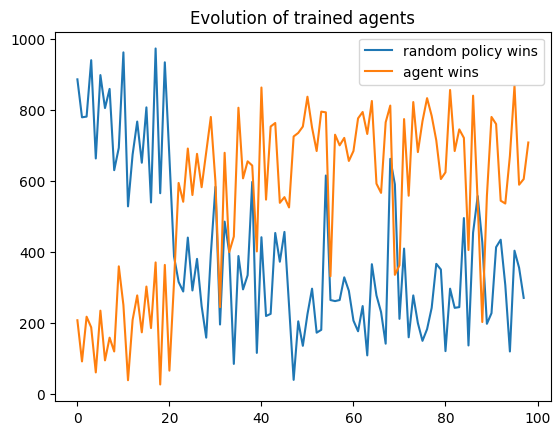

In [10]:
random_policy_wins = [886, 779, 781, 940, 663, 898, 805, 859, 630, 693, 962, 528, 674, 767, 651, 807, 539, 973, 565, 934, 666, 387, 315, 288, 440, 291, 380, 247, 158, 393, 583, 195, 485, 399, 84, 388, 294, 334, 597, 115,
                     441,219,225, 453, 372, 456, 249, 39, 204, 135, 224, 296, 172, 180, 615, 264, 261, 264, 328, 290, 206, 176, 247, 108, 365, 277, 230,
                     141, 662, 590, 211, 409, 159, 277, 199, 149, 182, 242, 366, 350, 120, 296, 242, 244, 495, 136, 454, 557, 427, 197, 227, 413, 434, 306, 119, 403, 355, 270]

agent_wins = [207, 91, 217, 187, 60, 234, 94, 158, 119, 359, 250, 38, 208, 277, 173, 302, 185, 370, 26, 363, 65, 314, 594, 541, 691, 560, 676, 582, 681, 780, 598, 244, 679, 399, 443, 806, 607, 655, 643, 401, 863,
             547,753,763,538,554,525,725,735,753,837,750,684,795,793,331,730,700,721,656,684,776,794,732,825,592,566,765,812,335,362,774,558,822,681,768,833,783,714,605,624,856,684,745,721,405,840,539,202,557,780,760,544,536,670,868,589,605,708]


plt.plot(range(len(random_policy_wins)), random_policy_wins, label='random policy wins')

plt.plot(range(len(agent_wins)), agent_wins, label='agent wins')

plt.legend()
plt.title("Evolution of trained agents")
plt.show()